# Air Quality Index Prediction and EDA

 ## 1. Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### 1.1 Read and investigate data

In [2]:
# read the csv file
data = pd.read_csv('station_hour.csv', low_memory=False).sort_values(by = ['Datetime', 'StationId'])
df = data.copy()


Let's look at the data

In [3]:
df.describe()

PM2.5          PM10            NO           NO2           NOx   
count  1.941394e+06  1.469831e+06  2.035372e+06  2.060110e+06  2.098275e+06  \
mean   8.086481e+01  1.584839e+02  2.278825e+01  3.523689e+01  4.055115e+01   
std    8.947618e+01  1.397883e+02  4.846146e+01  3.497508e+01  5.590894e+01   
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  0.000000e+00   
25%    2.816000e+01  6.400000e+01  3.050000e+00  1.310000e+01  1.135000e+01   
50%    5.259000e+01  1.162500e+02  7.150000e+00  2.479000e+01  2.286000e+01   
75%    9.774000e+01  2.040000e+02  1.858000e+01  4.548000e+01  4.570000e+01   
max    1.000000e+03  1.000000e+03  5.000000e+02  4.999900e+02  5.000000e+02   

                NH3            CO           SO2            O3       Benzene   
count  1.352465e+06  2.089781e+06  1.846346e+06  1.863110e+06  1.727504e+06  \
mean   2.870856e+01  1.502366e+00  1.211602e+01  3.806408e+01  3.305493e+00   
std    2.753244e+01  6.292445e+00  1.467385e+01  4.710653e+01  1.214053e+01   
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00   
25%    1.123000e+01  4.100000e-01  4.250000e+00  1.102000e+01  8.000000e-02   
50%    2.235000e+01  8.000000e-01  8.250000e+00  2.475000e+01  9.600000e-01   
75%    3.778000e+01  1.380000e+00  1.453000e+01  4.953000e+01  3.230000e+00   
max    4.999700e+02  4.985700e+02  1.999600e+02  9.970000e+02  4.980700e+02   

            Toluene         Xylene           AQI  
count  1.546717e+06  513979.000000  2.018893e+06  
mean   1.490266e+01       2.448881  1.801730e+02  
std    3.329729e+01       8.973470  1.404095e+02  
min    0.000000e+00       0.000000  5.000000e+00  
25%    3.400000e-01       0.000000  8.400000e+01  
50%    3.400000e+00       0.200000  1.310000e+02  
75%    1.510000e+01       1.830000  2.590000e+02  
max    4.999900e+02     499.990000  3.133000e+03

From the description of the AQI in kaggle, the maximum value of AQI is 1000. We can see that there are outliers in the data.  

In [4]:
df[df['AQI']> 1000].shape[0]/df.shape[0] * 100

0.1053654904072214

In [5]:
df.drop(df[df.AQI > 1000].index, inplace=True)
df.describe()

PM2.5          PM10            NO           NO2           NOx   
count  1.938719e+06  1.469442e+06  2.032749e+06  2.057479e+06  2.095615e+06  \
mean   8.079691e+01  1.584340e+02  2.269648e+01  3.513759e+01  4.045004e+01   
std    8.947585e+01  1.396873e+02  4.826406e+01  3.478986e+01  5.574789e+01   
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  0.000000e+00   
25%    2.811000e+01  6.398000e+01  3.050000e+00  1.309000e+01  1.134000e+01   
50%    5.250000e+01  1.162500e+02  7.140000e+00  2.475000e+01  2.283000e+01   
75%    9.750000e+01  2.040000e+02  1.853000e+01  4.540000e+01  4.562000e+01   
max    1.000000e+03  1.000000e+03  5.000000e+02  4.999900e+02  5.000000e+02   

                NH3            CO           SO2            O3       Benzene   
count  1.352378e+06  2.087161e+06  1.844117e+06  1.860660e+06  1.724854e+06  \
mean   2.870922e+01  1.386579e+00  1.203381e+01  3.808618e+01  3.288109e+00   
std    2.753246e+01  3.704627e+00  1.438668e+01  4.712477e+01  1.209839e+01   
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00   
25%    1.123000e+01  4.100000e-01  4.250000e+00  1.103000e+01  8.000000e-02   
50%    2.235000e+01  8.000000e-01  8.230000e+00  2.477000e+01  9.500000e-01   
75%    3.778000e+01  1.380000e+00  1.450000e+01  4.957000e+01  3.220000e+00   
max    4.999700e+02  3.880400e+02  1.999600e+02  9.970000e+02  4.980700e+02   

            Toluene         Xylene           AQI  
count  1.544114e+06  511398.000000  2.016165e+06  
mean   1.483126e+01       2.392345  1.781195e+02  
std    3.313170e+01       8.826517  1.271949e+02  
min    0.000000e+00       0.000000  5.000000e+00  
25%    3.300000e-01       0.000000  8.400000e+01  
50%    3.380000e+00       0.200000  1.310000e+02  
75%    1.500000e+01       1.780000  2.580000e+02  
max    4.999900e+02     499.990000  1.000000e+03

Convert Datetime into pandas datetime format. 

In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [7]:
print('Date starts from {}, and ends in {}'.format(df.Datetime.min().strftime('%Y-%m-%d'), df.Datetime.max().strftime('%Y-%m-%d')))

Date starts from 2015-01-01, and ends in 2020-07-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2586355 entries, 285144 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype         
---  ------      -----         
 0   StationId   object        
 1   Datetime    datetime64[ns]
 2   PM2.5       float64       
 3   PM10        float64       
 4   NO          float64       
 5   NO2         float64       
 6   NOx         float64       
 7   NH3         float64       
 8   CO          float64       
 9   SO2         float64       
 10  O3          float64       
 11  Benzene     float64       
 12  Toluene     float64       
 13  Xylene      float64       
 14  AQI         float64       
 15  AQI_Bucket  object        
dtypes: datetime64[ns](1), float64(13), object(2)
memory usage: 335.4+ MB


In [9]:
most_polluted = df[['StationId', 'AQI', 'PM10', 'CO']].groupby(['StationId']).mean().sort_values(by = 'AQI', ascending = False).head(5)
most_polluted

AQI        PM10         CO
StationId                                   
DL002      357.571361  351.845107   2.207099
GJ001      335.419156  108.071053  15.461902
DL028      294.138557  124.616304   1.411248
DL038      272.805198  277.390071   1.521695
DL020      270.627499  268.872021   1.366256

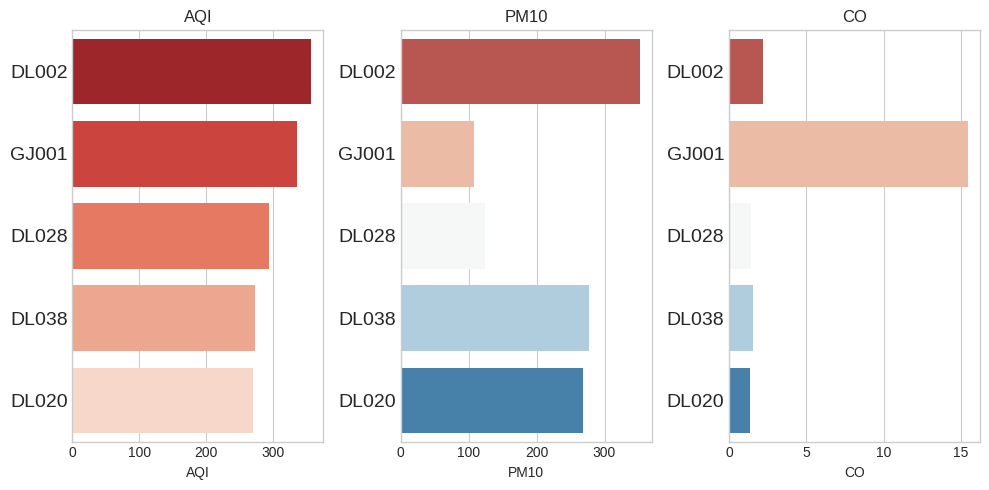

In [10]:
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (10,5))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AQI', 'PM10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

In [11]:
Cor = df.corr(numeric_only = True).AQI.sort_values(ascending = False)
Cor

AQI        1.000000
PM10       0.767608
PM2.5      0.719336
NO2        0.408338
NH3        0.390222
NOx        0.379202
NO         0.326048
CO         0.325609
SO2        0.273505
Toluene    0.262648
O3         0.152683
Benzene    0.102557
Xylene     0.065374
Name: AQI, dtype: float64

## 2. Handing missing Values

We can see there are missig (NaN) values from the above table. To see the percentage of missing values for each column, we use the following function.

In [12]:
print(df.isnull().sum())

StationId           0
Datetime            0
PM2.5          647636
PM10          1116913
NO             553606
NO2            528876
NOx            490740
NH3           1233977
CO             499194
SO2            742238
O3             725695
Benzene        861501
Toluene       1042241
Xylene        2074957
AQI            570190
AQI_Bucket     570190
dtype: int64


In [13]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
missing_values= missing_values_table(df)
missing_values

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


Missing Values  % of Total Values
Xylene             2074957               80.2
NH3                1233977               47.7
PM10               1116913               43.2
Toluene            1042241               40.3
Benzene             861501               33.3
SO2                 742238               28.7
O3                  725695               28.1
PM2.5               647636               25.0
AQI                 570190               22.0
AQI_Bucket          570190               22.0
NO                  553606               21.4
NO2                 528876               20.4
CO                  499194               19.3
NOx                 490740               19.0

We can see that 80% and close to 50% of data is missing for Xylene and NH3 respectively. If the majority of data is missing, usually it is safe to drop the column all together.

To hanlde missing values for the other columns, we can use:
 - with mean, median and mode imputation
 - with forward and backward filling
 - linear interpolation

### 2.1. Mean, median and mode imputation

Let's use SimpleImputer from sklearn:

In [15]:
df3 = df.copy()

In [16]:
df3.drop(['AQI_Bucket'], axis=1)

StationId            Datetime   PM2.5    PM10      NO    NO2     NOx   
285144      DL007 2015-01-01 01:00:00  598.51  935.18   69.03  35.69  104.72  \
333336      DL008 2015-01-01 01:00:00     NaN     NaN   78.25  51.50   91.00   
485877      DL013 2015-01-01 01:00:00  310.65     NaN   30.37  17.73   35.31   
733579      DL021 2015-01-01 01:00:00     NaN     NaN     NaN  65.00  488.03   
1067398     DL033 2015-01-01 01:00:00     NaN     NaN  148.44  39.00  219.25   
...           ...                 ...     ...     ...     ...    ...     ...   
2537760     WB009 2020-07-01 00:00:00   10.52   34.55    1.75  11.02   12.78   
2547206     WB010 2020-07-01 00:00:00   14.70   29.00    3.10   6.78    9.88   
2561669     WB011 2020-07-01 00:00:00   12.57   41.40   18.00  13.70   31.70   
2569579     WB012 2020-07-01 00:00:00    8.38   36.18    4.53   6.85   11.38   
2589082     WB013 2020-07-01 00:00:00   10.50   36.50    7.78  22.50   30.25   

           NH3     CO   SO2      O3  Benzene  Toluene  Xylene   AQI  
285144     NaN   0.58   NaN  108.02    12.89    19.85   13.80   NaN  
333336    5.75    NaN   NaN  105.25      NaN      NaN     NaN   NaN  
485877   49.32    NaN  8.23     NaN      NaN      NaN     NaN   NaN  
733579     NaN  18.00  1.50    3.50    34.65    63.44     NaN   NaN  
1067398    NaN    NaN  0.50    3.00    28.17    92.41     NaN   NaN  
...        ...    ...   ...     ...      ...      ...     ...   ...  
2537760   3.07   0.23  3.12   12.48     1.35     5.99    0.33  38.0  
2547206   6.78   0.33  3.23   10.97      NaN      NaN     NaN  35.0  
2561669  28.73   0.21  8.36   48.19     3.88    34.21     NaN  62.0  
2569579   7.95   0.16  5.50    6.13     1.60     2.69     NaN  39.0  
2589082  27.23   0.58  2.80   13.10     1.31     7.39     NaN  59.0  

[2586355 rows x 15 columns]

In [17]:
from sklearn.impute import SimpleImputer

for method in ["mean", "median", "most_frequent"]:
    df3[method] = SimpleImputer(strategy=method).fit_transform(
        df3["NH3"].values.reshape(-1, 1)
    )

This will calculate mean, median and mode for column NH3 to fill the missing values.

### 2.2. Forward and Backward filling

Still for the same NH3 column, we can fill nan values:

In [18]:
# fill NaN of NH3 column with forward and backward fill
df3["ffill"] = df3["NH3"].ffill()
df3["bfill"] = df3["NH3"].bfill()

### 2.3. Linear interpolation

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [19]:
# interpolate for NH3 column
df3["interpolated"] = df3["NH3"].interpolate(limit_direction="both")

We will use the following function to plot the original distribution before and after an imputation(s) is performed:

In [20]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=3, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=1, label=key, ax=ax)

    plt.legend()
    plt.show();

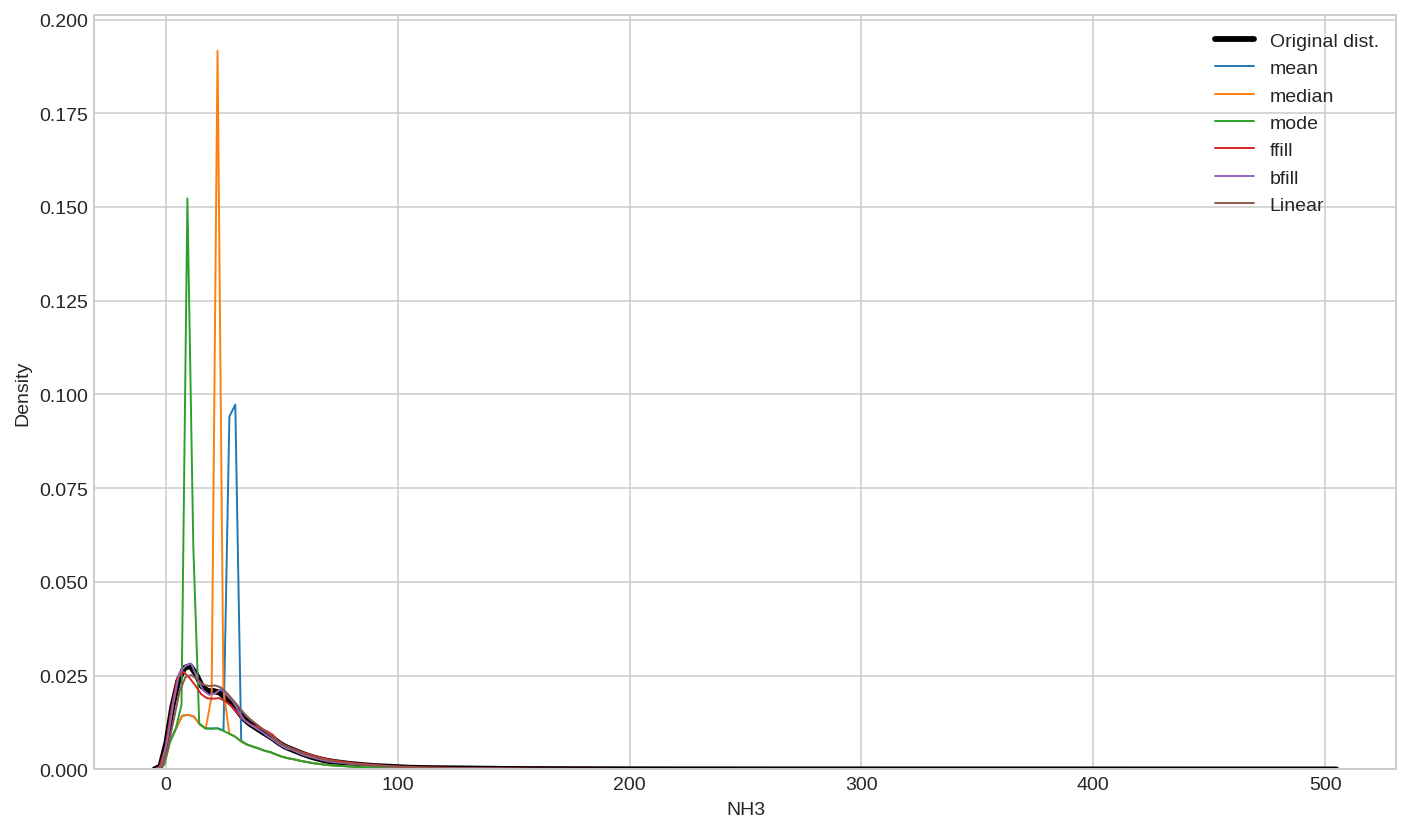

In [21]:
compare_dists(
    df3["NH3"],
    {"mean": df3["mean"], "median": df3["median"], "mode": df3["most_frequent"], "ffill":df3["ffill"], 
     "bfill":df3["bfill"], "Linear":df3["interpolated"]},)

We can see that forward filling, backward filling and Linear interpolation provide a plot close to the original distribution, as is the case for time series data. We can repeat the same for the other colums to decide which method to use. 

Let's drop mean, median and mode and repeat the plot for visiblity.

In [22]:
df3.drop(["mean", "median", "most_frequent"], axis=1, inplace=True)

In [23]:
compare_dists(
    df3["NH3"],
    {"ffill":df3["ffill"], "bfill":df3["bfill"], "Linear":df3["interpolated"]},)

For NH3 all appear closer to the original disttribution. 

#### Repeat for PM10

In [24]:
# fill NaN of PM10 column with forward and backward fill
df3["PM10_ffill"] = df3["PM10"].ffill()
df3["PM10_bfill"] = df3["PM10"].bfill()

In [25]:
# interpolate for PM10 column
df3["PM10_interpolated"] = df3["PM10"].interpolate(limit_direction="both")

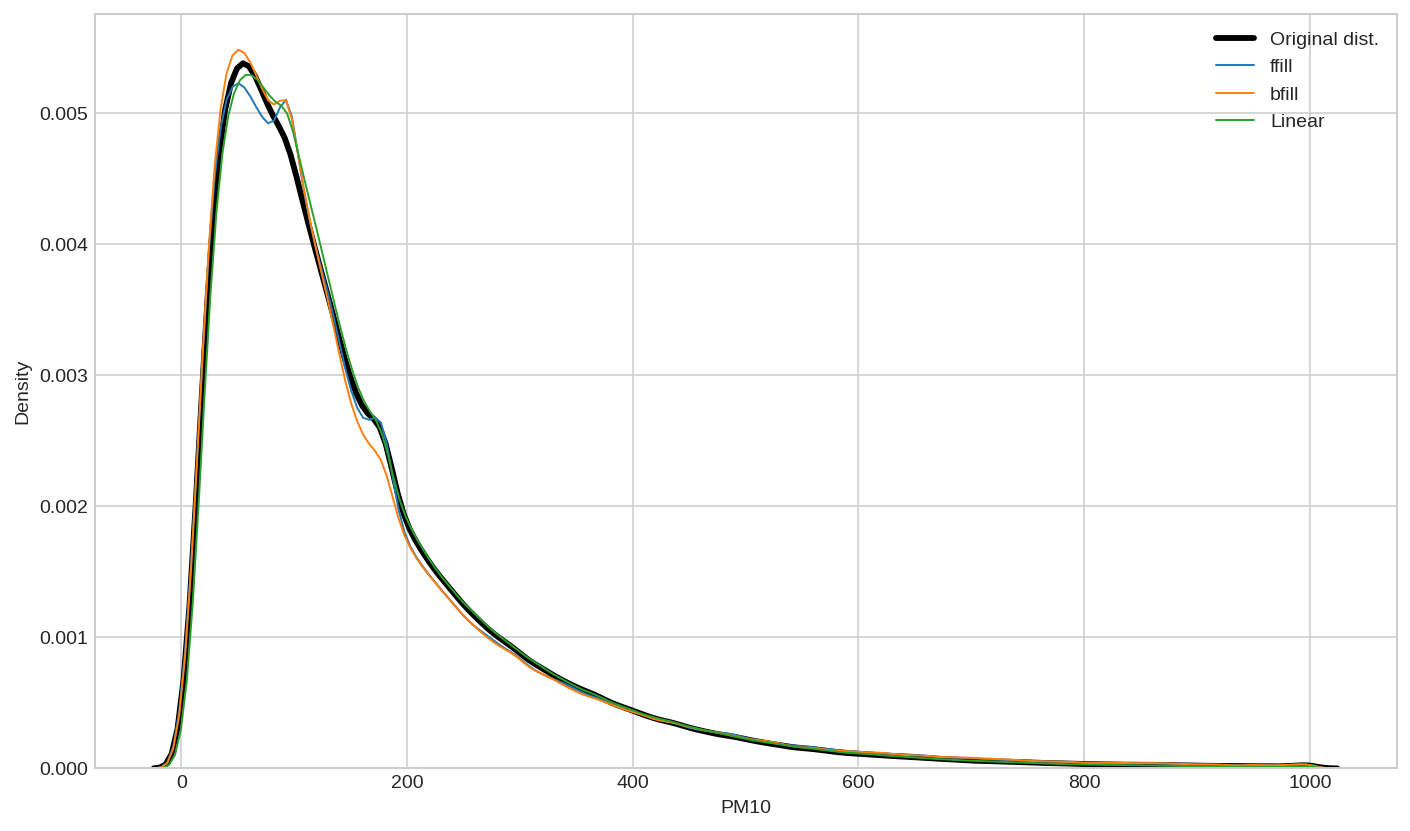

In [26]:
compare_dists(
    df3["PM10"],
    {"ffill":df3["PM10_ffill"], "bfill":df3["PM10_bfill"], "Linear":df3["PM10_interpolated"]},)

In [27]:
#This is not working; I'll come back if I got time
#cols = ['AQI', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene']
#inter = df.loc[:, cols].interpolate(limit_direction="both"); 
#df.loc[:, cols] = inter

# Fill the mssing value wiht Mean value of numeric data.
df3['PM2.5'].fillna(df3['PM2.5'].mean().round(2),inplace = True )
df3['PM10'].fillna(df3['PM10'].mean().round(2),inplace = True )
df3['NO'].fillna(df3['NO'].mean().round(2),inplace = True )
df3['NO2'].fillna(df3['NO2'].mean().round(2),inplace = True )
df3['NOx'].fillna(df3['NOx'].mean().round(2),inplace = True )
df3['NH3'].fillna(df3['NH3'].mean().round(2),inplace = True )
df3['CO'].fillna(df3['CO'].mean().round(2),inplace = True )
df3['SO2'].fillna(df3['SO2'].mean().round(2),inplace = True )
df3['O3'].fillna(df3['O3'].mean().round(2),inplace = True )
df3['Benzene'].fillna(df3['Benzene'].mean().round(2),inplace = True )
df3['Toluene'].fillna(df3['Toluene'].mean().round(2),inplace = True )
df3['Xylene'].fillna(df3['Xylene'].mean().round(2),inplace = True )
df3['AQI'].fillna(df3['AQI'].mean().round(2),inplace = True )

In [28]:

# Group the data by 'StationId'
grouped_data = df3.groupby('StationId')

# Create an empty DataFrame to store the imputed data
imputed_data = pd.DataFrame()

# Iterate over each group (station)
for group_name, group_df in grouped_data:
    # Apply linear interpolation to fill missing values
    filled_df = group_df.interpolate(method='linear', limit_direction='both')
    
    # Concatenate the filled data to the imputed_data DataFrame
    imputed_data = pd.concat([imputed_data, filled_df])

# Sort the imputed data by 'StationId' and 'Datetime'
imputed_data.sort_values(['StationId', 'Datetime'], inplace=True)

# Reset the index of the imputed data
imputed_data.reset_index(drop=True, inplace=True)

In [29]:
df3 = imputed_data.copy()
df3

StationId            Datetime  PM2.5    PM10    NO    NO2    NOx   
0           AP001 2017-11-24 17:00:00  60.50   98.00  2.35  30.80  18.25  \
1           AP001 2017-11-24 18:00:00  65.50  111.25  2.70  24.20  15.07   
2           AP001 2017-11-24 19:00:00  80.00  132.00  2.10  25.18  15.15   
3           AP001 2017-11-24 20:00:00  81.50  133.25  1.95  16.25  10.23   
4           AP001 2017-11-24 21:00:00  75.25  116.00  1.43  17.48  10.43   
...           ...                 ...    ...     ...   ...    ...    ...   
2586350     WB013 2020-06-30 20:00:00  15.55   47.80  7.27  35.08  42.38   
2586351     WB013 2020-06-30 21:00:00  15.23   42.30  6.10  26.78  32.85   
2586352     WB013 2020-06-30 22:00:00  11.40   40.95  6.58  19.53  26.12   
2586353     WB013 2020-06-30 23:00:00   9.25   34.33  9.17  21.85  31.00   
2586354     WB013 2020-07-01 00:00:00  10.50   36.50  7.78  22.50  30.25   

           NH3    CO    SO2  ...  Toluene  Xylene     AQI    AQI_Bucket   
0         8.50  0.10  11.85  ...     6.10    0.10  178.12           NaN  \
1         9.77  0.10  13.17  ...     6.25    0.15  178.12           NaN   
2        12.02  0.10  12.08  ...     5.98    0.18  178.12           NaN   
3        11.58  0.10  10.47  ...     6.72    0.10  178.12           NaN   
4        12.03  0.10   9.12  ...     5.75    0.08  178.12           NaN   
...        ...   ...    ...  ...      ...     ...     ...           ...   
2586350  31.25  0.80   9.40  ...    11.57    2.39   59.00  Satisfactory   
2586351  30.66  0.56   4.91  ...    12.29    2.39   59.00  Satisfactory   
2586352  30.73  0.61   3.81  ...     8.88    2.39   59.00  Satisfactory   
2586353  29.61  0.65   3.44  ...     8.43    2.39   59.00  Satisfactory   
2586354  27.23  0.58   2.80  ...     7.39    2.39   59.00  Satisfactory   

         ffill  bfill  interpolated  PM10_ffill  PM10_bfill  PM10_interpolated  
0         8.50   8.50          8.50       98.00       98.00              98.00  
1         9.77   9.77          9.77      111.25      111.25             111.25  
2        12.02  12.02         12.02      132.00      132.00             132.00  
3        11.58  11.58         11.58      133.25      133.25             133.25  
4        12.03  12.03         12.03      116.00      116.00             116.00  
...        ...    ...           ...         ...         ...                ...  
2586350  31.25  31.25         31.25       47.80       47.80              47.80  
2586351  30.66  30.66         30.66       42.30       42.30              42.30  
2586352  30.73  30.73         30.73       40.95       40.95              40.95  
2586353  29.61  29.61         29.61       34.33       34.33              34.33  
2586354  27.23  27.23         27.23       36.50       36.50              36.50  

[2586355 rows x 22 columns]

From the explanation for AQI index calculation, we can use the following function to fill the missing values of AQI_Bucket.

In [30]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [31]:
df3['AQI_Bucket'] = df3['AQI'].apply(lambda x: get_AQI_bucket(x))

In [32]:
print(df3.isnull().sum())

StationId            0
Datetime             0
PM2.5                0
PM10                 0
NO                   0
NO2                  0
NOx                  0
NH3                  0
CO                   0
SO2                  0
O3                   0
Benzene              0
Toluene              0
Xylene               0
AQI                  0
AQI_Bucket           0
ffill                0
bfill                0
interpolated         0
PM10_ffill           0
PM10_bfill           0
PM10_interpolated    0
dtype: int64


In [33]:
df3=df3.drop(['ffill', 'bfill', 'interpolated', 'PM10_ffill','PM10_bfill','PM10_interpolated'], axis=1)

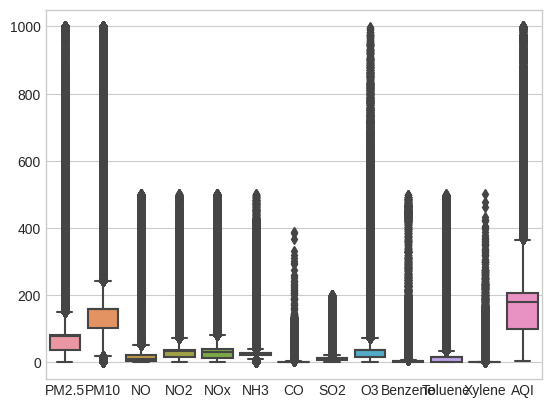

In [34]:
ax = sns.boxplot(data=df3)

#### Looking at the pollutants and their distribution
From the plots, we can make the following observations:
 - PM2.5 and PM10 are major pollutants
 - CO is relatively low
 - most exhibited seasonality though further observations are required

In [35]:
df3 = df3.set_index('Datetime').sort_values(by = 'Datetime')

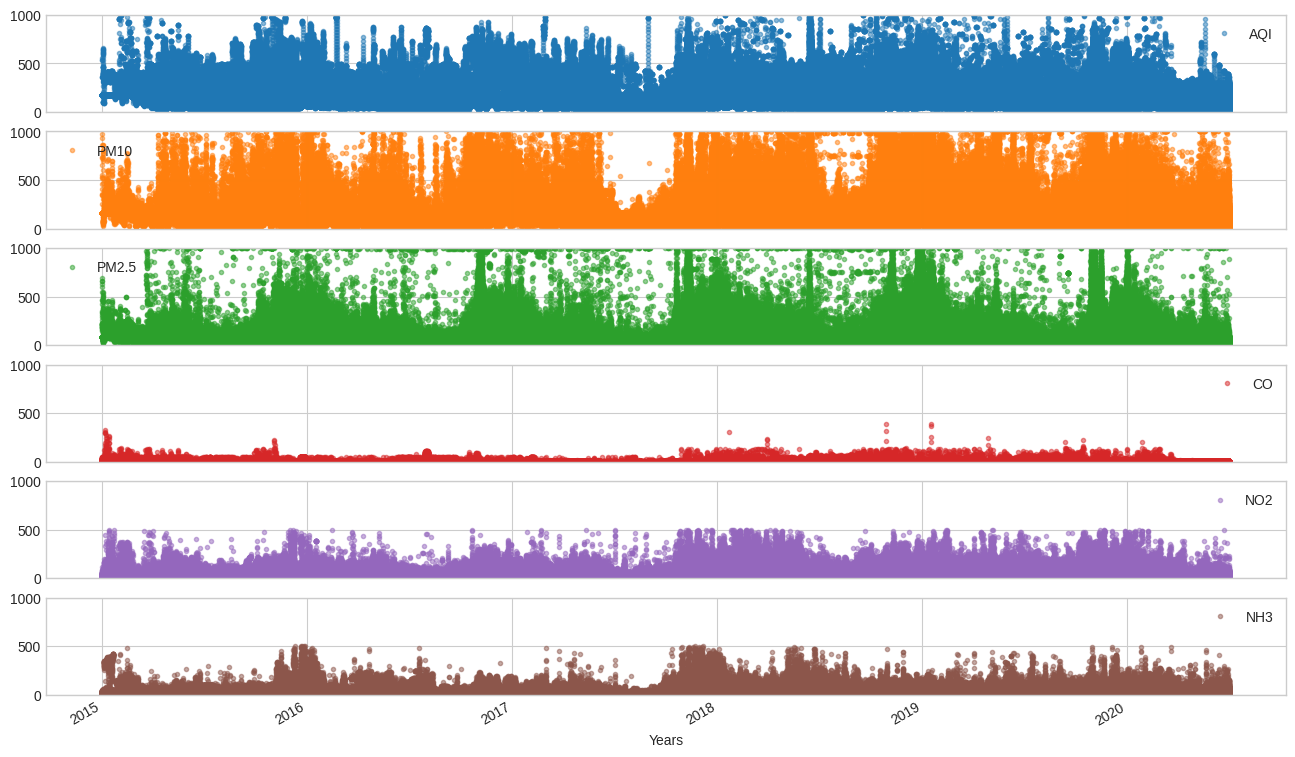

In [36]:
pollutants = ['AQI','PM10', 'PM2.5', 'CO', 'NO2','NH3']
axes = df3[pollutants].plot(marker='.',alpha = 0.5, linestyle = 'None', figsize = (16,10), subplots = True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylim(0,1000)

Let's see the correllation of major pollutants.

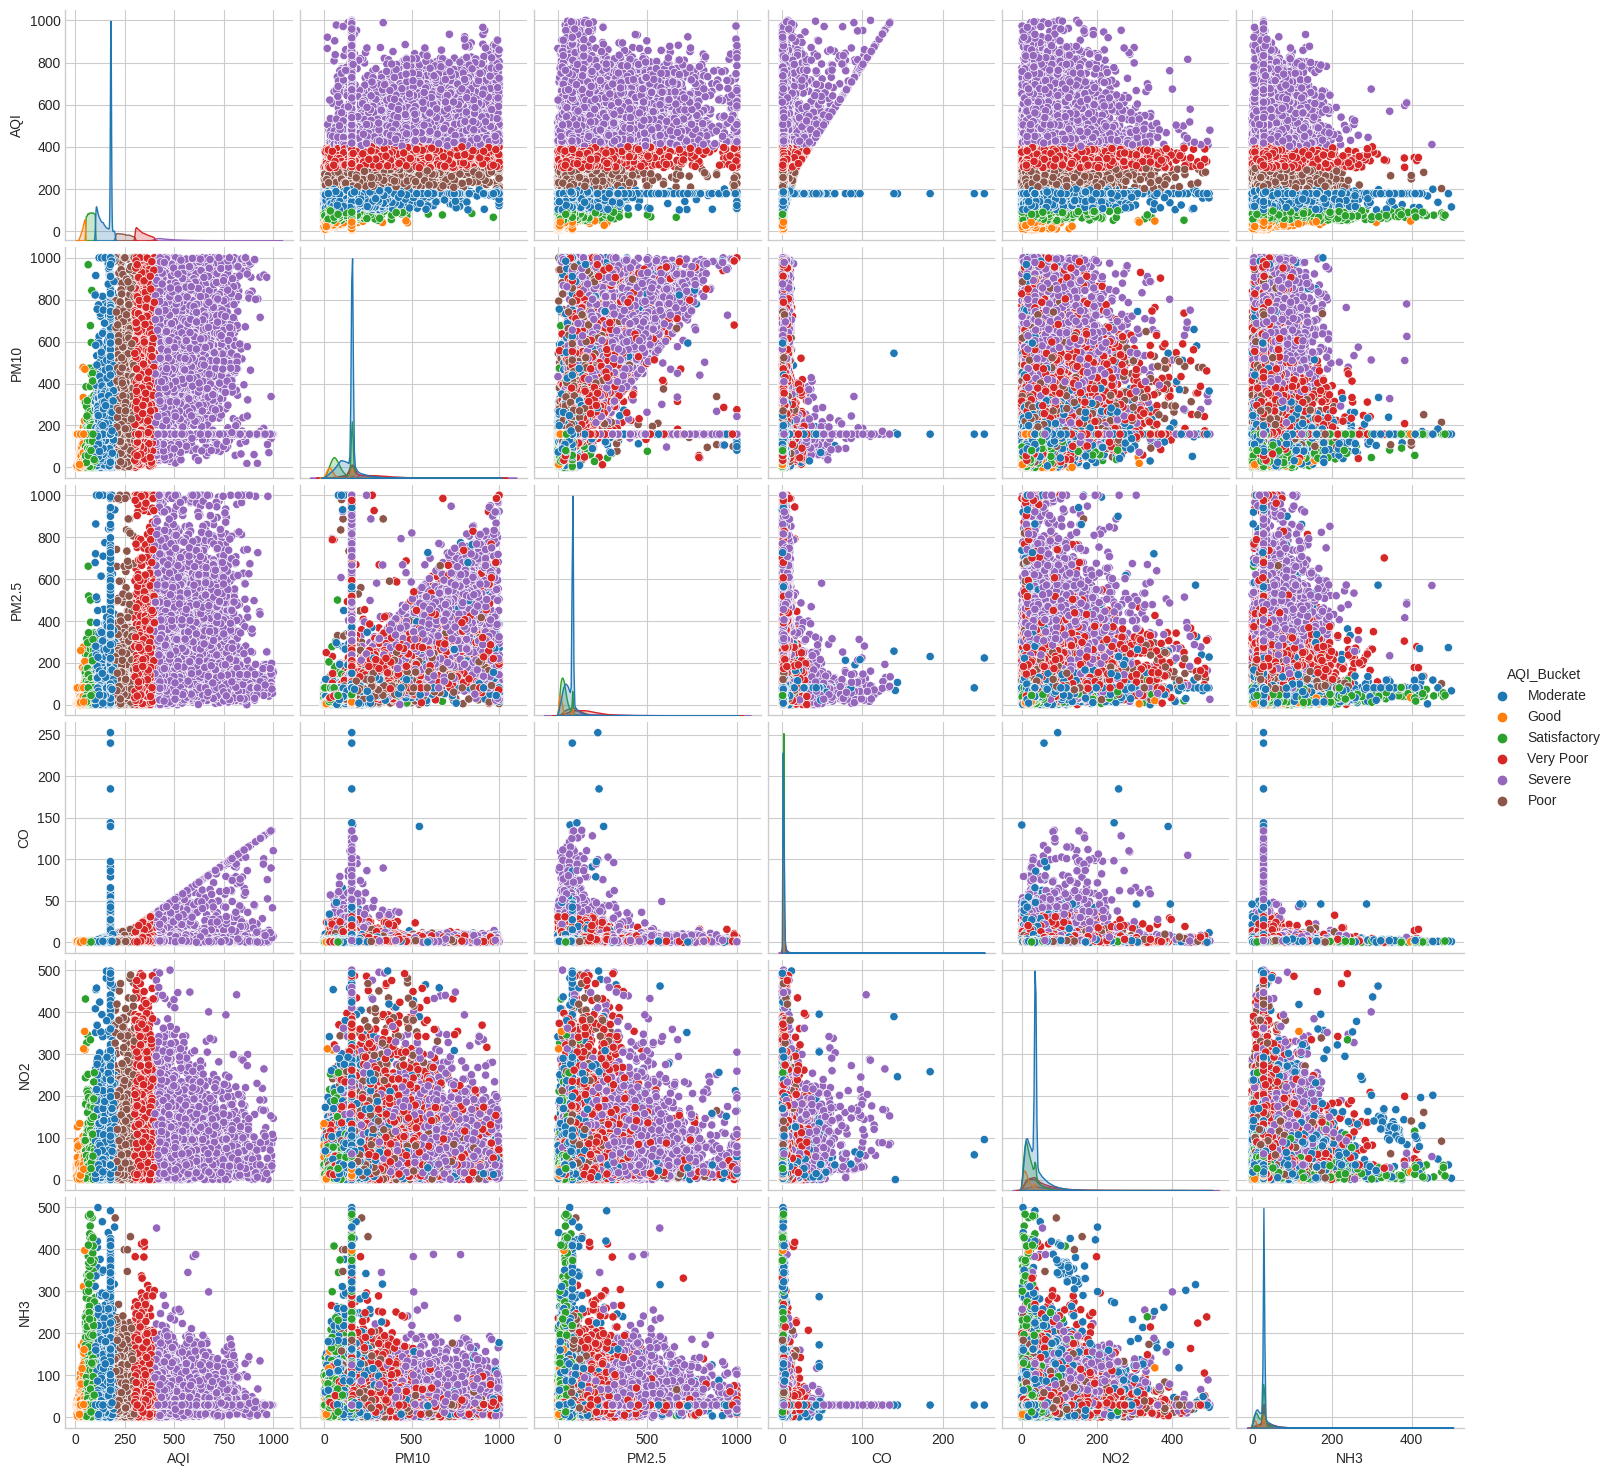

In [37]:
sns.pairplot(df3.sample(frac=0.1).reset_index(), vars=pollutants, hue ='AQI_Bucket')

Overall: Most variables show normal distribution
 - CO: skewed to the left and seems to have a linear correlations with AQI
 - AQI: There appears to be more data points for satisfactory and moderate AQI
 

#### Now let's see the seasonality in the data
Let's convert the data into daily, weekly, and monthly versions.

In [38]:
def plot_(df3, pollutants, stations):
    fig, ax = plt.subplots(3, 2, figsize=(16, 12), dpi=140)
    for ax1, pol in zip(ax.flat, pollutants):
        df3[pol][stations].plot(title= pol, ax = ax1)
        ax1.legend();

#### Now let's see the seasonality in the data¶
Let's convert the data into daily, weekly, and monthly versions.

In [39]:
df1 = df3.copy()

In [40]:
def plot_(df, pollutants, stations):
    fig, ax = plt.subplots(3, 2, figsize=(16, 12), dpi=140)
    for ax1, pol in zip(ax.flat, pollutants):
        df[pol][stations].plot(title= pol, ax = ax1)
        ax1.legend();

In [41]:
df1 = df1.drop(['AQI_Bucket'], axis=1)

In [42]:
df1

StationId  PM2.5    PM10     NO    NO2     NOx     NH3   
Datetime                                                                     
2015-01-01 01:00:00     DL021  80.80  158.43  22.70  65.00  488.03   28.71  \
2015-01-01 01:00:00     DL008  80.80  158.43  78.25  51.50   91.00    5.75   
2015-01-01 01:00:00     UP012  80.80  158.43   1.66  19.77    6.24   28.71   
2015-01-01 01:00:00     GJ001  80.80  158.43   1.00  40.01   36.37   28.71   
2015-01-01 01:00:00     TN001  80.80  158.43   8.85  12.91   20.85   28.71   
...                       ...    ...     ...    ...    ...     ...     ...   
2020-07-01 00:00:00     DL032  80.80  143.00   1.42  35.14    1.20  100.53   
2020-07-01 00:00:00     DL033  48.21  158.43   9.53  17.99   17.20   28.71   
2020-07-01 00:00:00     DL034  50.00  128.00   4.61  16.51   12.93   23.77   
2020-07-01 00:00:00     DL028  46.25  111.50   2.02  33.38   19.42   21.02   
2020-07-01 00:00:00     WB013  10.50   36.50   7.78  22.50   30.25   27.23   

                        CO     SO2      O3  Benzene  Toluene  Xylene     AQI  
Datetime                                                                      
2015-01-01 01:00:00  18.00    1.50    3.50    34.65    63.44    2.39  178.12  
2015-01-01 01:00:00   1.39   12.03  105.25     3.29    14.83    2.39  178.12  
2015-01-01 01:00:00   1.05   12.03   35.00     0.02     0.02    2.39  178.12  
2015-01-01 01:00:00   1.00  122.07   38.09     0.00     0.00    0.00  178.12  
2015-01-01 01:00:00   1.25    7.65    3.88     3.29    14.83    2.39  178.12  
...                    ...     ...     ...      ...      ...     ...     ...  
2020-07-01 00:00:00   1.39    7.38   12.80     1.48     5.85    2.39  108.00  
2020-07-01 00:00:00   0.53    9.20   27.79     0.00     0.99    2.39   84.00  
2020-07-01 00:00:00   0.65   10.50   48.95     3.65    30.39    2.39  111.00  
2020-07-01 00:00:00   0.67   12.03   21.93     1.25    10.30    2.39   94.00  
2020-07-01 00:00:00   0.58    2.80   13.10     1.31     7.39    2.39   59.00  

[2586355 rows x 14 columns]

In [43]:
#df3 = df3.set_index('Datetime').sort_values(by = 'Datetime')

In [44]:
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Week']=df1.index.dayofweek
df1['Day'] = df1.index.day
df1['Hour'] = df1.index.hour

In [45]:
hour_day = df1.groupby(['Hour']).mean().ffill()

TypeError: Could not convert DL021GJ001UP014KA003DL013DL007TN001TN004KA009DL008TN003DL033MH005UP012TN004MH005KA003DL021DL008TN001KA009DL033UP014GJ001TN003DL007DL013UP012TN001MH005DL014DL013DL021TN004UP014TN003KA009DL007KA003DL033UP012DL008GJ001GJ001DL007DL021DL008TN003UP014DL033MH005DL014TG005KA003TN004UP012KA009TN001DL013TN003UP014DL007TN004TG005DL008DL033KA009UP012KA003DL021GJ001TN001DL014MH005DL013UP014DL014KA009DL013UP012DL008TN001DL007DL033TN004MH005DL021KA003TG005GJ001TN003DL014TN001KA003MH005DL021UP014GJ001DL008DL013DL033TN003KA009DL007TG005TN004UP012UP014DL013KA009DL021DL033TN001TN003GJ001KA003MH005DL008UP012DL007TN004DL014TG005TN003GJ001DL007DL013TN004UP014DL033UP012DL014TN001TG005DL008KA009DL021KA003MH005DL014TN001DL033KA003TG005DL008KA009MH005DL013DL007DL021TN003UP012UP014TN004GJ001DL014TG005KA009MH005TN003DL007TN004UP012DL033UP014DL008DL021TN001KA003GJ001DL013TN004DL021KA009UP014UP012TN003MH005GJ001TG005DL013DL033KA003TN001DL008DL007DL014TN001DL021TN003TN004GJ001KA009DL033DL008DL007MH005UP012KA003TG005DL013DL014UP014DL033TN003TN004DL008TG005MH005DL014DL013TN001GJ001UP014KA009DL021KA003UP012DL007KA003DL008MH005TN001GJ001UP012TN003DL033TG005KA009DL013TN004DL021UP014DL014DL007DL014UP014TN001DL008UP012KA003TG005GJ001MH005TN004KA009DL007TN003DL013DL021DL033KA009DL033DL013MH005TG005UP012DL014TN004KA003TN003TN001DL007DL008DL021UP014GJ001DL008TN003KA009TN001GJ001UP012UP014DL013DL033DL014MH005DL007DL021KA003TG005TN004DL033TG005DL021DL014UP014GJ001MH005TN001TN004KA009KA003DL008TN003DL013DL007UP012DL014TG005KA009TN001UP014KA003UP012TN003MH005DL007DL013GJ001TN004DL008DL021DL033TN004MH005DL021KA009UP014DL033DL014DL007UP012KA003TN003DL013GJ001DL008TN001TG005TG005TN001DL007DL014DL021DL008TN003DL013UP012DL033TN004KA009GJ001UP014MH005KA003DL033DL007TG005KA003TN003DL014TN001UP014DL013TN004KA009MH005DL021DL008UP012GJ001TN001DL008TN003MH005DL033UP014TG005DL021DL007DL014KA009DL013KA003UP012GJ001TN004DL021UP012KA003KA009DL007DL013TG005DL014TN003UP014MH005DL033GJ001TN004DL008TN001DL007TG005DL033DL014DL008DL021GJ001KA009UP012DL013KA003TN003MH005TN001UP014TN004DL013MH005KA003DL033TN004DL014UP012DL008TN003GJ001DL021KA009TG005DL007TN001UP014DL008KA003TN001DL013UP014KA009DL021TG005TN003TN004DL033GJ001DL007DL014UP012MH005DL008TN004KA003DL033TN003GJ001DL007UP012TG005MH005DL013TN001DL014DL021UP014KA009TN003KA003GJ001UP014UP012DL007DL021KA009DL008DL033TN001MH005DL014TN004TG005DL013TN004DL021KA003DL014TN001DL013UP014UP012MH005DL007DL008KA009TG005TN003DL033TG005DL013TN004DL033MH005KA009DL008DL021TN003DL007KA003UP012UP014TN001DL014TG005GJ001UP012DL013DL033DL008UP014DL014DL021MH005TN001TN003TN004KA009KA003DL007TN003GJ001MH005DL033DL008DL013TN001UP014DL014DL021KA003UP012DL007TN004KA009TG005DL008MH005DL021DL033KA003DL007KA009TN004UP012DL014TN003DL013GJ001UP014TG005TN001UP014DL021DL007KA009KA003UP012GJ001DL008TN004MH005DL014TN003DL033TG005DL013TN001UP014TG005KA009UP012MH005DL013DL033DL014KA003GJ001DL021TN004DL008TN003DL007TN001DL008KA003UP014MH005DL014TN004TN003TN001KA009DL021GJ001UP012DL013DL033TG005DL007DL013DL008DL021KA009DL014TN003KA003TG005MH005GJ001DL007DL033UP014UP012TN004TN001TN003KA009TN004UP012DL013GJ001DL008UP014DL014DL007TN001DL033TG005MH005KA003DL021TN001TN004GJ001DL033DL007TG005KA003DL021DL014DL013TN003DL008MH005KA009UP012UP014DL007KA009DL013UP012TG005DL008TN001DL021MH005UP014KA003DL014TN004GJ001DL033TN003DL033UP012DL008TN001UP014DL021DL014GJ001DL007TG005MH005DL013TN004KA009KA003TN003UP012TN004KA003DL014DL008DL007DL021TN001DL013KA009UP014TN003TG005MH005DL033KA003KA009DL021MH005GJ001DL014DL008TN004TN001TN003TG005DL013UP012UP014DL033DL007DL014DL021MH005UP012UP014DL008KA003DL033TN004DL013TG005GJ001KA009DL007TN003TN001UP012DL013GJ001DL033KA003TN004TN001DL021KA009DL007TN003DL014TG005UP014DL008MH005UP014TN004UP012DL014KA009DL013DL007DL033MH005DL021TN001KA003DL008TN003TG005TN004DL008KA009TN003UP014KA003GJ001DL021DL033MH005DL013DL007TG005UP012DL014TN001DL013GJ001KA009DL021TN004DL007TN001DL014MH005DL008TG005KA003DL033UP014TN003UP012KA003UP012DL008DL007TN003TN004DL013MH005DL033DL014TG005TN001DL021UP014KA009DL021TN004UP012GJ001DL014DL013UP014KA009DL033DL007TN003DL008KA003MH005TG005TN001DL007UP012DL008DL033DL021TN003KA003UP014DL013DL014KA009TN001TG005TN004MH005MH005TN001UP014DL014KA003DL033GJ001TN003DL007KA009DL013DL008TN004UP012DL021TG005DL008GJ001TN003DL021DL007UP014MH005TN001DL013TG005KA003DL014DL033TN004UP012KA009DL033MH005UP012TN004DL013TG005TN003DL014KA003GJ001DL007DL021TN001UP014KA009DL008MH005UP012DL021TN004TN001GJ001KA009DL014TG005KA003TN003DL033UP014DL007DL013DL008UP014UP012MH005KA003DL014TN001TN003GJ001TG005DL007DL013TN004DL008DL021KA009DL033UP012KA003DL007TN003KA009UP014DL021GJ001DL033TN004DL014DL008TN001TG005MH005DL013MH005TG005DL013GJ001KA003DL033UP012DL008TN004TN003DL014DL007UP014TN001KA009DL021TN004UP012DL013DL007DL021DL014KA003TN001DL008UP014DL033TG005KA009TN003MH005GJ001DL008DL021DL033TN004GJ001DL014TN003DL007MH005UP014TG005UP012TN001KA003DL013KA009DL021TN001TN004DL013MH005UP012DL014DL033KA009KA003DL008DL007TN003UP014TG005TN001GJ001UP014MH005TN003DL021KA003DL014DL013DL033UP012DL007KA009DL008TG005TN004TG005TN001DL007GJ001KA003TN003UP014TN004MH005DL014DL008KA009DL013DL033UP012DL021DL033DL008UP012TN004MH005KA009TN001DL014DL007TG005DL021DL013TN003UP014GJ001KA003DL033DL007TN004MH005DL014DL021DL008UP014DL013TN003GJ001TG005KA009TN001UP012KA003MH005TG005DL007DL014DL013KA003DL033DL021DL008UP012GJ001TN001UP014TN003TN004KA009MH005KA009TN001TN004DL021KA003UP014GJ001DL014DL007UP012DL033DL013TG005TN003DL008MH005UP014KA003TN001DL007TN004DL033DL013DL014UP012DL008GJ001TG005TN003KA009DL021DL033MH005TG005TN003DL007GJ001KA003TN001KA009DL013TN004UP014UP012DL008DL014DL021DL014DL013TG005DL008UP014GJ001DL033KA003KA009DL007TN004MH005TN001DL021TN003UP012DL021DL008KA003DL013UP014TN003TG005DL033UP012TN004GJ001DL007MH005TN001DL014KA009DL014DL033TG005GJ001DL008DL013UP012TN003KA003MH005UP014TN001DL007TN004DL021KA009MH005TG005UP014UP012DL033KA003DL007GJ001DL008DL021TN004DL014TN003TN001KA009DL013DL007KA009DL021MH005GJ001TG005TN001KA003UP014DL033DL014DL008TN003UP012TN004DL013DL033DL014TG005UP014TN003MH005DL021KA003UP012DL007DL013KA009TN001DL008TN004DL014KA009DL008UP012DL013MH005TG005DL007TN004TN001UP014TN003KA003DL033DL021TN001DL021DL014TN004UP012GJ001DL007KA003MH005DL008UP014TN003DL013TG005DL033KA009DL008DL014DL013MH005GJ001TN003TG005TN004UP012DL021TN001KA009DL007UP014DL033KA003DL014DL013UP012TN004TN001TN003DL008KA009KA003DL007DL033MH005UP014DL021TG005DL008UP012UP014DL013DL033KA003KA009DL021TG005MH005TN003TN004DL007TN001DL014DL033TN003UP012DL007TG005GJ001TN001DL008DL014TN004UP014KA009KA003DL013MH005DL021DL033DL007DL014DL008DL021KA009UP014TN001TN003MH005DL013TN004TG005KA003UP012UP012TN003TG005TN001TN004MH005DL007DL033GJ001DL014KA003DL021KA009DL008UP014DL013TN001DL013MH005DL008KA009DL021TN003UP014GJ001DL014DL007KA003DL033TG005UP012TN004DL021DL013DL014MH005TN001UP012DL008GJ001KA009DL033TN004KA003TN003DL007UP014TG005DL033DL013KA009TG005DL021KA003MH005DL007DL014UP014TN001DL008UP012GJ001TN004TN003TN004UP014TN001DL013TG005KA009GJ001KA003MH005DL008UP012DL021TN003DL007DL014DL033TN003UP014KA009DL013TN001TN004MH005UP012DL033DL014DL008DL007KA003GJ001TG005DL021UP012DL007TN003TN004GJ001DL014TN001DL033TG005DL008DL013KA009MH005DL021KA003UP014TN001DL013TN003DL033DL007UP012TG005KA003KA009DL014DL008TN004UP014GJ001MH005DL021KA003DL007DL013DL014TN004UP014TN003DL021TN001MH005TG005GJ001UP012DL033KA009DL008TG005DL013UP012KA009DL002DL008TN001TN004UP014DL014GJ001DL021MH005DL033TN003KA003DL031DL007TG005DL033MH005DL013DL014DL021DL007GJ001KA003TN001UP012DL008UP014TN003DL031DL002KA009TN004DL008TN004TG005DL021MH005KA003GJ001DL031DL013TN001DL014DL002KA009DL033DL007UP014UP012TN003UP014TN001KA003TN004KA009DL021UP012TG005MH005DL013DL002TN003GJ001DL008DL033DL007DL028DL014DL031TN004TN001KA009TN003TG005DL028UP012UP014DL007GJ001DL031DL014DL033DL021DL008MH005DL013DL002KA003TN004KA009DL013DL008DL007DL002KA003TG005DL028DL021DL014GJ001TN001DL033UP014DL031MH005UP012DL019TN003DL021UP014DL028TN003DL013GJ001DL019KA003DL007UP012MH005DL014TN004DL002TN001DL033KA009TG005DL008DL031DL019DL031KA009DL007TG005DL013TN004DL021UP014DL028GJ001TN001UP012DL033DL002DL014MH005TN003DL008KA003UP014TN004DL008TN001DL033MH005DL007GJ001DL014DL019KA009DL031DL002KA003TG005DL021UP012TN003DL013DL028TN003TN001DL019DL028DL007TN004UP012DL002GJ001UP014DL033MH005KA003KA009DL008DL014DL031DL013DL021TG005KA009KA003TN004DL033DL014TN001UP012DL031DL028TN003TG005DL002DL013DL021MH005DL007DL019DL008GJ001UP014UP012DL021TN003MH005DL028DL013DL008TG005UP014TN004DL019DL031DL002DL033DL014DL007KA009TN001KA003DL021DL033GJ001KA009KA003UP014DL002DL019TN003DL007TG005DL008TN004DL031DL028TN001DL014DL013UP012MH005MH005DL021TN001DL007DL019DL028KA003KA009TN004GJ001UP014DL008DL031DL013TG005UP012DL033DL002DL014TN003GJ001DL033DL014TN003TN004DL007DL028DL031KA003UP012DL008DL019TG005TN001UP014DL013MH005KA009DL021DL002DL021KA003DL031TN001DL007UP014MH005DL008GJ001DL014DL002TG005DL033DL019TN004DL028UP012KA009DL013TN003TG005DL031DL021UP014GJ001DL007DL013DL019DL002MH005DL014DL028TN004KA009TN001DL033KA003TN003UP012DL008DL013DL014MH005DL002DL007GJ001TN001TG005DL021UP012DL019DL008DL031KA009TN003DL028UP014TN004DL033KA003DL002DL014DL021UP014DL007DL033DL028KA003TG005UP012TN004DL013TN003DL019GJ001KA009DL008TN001MH005DL031TN003DL031DL002TN004KA009MH005UP014UP012DL008TN001DL007DL019GJ001DL014DL028DL021DL013TG005KA003DL033DL033DL013GJ001DL007DL008KA009DL021DL031DL014UP014TN004TN003DL002TG005DL019KA003DL028TN001UP012MH005DL021DL014DL007KA009MH005KA003DL008TG005DL013DL033DL028TN004DL002UP014UP012TN003DL019TN001GJ001DL031TG005UP014DL019KA003DL002DL013DL008TN003DL031DL007TN001TN004KA009DL014DL028MH005UP012DL033DL021GJ001KA009GJ001DL013DL033DL007UP014MH005UP012DL008TN001KA003TN003TN004DL002DL014DL028DL019TG005DL021DL031GJ001DL007TN003DL031DL013UP012MH005KA003TN004TG005DL021DL033DL002DL019DL014UP014TN001KA009DL028DL008UP012DL014TN004DL007TN001DL028TG005DL031DL033UP014DL013GJ001DL002DL019KA003MH005DL021TN003KA009DL008TN001UP012DL019GJ001UP014DL007DL021TG005DL014TN004DL008DL028DL013DL002DL033MH005KA003KA009DL031TN003DL008TN003DL031GJ001DL014DL002DL021DL007UP012MH005DL019TN004TN001UP014DL028DL033DL013KA009TG005KA003KA009KA003TN003DL033DL002GJ001MH005TG005DL008TN001DL028DL021UP012DL019UP014TN004DL014DL013DL007DL031DL014UP014GJ001DL007DL031TN004TN001TG005DL013DL008DL033KA003KA009DL028DL002MH005UP012DL021TN003DL019TG005DL007DL028GJ001MH005KA003DL021DL013TN003DL033DL031DL002DL008DL019TN001UP012TN004UP014KA009DL014DL019UP012TN001GJ001DL007DL002DL014KA003TN003DL013TG005DL021DL031KA009DL028TN004MH005UP014DL033DL008DL028DL014TN003DL008KA003GJ001TG005DL007DL021DL002TN001DL019MH005KA009UP014UP012DL033TN004DL013DL031UP012TN004DL021TG005GJ001TN003DL033TN001UP014DL007KA009DL013DL008KA003DL019DL031DL014DL028DL002MH005DL008TN003KA009DL013TN001UP012DL007TG005KA003MH005GJ001DL028UP014TN004DL021DL002DL031DL014DL033DL019TN004DL007DL013KA003UP014DL019UP012DL008TN001GJ001DL028DL031TG005TN003DL014MH005KA009DL033DL021DL002DL007DL033KA009MH005TN003DL021DL013TN004DL031TG005TN001DL002UP014DL019DL014DL028KA003GJ001DL008UP012DL019TN003TN001TG005DL002KA003KA009DL008UP012DL014DL031DL021DL033TN004DL013DL028UP014MH005GJ001DL007KA003DL021UP012DL031DL002DL013UP014TG005GJ001DL033TN004DL008TN001TN003DL014KA009DL019MH005DL028DL007DL007DL028UP014DL031MH005KA003DL002TN003DL033DL021DL008DL014TG005UP012DL019TN004TN001DL013KA009TG005UP014TN003GJ001KA003DL013DL021DL019UP012TN001DL028KA009DL031DL014DL008TN004DL007DL002MH005DL033DL013DL033KA009TG005UP014DL008DL007TN004DL002TN003DL031GJ001DL014KA003DL019MH005DL021TN001UP012DL028DL014DL028DL033DL013KA003GJ001UP014KA009DL002TN001DL021UP012MH005TG005DL019DL007TN004DL031TN003DL008TN003DL019DL028TN004DL008DL013TN001DL033TG005UP014DL031GJ001UP012KA009DL007DL002MH005KA003DL014DL021UP014UP012KA003TN004DL033DL013DL019MH005TN001DL002TG005DL007DL008TN003KA009DL031DL021DL028GJ001DL014DL019DL028GJ001DL031KA009TN001DL021TG005DL008DL013UP012KA003DL002TN003MH005DL007DL033UP014DL014TN004DL031DL019DL002DL013DL014TG005KA003UP014TN003UP012TN004MH005DL028TN001DL008DL033KA009DL007DL021GJ001DL021KA003GJ001DL033DL002DL031DL019KA009DL007DL013UP012MH005DL028DL008DL014TN004UP014TG005TN003TN001DL019UP012TN001MH005DL007TN003DL002GJ001DL031DL028DL033DL021TN004UP014DL008KA003TG005KA009DL014DL013KA003DL007UP012TG005DL033GJ001DL019DL014UP014MH005TN003DL008TN001DL028DL031TN004DL021KA009DL013DL002TN004TG005DL028DL031KA003UP012MH005KA009DL007DL019TN001DL008DL033DL014DL021DL002TN003DL013GJ001UP014MH005UP012KA003TN004TG005DL002DL028DL014DL008DL033DL019DL007GJ001TN003DL021TN001KA009DL013DL031UP014DL028DL019KA003KA009DL031DL013DL014TN001UP014DL033DL021DL007UP012DL002MH005GJ001TN004TG005TN003DL008UP014DL013DL007GJ001TN004DL019UP012MH005DL014DL028DL008DL031TN001TG005DL033DL002TN003KA009KA003DL021KA003TG005DL033DL021DL014DL008DL002DL007TN003DL019DL013DL031MH005DL028KA009TN004UP014GJ001TN001UP012UP012DL033KA003TN001DL014DL002DL007TN004KA009TN003TG005DL013DL008DL031MH005DL019DL021UP014DL028GJ001UP012KA003TN004DL021TG005TN003DL033DL008DL013DL007DL028DL014UP014MH005DL031DL019TN001KA009GJ001DL002DL021DL019DL007DL014TN003DL008TN004TN001DL028DL033UP012DL002DL031GJ001KA003UP014TG005MH005KA009DL013TN003UP014TN004DL021DL031DL014MH005KA003DL008DL033UP012DL007DL002KA009DL028TG005TN001DL013DL019GJ001BR007TN004DL013DL028DL007DL033TN001MH005DL008BR007UP012GJ001KA009DL002TN003TG005DL014DL031DL021DL019UP014KA003TN003MH005UP014DL021GJ001BR007TN004DL033DL008TN001DL013UP012DL019DL002KA009TG005DL031DL007DL028DL014KA003TN004TN003DL031DL013DL019UP014GJ001UP012MH005DL033DL014DL021KA003DL028TN001TG005KA009DL007DL002BR007DL008MH005BR007TG005DL021DL033DL028UP012KA009DL031TN004DL008DL007TN001KA003UP014DL002DL013DL014DL019TN003GJ001UP012DL028TN003TN004UP014TG005DL021DL031DL007KA003DL033MH005DL002GJ001DL019DL013TN001KA009BR007DL014DL008KA009DL031DL007DL013UP014DL002DL021DL014UP012MH005GJ001TN004KA003TN001DL028TG005BR007TN003DL008DL019DL033DL019MH005DL013DL021TG005DL033UP012KA003GJ001DL031TN004BR007UP014TN001DL028DL007TN003DL014DL002DL008KA009DL033MH005DL019DL021DL014DL002DL031TN004DL028BR007GJ001DL013KA003DL008DL007KA009TN001UP014TG005TN003UP012DL028KA009DL021DL002DL014BR007DL031KA003DL033TN004DL019UP012MH005TN003UP014DL008TN001DL007DL013TG005GJ001DL014DL008GJ001TN004DL021DL031KA009UP014DL033DL013DL007DL002MH005TN003KA003TN001UP012BR007DL028DL019TG005DL033DL021BR007TN001UP012DL019KA009DL008GJ001TG005DL013DL007TN004DL031UP014DL028KA003TN003MH005DL014DL002GJ001KA009KA003DL013BR007UP014TN003DL031UP012DL008TG005TN004DL033TN001DL002DL014MH005DL021DL019DL007DL028MH005BR007DL031DL013DL028KA009DL014GJ001DL007DL019DL021DL008TN003UP012TG005UP014DL033TN001DL002TN004KA003DL013GJ001KA003TG005DL014TN003UP012BR007UP014DL019TN004DL007TN001DL021DL033DL028DL002DL031KA009MH005DL008TN001BR007DL002TN004DL021DL013KA009DL019DL031DL007UP014DL014KA003UP012GJ001TG005TN003MH005DL028DL008DL033KA009MH005DL019DL033DL021DL002DL014TN004DL031KA003DL008GJ001DL013TG005DL028UP014UP012TN001TN003BR007DL007DL031MH005DL033DL007DL019DL008DL028BR007TG005DL014KA003TN003UP012DL021TN004TN001UP014DL002DL013GJ001KA009DL002DL031KA003BR007MH005UP014DL019DL013TN001DL033GJ001KA009DL014DL028TN004UP012DL008DL021TG005TN003DL007DL013UP014DL007DL014TN004KA003DL008DL031TN003DL019KA009BR007TN001DL021MH005GJ001UP012DL033DL028DL002TG005DL013DL002DL019DL033KA003TG005TN003DL021GJ001DL008TN004TN001KA009DL007DL028UP012DL014BR007UP014MH005DL031DL007TN004DL031KA003DL013MH005GJ001UP012DL021DL002TG005BR007UP014DL008KA009DL033TN003TN001DL019DL028DL014DL008DL013DL033DL031UP014TN004BR007DL002DL028DL014KA009TN003DL007KA003TN001UP012DL021MH005DL019GJ001TG005DL019DL008BR007DL014DL002DL013MH005DL031DL028DL007UP012TN001KA009TN004UP014GJ001TN003DL021TG005KA003DL033DL033UP014DL021DL008DL019MH005BR007DL007DL031TG005UP012DL002DL028TN001TN003TN004KA003DL013DL014KA009GJ001TN001KA009DL014TN003UP012DL033DL031KA003UP014BR007TG005DL019DL007DL028GJ001DL008DL002MH005DL021TN004DL013KA003DL021DL019DL033DL002DL008BR007KA009DL031UP012MH005TG005DL013TN003DL028TN004DL014GJ001TN001UP014DL007DL033DL028TG005DL031MH005GJ001TN003DL021BR007DL014DL008UP012KA003TN004KA009DL019DL002DL007DL013TN001UP014BR007GJ001DL019KA003MH005KA009TN003UP012TN001DL031DL021TN004DL002TG005DL013DL028DL007UP014DL014DL033DL008UP012DL033GJ001KA009DL002DL028TN003DL014TN004BR007DL007DL021TG005TN001DL013DL031MH005UP014DL019DL008KA003KA003DL028BR007TN004UP012MH005UP014DL033DL021TG005GJ001DL031DL002DL007TN001DL014DL013DL008DL019TN003KA009DL021BR007DL002DL014KA003TN003DL031DL007TG005KA009DL019DL028DL013UP012MH005TN004DL033GJ001DL008TN001UP014DL028BR007KA003TN003DL019DL007DL002DL008TN004UP012DL021TN001DL013UP014TG005MH005DL031GJ001KA009DL014DL033MH005UP012DL028GJ001DL007TG005DL031DL014DL002KA003BR007DL021DL033DL008KA009DL019UP014TN003TN004TN001DL013TN004DL013GJ001DL014KA009DL002TN001DL028BR007TN003UP012DL021DL007TG005UP014DL008MH005DL031DL033KA003DL019TN004KA003DL031DL002DL028KA009MH005DL007TG005TN001UP014DL021BR007DL008UP012DL013DL033DL019TN003DL014GJ001DL013DL019GJ001TN003TG005MH005UP014DL028DL021DL014DL008TN001BR007DL031TN004DL002KA009DL033UP012DL007KA003KA009DL008UP012UP014DL013DL028DL019DL007TG005MH005KA003TN001DL002DL021DL033TN004BR007GJ001TN003DL014DL031UP012TN003TN004DL002TN001DL031KA003DL008UP014TG005DL014DL021DL007DL028KA009DL033GJ001DL019DL013BR007MH005DL033DL031DL014MH005TN001DL021KA009DL013DL002TN003DL019KA003GJ001DL008UP014DL007TN004UP012DL028TG005BR007DL014BR007KA009DL019DL031UP012UP014TN003DL013DL033DL007DL028TN001TG005DL008DL021KA003TN004MH005GJ001DL002DL019DL007UP014TG005DL014DL013DL008KA003DL031TN004UP012DL033TN001GJ001DL021DL028MH005DL002KA009BR007TN003BR007DL028DL014DL008DL013GJ001KA003DL019TN001KA009UP012TG005DL033UP014DL002DL021MH005DL007TN004TN003DL031DL033GJ001DL013UP014MH005TN004BR007UP012DL008DL002DL019DL028KA003DL007KA009DL021TN001TN003DL014DL031TG005KA009DL002DL021MH005BR007DL019GJ001DL008DL014TG005UP014UP012DL007DL028DL013TN004KA003TN001DL031TN003DL033DL031DL028UP014KA003DL002GJ001TG005MH005UP012KA009TN004DL014TN003BR007DL033DL007DL013DL021DL019TN001DL008DL028TG005DL014DL021UP012DL013KA003UP014DL002MH005DL007KA009TN003DL008TN001DL031DL019TN004BR007DL033GJ001DL002DL033UP014MH005DL028DL014KA009UP012TG005KA003TN004TN001GJ001DL008DL021DL019DL031DL013TN003DL007BR007UP014DL033DL028DL014TN003GJ001TN004DL031DL021DL019DL002TN001DL013TG005KA009MH005UP012DL008DL007BR007KA003KA003DL014DL007UP014TG005UP012TN003BR007DL028KA009TN001DL013GJ001MH005DL021DL002TN004DL033DL008DL031DL019DL002DL007DL021DL031DL033DL013BR007KA003MH005TN004UP012GJ001TN001DL028UP014DL008KA009TG005DL014DL019TN003DL033MH005DL031TG005UP012DL007TN004BR007DL021UP014DL028GJ001DL013DL019TN003DL014DL002DL008TN001KA003KA009DL014DL019MH005TN003DL028BR007DL021TG005KA009DL008TN001KA003GJ001DL031DL033TN004DL013DL002UP012UP014DL007KA009DL008DL019KA003DL021TN003DL007BR007TG005GJ001DL002DL033MH005DL014DL013TN001UP012UP014TN004DL028DL031DL031DL033DL028UP012TN003GJ001DL019DL007TN004DL002UP014DL014DL021MH005BR007DL008DL013TN001KA009TG005KA003MH005DL019TN001KA003BR007KA009DL028DL014DL013DL033UP014TG005DL007DL021GJ001TN004UP012DL031DL002DL008TN003DL014TN004TN003GJ001KA009DL002DL008DL031UP014DL021DL033TN001BR007DL013TG005KA003MH005DL007DL028UP012DL019DL007TN004MH005DL002UP014DL028TN003DL031DL014DL013DL033GJ001BR007KA003TN001DL019DL021UP012KA009DL008TG005GJ001TG005MH005DL028TN003DL031TN004KA003UP012DL008UP014DL033DL014DL002KA009DL019BR007TN001DL007DL013DL021DL028KA003GJ001DL007DL002DL013TN004DL031MH005DL014BR007UP012UP014KA009TN003DL033DL019TG005DL021DL008TN001GJ001DL031KA009DL002KA003TG005UP014DL013TN003DL021UP012TN004DL033BR007DL019DL014DL008MH005DL007TN001DL028KA009UP014DL013BR007DL019TG005DL008DL014DL007DL002DL028UP012DL031TN004TN001MH005GJ001DL033KA003DL021TN003KA003DL008DL007TN003DL019DL028MH005TG005UP014DL021DL031DL033DL013TN001KA009GJ001DL002TN004UP012DL014BR007DL014TG005DL008TN001DL031DL033DL013DL021TN004DL002GJ001KA003DL007DL019TN003UP012UP014MH005DL028KA009BR007DL014UP012DL013GJ001DL019DL021TN003DL002UP014KA009DL028DL033DL008DL007TG005BR007TN004TN001DL031MH005KA003DL008BR007DL002UP014DL019DL021DL028DL014KA003TN001DL013UP012GJ001TG005DL033DL007TN003TN004MH005DL031KA009BR007TN003UP012KA003TN001MH005UP014TN004DL002DL014DL008DL033DL031DL013DL021TG005KA009DL028DL007GJ001DL019MH005TN001KA009DL033KA003TN003DL021TN004BR007TG005DL007DL019DL002UP012DL031GJ001DL028DL014DL008UP014DL013KA003TN004DL028DL007DL031TN003DL033UP012TG005DL013TN001DL002DL019MH005DL021DL014BR007UP014DL008GJ001KA009TN004TN003DL008UP014KA009DL033DL002UP012DL013MH005DL007DL021DL031DL028TN001KA003DL019TG005DL014BR007GJ001DL007TN004DL028TN001MH005DL033TN003DL002BR007DL019GJ001TG005DL013KA009DL008UP012UP014KA003DL014DL031DL021GJ001DL033KA009DL008BR007UP012DL007MH005TG005DL013UP014DL021TN004KA003DL002TN003DL028DL019DL014TN001DL031DL028KA003DL031UP014DL007KA009DL008DL021BR007DL013DL002TN001TN003GJ001TN004TG005DL019DL014UP012MH005DL033DL028TN001TN004DL008UP014DL007DL031TN003TG005DL013KA009DL019DL002UP012DL033MH005GJ001DL021BR007DL014KA003MH005DL028UP014TN004TG005TN001DL007DL002GJ001DL021DL013KA009KA003TN003DL019BR007DL031UP012DL033DL008DL014MH005TG005DL028KA009DL021DL002KA003BR007GJ001UP012DL014DL019DL033UP014DL008TN004DL031TN001DL013DL007TN003GJ001UP012DL033TG005DL008TN004KA009DL007DL013TN003DL021DL002BR007DL014DL028MH005KA003DL031UP014TN001DL019UP014DL013GJ001DL008KA003DL033KA009TN003DL028UP012DL021MH005TN001DL019DL002DL007DL031DL014TG005BR007TN004GJ001DL007UP012DL002TN003UP014DL021KA003DL013TN004BR007DL033DL014MH005DL028DL008TG005TN001DL031DL019KA009BR007DL031DL002TN004DL007DL021KA003MH005DL028GJ001DL014KA009DL019UP014DL033TG005DL008UP012TN001TN003DL013DL028DL021MH005TN001DL019DL008DL013KA009DL007KA003DL031DL002TN004TN003DL033UP014TG005BR007UP012DL014GJ001DL002MH005DL007DL021DL033DL014DL019DL031GJ001KA009TN003DL013TN004KA003TG005TN001DL008BR007UP014UP012DL028TN004KA009TN001DL033DL021TG005DL028TN003MH005DL007UP012DL031BR007DL008KA003DL019DL013UP014GJ001DL014DL002TN004DL007DL008DL021GJ001BR007DL013DL031TG005UP014DL033TN003KA009UP012KA003MH005DL028DL019TN001DL014DL002DL019TN003UP012DL014DL021KA009DL013DL033DL007UP014DL028MH005BR007DL031DL002TN004TG005DL008GJ001KA003TN001UP012DL007DL033GJ001DL002DL014DL008DL019TN004DL028KA003TN001DL021MH005DL031BR007UP014TN003KA009DL013TG005DL002KA009MH005DL028BR007UP014DL021DL033DL031UP012TN003TG005DL007TN001GJ001DL014DL019KA003DL008DL013TN004DL002DL031DL021MH005DL007DL019DL013DL033DL014GJ001DL008TN001TN003KA009BR007DL028UP014TG005TN004KA003UP012DL028DL033BR007DL007DL031GJ001TN003DL013KA003UP014MH005UP012DL019TN001TG005TN004DL002KA009DL021DL014DL008DL013BR007DL028DL019MH005DL014DL008GJ001TN003TG005TN004UP012DL021TN001UP014DL002DL031KA009KA003DL033DL007MH005KA003KA009DL033TN001GJ001DL031DL002DL007DL028DL008DL019BR007UP012DL021TN003DL013TN004DL014TG005UP014UP014DL008DL014TG005DL002DL028GJ001MH005TN001DL033DL031TN003DL021TN004UP012BR007DL013DL019KA009DL007KA003DL031DL033DL019DL021DL008UP012TG005TN001BR007KA009UP014DL013DL007GJ001DL002DL028MH005DL014TN003KA003TN004DL021KA009KA003TN004TG005DL013DL007DL031MH005DL028UP012GJ001UP014DL033DL002TG006TN001DL019TN003DL014DL008BR007KA009DL031DL033TN004DL028DL002DL007TG005BR007TN003GJ001DL013DL021UP012MH005DL019TN001DL014KA003TG006UP014DL008UP014DL007MH005DL014DL028KA009DL031DL021DL019TN004TN001BR007KA003DL033GJ001UP012DL008TG006TN003TG005DL002DL013DL008UP012TG005MH005DL031UP014DL002TN001TN003KA009TN004KA003DL033TG006DL019DL021DL014GJ001DL013DL007BR007DL028MH005BR007TG005TN003KA009GJ001TN004TN001DL002TG006DL033DL013DL008UP014DL031KA003UP012DL019DL007DL028DL021DL014KA003GJ001DL028DL031TG005KA009DL002UP014TN003DL013TN001TN004UP012DL033DL019TG006DL008DL014DL007BR007MH005DL021TG006GJ001DL031TN004DL002DL014UP012DL019DL013TG005DL033MH005DL008TN001DL007UP014DL028DL021KA009BR007TN003KA003DL002KA003DL033TG005TG006BR007TN004DL014DL031KA009MH005DL028DL021TN003DL013TN001DL008UP014DL007GJ001UP012DL019BR007GJ001DL008DL031DL019KA009DL021DL002DL007MH005UP014TN004UP012TG006TN003DL013TG005DL028DL033DL014TN001KA003DL019DL033DL008DL028TN001DL002TG006KA003DL013DL007UP012DL021TG005DL014DL031TN003KA009UP014TN004GJ001BR007MH005TN003DL014UP012MH005DL007TG006TN001DL019UP014DL033DL021GJ001DL008DL031TG005KA003DL002TN004BR007DL028KA009DL013DL028DL021TG005DL002DL007GJ001KA009DL019DL031TN004UP014TN003TG006BR007DL008DL033MH005DL013KA003UP012DL014TN001UP014BR007TG006TN003GJ001DL013KA009DL007KA003TN001DL021TG005DL028DL031UP012TN004DL008MH005DL033DL014DL002DL019DL021TG005KA003KA009BR007GJ001DL033DL028TN003DL013MH005TN001UP014DL019TN004DL014UP012DL008DL007TG006DL031DL002TN003MH005TG006DL028DL007DL033KA009KA003GJ001TG005TN001DL014UP012DL002DL013TN004DL008DL031DL021BR007UP014DL019MH005DL014DL033DL008BR007UP014KA009TG006DL019DL028DL031TG005DL002UP012KA003TN003TN001DL007TN004GJ001DL013DL021UP012KA003TN001TN003UP014DL007DL013TG006DL021DL033DL002DL008TN004DL019GJ001TG005MH005DL031DL028KA009BR007DL014BR007DL019KA009DL013TG006DL021GJ001TG005DL002MH005DL028TN001DL007KA003TN003UP014UP012DL033DL008DL014DL031TN004DL019TG006BR007TG005UP012DL008TN003DL002DL014DL033MH005GJ001UP014DL013DL007TN004DL021KA009TN001DL028DL031KA003DL014BR007DL013TN001KA003TN004TG005TN003DL008DL007DL031KA009DL002DL028UP012TG006DL021DL019MH005DL033GJ001UP014TN004UP014DL002DL008TN001DL014DL028GJ001TG006DL033TG005BR007MH005DL031KA009UP012DL021TN003DL019KA003DL007DL013DL019GJ001MH005DL028TN003DL007DL014TG006KA009DL002UP012UP014DL033TG005TN004DL021BR007DL008DL013KA003DL031TN001DL021MH005BR007DL008UP012TG005DL031DL002KA003TG006DL019DL007TN003GJ001KA009UP014TN004DL028DL013DL033DL014TN001UP012DL033KA003TN004DL014TN001DL013DL007TG005MH005DL008DL021TG006DL002UP014DL019DL031GJ001BR007TN003DL028KA009TN001DL013DL019DL031MH005TG006DL021BR007DL007DL008UP014KA009GJ001KA003UP012TG005DL002TN004TN003DL014DL028DL033TG005TN001DL008DL002UP014DL007KA009MH005KA003GJ001UP012TG006DL019DL014TN004DL031DL033DL028TN003DL013BR007DL021DL033TG006DL014DL002UP014TN003DL028DL008DL019GJ001DL031TG005TN004UP012TN001DL013BR007DL021KA003MH005KA009DL007BR007DL007DL019DL013TG005KA009TN003UP014TN004DL021MH005DL008DL014UP012GJ001DL002TN001TG006DL028DL033KA003DL031DL021DL002TN003DL031DL007KA003DL013BR007DL008UP014DL019UP012GJ001TG005DL033MH005DL028DL014KA009TN001TN004TG006GJ001DL031MH005TG005DL007DL013DL028DL008TN003UP012TN001UP014DL021BR007KA009DL033DL019DL002TG006KA003DL014TN004DL013UP014TN003DL031MH005TG006UP012DL033DL014KA009DL008DL021DL007KA003GJ001DL019TN004DL002TG005DL028TN001BR007DL008TN004GJ001DL007DL002DL014KA003DL021DL033TG006TG005MH005DL028BR007DL019TN003TN001DL013UP012KA009UP014DL031KA003KA009MH005DL033DL031BR007GJ001DL028TN003DL019TN001DL007UP014UP012TN004DL002TG005DL014DL008TG006DL021DL013DL014DL007DL008DL033TG005GJ001UP014DL031DL019DL028DL021TN003KA003TN004TN001UP012MH005DL002KA009BR007DL013TG006DL031DL013TN004TN001DL014TG006DL019DL007TN003KA003DL008KA009DL021DL033MH005DL028UP014DL002TG005UP012BR007GJ001DL014TN001DL007DL031TN003TG005KA009DL021DL028TG006DL033DL008TN004DL002DL019MH005KA003UP012UP014BR007GJ001DL013TN001KA003DL021DL002TG005DL033DL019DL028DL008DL007MH005UP014TN004KA009DL013UP012BR007TN003TG006DL031DL014BR007DL014UP014DL028DL002UP012DL008TN004DL031TN003DL021DL013DL019TN001TG005TG006KA009GJ001DL033DL007KA003MH005BR007TG006DL033TG005TN004KA003DL031TN001DL008DL028UP012GJ001DL019KA009UP014MH005DL002TN003DL013DL014DL007DL021DL021DL014DL007DL008KA009TN003TN004DL019DL028UP014DL002TG005MH005TG006KA003DL033DL031BR007TN001DL013UP012GJ001TG006TN004DL002TG005DL007BR007KA003MH005DL014DL028DL031DL013DL008DL019UP012TN003GJ001UP014DL021KA009DL033TN001DL028DL033DL002DL007TN001MH005BR007DL019DL021KA003DL013TG006TG005DL031DL008TN004KA009DL014UP014GJ001UP012TN003DL008TN004DL013BR007DL021DL028GJ001DL033DL031DL014UP014DL019KA003TN003DL002TG006TG005MH005UP012TN001KA009DL007DL008TG005DL019DL002DL007DL033KA003DL014UP012GJ001TN004DL013TN001BR007UP014DL021MH005DL031TN003KA009TG006DL028DL014KA009BR007TG006DL007DL008UP014DL033DL019TN003TN001KA003UP012TG005DL002TN004DL021DL013DL028MH005DL031TG005DL019TN001BR007DL002DL008DL007DL013DL014DL028UP014TN004KA009DL021TN003KA003DL031UP012DL033TG006MH005DL008TN003DL031GJ001UP014DL013DL028DL014TN001DL007DL033BR007TN004DL002MH005UP012DL019TG005KA009KA003DL021TG006DL008DL014UP012TN001DL013MH005DL019TN003DL031TG005DL002DL033DL028KA009KA003DL021TG006GJ001BR007UP014DL007TN004DL008TG006DL002BR007MH005TG005DL014GJ001DL031DL007DL013UP014TN003TN001UP012KA009DL028DL021DL019TN004KA003DL033DL019TN001KA003UP012DL014MH005TN004DL031TN003KA009GJ001TG006DL002DL028DL033DL008DL007DL013DL021BR007TG005UP014DL008UP014KA003DL028TG006BR007UP012KA009DL007DL013GJ001DL031TN001DL002DL019TN003MH005DL014DL033DL021TN004TG005DL033DL019MH005UP014DL028TN004TG006DL007KA009GJ001DL013TN003UP012TG005KA003DL021DL014TN001DL008DL002DL031BR007TG005KA009DL031TG006DL019DL014DL008BR007DL021TN001DL007UP012TN004TN003UP014DL028DL033MH005DL002KA003DL013TN001DL008DL019DL021DL028UP012DL002KA003TG005TN003KA009DL033BR007TG006TN004DL014DL031UP014DL007DL013MH005UP014KA003GJ001DL033DL013DL014DL008UP012TG005DL031KA009DL019DL021DL002TN001MH005TN004TN003DL028TG006BR007DL007DL007UP012DL031DL008KA003BR007DL028TN003UP014MH005GJ001DL014DL019DL013TN004DL033TG006DL021KA009TG005DL002TN001DL033DL007TG006TN004TN003KA009DL021GJ001UP014UP012DL028TN001DL008DL002DL019TG005BR007DL031KA003DL013MH005DL014DL013GJ001BR007TN003DL019KA003DL021DL002UP012DL031TN001DL033MH005TN004TG005DL007KA009DL028TG006UP014DL008DL014DL014DL002UP012DL008TG005BR007DL007UP014MH005DL028DL021TN004GJ001DL013DL033TN001DL031TG006KA003KA009DL019TN003TG005BR007KA009DL019DL033DL031TG006TN003DL008DL028DL002GJ001DL013KA003MH005TN001UP012DL021UP014TN004DL014DL007TG005DL014TN003UP014KA009KA003DL002DL033DL013GJ001BR007DL019TN001MH005TG006TN004DL021DL031UP012DL008DL007DL028DL002MH005DL014GJ001DL033KA009DL021KA003UP014TN001DL008DL031TN004TG005BR007DL013TN003DL007DL019DL028TG006UP012DL031UP012MH005DL019DL021GJ001DL013UP014DL028DL014DL002BR007DL007TG005KA009TN004DL033KA003TG006DL008TN003TN001GJ001DL007DL013DL031KA009DL033KA003UP012TN004DL021BR007DL014DL002UP014TG006DL008TN001TG005TN003DL028DL019MH005UP012DL002TN004KA003UP014DL021DL028DL007TG006MH005DL014TN001TG005DL031DL033DL008TN003BR007KA009GJ001DL013DL019DL007KA009DL031DL013TN003DL014TG005TG006GJ001DL002BR007TN004DL008KA003UP012DL028DL019TN001MH005DL033DL021UP014DL033TN003BR007GJ001TN004DL021TG006KA010DL031KA003DL002UP012TG005DL013DL007DL019DL028DL008KA009UP014TN001MH005DL014DL028KA009TN001DL008KA010DL014TN003DL007GJ001MH005KA003TG006DL019UP012TG005DL002DL031BR007DL033TN004DL021DL013UP014DL019DL021UP012DL007DL033TN001KA010DL028KA009DL031KA003TN004TG005DL002DL014TG006MH005DL013GJ001BR007DL008UP014TN003UP014DL031DL007TN001KA010DL014TG005DL028DL021DL008GJ001MH005KA003KA005KA009BR007TN004DL019DL002TN003DL033DL013TG006UP012GJ001UP014MH005UP012DL013KA003KA010KA005DL007BR007TN003DL033TG006KA009DL008TN004TN001DL028DL021DL002DL031DL019TG005DL014UP012DL002DL019DL013DL021GJ001KA005TG005DL031KA010DL007TG006TN001KA003BR007DL014TN004MH005DL028DL008DL033KA009TN003UP014DL008DL007KA010KA009DL002TG005UP012TN004BR007DL031KA003GJ001TN001DL021MH005UP014TG006DL014DL013KA005DL019DL033TN003DL028TG006KA003DL031GJ001DL019KA005TN001KA010DL021KA009TN003UP014UP012TG005DL014DL013DL007DL002DL008TN004DL033DL028MH005BR007KA005DL002TN001DL008DL013DL031UP012KA010TG006TG005MH005GJ001DL033KA003KA009DL014DL019TN004DL028BR007DL021DL007TN003UP014DL031DL008DL033TG006MH005DL028GJ001KA003TN004DL002DL013DL019DL021KA010KA005BR007DL007TN003TG005TN001DL014UP012KA009UP014DL007TG006DL013DL019KA010KA009DL031UP012DL002DL008KA003UP014KA005DL014TN003TN004DL033MH005DL021TN001DL028TG005BR007GJ001TN001DL007MH005KA009GJ001KA005DL002DL013DL014DL028DL008TG005DL019TN004KA010DL033UP014TG006BR007DL021KA003DL031UP012TN003UP014DL014KA009DL021DL019TG005GJ001KA003DL031KA010DL002DL028TN004BR007DL008UP012TG006MH005KA005TN001TN003DL007DL013DL033DL028DL002DL031DL021TN003TN001DL019KA005MH005TG005KA010DL008BR007DL033TN004DL007UP012TG006DL014UP014DL013GJ001KA003KA009DL019DL028KA003TG006DL007GJ001DL008BR007DL033KA009UP014TN003DL013UP012MH005DL014DL002TG005KA005DL021TN004TN001DL031KA010UP012KA003MH005TG005DL028TN001BR007DL008KA005DL002TN004DL014KA009DL033TN003UP014GJ001KA010DL013DL021TG006DL007DL019DL031TN001DL002KA005KA009DL031UP014DL021BR007DL028MH005TN003DL033DL013UP012DL019GJ001DL008DL007KA003KA010TG006TN004TG005DL014TG006UP014UP012TN003KA003DL021DL033DL008DL028DL014TN004DL002TG005KA005KA010DL031DL019MH005BR007DL013KA009GJ001DL007TN001TG005KA003UP014DL013BR007DL021DL028KA010DL008TN001DL014DL033KA005TG006DL007MH005GJ001DL019DL031TN003UP012TN004KA009DL002DL021DL002DL028DL008DL007DL014DL013TG005DL033MH005KA010BR007KA009TG006KA005TN001GJ001KA003DL031UP014TN003DL019TN004UP012DL014TN003DL033BR007DL021KA003KA010TN001KA009UP012DL013DL002HR014TG006GJ001UP014TN004DL007DL008DL019DL031DL028KA005TG005MH005DL014DL019DL008KA010KA003TN001DL031DL033GJ001TN003DL028MH005DL002HR014KA009DL013KA005TG006UP012UP014TG005BR007DL007TN004DL021DL008DL014TN001TN003DL007KA005DL028DL033KA009DL021UP012DL019TG005UP014KA010TN004DL031DL002BR007HR014TG006MH005DL013GJ001KA003DL007BR007DL031TN004TN003DL014KA003DL021KA009DL008TG006TN001UP012UP014DL019DL028DL002MH005KA010DL033GJ001TG005HR014DL013KA005GJ001TN004TG005HR014DL014DL013DL019DL031KA003TG006DL007DL008DL002BR007TN003TN001KA010DL033DL028KA005DL021UP012UP014MH005KA009MH005KA005DL031TN004DL014HR014KA003TN001GJ001DL028KA010DL021DL013TN003DL019DL033UP014DL007DL002DL008BR007UP012TG006TG005KA009TN003DL008TN001DL014DL028DL021MH005GJ001TG005HR014UP012KA010TN004DL019KA003DL002DL007KA005KA009DL031DL033DL013BR007TG006UP014DL028TN001DL002KA009MH005UP012DL008HR014DL019DL014TN003KA005KA003DL031KA010TN004DL033DL021BR007DL013UP014TG006TG005GJ001DL007TN001UP012KA010DL021DL013GJ001DL031TG006TG005BR007DL008DL033TN004DL028UP014KA005TN003DL002MH005DL019KA009DL007KA003DL014HR014DL028DL008DL014KA010TG005KA005DL033KA003TN004DL007DL021DL031UP014DL019KA009TG006DL013TN001DL002UP012TN003BR007MH005HR014GJ001DL014TG005TN004DL033GJ001DL031TG006KA009HR014KA005MH005DL021TN001DL008DL007UP014DL002BR007UP012KA003DL013TN003DL028KA010DL019DL033DL019DL002TN003UP012DL008DL028BR007DL031KA003TN004GJ001HR014TN001DL021MH005UP014KA010DL014KA005TG006DL013TG005KA009DL007KA009DL021DL013DL028KA003KA010HR014KA005TN004TG006UP014BR007DL008DL014DL033DL007MH005DL002TN003TN001TG005DL031UP012DL019GJ001DL031TN003TG005KA003MH005KA009GJ001UP014TN001UP012KA010DL021HR014DL013KA005DL028DL014DL019TN004DL008DL033DL002TG006BR007DL007TN004KA009HR014DL028KA010UP014DL007BR007KA003DL002TN001DL008DL031KA005DL013MH005TN003TG006DL014UP012GJ001DL019TG005DL021DL033TG005GJ001TN004DL019KA005TG006BR007UP014TN003DL008UP012DL021DL002DL013DL028DL014DL007KA009KA003HR014MH005KA010TN001DL033DL031DL008TG005DL031DL028TN004MH005KA005DL033UP014KA009BR007HR014GJ001DL019TG006DL007TN003DL013DL021DL014UP012TN001DL002KA010KA003UP014MH005KA009DL008TN004UP012DL031TN001KA003DL033DL002DL013DL007GJ001DL021KA010DL014HR014DL028KA005TG005TN003TG006DL019BR007DL028DL002DL031HR014TN001KA003KA005DL021TN004TG006TN003UP014TG005DL013DL008DL007UP012DL019KA010DL014DL033KA009GJ001MH005BR007KA009UP014BR007GJ001TN001DL013DL014HR014DL002DL019MH005KA003TN003UP012TG005DL033DL028KA010DL008TN004KA005DL007TG006DL031DL021GJ001KA009MH005DL007DL028TN001DL019DL033DL021DL002DL013DL031KA010KA005UP012DL014TG006TN004TG005DL008UP014HR014TN003KA003BR007DL031DL007DL019KA005UP012TN003TG006KA010DL014TG005DL002TN001DL033KA003DL008MH005HR014DL028UP014KA009TN004BR007DL021GJ001DL013TG005TN004DL007BR007DL008DL019MH005DL013KA010DL021KA009DL033KA005UP012UP014TN001DL031KA003TG006DL002DL028TN003GJ001DL014HR014UP014KA005KA009TG006HR014KA010TN003GJ001DL014DL033UP012KA003DL028TG005DL002DL008TN004BR007DL021DL031DL007DL013DL019MH005TN001UP014TG005BR007KA009TN001KA010DL031DL002DL013DL019MH005HR014DL008DL021DL014KA005TG006DL028TN003GJ001DL033TN004KA003DL007UP012UP014KA010KA009KA003TN003MH005DL021DL028DL013KA005DL031DL033TG006TG005HR014DL007UP012DL002GJ001BR007DL014DL008DL019TN004TN001DL033TN004KA003UP012HR014KA010DL014DL031TG006DL008GJ001KA005DL002DL028TN001TN003DL007DL019DL013MH005BR007DL021TG005UP014KA009KA010TG006TN004DL019UP012DL007DL008HR014DL033UP014DL021DL002KA003KA005TN003TN001MH005DL014DL031DL028TG005GJ001DL013BR007KA009DL019DL031TN004TG005UP014DL008KA010KA009TN003TG006DL013HR014DL002UP012DL014BR007TN001DL007GJ001DL033DL021MH005KA005KA003DL028DL028TN003TN004TN001DL013KA009UP014DL031BR007DL014GJ001KA010DL002TG005DL033KA005DL007TG006DL021KA003DL019HR014DL008MH005UP012DL033DL031GJ001DL019UP014DL028BR007HR014TG005KA005DL013TG006KA010MH005DL008DL002TN003KA003TN004DL014UP012TN001DL021KA009DL007DL019DL028KA009DL021TN004DL014TN001TN003DL031UP014DL002MH005KA010UP012DL007TG006HR014DL008BR007TG005GJ001DL013KA005DL033KA003UP014DL019KA005DL007TN003DL031TG005BR007TN001DL021DL008DL014DL002DL033GJ001KA003UP012DL013KA010MH005TG006TN004DL028KA009HR014KA009DL033TG005TN004MH005KA010UP014TN003DL007DL008KA003DL002HR014GJ001KA005DL013DL031TG006DL014DL019UP012TN001DL028BR007DL021BR007HR014GJ001TG006DL031TN003KA010DL021KA009TN004TG005UP012KA003TN001DL033UP014DL014MH005DL008DL002DL013KA005DL019DL007DL028TG005UP014DL007DL014DL013KA009KA010TN004DL033TN001KA005TN003DL031GJ001TG006DL028DL019DL008MH005KA003DL021BR007DL002UP012HR014DL033KA009DL013BR007DL028GJ001DL021TN003DL007DL014KA003TN001UP014TG006DL019TG005KA010KA005TN004UP012DL008MH005HR014DL002DL031TG005DL013KA005DL008KA009TN004DL014DL021TG006KA010DL007DL031TN001BR007HR014UP014DL019KA003TN003DL002UP012MH005DL028GJ001DL033DL033TG006TN001TG005DL019DL007MH005UP012HR014TN003KA010KA009DL008DL021DL028KA003DL014BR007UP014DL002KA005DL031TN004DL013GJ001UP012DL014DL007TG005DL019TG006UP014TN003MH005DL021DL013HR014BR007DL008KA005KA003DL033DL002TN001DL031KA009DL028GJ001TN004KA010UP012DL031GJ001DL019BR007KA003DL002DL028DL007KA005TG005MH005DL013TG006KA009DL033UP014DL014TN001TN004KA010HR014DL021TN003DL008DL002DL013DL014KA009DL031MH005BR007GJ001UP012DL007DL028KA010KA005DL021KA003TN003TG005HR014UP014TN004DL019DL008DL033TN001TG006DL008TN004MH005HR014BR007DL013DL028KA003TG005UP014DL031KA010TN001KA009TN003TG006DL021UP012GJ001DL007DL033DL002DL019KA005DL014KA009DL033TN001DL008DL031UP012KA003TG006MH005DL019KA010DL028TG005GJ001DL014UP014BR007TN003DL021DL007DL013KA005TN004HR014DL002BR007KA003DL013DL007UP012KA009DL033TN001MH005DL002HR014DL028TG006TN004DL021DL008KA010DL019TN003DL014UP014GJ001KA005TG005DL031HR014TN004TG006DL002UP014DL031TN001BR007DL008KA005DL028TG005TN003DL013DL014MH005GJ001KA010UP012KA009DL019KA003DL007DL033DL021DL008DL002TN001MH005TG006UP012DL014DL019UP014DL031TN003BR007KA009DL021KA010DL013HR014TN004DL033KA003GJ001TG005DL028KA005DL007DL021DL013DL033KA010BR007KA009DL007KA003TN004DL002MH005TN003UP014DL031TN001HR014TG005KA005DL008DL028TG006DL014GJ001DL019UP012TN004KA009DL028DL021KA005DL008GJ001KA010DL013UP014UP012TN003DL007DL019KA003TN001TG006TG005BR007DL002DL014MH005DL033DL031HR014DL031KA005KA009DL019UP012UP014DL014KA010DL013KA003DL021DL028DL008BR007TG006TN004TN003DL007GJ001TN001HR014DL033DL002MH005TG005UP012GJ001TG006UP014DL008HR014DL033KA009DL019TN001KA005DL021BR007KA003KA010DL007MH005DL031TG005DL028DL013DL002TN003DL014TN004DL008DL002HR014BR007KA003DL013DL028UP014TG005UP012TN003DL019TG006TN001TN004GJ001DL021KA005DL033DL014MH005DL007KA010DL031KA009KA010TN001TG005DL021DL028TN004KA003DL014BR007KA005UP012TG006DL019MH005HR014KA009DL002DL008UP014TN003DL007DL013DL033GJ001DL031HR014KA005DL021DL008TN004DL033KA010BR007TG005TN003UP012TG006MH005DL028GJ001DL031DL013DL007DL014DL002DL019KA003UP014TN001KA009DL031GJ001DL021KA010TN003DL033DL019DL002KA005TN001TN004BR007DL013DL008MH005TG006KA009DL014HR014UP014DL028KA003DL007UP012TG005KA010UP014DL021UP012KA003DL019DL008HR014MH005DL007TG005DL031KA009TN003DL014DL028BR007TN004DL002DL013TG006GJ001TN001KA005DL033DL008TN004KA005KA009TN001DL013DL021KA010UP014GJ001DL007DL031TG005TG006DL014TN003DL028HR014UP012MH005DL019DL033BR007DL002KA003TG005UP012DL031KA003TN004TN003HR014MH005DL013DL002KA005DL028TN001DL014DL007TG006DL008KA009UP014GJ001BR007KA010DL033DL021DL019GJ001DL021UP012KA009DL002DL007TG006DL031KA003DL028TN001TN004UP014KA010DL013DL019BR007TG005KA005DL008HR014DL033TN003MH005DL014MH005KA005UP012KA010TN003DL008DL007TN001GJ001TN004DL028KA009BR007UP014DL031TG005DL019HR014DL013DL014TG006DL002KA003DL033DL021DL008DL028DL007TN003DL033DL031DL013DL019MH005KA010TN004DL014BR007KA009HR014TG006TN001UP014DL021UP012DL002KA005TG005GJ001KA003TG005DL019MH005DL002BR007TN003DL031DL013KA003TN001TN004DL014UP012DL007KA010KA009UP014DL028TG006GJ001DL021HR014KA005DL033DL008DL008MH005GJ001DL002TN001HR014TN003DL028DL007TG006UP012KA005UP014TN004DL033DL013KA003KA009TG005KA010DL019DL021DL014DL031BR007KA009DL031TG006KA003KA010GJ001DL019KA005DL033DL013DL008MH005DL021HR014DL007UP012TN004BR007TN003UP014DL002DL028TN001DL014TG005KA010DL033UP014DL007KA005KA003KA009DL014BR007DL021DL019DL002TN004HR014DL031MH005UP012GJ001DL008TG005TN001DL013TN003TG006DL028HR014TN001TN003KA010KA005DL033DL031DL007BR007DL028DL014UP014KA003DL008KA009MH005TN004DL013TG005TG006GJ001UP012DL021DL002DL019BR007UP014UP012DL013TG005MH005DL008DL002GJ001KA005DL014HR014DL019TN001DL028DL007KA009KA010DL033KA003TG006DL021TN004TN003DL031HR014KA009MH005DL019BR007DL031DL008TG005KA005GJ001DL033TN003UP012UP014TN001DL007DL028KA010KA003TG006TN004DL014DL013DL021DL002TN004KA005TG006BR007KA010DL019TG005UP012DL013UP014DL002DL031DL007GJ001KA003DL014DL028DL008DL021TN003MH005KA009DL033HR014TN001HR014DL019UP014TG005KA009DL002TG006KA005TN003KA010BR007KA003DL014DL008DL033MH005UP012DL031DL021TN004DL028TN001DL007GJ001DL013DL008TG005KA010DL019DL031TN004UP014TN001DL021DL013BR007DL007TN003UP012KA005KA009GJ001HR014DL033DL002MH005KA003DL028DL014TG006KA009DL002UP012KA010BR007DL008DL021TG006DL007DL019HR014GJ001DL013DL014DL028TN001KA003TN003DL031TG005KA005UP014DL033TN004MH005DL014DL019KA010DL007KA003UP012TG005MH005DL031DL021TG006DL033BR007KA005DL013GJ001DL002TN004KA009DL028DL008HR014TN001UP014TN003DL019GJ001DL033KA010DL008KA003DL007DL021BR007TN001DL013MH005TN003TN004KA009UP012HR014KA005DL028TG005TG006DL002DL014DL031UP014DL031DL019DL008TN001DL013KA010DL002DL014DL028UP014UP012DL021TN004KA009TG005TG006TN003HR014KA003MH005KA005GJ001DL033DL007BR007UP012BR007TG006MH005TN001KA003KA010DL031KA005DL021DL033TG005DL007TN003KA009TN004DL002GJ001UP014DL028DL014DL013DL008HR014DL019GJ001DL014KA010UP014TN001DL002DL007TN004DL019KA009DL028TG006UP012DL031DL008TG005MH005BR007DL021KA003HR014DL013DL033TN003KA005MH005DL019DL028UP012DL021DL008TG005DL031DL033HR014DL013DL007KA003TN001GJ001KA010KA009TG006DL014TN004KA005DL002UP014BR007TN003DL008UP014UP012DL013KA005TG006BR007DL002DL014KA010MH005KA003DL021TN004DL019TG005DL007DL033DL028TN001GJ001KA009HR014TN003DL031DL002KA009GJ001TG005KA010DL031KA005UP012HR014DL021DL014TG006DL008DL019TN003DL007MH005KA003DL033UP014TN001BR007DL028DL013TN004KA009DL033TN003DL021DL013KA005UP014DL007DL031DL002DL028DL014DL019KA003MH005TG006KA010HR014GJ001BR007TG005TN004TN001UP012DL008DL007KA005TG005DL021KA009MH005TG006TN001DL013KA003DL028DL014HR014TN004UP012DL031BR007GJ001DL008DL002TN003KA010DL019DL033UP014DL021DL013DL031TN003MH005TN004BR007HR014UP014DL028DL019TN001DL014DL002KA009KA010DL008KA005TG006DL033TG005UP012DL007GJ001KA003DL021TG006DL002MH005DL013TN003DL028BR007KA005DL008TG005KA003TN001DL007DL031DL033DL014UP012KA009TN004UP014GJ001KA010HR014DL019GJ001DL033UP012UP014KA003DL019DL007DL031TG005DL002TN003DL028DL021TN001KA005MH005HR014TG006DL008KA009BR007TN004DL013DL014KA010KA005DL008DL013KA003HR014DL014MH005TN003UP012UP014GJ001DL007TG006KA010DL031DL028TN004DL033DL021BR007KA009TN001TG005DL002DL019TN004TG005HR014DL033DL002KA005DL021KA003DL013DL008DL007KA009KA010DL019UP012BR007DL014UP014DL031TN001TG006GJ001MH005TN003DL028TN004DL013DL014GJ001KA009DL008HR014TG005KA010DL033UP014KA005DL031DL028DL002DL021KA003TN001DL007TG006UP012DL019TN003MH005BR007DL013MH005DL033TN004TG005TG006BR007DL008TN001UP012DL007TN003DL002DL021DL031UP014KA010DL019HR014KA005DL014GJ001DL028KA003KA009DL031TN004DL033KA010KA009UP014TN001DL013DL014TN003DL002UP012HR014GJ001DL008BR007DL019KA003DL007KA005TG005TG006MH005DL021DL028UP012KA005DL019DL008DL031MH005HR014TN003DL013DL028TN004TG005KA009BR007DL002GJ001TG006DL007DL021UP014KA010DL014TN001KA003DL033DL028TN003TG005UP012DL031DL008KA010BR007DL002TN004DL007KA003MH005TG006HR014DL014DL033DL019GJ001KA009TN001DL021UP014DL013KA005KA009DL031DL033DL013DL008DL002DL021KA005GJ001KA003UP014TG005MH005TN001TN003DL019DL007TN004DL014BR007HR014DL028TG006KA010UP012TG006BR007DL019DL007UP014MH005KA003TN004KA005DL021TG005DL014GJ001DL013KA009KA010DL033TN003UP012DL002TN001HR014DL008DL028DL031KA010TG006DL019DL008UP012TN004MH005DL028DL021HR014BR007DL014DL013GJ001KA009KA003DL007TN001DL033UP014DL031TG005KA005TN003DL002MH005DL031DL014GJ001KA003TG005DL013DL021TN001DL007DL008DL002TN004KA010TN003KA005KA009TG006DL019HR014UP012DL033DL028BR007UP014KA003DL013DL014DL028TN004KA005KA010BR007DL008MH005DL002DL033TN003DL031KA009TN001HR014DL007DL019UP014TG005DL021GJ001TG006UP012DL007DL002TG006DL013TN004DL033GJ001UP014HR014TN003TG005DL021KA010DL008DL028KA005KA009BR007MH005UP012DL014KA003DL019TN001DL031TN001GJ001DL008KA009KA003UP014DL033UP012KA005HR014DL021DL019DL013DL031DL028BR007TN003TN004MH005TG006KA010TG005DL007DL014DL002KA005UP012UP014TN003HR014TG006DL002TG005TN004KA010DL031TN001DL014MH005DL019DL007DL033GJ001DL028KA003DL013DL008BR007KA009DL021DL013KA010DL007UP014DL028DL019TN001DL033KA003DL002GJ001HR014TG006KA005DL031DL008TN003KA009TG005MH005BR007UP012DL014DL021TN004DL014MH005KA005DL021TN004UP012KA009DL028KA010DL031TG005DL019DL013DL008TN001DL002BR007DL007TN003DL033HR014GJ001TG006KA003UP014DL033DL014UP012TN004UP014BR007DL002DL008DL013KA005KA009TN003KA010TN001MH005DL028GJ001KA003DL031HR014TG006DL019DL007DL021TG005KA003GJ001TG006DL013TN003DL033DL019BR007MH005DL031TN004TN001KA005KA009DL021HR014DL014UP012TG005DL002DL008UP014DL028DL007KA010DL007KA005UP012TN001DL019MH005KA010TG005DL031DL013DL002HR014KA009GJ001KA003TN003DL033TN004UP014DL008BR007TG006DL021DL014DL028GJ001UP012DL013KA010DL014DL031BR007TG005KA009TN003KA003DL007DL028DL021DL002UP014DL008DL033MH005TG006HR014KA005TN001TN004DL019DL031UP014KA009KA003DL007DL002BR007TN004DL028DL033DL014TG006HR014TG005DL013GJ001DL008KA005TN001KA010DL021TN003UP012DL019MH005DL008DL031KA003TN004DL007TG005TN003DL021KA005DL019DL014DL013UP012DL002TN001KA010DL028GJ001BR007KA009DL033UP014HR014TG006MH005DL031TG006UP012KA005DL013MH005BR007TN003HR014KA009DL019TG005DL028TN004DL007DL033DL014UP014GJ001DL008KA003TN001KA010DL002DL021MH005DL002UP014DL007DL021TG006UP012KA005TN003KA010DL008GJ001DL014KA003DL013DL033TG005HR014BR007TN004KA009DL031DL028DL019TN001DL007DL019TN001KA005KA009BR007HR014TN004MH005TN003DL013UP014TG006DL031DL033GJ001DL008UP012DL021TG005KA003DL002DL028KA010DL014TN001UP014DL008TG006DL019DL007KA003HR014UP012DL014GJ001DL028DL021KA005DL033BR007TN003KA010KA009TG005MH005DL013TN004DL002DL031TN003HR014TN004KA005BR007KA010DL014KA009DL002DL007TN001DL033DL021TG005TG006DL028DL013KA003GJ001MH005DL031UP014DL019UP012DL008DL014DL031KA010DL019TN001DL013UP012DL008DL033TN004DL002KA009MH005UP014GJ001DL028HR014TG005DL007TN003BR007KA005TG006KA003DL021UP014DL014DL019TG006GJ001MH005DL013UP012KA010KA009TN004BR007TG005TN001DL033HR014DL007DL021KA003TN003DL028DL031DL002DL008KA005UP014KA003KA009KA010TN004GJ001DL033DL008MH005DL019DL002TN003TG006DL007BR007DL014KA005DL028TG005UP012DL021HR014DL013TN001DL031DL002KA010DL007TN004KA003TG006DL019DL033DL013KA005HR014MH005GJ001TG005UP014DL014UP012BR007KA009DL028DL021DL008DL031TN003TN001TN004TG006DL019UP014HR014DL031TN003UP012GJ001DL033KA005DL007MH005DL013DL008BR007KA003DL021DL002DL014KA010TG005DL028TN001KA009MH005TN004GJ001TG005HR014UP012BR007DL019KA003KA010KA005DL021DL033DL028UP014TG006DL007KA009DL013TN003DL014DL008DL002DL031TN001DL013DL019MH005DL008GJ001DL021TG005UP014KA009TG006UP012TN003KA005BR007DL028TN004DL007DL002DL014TN001HR014DL033KA003KA010DL031TG005DL002DL013UP012MH005DL014DL008GJ001UP014BR007DL031KA009DL021KA010TG006DL019TN003DL033TN004DL028DL007TN001KA005KA003HR014DL013BR007KA003DL019DL002HR014TN001DL031KA005UP012DL014DL021DL033DL007DL028DL008UP014GJ001TG006TN003KA010TN004MH005TG005KA009GJ001KA010UP014DL028DL019TG006TN004KA003DL002TN001BR007DL014UP012TG005DL008DL021DL033KA005HR014KA009DL031DL013DL007TN003MH005DL031KA010TN004DL008KA005TN001UP014DL028UP012HR014TG006DL002KA003DL019GJ001BR007DL007DL013DL021TN003KA009MH005TG005DL014DL033TG005DL007UP014TG006DL028DL014KA009KA010DL008TN004GJ001TN001DL013DL019TN003HR014KA003MH005KA005DL021UP012DL031BR007DL033DL002KA005GJ001UP012HR014KA009DL033DL021MH005DL019BR007DL008KA003DL031DL014TN001DL007KA010TN003DL028TN004DL002TG005UP014DL013TG006TN003TG006KA009KA010DL002DL008UP014DL028DL019DL031DL013KA005DL011TN004GJ001TG005MH005DL033KA003DL007HR014UP012DL021DL014BR007TN001HR014KA003BR007DL002KA005DL021DL031TG005GJ001DL013TN004TN003UP014UP012TG006KA009DL008DL011DL028DL033KA010TN001DL007DL019DL014MH005DL008TG006MH005KA003HR014TN001DL002DL014TN004KA005DL019DL033DL011DL031KA009GJ001DL007DL013BR007TN003DL021UP014KA010DL028UP012TG005MH005TG006GJ001UP014DL008DL028KA009DL014DL011KA005UP012TN003DL021DL033TN001TG005HR014TN004DL019KA010DL031KA003DL002BR007DL013DL007TN001TG005TN004MH005UP014TG006DL014HR014DL031KA005UP012DL019DL013TN003DL028KA009DL002DL021DL007DL008KA010DL011BR007GJ001KA003DL033DL002DL019DL011DL008TG005DL028MH005UP014DL033DL013BR007TN001GJ001KA005TG006KA010TN003HR014DL014DL007KA009KA003TN004DL021UP012DL031DL033DL031KA010DL021TN001TN004GJ001DL028DL019TG006UP014DL002DL008HR014DL007KA009KA005TG005MH005DL011KA003UP012DL014TN003DL013BR007KA003KA010TN001BR007MH005DL031DL033TN003HR014KA009TN004UP012DL007TG005KA005GJ001DL013DL008DL014UP014DL002DL011DL021TG006DL019DL028DL011BR007TG006DL021KA003KA010MH005UP012UP014TN004KA005DL014GJ001DL013TG005DL002DL028TN001HR014DL019DL031TN003DL008DL033KA009DL007DL002DL033KA009KA005DL008TG006BR007TN003TG005DL013UP014GJ001KA010DL031UP012TN001DL021DL011MH005DL014KA003HR014DL019DL028TN004DL007KA003KA009DL013UP012DL011DL033DL002TN001TG006KA005KA010DL031MH005HR014DL021TN003DL007BR007GJ001TN004DL014DL028DL019TG005UP014DL008TN003KA009DL033KA005BR007DL013DL021KA010DL011DL007DL014UP012DL019DL002GJ001TN001TG006TN004DL031HR014MH005DL008UP014TG005KA003DL028TN003UP012DL011HR014DL002KA005TN004DL031DL033DL019DL013TG005GJ001DL007UP014TG006TN001BR007DL028DL014DL021KA010DL008KA009MH005KA003HR014DL021GJ001UP014DL033MH005TN001TG005BR007KA009UP012DL013KA003KA005DL008DL019DL002DL031KA010DL011TN003DL028DL007TG006DL014TN004UP012TN004DL019KA005DL013DL008TG006KA010MH005DL033KA003TN001DL028UP014TN003BR007KA009DL011DL002DL007DL021GJ001DL014HR014DL031TG005TN001TG006KA005DL007DL028DL013KA010DL019BR007MH005TN004KA003DL002UP012DL014DL021DL033DL031TN003GJ001DL008TG005DL011UP014HR014KA009HR014DL028TG006DL013UP014UP012DL002BR007TG005DL014TN004DL019DL021KA005DL033KA009DL011GJ001TN001MH005TN003DL031DL007DL008KA010KA003GJ001DL007TN001TN003KA003DL019KA009KA005DL002DL014DL008HR014DL021TG005TG006DL013KA010MH005DL028DL031TN004UP014BR007UP012DL011DL033KA009BR007TG006DL031DL011DL007KA005DL013MH005KA010DL014UP014KA003TN004GJ001TN001DL021DL033UP012DL002DL008DL028HR014DL019TG005TN003KA005KA003UP014DL033TN003DL028TN004DL011DL014DL007MH005DL008HR014KA010TG005GJ001BR007TG006UP012DL002DL031TN001DL019DL021DL013KA009KA003KA010HR014DL033UP012TN003DL014DL002DL008MH005DL028DL031TG006GJ001KA005KA009DL019DL011DL013TG005UP014DL007TN001BR007TN004DL021DL021DL031TN001DL019UP012DL008KA005MH005KA003DL007TN003TG006DL033DL011DL013BR007DL014GJ001TG005KA009DL028HR014TN004DL002KA010UP014DL002UP014DL033DL008TG005DL014KA003TN001TN004KA010DL031GJ001BR007KA005DL007MH005TG006TN003KA009HR014DL019UP012DL013DL021DL011DL028TN001HR014DL002DL033DL019KA003GJ001DL021TN003DL031DL008TG005TN004BR007KA010DL028KA005DL011DL007DL014MH005KA009UP012TG006UP014DL013TG006DL031TN003DL002DL033DL019KA010DL008TN001MH005TN004KA003HR014UP014TG005GJ001DL028DL007KA005BR007DL021DL013DL014DL011UP012KA009GJ001UP014BR007TN003DL007DL014UP012DL002DL019TN004KA010TN001DL011KA005MH005KA003DL028DL031DL021DL033DL013TG006TG005HR014DL008KA009DL011UP014KA005MH005BR007KA003DL031KA009TN004HR014TN001DL013DL019DL033UP012DL014DL002DL007DL021GJ001TN003TG006KA010DL028TG005DL008DL008KA009HR014DL011DL013UP012GJ001TG006MH005DL007TN003DL002UP014BR007DL021DL019DL028KA003TN001KA005DL031DL014DL033TG005TN004KA010MH005DL007DL002BR007TG005KA010KA005DL008TG006KA003GJ001DL013DL031DL021UP012DL011KA009TN004TN003DL028TN001DL014UP014HR014DL019DL033KA003DL008GJ001DL002UP014TN001DL007KA010DL013DL011DL014BR007MH005DL021DL019TN004KA005UP012DL033DL031DL028KA009TG005HR014TG006TN003HR014TN003MH005GJ001DL011KA010DL019TN004UP012BR007DL008DL002DL021KA005DL007DL014KA009TG005TN001DL028DL033DL031KA003UP014TG006DL013KA010KA009DL028DL031GJ001UP012BR007TG005DL008DL033TN004DL013DL014TG006HR014KA005KA003DL002TN003DL007UP014DL021DL019TN001DL011MH005DL028DL014DL013DL019MH005DL011TN003UP014DL008GJ001DL033HR014KA003TN001TG005KA009KA005BR007KA010TN004DL031TG006DL002UP012DL021DL007GJ001DL019TN004HR014DL011TG005BR007DL028DL007TN001DL033DL021DL031DL008TG006DL013UP012DL014UP014KA003KA009KA005MH005KA010TN003DL002KA010DL008GJ001TN001KA003HR014BR007KA009TG005KA005TG006MH005UP012DL021DL028DL002DL011DL033DL031UP014TN004DL013DL019DL014DL007TN003TN003TG005HR014KA010UP012TN001DL021DL007KA005DL008BR007TG006MH005KA003DL033UP014KA009DL014DL002DL013DL011DL019DL028DL031TN004GJ001DL008DL014MH005DL028KA010DL011TG005TN001TN003KA003DL031DL033BR007DL007UP012KA009DL002GJ001DL019DL013DL021TN004UP014KA005TG006HR014KA005DL033DL007KA003DL019TG006KA010DL011DL028DL013GJ001DL031UP014TN003DL008MH005DL021DL002BR007TN001HR014DL014TN004KA009TG005UP012KA005KA003KA010KA009DL013BR007DL002DL028DL021DL008TG005MH005DL033TG006TN003DL007HR014TN004DL011UP014DL019DL014TN001GJ001DL031UP012DL002TN003MH005DL031DL007TG005DL013DL028DL011DL033TN001DL019DL021TN004TG006KA005KA009KA010DL008GJ001KA003DL014BR007HR014UP012UP014DL021DL031DL033TG006KA010DL019DL011DL008TN001HR014UP014DL007DL028MH005KA005DL014TN004BR007GJ001UP012KA003KA009DL013DL002TN003TG005KA009GJ001TG005DL008TN001UP012DL031KA003TG006DL021KA005DL013TN004DL019UP014DL033TN003BR007DL014DL002DL011DL028MH005KA010DL007HR014TN003DL008MH005TG006DL031UP012DL002DL011TN004DL028DL033GJ001UP014BR007DL021KA010DL019KA003KA009DL014KA005TN001DL013DL007TG005HR014DL013DL019DL028DL021DL008UP014KA009TN003DL002DL031BR007TN001HR014TG005UP012MH005DL011KA010TG006KA005GJ001DL014DL007DL033TN004KA003KA005UP014TG005GJ001DL007KA009KA003HR014DL021KA010DL011DL031TN001DL033TG006DL028DL014DL008MH005TN004DL002DL013TN003DL019UP012BR007DL021DL002TN001MH005DL019HR014TN003TN004KA003DL013DL028DL007DL014DL011KA010TG006KA009UP014UP012DL031DL033DL008TG005GJ001BR007KA005KA010TN003TG006DL007TN001DL008DL031MH005DL014KA009DL033DL021BR007UP012GJ001DL028DL013HR014DL019KA003DL011TN004TG005DL002KA005UP014TG006DL011UP014TN003HR014BR007KA010DL013DL014KA005DL007DL033GJ001DL019TN004DL002DL008KA009TG005TN001DL021KA003UP012DL028DL031MH005TN004DL008KA009TG006TN003BR007UP014TG005KA005GJ001DL002DL014DL033HR014TN001DL028DL019KA010DL021UP012DL007DL031KA003DL013DL011MH005UP014KA010TN004BR007DL033KA005DL028DL019TG006MH005DL011KA009DL008DL014DL031TG005DL013DL007UP012DL021KA003TN001TN003GJ001HR014DL002DL033GJ001MH005DL002TN003DL011DL019KA005KA003TN001BR007DL007TN004DL031TG005HR014TG006DL028UP014KA009DL014DL013DL021KA010DL008UP012DL031TN003KA010DL019DL028DL011DL002UP014KA005DL008DL021BR007TN001DL014KA009UP012TN004DL033DL013HR014KA003TG005GJ001MH005DL007TG006UP012DL014KA005DL008TN003MH005DL028DL007DL013HR014KA003TG005DL033DL019UP014KA010DL011TN004KA009GJ001TN001BR007TG006DL002DL031DL021HR014UP014DL002DL033TG005MH005DL021DL031DL008KA009DL007KA005UP012BR007TN004DL028DL011DL014TG006TN003KA003TN001DL013KA010GJ001DL019MH005HR014UP012TN004GJ001UP014DL002TG005DL033KA009DL031BR007DL013KA003DL028DL011DL014DL019KA005KA010DL008TN003TG006TN001DL007DL021DL002TN003MH005DL033DL028TG005DL013DL031KA010TN004HR014UP012TG006DL014BR007KA005DL008KA003GJ001TN001KA009DL011DL019DL021UP014DL007TG006DL013TN004DL008DL033BR007KA009DL021DL007TN003UP014KA005DL031TN001DL011TG005DL002DL028KA003KA010MH005DL019DL014HR014UP012GJ001DL007KA009DL033TN001DL002TN004DL008KA005TG006DL013TN003DL031GJ001DL014TG005MH005KA010DL019DL028BR007UP012DL021HR014UP014KA003DL011KA010KA003DL028TG006UP012DL033DL007TN001DL021DL011DL008TG005DL014KA005DL013MH005UP014DL019DL031DL002GJ001BR007TN003HR014TN004KA009DL021KA005UP012DL011MH005DL014TN003KA009KA010DL033TG005BR007TN004DL008KA003DL002DL028UP014DL007TG006GJ001TN001HR014DL013DL031DL019DL019DL028DL033TG006TN001TN003UP014TG005GJ001HR014DL031KA009BR007KA003DL008DL002KA010MH005DL013UP012DL007KA005TN004DL014DL021DL011TN003KA003HR014TG005KA005DL007DL033DL014MH005UP014DL031UP012KA010DL013KA009TN001DL028BR007DL011GJ001DL019DL002TG006TN004DL008DL021TN004BR007GJ001DL011DL014DL019DL021DL028TN001HR014DL031DL013DL007KA005KA009DL008KA010UP012TG006TN003KA003TG005MH005DL002DL033UP014UP014DL008KA010DL019TN001DL002UP012DL031TN004BR007KA009TG006TG005TN003DL014DL013DL033MH005KA005DL007DL021DL011DL028KA003GJ001HR014HR014DL021TN004GJ001DL011TN003KA010DL019MH005KA009UP012DL008DL028KA005DL002KA003BR007DL031TG005DL013TN001DL014TG006DL007UP014DL033TN001KA010HR014TG006DL031DL008BR007KA005DL013DL014TN003MH005DL002DL033DL028DL007DL021UP012GJ001TN004DL019UP014KA009TG005DL011KA003GJ001DL031HR014TN001TN004DL021KA010DL011DL007KA009TG005DL033DL002DL014KA003TG006BR007DL013DL019UP012UP014TN003MH005DL028KA005DL008DL007DL031DL013TG005GJ001UP012DL014TN003DL002DL033HR014BR007DL019DL028MH005KA003TG006DL008UP014DL021TN004KA009KA005DL011TN001KA010DL031DL028DL007KA010UP012DL014HR014DL021GJ001DL013KA005KA003UP014DL011DL019DL033KA009DL008TN003DL002MH005TG006TN001BR007TN004TG005DL019DL008UP014KA005GJ001DL013HR014TG005DL031TN004DL021TN001DL028DL011KA009TG006DL007DL002UP012MH005TN003KA003DL033DL014KA010BR007TG006DL008UP012TN004DL013DL019DL007KA005DL014HR014DL021MH005TN001TG005KA009DL002DL028UP014DL031KA010BR007KA003TN003DL011GJ001DL033KA003DL021DL011DL008TG006DL033DL002TN004UP014DL014UP012DL031KA009TG005MH005KA005DL019BR007TN001DL007TN003KA010DL028HR014DL013GJ001TN003DL008GJ001HR014KA005DL021MH005DL011BR007TN004DL028KA003TG005DL007UP014DL019KA009DL033DL014TN001KA010DL031UP012TG006DL013DL002KA009MH005DL033DL019DL014KA003KA010TN001BR007DL008TN004DL007HR014DL031UP012TG006DL011DL028UP014DL021TN003DL002KA005TG005GJ001DL013DL013GJ001TG006TN003KA003DL011TN001DL007UP012DL021DL031KA010MH005TG005KA005DL002DL019DL014DL008HR014DL033KA009DL028TN004UP014BR007TN001KA010TN003DL013TG006DL007GJ001KA003DL002TN004TG005KA009UP012DL011DL008DL028DL014HR014KA005DL021DL031MH005DL019UP014DL033BR007KA005DL031DL007DL013DL008BR007DL014UP012DL028GJ001DL021TN003DL019TG006DL033DL011UP014KA003TG005HR014DL002MH005KA010TN001KA009TN004GJ001HR014KA010DL033DL028KA003DL002BR007DL019TN001DL008TG005DL031KA009KA005UP014TN004DL007MH005DL013TG006DL011TN003DL021UP012DL014HR014UP012UP014DL007DL028KA003DL013KA005TN001TG005DL002DL008DL011TG006DL031KA010TN004KA009TN003DL019MH005DL014GJ001DL021BR007DL033DL011KA010DL031DL028TN004KA005UP012DL008KA003DL014BR007TG006DL013DL021DL033TG005HR014KA009DL019DL007TN001DL002GJ001UP014MH005TN003DL002DL031DL033DL028KA005TG005TN001KA009DL008UP012KA010DL021TG006GJ001DL007TN004UP014DL013BR007KA003MH005TN003DL019HR014DL011DL014DL013KA010TN004DL008DL007UP014KA009DL028KA005DL011DL031GJ001TN003DL002MH005UP012BR007TG005KA003DL019TG006DL021DL033TN001HR014DL014UP012KA003DL028KA009DL031KA010DL007TN003MH005DL014DL019TG005TN001KA005GJ001DL011BR007TG006DL002UP014TN004HR014DL008DL033DL021DL013KA009DL007DL033UP012DL011UP014TN004DL014DL002DL013DL028TN003MH005TG005DL021KA005DL031TN001KA010TG006KA003GJ001DL008HR014DL019BR007HR014DL014MH005DL002DL019TN003BR007KA005DL008TN001DL007TG006KA009DL028GJ001KA003KA010UP014DL031TG005DL011UP012DL021DL033TN004DL013DL007KA003TN004BR007DL014HR014DL011KA009DL013KA010GJ001DL021TG006MH005KA005DL002UP012TG005DL033UP014DL019TN001DL031TN003DL028DL008UP012GJ001DL008KA009TG005DL021DL013UP014TG006DL007HR014TN001DL011DL033KA005MH005TN003DL002DL028KA010BR007DL031TN004DL019KA003DL014DL007KA005UP014TG006DL021DL011DL019KA009TN001MH005KA003TN004GJ001DL014TG005DL033DL031DL008HR014KA010DL028UP012DL013DL002TN003BR007DL011KA003DL002BR007DL028TN001DL033TN003GJ001UP012DL008HR014DL031DL021TG006DL013UP014TG005DL019MH005TN004DL007KA005KA009KA010DL014DL002TG005DL021KA009KA003HR014DL013GJ001DL008TN003KA010DL011UP012TG006UP014DL033DL014DL007TN001KA005TN004DL031DL028MH005DL019BR007KA009TN001DL019DL007BR007KA010DL033GJ001KA003DL014TG005MH005KA005UP014TG006TN003HR014DL028DL031DL021DL008DL013DL011TN004UP012DL002DL007DL031KA009DL011KA005KA003DL013DL021DL014HR014DL028BR007DL002TN004UP012DL019TG005GJ001TG006TN003MH005DL033TN001UP014AP005KA010DL008DL002DL028TG005KA003GJ001KA005HR014DL021MH005KA010DL033TN003AP005DL007DL013UP012DL011UP014DL014KA009DL008DL031TG006TN001TN004DL019BR007UP014BR007DL011TN003KA010KA009TG006GJ001DL002HR014DL008MH005TG005DL014DL033DL019UP012DL031DL013AP005KA003TN004TN001DL021DL028DL007KA005TG005DL019KA003TN003DL008DL031DL002DL014TG006GJ001UP014DL013KA009DL011AP005UP012MH005DL021DL007KA005DL033KA010TN004BR007HR014TN001DL028TG006KA010KA005DL011DL014AP005DL021BR007GJ001DL019DL028HR014TG005DL002DL013TN004KA003MH005DL008UP014UP012DL033DL007KA009TN003TN001DL031TN001TN003DL031DL021KA010TN004AP005MH005DL002KA005TG005DL014BR007KA003DL033DL019DL011HR014DL008UP012DL007GJ001DL013DL028TG006KA009UP014TN001DL013UP012TG005DL011KA005KA009MH005BR007HR014TG006DL033UP014KA003DL031TN003AP005DL019KA010DL007TN004GJ001DL014DL028DL002DL021DL008TN001UP012KA009DL002KA005KA010DL008DL021DL007BR007DL031DL033TG006DL019GJ001DL014KA003DL028TG005DL013MH005DL011TN003HR014AP005TN004UP014DL031DL013HR014DL028DL019KA003DL033BR007DL008TG005DL011TN004TG006KA005DL021UP014TN001GJ001TN003AP005DL007UP012DL002DL014KA009MH005KA010DL007UP012DL033DL031TN003KA010DL019KA005KA003DL021HR014DL011DL028GJ001UP014AP005BR007TN001TG005DL002KA009TG006DL008DL013MH005TN004DL014DL019GJ001DL014DL033KA003TN004UP014DL007UP012DL013MH005KA005DL031DL028KA009TG006TN001DL008BR007DL002KA010DL011TG005AP005TN003DL021HR014MH005KA003DL028DL021DL011TG006DL019KA010BR007DL014DL008DL002DL007UP014TN004DL033UP012TG005TN003DL013GJ001TN001AP005DL031KA005KA009HR014TN004DL011UP012TN001KA009HR014UP014KA005KA010DL013BR007DL033DL019DL008GJ001TN003MH005DL031TG006DL021DL014KA003AP005DL002DL028TG005DL007MH005UP014DL011DL019DL033DL002TN001DL008GJ001KA009TN003DL028DL021BR007KA005TG006DL014AP005HR014KA003TG005KA010DL031UP012TN004DL007DL013TN001MH005DL031DL011DL021TN003KA009KA010TN004DL033KA005AP005KA003DL019HR014DL008UP012DL028DL007BR007DL014DL013TG005GJ001UP014DL002TG006DL014DL031TN001DL011KA009DL007DL008DL019TN004TG006AP005BR007DL013TG005MH005DL033GJ001HR014KA010DL021KA003DL028TN003UP014KA005UP012DL002BR007UP014KA009TN003UP012DL033HR014DL007DL002TG005DL011DL008DL028TN004KA010DL031MH005AP005KA005TN001DL021GJ001TG006DL019DL013KA003DL014DL014DL021GJ001UP012DL028UP014BR007AP005DL007TN001HR014MH005TN003DL008KA010DL011KA003TG006TN004DL031KA009DL013DL002DL033DL019TG005KA005HR014KA005TG006UP014DL007DL031MH005DL033TG005DL013DL008BR007TN001DL011DL019DL028KA003AP005KA010DL021TN004TN003DL014UP012KA009DL002DL028TN003DL008MH005KA003TN001KA005KA010DL014TG005TN004UP012GJ001UP014DL031BR007AP005DL011DL002DL013HR014TG006DL033DL007DL019KA009DL021DL014AP005DL031MH005TG006KA003GJ001BR007TN001UP012DL002DL011DL021DL028TG005DL019KA010DL007DL008TN003DL013KA009DL033UP014TN004KA005HR014KA003UP012KA010TG005TN001DL013BR007DL014HR014AP005DL002TG006KA009DL028DL033DL031DL021DL019TN003MH005DL011GJ001UP014TN004DL008DL007KA005DL014DL031DL013KA003DL021KA009KA010DL019DL008TG005TG006UP012KA005DL002BR007DL007DL033TN001TN004DL028DL011GJ001UP014AP005TN003HR014MH005KA009DL007BR007TN004HR014TG006UP012DL021DL033DL031DL028AP005DL014GJ001KA010KA005DL008TN001DL002DL019UP014MH005TN003KA003TG005DL011DL013GJ001BR007DL028KA009DL014DL033TN004KA010DL011DL002TN001HR014TG005KA003DL013DL031MH005TG006DL019AP005TN003DL021UP012DL008DL007UP014KA005DL031DL008BR007DL007HR014DL002AP005DL021DL028DL013KA010DL011UP012KA003DL014KA009MH005TN004TN003UP014KA005DL019TN001TG006DL033GJ001TG005TG006DL002UP012KA010BR007TG005TN003TN001HR014MH005DL021DL031DL007UP014DL033GJ001DL013DL028DL019KA005KA003DL014AP005DL011TN004KA009DL008DL013TN003UP012KA005DL011KA009DL019HR014GJ001DL028DL031DL014TN001TG005UP014AP005TN004KA010DL008DL007MH005BR007DL033DL021KA003TG006DL002MH005DL021DL002DL033TG005TG006GJ001HR014DL008DL011TN001DL019UP012DL028TN004DL014KA003DL013KA005TN003BR007DL007DL031UP014AP005KA010KA009KA010UP014DL014DL008DL019KA003GJ001DL031UP012BR007TN004TG006AP005TN001KA005KA009DL033MH005DL011DL028DL021TG005TN003DL002DL007DL013HR014DL007AP005DL031DL014TN004DL028DL021DL013DL002DL019TN003GJ001BR007DL011TG006KA010HR014DL033TN001TG005KA005KA003UP012DL008UP014KA009MH005DL021TN004DL008DL014TN001DL013TN003DL031DL011DL019UP012MH005DL028HR014UP014DL007BR007KA003KA010KA005DL002KA009AP005TG005DL033TG006GJ001HR014TN003DL019GJ001KA005DL007DL028BR007DL011MH005AP005TN004KA003DL008DL002DL031TG006UP012DL014DL033KA010KA009DL021UP014TN001TG005DL013DL013DL021DL007DL031KA010TN004TN001HR014TN003UP014BR007GJ001TG005DL002KA003KA009DL019TG006DL011KA005DL033DL028DL014DL008MH005UP012AP005UP012DL021DL013GJ001TN001TG006KA003UP014KA010KA005BR007DL011DL002MH005AP005KA009DL008TG005TN004DL031DL019DL028DL007DL033TN003HR014DL014UP014DL014KA003HR014UP012DL007DL031DL019AP005TG005KA010DL011DL033BR007KA005KA009GJ001DL021DL002DL028DL013DL008TG006TN003MH005TN004TN001TN003DL011DL013KA009DL031DL014DL007DL021TN004TN001UP012DL008DL019BR007MH005KA010TG005KA005HR014DL033TG006KA003AP005GJ001UP014DL002DL028DL021KA003DL013KA005HR014KA010DL002DL019TN003TN004AP005KA009DL014DL031UP012DL028DL033MH005DL011DL007BR007GJ001TG006TG005DL008UP014TN001MH005DL021DL033DL019DL014TG005TN003DL007UP014UP012TN004TG006KA005KA010DL013KA009GJ001DL028HR014TN001AP005DL008KA003DL011DL031DL002BR007TN003KA005DL011AP005TN004DL021DL002GJ001UP014BR007KA009DL008KA003DL014TG006DL033DL007KA010TG005DL028UP012DL019MH005TN001HR014DL031DL013KA009KA005TN003KA010DL002DL011UP014GJ001MH005UP012TG005DL028TN004DL033BR007DL019TN001DL013DL031KA003DL007DL008DL014HR014TG006AP005DL021GJ001TN004BR007KA005DL007AP005KA003TN001TN003TG006TG005DL011KA009DL033UP012DL013DL019DL014KA010DL031DL002DL008HR014DL021DL028UP014MH005UP012DL011DL007MH005TN003DL014TN004KA005DL033DL028UP014DL019HR014BR007GJ001KA003DL002AP005KA009KA010TN001DL008DL031DL013DL021TG005TG006TN001DL008MH005GJ001DL013UP014DL007DL021TN003KA009DL028TG005DL014DL033TN004DL031DL011HR014DL002KA010DL019BR007KA003TG006KA005UP012AP005KA010GJ001DL002BR007DL031HR014KA009DL011MH005TG006AP005TN001TG005DL019DL033DL021TN003DL028KA005DL014DL013UP012KA003DL008DL007TN004UP014KA010KA003DL033DL028UP014DL013DL014DL031KA009TG006DL021GJ001TN004DL008HR014TN001DL007BR007DL019TG005UP012DL011MH005TN003AP005DL002KA005DL019DL011TN003DL028DL021KA005UP012TN001DL008AP005BR007UP014TN004DL002DL033HR014KA010MH005TG005DL007TG006DL013DL031DL014KA003KA009TN003MH005UP014DL033DL007DL013UP012HR014KA009DL021DL019DL002GJ001DL031KA010TN004TG006DL008KA005BR007DL014DL011TN001KA003AP005TG005DL028TN001DL013DL028MH005DL033DL021TG006HR014DL014DL031TN003KA005DL008DL019DL007UP012GJ001AP005KA009KA010KA003BR007UP014TN004DL011TG005DL002BR007AP005UP012DL028TG005TN004DL031UP014KA010DL019TN001KA003DL007DL002DL011TN003TG006DL014KA005DL033GJ001DL013DL021MH005HR014KA009DL008DL011KA003UP014HR014DL031MH005DL019TN004KA009TG006KA010DL028DL007DL002DL013TN001DL014GJ001TN003DL033BR007DL008KA005TG005AP005UP012DL021DL007MH005BR007DL021TG005KA005DL011TN001TG006TN003DL013KA003AP005UP012UP014DL031DL028DL019GJ001TN004DL002HR014KA009DL014KA010DL008DL033GJ001DL028DL031TG005DL013DL019DL033DL014DL008TN003KA005KA009DL002MH005DL011TN004UP012HR014TG006AP005BR007KA003TN001DL021DL007UP014KA010KA010DL002KA003DL031UP014GJ001DL019AP005TN003DL008MH005KA005DL014DL028KA009DL007BR007HR014DL013TN001TG005DL033UP012DL011TN004TG006DL021DL007DL014HR014GJ001KA009DL031MH005TN001DL028TG005KA010UP014DL033TG006DL011AP005DL019TN004DL002DL008DL021BR007UP012KA005TN003KA003DL013GJ001DL011UP012TG005KA010DL007TN001DL033DL014KA005TG006AP005TN003DL002MH005UP014DL028BR007DL019KA003DL013DL008DL031HR014TN004DL021KA009TN004TG006MH005DL031DL014BR007DL013KA009DL021DL028TG005GJ001DL011DL002KA005UP012DL019DL008DL007KA010KA003UP014HR014DL033TN001TN003AP005TN004KA010TG005AP005TG006KA005UP012MH005DL007DL002DL028GJ001HR014BR007DL031TN001KA009TN003DL008DL011DL033DL013DL014DL019DL021KA003UP014DL014DL013GJ001KA005DL019HR014KA003DL002MH005DL011TN004TG006AP005TG005UP014KA009TN001BR007KA010DL021DL008DL028TN003DL033DL007DL031UP012HR014KA005KA009MH005DL028DL008DL007KA010AP005DL002TN003GJ001DL014DL033DL013KA003DL019DL031BR007UP012DL021TG005TG006UP014DL011TN004TN001DL013GJ001DL002DL021HR014KA009KA003DL011DL033BR007TN001UP014DL007TG005DL014TG006KA010AP005TN004DL008DL019TN003DL028UP012DL031KA005MH005HR014DL021DL031DL007TN001UP012GJ001AP005TN004DL028TG005DL014KA005KA009UP014DL033BR007KA003DL013TG006MH005DL019DL011KA010DL008DL002TN003DL002DL007HR014DL033TN004DL019DL031UP014UP012TN001KA003KA010DL021AP005TG004GJ001MH005TG005DL008KA005DL014KA009DL011TG006TN003DL013BR007DL028TG006KA005DL021DL008DL028DL031DL019HR014DL013GJ001TG004TN001DL033DL007DL002TN003UP012UP014MH005KA009DL014TN004AP005DL011BR007TG005KA003KA010TG004KA003DL011HR014KA009DL008GJ001TN001AP005DL033DL021KA005MH005BR007KA010TN003DL028DL014TG006DL019TN004DL031UP014TG005UP012DL002DL007DL013DL019TN004DL007AP005KA005DL014HR014KA010TG006TN001MH005DL028TG004DL008UP014TN003DL002DL011TG005BR007DL033DL031KA003DL013DL021GJ001KA009UP012DL019HR014TG006MH005TG005DL031DL011DL028DL007KA010DL013TN001TN004AP005DL014KA003KA005UP014DL033DL008DL002KA009GJ001TG004UP012BR007TN003DL021DL007DL021TN003BR007KA010KA005TG005UP014TN004DL002DL008UP012DL014MH005TG004HR014AP005KA009DL031DL033TG006DL013KA003DL028DL011TN001GJ001DL019TN004DL033HR014DL013KA003DL031AP005TN003TG005UP014DL019TG004KA005DL028KA009TN001DL011BR007DL014TG006DL002GJ001KA010DL021DL007UP012MH005DL008KA010DL014DL011DL033BR007TG005DL021TG006DL002TN001TG004DL031DL019HR014UP012GJ001DL028TN003KA009TN004DL008DL007KA005AP005MH005DL013UP014KA003DL028DL014TG005BR007DL011HR014MH005TN004DL008TG006TN003KA003DL031DL021DL007DL002DL033AP005KA005KA010TG004UP012DL019KA009TN001DL013UP014GJ001DL031GJ001DL008DL002TG004BR007DL033HR014DL019TN003DL028KA009AP005UP014TG006KA005DL007DL021KA010KA003TG005DL013TN004DL014TN001DL011MH005UP012DL013TN003MH005TN004UP012DL014DL008TG006DL002DL021KA005DL019TG005DL011AP005KA010UP014DL028KA003TG004DL007DL031TN001GJ001KA009DL033HR014BR007DL013KA010AP005DL008UP012UP014DL021BR007KA005DL033KA003DL031DL007DL019TG005GJ001TG004DL011TG006DL028TN001DL014DL002HR014TN004KA009TN003MH005TN003AP005BR007DL011DL014KA005DL033DL007KA003DL031DL002DL028MH005DL021TG005TG006UP014DL019KA010UP012TG004GJ001TN001KA009TN004DL008HR014DL013DL031UP012AP005MH005UP014TG004GJ001DL014HR014TN004BR007DL002DL019DL008DL013TG006DL011KA003TG005KA010KA009DL007DL033DL028TN003TN001KA005DL021DL007DL019DL013DL033BR007DL011DL028KA009AP005TG006TN001TG004KA003HR014TG005TN004DL014KA005DL008DL021TN003UP012MH005KA010GJ001UP014DL002DL031UP012TN004MH005DL014TN001BR007DL021DL013DL008DL033KA003KA005TN003DL002TG005AP005KA009DL019TG006TG004DL007DL028UP014DL031KA010GJ001HR014DL011UP012GJ001DL002DL021KA003UP014DL007AP005TN003DL011KA010TG006DL013DL014DL031TN001DL008HR014DL033DL019MH005KA009BR007KA005TG005TG004DL028TN004TN004DL011GJ001DL028DL008DL007KA009DL014DL033KA010TG005UP012KA005TN003TG006HR014DL013DL002TG004BR007UP014DL021AP005DL031DL019TN001MH005KA003KA010DL008TN004KA005KA009HR014KA003MH005DL013BR007DL031DL011UP014TN001TG005DL014DL028TG004GJ001TG006TN003DL007DL019UP012AP005DL033DL021DL002DL014KA009DL033DL013DL021UP014TG005TN001DL007KA010GJ001TN004BR007DL008DL011TG004DL031DL019AP005UP012TG006DL002KA005KA003HR014DL028TN003MH005KA003TN001UP014TG004DL014KA009DL011TN004AP005TN003GJ001DL028DL002DL031DL033UP012MH005TG005HR014DL008KA005BR007DL021DL013DL019KA010TG006DL007DL019HR014TN004DL011BR007MH005KA009KA010DL002DL028DL033DL007DL014DL031UP012TN001DL021DL013UP014TG004KA005KA003AP005TG006GJ001TN003TG005DL008UP012DL011KA003TN004DL002AP005TG005TG004KA005DL008DL013KA010TN001TG006DL019DL021BR007DL033DL007KA009GJ001HR014TN003UP014DL031DL014DL028MH005KA009TN004KA010KA003AP005DL011HR014BR007TN001DL013DL033DL008TG005DL007UP012UP014DL014KA005TN003DL019TG004DL031DL028GJ001MH005DL002DL021TG006DL031DL021KA003MH005TN004HR014DL014DL011KA005TN001TG004KA010TN003DL007DL008DL033UP012TG006BR007KA009DL013DL002GJ001DL028UP014AP005DL019TG005DL013DL019TN003TG005KA009BR007TG004AP005KA005GJ001DL002DL031TG006DL033DL007UP012MH005UP014DL011TN001DL028DL021HR014KA010DL008KA003DL014TN004TG005DL007DL021MH005HR014DL028DL008DL031TG004BR007TN001KA003UP012DL002TN003TG006KA010UP014DL033TN004KA005DL011KA009GJ001DL014DL019AP005DL013UP012KA003DL011TG006DL033DL007TN004KA010GJ001DL019TN001DL028UP014DL014MH005AP005KA005TG004DL008BR007TN003DL013HR014TG005DL002DL021KA009DL031DL013DL011KA005DL019TG005DL008TN001UP012HR014DL031KA010KA003DL002TN003DL007TN004TG006KA009UP014DL028GJ001DL021DL033TG004AP005MH005DL014BR007HR014DL011TN003DL007TN001UP012TG005KA009DL031KA010DL021DL019TG006TG004DL008AP005TN004DL002KA005DL013DL028DL014UP014DL033BR007GJ001KA003MH005TN004DL008BR007UP012GJ001DL014TG006MH005DL002KA005KA010AP005TN001TN003DL031KA003TG004TG005DL033DL013DL011HR014DL007DL021DL028UP014DL019KA009MH005TG006TN001UP014DL031TG005KA003HR014DL007DL008AP005TN004DL002KA010DL013DL033KA005GJ001TG004DL028DL011DL019TN003DL014BR007UP012KA009DL021TG005DL008BR007DL014TG004DL028AP005MH005DL011KA003TN003GJ001DL033KA005UP012UP014DL002DL019KA010DL021DL007TG006DL031KA009TN001DL013TN004HR014UP012HR014DL008TN004DL002UP014GJ001KA005DL013KA010DL014DL033MH005DL021DL007KA003KA009TN003DL031DL028TN001DL011TG006DL019BR007AP005TG005TG004UP012TG006DL021TG005MH005DL011DL031DL007KA003KA010DL002DL014DL033DL013TG004UP014KA009HR014GJ001TN003DL028DL019KA005DL008BR007TN001TN004AP005GJ001MH005DL028TN001KA005KA009HR014TG005DL031TN003DL011DL033KA010DL014TG006DL002DL013DL021UP012DL008UP014TG004AP005KA003BR007DL007TN004DL019TG004DL033DL014HR014DL007DL008GJ001DL031DL019TN003DL028UP014KA005DL011TG005KA009TG006KA003KA010DL021TN001BR007TN004AP005DL013UP012MH005DL002GJ001DL008KA009DL011DL031UP012DL014DL021DL019MH005TG004HR014KA010KA003TG005BR007TN003KA005DL033AP005TN004DL028TG006DL007DL013DL002TN001UP014DL033DL011DL013TN001TG005DL002KA005TG006HR014MH005AP005UP012BR007DL021UP014DL031DL019KA003DL014DL028TG004TN004DL008KA010TN003DL007GJ001KA009TG005GJ001MH005TG006DL002UP014HR014AP005DL013BR007TG004DL011DL033KA009DL031KA003DL019KA010DL028DL014DL021TN004KA005UP012TN001DL007TN003DL008DL008TN003TG005TN004KA009BR007DL007DL011TN001KA010KA003UP014DL028MH005DL033DL002DL014HR014DL019AP005DL013TG004DL021GJ001KA005TG006DL031UP012TN004DL014KA010TN003DL019AP005DL011DL007DL028TG004KA009TN001MH005HR014TG006DL033UP014TG005GJ001UP012DL013KA003KA005DL002BR007DL021DL031DL008DL033TG005TG004DL031KA010TG006DL011GJ001MH005KA009KA005UP014DL002HR014DL028DL014DL008TN001BR007DL013TN003KA003TN004DL007DL021AP005UP012DL019DL002DL013UP014KA005DL011KA010GJ001DL031TG004DL008TN001TG006TN003DL033TN004TG005KA009KA003UP012DL028DL007DL014DL019BR007HR014AP005MH005DL021DL014HR014DL028BR007KA005DL007TG005UP014TN004TN003KA009MH005DL011DL002DL021DL008TN001DL019AP005UP012DL033KA003GJ001DL013TG004KA010DL031TG006MH005DL021DL007DL033GJ001HR014AP005DL002TG006KA003TG005UP014DL019DL013DL028TN004UP012DL008DL031KA010BR007TG004TN003KA005DL011KA009TN001DL014KA005DL019DL033BR007DL014DL002DL031KA010KA003AP005TN004TG006GJ001DL011TN001DL028MH005UP012DL021DL007TG004DL008HR014UP014KA009TG005DL013TN003AP005DL008MH005DL028DL011KA009TG005DL002GJ001KA003TN001DL021DL031TN004DL033KA010HR014UP012DL007DL014UP014TN003TG006DL013BR007DL019TG004KA005DL031DL021BR007DL008UP014KA009DL014TG004DL011MH005KA005TG005HR014DL002KA010TN004UP012AP005GJ001KA003DL033DL013TN001DL019TG006DL028TN003DL007DL014TG004DL008AP005DL002GJ001DL033TG006TN003TN001DL013KA010KA003TN004DL031MH005UP012UP014BR007DL019DL011KA009DL007HR014DL028KA005DL021TG005MH005DL021DL013TN004HR014KA009DL008UP014DL019TN001DL033TN003DL031KA003DL002UP012TG006AP005GJ001KA010DL011BR007DL007TG005DL014DL028KA005TG004DL031TN001GJ001DL014KA010UP012DL019HR014DL002BR007DL013DL028KA005AP005DL011TG006KA003DL033TN003MH005DL007DL008TG005DL021TG004TN004UP014KA009DL021DL011KA010KA003DL002TN003UP012MH005KA005DL028TN001DL007DL019DL008BR007UP014KA009HR014GJ001AP005TG005TG004DL033TN004DL013TG006DL014DL031TG004DL007TN001KA003DL008DL028DL013DL011KA010UP014DL033DL002KA009DL021DL014TN004MH005TG005GJ001TN003DL019HR014DL031BR007AP005KA005TG006UP012TN004BR007DL028TG004MH005GJ001UP012AP005DL021KA010TN003HR014DL031DL019DL033KA005DL011UP014KA003DL008TN001KA009TG006TG005DL013DL014DL002DL007UP012DL011DL008DL031DL002DL013BR007GJ001DL014TN003TG004KA009TN004KA003DL021HR014UP014MH005TG005DL007AP005DL019TG006TN001DL028KA010DL033KA005MH005TG004DL011DL031DL014DL013DL008GJ001TN001AP005TG005KA010DL028BR007TG006TN003TN004HR014UP014DL002DL021DL007UP012DL019KA009KA003KA005DL033DL014KA003TG005TG006KA010BR007KA009TN003DL008DL028UP012TN004DL019DL013DL031KA005DL011GJ001HR014TG004MH005DL002DL033DL007TN001DL021AP005UP014DL031DL011TG005KA005GJ001TN004MH005DL021HR014UP012BR007DL007DL014TN001AP005KA009DL028KA003UP014TG006DL019DL008KA010TN003DL002DL013DL033TG004DL007BR007KA010DL019TG005UP012TN003TN001AP005DL031KA003KA009UP014TG006TG004DL008MH005DL021DL002DL014HR014KA005DL011DL028DL013DL033TN004GJ001TN004DL033GJ001UP014KA003KA005KA009DL028BR007MH005UP012DL021DL013DL011KA010TG004TN003TN001DL007TG005HR014AP005DL031DL019DL014DL008DL002TG006KA009DL033KA003TN003TG005DL008DL014DL031HR014UP012DL021TN001DL013DL002TG004DL019KA010DL011TN004AP005DL007UP014TG006GJ001DL028BR007MH005KA005KA003GJ001DL002DL019TG005DL013DL021UP012TN001HR014DL031DL011TG006TN004TN003KA009BR007DL007DL033DL028KA005AP005DL014KA010MH005DL008UP014TG004KA009DL008UP014UP012DL021KA003DL019TN004DL013AP005MH005TN003TG005TG006GJ001TG004DL002DL031DL011BR007DL007HR014DL014KA005DL028KA010DL033DL034TN001DL013DL011AP005DL019DL021HR014TG005DL033TG004DL014MH005KA003DL028DL007TN004TN001TN003KA005GJ001UP012UP014DL008DL031DL002BR007DL034KA009TG006KA010KA010UP012KA005DL028DL019HR014DL011DL013DL033BR007GJ001DL034DL008UP014DL002MH005KA003DL021KA009TG004DL007TG006TN001DL031DL014TG005TN004TN003AP005DL008MH005DL013TN003TG005BR007KA010GJ001DL002DL011DL007TG004DL021UP012TN004DL033TG006TN001KA003DL019DL031UP014AP005DL014DL028DL034KA009HR014KA005DL031HR014BR007KA005DL013UP012TG005TN003TG004DL002AP005DL008DL028DL033UP014DL019GJ001DL034TN001KA003DL007MH005TG006KA010KA009TN004DL021DL014DL011DL008DL031KA005TN001DL007KA003HR014KA010UP012DL034UP014TG005DL021DL028TN003DL033MH005DL014TG004DL011DL013GJ001KA009TG006TN004AP005DL019DL002BR007DL028DL031DL011DL008DL007MH005TN001HR014KA003KA010DL021UP012DL002TN004GJ001TG006DL019AP005BR007DL033DL013KA009UP014DL034TG005KA005TN003TG004DL014DL034DL008DL033KA003DL021UP014TN004DL002HR014KA005TG004KA010MH005UP012DL019DL011DL013AP005TG006TG005DL031KA009DL028GJ001DL007BR007TN003DL014TN001DL013DL019MH005DL014KA010UP012TG006BR007KA003DL031DL008TG004DL033TG005TN001GJ001DL011DL028UP014TN003HR014DL034AP005DL021DL007TN004KA009DL002KA005DL028DL031MH005AP005GJ001UP014UP012DL033DL008DL011KA010TG004DL002DL034DL013DL014HR014TG005KA009KA003TN003TN004DL021DL007DL019KA005TG006BR007TN001DL033GJ001HR014KA009TN003KA010UP012DL034DL028DL008DL019DL031DL007DL011MH005TG004TN001KA005TG005BR007AP005DL014DL021DL002TG006UP014TN004KA003DL013DL007MH005TN004AP005UP014BR007KA010DL031TG005DL019DL002HR014UP012DL008TG004DL033TN001KA005DL028TG006KA009TN003KA003DL021GJ001DL013DL014DL034DL011DL013DL028GJ001TN004DL011KA003TG004MH005HR014UP012KA005DL008KA009UP014DL031AP005DL007TG006KA010DL002DL014BR007DL021TN001DL033TN003DL019TG005DL034DL011MH005DL021DL031TG005DL033DL007DL019GJ001DL013UP014DL034DL008UP012TG004KA009DL002KA010DL028BR007AP005KA003DL014TG006KA005TN001TN003HR014TN004TG005KA005MH005KA010DL031TN004KA003AP005DL033KA009DL021TG006DL002DL008TN001DL028DL013HR014DL014TG004DL034DL007BR007UP012TN003GJ001DL011DL019UP014TG005TG004DL031DL002DL007DL011MH005KA010AP005DL019UP014DL033DL014TN001KA005BR007DL034DL013DL021KA009TG006DL008HR014TN004DL028KA003TN003GJ001UP012TN004DL007GJ001TN001DL008UP012MH005DL014KA010DL013TG004KA003BR007DL031DL021TG005KA005TG006TN003DL019KA009DL034HR014DL011AP005DL002DL028DL033UP014KA009DL031DL002DL033GJ001TG004TG005TN001TN003DL014DL021HR014BR007DL007TG006DL013UP012DL028DL019TN004KA005AP005DL011MH005DL034UP014KA010DL008KA003TN003DL031DL002KA005GJ001DL019UP014AP005TG004HR014DL034MH005KA003DL021DL028TN004KA010KA009TG006DL008TN001DL014DL013DL033UP012DL007TG005BR007DL011UP012TN004KA003DL011DL019HR014TN001DL002TG005BR007DL021DL013DL031DL007KA005DL014TN003TG004GJ001MH005DL033DL008DL034KA010TG006UP014AP005KA009DL028DL007DL021DL008BR007UP014TG005DL028TN004DL019MH005GJ001KA003DL011TN001DL013HR014DL034DL033TG004KA005TN003DL031UP012DL014KA009KA010AP005DL002TG006BR007KA003DL019TG006UP014DL014DL033DL008TN003KA009TN001DL034DL007AP005DL013DL002TG004KA010GJ001KA005TN004HR014DL028MH005DL011DL021DL031TG005UP012UP014DL013DL034DL014UP012KA003DL031DL002DL019DL033TG005KA009HR014BR007TN001DL011TN003TG004MH005KA005AP005GJ001KA010TG006DL008TN004DL028DL021DL007DL019KA009TN004AP005KA003DL034UP012DL033GJ001DL008DL028DL002TG004TG006TN001DL011DL013TG005DL007KA005KA010MH005HR014TN003DL014BR007DL021DL031UP014UP014DL031DL008DL002DL013TN001KA003BR007TG005DL033DL034GJ001KA005HR014DL028TN003DL021DL011KA010DL007DL019TG004TN004KA009TG006MH005AP005UP012DL014MH005KA009HR014TN001DL008TN003UP014KA005DL013TN004DL031UP012TG005DL011TG006DL028BR007AP005DL034GJ001DL033DL002TG004DL021KA010KA003DL014DL007DL019DL031DL034KA005AP005DL019DL013DL033DL008DL007KA010DL014HR014UP012MH005KA009DL011DL021KA003DL028TN001UP014BR007DL002TG005TG004TN003TG006TN004GJ001DL031TN003BR007TN001DL014MH005DL028TG004DL013KA010TG006DL002DL019AP005KA005TN004GJ001UP012KA003HR014KA009DL008DL034DL011DL033DL021TG005DL007UP014UP014TN001BR007DL014MH005TN004KA005DL033DL031DL034UP012HR014DL021AP005DL011KA003TG004TN003TG005DL028DL002DL008TG006DL019KA009DL007KA010GJ001DL013DL011DL008UP012HR014MH005DL028DL014TG005DL019GJ001KA003KA009DL002DL034TN001KA005DL031DL021KA010TN004BR007DL033TN003DL013DL007TG004TG006AP005UP014DL021BR007DL011KA003KA010UP012DL014DL033TN001GJ001DL013TG005DL031DL028DL002DL007DL008TG004DL034TG006HR014DL019MH005TN003KA009TN004KA005AP005UP014KA010TG006HR014DL002KA003DL007BR007DL028AP005GJ001TG005DL033TN003UP014DL008UP012MH005DL013KA009TN004DL031DL014KA005DL019TG004DL021TN001DL011DL034DL008DL031DL013DL007UP012AP005TN001DL021GJ001BR007DL034KA009DL002KA003HR014DL033KA010TG005DL019DL028KA005DL014TN004DL011TG006TG004MH005UP014TN003DL014MH005DL011TN004TN001KA009UP014TG004BR007KA005TN003KA010AP005DL033DL031KA003DL019DL008DL028TG006DL034TG005DL021UP012GJ001HR014DL013DL007DL002DL034DL011DL021KA009TN004UP012KA003DL007DL013DL028HR014TG006MH005KA005DL031DL008DL002TG005DL014BR007TN001DL033GJ001AP005KA010TG004TN003DL019UP014TN001DL021DL033DL002DL013KA009DL031TN003BR007GJ001DL014DL011DL007HR014UP012DL019KA005KA003DL008UP014TG004AP005KA010TG006DL034DL028TN004TG005MH005DL014DL008BR007HR014TG004TN003DL019KA009KA010DL007KA005DL033MH005TN001DL034DL013DL011TG005UP014DL028TG006TN004GJ001AP005DL031UP012KA003DL002DL021TG006TN004KA010AP005TN003DL031UP014UP012DL034DL021KA003MH005DL033DL011GJ001DL014DL028DL007BR007TG005TG004HR014DL008KA005DL019KA009DL002DL013TN001TG004AP005GJ001DL021DL034DL033TG005DL002MH005DL028KA009UP012TN001DL019DL007DL008BR007TN004KA010DL013TN003DL014DL031HR014TG006KA005DL011KA003UP014DL007TN003MH005BR007DL028KA005GJ001DL013DL034DL014UP014TG004DL033DL031DL008AP005HR014DL021TG006TG005UP012TN004DL019DL011KA010KA009TN001DL002KA003DL002DL014TN004DL021TN003DL008TG004AP005DL028KA010TG006BR007DL013TN001DL031DL011DL034DL019KA005HR014TG005MH005GJ001UP012UP014KA009DL033KA003DL007KA005MH005DL033UP012DL007DL028KA009DL014HR014KA010TG004TN004GJ001TG005TN003TN001AP005DL019DL031DL011DL034DL008BR007DL021UP014TG006DL002KA003DL013TN001TN003HR014DL002DL007DL034DL019AP005DL028KA010DL033DL013TG006KA003DL014UP012UP014MH005KA005GJ001DL021TN004BR007TG004DL008KA009DL031DL011TG005DL019KA010DL033DL013TG006KA003DL028UP014DL007DL014HR014TN001DL021DL031TN003TG005DL002AP005MH005DL011DL008BR007TG004KA009TN004UP012KA005DL034GJ001DL021TG006MH005DL034DL031UP012DL013DL008DL011GJ001TN001DL028BR007UP014TG005KA009AP005KA005DL002KA003DL014DL007TN004KA010HR014DL019TG004DL033TN003UP014DL019TN001DL033DL028DL014TG006DL008MH005DL021KA005TN003DL034DL007DL013KA010DL002KA003DL011TG005TN004AP005KA009UP012GJ001TG004HR014BR007DL031TN001KA005DL011BR007DL008KA003TG005DL019DL028DL031KA010DL002DL007TN003MH005HR014DL033AP005DL034DL021UP014UP012GJ001TG004TG006KA009DL013TN004DL014GJ001TG004DL013HR014KA005DL014MH005KA010DL011DL028KA003TN004TG006UP014BR007DL008DL034AP005DL033TN001DL031DL007DL021TN003KA009UP012TG005DL002DL019TG006TG005DL028KA005DL019TN004DL007AP005UP012DL021UP014BR007KA009DL031DL033DL014TN001MH005DL034TN003KA010DL011DL013DL008KA003GJ001DL002TG004HR014MH005HR014DL033TG006KA009DL028UP012DL014DL013AP005DL007DL002KA003DL034BR007DL011DL008KA010DL031DL021DL019GJ001TN004TG005TG004TN003UP014KA005TN001DL011KA010DL002DL028UP014UP012DL013GJ001TG004DL019TN004DL031TN001KA009KA003DL034TG006DL033TG005BR007AP005TN003KA005DL007HR014DL008MH005DL014DL021DL007KA003DL031HR014DL002UP014TG005DL011BR007DL034DL008DL021KA009DL019TN001MH005DL033TN003KA010DL013DL014TN004AP005DL028TG006TG004GJ001KA005UP012TN004TN001AP005DL014DL021DL002GJ001DL019HR014TG005MH005DL033TN003UP014KA010KA009TG004DL008UP012KA003DL013DL034DL031BR007DL007TG006DL028DL011KA005KA009KA010DL013DL034UP014DL008TN004DL002MH005DL007TG004KA005KA003TG005DL033BR007UP012DL021TN001DL031DL019TN003DL028TG006DL011HR014GJ001AP005DL014DL019DL014AP005KA005TG006DL028DL002DL034DL013DL031UP014TN001TG005BR007DL008DL011DL021DL007GJ001HR014TG004KA003KA009UP012MH005TN003DL033TN004KA010TG005TG004KA010DL034DL033AP005DL019DL013DL008MH005KA005DL002TN001DL007KA003BR007TG006TN003KA009DL031GJ001HR014TN004DL021DL011UP012DL014UP014DL028TG006DL033DL028DL008KA003HR014TN004DL011TN003TG004DL007KA009KA010MH005GJ001TN001UP012DL031DL019BR007KA005TG005DL013DL002AP005DL021DL034DL014UP014DL008DL011UP014DL028DL013BR007MH005KA003KA010KA005TG004DL021TN003TG006TG005TN001DL031DL007DL034DL014AP005HR014UP012DL019TN004KA009DL002GJ001DL033HR014AP005DL031TN004DL002TN001TG005DL013KA003DL019GJ001TG004DL008BR007DL033DL014KA005TN003DL034DL007TG006DL028KA009KA010MH005DL011DL021UP012UP014UP012DL028KA005AP005DL007TN003KA010TG005BR007TG006DL034MH005DL021TN004DL033DL002DL031DL011DL013TN001DL008TG004KA003HR014KA009DL014GJ001DL019UP014TG004AP005DL013BR007DL034DL028DL011MH005TN003DL031UP014DL014HR014TN001DL033DL019KA009KA010TG005UP012DL002TN004GJ001DL007DL008KA003TG006KA005DL021DL034TN001KA005DL011TG004DL013DL007AP005UP014UP012KA010BR007DL033DL008DL019MH005DL002DL031TG005KA003TG006DL021HR014TN004DL014KA009TN003DL028GJ001GJ001DL008TN003DL011KA009UP012AP005UP014TN001DL013MH005DL014HR014DL034DL019TG005DL021DL031BR007TG006DL028TN004KA005KA010KA003DL033DL002DL007TG004DL007TN004DL002DL019DL033DL028DL021HR014DL013TG006GJ001TN003DL008DL014AP005KA005DL011DL034DL031TN001TG005KA009BR007MH005TG004KA003UP012KA010UP014DL011TN003GJ001UP012DL008DL002KA010HR014BR007MH005DL034DL007KA009TN004TN001DL013DL028DL014TG004TG005AP005DL033KA003DL031TG006KA005DL021UP014DL019DL033TG006KA005DL007GJ001MH005TG005DL013DL019KA010AP005KA009UP012DL002BR007TN001DL021DL014DL008DL011DL028TN004HR014DL031DL034UP014TN003KA003TG004DL033AP005DL008UP014GJ001KA009KA010DL007DL013DL031DL021KA003HR014DL011TN004MH005DL019BR007TG006TN001DL014TG005TG004DL034TN003UP012DL028DL002KA005TN004UP014KA010DL014DL019DL028DL008TN003HR014GJ001DL021KA003MH005DL031KA005DL002DL034KA009TG004DL033BR007TG005TG006UP012DL011DL007TN001AP005DL013HR014TG005KA005MH005KA009TG006KA010AP005KA003TG004DL019TN004UP012DL031DL011DL033DL007DL008DL014GJ001DL002UP014DL021TN003TN001DL013BR007DL034DL028HR014KA009TG005DL011KA003UP014TN003DL021DL007KA005KA010DL031DL014DL008DL019BR007MH005TG004UP012TG006DL028AP005DL033DL034TN004TN001DL013GJ001DL002DL021DL019DL034KA010DL033AP005BR007DL014DL008TN004DL028DL013TG006DL011TN003UP014TG004MH005DL002GJ001KA003DL007TN001TG005KA005KA009HR014UP012DL031TN003KA003DL019DL034AP005KA009GJ001TG005TN004KA005TN001DL002DL008DL031UP014DL021DL033TG004DL011DL028HR014KA010DL007DL013MH005UP012DL014TG006BR007DL013DL007TG006KA003DL028BR007TG004AP005KA005KA010TN004DL019DL008UP014DL014DL031MH005DL011GJ001DL034HR014TG005DL033TN001DL002KA009DL021TN003UP012KA009DL031GJ001UP014DL028MH005DL019TG006AP005DL013KA005DL002KA003DL033TN003TN004DL007DL008DL011HR014DL021KA010DL034DL014UP012BR007TG005TG004TN001KA010DL034TG005BR007KA005UP014TG006TN003MH005TN001DL007DL014DL008DL021HR014DL033DL031DL002TN004KA009DL019KA003DL028GJ001AP005DL013TG004DL011UP012TN003TG006DL007DL011KA003DL034TN001DL019DL021BR007UP014TG005DL028TN004DL031KA009KA005TG004UP012HR014DL014MH005DL002AP005DL013DL008KA010GJ001DL033DL007HR014DL033KA003KA005DL021TG005TG006DL034AP005GJ001DL028UP012TG004DL002TN003KA009BR007TN001DL011DL019MH005DL013DL031TN004DL014UP014DL008KA010UP014TN001DL033KA003KA010BR007TN003DL014DL034DL002DL021KA009HR014AP005DL008TG006TG004DL007DL031TG005GJ001DL019MH005DL028DL013DL011KA005TN004UP012KA003DL034DL021TN004DL008DL031KA009KA005TG004TG005DL033DL007TG006DL013UP014GJ001DL028HR014MH005BR007KA010UP012TN003DL014DL019DL002TN001AP005DL011KA010HR014BR007DL011TN001DL008DL028DL031TG005TG006DL002MH005UP012DL013KA003DL019UP014DL014TG004KA005KA009GJ001DL021DL034DL033TN004DL007TN003AP005TG006UP012DL028BR007TG005KA003MH005KA009AP005DL002TG004UP014DL007KA005DL011DL033TN001DL034TN004TN003DL008DL013KA010DL014DL019DL021HR014GJ001DL031DL013DL007TG005DL019HR014DL033DL034UP012DL031DL021DL014GJ001DL028TG004TN001KA003DL008TN003MH005TG006BR007KA009TN004AP005KA005KA010UP014DL002DL011DL028DL033TG005HR014TN004DL034KA003DL013UP014AP005MH005DL008GJ001DL011DL019UP012KA005TG006TG004KA010BR007DL031TN001DL007KA009TN003DL014DL002DL021DL011UP012DL019MH005DL013TG004DL002DL031TN001TN004KA010AP005DL014UP014DL021DL034KA009DL033TG005DL007GJ001TG006BR007TN003HR014DL028KA003KA005DL008UP012DL007TG004KA009HR014DL031DL019DL021AP005KA010UP014DL014TG006TG005DL013GJ001TN001DL033DL011TN004KA003DL002TN003DL028DL008DL034BR007KA005MH005TG006BR007TN003TN004AP005DL011DL014DL031DL019DL007TN001GJ001UP012TG004TG005DL021KA009DL008DL013MH005KA010DL028DL002KA003UP014KA005HR014DL034DL033DL019GJ001TN003DL031TN004UP012MH005KA010HR014KA009DL021BR007TG005TG006DL011TG004KA005DL033DL034DL013DL008KA003DL014DL007TN001AP005DL028UP014DL002TN001TG005DL019KA009KA005DL008UP014TN004MH005DL028DL002DL031DL021DL013DL007TN003AP005DL011TG006BR007KA010UP012DL014GJ001DL034HR014DL033TG004KA003DL011DL031HR014KA009DL014TG006TG005AP005DL034UP012DL013DL007GJ001UP014DL008BR007TN001KA003TG004DL033DL002DL028MH005KA005TN003TN004DL021KA010DL019DL034UP014KA010DL031MH005DL011DL007DL013TG004DL008KA003TG006TN004DL028UP012TG005KA009TN003DL033DL014KA005DL002AP005TN001BR007DL019DL021GJ001HR014TN003UP014TN001DL007TG004TG005UP012DL013DL031GJ001AP005KA010DL021KA009DL002TG006DL033KA003DL014DL011KA005HR014DL034MH005TN004DL019DL028BR007DL008DL014TN004DL008HR014DL013DL021KA009KA010DL028UP012DL034DL031KA005DL011TG005KA003DL007BR007TN003TG006UP014AP005DL033MH005DL002TG004GJ001TN001DL019DL007KA003UP014DL033UP012KA009DL028TG006GJ001TN004KA005BR007DL034DL011KA010DL008DL021DL014TN003DL031DL019DL013AP005TG005HR014TG004MH005DL002TN001TG005KA003TG006DL031DL028TN004UP014TN001DL019TG004MH005AP005HR014DL008KA009TN003DL011DL014DL034KA005BR007UP012DL021DL002DL007KA010DL013GJ001DL033UP012BR007TN004MH005AP005KA003DL033TN001UP014DL028KA009DL011DL008KA005DL019DL014TG006GJ001DL034TG004DL007KA010TG005TN003DL002DL021HR014DL013DL031GJ001KA005KA009TN004DL033DL013BR007TN001KA003UP012DL031UP014DL011AP005TG006KA010TG004DL002DL021DL028DL034MH005TN003HR014DL007DL019TG005DL014DL008BR007MH005DL034AP005DL013KA005TN003DL028GJ001TN004TN001DL033DL014TG005KA003UP014TG004KA010DL007HR014UP012DL021DL008TG006DL019DL011KA009DL002DL031GJ001KA003DL034DL021AP005DL014DL031TG005KA009UP014DL033DL028BR007KA005MH005DL002HR014DL007KA010UP012TN004DL008TN003TN001DL019DL011TG006DL013TG004DL033DL031TG006KA003KA009DL034TN001BR007DL008UP014DL028MH005TG005DL013KA010TN004DL011DL019GJ001TN003AP005UP012DL014DL007DL002KA005TG004HR014DL021KA010DL031TN004TG006DL014DL028DL034KA009TN001GJ001MH005DL021DL019TG004UP014DL013AP005TG005DL011KA005HR014KA003DL002DL007BR007TN003DL033DL008UP012DL007DL014DL033DL019TG006TG005KA005DL008DL021DL034DL028TN003HR014KA010TG004GJ001UP012DL002DL031MH005KA009UP014BR007TN004KA003TN001DL011AP005DL013DL008DL034DL019DL014DL021KA009TG004DL033BR007DL013KA010HR014MH005TN001TG005DL028KA005TN004UP012UP014DL002KA003DL007DL031DL011TN003AP005GJ001TG006TG005KA005UP012DL014TG006KA009DL002DL021DL031DL034AP005MH005GJ001BR007DL028DL007TG004DL011DL033KA010DL019DL008TN003TN004KA003HR014TN001DL013UP014DL011DL013DL002BR007HR014TN001DL008DL033KA010MH005UP014KA003DL021DL014AP005DL034DL028TG005KA009TN003DL007DL019DL031UP012TN004GJ001TG006KA005TG004TG004DL002UP012DL028DL008KA009KA005TG006DL033MH005DL014TN001GJ001UP014DL013TN003KA010TG001DL031DL019TG005DL034TN004TG003KA003DL007HR014DL011BR007AP005DL021TN004DL013UP012TN001KA009DL021TG003KA010TG001TN003TG006DL008TG004AP005MH005DL002UP014GJ001TG005DL033DL011DL019DL028HR014DL014KA003KA005DL007DL031BR007DL034DL019UP014TN003AP005DL002TG001KA005DL014TG005DL021DL013DL011KA003BR007TG003DL008GJ001DL007UP012HR014KA009DL031TN001TG006MH005DL033TN004TG004KA010DL028DL034TG006DL011DL007HR014DL033TG003DL019MH005AP005GJ001TG005TG001TN001KA003UP014DL021KA005DL034DL028KA010TG004DL014TN003KA009DL031DL002DL013DL008UP012TN004BR007DL033TN001DL019KA009HR014AP005DL031TG004DL008TG001UP012GJ001TG006DL014DL028UP014TG005KA005DL021DL011DL002BR007TG003DL034MH005DL007DL013KA010TN004TN003KA003GJ001HR014TG001DL014KA009DL031DL002KA003DL019TN001TG005TG003DL021TG006DL007BR007KA010DL011TN003DL013DL034TG004UP012UP014DL033DL028MH005TN004KA005DL008AP005DL034DL019TN003KA009TN001TG003TG001DL031DL013KA005UP012DL002TG006TG004UP014BR007DL028DL021AP005DL033HR014MH005DL008GJ001KA003DL014KA010TN004DL011DL007TG005DL013BR007DL007DL031TG004KA005DL021DL019KA003DL014KA009DL002HR014UP012TN004UP014AP005MH005GJ001DL033TN001DL008TG003TN003TG001DL028KA010DL011TG005DL034TG006UP012TG004DL008TN004DL007TN003HR014AP005DL014DL019KA005DL011DL002UP014DL034BR007DL013DL031DL028TG006KA009TN001TG005DL033TG001KA010GJ001KA003MH005TG003DL021DL013TG001GJ001DL031TN004AP005DL021KA003TN003DL033DL014DL019MH005KA005DL007DL028UP014BR007HR014DL034TG004KA009KA010TG006TG003DL002DL011UP012DL008TG005TN001TG001GJ001BR007KA010DL034DL011DL028UP014DL021TG004DL019DL008DL014TN003KA003DL033DL013KA005AP005TG006TG003DL031UP012KA009TN001HR014MH005TN004DL002TG005DL007MH005DL008TN001TG006KA009DL002KA005UP014DL013UP012TG004DL033DL014DL019DL007TG005AP005KA010DL034HR014DL031TG001TN004TG003DL021BR007KA003DL011TN003DL028GJ001TN001DL007TN004DL021KA009GJ001DL034TG006UP014KA003KA005DL002DL008DL014DL033MH005DL019BR007KA010DL013UP012DL028TG003DL031TN003TG004TG001TG005DL011AP005PB001HR014DL034TG006TN004TN001TG004DL031TG003DL013UP012UP014TG001BR007MH005TN003DL002AP005KA009DL008DL019DL007DL021HR014DL028TG005DL033KA010KA005PB001GJ001DL011DL014KA003KA005TG005AP005TG001TG004DL031HR014TN001DL007DL002DL028BR007DL034GJ001TG006DL011UP014UP012TN004DL014TN003DL008KA010PB001KA003MH005DL021TG003KA009DL019DL013DL033DL034UP014TG004DL007DL014TG005PB001TN004DL002DL033TG003DL019DL008KA003DL031TN003DL011DL028KA005UP012TG006BR007MH005TN001AP005HR014DL021KA009KA010GJ001DL013TG001DL028AP005BR007KA003TN003DL034HR014DL007DL019DL002TN001DL033UP012DL011DL031DL008KA010DL021PB001TG001GJ001TG005DL014TG004TG006TG003DL013MH005TN004KA009KA005UP014KA009AP005TG005DL008TG004DL002TN004DL013KA005TN001GJ001MH005DL033BR007DL011TN003DL031TG003UP014KA003TG006TG001KA010DL028UP012HR014DL021PB001DL007DL019DL014DL034GJ001UP014DL014DL034DL007MH005UP012DL021DL011KA005KA009DL028AP005DL033HR014TN003DL013TN004TN001TG005TG003PB001DL002KA003DL031DL019TG006BR007TG004KA010DL008TG001DL002TG003KA005DL021TG001UP012TN003DL007DL033MH005KA003BR007TG006TG004GJ001UP014HR014PB001KA009DL031AP005DL034KA010DL019DL011DL028DL013TN001TG005DL014TN004DL008HR014TG004DL031KA005DL014KA010PB001KA003TN001DL028DL019TG001DL011DL008GJ001DL013MH005BR007TN004DL021UP014UP012TN003KA009TG005TG006DL033DL034DL007TG003AP005DL002DL028TG001TG005DL033DL014TG006DL007MH005HR014AP005TN003GJ001UP012DL031TN004DL019TN001KA009DL021TG004DL002DL013KA003KA005UP014BR007TG003DL008DL034KA010PB001DL011DL021DL007UP012UP014BR007MH005DL011TG003DL014TN004DL031GJ001TG006TG004DL019HR014DL008TN003TG005DL002TN001TG001DL033KA005DL028AP005KA009DL034KA003PB001KA010DL013TN003DL034DL031DL007PB001AP005TN004TG001DL019DL014DL013UP012TG003KA003TN001GJ001BR007UP014DL011MH005KA009DL021DL033DL008TG006KA005DL028HR014TG005DL002TG004KA010KA003KA010DL007DL014DL033TG005DL021TG006KA009TG001GJ001PB001DL031DL013DL011HR014TN004BR007KA005TN003DL019UP012MH005TG003AP005UP014DL034TG004DL002DL028DL008TN001DL031TG005TG004HR014DL014DL021DL002KA009TN003TG001DL008PB001DL013TG006KA010DL007DL019TG003TN001KA003DL033DL034KA005DL028UP014BR007TN004DL011UP012AP005MH005GJ001DL019DL007TN004MH005DL034DL014KA005GJ001AP005HR014UP014TN001KA009DL028UP012TG001DL021DL011DL033KA010BR007TG005KA003TG006TG003TG004DL013DL031TN003DL002DL008PB001TN003HR014TG003DL002TG004DL013DL007DL011AP005TG005DL033DL008TN004UP014BR007KA009DL028UP012PB001DL034KA010DL019MH005TG001DL014TN001GJ001TG006KA003DL031DL021KA005DL014TG004TG001BR007DL028KA005TG006DL013DL033UP014DL034DL002DL021UP012KA010DL019AP005HR014PB001TN004KA009KA003DL011DL031TN003TG005TG003DL007GJ001TN001DL008MH005DL031TG003DL021DL014TG004DL034AP005MH005DL002TG005DL011UP012GJ001UP014TN004TG006DL008TN001KA010DL028DL007PB001DL033KA005KA009TN003TG001KA003BR007DL013DL019HR014TG003PB001GJ001DL007MH005DL031KA005AP005DL002DL019DL008BR007HR014TN004UP012TG005KA010UP014DL028DL021KA009TN001DL011TG001TN003TG006DL033TG004DL014KA003DL013DL034KA009TN004DL034UP012DL033UP014BR007DL002MH005TG001TG005GJ001AP005TN001DL028HR014TG004KA010KA003DL031TG006DL021DL019TG003DL014DL013PB001KA005DL011DL008TN003DL007GJ001DL021TN004TG005BR007TN003HR014KA003UP014DL007DL019DL013AP005DL014TG001DL011DL008MH005KA009DL028TG004TG003UP012DL031DL033KA010TG006DL002DL034TN001PB001KA005KA005TN001TN004KA009DL008UP012DL014UP014DL011DL007DL031DL033TG004BR007DL034DL021TG006GJ001MH005TN003DL019HR014DL028KA010PB001TG005AP005TG001KA003TG003DL013DL002BR007HR014TG004DL033TG003DL019TN001DL028KA010KA003DL008DL002TN004DL013PB001GJ001DL034KA005TN003TG001UP014DL021DL031KA009TG006UP012AP005MH005TG005DL011DL014DL007TN001KA010DL013DL008TN003TG003TG006DL028BR007DL019UP012TG004KA005DL002KA003DL034DL031DL033UP014DL021MH005GJ001AP005HR014KA009PB001DL014DL007DL011TG005TG001TN004DL033DL014UP012PB001TG006DL019DL002DL011DL008UP014DL013TN001DL031KA005KA003TG003TN003MH005HR014DL021AP005KA010TN004DL028BR007TG005DL007TG001TG004GJ001DL034KA009DL008TN003TG005DL013TG006MH005KA005DL011TG001UP014AP005TG004KA010BR007PB001DL019DL033DL014TN004DL007DL021HR014KA009GJ001DL002UP012DL034TN001DL031KA003DL028TG003KA010DL014KA009KA005TG001DL002UP012DL007DL013PB001KA003TN001DL011DL034DL019DL028TG004BR007TN003TG005AP005DL031TG003DL033UP014TN004DL021DL008HR014MH005TG006GJ001BR007DL021DL002TG006TG005DL013KA010DL011UP014AP005TN003TN001UP012DL019HR014DL014DL028DL007PB001DL034MH005KA009GJ001DL031TG004TN004TG001DL008KA005KA003DL033TG003DL007DL021PB001MH005DL033KA003TN001KA009TG001DL019DL011DL031HR014DL034DL013GJ001DL008BR007TG005TG003TG004UP014TG006KA005DL002TN003KA010TN004UP012DL014AP005DL028MH005DL011DL028DL019KA005DL007TN001KA003TG004DL031TN003DL014AP005DL013PB001DL034TG003DL033UP012TG006HR014KA009DL021KA010UP014BR007DL008GJ001TN004TG001TG005DL002MH005DL013DL011TG004DL034TN001DL028TG003DL019TG001HR014KA009DL014BR007TG006DL002TG005DL007DL031UP012AP005DL033UP014DL008GJ001KA003KA010DL021KA005PB001TN003TN004PB001DL008DL014TN004UP012BR007DL034KA005TG005DL002DL013TG006DL007DL019DL031KA010KA003TG003TG001MH005AP005DL033HR014DL021TN003GJ001TN001UP014TG004DL028KA009DL011DL014TG006DL034TN004HR014KA009DL013PB001TN001KA010TG005DL028DL021TN003AP005DL033BR007DL011UP014DL007GJ001KA003DL031TG004TG001MH005UP012KA005DL002DL008DL019TG003KA005DL008BR007DL007DL033DL002TG001DL031AP005TG003MH005HR014DL034TN001DL028TN004KA003UP014KA009KA010TG006DL011DL019TG005PB001DL013GJ001DL021TN003UP012DL014TG004DL031KA010UP014TG004TG006GJ001KA005PB001DL034UP012DL011DL019AP005DL021DL028DL033TN004KA003MH005HR014DL008DL007DL014KA009TG005BR007DL002TN001TG003DL013TG001TN003KA003TG004PB001DL014DL011TG006TG003DL002UP014KA010TN004UP012DL013DL007DL033AP005TN001DL028HR014DL019TN003BR007GJ001DL008TG001DL031DL034DL021KA009KA005MH005TG005HR014TG001DL014AP005PB001DL013DL021DL028UP012TN004GJ001DL019DL033TG003TN001TG005DL007DL011TN003DL031DL002KA005TG006BR007DL008TG004DL034MH005KA009KA010KA003UP014TN004KA005TG004PB001DL021DL008DL014UP014UP012TN003DL034HR014DL013TG003DL033AP005BR007DL002GJ001DL031DL007TG006KA003TG001DL019TN001KA009DL028DL011MH005KA010TG005TG004DL008DL002KA010DL031DL011TN001DL028GJ001KA009KA003AP005TG003TG006HR014DL033TG001TG005DL007DL034PB001BR007UP012DL021TN004DL019DL014KA005DL013TN003MH005UP014HR014DL033BR007TG005DL034DL028DL019TG003DL031MH005TG004AP005KA005GJ001DL002TG001UP014DL007TN001TG006KA003DL014TN003DL008DL011DL013TN004KA010DL021PB001UP012KA009KA009DL014KA003BR007HR014UP012KA010DL011TG004TN003TG001TG003KA005UP014PB001AP005DL013DL019DL007TG005DL021DL002DL033TN004DL028TG006DL034GJ001TN001DL031MH005DL008DL034DL031TN003PB001TG001DL033DL028TG005DL007TG006TN004DL002GJ001KA009UP014DL008DL014HR014DL021AP005BR007DL013TN001KA005DL011TG004TG003KA003DL019MH005UP012KA010GJ001KA003DL021DL028TN004TG001DL013DL014DL019DL007BR007DL011TN001KA010UP012TG005TN003TG003AP005DL031DL002KA005DL033PB001HR014TG006MH005DL008TG004UP014DL034KA009TG001TG004UP012KA005GJ001HR014TN003TG005TG003BR007DL008PB001DL033DL028TN004DL034KA003UP014TG006DL031KA009AP005DL014DL002KA010DL019MH005DL007DL021DL013TN001DL011DL008TG004DL033TN003HR014TG006TG003KA003KA009DL034TG005TN004PB001TN001BR007DL028DL002DL014DL021DL019DL011MH005DL007UP012GJ001DL013DL031UP014KA005TG001AP005KA010DL002TG006DL033DL014KA009DL021HR014AP005DL008KA005TN001DL019DL028DL011KA003TG001TG005TG004TG003UP014DL007BR007KA010TN003DL031UP012DL013MH005PB001GJ001DL034TN004TG004DL031TG001TN001DL008DL019TN004UP014PB001DL013DL002GJ001KA009DL033DL007HR014DL011TG005AP005DL014TN003KA005BR007KA010TG006DL021KA003MH005DL028UP012TG003DL034DL034DL031DL002TN003DL021UP014DL019DL008TG005DL028TG003MH005KA005BR007GJ001KA010DL013DL011HR014TN001KA003TG004UP012TG001TN004AP005TG006DL014KA009DL007DL033PB001DL033AP005DL034KA010DL019KA009DL011DL028TG005DL021DL014DL008KA005TN004BR007DL013DL007TG004KA003TG001HR014UP014TG003DL002TN001MH005TN003GJ001PB001DL031TG006UP012UP014BR007TG004DL019TG003DL034DL002TG005TN003DL033GJ001MH005DL008KA003TN001DL014DL028TG001DL007HR014UP012TN004KA009PB001KA005KA010DL011AP005DL013TG006DL021DL031AP005TG001KA003BR007DL011TG005DL007DL013DL002DL008TN003DL034GJ001DL031DL033KA010TG003HR014TN004TG006DL014DL028UP012KA005PB001DL019TG004UP014DL021TN001KA009MH005GJ001DL007DL002TG003DL034KA009MH005UP014TG006TG001DL021PB001TG005DL031KA005AP005DL013KA010DL028DL011DL033KA003TN001DL014TN003TN004HR014TG004DL019DL008UP012BR007TN003TG005DL034DL019TN004KA005KA009DL002UP012TG004HR014GJ001DL007DL021TG001DL014DL013TG006KA003MH005DL028DL031BR007TG003DL033UP014AP005TN001DL008KA010PB001JH001DL011UP014UP012DL031DL013DL014TN004TN003AP005TN001DL021BR007DL011KA005GJ001HR014TG006TG003MH005PB001TG004TG005DL033KA003DL007DL034KA009TG001DL008DL019DL028DL002JH001KA010TN003TN004MH005DL033KA010HR014KA009DL013PB001TG004KA003GJ001DL008TN001UP012DL034TG005DL002DL011BR007DL014AP005DL019DL021DL007TG003TG006TG001UP014DL031KA005DL028JH001DL034TG003AP005TN001MH005HR014DL011KA003KA010DL008TG001UP014DL002GJ001DL014TG004DL019DL021PB001JH001DL028DL033TG005TN003BR007DL013DL007KA005KA009DL031UP012TG006TN004DL031TG005JH001KA003DL028TG001DL002PB001DL019DL014AP005TG003TN004DL008DL011TN003UP014KA010DL034KA005KA009DL033TG004DL007BR007UP012GJ001DL021MH005DL013TG006TN001HR014KA009DL031DL002UP014TG003DL007DL019DL013TG001KA005KA010JH001DL028PB001DL011DL014AP005DL034TN004HR014UP012DL021KA003TN001TG005TG004TG006BR007TN003DL033DL008MH005GJ001MH005DL028DL002DL011KA010DL019TN001KA009AP005TG004DL021DL014DL033DL013PB001TN003TG003UP012UP014TG001KA005JH001HR014DL031TG006TN004KA003GJ001TG005BR007DL008DL007DL034UP014DL021DL028GJ001DL014DL013KA003TG006HR014KA010DL002TN001MH005DL011TG003DL034BR007DL033DL008DL031KA009TN003DL019PB001AP005TN004DL007TG001TG004JH001UP012KA005TG005AP005MH005HR014DL021DL007PB001JH001UP012DL011BR007TG003TN001DL034DL028KA005DL008DL033TN004TG004TG001DL019KA010DL031GJ001DL013DL002KA009TN003KA003TG005DL014TG006UP014UP012TN003TG001KA005TG004AP005TN001BR007DL011DL033DL034DL031HR014TG003DL008UP014TG006DL007KA009DL019DL013MH005DL002PB001GJ001DL014TN004DL028JH001KA010KA003TG005DL021DL019BR007KA009TG004KA005TG001TN003DL013DL034DL002TG005TN001AP005UP012KA003DL028DL021DL007DL008UP014DL031JH001KA010MH005TG003DL011TN004DL033PB001HR014GJ001TG006DL014DL008DL007DL019DL011KA003JH001TG003DL013UP012TG005HR014DL021TN001BR007TN003DL014DL002DL033AP005TG001KA005KA010MH005KA009DL034DL031DL028PB001TG006GJ001TN004TG004UP014TN004MH005DL028AP005UP012PB001JH001DL002HR014DL014DL034DL019KA005TG001KA003TN003BR007DL011DL021TG004DL013DL033KA009TG003DL007DL031TN001KA010UP014DL008GJ001TG006TG005UP014TG004DL034TG001KA005AP005DL028KA010KA009UP012KA003DL008DL007TG006DL011JH001GJ001TN004DL031DL021TG003DL014DL033DL002DL019TN001MH005TG005TN003DL013HR014BR007PB001DL002DL013DL011DL019TG006TG001KA009TG004DL007TG003DL028TN004UP012MH005DL031PB001TG005DL014TN003UP014BR007GJ001TN001KA005KA003DL008DL034AP005DL033HR014JH001KA010DL021UP012KA009DL014DL028KA010HR014TG004TN003DL031DL011DL002PB001TN001DL021TG006DL033KA005DL008BR007KA003GJ001DL013JH001DL007UP014TG005MH005TN004AP005TG003DL019TG001DL034MH005TN003DL007GJ001TG001DL021DL034TG004TG003JH001UP014PB001DL013KA005TN001HR014DL019DL028DL033DL014TN004DL031KA010AP005BR007UP012KA009DL002KA003TG006DL008DL011TG005DL019DL021KA009HR014DL014DL028TN003TG004UP012TN004BR007JH001TG005DL008DL007KA003DL013UP014DL034DL002TG006AP005KA010GJ001TG003DL033PB001DL011TN001DL031KA005TG001MH005MH005DL019GJ001UP014TG004DL014DL034DL011KA005DL021DL028DL033TG006PB001TG003DL002UP012DL008TG001KA003DL007DL013KA010AP005KA009HR014BR007TG005JH001DL031TN003TN004TN001TG004DL014KA003DL002AP005DL034DL011TN003MH005BR007TG006HR014TG003DL007KA009JH001PB001GJ001DL021TN001KA010UP014DL028TN004DL013DL031DL033UP012KA005DL008DL019TG001TG005KA003DL021GJ001DL008JH001TG006DL007TG003KA005DL028KA009TG001TN001TN003MH005DL019PB001DL011TN004DL031DL034DL014DL002BR007AP005DL033KA010TG004UP012DL013TG005HR014UP014DL013TG004GJ001UP014KA005TN001DL033KA009KA010DL011DL034DL028DL021TG006DL019DL014UP012DL031PB001DL002BR007DL008AP005MH005KA003TN004TG005DL007HR014JH001TN003TG001TG003DL007TG006JH001KA009TN003GJ001DL014UP014HR014KA010DL011DL033BR007TG005DL008DL019TN004TN001MH005DL002DL034DL028DL021KA003UP012KA005DL013TG001TG004DL031TG003PB001AP005UP014TG006HR014DL028DL033TN003DL031DL013BR007DL002TG001DL011KA010TG004AP005KA005DL008TG003JH001MH005KA009TG005DL021UP012TN004DL014DL019PB001GJ001TN001DL007KA003DL034UP014DL033DL002TG001TG006JH001DL034TN003TG004KA009DL011TG005TG003BR007UP012GJ001AP005TN004KA010KA003DL013DL008DL019DL021DL007HR014DL028DL031TN001KA005DL014MH005PB001TG004TN001KA005DL013DL019UP012AP005TG005DL007TN004DL028TG003DL014DL021KA010DL008UP014DL034KA003DL002DL031HR014TG001TN003MH005PB001TG006DL011KA009DL033JH001BR007GJ001DL011DL028DL021DL007DL033DL002DL031TN003GJ001JH001TG004DL034DL013KA005BR007DL019PB001UP012TG003TN004KA010UP014TG001TG005KA003TN001HR014TG006DL014AP005MH005KA009DL008TN003TN001DL019DL002UP014KA005GJ001AP005DL028KA010JH001DL014DL008DL021DL031MH005TG001DL011TG006DL033KA003TG004TG003KA009TG005HR014TN004PB001UP012DL034DL007DL013BR007DL002UP014DL014MH005GJ001PB001KA010KA003DL028KA009HR014DL008DL034DL019DL021TG006AP005DL007TN004UP012TN003TG001TG005TN001BR007DL031TG003DL013DL011KA005JH001DL033TG004DL028KA010TG004DL008TG001UP012TG003HR014GJ001KA009TG005BR007DL014AP005DL031DL019DL002TN004DL033DL007TG006DL034JH001TN003PB001DL011DL021KA003TN001MH005KA005UP014DL013DL002DL028DL019HR014BR007KA009TG003DL033TN003KA003PB001TG006AP005KA005TG005DL021TG001JH001TN004DL013DL031DL007DL011DL008TN001UP012MH005DL014GJ001UP014KA010TG004DL034TG006JH001AP005DL031DL014TG005KA009KA010PB001KA005TN003BR007TG004DL011MH005GJ001TG003DL013DL033DL019TN001DL028HR014TN004DL002DL034UP012DL008DL007KA003DL021UP014TG001DL034TG003TN004DL019DL011GJ001DL021UP012DL007DL008AP005TG001DL014MH005DL031PB001JH001UP014KA005TN003KA003KA010TG004TG006TN001BR007HR014DL033TG005DL028DL013DL002KA009DL007BR007TG001DL013DL034HR014TG005JH001UP012TN003DL031PB001DL021KA010TG004TN004TN001UP014DL002KA003TG006DL028DL008DL033KA005AP005MH005DL019DL014TG003KA009GJ001DL011TG005DL013JH001DL014TN001TN003TN004KA009BR007DL008AP005DL033DL019DL034MH005UP012KA003TG001GJ001UP014DL028HR014DL002TG006DL031DL011DL021KA005DL007KA010TG004PB001TG003TG006BR007DL002KA005TG001DL019AP005DL013DL011UP014TN004DL033DL008KA003TG003DL007TN003PB001KA010DL034MH005JH001TN001TG004KA009DL021UP012DL028GJ001DL014HR014DL031TG005UP014GJ001JH001PB001UP012DL007KA005DL008MH005DL002DL021TG003DL031TG005DL011HR014KA010TN003BR007TG001AP005TN001DL019DL013TG006DL034TN004DL028DL033DL014TG004KA003KA009UP012KA009DL033KA003TN003TN001TG006DL002DL028TN004BR007GJ001JH001KA005DL021UP014DL013KA010DL031MH005TG005DL007DL034TG004TG001DL019DL014AP005HR014DL011DL008TG003PB001DL007TG003HR014JH001TN004TG004UP012DL019DL011DL033KA005KA003DL028DL031UP014DL002DL021BR007PB001TG005DL034KA010AP005DL008TN003TG006TG001DL014KA009TN001DL013MH005GJ001DL002KA003PB001DL013DL033MH005TG004UP012BR007AP005TN001GJ001TG003DL028TG001TN003DL019KA005TG006TN004TG005KA010DL008DL007DL011HR014DL021JH001DL034UP014DL014DL031KA009KA009DL007TG004UP014GJ001TN004HR014DL021MH005TG003TG006DL013TG001TG005KA005DL002PB001TN003DL008BR007DL028KA010DL019DL014JH001AP005TN001KA003DL033DL034DL031DL011UP012HR014KA010DL028DL021DL008UP012DL031DL019DL013TN001TG001MH005JH001DL034BR007DL011TG005DL007GJ001TG003TG006TG004UP014KA009TN004KA005PB001KA003AP005DL002DL014TN003DL033TG004DL028TN001UP014DL013DL007MH005UP012DL014TG006TG001DL011KA003DL033KA009KA005HR014TN004DL002DL031BR007DL019KA010PB001DL034AP005JH001TG005TN003TG003DL021DL008GJ001PB001KA010DL034DL014TG005TG004TG006KA009TN001TN004TG001GJ001TG003TN003DL002BR007DL013KA005KA003DL028DL021DL011UP014DL031MH005DL008UP012JH001HR014DL019DL033DL007AP005DL028UP012DL013BR007GJ001KA005DL019UP014DL034DL008JH001TG005DL014KA009TN004DL007KA003DL021TN003HR014TG006TG003AP005TN001DL031TG004TG001KA010DL033MH005DL002PB001DL011MH005DL033DL007UP014GJ001UP012KA009TG001DL008JH001DL019BR007TN001DL014AP005TN003DL011KA010DL021TN004KA003HR014TG003TG004TG005DL028PB001DL034TG006DL031DL013DL002KA005TG006DL031TG004PB001DL034AP005DL028DL002DL019TN004BR007DL011KA009KA003KA010HR014DL007DL021MH005GJ001KA005DL008TN001JH001UP012DL013TG001TG005DL014TN003TG003DL033UP014DL011TN004GJ001BR007TG001MH005TG006DL028DL019TN001PB001UP012DL014JH001DL033DL007TG005TG003AP005KA010DL031TG004KA009DL008DL002DL021HR014DL034UP014TN003DL013KA005KA003DL014UP012TG006TG001BR007GJ001DL011TG005TG004JH001HR014KA009TG003KA010DL031DL008DL033DL013DL021PB001UP014DL019DL028DL034KA003MH005TN003AP005TN004KA005TN001DL002DL007TN003KA003DL007DL008BR007KA010TN001UP012KA009TG004AP005DL034JH001UP014TG003TG001DL011TN004DL033MH005TG005HR014DL021DL002DL013DL019GJ001TG006KA005DL031PB001DL028DL014KA009MH005TG006TN003TG003TG004UP012KA010BR007HR014AP005DL008DL031DL019DL014DL011DL013PB001UP014KA003JH001DL021KA005TN001DL002TG005DL007TG001DL034TN004GJ001DL033DL028TG006DL011DL031DL019BR007AP005DL033TN001PB001DL034UP012TN003DL028TG001TG003DL007DL014UP014TG005DL013HR014TN004KA010GJ001JH001DL008DL021KA003KA005TG004DL002KA009MH005MH005DL014BR007TG005KA005TN003AP005DL013TG003TG006TN001DL031DL034HR014KA009TG004PB001DL011DL002KA003TG001DL019UP012DL021UP014GJ001DL007DL008KA010JH001DL028DL033TN004DL014TG003GJ001DL002TN003BR007DL008HR014DL034PB001AP005DL011KA003KA009DL031DL028MH005DL019UP012KA005DL033TN004TG006DL021UP014TN001DL013DL007JH001TG004KA010TG001TG005DL007PB001DL031HR014DL002DL011DL008TG005UP014GJ001MH005TN003KA005DL034JH001TN001DL014DL019DL021KA003TG002DL013TG001DL033DL028KA009UP012KA010TG004AP005TG003TG006TN004BR007TN004TN001DL033DL019DL011TG002TG004DL008KA003DL021DL013DL028KA005TG005TG003DL034DL007HR014DL014DL002KA010TG001GJ001DL031PB001TN003AP005UP014TG006UP012BR007KA009RJ005MH005JH001DL013DL019KA003UP014KA009GJ001DL021UP012TG006TG005BR007TN004TG001DL031TG004DL011HR014PB001TG003DL008TN001DL007TN003DL014AP005RJ005DL034KA005TG002MH005DL002KA010DL028JH001DL033RJ005TN004MH005KA003PB001TG003DL028TG006DL021DL014DL011KA010AP005JH001UP014DL033DL007KA005UP012TG005DL013KL008TG001HR014DL002DL008DL019TN003GJ001BR007DL031TG002TG004DL034KA009TN001PB001KA010TG002DL021KA009DL014DL008TG003MH005AP005DL002TN003TG005TG001HR014DL031KA003DL007TN004TG004DL028GJ001JH001DL019BR007UP012TG006KL008TN001UP014DL033RJ005DL013DL034KA005DL011TG003DL008DL013MH005KA009DL021DL034DL014DL002PB001HR014BR007KA003TG002AP005KA010KA005DL033DL007TG004TG001DL031UP012DL011DL019RJ005TN001DL028TN003TG006UP014GJ001TN004KL008TG005JH001TN001RJ005HR014DL013DL008DL011TN003DL028TG004KA010KA003KA009KL008DL034DL014UP012DL019MH005JH001DL031TG006DL007BR007TG005TG001PB001KA005GJ001TG002DL021TG003AP005TN004DL002UP014DL033TG002DL014DL011DL031DL007KA010KA005DL021DL013DL028TG005RJ005KL008TN001AP005TG003TG004UP014BR007UP012PB001DL008DL019DL033DL002TG001KA003MH005HR014KA009DL034GJ001JH001TG006TN004TN003DL019KA010AP005UP014TG005DL033HR014DL013DL011TG001BR007UP012KA009DL002GJ001PB001DL007TG002TG004MH005KL008KA003DL008RJ005JH001DL021TN003TG003KA005DL014TN004DL028DL031DL034TN001TG006TG006DL014RJ005TN004DL028KA010KA005TG002TG001DL011UP014GJ001DL033DL021TN001DL008KA003DL013MH005JH001UP012DL031DL034TN003AP005HR014KA009BR007KL008DL007PB001DL019DL002TG003TG005TG004MH005TN001DL013KL008DL007TN003DL008KA005TG001TG003DL014UP012DL019KA010TN004TG005DL021DL002TG002DL031GJ001DL034PB001AP005DL011KA009RJ005KA003BR007HR014DL033JH001TG006TG004DL028UP014KL008DL014DL034DL008DL021DL033PB001TN001DL031DL011TG001DL013KA005UP014AP005BR007TN003HR014RJ005UP012DL007JH001TG004DL002KA010GJ001KA009KA003DL028TG006TG005MH005DL019TN004TG003TG002KA005KL008AP005TN004DL002TG005TN001TG001HR014BR007DL033RJ005UP014TG003TG004DL007DL028DL021DL031UP012MH005KA009DL013JH001TG006GJ001DL019TG002DL011TN003DL034KA010PB001DL008KA003DL014MH005UP012TG004TG001DL007KA003DL011TG002DL014KA009DL031TG006KA005TN004DL008KA010DL013HR014TN003DL033PB001JH001GJ001TG005DL019BR007DL028DL034AP005DL002RJ005UP014DL021TG003KL008TN001KA009DL028JH001GJ001DL002UP012TG005AP005PB001TN004DL007TG006DL021HR014TN003TG002KL008DL013KA010TN001DL034TG003DL008KA005MH005TG001UP014KA003DL011DL033DL014DL031DL019RJ005BR007TG004TG001TG002TG006KL008DL007MH005AP005DL034HR014DL028DL033DL021KA010DL011UP012DL019TN001DL002DL013KA005DL008JH001DL014TG003DL031RJ005TN004TG005GJ001TN003UP014BR007TG004PB001KA009KA003DL007DL031DL021MH005DL034KA010TG001GJ001DL028HR014TG004UP014DL008DL002KA009DL014PB001BR007TG003TG006TN004DL033DL019DL013TN001TG002KA005RJ005JH001KL008TG005AP005DL011TN003UP012KA003DL021GJ001TN001HR014BR007PB001TG004TG005KA005RJ005DL002TG006UP014DL019KL008DL008MH005TN004DL034UP012TG003DL011TG001TN003KA003DL031DL033DL028TG002DL014JH001KA010KA009AP005DL007DL013TG005DL007TG004UP014DL008TN001RJ005AP005TG006UP012DL031DL002DL021JH001DL033HR014GJ001MH005TG001KA003KL008DL019DL028DL014DL013TG003KA010DL034DL011BR007KA009TG002TN003KA005TN004PB001DL008KL008RJ005TG004TG006MH005DL014UP014PB001TG003AP005TG002DL033TN003KA009TG005HR014DL034TN004UP012GJ001DL028DL021JH001DL031TN001BR007KA003KA005DL007DL019DL013DL002DL011KA010TG001UP012AP005DL034KA010PB001MH005KA005TG004GJ001UP014DL002TG006KA003TN003DL008DL033DL014TG002TN004JH001DL031DL007KL008DL019RJ005DL021HR014KA009TG005TN001DL011TG003TG001BR007DL013DL028DL033TG006UP012DL019HR014KL008DL021KA009JH001KA005DL028MH005KA010TG001DL031TG004TN003TN001DL013TG002DL002RJ005DL008DL014DL034DL011TG003PB001GJ001BR007KA003DL007UP014TG005AP005TN004TG002TG005DL011DL028RJ005UP012KA003GJ001BR007TG006TN003DL031KA010TN004TG003UP014DL034KA005PB001DL033TG004DL013KA009TG001DL014JH001AP005DL008DL002TN001DL019KL008DL007MH005DL021HR014AP005DL013JH001KA010TN003DL007DL033TN001DL021TG003DL008TG004KL008DL034KA009RJ005DL019TG001UP012KA003DL031MH005DL011GJ001DL028PB001TG006UP014HR014TG005DL002TG002BR007DL014KA005TN004DL028GJ001TG006KA005TG004HR014DL007KA003DL008KA010DL013UP014TG001DL019RJ005TN001BR007KL008DL011DL021DL031DL002AP005TN003TG003KA009TG002MH005JH001TN004PB001DL034DL014TG005UP012DL033DL002MH005KA010DL033JH001KL008TG001KA003DL031KA005DL021TG004KA009UP012DL013DL019DL011AP005DL008RJ005TN004DL034PB001BR007DL028TG003HR014TG002TG005UP014TN001GJ001DL007TN003TG006DL014JH001DL019AP005KL008DL008DL031TN001TG005TG001KA003PB001TG003KA005DL002UP012TG004TG002TN003MH005DL007BR007DL014KA010DL028DL034DL021DL033KA009TN004UP014TG006DL013DL011HR014RJ005GJ001DL014DL013DL011TG006DL008KL008RJ005DL034DL019AP005DL028TG005TG002MH005PB001KA010TG004TG001TN001DL021UP012KA005DL002DL033GJ001KA009DL007DL031TG003TN004HR014BR007KA003UP014TN003JH001TG006DL028UP012KA009KA003KA005DL014RJ005TN003GJ001TN004TG001DL002DL008DL013DL034KL008DL011TN001TG002TG003DL021DL031MH005DL007AP005PB001KA010JH001TG004HR014DL033TG005BR007DL019UP014RJ005TG002DL002DL008HR014DL007TG004KA010TG003PB001DL028DL021TN003UP014TG006DL011UP012KA009KL008DL031DL014JH001BR007DL019TG001DL034TN001KA003AP005TN004MH005DL013TG005KA005DL033GJ001RJ005DL021KL008PB001DL019TN003DL034TG001UP014DL011JH001HR014KA009KA005TG003TN004TN001DL002MH005GJ001TG004TG005KA003KA010TG002DL014AP005DL031DL033DL013UP012BR007TG006DL008DL028DL007DL021TN001DL013RJ005BR007KA009GJ001TG005DL011TN004DL019AP005DL033TG004HR014DL007TG006PB001MH005DL028JH001DL008DL002TG002UP012TG003DL014KA005TN003KA010DL031DL034KA003TG001UP014KL008RJ005UP012TG003DL011DL013DL028TG005HR014DL033KA005MH005KL008TG002DL007DL014TG006AP005DL002DL034TG001PB001GJ001KA003TG004TN003TN001DL019TN004KA010BR007KA009DL031JH001DL021DL008UP014RJ005UP012HR014DL034TG005PB001KL008TG002KA003TN001DL031DL011KA005DL014KA010DL008DL019TG006DL028TG004MH005AP005TG001KA009TN004UP014DL007DL021DL033TG003GJ001JH001DL013DL002TN003BR007KA003TG003DL019DL011DL021UP012GJ001DL008DL007KA010TG001UP014BR007DL034KA009DL033DL002RJ005MH005TG005KL008PB001TN003AP005TN001DL014DL028TN004TG006DL031HR014TG004JH001DL013KA005TG002DL014DL007TG006TG004JH001DL033DL008AP005TG002DL031DL019DL002TN004KA010TG001PB001KL008UP014GJ001HR014BR007DL011RJ005DL028MH005TG005KA003KA009DL034TG003KA005TN003TN001UP012DL021DL013DL021DL014TG003DL034TG002GJ001DL033TN001KL008KA009BR007MH005DL019DL002PB001JH001AP005DL028TG001DL031DL008UP012TN004RJ005TG005TG004KA010TN003KA003DL011DL013UP014HR014KA005TG006DL007TN001GJ001TG003KA003TN004TG005TG001TN003RJ005DL002MH005TG004DL034KA009DL033KL008AP005JH001BR007DL007TG006DL019UP014DL014PB001DL021DL028HR014DL008DL031DL011UP012TG002DL013KA005KA010TG001KA003DL019UP012PB001KA005RJ005DL007DL033TG005DL002TN001DL008TG004GJ001HR014DL014TG006KL008DL011JH001TN003DL013TN004KA010UP014MH005AP005DL028KA009TG002DL034DL031DL021TG003BR007TN004DL013MH005DL034TN003DL031DL011DL019TG003KA003UP014KL008GJ001HR014PB001KA009KA005TG005DL021DL008RJ005TG002TG001DL028AP005JH001DL007DL014DL002DL033KA010BR007TN001TG006TG004UP012DL011DL013JH001DL033DL031TN001KA009RJ005DL028GJ001UP012DL002TG002DL019TG003TN004DL021KA010TN003DL034MH005TG004TG006UP014BR007TG001TG005KA005HR014DL014AP005KA003DL008KL008DL007PB001AP005PB001TN003DL013MH005DL031DL034TG004TG003DL011DL028DL019GJ001DL033KA010DL008KA003DL002KA005DL007UP014TG006DL021JH001KL008UP012RJ005DL014TG005BR007TN001TG001TG002HR014KA009TN004DL013AP005DL014PB001TG005BR007DL011KA005DL021TN004GJ001TG006RJ005DL033DL008KA010KA003TG002KL008KA009DL031HR014TN001MH005DL007UP014TN003DL019TG003DL034UP012TG001JH001TG004DL028DL002GJ001TG001RJ005DL021TN001KA010TG005AP005KA005TG003BR007UP012TG004KL008DL031PB001DL002UP014DL034DL011TN003DL014DL008DL033JH001TG006TG002HR014DL013KA003TN004DL019DL028DL007MH005KA009TG005JH001DL002HR014MH005DL011KA010KA009TG004RJ005PB001TG003KL008TG002DL014DL028DL013DL031DL019TG006TN004DL033GJ001UP012DL007UP014TN001DL021TN003TG001BR007DL034KA005AP005DL008KA003DL014DL021KA009TN004TG004TN001TG002DL033DL034KL008DL002DL007KA010RJ005BR007DL028TG005AP005JH001TG001HR014DL008TN003UP014DL019KA003DL011TG003KA005GJ001MH005TG006DL013UP012DL031PB001RJ005KA005DL021HR014TG004PB001DL028TN004DL034MH005DL002DL007JH001TN001UP014DL008DL013TG005GJ001DL014DL011KA010TG001KL008TG002DL033TN003DL031AP005BR007TG003DL019UP012TG006KA009KA003DL007TN003DL014JH001DL033DL031DL034DL002DL021TG006UP014MH005UP012AP005KA009DL008DL013DL011KL008KA010TG001TG002GJ001TG003TN004HR014DL028PB001RJ005KA003DL019TN001BR007TG004KA005TG005DL014TG006TG005GJ001TG004BR007KL008TG001KA003DL019TN004TN003DL021UP012KA009UP014PB001KA010AP005KA005TN001DL013DL002DL007DL031HR014RJ005TG003DL011DL033MH005TG002DL028DL008DL034JH001KA005UP012DL019DL013HR014DL014TG004TG002DL007KL008BR007GJ001PB001DL008KA010DL011TN004DL034TG006AP005DL031TN003UP014TG001DL033TG005TG003KA003DL021JH001TN001RJ005DL002MH005KA009DL028DL007DL011KA005BR007TN003TG003TN001DL014DL002DL028PB001HR014JH001TG001KA003TG002UP014DL019DL034TG004KA009DL033RJ005TG005UP012TG006DL013DL021DL031KL008DL008MH005KA010TN004GJ001AP005DL011DL034TG006GJ001MH005TG004DL008DL021TG003PB001DL007BR007HR014KA005KA010DL028KA003DL002TN004RJ005TN003UP012TG001TG005DL033TN001JH001DL013KA009KL008TG002UP014DL014DL031DL019AP005DL033KA005GJ001DL021DL031TG003DL002TN001DL019PB001DL013TN004DL028UP012RJ005DL007KA009DL011TG004HR014TG002TG006KA003TG005DL008KA010DL014UP014DL034JH001KL008AP005BR007MH005TN003TG001TG002KA003TG003TG004TG006GJ001DL008DL002UP012DL028TG001KA009JH001KA010BR007UP014DL031DL014KA005PB001MH005TN003DL034RJ005DL011TN001HR014TG005DL019KL008DL021DL033TN004AP005DL013DL007DL019TN001AP005JH001DL031HR014TN003TG003DL008DL033TG006DL021DL034RJ005TG002KA003TG004PB001UP012DL014DL028KA005DL002UP014DL013DL011GJ001TG001DL007TN004KA010KL008TG005BR007KA009MH005UP014GJ001TG005DL011DL031TG004AP005MH005KL008DL013TG006BR007TG002KA009TG001DL028TN004TN003KA005TG003DL007DL019KA010HR014DL008DL014DL002DL033RJ005TN001KA003DL021JH001PB001UP012DL034DL021DL019BR007UP014TG005DL034DL028AP005TN003KA005UP012TG001DL013TN001TG004DL033GJ001PB001DL014DL011KA009RJ005KA010TG003MH005KL008DL008DL031TN004KA003JH001TG006DL007TG002HR014DL002DL028TG001UP012TG005DL007JH001PB001TG002DL013BR007TG006TN004KA005DL011DL002KA010TG004DL033KA003TN003UP014KA009DL014MH005DL019GJ001HR014KL008TG003TN001DL008DL034RJ005DL031DL021AP005GJ001MH005UP012TG005TG004DL014TG003DL019DL002TN004DL028DL021DL034AP005KL008PB001TG001KA010DL011BR007TN001TG002RJ005KA009TG006DL031HR014DL033DL013UP014DL007TN003KA003KA005DL008JH001DL007TN001DL031DL019BR007KA003TN003TG003GJ001DL014DL028DL008DL033TN004TG004DL034UP012TG002RJ005KA009DL021AP005JH001PB001TG006TG001DL002KA005KL008MH005TG005DL011DL013KA010HR014UP014TN004JH001DL021UP012TG003TG002DL013KA009DL028TN003DL033DL002DL008DL007TN001DL034DL031TG004BR007AP005HR014KA010MH005TG006GJ001DL019UP014KA005TG001KA003DL011RJ005TG005PB001KL008DL014KA009MH005TG005KA010TN004JH001DL028DL019HR014DL031TN003UP014DL033PB001TG004DL007BR007DL021UP012KA003KA005DL034DL011RJ005KL008DL002AP005TG006DL013TG001DL014TG003DL008TN001GJ001TG002MH005BR007RJ005KL008TN003KA009UP012PB001TN004DL033JH001AP005TG002TG003DL013DL008GJ001DL028KA005DL021DL002TN001KA003TG004TG005DL034DL014KA010UP014DL011DL019TG006DL031TG001DL007HR014TG006HR014DL014RJ005TG005KA009DL021DL034BR007DL028DL011KL008TN001DL008TG003UP014GJ001KA010DL013DL002DL019TN004DL031TG004TG001TN003KA005DL033PB001AP005UP012MH005KA003DL007TG002JH001KA009KL008DL021TG006DL033MH005GJ001TG005DL028UP014DL031DL034TG002RJ005TG004TN001HR014DL013KA005BR007DL007DL019DL008DL002KA010UP012JH001TG003KA003PB001TN003DL011DL014TG001TN004AP005JH001TG003DL011PB001UP012DL007DL013DL002RJ005UP014KA003TG002DL021DL034HR014TG006TN004GJ001TN003KA009TN001TG005DL031KA010AP005TG001DL019DL008BR007DL028DL033KA005TG004DL014KL008MH005DL019TG001DL008DL031TN004PB001TG002UP014KA005KA010AP005UP012TN001DL013TG003TN003MH005DL034TG005GJ001TG006JH001HR014DL002DL011DL021BR007TG004KA009DL028DL033DL014KA003DL007KL008RJ005DL013DL002PB001TG001DL007DL011TG002DL008TG003KA010TG005TG006TN003TN001TN004HR014UP014DL014MH005AP005DL019RJ005JH001KL008BR007UP012KA009TG004KA003KA005DL021DL031DL028DL034DL033GJ001DL031BR007PB001DL034DL033KA009TN001MH005AP005DL028DL002DL011RJ005KL008TG005UP014TG003GJ001JH001KA005KA003UP012TG001DL007DL008HR014TN004DL014DL019TN003DL021TG006TG004DL013TG002KA010TG006DL002TG005DL033TN003GJ001TG003TN004RJ005KA010HR014UP012KL008KA003DL019DL014BR007DL007DL031DL011UP014DL013DL028MH005TN001TG004DL034DL021PB001TG002KA009AP005KA005DL008JH001TG001DL019UP014HR014DL021TG003TN003KA005JH001KA009TG002PB001DL014DL031RJ005DL011KA003DL007TG004TG005UP012DL028MH005DL008DL013KL008AP005DL033TG006TN004DL002BR007DL034TG001GJ001TN001KA010JH001TG003AP005DL002TG001DL019PB001TG004UP012MH005DL031KA010KA005DL008DL014TG002TN004TG005RJ005HR014DL013DL034DL033DL007DL021DL011TN001BR007KA003TG006DL028GJ001KL008UP014TN003KA009UP012GJ001DL031RJ005DL033AP005TG006TG002DL034KA009KA010DL028DL014TN003UP014DL013TG001HR014TG005KL008TN004KA005DL011PB001DL002KA003TG003TN001DL007TG004JH001DL019BR007MH005DL008DL021KA003KA009DL031GJ001TG001RJ005DL021DL007KA005TN001KA010AP005UP012KL008TG005DL033JH001HR014DL002DL028TG002PB001UP014DL011MH005DL019TG006TG004TN004DL014TG003DL034BR007DL008TN003DL013DL002DL034PB001TN003HR014DL033DL007KA010TG003KA005DL014TG002JH001TN004TG001UP012DL008UP014DL019RJ005DL021KA009DL011TG005KA003DL031TN001MH005DL013AP005TG006DL028GJ001BR007TG004KL008DL031RJ005DL021TG005TG003DL008AP005KA009TG002UP012TN001DL028MH005TG006TG001DL007PB001GJ001BR007TG004DL033DL013DL034DL002KA003KL008KA005HR014DL019DL011KA010UP014TN004JH001DL014TN003RJ005TG002TN001MH005DL014TN003KA009BR007DL031KA005DL011JH001UP012DL013DL007KL008DL019TN004GJ001TG004KA003TG001AP005DL002DL021KA010TG003PB001TG006DL033DL034DL028TG005HR014UP014DL008TN004KA010KA009UP014JH001TG004DL011AP005DL014UP012RJ005BR007DL034DL028TN001DL021KL008TG005DL031MH005DL008TG002TN003DL013TG006KA005TG003DL007GJ001DL033DL002HR014KA003TG001DL019PB001TG001DL011DL014TG004KA005TN001AP005JH001HR014TG002DL028DL008UP014TN004DL033DL031TG003DL021KA010RJ005DL013DL034KL008DL019DL002TG006PB001MH005TG005GJ001DL007UP012TN003KA003BR007KA009BR007AP005JH001DL006TG002DL033DL028DL021MH005TN003UP014PB001UP012DL034RJ005DL013TG006HR014TG004DL007DL011KA009KA005DL025DL012KL008GJ001DL014TG001TG005TN001TN004DL031DL002DL008DL019KA003TG003KA010DL013HR014DL034DL012DL014DL011TN001KA010DL008TG001DL031DL019TG002DL007UP014BR007TN004JH001MH005KA005DL025DL021TG004DL002TG006DL028TG003DL033UP012GJ001KL008KA003AP005RJ005DL006KA009TG005PB001TN003DL034DL002UP012DL006DL025TG001KA003KA009DL007TG005TG004BR007DL031DL028TN004AP005DL021KA010UP014DL011MH005DL013TG006DL008DL019TN003DL014TG003RJ005GJ001KL008HR014DL012DL033TG002TN001KA005PB001JH001BR007RJ005TG006DL031DL021TG002KL008DL013DL033DL034TG001KA005DL025DL002KA003DL008TG003DL019DL028UP012TN001TG004HR014TN004DL011TG005UP014MH005JH001PB001DL014GJ001DL012DL007AP005KA009KA010DL006TN003DL012DL011TG001DL008DL033DL013KA003TG006PB001RJ005DL025DL034DL031TN003TG003TG005MH005TG004DL002DL007KL008KA010TN004BR007DL019KA009DL006DL021DL014UP012AP005UP014HR014JH001GJ001KA005TG002DL028TN001DL011AP005TG002TN003TG001DL021DL002KA005DL034RJ005DL006TN004DL014DL012DL031PB001HR014UP012DL007KA009MH005TG005JH001KA010KL008KA003DL028TG003UP014GJ001DL019TG006DL025BR007DL033TN001DL008DL013TG004KL008TN003DL031DL030KA003PB001TG006RJ005TN004DL028DL002TG004KA009AP005TG005DL033DL014DL012DL013MH005TN001DL019TG003GJ001DL008KA010HR014UP012DL007DL025DL011DL034TG001JH001TG002UP014BR007KA005DL021DL006TN001DL031DL033KL008PB001KA003DL014DL006DL008DL025TG002TG005DL011DL007TG006DL013DL019AP005DL021KA005HR014TN004DL028DL030DL034GJ001BR007DL012TG001DL004KA010TG003DL017MH005UP012JH001TG004TN003RJ005UP014KA009DL002BR007DL021DL014DL031GJ001TG005TG002KL008UP012DL030UP014RJ005TN001KA003TG004DL002DL025JH001AP005MH005TN004TG003DL019HR014TG006KA009PB001KA005DL007DL034DL008DL012DL033DL004DL017KA010DL028DL011TN003DL006TG001DL013RJ005DL011KA010DL013UP012GJ001JH001DL021DL033TG003DL014DL031DL028TG006DL007TN001KA003TN004TN003DL004TG002MH005DL030AP005HR014PB001TG001DL025TG004DL012DL008KL008BR007TG005DL034DL017DL002DL019DL006KA009UP014KA005DL021DL031DL033DL004DL025TN003UP014KA003DL030KA005DL007DL006GJ001KA009DL008AP005TG001TN004KL008DL028TN001DL019DL002DL011PB001BR007TG006HR014TG002DL012DL014MH005DL034DL017RJ005UP012TG004JH001TG003DL013KA010TG005DL008TG002TG001TG003DL033TG006KL008DL012DL014DL034DL007TN003UP012DL021KA005TN001TN004DL019GJ001HR014KA003UP014KA010DL030RJ005JH001DL011DL028DL004TG004BR007DL017PB001DL031DL002AP005DL013MH005TG005DL006KA009DL025KA009KL008TG004DL011DL007TG006RJ005DL019JH001DL012TN003UP014DL014DL033DL004DL031DL013DL002KA003KA005TN001BR007KA010TG001MH005DL025DL008DL030UP012GJ001PB001DL021HR014DL017TG002TG003DL028AP005TN004DL006TG005DL034DL014DL004KA010DL007DL031DL006MH005DL021JH001DL019DL028DL013RJ005DL017UP014UP012TN004DL033BR007TG006KA005TG001DL030AP005TG004DL008DL034TG005DL002DL025DL012GJ001KA003HR014TN001DL011TG002KA009PB001TG003TN003KL008TG001DL028BR007DL033DL034TG006UP014TN004DL002TG005KA009KA003TN003DL011KL008DL014DL012DL025GJ001DL021UP012AP005DL017DL013KA005TG003RJ005TG004HR014TG002DL031JH001TN001MH005DL006DL007PB001DL019DL030DL004KA010DL008DL012DL031DL021TG004DL017TG001TG005DL014DL007DL013DL004GJ001DL002UP014RJ005KA010TG003DL028DL008UP012KA003DL006DL033MH005TN004KA005TN003DL019PB001HR014KA009DL034BR007DL025DL030TG002AP005KL008TG006DL011TN001JH001AP005KA009MH005UP012HR014DL019DL033GJ001TN001TG006DL031DL008DL030DL021DL013TG005DL034DL006PB001DL007DL004TG001DL028DL002DL014KA003DL012KA005DL017TG004BR007KL008KA010JH001UP014TG002DL011TG003DL025TN004RJ005TN003TG006TN003TG004JH001HR014DL034DL013RJ005DL025TG003PB001DL002KA005MH005DL007KA010KA003DL028DL031TG001DL004AP005TG002UP014DL011DL014DL021DL033UP012BR007TN004DL008TG005DL006KA009GJ001DL019DL017DL012DL030TN001KL008KA005DL031KA009JH001DL034DL030TG001DL019TG002DL025TN003DL011AP005DL014TN004DL006TG003TG004RJ005DL013DL021DL007UP014GJ001DL017MH005KA010KA003TN001DL002TG005TG006DL033HR014BR007DL028PB001UP012DL012DL004KL008DL008KA005DL021DL007DL002TG004BR007DL025AP005KA003DL011UP012PB001DL033DL004DL028JH001DL012DL013MH005TN001DL006DL034TG003DL030KL008KA009RJ005TG002DL031KA010GJ001TG006TN004UP014HR014DL008DL017DL019TG001DL014TN003TG005DL021GJ001DL034DL013DL006DL011DL025KA003TG001MH005UP014TN004AP005BR007RJ005DL002KA010DL012UP012TN001DL007TG003DL031JH001DL019PB001TG004TN003DL014DL008DL004KA009TG002TG006DL033HR014DL028KA005TG005DL017DL030KL008KA003TN004DL031TG003DL025TG001DL007DL019AP005DL017TN003TG004TG006DL002DL011JH001DL028DL006DL033HR014DL012DL013DL021RJ005MH005GJ001KA005DL030UP012KA010DL014BR007KA009UP014DL008PB001TG002TN001DL034KL008DL004TG005DL011TN001TG001DL006DL021MH005BR007GJ001DL014PB001UP014DL028AP005TN003UP012DL025DL012DL013TG005KA005RJ005TG006TG002KL008DL008KA003DL033KA010DL034KA009DL017TG003DL002DL031TG004TN004DL019DL030HR014JH001DL007DL004DL019DL028DL006DL014DL013UP012KA009DL021DL034DL008TN001RJ005TG001KA003HR014TG002DL002KA010KA005DL017JH001DL031DL030DL004TN004PB001GJ001DL011MH005DL033TG004TG003AP005TG006BR007DL025KL008UP014DL012TG005DL007TN003DL025MH005TG006DL008DL004KA010DL007UP014DL012TG005DL017UP012KA003DL014DL033BR007JH001RJ005DL031AP005TG002TG001DL013DL028DL002TG003DL006DL011TN003DL019HR014GJ001KA009KA005PB001TG004DL030DL021KL008TN001TN004DL034TG004DL034DL030HR014DL006TN003AP005DL008DL021UP014DL002JH001TG003GJ001KL008DL012MH005KA003KA009DL028BR007DL017TG005DL025PB001DL019TN004TG006DL031DL011RJ005DL013TN001DL033DL004DL007KA005TG002TG001UP012KA010DL014DL013TG003DL006KL008TN001TG005TG006DL014UP014DL031DL025AP005DL034HR014KA009RJ005TN003MH005TG001JH001BR007DL011KA010DL002KA005GJ001TN004DL019KA003UP016DL030DL028TG004DL004DL012DL007DL021DL008DL033PB001TG002DL017UP012DL021TN004BR007UP016UP012KA010DL017KL008DL014AP005PB001RJ005KA005DL033KA009TG001MH005DL025TG002UP014DL008DL030DL011TN003TN001DL019DL006KA003TG003TG006JH001DL028DL002DL034DL012DL004TG005TG004DL031HR014DL013DL007GJ001DL017DL034HR014KA005DL013DL030KL008TG006MH005DL002TG001DL007DL004DL028DL008UP016TG004DL012TN003DL031DL033DL025DL014DL006TN004GJ001PB001KA003KA010DL021TG002TG005TN001TG003UP012AP005KA009RJ005UP014DL019DL011JH001BR007PB001TN003TG006TG004DL013DL025DL021TG002TN004DL017TG003DL008TG001DL034KA005DL030DL014JH001DL007TG005BR007DL033DL019MH005AP005UP016DL002DL004DL012UP012UP014DL031GJ001TN001KA009KA003KA010RJ005DL006DL011DL028KL008HR014DL014DL034KA005TN001UP016DL007TG001UP012JH001DL013TG002HR014DL025AP005TG006DL008PB001DL006MH005TN004KL008BR007KA010DL017KA003UP014TG003DL021DL033DL028KA009RJ005TN003DL019DL031DL012TG004TG005DL004DL011DL002GJ001DL030DL031RJ005UP012UP014TN004DL014KA005DL030TG003DL025MH005DL033HR014DL034TG004DL019KA010PB001TG001TG002GJ001DL002DL007AP005JH001DL006DL017TG006DL021DL012TN003KL008DL011KA003DL008DL013UP016TG005KA009DL028TN001BR007DL004DL017TN004GJ001PB001UP012AP005DL007DL031DL034RJ005KA010TG004KA009JH001TN003DL012TN001KA005DL025DL030KA003DL013TG003DL021DL002DL004KL008TG005MH005DL011DL014DL019DL006DL028DL033DL008TG002BR007UP016TG001TG006HR014UP014DL004TN001GJ001DL011TG001DL008AP005DL017DL028TN004KA005TG002UP016BR007JH001DL031DL021KA009DL030UP014DL034UP012DL014TG003DL006DL019DL002KA003MH005DL033HR014KL008RJ005DL012TG006KA010DL013TG005DL007PB001TN003DL025TG004DL013GJ001TG002DL033DL021DL017DL030MH005DL019KL008DL011BR007DL008TG004TN001DL006DL012RJ005TN003DL004UP014KA005KA003KA010TN004DL028TG003DL014JH001KA009UP012HR014TG005TG001DL031DL025DL002TG006AP005UP016PB001DL007DL034KA010DL014TG001KA003PB001HR014TG003DL006DL002DL025JH001DL028DL008DL033DL019AP005DL017DL004TG006KL008TG005KA009DL007DL011UP016UP012KA005DL021TG002DL030DL013DL031MH005TG004TN004DL034DL012BR007RJ005GJ001UP014TN003TN001DL021TN004DL019DL028UP012DL014TG002AP005KA003DL031GJ001DL034KA005MH005DL033KA009DL002TN001DL030DL012DL025TG004DL017DL013KA010HR014TG006DL008DL007PB001UP014RJ005DL004BR007JH001UP016TN003TG003TG001KL008DL011TG005DL006TN003TG001KA005DL002TG006TG004DL014DL034DL012DL033DL006DL013AP005TG003KA003BR007DL030TG005UP014DL028TN001PB001JH001DL004DL017KL008HR014DL025TN004MH005UP012KA010DL008UP016TG002DL021GJ001KA009DL007DL011DL019DL031RJ005DL013UP012KA003UP016TG006DL034TN001DL017DL002DL007TN003JH001KA009DL033MH005DL011DL008DL014KA005HR014TG003UP014TN004PB001DL028DL031DL012BR007AP005DL019GJ001TG004RJ005DL030DL006DL025TG001KA010TG002DL021KL008DL004TG005TG003DL028DL014KA003UP012KA005KA010HR014KA009UP016DL019TG004DL004TG001DL030RJ005MH005KL008BR007DL017GJ001DL002DL033DL008TN001PB001DL021AP005DL011DL006DL031JH001DL007TG005DL025TN004DL012DL013TG006TN003TG002DL034UP014JH001DL002RJ005KA005GJ001DL019TG002KA003TN001BR007HR014TG006KL008DL007DL013DL021MH005UP012DL012TN004TG005DL014DL033DL030TN003DL004TG004UP016KA009DL028DL017PB001DL011KA010DL008UP014DL006TG003DL034AP005DL025DL031TG001DL006TG004DL002DL007DL021DL033RJ005TG006TG003DL013DL017DL025AP005TN001DL031DL011MH005KL008DL030KA003DL012TG002KA005UP014TN003DL028DL004TG005KA010KA009JH001DL014DL008TG001TN004GJ001PB001UP012DL019HR014BR007UP016DL034TG006DL034RJ005DL025UP014DL030GJ001UP016KA005KA009DL033PB001TG005DL021TN001TG003DL017DL031UP012BR007DL012DL014TG002TG004TN003JH001DL006KL008KA003DL028KA010DL004AP005DL007TG001TN004DL011DL019HR014DL013MH005DL002DL008AP005TG002TN004TG004DL034UP016TG001KA010DL019PB001DL007DL030KA005DL002TG005DL017DL033KA003TN003GJ001UP014UP012DL025DL006DL011HR014DL014DL012DL004DL021RJ005KL008MH005RJ004BR007KA009DL008JH001DL013DL028DL031TG006TG003TN001PB001TN001RJ004DL034DL006GJ001DL014TG005KA003RJ005DL033DL030DL021DL025TG002KL008DL002UP012DL004DL017TN003BR007TG003TG004TN004DL031KA009KA005DL011JH001TG006DL012AP005TG001DL019UP016KA010UP014DL007MH005DL028DL013DL008HR014DL004TG002UP014UP012DL028KA009DL012DL019TG006UP016KL008TN001HR014DL017DL021KA005GJ001KA010TG004MH005PB001DL033AP005DL014DL031BR007JH001DL006DL013DL007KA003TG003TG001DL030DL034RJ004RJ005DL011TN003TG005DL025TN004DL002DL008TG004TG001DL030BR007TG003AP005KA005KA010PB001DL034DL021DL011DL033UP016JH001DL006RJ004DL014DL031KA009TN004TN003DL025DL013TN001TG006UP014DL019TG005RJ005DL012KL008UP012HR014KA003GJ001DL008DL017DL004MH005DL002DL007TG002DL028DL002DL031TG002TG003RJ005PB001DL006TG006HR014DL033DL030TN001UP014TN003KA003AP005DL034DL021DL028BR007DL011DL013KA009DL014DL007RJ004JH001TG001DL012GJ001KA010UP012TN004MH005TG004DL025KL008UP016DL004TG005KA005DL019DL008DL017DL011TG002RJ004GJ001DL025DL014DL017AP005DL019TG003DL007KL008TN003UP012DL008DL012TN001DL013BR007DL028TG005TN004UP014JH001DL004MH005TG001RJ005KA005TG006PB001UP016DL006KA009DL021KA010DL002HR014DL030KA003TG004DL033DL034DL031TG002TG006DL019GJ001DL017DL014DL021TG004DL033PB001TG005MH005RJ005KA005TN003KA010BR007DL028UP016DL012DL006UP014DL002DL031KA003DL011TG001DL013KL008HR014TN001DL004TN004TG003RJ004DL007DL030KA009DL008AP005UP012DL034JH001DL025TG003UP012TG001DL008TG004TN004DL012DL031TN003HR014UP016DL030DL004JH001KA010KA009BR007DL014DL017MH005TN001RJ005PB001DL021DL002TG006DL028DL006DL025KL008DL013DL033TG002GJ001DL007TG005KA005AP005RJ004DL034UP014KA003DL019DL011KA009TG005UP014DL006TN003DL034DL030RJ005TG004DL033AP005KL008DL021DL028DL011DL012DL017TG003GJ001UP012TG001PB001DL007DL004DL025DL014UP016JH001TG006DL031KA005DL013DL002MH005BR007KA010HR014KA003TN001DL008RJ004DL019TG002TN004TG005HR014DL025DL014TN003PB001TG002RJ005DL011DL008DL012KA005DL030TG004DL031TN001UP012DL033UP016UP014DL007KA003JH001DL028TG006MH005DL006AP005TN004GJ001DL021TG001DL002DL004DL034DL019BR007DL013TG003KA009RJ004KA010KL008DL017KA009TG002DL004DL033UP012RJ004TN004DL012GJ001DL008MH005TG003KL008TN001DL019DL017DL021PB001DL025KA005DL013TG005AP005UP016DL028DL014TG001DL034DL030HR014DL002KA003BR007DL006KA010TN003UP014RJ005DL011TG004TG006DL031JH001DL007HR014KA010GJ001DL014BR007DL004TG006TN004DL011UP012DL030KA003UP016TN003DL028TG004DL031AP005MH005DL006UP014DL021KL008KA005TN001DL002TG003DL034TG002TG005DL012RJ005PB001DL008RJ004KA009TG001DL013DL019DL033DL025JH001DL007RJ006DL017DL002DL028KA009TN004DL030MH005DL033KL008TG002DL021DL017DL011TG001DL007TG004DL012DL034RJ005UP012UP016RJ006RJ004UP014DL031DL019TG006KA003HR014KA005TG003JH001DL004PB001TG005DL025KA010DL008DL013BR007TN001DL014AP005TN003DL006DL031TG001TG004BR007TG002MH005UP014TN001RJ006TN004DL021DL034DL012TN003TG003AP005KL008DL014DL008DL011DL002KA003KA010TG005DL004DL007DL030DL013HR014RJ005UP012PB001DL017DL019RJ004DL006DL028TG006KA009DL025KA005UP016JH001DL033DL002TG005RJ006TG004TG001TG006DL028DL034DL025KA005AP005DL007HR014KA003BR007DL008DL004DL012UP014DL013DL030DL019TG003TN003DL011DL006DL014DL033JH001KA010KA009RJ005TN001MH005KL008DL017UP016DL021TG002PB001DL031RJ004TN004UP012RJ005KA003TN003DL021DL002TG004DL014TG002KA005UP012UP014RJ004DL028DL033HR014DL034RJ006DL031DL006TG005BR007DL013DL019PB001AP005KA009TN004DL007TN001UP016JH001KL008TG001KA010DL004TG006DL025DL011DL008TG003DL017DL030MH005DL012DL013MH005TG004DL012DL025TG006DL030TG001UP016DL007KA003DL004RJ004DL002UP014TN001KA009JH001KA005DL014TG005BR007DL028RJ006DL008RJ005AP005KL008TN003TN004DL031GJ001DL017TG003UP012DL033TG002DL021HR014KA010DL006DL019PB001DL011DL034UP012TG003BR007MH005TG004DL011DL012HR014RJ004AP005DL033DL002DL030DL034KL008KA009DL025DL031DL014GJ001TN001DL007TG005JH001TG001DL019DL004UP014TG006DL008RJ005PB001DL013RJ006DL017DL028KA010UP016TN004TN003KA003DL006DL021KA005TG002DL013KA003TG001DL021DL014KA010AP005KA009DL031KA005DL025RJ005TG004RJ004TN004DL019BR007DL008RJ006DL006MH005DL012TG005DL017TG003DL030DL002PB001HR014UP014UP016DL033TG002DL034DL004DL028JH001DL011TG006KL008TN001DL007GJ001TN003UP012KL008JH001DL014DL008TN003AP005DL030PB001DL033DL031KA003TG006BR007DL019UP012TG001RJ004MH005TG004KA005KA010DL011DL028DL012DL017TG002DL002TG005TG003DL034HR014DL004GJ001DL006DL013RJ006DL021UP016KA009RJ005TN001DL025DL007UP014TN004RJ005TG005DL034TN004RJ004KL008DL021KA009DL008BR007UP016DL013DL012TN003JH001DL011KA005UP014PB001DL014DL002TG001DL006DL030HR014AP005DL007TG006KA003DL019TN001GJ001DL031KA010MH005DL033UP012DL028DL025TG002TG003TG004RJ006DL004DL017DL034JH001AP005RJ006DL014KA010PB001KL008DL011RJ004DL012DL019DL004DL002TN004DL031KA009DL013TG006MH005TN003TG001DL021HR014KA005DL030UP016DL028DL008TG005DL007UP012UP014TN001DL017RJ005DL033TG004TG003DL025KA003DL006BR007TG002DL013BR007TG002DL025DL019DL007TN003UP016TG001KA009KA003TG006DL011KL008UP012DL014TN004DL008DL034DL021AP005DL002RJ006MH005KA010RJ005KA005DL017DL033DL012DL030DL031DL006TG003GJ001TG005JH001DL004PB001TN001UP014DL028RJ004TG004HR014DL021KA010UP014TG004DL013TN003TG002DL007TN001KA003RJ004TG005HR014GJ001DL030TN004DL008BR007DL028DL034RJ005DL019MH005KA009UP016DL033KL008DL002DL014DL031PB001JH001AP005TG006DL017UP012KA005DL025TG003DL011DL004RJ006TG001DL012DL006TG002DL006DL031JH001KA003DL017RJ006BR007DL013DL021RJ005TG006TG004DL033TG003TN003DL025UP012DL019DL028HR014TG005UP016DL008RJ004KA010DL012AP005TN004PB001DL011TG001KA009MH005KL008TN001DL002DL004DL034DL007DL014DL030UP014KA005KA003TG001RJ006TG002TN004DL012DL002DL004TG003DL030DL007KL008DL031UP012RJ004KA010KA009DL011TG004DL034TN001UP016DL021DL013DL019DL006HR014DL017UP014TN003TG006DL008DL033TG005DL014KA005MH005BR007DL025AP005DL028JH001RJ005PB001KA003TN003DL021KA010TG003KL008UP016PB001MH005DL012DL006HR014RJ005DL019DL011KA009TG006UP012DL007UP014DL030DL008DL031DL002RJ004KA005RJ006DL013DL028TG005DL034DL025DL033BR007TG002TG001DL004AP005TN001TN004DL014JH001TG004DL017TG001DL025DL017RJ006DL008DL031DL013DL006AP005RJ004MH005TG005KA003BR007DL033TG003TG006DL007TN003DL002KA005DL011DL034PB001UP012GJ001KA010DL030TG004DL014JH001TN004DL012UP014KL008TN001TG002UP016HR014RJ005DL021DL004DL019DL028KA009DL021TG004DL025TG001TG003DL031MH005DL006UP016DL030TG006BR007TG005DL011DL013DL017UP012DL014KA005HR014DL008TG002TN004TN001DL002DL012RJ006DL034KA009DL004KL008TN003DL007PB001RJ004KA003DL019DL033RJ005JH001DL028AP005KA010UP014DL008HR014KA010DL013TG003AP005DL004DL006DL034PB001UP016JH001TG006KA003DL019DL028DL014TN001DL025RJ004KA005MH005UP014UP012TG004DL007TG002TN004TG001TG005DL017KA009DL031DL011RJ006DL021KL008BR007TN003DL033DL012RJ005DL002DL030DL034HR014JH001DL014DL007DL031DL033TG002TN003DL021AP005TG004DL030DL011BR007KA009RJ006DL002TG003MH005DL028DL019PB001DL008DL004DL025DL012UP014TG006DL006TN001KL008TG001UP012UP016DL017DL013TG005RJ004RJ005KA010KA005TN004KA003DL006DL021TG006TG005KA009KA010UP012AP005TG004JH001DL004TG001DL033KL008TG002TN003DL028PB001TN001DL019TG003TN004UP014DL002RJ004DL008BR007DL011HR014KA005DL017DL034DL014RJ006UP016RJ005DL031MH005DL012DL007KA003DL025DL030DL013AP005DL011UP016TG005TN004JH001DL019DL012KA005RJ006TN001HR014TG004DL033DL013RJ004KA003DL021PB001DL028KL008DL031MH005DL017TG003KA010DL008DL014DL006TN003UP014DL002KA009DL004UP012RJ005DL034BR007TG001DL030TG002TG006DL025DL007DL007DL025RJ006UP014TN004TG005DL012DL033DL002DL030DL021RJ005DL013KL008DL031TG001UP012DL017DL008TG003UP016TN003KA010DL011JH001DL004KA005MH005DL034DL019KA009TG006AP005DL006BR007TG002GJ001TN001DL028RJ004DL014TG004HR014PB001KA003BR007DL033TG002RJ006TG005TN003AP005DL002RJ005DL006TG006DL017TG004DL021TN001DL025KA003DL004DL019DL030KA005KA010UP012UP016DL028KA009MH005DL034RJ004HR014TG003DL012DL008DL031DL014PB001KL008UP014DL007GJ001DL011TG001JH001DL013TN004TG006RJ005UP012DL025DL002DL007RJ006DL011MH005AP005DL031TG005DL012JH001DL021BR007TG001PB001RJ004DL028KL008TN004TN001UP014DL014HR014DL033DL030DL006DL034DL004TG003DL008DL019TN003KA003TG002TG004DL017DL013KA009UP016KA010GJ001KA005DL004UP016TG002TN001AP005GJ001UP014RJ005KA009UP012RJ004DL019DL030DL028DL013TG005DL014MH005DL002DL033TN004DL034DL012TG006KA010DL007DL021DL006PB001DL031KL008KA003HR014DL011KA005JH001TN003TG004DL008TG003TG001BR007DL025DL017RJ006UP016TN004DL013RJ005DL030DL031TG004TG005DL025AP005BR007DL014KA005DL008TG006KA003DL007KA010DL034RJ004TN001TG002GJ001DL004UP014DL021DL019UP012DL028DL006DL033TG003MH005DL017JH001KA009TG001DL012PB001KL008TN003RJ006DL011HR014DL002KA010DL002RJ004DL012DL008KA003KL008KA009GJ001DL007DL025DL034RJ006TN003UP014TG002TG001DL011DL028DL004UP016DL033TG006TN001TN004DL014BR007TG003DL021HR014JH001DL006DL013AP005DL017KA005MH005UP012TG005DL030TG004DL031DL019RJ005PB001TG002KL008DL033JH001DL028DL004TG003DL008KA010DL014UP012KA005MH005RJ005DL019TN001PB001DL025DL034TG006RJ004TN003HR014DL013RJ006DL002DL011KA003DL006DL030TG005DL007UP014AP005UP016TG001DL012DL021TN004DL031DL017TG004GJ001KA009BR007DL004DL028DL021UP016GJ001DL008UP012KL008AP005TG004KA005TN004KA003TN001RJ004KA010DL007DL030DL002DL014DL031HR014TG003DL017MH005PB001DL006KA009DL025DL011RJ006BR007TG005JH001TN003DL019DL012TG002DL034DL013RJ005DL033UP014TG006TG001MH005TG002TG006PB001AP005DL007TG001DL025DL013DL011TN001DL028UP014DL002DL012DL033TG004BR007DL034TG005DL017UP016DL019DL030TN004JH001DL021TN003DL008DL014TG003KA010DL006KA005UP012KA009RJ006RJ004RJ005DL031HR014KL008DL004KA003UP012DL011DL007AP001TN001KA010TG001KL008TG006KA005TG002DL025DL030JH001HR014TG004DL028DL008KA003DL004TG003RJ005RJ006DL012TG005DL031KA009DL017BR007AP005TN004DL014DL002RJ004UP014DL033DL021UP016DL019DL006DL013DL034TN003PB001MH005RJ005KA009AP001KL008DL019UP014TG006AP005HR014TG003TG004DL012DL034DL004RJ004DL021DL006RJ006DL017TN004DL031DL011UP016DL025KA005DL007PB001TG001DL028DL013KA010DL014KA003UP012DL030TG005TN003TN001JH001DL033BR007TG002DL008MH005DL002DL006DL030KA010TG006DL011TN001DL034TG003KL008UP016DL025KA003TG005DL031PB001DL013DL033RJ006RJ004TN004TN003DL021DL019DL007AP005DL002RJ005TG004HR014TG001MH005AP001DL028DL008JH001KA009UP014TG002DL012DL004BR007KA005DL017DL014UP012TG006DL012DL017RJ006RJ004HR014TG004KL008TN003TG003DL031KA010DL030DL011AP001DL014UP016DL034DL002DL004AP005DL006JH001KA005DL008MH005UP014TG005DL007TN004TN001DL033TG002KA009TG001BR007DL028DL013DL025RJ005PB001KA003UP012DL021DL019PB001KA005DL017DL025DL006KA009TG004JH001DL004DL021DL019TN001UP016AP005DL030AP001TG001UP012DL014TN003RJ005BR007MH005DL031DL034DL011TG002DL033TN004DL002UP014TG005DL028DL008TG003KA010TG006HR014RJ006DL007RJ004DL012KA003DL013KL008KA003UP012DL007DL006DL033DL019TG003TN003TG006DL021KA010DL017DL013JH001DL025DL031KA009DL034KL008UP016DL002TG002BR007DL012AP005DL011TG004RJ004PB001UP014TN001AP001DL028HR014GJ001DL014DL008DL030TN004DL004MH005KA005RJ005RJ006TG001TG005TN001DL025AP001UP016RJ006TN003DL031DL008TG004DL028TG006KA003DL014DL013KA010KA009DL007PB001DL021TN004DL017HR014TG005KA005BR007DL034DL002RJ005TG003KL008TG002DL030JH001DL011MH005DL004AP005RJ004UP012DL033DL006UP014TG001DL019DL012TG005HR014DL013AP001KL008TN001BR007DL004PB001DL033MH005DL019TG006DL007TN004DL006TG004JH001DL014DL030UP012TG003DL025KA009KA010DL021UP016DL028KA003TN003DL008DL017AP005TG001DL012DL034TG002RJ005RJ006DL002UP014GJ001DL031KA005RJ004DL011TN003DL021UP016JH001DL031DL011TG006KA005RJ006TG002DL008MH005GJ001KL008HR014UP014DL006TG004DL025BR007DL014TN001KA009AP005DL017RJ005KA010UP012TG003DL012DL034DL033TN004DL007PB001DL030KA003DL013AP001TG001DL002DL004RJ004DL028DL019TG005DL008DL004KA005KA003MH005DL002PB001RJ006TG001DL007KA010KA009TG002DL006TN004KL008RJ005RJ004UP012HR014DL030BR007TG003UP014AP001TN001DL033UP016AP005TG005DL021DL028DL011DL014GJ001DL019DL025TG006JH001TG004DL012DL031TN003DL013DL017DL034UP016DL012TG003TG001AP001TG005RJ006DL030TN003TN001DL006HR014UP014GJ001KA003DL028DL004PB001DL034DL007TG006DL017UP012DL031RJ004DL008KA009DL011MH005DL019DL033KA010TG004DL021RJ005DL002BR007KA005KL008DL025AP005JH001TN004DL013DL014TG002DL019DL002BR007TG006DL004DL011DL034DL021KA005UP012KA009KA003DL025HR014TG002TN003AP001DL014JH001UP014PB001UP016DL008DL033RJ006MH005GJ001DL012TN004KA010DL007TG001TN001DL028TG005RJ005DL013KL008DL006RJ004DL030AP005TG004DL017TG003DL031RJ004GJ001DL012TG006DL006DL028AP005DL002DL034RJ006DL030KA009DL014JH001TN004DL013DL017TG001KA005DL019UP012RJ005UP016TN001UP014MH005DL008AP001KA010DL007KA003DL004DL033BR007TN003DL021TG005DL031DL025DL011PB001HR014KL008TG004TG002TG003RJ006BR007HR014KA010TG002DL019DL007JH001TG005KL008DL034UP012UP014DL013TG001KA003TN004RJ004AP005DL012DL014DL004TN003KA009DL033MH005DL030DL031TG006TN001DL006DL002KA005RJ005DL017AP001GJ001OD001DL008DL021DL025UP016TG004DL028TG003PB001DL011TN004DL002UP016KA003DL030AP001GJ001RJ004TG004DL013DL021DL017KA005TN003PB001DL012DL031DL034TG006DL033UP015TG005JH001TG001KA010DL007OD001TN001TG002DL008AP005UP014RJ006TG003BR007DL014HR014UP012DL011MH005DL006RJ005DL019KA009DL004KL008DL025DL028TG003UP014KA005DL006UP012TG002DL012KA003TG004TN003AP001KA009DL004DL033TG001OD001TG006DL019DL028DL014DL002MH005PB001GJ001DL034DL030RJ004DL011UP015DL031DL007RJ006JH001DL021DL025KA010UP016DL017BR007DL008TG005DL013AP005RJ005TN004TN001KL008HR014DL013AP001OD001UP015TG006DL034DL025DL017HR014JH001RJ004UP012DL004DL008DL012DL033RJ006DL007KA005RJ005KA010TN004DL030UP014DL021DL002KA009DL028PB001MH005DL031TG002DL006TG004TG005TN001KL008DL019TG003AP005TG001DL014KA003BR007UP016DL011TN003HR014RJ004UP015DL025RJ005DL033TG005UP016PB001TG006AP005TN003OD001DL019DL031DL012RJ006UP014TG004KA009BR007KL008DL021DL013DL011DL028DL008DL006KA010TG003DL007TN004DL034TG001KA003DL014DL030DL004TG002DL017AP001TN001UP012JH001MH005KA005DL002GJ001KA010KA003KL008UP016GJ001DL013TG002DL025DL007DL008AP001DL002DL034DL030DL028RJ005BR007DL019DL031KA005RJ006DL033TG004UP015TG005AP005DL014MH005JH001TG006PB001DL006UP014DL021TN003HR014RJ004DL012OD001UP012KA009TN001DL017DL011TN004TG003TG001DL004KA009TG004JH001DL014DL034DL006MH005DL025DL008TN003DL021KA010AP005KA003DL028KL008KA005DL033DL012UP015TN004UP014DL017PB001TG006DL004DL019DL030DL007AP001RJ004DL002TG005RJ006TN001DL013OD001TG001HR014DL031UP012TG003DL011GJ001BR007UP016TG002RJ005AP005KA005DL025RJ006BR007KA010UP014RJ004PB001KA003DL008TG002DL012UP015JH001MH005DL028DL030TG003OD001RJ005TN004TG004TN003AP001DL002UP016DL007DL011DL004TN001HR014DL021DL031GJ001TG001DL014UP012DL019KA009DL034KL008TG006TG005DL033DL006DL013DL017DL014DL013DL004RJ004DL017UP012DL030UP014TN001TN004DL034RJ005DL011TG002TG005DL019AP005UP016TG003DL007HR014KA005TN003DL028KA009TG001KL008DL031TG004BR007PB001DL008KA010DL033DL002UP015OD001KA003DL012DL021DL006JH001GJ001RJ006MH005AP001DL025TG006AP005DL021DL006TN001DL030MH005DL017RJ004OD001TN004KL008PB001DL007TG004KA009DL034UP012DL033RJ005UP016KA003DL002DL025TG005UP015DL019TG002KA005TG001DL013DL004DL031DL008BR007HR014KA010RJ006DL028DL012DL014AP001TN003JH001GJ001TG006DL011UP014TG003UP015MH005DL004TG004KA010DL017DL007RJ006DL012DL031DL008UP016DL030UP012RJ004DL021DL011DL034DL028KA003DL002AP001DL006TG003TG002TN003KL008HR014TG006TN001KA009JH001RJ005TG001KA005DL013DL025TG005OD001DL033DL014BR007GJ001DL019UP014AP005PB001TN004DL019UP015DL028DL004KA010RJ005JH001MH005DL031RJ004KA005DL017KA003TG006DL014DL011DL021BR007TG005RJ006DL030TG001DL025DL033TN001DL002HR014TN004DL007UP014DL034TG003DL008TG004DL006PB001OD001TN003KL008KA009AP005UP012GJ001UP016TG002AP001DL013DL012DL033RJ004RJ006KA003DL014AP005DL019DL025TG006MH005UP012UP014DL007TG001OD001UP015DL030DL021KA005KA010TN001DL004DL006DL008DL031TG004RJ005DL028PB001TG002DL011JH001HR014TN003AP001KL008DL012TN004DL013KA009DL017DL002TG003BR007TG005DL034UP016GJ001UP012KA009RJ005TG003OD001DL021DL031AP001TG001KA005TN003DL014TN004RJ006OD002DL017UP014DL007DL025DL008KL008DL030TG002DL002GJ001TG005KA003PB001TG006TG004MH005TN001KA010DL034DL012HR014DL011DL013JH001DL028UP015DL033DL004BR007RJ004DL019AP005DL006UP016TN001DL014TG001TG004DL025GJ001JH001BR007DL019RJ006TG006TN003DL034TG005KA005DL030TN004UP016DL012MH005UP014DL002DL017DL028KA010TG003DL004DL021OD002OD001KA003DL011RJ005DL006KL008DL013DL008HR014PB001TG002AP001RJ004DL033UP012DL007AP005KA009DL031UP015KA005TG002DL007DL011BR007HR014MH005DL006DL012DL033UP014DL031OD001DL021TN004DL017DL013UP012DL008DL004DL025TG005JH001KA010UP016DL002TG006TN003OD002RJ006AP001DL019TN001DL030GJ001DL028TG003PB001KA009UP015TG001KA003TG004DL014DL034RJ004KL008RJ005AP005DL028DL012PB001TG006HR014TN004UP015DL021DL014DL033DL013RJ005TG002TG004DL030RJ006AP001DL034DL019JH001TN003UP016AP005DL017OD001DL031DL006DL007TG003DL025DL011DL008KA010UP012UP014RJ004DL002BR007KA009TG001KA003TG005KA005KL008OD002TN001DL004MH005KL008DL013DL021KA010DL017DL014PB001UP014TG001UP015RJ004DL031DL002TN003BR007DL011JH001KA009TG002DL004UP012RJ006TG005AP001DL019TG006MH005DL025UP016DL033TG003GJ001KA005DL012DL008KA003DL034OD002OD001AP005HR014DL028TN001RJ005TG004TN004DL007DL030DL006OD002DL011DL034KA005KA009OD001UP012UP015JH001TG003DL021TG005AP005UP014TG001RJ006DL033TG006TN003DL019DL017DL002DL028TN001DL006KA003UP016DL012RJ004RJ005HR014MH005TN004DL014KA010AP001DL030KL008DL025TG002DL007DL013DL008PB001DL031TG004DL004BR007RJ006DL025TG003DL028DL017DL033PB001UP014OD002KA010DL031KL008DL030GJ001TG002BR007DL021KA005DL034RJ004DL013UP015AP001DL006JH001DL019TG001DL008MH005RJ005TN003KA003DL012KA009DL007TN004DL004AP005UP016DL014TG004TG006TG005DL011TN001UP012HR014OD001DL002DL033DL007TG001TG005RJ004DL019KA010AP005KL008TG003JH001DL004TG006RJ005DL012TN004UP015BR007KA005DL030OD001HR014UP012DL014TG004KA009DL008DL034TG002OD002DL031UP016DL025TN001DL011DL013DL017TN003KA003MH005PB001DL028DL006UP014DL021AP001DL002RJ006UP015KL008JH001OD002TG006DL012DL011RJ006TN004DL013DL017RJ005PB001DL033DL014DL004MH005TN003KA005DL008TG003DL019UP012RJ004BR007DL030DL006DL025KA009KA003DL002UP016TG001DL021HR014TG002KA010AP001AP005DL007OD001TG005DL034DL031UP014DL028TG004TN001UP015DL006DL007TN004TG002RJ005UP014UP012DL013RJ004DL031KA005TG006DL004DL017AP001JH001KL008GJ001DL025DL034OD002OD001TN003DL002AP005TG004MH005TN001KA003BR007HR014DL028PB001DL011DL019RJ006DL012KA010DL008DL021DL014TG005TG001KA009TG003DL033UP016DL030DL007DL002UP016DL028KL008HR014RJ004AP005BR007DL030DL025AP001DL034DL011TG001OD002TN004DL014PB001DL012TG005DL008GJ001RJ005MH005DL019DL031UP012UP014RJ006KA009KA003DL006DL017KA010TG006JH001DL021DL033TN001TG002KA005DL013TG004TN003DL004UP015OD001TG003DL021TN004DL019JH001DL017TN001BR007KA009DL025KA005AP001AP005TG001KA003TN003MH005UP016DL011DL031KA010OD001DL002DL006DL033UP015DL007HR014TG005KL008GJ001RJ005TG004TG006PB001DL030DL013TG003DL012TG002HR011OD002DL034RJ006DL008DL028UP012DL004UP014RJ004DL014OD001DL031DL028DL006KL008HR011DL008OD002MH005UP012RJ005TG002UP015UP014DL013GJ001TG004TN001DL007TG003AP005HR014DL025TG005DL014RJ006BR007DL033JH001AP001DL011DL034DL030KA005RJ004DL019KA003PB001TN004DL002TG006TN003KA009DL021KA010TG001DL004DL017DL012UP016DL019OD002DL028DL034KA003DL002TG005UP012JH001TG001DL033DL006UP015TG006PB001TN001DL008GJ001DL004KL008OD001MH005HR011DL025RJ006UP014TN003DL007RJ004KA005DL017DL013DL012BR007DL014KA009HR014UP016TG002TN004TG003AP005KA010AP001DL011DL030DL031TG004DL021RJ005KL008OD001KA010UP014DL021RJ004DL034UP016MH005KA005DL007JH001DL025TN003DL006DL028DL031OD002AP005UP012DL002DL014TN004DL013AP001KA003TN001HR014TG006TG003TG002DL004DL030DL008DL033RJ005TG004DL019DL017TG001DL011KA009DL012TG005GJ001PB001RJ006BR007UP015HR011BR007RJ004MH005PB001TG005OD001KL008GJ001TG004HR014HR011DL028JH001TN004UP014DL014DL033UP015KA010TN001AP005TG001TG006TG003DL008DL013UP016KA005AP001RJ005TG002DL034KA003DL004OD002RJ006DL006DL007DL025DL012DL021UP012DL002DL030DL011DL017DL019DL031KA009TN003DL028MH005DL034DL006DL030DL025TG002DL004KL008KA005UP015OD001RJ005TG006KA010DL019UP014DL014DL033KA009OD002DL031DL007TG001JH001AP001DL012GJ001DL013DL021AP005DL002PB001RJ006HR011TG004UP016DL008TN004TG003TN003DL017TG005HR014KA003TN001DL011UP012BR007RJ004DL004DL007RJ006UP016KL008AP001JH001KA010PB001DL031TG005KA009MH005HR014TG001DL012TG006KA003RJ005TN004OD001DL011TN001DL019DL014TG002DL021DL034DL025TG003DL002DL017AP005UP012OD002HR011TG004DL033UP014DL013BR007RJ004KA005DL006DL008DL030TN003DL028UP015DL025KA010JH001DL017DL034HR011DL021RJ006DL030UP014DL033UP012TG004OD002OD001AP005TN001TG003UP016HR014DL014PB001KL008KA003TN003DL002RJ005DL019TN004UP015BR007DL031MH005KA009TG001DL011TG002DL004TG005DL006TG006KA005DL028DL012DL008DL013RJ004AP001DL007MH005DL034TN004TN001TG005TG004OD002KA009DL030KL008DL004GJ001TG001TG006JH001DL011DL019OD001HR011DL028RJ006TG002DL025DL033DL007AP005DL012UP015TN003DL013UP012BR007DL017KA003KA005DL031HR014DL008DL002UP016KA010TG003DL014DL006RJ004RJ005AP001UP014PB001DL021UP012DL008TG003DL011HR011DL019AP001DL004AP005KA010TG005TG004RJ004KA009GJ001KA005DL033DL031TG006MH005KA002PB001DL013JH001KA003DL007TG001DL025RJ006DL021TG002TN004OD001BR007UP015DL017DL012OD002TN001UP014DL030DL006KL008HR014DL028DL002DL034UP016DL014RJ005TN003AP001KA002DL030DL031JH001DL019RJ005UP012DL004TN001RJ004HR011DL033KA003AP005TG001DL006UP015DL017OD002TN003KA010DL002TG006OD001HR014RJ006UP016TG003KA009DL025TN004DL011KL008TG005DL014TG004GJ001MH005TG002BR007UP014PB001DL028DL034DL013DL007KA005DL021DL012DL008KA009DL004DL028RJ005DL034DL013RJ004DL030DL031TG003RJ006KA010UP015TN001UP016DL011KA005TG004MH005TN004DL019UP014TG006HR014AP001DL012DL021UP012BR007DL017HR011KL008TG001DL033DL006TG005TN003DL025DL008PB001AP005KA003TG002DL014DL007KA002OD002OD001JH001DL002JH001AP005TG004HR014DL019UP014UP015DL033TN004GJ001DL002UP016TN003DL034DL025OD001TG002TN001DL021BR007MH005TG005KA003HR011UP012DL006DL013DL011TG001KA002DL007RJ004TG003OD002RJ005KA009DL028DL030PB001DL031DL014KA005KA010DL012KL008DL008AP001DL004DL017RJ006TG006DL017DL021KA005TN001TN004RJ004DL011DL004DL006DL008PB001TG006TG004DL007OD002HR011DL012DL028RJ006TG002AP001UP016DL025UP014HR014KA002DL014KL008DL031DL030BR007AP005GJ001DL019KA010KA009KA003UP015TN003MH005DL033JH001OD001TG005TG001DL013RJ005UP012DL034DL002TG003PB001UP014UP012TG005RJ004JH001DL006TG002DL034BR007TG004AP001TG003OD001DL014TG006TN004MH005UP016AP005UP015DL033DL030DL025DL019DL012HR014TN003DL004TG001RJ005RJ006DL028DL011DL021DL017DL013KA009OD002DL031HR011TN001KA002KL008KA010DL002DL007DL008KA005KA003DL030DL007HR014TN004DL028AP005JH001OD002DL004KA002UP016UP015MH005RJ006KA003UP014KA005AP001TG004RJ005DL031DL013DL002TN003TN001DL012DL017DL019DL034RJ004TG005KA010BR007TG002TG003GJ001DL011DL008KA009TG006OD001TG001DL014HR011DL033UP012PB001KL008DL021DL025DL006TG005DL021PB001MH005DL033HR011JH001DL025HR014BR007TG003TN001KL008DL011DL030DL031OD001TG006TG002DL012OD002DL014KA010UP015RJ005KA009AP005KA002DL008TG001AP001TN003TG004KA003TN004DL007DL028KA005DL017DL034DL019RJ006DL002UP012UP016UP014DL013RJ004DL006DL004TN003DL012KA005OD002BR007KA010RJ006GJ001DL028KA009DL007DL021DL033TN001KA002TG001HR011TG005TG004TG003RJ005KL008UP012TN004DL002MH005TG002DL014DL025OD001AP005DL011DL006DL030DL034DL013RJ004PB001UP016DL004KA003HR014DL008DL031JH001DL017AP001UP014UP015DL019TG006UP014UP016AP005KA003DL030DL031DL007TG001TG003DL025RJ006RJ005DL034KL008DL008OD001OD002DL028TN003TG004DL013TN004KA010TG002DL012HR011PB001BR007DL033DL004TG006DL017TN001KA002DL011DL006KA005DL014DL019JH001DL002MH005KA009HR014DL021UP012RJ004AP001TG005UP015DL025TG002TG001BR007DL017KL008KA005DL031UP015TG003RJ006TN001KA003TG006TG005DL004AP005DL006UP012UP014DL012PB001TN004KA009DL008DL028DL034KA010TG004DL013OD002DL033RJ004HR011DL019UP016OD001KA002DL021RJ005DL007JH001DL030DL014HR014DL002DL011TN003GJ001AP001MH005UP014DL013DL002RJ004DL021DL008BR007TG003TN001DL011KL008DL014DL034HR014OD001KA003DL025DL019DL030KA010DL028DL004GJ001UP015HR011MH005TG004KA005KA009DL031DL007TG001PB001JH001TG002OD002KA002UP012TN003UP016TN004RJ005AP005RJ006TG006DL033AP001DL006DL017DL012TG005DL031HR011UP016TN001DL012TG003KA009KA010DL008JH001DL006DL019DL017DL004DL014TG004DL025DL007RJ005AP001UP012UP015DL028TG005DL030DL021RJ006MH005KA005AP005OD001UP014DL011DL002TG002PB001DL033DL034RJ004TG001DL013TN003OD002KL008GJ001HR014KA002TN004BR007TG006KA003DL011DL008KA003DL033DL025DL012RJ006DL013KA010JH001MH005AP001TN001AP005GJ001KA005HR014TG002DL030BR007DL014DL031DL021DL006DL007DL028UP012UP014TG001OD002UP015DL034TG004KA009PB001TN004DL004TG003UP016TG005OD001DL017DL019TN003KA002RJ004TG006KL008RJ005HR011DL002OD001PB001DL033TG002UP012DL021DL006DL002UP015DL012TN001TG004JH001TN003KA010DL034KA009HR014DL013HR011RJ006KA003DL030DL017KA005UP016TG006DL028DL004RJ005TN004TG003RJ004DL008KA002TG005DL014DL011BR007DL025KL008AP005OD002DL031MH005DL007AP001UP014TG001DL019RJ004KA005UP016KA002TN003DL014DL017DL034DL021BR007TG004DL033RJ006HR014TG001DL011TN001KL008TG006UP015RJ005DL025DL008DL007DL012UP014JH001TG003AP001AP005UP012KA010KA003OD002DL030DL019TG002DL004DL002DL028DL013TN004DL031MH005TG005OD001DL006KA009PB001HR011TG004DL031KA009DL021DL014AP001AP005DL033HR014DL025KA005DL004DL030DL008DL017DL002HR011RJ005DL028DL012PB001DL006UP012TG003OD002TG005DL019UP015TG002TG006MH005TN001JH001DL013TN004UP014DL011RJ006KL008TN003UP016TG001KA010RJ004BR007OD001DL007DL034KA003KA002MH005PB001KL008DL017UP012JH001TN001HR014UP015DL033DL011TG005KA005KA002HR011TN004AP001DL013UP016DL025RJ004TG006DL002OD002KA009KA003RJ006RJ005BR007DL031KA010TG003DL006TG001DL012AP005DL008TN003DL030DL028DL007TG002DL014TG004DL019DL034DL004UP014DL021OD001DL014DL033AP001TN004RJ006KA010RJ004UP014TG005OD001MH005TN001UP012PB001DL030DL019TG004DL002HR011DL012KA005TN003KL008HR014AP005RJ005DL011JH001TG003UP015DL025UP016KA002TG002KA009DL021BR007DL031DL034DL017DL028DL008DL013TG001GJ001DL007TG006DL004KA003OD002DL006TG002JH001MH005HR014DL004TN003HR011DL011RJ004AP001UP012KA005TG004TN004DL034DL012DL019KL008AP005PB001UP014DL025DL002DL028TG003KA009TG005KA002DL014DL030BR007KA003DL031OD002RJ005TG001RJ006UP015DL033TN001UP016DL008DL007DL017KA010OD001DL021DL006TG006DL013DL014PB001TG001DL002DL011DL034KA010KL008KA003RJ004KA005HR014BR007DL031DL008DL007KA009DL019TG002DL025DL012OD001RJ005TN004DL028KA002MH005OD002RJ006DL030UP015TG006TN003TN001TG004DL006UP012DL017UP014HR011UP016JH001AP005DL033DL021DL013TG003TG005DL004AP001TN001TG002DL002MH005JH001DL012TN003AP005BR007AP001DL025HR014KA010TG006DL019UP015TG001TG004RJ005KA002KA009HR011DL034KA005DL028DL031RJ006OD001DL030TG003DL011DL013TN004KL008UP014DL021OD002RJ004UP012DL006DL033DL004TG005DL007UP016DL017DL008PB001KA003DL014UP014DL028DL031DL014AP001DL006HR011TG006DL034KL008KA009UP012TG003KA003DL013JH001RJ005PB001TG002DL017KA005DL012TG004DL011AP005DL008TN004DL021KA010TN003BR007OD002UP015OD001HR014DL030DL002RJ006KA002DL004DL025DL007TG005TN001RJ004DL019TG001UP016DL033MH005DL038AP005DL024DL034RJ004TN001DL006DL019DL030KA002DL037DL022DL015TN003DL018MH005AP001TN004DL014DL023KL008KA005UP012DL025TG001DL028PB001KA009KA003TG004DL017TG003TG002OD001DL008TG006HR011DL002DL026DL010DL012DL009UP014JH001OD002DL003TG005DL007DL004RJ005DL021GJ001RJ006DL027HR014DL011UP016DL035DL033DL016UP015DL031DL032KA010BR007DL013UP012DL022KA010DL004RJ006RJ005DL032PB001HR011DL018DL037DL033RJ004DL010BR007DL002DL028UP016DL025TG006UP014KA005DL008TN004GJ001DL034DL017TG002TG005DL016DL007TG001TG003DL013DL024DL006OD001DL009KA003HR014OD002DL035DL014DL003KL008AP005DL015DL012TG004DL019MH005TN003DL021JH001TN001DL023DL027DL030DL011DL038AP001UP015KA009DL026DL031KA002OD001UP016DL033KA010DL035UP012HR011AP005PB001DL014TG002DL017KA005DL015DL037DL012DL027DL025RJ004DL030KL008DL038BR007DL010RJ006KA002MH005DL003DL006DL008DL018TG006OD002GJ001TG003DL028UP015RJ005DL034DL007DL031TG001DL023DL009DL019DL016TN001DL013DL032AP001DL004TG005JH001KA009DL002UP014TG004KA003HR014DL021DL026DL024DL011DL022TN004TN003RJ006TN003HR011DL017TG004TG002UP016KA009AP001DL013DL037DL014DL002DL018AP005DL015UP014DL019UP012OD001DL028TN004GJ001DL027JH001DL010DL023DL004DL026BR007DL022DL024DL032DL009UP015DL016DL038DL033KA010DL011TG003DL031DL021DL025RJ004PB001TG006DL035KA005KA002DL030RJ005DL006TN001DL012MH005DL034DL007HR014TG005DL008OD002DL003KA003TG001KL008DL016TG003DL032AP001JH001BR007UP015DL015DL019DL030UP016UP012DL013TN003DL034DL018DL037RJ004OD001DL033DL027KA003KA005KA002DL028KA010TG006DL026DL012DL007UP014DL008KA009MH005TG005TN001DL038TN004DL011DL035DL004DL006RJ005PB001DL021DL002DL003DL010DL024DL023TG001DL031DL022RJ006DL017AP005TG002DL009KL008DL014GJ001TG004DL025OD002HR014HR011DL004DL021TG006DL023DL008DL006DL012DL038DL022DL014BR007TG004DL010RJ004TN004DL007DL019TN003AP001MH005HR011KA005TG002AP005DL016DL030TN001DL017UP014DL015DL035DL033KA003DL011DL024JH001KA002DL028DL026UP012UP016RJ005DL003DL002DL025DL018HR014DL032KL008DL037OD002RJ006DL034OD001DL027TG005TG003UP015DL009PB001KA009TG001DL013DL031KA010UP016DL008DL035PB001HR011TG006DL017DL038KL008BR007DL003DL023TG002KA009DL028DL016DL025DL002DL034UP012TN001AP005DL026RJ006DL009TG004DL021HR014KA002DL031TG001RJ004DL024DL007KA010KA005OD001DL015TG003DL004RJ005DL037DL032DL027TN004GJ001DL022TN003DL019AP001OD002UP014JH001TG005DL012KA003DL013DL011UP015DL018MH005DL014DL006DL033DL010DL030KA003DL032KA009DL037DL038UP012HR011TN004UP015DL013UP014TN003DL034RJ004RJ006DL009TN001DL031DL002DL028TG004HR014AP001DL022DL014DL007TG006DL004DL026DL015KA010RJ005TG005DL003MH005OD001DL016DL006DL018TG003DL012AP005KA005DL010JH001DL035DL030BR007DL027UP016DL024DL008DL033TG002TG001KA002OD002KL008DL021DL019PB001DL025DL023DL017DL011DL014DL002DL009DL018DL024KA010OD001DL033KA005TN001OD002DL011AP001UP012DL007DL021DL004TG001DL037RJ004DL028TG005MH005DL016HR014DL025TG004UP014KL008DL038RJ006TG002DL034TG006DL013DL006DL017BR007DL026DL027TN003DL019PB001AP005DL031DL010DL030KA003TN004RJ005KA002DL003DL008TG003DL023UP015DL015KA009HR011DL022UP016DL012DL032JH001DL035BR007DL013DL010DL038UP016DL015DL004TN003HR014TN004DL022DL018DL028DL025DL014DL011DL027DL035DL012KA009TG006TG003UP014AP005RJ005TG004UP012DL021DL017JH001DL008KA010GJ001DL030MH005TG005DL006DL024DL033DL002RJ006KL008AP001TG001DL009PB001DL031KA003TG002OD002RJ004DL034TN001DL037KA005UP015KA002DL019DL026DL016DL003DL007DL023OD001HR011DL032AP005DL013DL002DL018DL023DL028DL014OD001DL030TN004UP012KA005DL003TG006DL016KA002DL021KA009KA010DL024DL006RJ005DL019TG005TG002DL012UP014DL025JH001TG001DL033MH005GJ001OD002RJ006DL034UP016KA003TN001DL022DL032DL004DL031KL008DL010AP001TN003DL017PB001DL038DL007BR007TG004DL008DL037HR014DL011UP015DL035DL026DL027RJ004TG003DL009DL015HR011DL031GJ001DL011KA005DL026AP001DL034KL008UP012DL006DL008HR011DL007DL002UP016DL004KA009TG002HR014DL012DL015BR007DL021TN003KA002TG003DL038TG004TN001AP005UP015DL017DL037DL032TG005RJ005RJ004DL022RJ006DL030TN004TG001DL018PB001DL024DL025JH001DL023DL033OD001DL010OD002MH005DL028DL016DL027UP014TG006KA003DL009DL003DL013DL019DL014KA010DL035TG001DL024MH005DL025DL018DL028KA005DL021KA002DL023UP012DL022DL006KL008TN003DL014DL008DL026OD001TG004DL004DL016DL012TG006UP014DL017AP005KA003DL002UP015KA009BR007DL015DL009PB001AP001DL034TN004RJ004HR011TG003TG002DL037TN001DL035DL019DL030GJ001TG005HR014DL013DL007RJ005DL032DL011DL033KA010DL038OD002UP016DL003DL010JH001DL031DL027RJ006AP005DL002KL008KA003DL034DL024DL014TG005DL006TN003AP001RJ004RJ005DL019KA009UP016TG006MH005PB001GJ001TG001UP015TG004RJ006DL037HR014DL035DL016TG003UP014HR011JH001DL021TG002TN001KA005DL032TN004DL017DL027OD001DL028DL009OD002DL030DL031DL007DL004DL010BR007DL003DL033DL008UP012DL011DL015DL038DL025DL013DL023DL022DL012DL018DL026KA002KA010DL032DL038DL015KA002AP005JH001DL018HR014DL035DL004DL026DL023DL030DL024DL017DL021DL010TG002TN003DL011RJ006DL034PB001DL033TG001KL008TN001UP014DL003BR007MH005UP016KA003KA009DL037TG006KA010DL022DL007DL014DL012HR011TG004DL025OD002DL016DL027UP015KA005DL006DL008DL009UP012DL002DL028RJ005DL013DL019AP001DL031TN004RJ004TG003TG005OD001PB001TN004DL032KA010KA005UP015RJ004DL034DL027DL003HR014DL017DL011DL010DL031DL016DL033OD001DL012DL009TG001DL004UP012TN003MH005DL019DL008DL014TG006KA009JH001DL037TN001KA002KL008DL006KA003DL007RJ005DL002AP005DL035BR007DL024DL026UP014DL018RJ006DL028HR011TG004DL025AP001DL021DL030TG003DL013DL022DL015DL038UP016TG005TG002DL023OD002DL015DL011KA005DL004TG004DL012OD002DL006TN001DL038TG005KL008DL009OD001TG002HR011TN004RJ005TN003DL017MH005DL037RJ004RJ006DL033DL002AP005DL034DL019DL018PB001DL007DL028TG001KA003DL031JH001DL023TG006DL016DL035UP012AP001UP015KA009DL025DL010DL032DL022KA002KA010UP014BR007DL008DL014DL027DL013DL030TG003DL024UP016DL003DL026HR014DL021DL003TG005TG006UP015DL012HR011DL034RJ005KA010DL013KA003DL011UP012DL016UP016TG003DL025JH001DL027TN001TG001DL024DL009DL026MH005AP005TG004DL010HR014DL022DL015DL032DL008DL028KA002BR007TG002PB001DL037RJ006DL006DL035DL023DL002DL030DL019TN004DL021DL017KL008DL033DL031RJ004DL007UP014DL004DL014KA005KA009DL038OD002DL018AP001OD001TN003DL018UP015KA005KL008DL003OD001AP005DL035DL037DL013TN003AP001DL034DL021DL028DL006JH001DL012DL011UP016DL002DL025HR011TG002OD002TN004KA009KA002DL007UP014RJ005MH005DL017DL008RJ004DL038PB001RJ006TG003TG006DL030TG005DL022DL004DL031DL024DL015UP012DL033DL026DL010DL032BR007DL019DL027DL023TG004DL016KA010HR014TG001DL014DL009KA003TN001HR011DL014DL010OD002DL013TG001DL017DL008DL033AP001TG003DL025DL003DL038KA003DL021UP015TG005DL015DL035DL037DL028JH001DL012MH005KA009DL032AP005DL016KL008KA002UP014DL019RJ004DL018DL024TN001KA005PB001TG002TN003DL022DL030DL031RJ006OD001HR014DL011DL006TG004BR007DL027DL002UP012RJ005DL026DL023DL009TG006DL004DL034TN004UP016DL007KA010DL013UP014DL022DL002DL015DL024BR007DL034TG002DL010DL028DL014TN004DL008TG004RJ006TN001PB001TG003DL021DL023TN003DL006RJ005MH005UP016DL032DL035OD002OD001DL011TG005TG001UP015DL027DL037RJ004DL003DL012KA005DL009DL016KA002KA010UP012DL026AP001KL008AP005DL031DL033KA003HR014KA009JH001DL025DL030DL004DL038HR011DL019DL007TG006DL017DL018PB001DL022DL025HR014DL007TN004DL033DL016JH001DL003UP015DL018MH005OD002DL011KA010AP001DL027KA005OD001DL012KA003DL017DL019TG004HR011TN001DL026DL009TG001DL013RJ006UP014AP005DL008DL031RJ005DL035KL008DL015DL010DL030KA009TG002DL002DL021TN003DL014BR007DL006RJ004DL037UP016DL034TG003TG005KA002TG006DL023DL032UP012DL004DL024DL038DL028PB001AP001BR007TG004DL009DL034KA005KA002DL012KA009DL023TN001DL003DL025DL002DL021TG002RJ005TN004DL033HR014TG003TN003UP016DL017DL035RJ004JH001MH005DL007RJ006DL022DL006DL011DL008UP015DL004KL008DL030DL013DL031DL027DL038TG001TG006KA003DL016DL028DL010OD001DL014DL026AP005DL019GJ001DL032TG005HR011DL037OD002DL024DL018DL015KA010UP012UP014DL004DL037DL028DL025OD001DL014TG003DL010OD002TN001TG002DL006PB001DL033DL007DL035TN003DL032TG006UP014DL034KA005RJ006TN004GJ001DL011DL012DL003DL030KA009JH001MH005DL016BR007DL038DL024KA010TG005DL023UP016UP015DL031DL027TG001DL021KL008DL009DL002HR011DL017KA002DL008DL018DL019RJ004RJ005KA003DL015DL013AP005DL026AP001HR014UP012TG004DL022RJ005DL037DL022KA005DL035DL014DL021DL019DL007DL004DL025BR007DL015DL038OD002UP016UP015KA010TG005DL033TG003KA009DL016DL023DL032MH005DL031DL030TN004TG002TN001DL027JH001GJ001DL006HR014HR011UP012TN003KA002DL013TG004OD001DL011DL003DL010PB001DL026TG001RJ006AP005DL024DL028DL012AP001DL018DL008UP014DL017DL009KL008DL034KA003TG006RJ004DL002DL015UP015DL018UP016DL010DL035RJ006DL022AP005HR011OD001DL033KA002DL014TN004TG004DL034DL028DL026TG001DL012TN003KA005UP014DL002TG006DL027OD002DL037DL003KA010DL008DL025RJ004PB001HR014TG003TG002BR007DL013DL038DL030DL017DL024DL019DL006DL011MH005DL023DL004DL007DL009DL031DL021TN001JH001AP001TG005DL032RJ005DL016UP012KA009KA003KL008RJ006DL018DL008UP015TG005DL010OD002DL037DL024DL011DL031OD001RJ005AP001DL030TG004DL002BR007DL014DL006DL023KA010TG006DL016TG003TN001DL033KA002DL026DL021DL022AP005KA009DL019DL009DL015HR014DL004JH001RJ004TG002PB001DL032DL013UP012KA003MH005DL012HR011DL034DL027TN004DL007TG001DL038KL008DL035TN003DL025UP016KA005UP014DL003DL017DL028DL002DL028HR014DL037UP016DL035DL017TG002DL012DL024OD001TG001DL019AP005DL009JH001TG006DL016TG003DL018MH005PB001DL033DL003DL038TG005AP001TN003DL026DL023DL011DL025DL010TN001TG004DL021DL027KL008KA003DL030UP015DL006KA002RJ006TN004DL022DL034RJ005DL014KA009DL004DL031BR007DL032DL013DL007GJ001OD002KA005KA010UP014RJ004DL008DL015HR011UP012KA002DL011DL031TG006TN001DL017DL023DL027MH005DL033UP015KA005UP012DL037TN004DL038DL024DL007AP005DL008DL019DL021DL002DL022AP001UP016DL009DL018DL003DL025GJ001DL034DL010DL004BR007HR011OD001DL030KA003DL026DL012RJ006DL035PB001DL028RJ005DL006DL032RJ004KA010OD002UP014JH001TG002TG005DL015TN003DL013DL016KA009TG003TG004TG001DL014KL008HR014KL008UP014KA009UP015DL021DL024DL030DL027DL007DL025DL017UP012DL022DL012DL033AP005DL011DL009DL028TN003KA010TN004DL031DL018TG002DL019BR007DL037DL008DL003TG004DL032JH001DL026DL002HR014RJ006DL014RJ004TG003KA002TG006MH005DL010TN001TG005UP016PB001DL038DL016OD002OD001DL004KA005HR011KA003DL013DL023AP001DL034TG001RJ005GJ001DL035DL015DL006DL011HR014DL003TG001DL008DL024UP015DL017TN001DL023DL014DL032RJ004PB001UP016DL012DL002DL022DL028TN003DL035RJ005TG005DL026OD001DL019DL031DL009DL038DL015UP012DL010RJ006KA009DL033DL025UP014DL037TG002DL004DL021OD002KA003TG003AP005AP001TG006DL027HR011KA005DL030TN004MH005TG004KA010DL018DL013DL007KA002BR007DL006JH001KL008DL034DL016GJ001DL003TN004UP016KA002DL032AP005DL027KA003KA005DL031DL022DL007DL011DL026TG006KL008BR007DL019TG001RJ005RJ006DL033DL017UP015TG002RJ004HR011MH005DL025DL023DL014JH001DL013DL035DL002DL034UP012HR014PB001DL016TG003TN001DL008DL004KA009TG005DL038DL021DL010OD002DL024TN003DL030DL028DL018DL009DL037DL006AP001DL015KA010DL012UP014TG004OD001DL031TG006DL037DL008TG003DL021DL010DL007DL012UP014DL025TG004DL013DL002DL034TG002KL008HR014DL006RJ004DL009DL035DL028TN003HR011JH001DL003DL004DL017BR007KA009DL038DL016TN001DL019UP016DL018TG005DL030UP015DL022TN004KA002KA005DL033PB001DL014DL024AP001TG001DL027AP005DL032KA010DL026DL023DL015MH005UP012OD002GJ001RJ005OD001RJ006DL011KA003BR007TN003DL017KA010JH001DL033DL030RJ006DL013DL006HR011DL021HR014DL035TG006DL004DL022DL027UP014PB001TG002KL008TG003DL018TG001DL025DL012DL007DL034KA003TG005OD002KA009DL003UP016DL026TG004DL038DL037MH005DL014DL031DL011DL028DL023KA005DL009DL010TN001RJ005DL032AP005DL019AP001OD001KA002RJ004DL024DL015DL016DL002DL008UP015TN004UP012TG004HR011DL011DL034KA005TG003KA003DL003DL019DL008UP014JH001TG001DL017PB001DL031UP015OD002TG005TN004DL007DL006DL027MH005DL030DL010KA009DL004DL037DL026AP005DL024UP012DL009DL015HR014DL012DL021UP016DL032TN001RJ006DL025DL002TG006RJ005DL016OD001DL013AP001DL028KA010KA002DL022DL023DL014BR007DL035TG002GJ001DL018DL033DL038TN003RJ004KL008BR007KA002DL007RJ006DL012TN001DL031UP015DL034RJ004DL013DL003DL004TG002DL015DL027OD001DL025DL006HR014TN004AP001DL035TG004OD002TG003MH005TG005TG006DL024DL011AP005DL038DL002HR011DL028KA003RJ005DL009UP016DL033DL010DL014DL016UP012TN003JH001DL019DL018PB001KA009DL008DL021DL023DL017KA005DL022DL026TG001UP014KL008DL032KA010DL030DL037TG006DL002KA003UP014DL014DL034KA002DL018RJ006DL032AP001DL010DL008DL016UP016RJ004BR007DL015KA010TN004DL027DL033DL037DL006TG004TG003DL031DL023DL022HR014DL003KA009DL004DL025TG002TG001DL011DL009DL028AP005HR011UP012DL017KA005DL021TN003TG005RJ005DL024DL038MH005DL030DL035DL012KL008DL007TN001DL019UP015DL013PB001DL026OD002OD001JH001TG003DL018AP001KL008RJ006DL035DL034KA005DL002UP016KA002DL003DL011OD002OD001DL033DL007KA010DL012DL021DL038MH005JH001DL024DL008DL023RJ005DL014DL016UP014UP015DL006PB001DL009TG005HR014DL025DL032DL017DL026DL027DL004DL019DL015TN004DL028KA003UP012DL031DL022TN003RJ004BR007TG004KA009DL030TG002DL037TG006DL010DL013AP005TG001HR011TN001DL004DL022DL003DL028TG005DL006DL009RJ004DL033TG003DL011KA002TG006AP005RJ006DL016OD001DL019OD002HR011DL007JH001KL008DL034DL024DL023KA003AP001DL010KA009DL012DL002DL021GJ001UP014DL014RJ005DL008UP016DL017KA010TN003TG004DL027KA005UP012DL030DL025PB001DL015UP015DL026TN001DL035DL013TG001MH005DL032TG002TN004HR014DL037BR007DL031DL018DL038UP014DL038UP016DL030RJ005DL026TN001DL023TG003AP005DL024KA010DL035HR014DL037OD002DL013DL015OD001DL003DL021TN004AP001DL027TG004TG002DL018BR007DL009RJ004DL022DL016UP015DL004KL008MH005DL025DL033KA003DL008JH001PB001DL034DL031DL017DL007DL032DL006TG001DL028DL011DL010TG006DL002TN003KA009UP012DL019TG005DL014HR011DL012KA005RJ006KA002DL019DL037DL004DL013RJ006RJ004DL003DL015UP012MH005TG005TN003DL012DL023TN004DL014DL007DL034DL006DL025DL011DL010OD002UP014DL009JH001KA010DL035PB001AP005AP001TG003OD001DL018DL022DL031DL026UP015KA005DL030KA009TG001KA003HR011UP016DL032DL016TG004DL017DL024HR014KA002DL021DL033TN001TG002DL027DL028DL008KL008DL002TG006BR007DL038RJ005TG001DL025PB001KA002DL023DL027RJ005DL011TG002DL035HR014DL014DL026RJ006DL004DL013HR011BR007DL012KL008DL009TN003MH005OD002DL002DL037DL007KA010DL021DL024DL030TG003AP005TN001KA009DL017UP015JH001TG006UP016DL015DL031GJ001DL032DL038DL028KA005TG005KA003DL018AP001DL016UP012DL008TN004TG004DL034DL022DL003OD001DL033DL010RJ004UP014DL019DL006DL007DL003UP015TN004HR014UP014DL008DL015DL026DL013KA005DL037DL014OD001DL032DL024TN001DL038DL022DL017DL016MH005RJ006DL028DL004KA003DL006KA009AP001JH001TG004DL034RJ004TG002AP005DL010KA002DL018UP012TG003DL025DL012TN003DL031DL035KL008DL009DL027TG006RJ005DL011TG005DL021DL030TG001KA010UP016DL019PB001DL023OD002DL002DL033HR011BR007KA003HR014DL018JH001DL035DL012KA010BR007DL031KL008DL006DL013KA002DL017RJ006DL003TG003UP016RJ005DL032TN004HR011KA009DL021TN003DL002RJ004DL027DL033DL026DL038DL024KA005TG005DL015AP001TG001UP012TG004AP005DL008DL037UP015TG002DL034DL030TN001DL004TG006DL010OD001DL011DL007DL009DL019MH005DL014OD002UP014PB001DL023DL028DL022DL016DL025DL031DL012RJ005KA010DL018DL035UP012AP005UP016DL009BR007KA003KA005DL008TG001TG006DL013KA009DL033DL032TN001HR014RJ004DL023DL011DL030TG002DL028OD002RJ006DL007DL002KA002DL015DL016DL019UP014OD001TG005DL038KL008TN004DL003MH005AP001DL014DL024PB001DL034DL004DL017DL026TG004DL022UP015HR011DL027JH001DL021DL010TN003DL006TG003DL037DL025DL015DL033DL035DL024KA003DL022DL003DL002TN004KA005TG004KA002HR014DL007UP015KL008OD002RJ005RJ006AP001DL006AP005TG005DL031UP012DL037UP014DL011TG001OD001BR007DL032DL021PB001JH001TN001DL019DL016GJ001DL004KA010DL027DL012DL034MH005DL010TG006DL028DL013DL023TN003TG003KA009DL017TG002DL014DL026DL038UP016DL030RJ004HR011DL009DL008DL025DL018DL004TG003DL037DL013TG006TN004DL008OD002DL003KA009DL034TN003DL032DL015DL031DL021DL006DL035OD001DL016UP015DL033DL017PB001KA003DL026UP014TG001MH005DL010HR011DL002GJ001TN001JH001TG004TG002UP016DL018DL007BR007RJ004DL025DL027DL011DL022DL014KA002DL030DL019RJ005DL038DL023DL028TG005AP001UP012KA005DL009RJ006KL008DL012DL024AP005KA010HR014RJ006AP005DL031TN001DL010DL003OD002DL004TG001AP001DL017DL034DL025TG003DL033UP015DL016DL021TG004KA003TG006PB001KA009DL009DL035DL006KA005RJ004DL019TG005KA002HR014TN003JH001OD001DL008MH005DL014DL023DL012BR007DL026UP012HR011DL013RJ005GJ001DL011DL002TN004DL027KL008TG002DL015DL007UP014DL018DL028DL022DL037UP016KA010DL038DL030DL032DL024RJ005DL022KA010RJ004DL033HR011DL003DL002AP001UP014TG002DL024OD001BR007DL021TN004DL027TG006DL004DL013GJ001UP016DL028RJ006DL015KA005KA002TN003DL007MH005DL023DL038DL031KL008DL017DL016PB001HR014DL034DL026TG004AP005DL025DL009DL006DL030TN001DL012DL014DL019DL018OD002TG001DL011KA003DL037UP012TG005UP015DL008TG003DL032JH001KA009DL035DL010DL014HR011AP005DL032PB001UP012DL026DL007DL024AP001KA010DL035TG004DL034DL021TN004DL038DL033KA009DL016DL022RJ005RJ006UP014DL018DL010DL002DL004MH005HR014OD001DL027DL030GJ001TG002DL012DL028UP015UP016DL023DL031TG006OD002DL013KA005DL025KA003JH001TN003DL006DL015KL008RJ004DL017TG003DL008BR007DL037DL009TN001DL019TG001TG005DL003DL011KA002DL034DL007DL010UP014UP012TG006DL009DL004DL038OD002KA009HR011TN001TG002DL014DL006RJ006DL026DL027UP015AP005KA003DL030AP001DL003TG001TG005TN004MH005DL033TG004TN003DL028RJ004DL016KA002DL013DL031DL021DL024RJ005PB001DL017UP016BR007DL023DL002DL022DL015DL008KA005DL018DL025DL011KA010DL012HR014KL008DL032TG003OD001DL019DL035JH001DL037DL035DL016DL011TG005DL019DL010DL037UP015KA002DL026DL013KA010DL017KA003KA005DL004KA009BR007DL018JH001DL007KL008UP012TG002DL015DL033DL025DL006TN004UP014DL014TG004DL003TG003UP016DL034TN001MH005AP005RJ005DL008DL023DL028AP001PB001TN003DL031TG001RJ004DL022DL030RJ006TG006DL002DL038OD001HR014HR011DL027DL024DL032DL009DL021OD002DL012JH001DL022KA005RJ006KA010DL007DL025OD002DL030MH005KA009DL034DL037PB001DL009DL014AP001TN001TG003RJ005DL012DL002DL024DL015DL032DL011DL017DL035DL006DL018TG001TG005UP015DL008BR007UP016DL033DL004DL031DL023DL019DL010DL013HR014DL021TG004DL026RJ004KA003KA002DL003TN003UP012DL016HR011DL038TG002KL008TN004OD001DL028TG006DL027AP005UP014DL010DL006KA009KA002BR007DL032TN004KA003AP005DL025RJ006DL035MH005TG005DL002DL021TG002HR011TG001DL038DL034UP014OD002RJ005DL008DL009DL014DL030UP012DL017DL012DL026AP001KL008DL018DL027DL013TN001RJ004DL011DL023TN003TG006DL004KA010JH001DL019DL022HR014OD001DL033TG003DL007DL028DL016DL003DL037DL024UP016PB001UP015KA005DL031DL015TG004DL032OD001DL017BR007HR011DL022JH001DL027UP012UP014DL021RJ005AP005KA002DL004OD002DL033DL028PB001TG002DL003UP016DL034DL016DL030DL002DL013DL018KA005TN003DL014DL038TN001DL008UP015DL024TG005HR014MH005DL006TN004DL011DL015DL026DL019TG004KA010DL031KA009DL035TG006KA003AP001DL025DL010DL007TG001RJ006DL012DL023KL008DL009DL037TG003RJ004KA002UP015TG006MH005TN004DL028PB001DL014UP012DL035OD002DL013TN001OD001DL009KA010AP005RJ006DL002DL025DL026DL015DL033TG003TG005GJ001TG002DL010DL006DL007TG001DL023TG004UP014DL021DL016KA003KL008DL018DL017UP016DL037DL024JH001DL027DL003HR014DL012RJ005DL011DL038BR007DL034AP001RJ004KA009DL019DL022HR011TN003DL008KA005DL031DL004DL030DL032DL025DL035UP016KA002DL021JH001TG004DL031TG002DL030KA003UP014DL010DL014DL013DL003HR011DL023DL024AP005DL006DL007DL034TG006OD002RJ006DL027DL008OD001TN001DL012RJ004DL037TN003DL019GJ001HR014DL016UP015DL004TG003DL002BR007DL038TN004KL008DL009TG001RJ005DL028PB001KA009DL011KA010DL017DL026KA005TG005DL018DL022DL032UP012AP001DL015MH005DL033AP001RJ005TG006TN004MH005DL012BR007KA002TG003UP014DL003KA009KA005UP015RJ004HR014DL017DL027DL028DL022DL023DL019DL002TG002DL013RJ006DL034HR011DL031KA010UP016DL006DL004OD002OD001DL032DL038DL035DL009DL021DL010DL007JH001DL014TG001DL030KL008DL033DL016DL025DL026DL018AP005DL024UP012PB001DL011DL037TG005DL008DL015TG004KA003TN003TN001TG006TG005UP014RJ004AP001DL034KA005TG004RJ005DL011TG003TG002TG001DL033OD001DL037PB001DL032DL015DL027DL038DL024DL004KA002DL003BR007DL007MH005DL030DL013OD002DL008GJ001RJ006DL016DL017DL019DL022KA009KL008DL014JH001UP012DL018DL006DL002DL025KA010TN003DL009DL021DL026AP005DL035KA003HR014DL028DL012TN001DL023UP015HR011UP016DL031DL010TN004HR011UP016TN004TN001DL018DL019DL012AP001DL032KA009DL017RJ005RJ006DL030TG001TG002DL038DL015DL028DL023KA003BR007HR014DL022DL027TG005AP005DL034OD001DL011UP014KA005PB001DL035DL009TG003DL033DL003TN003TG006DL024JH001DL006DL013MH005RJ004DL037KA002DL021KA010DL026TG004DL002DL025DL007DL014DL010UP015DL008OD002UP012DL031DL016KL008DL004DL019AP005TG003KA003RJ005DL031DL008UP014KA010DL004AP001JH001DL034RJ004DL025KL008DL014UP015DL011KA002DL037HR011RJ006UP012DL002DL018TN001DL012DL035TG005KA009HR014DL015DL033TG001DL030DL026TN004DL024MH005KA005DL032BR007DL009DL017OD002DL007UP016TN003TG002DL016DL023DL003DL038DL010DL013DL022DL027TG004TG006DL028OD001PB001DL021DL006TN004DL004PB001DL016DL025KA003DL033DL026DL011DL015DL010UP015AP005KL008DL019DL018DL008DL031DL017DL022TG003AP001DL013DL037DL021KA002RJ006RJ004HR011TG006DL028TN003DL007DL038TN001DL012TG004DL024UP014UP012HR014KA005DL034TG005JH001DL027DL014DL002RJ005DL032TG002KA009DL006MH005DL003GJ001UP016DL030DL035KA010OD002BR007DL023DL009OD001TG001DL035HR014DL023KA005AP001DL030TG004DL032DL037DL021DL019TG006TG003DL002DL016DL026DL024UP016TN003BR007DL012DL038RJ005DL013RJ004KA009KA010RJ006DL033TG001DL007TN001DL003MH005OD002DL009UP015TN004DL025DL028DL027DL004DL014OD001TG005DL022DL018JH001HR011UP012PB001DL006DL008KL008UP014DL017KA003DL015DL031TG002DL011DL010KA002AP005DL034DL026DL025DL034TG002KA009BR007AP005DL014DL010TN003KA003UP015KA002TG006KA010UP016UP014DL003DL031RJ005DL007DL021TN004DL016JH001HR011DL032OD002OD001DL012TG003DL013DL023MH005DL008TN001DL004KL008TG005AP001RJ004KA005DL019DL024DL028RJ006DL002DL018DL030DL017DL009DL027DL035DL022DL015DL038DL033DL006DL037TG004HR014UP012TG001PB001DL011TG003DL034DL008DL025DL030DL031GJ001DL016DL002RJ006PB001DL009HR014DL028TN001DL017TG002KA003TN003DL026DL037DL007BR007KA002DL019UP012DL012DL038TG004DL027OD002DL015DL023KA009JH001MH005TG001KL008DL014KA005DL011AP001KA010TN004DL024TG006UP016DL003DL010TG005UP015DL021HR011UP014DL022DL035DL033DL004DL006DL032AP005RJ005DL018OD001RJ004DL013TN001DL031DL030AP005TG001DL004HR011TG006DL017TN003DL023DL032DL033HR014KA005DL016PB001DL011UP015DL022DL025DL009KA003DL038TG002AP001UP016DL026UP014DL014DL012DL010DL008KA010DL034DL035DL007DL027DL028UP012RJ005DL015JH001DL024RJ004BR007OD002DL018KL008MH005DL021RJ006KA009GJ001TG005DL019TG003TG004DL003DL013DL002DL037DL006TN004OD001KA002OD002TN003GJ001TG002DL021DL003DL030DL026DL018KA009DL006OD001RJ004KA002TN004PB001DL037DL032KA003UP016DL019DL012DL002DL016UP012TG006RJ006HR014TG004DL034KA010DL017MH005TG003TG001HR011AP005DL027JH001TG005DL031DL022UP015DL038RJ005DL007DL014DL009BR007KL008TN001KA005DL008DL028DL023DL024DL015DL035DL025DL004UP014DL013DL010DL011DL033AP001DL014KA005AP001TG002MH005OD001DL027GJ001UP012DL015TN004TG004DL017DL024PB001DL010DL026HR014HR011DL006DL002DL011RJ004KA009OD002DL018DL033DL035TG006KA003TG001DL034DL004DL030DL025UP014UP016DL016KA002DL031DL038DL009RJ005DL012RJ006AP005UP015DL028KA010JH001BR007DL003TN003DL007DL013DL032TG005TG003DL021TN001DL022DL037DL019KL008DL008DL023DL025DL013DL021AP001DL007OD001TG006DL028DL004DL024DL008DL014WB013RJ006KA009RJ005DL023UP016TG001DL010DL015TN004DL031DL017DL019KL008JH001DL012KA010DL037AP005TG002RJ004TG004DL027GJ001UP015DL026HR014KA003DL032DL018HR011TN001DL035DL030DL011OD002MH005DL002KA002TG003DL006PB001KA005TN003TG005DL033DL038UP014UP012DL003DL009BR007DL022DL034DL016DL023DL031UP016DL034AP001UP015KA005DL013DL038DL017KA003TN001DL021DL028RJ005DL009TG003DL026KL008DL002GJ001TG006DL008UP014DL019RJ006TN003DL011BR007KA010DL004JH001DL025DL012TG002DL007KA002DL006DL035DL022DL030KA009TG005DL003DL010UP012DL014HR014DL016DL033DL024WB013DL032AP005OD001MH005TN004DL015HR011TG004TG001OD002PB001DL037DL018DL027RJ004DL035RJ006GJ001TN003KA005DL021DL034DL009KL008TG001KA009TG004DL015DL025DL002DL014UP015UP016AP001DL023DL018TN001DL013DL030UP014DL012DL007DL008UP012TG006DL004TG005RJ005DL010TN004DL003JH001KA003HR014TG002DL031DL019DL022DL011DL028DL017DL026BR007DL016KA002RJ004WB013DL027DL032DL038KA010MH005DL037PB001DL024DL006DL033OD002HR011AP005TG003OD001DL013TN001DL023DL033DL031DL030DL007KL008DL017DL008HR011HR014KA003DL032PB001TG005UP016DL003MH005DL012DL011AP001DL018BR007TG006TN003KA010KA005DL038DL027DL024DL010OD002DL026DL016GJ001DL019DL028DL002TG003TG002KA009DL004RJ004RJ005UP015DL021DL009KA002JH001DL037DL025TG004RJ006DL014DL034DL006DL015UP012AP005TG001DL035WB013TN004OD001UP014DL022DL031DL017KA003AP001DL013TG003PB001TG006TN001RJ005OD001DL038DL006DL026DL010DL011TG005AP005TN003DL022HR014DL037DL012JH001KL008DL008KA002DL016DL034DL025KA010DL027DL009UP016BR007MH005DL014DL033DL030TG001DL003UP014HR011DL028DL024DL015UP012DL002KA005DL018DL032WB013UP015TG004TG002DL019KA009DL007DL035DL021RJ004RJ006DL023OD002DL004TN004OD002DL018DL003KA010RJ004DL015DL008DL017DL024OD001DL022DL007TG005PB001UP014DL012RJ005DL013DL002KA003TG002DL037MH005DL023DL014DL030DL004DL031KA002WB013TG004TG003KA005HR014UP015TN003UP012DL019DL033DL011DL016KA009DL010DL026UP016DL027DL028KL008RJ006TN004AP001DL006DL035TG006TN001DL025DL034DL021BR007DL038AP005DL009HR011TG001DL032JH001DL014WB013UP012DL019TN004DL021AP001PB001DL034DL013MH005RJ006KL008RJ004DL032DL004DL015JH001TG005KA010DL031RJ005KA002DL038DL027DL002HR014DL011DL023KA009OD002DL012DL016DL025DL024DL008DL010AP005DL007DL033TG006KA003DL018TN001DL017UP014DL003DL009DL035TG004TG003TG001BR007UP016TN003DL022DL030DL037TG002KA005DL006DL028UP015GJ001HR011DL026OD001DL014DL026DL023UP015DL007DL033TN001TN003DL030DL028UP014TN004DL013OD001DL015OD002DL019DL024TG005DL009TG002BR007DL021DL022RJ004KA005AP001DL031RJ006DL037HR011DL034DL018DL027KA003KA009DL003TG001DL004TG003PB001DL016RJ005WB013DL011DL038TG004DL025DL017KA010AP005HR014TG006DL032DL002DL035DL008DL006KL008JH001DL010DL012KA002UP016UP012MH005DL018DL012KA009DL015DL017TG001RJ006JH001DL007TG005UP016UP015KA003DL033TG002OD001MH005DL021DL011DL032DL030TG003RJ005DL013OD002KL008BR007DL037DL016DL009DL025DL024PB001TN001DL019TG006TN003DL003DL008DL006TN004HR014DL028UP012HR011DL010WB013TG004KA005DL022DL038DL002UP014DL034DL027DL026KA010AP005DL035AP001DL031DL023DL004KA002RJ004DL014DL026HR011TG003DL017WB013TG006KA002GJ001DL012AP005DL010DL016DL006HR014TN003DL011DL015DL008KL008DL025DL019TN001RJ004RJ006TG004UP016AP001DL022DL030DL031KA009TG001DL018TG002DL023DL002DL027PB001UP014DL003OD002UP012KA005UP015DL032DL021KA003DL038DL035TN004DL034DL013DL004BR007DL009DL028DL024RJ005TG005KA010DL007OD001DL014DL033JH001DL037MH005OD002DL014DL003DL025DL009TG001UP014TG002DL019DL030HR011UP016MH005UP012KL008DL004DL023TN001KA010DL013TG005BR007TG004DL006DL028TG003DL015DL010RJ004RJ005KA002DL012DL018DL016JH001UP015DL002TN003KA003KA009WB013DL037GJ001DL011DL035DL034DL031TN004DL033RJ006OD001PB001DL026DL007DL027DL017TG006DL021DL024DL038HR014DL022DL008AP001DL032KA005AP005KA010TG002KL008OD002KA002UP016UP012DL019TG006DL006DL023DL014DL024AP005BR007HR011DL002DL026DL021DL007KA005MH005DL038TN004AP001DL012GJ001DL037UP014TN001TG004PB001KA003DL013OD001KA009DL035DL033DL022DL015TG001RJ004DL008DL011TG005UP015DL030DL027DL009DL010DL004WB013DL032JH001RJ006DL028DL003DL034DL017TN003DL016DL025DL031DL018TG003HR014RJ005TG005DL018KA002DL014WB013DL003UP016DL038UP014DL011RJ005DL015HR014DL035DL012DL006AP001KA010DL008DL009HR011TN003KA009TG004UP012BR007DL026DL010KA003DL028TG002JH001DL013PB001TN004DL032DL023MH005OD001KA005DL017RJ006DL002GJ001AP005UP015DL034DL037DL004DL031DL019DL007DL030DL022TG003RJ004OD002DL021DL033DL027TG001DL016DL024KL008TN001DL025TG006KA010DL035AP005DL008DL017DL019DL034KA009DL015DL009DL002KA003DL025KL008DL033DL007DL013UP014TG005UP015DL021OD001DL023DL014TN003DL010TN001DL030DL027KA002MH005RJ006DL022TG004TN004DL031AP001UP012DL011RJ005BR007HR011KA005TG002PB001DL012UP016TG001DL006HR014DL016JH001TG003RJ004DL003DL024DL026DL032DL028WB013DL037DL018TG006DL038OD002DL004TG002DL032DL031PB001DL028HR014KL008UP012RJ006KA002DL021DL002DL017RJ005DL008KA010DL004DL015TG004UP016TG001DL006KA009TN001DL033KA005JH001DL003AP001MH005BR007DL034DL019RJ004DL037DL035TN003TG003DL038DL010DL018DL027KA003DL016TG006TG005HR011DL009DL024DL012UP014DL030TN004OD001WB013DL026DL011OD002DL014DL025AP005DL007DL013DL022UP015DL023DL027TN003DL031TG003OD002KA005DL004DL019DL014DL018DL035DL011TG005DL012DL025DL033DL034DL022TG004DL007DL008JH001DL024DL006RJ006DL017DL023WB013HR014TG006KL008RJ004AP001TN001DL021TG002DL032TG001DL028DL030AP005KA010DL037DL003DL009DL026OD001BR007DL010UP012TN004MH005DL002DL038KA009DL013RJ005UP014DL015HR011KA002PB001DL016UP015UP016KA003HR014RJ004DL037DL022DL038TG001AP001TN001AP005MH005BR007DL035TG006TG005GJ001DL024DL011RJ005KA009PB001DL006JH001DL030DL012HR011DL017DL019KA003DL031KL008DL025KA010DL028DL016DL026OD002DL021UP015DL027DL015DL007TN003DL003TG002UP014UP012DL010WB013KA005DL013DL004TN004DL002DL033UP016RJ006KA002DL032DL023DL034DL014DL008DL018DL009OD001TG003TG004DL027TG003KA005KA003PB001DL028OD002AP001DL007DL031DL012TG002RJ004DL025HR011DL015DL034WB013BR007DL002TG006MH005TG001DL037DL016RJ005DL006DL021DL011TG005DL035DL019KA010DL023UP015DL026DL022UP012JH001OD001TN001DL024DL030TN003DL009DL008UP016KA009AP005DL032TG004RJ006KA002KL008DL003DL004DL017DL018DL013DL014DL010DL033HR014UP014TN004DL038KL008RJ006TG001PB001KA009DL028DL021DL018DL011DL003DL031UP014DL007OD002DL035DL034KA003UP016DL026DL012DL038DL023HR014TN001DL010DL025DL004GJ001HR011AP005TG006OD001TG004TN003AP001TG005KA010DL016TN004UP015TG002DL006TG003WB013DL024KA002DL030DL002DL013DL019DL015BR007UP012DL009RJ004DL027KA005DL032DL022DL037MH005DL017RJ005DL033DL008DL014JH001JH001DL016HR011DL037DL010RJ006DL013DL027UP014TG001DL031DL012DL014DL018DL004DL009UP016DL026AP005DL038TN004DL025OD001UP012DL003DL015DL011DL034PB001KL008TG002GJ001DL022KA003DL007KA005RJ005DL021MH005TG005DL006TG003DL028UP015DL035DL019DL030TG006TG004WB013DL024KA009TN003BR007DL008TN001DL017OD002KA010AP001HR014DL023DL002DL033DL032RJ004KA002TN003DL004DL014DL026KA010DL034DL016DL006OD001RJ005WB013DL009DL011KA009HR014UP012DL031TG001DL023MH005DL025BR007GJ001DL033TG005RJ006DL038DL028DL035DL008JH001DL032TN004RJ004DL019DL007KA005UP014PB001AP001UP016DL027DL003DL037DL002TN001UP015KA002DL030TG006DL013DL022DL018KA003DL010DL015DL017OD002KL008TG003HR011DL012AP005TG004DL024TG002DL021DL012DL003TG004KA005TG002DL021DL010TG001HR011DL034DL025KA002DL028HR014DL009JH001DL035DL027TG005RJ004DL033DL014DL017TN004BR007KA003DL038DL004DL006DL013DL031UP012DL002DL024DL015KL008UP015KA010DL007DL016DL030GJ001UP016TG006AP001OD002DL018DL032MH005RJ005RJ006KA009DL023TG003DL019DL008DL037AP005WB013UP014TN003DL022OD001TN001PB001DL026DL011GJ001DL003KA009UP012DL007DL009DL010UP016DL016TN001DL015KA010DL023TG006DL025DL033DL026HR014TG002DL002DL006MH005DL013DL035UP014KA005DL008RJ006DL018AP001DL034KA003DL030DL024JH001TG004TG005DL017KL008DL014TG001UP015DL022WB013DL019AP005DL004TG003HR011DL031DL037TN004PB001OD001OD002DL021DL027DL012DL032KA002RJ004DL028TN003DL011DL038RJ005BR007MH005UP015DL022DL007KA005DL009TG006HR014DL033TG002UP012DL023GJ001TN004DL038DL012DL032KA003TG001PB001DL021TN001DL031JH001KL008DL026DL002DL016DL003DL037DL024DL010DL028KA010RJ004UP014HR011WB013DL004DL006DL025TG004DL011KA009OD002DL019TN003DL014DL030UP016DL017DL035OD001AP005DL034DL008DL018DL015AP001RJ006TG005DL027RJ005TG003BR007DL013KA002DL031DL015TG001DL034DL006RJ005UP015AP005TG004DL009AP001GJ001DL030WB013DL032DL003DL026DL018KA003JH001DL021OD001KA009DL016DL010DL008DL025DL011OD002UP014DL027UP012TN003TG002DL013UP016PB001DL022DL007TG006TN001KA005DL019MH005KA002DL028DL024DL023TN004TG003DL017DL038DL035DL012DL004KL008KA010DL014RJ004DL037HR011DL033TG005HR014DL002RJ006BR007GJ001AP001UP012DL034TG004HR014DL019DL004DL033DL018DL025DL011DL022KA003DL030DL038TG002DL009DL028DL032DL007DL010TN003KA010DL013DL015UP014PB001DL016RJ006BR007DL026TG001TN001HR011KA009RJ005DL002DL012DL006DL014DL021DL008DL031KA005OD002WB013TG003MH005UP016KL008DL027DL024AP005DL023JH001UP015TG006TN004DL035DL017RJ004DL037OD001KA002DL003TG005DL019UP014DL002DL025DL012DL027DL034TG004TG002KA005OD001TG001KA009DL031DL022TN003KL008DL026DL008DL032DL033MH005DL016UP016WB013KA003DL004UP012DL013UP015KA010HR014DL017TG005DL009AP005DL015TG006DL011AP001OD002TN004HR011DL037RJ006DL003DL028JH001TN001DL030KA002DL035DL006BR007GJ001DL014RJ005TG003DL018DL010DL021DL038PB001DL023DL007DL024RJ004DL013BR007PB001KA009UP016DL038TG003DL006UP014KA002DL016RJ006WB013DL027DL019DL025DL002DL017KA005DL004AP005DL026HR014DL024TG001UP015HR011DL011KA003RJ004AP001TG004DL035DL008GJ001TG005DL022JH001DL015TN003OD001DL021TG002DL037DL003DL034DL030UP012DL018RJ005TG006DL010DL007DL014DL033DL032DL023TN004KL008DL012TN001MH005OD002KA010DL031DL009DL028DL031TN004DL009TG006UP015DL030HR014UP014TG001DL003DL022DL006TG005TG003DL037GJ001TG002DL007DL019KA003DL016DL027DL018TG004DL017DL008DL010KA002DL025RJ006DL002DL028DL026KL008DL032BR007RJ004KA010KA009OD002DL012DL011UP012DL038TN001PB001MH005OD001DL013DL014AP005RJ005AP001DL034DL033DL023TN003DL004JH001HR011KA005UP016DL035DL015DL024DL021WB013DL010TG004WB013DL003KL008DL023DL016PB001TG001DL033JH001DL021UP015DL022DL014HR011DL028DL015TG006KA005DL008UP014DL017RJ006DL037DL007DL027DL019DL009AP001DL002UP016UP012DL031DL006DL030DL012DL024TG002KA002RJ005KA010OD002DL018HR014GJ001DL004MH005RJ004DL026TN001DL032DL034DL011DL013KA009TN004AP005BR007DL025DL038KA003OD001TN003DL035TG003TG005JH001TG001KA005TG006UP012TN001DL016DL008DL012DL002DL022HR011DL017KA003DL009OD001UP014DL030TG003AP001TG004DL024DL014DL011HR014DL010DL032BR007DL003DL015DL026TN003DL027MH005TN004PB001DL035DL007KA010DL018DL004DL037DL025RJ004RJ005DL023UP016DL034DL021DL028DL019KA002DL031DL038TG002DL013UP015KL008AP005TG005WB013RJ006DL006OD002DL033KA009DL035TN004DL031RJ004JH001DL019DL011BR007KA010UP015OD001PB001DL032TG006DL013DL014RJ005DL024HR011DL012DL028TG005AP005TG004DL004GJ001DL007DL008KA005DL009WB013DL003KA002DL010KA003OD002DL018TG003DL033DL006RJ006KA009TG001KL008TN003DL025TN001DL015TG002DL037UP016DL021DL030DL022AP001DL017HR014DL002DL027MH005DL038DL016UP012DL034DL026UP014DL023TG005DL011DL038DL021DL025KL008DL004DL015DL023HR014RJ005DL014DL032DL024DL012KA005AP005WB013GJ001TN004UP016TG006TG001DL022HR011DL033DL017DL037UP014MH005TG002DL026DL019AP001DL007JH001UP012KA002TG003DL013DL002DL010RJ006DL034TG004DL031OD001DL008UP015OD002DL035DL027DL030KA009DL028KA010DL006DL003TN003DL016DL009KA003BR007DL018TN001PB001RJ004AP001UP016DL031TN001DL011KA005DL008DL014DL034TG004DL009BR007RJ004DL024AP005DL033DL004UP015DL023DL021DL018UP012DL035DL032DL030GJ001DL038TG005KL008JH001DL007KA002TN004UP014RJ006KA003DL027TN003DL019DL013TG003HR011DL017DL015HR014MH005DL025DL006DL022DL037TG002TG006OD001DL010DL016WB013OD002KA009KA010TG001DL003PB001DL028DL002DL012RJ005DL026DL028UP014TN004DL019KL008RJ006GJ001TG002DL026DL006DL008JH001DL031DL014TG005DL015OD001MH005DL037DL033DL003DL023RJ005HR011PB001DL009WB013TN001KA009KA005DL024TG004DL016RJ004KA003DL038AP001DL012DL011DL034TN003DL021DL025UP012DL032DL035TG001DL030AP005DL027TG003DL002DL017KA002DL013DL007UP016OD002TG006HR014KA010UP015DL018DL004DL010BR007DL022DL014RJ006DL006DL026DL007KA002KL008DL012TN004OD002JH001DL019DL015DL033DL002DL032PB001TG002DL034RJ005TG004DL031DL004KA009DL013KA005KA003DL009KA010TG003TN003DL025DL037DL023DL024HR011WB013DL035DL021DL010DL003HR014DL030TN001BR007TG006UP016AP001DL016UP012DL027DL011UP015GJ001OD001RJ004DL022DL017TG001DL038UP014DL028DL008TG005DL018MH005AP005WB013UP014DL019DL038TN003DL016KA010DL012TN001TG003DL032TG002BR007DL009AP005DL002RJ006DL004UP016TG006DL026DL037TG004KA002RJ005KA003UP012TG001DL006DL008DL015DL021KA009RJ004HR011DL033DL035DL018DL024DL003MH005KL008JH001TG005DL011DL023DL034DL013DL030UP015DL010GJ001DL028OD001PB001DL027DL022HR014TN004AP001KA005DL031DL017OD002DL014DL007DL025OD002DL035TN004WB013DL026DL027OD001DL015TG003DL018HR014DL013DL002KA009DL012DL010AP005BR007DL019KL008HR011KA010RJ006TG006DL022UP016DL025DL017MH005RJ004DL009DL024DL031DL004TG001DL007KA003UP015PB001UP012DL032GJ001DL021DL011KA002DL008TG004DL033DL023DL037DL016DL030DL003TN003KA005TN001RJ005TG002DL006DL034AP001DL014DL038UP014DL028JH001TG005DL007DL013DL030BR007DL028DL014PB001UP016DL032DL025KA009DL021UP012DL033WB013UP015KA003RJ005DL026TN001RJ006DL012TG005TG006DL037DL003DL006DL027DL035AP005AP001DL016KA005RJ004TG002DL011KA002DL038HR014DL004OD001DL022DL008MH005TG003TG001HR011DL023DL018UP014KL008TN003TN004DL034DL009DL031TG004GJ001DL017DL002DL015DL024DL010DL019OD002JH001KA010DL013KA010DL011DL035TG003DL026DL019DL025TN004TG001KL008TG006UP016DL024DL010PB001KA009JH001DL028DL018MH005AP001OD001WB013AP005DL034KA003DL012UP012DL014OD002DL002TN001DL017RJ006TG004DL027DL015KA002DL031DL006DL037DL004RJ004GJ001TG005DL030BR007HR014TG002DL008DL038DL003KA005RJ005UP014DL016DL021DL007UP015DL022DL023HR011DL009DL032DL033TN003KA003HR011DL035DL003DL028DL018DL019RJ004DL024DL032TG003DL023TN003RJ006DL021DL016DL038OD001DL037DL031KA010DL027HR014OD002DL030TN001DL015TN004TG005DL013DL002UP014MH005DL033UP012UP015AP005DL012KA005DL011KA009GJ001DL026TG002JH001KA002DL008UP016DL014RJ005DL017DL010TG004DL009PB001TG006TG001KL008DL022DL004WB013AP001DL006DL034BR007DL007DL025DL028MH005TG006DL012DL037JH001UP015DL013DL009UP012DL017DL034DL035RJ004TN003DL022GJ001DL006DL016DL030KA002DL002DL015DL021TG001DL019TG005KA009HR014UP016PB001DL027TG002OD002KA005DL038BR007DL004HR011OD001KA010AP001DL014DL025DL024DL018AP005TN001DL031UP014KA003KL008DL032DL023DL010DL007DL011DL026TN004DL003DL008DL033TG003RJ006TG004RJ005WB013DL017DL013DL031DL025OD001DL010DL008TG006DL012DL016AP001DL022HR011RJ005TG001KA009DL015DL038RJ006KA005TG004DL006DL019OD002DL033MH005PB001DL032DL011TN001DL002KL008DL028DL035DL024DL004DL026DL027DL003TG005UP016UP012DL007GJ001HR014BR007UP015TG003TN003DL021DL023DL030UP014TG002AP005WB013KA010DL018RJ004KA003DL014DL009DL037DL034TN004KA002JH001KA002DL024DL004GJ001DL016DL017TG003KA009DL032TG004DL021DL037TG001KA003OD001JH001DL008DL031DL013DL030DL006DL019BR007UP014RJ005DL033DL012DL034DL018TN004UP012DL025RJ006DL038RJ004DL002WB013HR011UP015AP001TG002DL027DL015DL026TG005TG006DL014DL003DL022KA005MH005DL035DL028DL010UP016DL011PB001KA010HR014DL009TN003DL007OD002AP005TN001DL023KL008TG002TN003TG001KA003KA010DL026UP015KA005TN004UP012TG006KL008TN001DL002WB013DL033AP001UP014DL008DL023TG005MH005GJ001HR011DL011DL032JH001DL009KA009RJ005DL031RJ004DL030DL037DL003DL010DL021DL022AP005UP016DL016KA002TG003DL035DL024HR014DL019RJ006OD002DL007TG004DL018DL028DL034OD001DL004DL014DL017DL025DL015BR007DL027DL012DL013DL006PB001DL038DL026DL013DL028DL006JH001KA002AP001HR014UP016DL018HR011BR007DL023TG001DL011DL034TG006DL004KA009DL012TG002KA010DL002KA005DL037DL010UP012UP015DL022RJ004RJ006TN004TN001DL038WB013OD001DL021DL031AP005KA003DL015TG005DL008UP014DL019KL008TN003PB001DL030TG003DL017RJ005DL027DL016DL009DL014DL003TG004DL033DL025MH005OD002DL035DL032DL007DL024DL015TN001UP014TG004DL016TG005TG003BR007JH001KA009AP005HR011DL011DL025DL027OD001DL017DL002KA010DL022OD002KA003DL007TN003KA002UP015RJ006DL024DL014DL032DL012RJ005DL037RJ004DL023PB001HR014DL030DL021WB013DL006DL035DL003TN004DL034UP012DL010DL009DL031DL026DL033DL004TG006DL013TG002DL008DL019TG001KL008MH005DL018AP001KA005DL038UP016DL028KA003DL026UP016DL021DL003JH001RJ005KA010DL004DL033DL018TG001RJ004DL030DL034WB013DL012TG002UP015PB001DL027HR011DL037TG005AP001TG004DL011DL031DL008KL008TN001UP012DL038DL014TN003UP014HR014DL013GJ001AP005DL019KA009DL017DL028MH005KA005DL023DL010DL009DL016TG003TN004KA002OD001TG006DL015DL002DL006RJ006DL032DL035DL024DL007OD002DL022BR007DL025WB013DL016DL035TG005DL025TG004TG002TN003DL018TN004DL017KL008KA010DL032DL013UP015DL007DL037DL022DL012BR007DL021DL026PB001KA003DL015DL038DL006DL019AP001HR014DL002DL004DL033RJ006GJ001DL010DL024UP016TN001OD002DL009JH001TG003UP012KA002DL008AP005DL028UP014KA005DL011HR011MH005OD001TG001TG006DL023KA009DL027DL030DL003RJ004DL034DL014DL031RJ005DL006DL030KA009DL010JH001DL008TG006DL009UP016DL028GJ001UP012HR011DL038TN001DL017DL018OD001DL022DL016BR007DL013TG001TG002DL024DL002TG005DL025RJ006DL007KA010TG004DL026HR014DL015DL031DL019UP015MH005TG003AP005DL004DL035DL033RJ005WB013PB001DL021KA003DL032DL011DL037UP014DL012TN003KA005RJ004DL027TN004OD002DL034DL014DL003AP001KA002DL023KL008DL026GJ001DL004DL024MH005KA003HR011RJ005UP012DL030TG004AP001DL035UP014KA002TN003DL002TG005DL015DL017DL011DL034TG003AP005DL037DL023KL008DL022TN004TG006DL013DL003OD001HR014PB001JH001DL032DL021DL008DL019RJ004DL012TG002DL018DL007DL031TG001DL009RJ006TN001DL027DL038KA005OD002KA010KA009DL025UP015DL033DL010DL028DL006DL016BR007WB013DL014UP016DL019DL027DL038DL014DL026KA003DL037DL033DL030DL035UP016DL012BR007KL008DL006DL013DL007KA009DL021RJ004UP014WB013JH001RJ006TG001KA002TG003GJ001DL034DL004DL032TG004DL017KA005TN003DL023DL008DL022OD002TN004MH005OD001HR014DL028DL003UP012DL002AP001TN001DL011UP015DL031DL009TG005PB001KA010DL025RJ005TG006DL018DL016DL010DL015DL024TG002AP005HR011KA005DL038OD002TG006JH001DL009DL031HR014KA003RJ006DL024DL026DL012TG004TN001KA009TG005RJ005AP001DL013DL014TN003BR007UP014DL033DL034DL006DL023DL016KA010MH005DL003AP005RJ004KA002DL032GJ001UP016TN004DL010TG002UP015DL011UP012DL028DL008DL004DL015DL018DL007OD001DL037DL027DL030DL017TG003WB013TG001HR011DL035DL002DL021KL008PB001DL025DL022DL019BR007DL010DL002DL038DL012DL034HR011KA009DL032TG002DL007DL003DL014DL033GJ001KA005DL011DL035RJ004DL021KA002DL004DL023AP005UP012UP016KA003RJ006TN001PB001HR014DL016TN003DL025UP014MH005DL028RJ005DL031UP015KL008DL013AP001DL019DL030DL018DL015OD001TG004TG003DL026TN004TG005DL027TG001TG006DL009WB013DL022DL006KA010OD002DL037JH001DL017DL024DL008OD001UP014UP016DL017BR007DL030DL013KA003DL026PB001DL031DL037KL008DL012WB013DL006HR014TN003DL016AP001UP015UP012DL019HR011RJ005DL032DL015DL022RJ006TG002DL028DL010RJ004KA005TG006KA009DL014DL003DL002DL033DL023DL021DL018MH005TG005TG003DL009DL027DL007DL038GJ001DL025KA010AP005TN001OD002TG004DL024DL011TN004DL008TG001JH001DL004KA002DL034DL035UP012DL033RJ006DL031DL012DL015KA009OD001DL013TG004TG003DL017KL008KA003RJ005MH005DL026DL028DL032PB001KA010TG002RJ004DL034UP015GJ001DL010HR014DL016DL019JH001DL037DL006AP005DL009UP014DL022DL024DL002KA005DL030AP001HR011DL023TG001DL004DL021TN003TG006UP016DL014DL003KA002DL011TN004TG005BR007DL007DL018DL008DL025WB013DL027DL038OD002TN001DL035DL013TG006KA009DL025TG002HR011KA005DL011TG004DL038JH001KL008RJ006DL022DL033AP005KA002RJ004DL035DL037DL006DL012KA003DL003KA010DL019DL002DL017DL014DL024DL028DL031MH005DL018DL004TN004DL030OD001BR007TN001TN003TG003DL034GJ001UP012DL021PB001UP016DL026TG001DL009DL027AP001DL007DL015HR014TG005OD002DL016UP014UP015DL023DL008DL032DL010RJ005WB013DL003DL021RJ004UP014DL028DL006DL011DL012KA003HR011DL037TG001DL009DL010TG002DL002KA010WB013DL007HR014TG006DL035AP001UP016RJ006DL014TG003DL025DL023KL008DL013UP012RJ005DL018KA005DL026DL030DL031DL032DL019TG005DL034DL024DL004DL008DL016DL033KA009MH005TN003TN004TN001DL017TG004UP015DL038DL027OD002BR007OD001KA002JH001PB001AP005GJ001DL015DL022DL037DL023KL008DL038AP005UP012RJ005MH005DL014KA010TG001TG004DL033UP015DL027DL009DL008TN001DL032DL010DL011DL004DL003DL007DL021DL006DL013DL002DL017DL016DL035TN003UP014KA009KA003KA005GJ001UP016TN004DL012DL028HR011RJ006HR014DL024DL025TG003OD001AP001JH001TG005DL018WB013TG006DL034KA002DL026DL019DL031DL030DL022RJ004BR007DL015PB001OD002TG002AP005DL009GJ001TG002TG003DL037RJ005DL027TN004UP012DL013DL016TG006DL012DL024TG005DL032RJ006KA002TN001OD002DL023DL011DL035DL028KA005DL022UP014DL010DL004WB013BR007UP016DL015DL006AP001DL014DL030DL007DL017RJ004KA009MH005DL002TN003KA003DL021TG004TG001PB001DL038OD001DL025HR014DL003HR011DL026DL008KA010DL034DL033DL031JH001UP015DL019DL018KL008UP012RJ004DL009DL038DL011DL016UP015DL018OD002DL002DL034KA010DL023TG002TG005DL012DL007DL019GJ001KA003DL032KA005DL033TG003KA009DL024DL014TN001OD001DL010DL037UP014TG006TN003HR011DL025DL015DL026TG001AP005KA002RJ006DL022DL021DL028DL027HR014MH005DL035DL003TN004DL017UP016RJ005TG004JH001DL004AP001WB013KL008DL008PB001DL031DL013DL006DL030BR007KA005DL012OD001DL027UP016DL021DL028DL014DL037DL030HR011DL034TG003TG001KL008UP014DL011DL022DL004DL006DL024DL026DL019TG006TN004AP001DL032DL002RJ004DL009DL023DL017DL013HR014KA010WB013DL016TN003KA002DL003GJ001KA009TG004DL038RJ006AP005DL018UP012OD002TG002MH005DL007DL033BR007DL015DL035DL010RJ005KA003JH001DL031UP015DL025DL008PB001TG005TN001DL008OD002DL027DL004OD001DL006DL028DL017GJ001KA009RJ004KA010KL008UP014AP005WB013DL011TG002DL021DL010UP015TG006UP016TG005KA002HR014HR011DL013KA005DL002TN004PB001AP001DL032DL025DL033DL014TN001DL018DL034TN003TG001DL035DL037DL024DL026KA003DL023DL038DL030RJ006JH001DL019TG003TG004RJ005MH005DL007DL022BR007UP012DL031DL012DL003DL016DL009DL015DL003HR014UP012UP015DL035TG002DL031TG005DL033DL002AP001DL009DL026DL013DL018DL006TG004DL037WB013DL016DL004DL021DL012DL038TG006TN001DL024MH005RJ006DL015RJ004TN003RJ005DL032DL034KA005TN004DL027DL023GJ001DL028DL019DL022HR011TG001DL010KA010DL011BR007OD001UP014DL007DL030JH001KA009KA003OD002KA002UP016TG003AP005DL014DL017DL008KL008PB001DL025DL008DL002AP005DL025DL034DL028TN003PB001TG002DL035HR011UP014DL023DL019TG003TG005JH001AP001TG006MH005DL026RJ004DL037BR007DL038DL009DL033DL032GJ001RJ006DL021DL017HR014UP016KA003DL027DL011OD002DL031DL013DL004DL016DL015DL014UP012DL007WB013KA005TG001OD001UP015DL003DL030DL018DL022KL008DL012TN001KA010KA009TN004RJ005DL010DL024TG004DL006KA002KA005DL023OD001DL009DL028DL025DL035DL002DL030DL019DL022WB013TN001DL027TG002TG006DL006DL011KA003UP015RJ006DL037DL003HR011PB001RJ005MH005KA002JH001RJ004DL016TG005AP001DL004UP016AP005TG001UP014KA010OD002DL010TG004TN004TN003DL012DL026BR007GJ001KL008DL034DL031DL013DL017DL038DL033DL015DL014DL024DL021UP012DL018DL032DL007TG003KA009HR014DL022DL031DL003DL030RJ006DL026DL028TG006MH005TG001AP005KA002DL027DL023DL015TN004OD002DL017AP001HR014TN003UP014HR011DL007TG002OD001DL006DL038DL019DL018JH001DL014DL013BR007RJ005DL011UP012KA003TG003TG004DL004DL002DL021UP016KA005PB001DL008KL008RJ004DL032DL010DL025DL034WB013DL009TN001DL012DL024GJ001TG005DL037DL035DL016KA010UP015KA009DL033DL007DL009DL013DL017UP016BR007RJ004AP005UP015DL008DL034WB013RJ006DL025PB001TG003TG001DL023DL027DL012TG006HR014DL006RJ005HR011GJ001JH001DL026KA002DL019KA005DL018DL011DL022TN001DL031DL037DL021DL038DL024AP001TG002DL010UP014KA010KL008DL015DL004KA009DL035DL028TG004DL033MH005OD001TN003DL003TG005DL014DL016OD002UP012DL002DL030KA003DL032TN004GJ001KL008OD002DL031DL026HR014DL014DL027HR011OD001DL016RJ006DL013DL038DL004KA002DL021KA005DL022DL033DL009DL024TG002UP016MH005DL025DL028TN003DL012DL017JH001DL018DL010DL011AP001DL030UP015DL006DL023DL019TG003TG004RJ005DL035PB001DL007TN004TG006TG001BR007DL037KA010DL015DL034UP012TG005UP014DL002DL008AP005TN001KA003KA009RJ004DL032DL003WB013KA002RJ004DL028HR014AP001RJ005UP016UP014KL008DL012TN004DL024DL035DL010KA003UP015DL030DL025KA005OD001DL003TG003TG005KA009DL033UP012BR007WB013TG001DL023DL038DL037DL022TN001DL014DL002DL009DL006HR011DL008DL032TG006DL004DL034DL031DL021DL007RJ006DL015TG002TN003TG004DL019KA010DL013PB001DL026JH001OD002GJ001DL011DL017DL027DL016DL018MH005AP005UP016OD001DL034DL012DL028TG006PB001DL018UP012DL035DL025TN001DL009RJ006HR014DL032HR011UP015DL037MH005AP001BR007DL031DL002KA009DL030GJ001DL023DL015UP014DL013TG002OD002TG005AP005DL011DL017RJ004DL027TN004RJ005KA005DL021DL026KA003DL010DL008DL022WB013TG001DL014DL024DL038DL004DL033DL003DL006DL019DL016TG004TN003KA002KA010DL007JH001TG003KL008DL011DL009DL007TG002DL032KA005UP012UP016DL014DL006KL008KA002RJ004TG001DL037AP001DL016DL026DL003UP015TG006TN004DL021DL017BR007DL027GJ001KA010KA003DL023DL031WB013DL038DL004TN001DL010KA009DL002RJ005DL033DL019DL024HR011TN003TG004OD001DL013RJ006HR014DL030DL022UP014DL018DL034OD002DL008PB001DL015DL035DL012TG003AP005TG005MH005JH001DL025DL028OD002RJ006DL033TG003DL027DL035DL019KL008DL030UP014DL037DL025HR014GJ001UP015KA002RJ005DL021DL018DL015DL023MH005TN004TG002DL031RJ004UP016OD001TN003DL024TG004TG001HR011KA009DL004DL022DL006KA010WB013DL017DL003DL007DL032DL011AP005BR007KA003JH001PB001DL002DL016DL010KA005AP001DL034UP012TN001DL038TG006DL026DL013DL009TG005DL008DL014DL012DL028GJ001WB013DL030DL011AP005OD001KA002RJ004DL034TG005DL027BR007DL018UP015DL017TG001TG002TN003DL006DL038HR014DL007JH001DL022DL016DL035TG004KL008DL002DL023KA005DL024DL013UP012DL019AP001DL021DL003DL028TG003DL009DL033DL012DL032MH005DL010DL037TN001HR011PB001KA003KA010DL004DL014UP016RJ006KA009DL025DL008UP014DL031TN004DL015TG006OD002RJ005DL026DL034DL037GJ001DL018MH005PB001DL032DL038UP012DL015KA010TG006AP001DL002AP005DL031DL006BR007KA005TG005OD001DL016DL022RJ005DL013WB013DL025HR014DL019TN003DL009DL017DL024UP014TN004RJ006UP016DL010HR011DL014DL030KA009DL007OD002TG004DL021TG002DL033DL004DL011DL023DL027DL028RJ004TN001DL026UP015KA003TG003JH001DL003TG001DL035DL008KL008KA002DL012TG002DL016MH005DL010DL031KA009TN001BR007DL003KL008DL009DL035WB013DL028DL022RJ006DL004DL002DL024OD001DL006UP016KA003DL013DL030DL008DL007HR011UP012KA002DL019TG005UP014DL025UP015KA005DL027TG001DL023DL011TN004HR014DL021TG006PB001DL017KA010DL014TG004DL012DL034JH001GJ001RJ004AP005DL037DL026TG003DL038DL032RJ005DL018TN003OD002DL015DL033AP001DL034JH001TG006DL015TG001BR007DL021DL010UP014KA002DL023DL031RJ006DL013KA004KA006OD001DL011DL024MH005DL030TN004KL008KA010UP016TG002TG003DL035DL012AP001UP015DL016GJ001HR014DL037PB001DL009DL027DL026KA003OD002DL007UP012DL025AP005RJ004RJ005DL033TG004DL008DL017DL028DL019DL014DL002DL038KA008TN001KA005DL006DL003DL032TN003HR011DL004TG005WB013DL022DL018KA009TN004AP001TG003KA009DL031DL019DL011DL004UP015TN003TG002DL006RJ006KA003KL008DL017DL002DL023MH005JH001DL007TG001RJ004OD002KA006RJ005DL015DL030DL024AP005PB001DL012KA002DL032WB013DL035TG006UP014DL038TN001UP012TG005DL013GJ001DL028DL027DL018DL009HR014KA004DL021DL022DL037DL033DL010DL008DL003UP016DL026KA010DL014KA005HR011KA008OD001DL034BR007DL016DL025TG004DL007DL006UP014DL035UP016DL034DL025KA004DL022DL010AP005UP012KA009DL024KL008KA008TN004KA002TG005TG003RJ004DL038RJ006DL011RJ005KA003JH001HR014DL028KA010DL019DL027KA005OD001DL023TG002DL021DL004DL015OD002TG006DL032MH005TN001DL008AP001DL030DL033DL009TN003KA006DL002DL017TG004DL031DL016WB013DL012HR011DL037GJ001BR007PB001DL018TG001DL014DL003DL013DL026UP015DL002KA008TG001DL019GJ001KA002DL014TN003DL038DL030DL010PB001TN004DL004JH001KA006UP014UP012DL013OD001DL007DL006DL009MH005TN001AP001DL027UP016DL037DL028HR014DL021RJ004DL018DL024AP005BR007WB013KA005TG003DL015DL003DL025KA003DL026DL034RJ005DL022DL016TG002TG006DL023DL008UP015KA010DL032DL035RJ006DL031TG004KA004OD002DL033HR011DL011TG005DL017KL008DL012KA009DL030KA010RJ004KA004GJ001KA008UP016DL013BR007PB001MH005DL002WB013DL015DL024DL019DL012DL027DL032TN003RJ005TN001DL008DL016KA006KA003AP001DL006DL003DL038UP015DL031DL017DL009DL035TG005UP012TG003DL021KA011DL025DL037DL022OD001KA005DL004DL007JH001DL028KA002TG004TG001DL026HR011KA009UP014HR014KL008DL014DL023DL033TG002RJ006TG006DL034DL011AP005DL018TN004DL010OD002DL021DL018UP012KA003KA004DL004WB013DL033KA009TG002DL026TN004DL019GJ001JH001DL013KA011KA005HR014HR011DL027TG003TG005AP001MH005OD001TN001UP016KL008DL023DL012DL015TG001DL003DL031KA008UP014DL034KA002DL006BR007DL007DL032DL016TG004DL030RJ006DL022DL008DL028TG006KA010RJ004AP005DL035DL017DL037DL010DL014DL002TN003DL038DL024DL025DL009UP015PB001OD002RJ005KA006DL011DL014DL026DL009TN003TG006DL011DL034DL018KA003DL022KA006HR011KL008OD002RJ006KA009DL007DL028DL025HR014UP015KA008DL016DL002DL031DL019KA011BR007DL024DL013TN001TN004UP014KA004GJ001DL010DL027TG002DL038AP005TG004DL033KA005PB001DL023WB013TG003JH001DL004MH005DL017DL032RJ004DL003TG001KA010DL021DL015DL008KA002DL037DL030DL006RJ005UP012DL035OD001DL012UP016AP001TG005DL004GJ001TG005KA009DL015DL011AP001DL021MH005TN004WB013UP012OD001PB001TG001DL023DL009UP014DL019KA003DL008DL033KL008KA011DL032DL024DL034HR011KA005UP015DL026JH001RJ004KA010DL012DL006DL031UP016DL025TG006KA008TN003DL014BR007DL017KA004RJ005KA002HR014AP005KA006DL028DL030OD002TG004DL022DL010DL038TN001DL037DL016DL003TG003TG002DL013DL002RJ006DL007DL035DL018DL027DL012DL028DL030DL006DL029UP016JH001KA007MH005DL026UP012DL003DL013TN003GJ001KA006DL015KA002DL023PB001KA011KL008DL027KA005DL024DL007DL010DL018DL037TG006TN001TG001DL020KA009TG004DL002RJ006TG005DL014UP015DL022DL033DL009HR014RJ004DL034DL019DL011DL016KA003KA004KA010DL021TN004HR011KA008DL025DL004DL017TG003DL035DL038TG002DL008DL032UP014BR007OD002AP001DL036DL031WB013OD001RJ005AP005DL013DL008KA006OD002RJ005JH001UP015KA010DL037KL008DL014KA004DL020DL010DL011TN001AP005BR007KA003DL012DL006DL007TN003PB001KA008DL026DL017KA009DL022DL032DL033DL028WB013DL027DL009KA002HR014RJ006DL004KA011DL038KA005DL036DL025KA007DL016UP014GJ001TG001DL021HR011UP016DL005DL003TN004TG004DL023DL018DL030DL024DL031DL029RJ004DL034MH005AP001TG005DL015UP012TG003OD001DL019DL035TG006TG002DL002GJ001TN001BR007HR014DL022DL011DL017DL014KA007DL029DL019TG004TN003DL020DL002JH001KA011DL003TG006DL023WB013AP001DL012DL031RJ005DL007DL009UP015DL035DL037KA005DL015DL034KA009RJ006MH005DL008DL026OD002DL038KA004DL006DL021DL004TG002DL013TG003UP012DL033KA010TN004DL027KA003DL036DL032DL030OD001KA006UP014UP016HR011RJ004DL025DL005AP005DL024DL028TG001DL018KA008DL016PB001DL010KL008KA002TG005DL023DL021MH005DL007KA003KA009DL030UP016DL005KA002JH001DL008DL006OD002WB013DL037DL038DL017KA011DL004DL031TG005TN004TG001DL003HR011DL015UP012DL024KA007DL036TG004DL016AP005DL011TG002DL026DL018TG003DL029PB001OD001GJ001RJ006DL020DL010DL032DL013DL012UP015DL022DL033DL009KA005KA008BR007DL028KA010DL027AP001DL034KL008RJ004KA006DL025RJ005TN003TG006DL019UP014TN001HR014KA004DL014DL035DL002DL035TG005DL018DL013KA008KA006TN003DL010TN001AP001KA009UP016DL026DL038DL028DL019DL008GJ001DL022DL023DL036DL017DL007UP012RJ006KA004DL029KA011UP015TG006JH001DL037DL004DL016DL006KL008DL009DL011DL002KA002TG003TG002DL027DL032RJ004HR014DL030TG004PB001DL015KA010DL020UP014TN004DL025WB013RJ005HR011OD002DL014DL031DL012MH005TG001KA003KA007DL034DL003DL033DL024BR007KA005OD001DL005AP005DL021HR014DL028AP005DL022OD001TN001UP015HR011RJ004DL030TG001UP014KA010KA005KL008DL032TG004KA011DL004MH005UP012KA002TG003KA007DL027DL038DL035RJ005DL021KA003DL019UP016DL002DL031DL036DL007DL011DL017BR007KA006TN004DL037DL003DL026DL016OD002TN003DL018KA008DL033GJ001KA009AP001DL014DL012TG002DL024PB001JH001DL010DL025DL005DL020DL008DL006TG006KA004DL023DL029DL013DL015DL009DL034WB013RJ006TG005KA007HR014DL006PB001RJ006TN001DL014TG001DL021DL031DL030MH005DL028UP012TG005DL016DL002DL005DL027AP005TG006HR011TG002DL034KA009DL037DL029DL038DL023DL008DL035OD002JH001TG003DL003DL036KA002DL033KA006KA005DL025UP014DL019DL024DL007TN003RJ005DL013UP016TN004OD001KA010KL008TG004DL004DL026UP015DL022KA004DL032KA003RJ004DL015BR007DL012GJ001KA011WB013DL010DL017KA008AP001DL011DL020DL009DL018HR014DL029DL022DL010DL008DL004GJ001DL007RJ004DL026HR011TG001UP016DL013PB001KA002RJ005DL016DL014DL020UP014WB013DL021DL009DL018OD001DL033DL038TN001DL036DL031KA007RJ006BR007DL005KA003DL034DL012DL037KA006DL035TG005OD002DL024KL008TN004DL003KA011JH001DL006AP005MH005DL023KA004AP001KA010TN003DL011KA005DL019TG004DL017TG006KA009DL025DL032DL002DL030KA008UP012DL015TG002DL028DL027TG003UP015HR014UP014KA007KA003UP016TG002WB013KA011TG005DL006DL024OD001KA006DL037DL027UP012AP001DL032DL033BR007TG003DL022DL026DL007KA009KA008DL036AP005DL009DL003DL005TN004DL014KL008DL029TG006RJ004DL035TG004DL030DL034DL018GJ001DL020RJ006TN003DL010OD002TG001DL012KA004DL021DL038KA002TN001DL025RJ005DL028DL013DL011DL002DL008UP015DL015PB001KA010DL004DL031HR011DL017JH001DL016DL019MH005DL023KA005DL012DL026RJ004DL035GJ001DL018DL007DL023JH001DL008DL019TG006KA002AP005DL006UP015HR014UP014DL025KA005DL021OD002DL020DL022UP012DL024DL015DL034HR011DL036KA011DL002DL010BR007TN004KL008TN003KA004DL033DL009UP016DL013DL004TG002PB001RJ005TG005DL031AP001DL037KA010KA009DL027TN001OD001MH005DL032DL011WB013RJ006DL017DL016KA008KA007TG001DL028KA003DL003DL038KA006DL030DL005TG003TG004DL014DL029DL018UP014DL026DL037DL031TG006DL003DL019KA003DL025DL017KA009TN001DL022DL002DL020RJ005DL013TN004DL033DL024JH001KL008RJ004UP015OD001DL010DL011MH005DL004KA008DL035DL036DL021DL034KA004DL038DL027TG005TG001DL030DL006TN003RJ006KA005UP012PB001DL007DL015GJ001DL016DL009KA006WB013TG004KA007DL008DL005TG003TG002HR014AP001DL023KA011DL012KA010DL029OD002DL014DL032UP016DL028HR011KA002AP005BR007TG002DL014JH001AP001DL024DL010KA005DL008KA008DL002DL016DL011OD001DL009DL036DL020KA007DL006HR011DL037OD002KA002DL033TN003UP016DL007KA004DL004DL029KA011WB013TN004BR007TG004DL027DL013RJ004UP012DL023UP015TG006DL018DL038HR014RJ005DL019KL008DL021DL032AP005DL017DL028PB001DL026DL035DL003DL031DL034KA009TG005MH005DL005TG003UP014DL025RJ006KA006TN001KA010DL015TG001DL012DL030DL022GJ001KA003KA008UP012RJ006BR007DL019DL028TG002TG001KA004UP015DL031DL008JH001KA003RJ005DL004DL014DL026DL034TG003DL030TG004DL013UP016DL022DL035DL025DL037WB013RJ004DL002KA011TN001UP014MH005DL029DL006DL010DL017DL003HR014DL015AP001DL023AP005DL005KL008DL011KA007DL021DL007KA005GJ001OD002KA006KA002KA010DL036DL012OD001TN003HR011DL027DL018TN004DL032DL009TG005KA009DL020PB001DL038TG006DL024DL016DL033PB001KA006DL029DL014AP005DL035DL017DL018DL002DL025TG001DL008DL037HR011DL013DL006JH001KA004KA003DL036DL019WB013KA011OD001TG006DL005TN003KA005KL008DL012KA007DL023OD002UP016DL027KA010DL028HR014DL020DL004DL015DL033RJ004RJ006DL032TN001UP014DL038KA002DL007TN004DL030DL022MH005DL009DL016TG004DL003DL010TG003RJ005BR007DL021DL031TG005DL011GJ001DL024DL026KA008KA009DL034TG002UP015UP012AP001DL028UP014DL009DL026KA011TG004DL038DL007DL014DL032JH001DL023KL008DL016DL005TG006RJ005DL021DL002DL036KA008RJ004WB013KA009DL033TG005DL008KA003KA007DL029GJ001DL035DL027DL030DL031DL020PB001KA010UP012KA006DL034TN001DL010DL024DL012RJ006OD002TG003DL011DL017DL003UP015KA004DL004KA002DL037DL013TG001DL019AP005AP001DL006OD001TN004DL018HR014KA005TG002TN003MH005DL022UP016DL015BR007HR011DL025KL008DL018MH005BR007DL025DL019DL002DL028KA005DL014DL023WB013KA006HR014KA007DL005RJ005TN001KA003DL004GJ001DL022DL017DL024TG005KA008OD002DL013TG006UP014KA009DL026DL016DL007DL038KA002KA004TN004HR011DL020DL010DL032DL031RJ006DL037TG001DL008TG003DL021TG002OD001DL011AP001UP012KA010DL003DL029TG004KA011UP016DL036DL006DL035DL030TN003DL009AP005DL015DL033JH001PB001DL034UP015RJ004DL012DL027DL019UP012DL004BR007DL024DL037DL033DL035TN003TG002HR011GJ001HR014JH001DL031KL008DL028DL007KA008TG005TG001DL003DL021DL006OD001RJ006DL034DL038KA003DL017DL012KA006UP014RJ004DL015KA004DL013MH005RJ005TN001OD002DL027TG003AP001TG006DL009DL018KA009TN004AP005DL020DL032DL016DL002KA005WB013PB001DL014DL030DL026UP016DL011DL023DL036DL005UP015KA007KA010DL022DL029DL010DL025TG004DL008KA011KA002KA008KA009JH001DL038GJ001DL006DL032DL018RJ005KA006TG002AP001UP015DL021DL022DL005AP005UP016DL015TG006WB013UP012DL025DL017DL003DL037DL024DL011DL027HR011OD002TG005DL004TG001TG004DL036DL030DL013DL008DL012UP014DL026DL029TN001DL016KA003DL009DL010KA004RJ004DL023DL035DL028TN003DL034DL014BR007PB001OD001DL002KL008RJ006KA002TN004MH005HR014DL007DL031KA007DL033KA010TG003KA011DL019DL020KA005DL002TN004DL028DL012TG002DL037UP014DL014KA005OD001RJ005AP001PB001DL038JH001DL029DL013DL018KA003OD002TG003DL026KA007TN001GJ001KA002HR014DL020DL005TG001BR007DL008DL033DL004DL024MH005KA004RJ006KL008RJ004UP015UP016DL009DL010DL022WB013DL015DL023DL027DL017DL021TG004AP005DL019DL031DL006KA009TG005TG006DL016TN003DL003DL036DL007DL025DL034DL030DL032KA010KA011DL011KA006KA008DL035HR011UP012UP012KA011DL010KA009DL004DL014HR014GJ001TG004DL036JH001DL038AP001HR011RJ005DL025KA002TG002UP016DL029RJ006TG003DL016MH005RJ004TG001DL009KA003DL023KA008TN004DL003TG006TN001DL011DL012KA007AP005UP015DL017BR007DL030WB013DL022DL031DL037DL006DL024DL019OD001DL002DL020UP014DL015OD002DL026DL034DL028DL033DL013KA005DL018DL005KA004DL032DL027TN003DL008KA010TG005DL035KL008PB001DL007DL021KA006PB001DL014RJ005DL011DL009DL002TG005HR011DL029KA003DL017KA002KA010TG001DL031OD002BR007TG003TN003DL025DL028AP001DL004KA011DL023TG004TN004DL036DL003TG002DL032DL018KA006MH005DL010RJ004TN001DL016DL022DL015DL005DL020DL035DL030UP012DL033DL013KA008KA005KA009AP005KA007DL008OD001DL007UP016GJ001KL008UP014KA004DL027DL021DL026DL012DL037DL024DL019RJ006DL034DL038JH001UP015HR014TG006DL006WB013DL003DL036RJ004DL021TN001AP005DL015DL023UP016KA003KA006DL026UP012TG006HR011MH005DL012OD002DL017DL019KL008DL018TG001DL007TN004TG005DL004RJ005DL037DL009DL035DL031KA002KA007OD001UP014HR014DL011DL005DL006DL002KA008KA005DL030DL022DL028DL013DL014DL024KA011KA004DL038DL029DL008DL025AP001TN003DL034UP015WB013BR007RJ006DL016PB001DL020TG003JH001KA010DL032GJ001DL027TG002DL010TG004DL033KA009JH001KA008DL030UP012OD001TG005KA003TG004TG003TG006DL026DL035UP016KL008DL027DL025DL029HR014DL005DL017KA010DL013DL031KA005DL012DL032BR007DL028DL020TN004DL014DL009GJ001TG001DL034DL023DL033TN001DL011DL010DL015TG002DL037DL016DL036RJ005DL024HR011UP015KA011DL022DL018DL002DL019RJ006KA004DL003PB001OD002AP001KA006DL008AP005DL038KA009KA007MH005DL006DL004RJ004TN003DL007UP014DL021KA002WB013RJ005DL008RJ006TG002DL005KA007DL018HR011DL007DL015OD002BR007KA004DL034DL022DL029UP016DL003DL033KA011WB013DL028DL017KA002DL012DL025DL026OD001KA003KA010JH001DL002UP012DL011TN003KA009DL024DL027TN004UP015RJ004DL016AP001DL013MH005GJ001KA005TG001TG003DL021DL019DL004DL035DL006KA006DL038DL009DL023DL037HR014TG006UP014KA008DL036TG005DL031DL032TN001DL020TG004DL030KL008DL014AP005PB001DL010DL037DL030DL014UP012UP016DL021DL026KA006KA008RJ004RJ006DL003DL024DL029KA002KA007DL004OD001TN001KA009KA010HR011DL031DL005DL027DL019DL035DL013DL025DL018TG005OD002DL017HR014DL008UP015TG004TG006DL009KA004KL008DL015JH001DL007DL038DL034DL002DL023AP005DL022DL012BR007TG001KA011TG003UP014DL028DL032DL033PB001RJ005TN003GJ001TN004MH005DL011AP001DL010DL016TG002WB013KA005KA003DL036DL020DL006UP016MH005DL036DL003DL021RJ004DL013DL006UP012DL037DL011DL016HR014DL029KA007TG002KA010DL007AP005DL022DL028TN004DL032DL010DL002KA009DL038TN001KA002UP015KA006WB013DL012RJ006RJ005DL027UP014KL008DL005KA003TG005TG003KA008KA005TG001DL018DL033DL019DL030DL024HR011BR007DL017DL020KA004JH001DL025DL008DL015AP001OD001GJ001PB001DL035OD002DL026DL034DL004TG006DL009TG004DL014TN003KA011DL031DL023UP016RJ006MH005DL004OD001TG001DL024TN001RJ004KA007TG005DL032DL012DL005DL011DL017DL038KA002DL025KA008OD002DL014DL034DL006TG004DL030KA003AP001TG006KA010HR014DL008DL036TG003DL020KA006TG002UP015AP005DL018KA004DL013DL015KA009DL026DL023UP012TN004DL002DL022DL021DL010DL028DL009UP014DL035DL027BR007HR011DL037KA011GJ001RJ005PB001DL031WB013DL019TN003JH001DL029DL007KA005KL008DL016DL003DL033DL037DL027GJ001DL021DL005DL018DL024DL017AP005TG001DL035DL003UP014TN003KA009RJ004RJ006DL029DL010KA010DL016DL038DL023UP016DL019PB001UP015TG005DL009DL012HR011KA011DL002DL025KA006DL022KA002HR014OD001DL008TG006KA003TG003DL030DL031KA004DL011DL006TG002AP001DL036MH005KA007TN001DL034DL013TG004DL020TN004DL032KA005DL004DL015DL028WB013DL007DL026JH001DL014UP012OD002KL008RJ005BR007DL033KA008DL028DL013TG001PB001GJ001DL020UP014DL004DL019DL018AP001HR014KA010DL025DL022DL029DL010DL002DL017DL023DL012KA006DL030KL008DL011TN004DL015UP012DL037KA007DL008MH005OD001UP015DL035BR007DL007DL033TG003DL014KA009TN003DL034DL005HR011RJ006TG004KA008OD002KA004RJ004JH001WB013TG006DL032TG002AP005DL026DL031KA011DL024DL003RJ005TN001UP016DL016KA003DL009DL038KA002DL036DL027KA005DL006DL021TG005RJ005GJ001DL035KA011DL037TN004DL025HR014DL009DL018DL007HR011DL024MH005TG003DL030BR007DL011DL034DL021DL006DL014DL031TG006TN001AP001TG001KA009DL036DL023DL032DL015DL017RJ004KA002DL016OD002DL020DL022DL004UP016KA007DL012DL003DL038AP005PB001DL033UP014RJ006KA003DL010DL019KA008DL013TG005KA005DL005UP015KL008WB013DL027DL026UP012TG002KA006TG004KA010DL029DL028DL002JH001KA004DL008TN003OD001TG003DL032DL036KA008KA003GJ001TG004DL021DL027DL035BR007DL026AP005TG005DL002JH001DL016DL003DL020DL037DL018KA004DL030DL022DL019RJ004DL011PB001DL023DL007DL033HR014TN004KA005DL012UP015DL010DL013TG002KL008DL006HR011DL004DL014KA011TG006OD002WB013DL015OD001DL031DL024KA002KA010MH005DL028DL017TG001TN003DL005UP016DL038UP012DL008TN001KA009DL025KA006DL029RJ006KA007UP014DL009RJ005DL034AP001HR014DL035TN003DL014PB001DL004TG006TG002TG003DL007KA006DL028OD002DL029TG005KA008BR007DL016UP014UP015TG001DL008HR011DL031DL018KA011JH001KA009DL017KA003DL030DL005DL019KA010DL024DL022TN004KA002DL011DL021DL026DL006DL015UP012DL025RJ005WB013DL033AP005OD001DL037DL038UP016KL008RJ006AP001DL013DL032DL020DL009DL027TN001KA007KA004TG004DL010MH005DL002DL036DL012DL023DL034GJ001DL003RJ004KA005TN003DL032DL010DL007DL023DL013DL012HR014DL018KA007TG003MH005DL020DL031DL011HR011DL004UP015TN001KA010DL009KA005DL014KA011DL029RJ005DL008AP001KA006TG004DL022DL021KA003UP016DL034OD001DL024DL030DL038DL036DL037DL003DL002TG006BR007DL016TG002DL025KA004GJ001DL006KA002TN004KA009DL019TG001PB001DL027UP014DL035RJ004OD002KA008TG005DL028AP005KL008DL015JH001DL017DL026DL033DL005UP012WB013RJ006DL003MH005KA007DL013DL020KA008KA005DL026KL008DL034TG004BR007DL009DL017DL037AP001TN001DL005DL036DL016DL027DL032DL012TG006HR011DL028DL010DL002RJ004PB001DL018DL025TN004GJ001DL014TG001RJ006UP016DL022KA004WB013DL019KA002DL030KA009RJ005AP005KA011DL015DL023DL024DL035UP014DL038DL007TG003JH001DL031DL033UP012KA006OD002OD001DL029DL004HR014UP015TN003TG002DL008DL021DL006KA003DL011TG005KA010AP005TG002KL008JH001RJ006DL035TG003DL008DL002DL031MH005TN004OD001DL023DL009BR007DL003UP014DL030HR011DL037DL024DL013TN001DL005DL015DL012KA007DL026KA002HR014GJ001DL006DL007DL027UP015KA010DL017RJ005WB013UP016DL018DL010DL034TG004TG005DL019RJ004DL028KA006DL038DL029DL032DL004DL011KA008TG006DL036TG001KA003TN003UP012AP001DL025PB001DL033DL016DL020OD002DL022KA005KA011KA009KA004DL014DL021DL016DL021DL003DL034RJ005OD002DL010DL031TN004GJ001DL019AP005DL017OD001UP016UP015TN003KA008KA010DL013DL024TG005HR014DL022KA004DL011TG001KA011KA003TG004JH001UP012DL028TG006RJ006DL004DL023HR011DL008DL037WB013RJ004UP014DL033KA002KA005KA007DL006DL036DL025DL026DL032DL038MH005DL012DL015PB001DL020DL027DL030DL002KA006DL007DL029KL008TN001TG003KA009DL005TG002DL035DL018AP001DL014DL009BR007DL015KA008DL019KA010DL037DL034DL031KA005TG006TG003DL009DL020DL021HR011DL008DL007TG002DL033KA011AP005TN003HR014JH001DL022WB013KA007MH005DL038DL023KA006TN001KA009TG004DL005DL017DL013TG005UP012DL032OD001DL004BR007DL024KL008TN004DL012DL014AP001DL029GJ001DL006DL025DL030DL016UP015RJ004DL036DL010DL027KA002TG001DL003OD002UP016DL011PB001UP014KA004RJ006RJ005KA003DL018DL002DL028DL035DL026UP015DL004KA007KA008RJ005RJ004RJ006UP016MH005WB013DL035DL022DL030DL006TG002DL013KA005DL002DL033DL024AP005DL037TN004TG003DL029TN003UP014DL009PB001DL031KA011KA006JH001DL021AP001HR011DL032TN001TG004DL018DL015KA009TG006DL026DL034DL038HR014DL020OD001KA003DL005DL019TG001DL012DL011KA010KL008TG005OD002DL017DL010KA004UP012DL014DL003DL007DL028GJ001KA002DL027DL016BR007DL025DL036DL023DL008DL028DL023UP014TN001DL038KL008DL004HR011OD001DL027PB001DL035DL012DL006DL013KA008DL032HR014DL015JH001BR007DL029DL016UP016DL020AP005KA002DL005MH005KA006TG003DL025DL024DL034KA003DL009DL014TG001UP015KA010TN004DL031WB013DL026DL022DL030KA009DL017TG004RJ004KA007DL010TG002DL033DL021TN003KA004AP001DL037OD002RJ006TG006KA005RJ005DL003TG005DL036DL018KA011DL007DL011DL019GJ001DL008UP012DL002KA006RJ006RJ005KA009WB013AP005AP001DL013DL019TG006KA007DL015UP015UP012DL023DL033KA011TN003TG002BR007TG005PB001OD001RJ004DL007DL025JH001OD002DL014DL005TG001DL017KA010HR014DL016DL030DL006DL003DL008TG004DL038DL035GJ001DL036KL008KA004DL027UP016DL028HR011DL037KA005DL010TG003DL024UP014DL011KA002KA008TN004DL032DL022DL012DL026DL020DL018DL002DL034DL021KA003DL009DL029DL004MH005TN001DL031DL022HR011KA004DL037DL007TN001UP012TG004DL010DL027KA011DL038PB001KL008UP014KA007DL031JH001DL016DL004DL017DL015WB013TG002TG001DL032AP001HR014DL028DL013TN004RJ006DL035DL006TG005DL023DL009DL019DL026DL030DL014UP016RJ005KA006DL029DL036KA005DL034GJ001DL024MH005KA003KA002DL012DL033UP015DL021DL020DL008OD001DL025DL018DL011OD002TG006AP005DL003TN003BR007KA008DL005TG003KA010RJ004KA009DL002DL009KA005DL012UP012MH005DL034TG003OD002KA002KL008UP014KA006KA010WB013DL008DL024DL007DL015DL016TN004DL036DL028DL037DL018DL026PB001RJ006DL006KA007DL029TN003DL020DL010DL027JH001UP016DL032DL030DL035DL021DL031DL019DL013DL005UP015DL025DL004GJ001DL002BR007KA008KA009RJ004TG004DL003DL023KA004OD001HR011RJ005DL038DL017TG001TN001DL011TG002DL033TG005DL022TG006KA003HR014AP001AP005DL014KA011GJ001UP016DL002DL007KA007UP014DL004HR014UP015PB001RJ005KA009DL038DL022DL034WB013KA004KL008DL009DL037KA008TG002DL017RJ004AP005DL003OD002KA010UP012DL018KA005OD001DL012KA006DL033DL008DL016DL021DL036DL035DL031TG001TN001AP001KA003KA002DL025MH005DL013TN004DL019HR011RJ006DL023DL032JH001TN003KA011DL015DL026DL024DL010DL014DL027DL006TG005TG003BR007DL028TG004DL005DL030TG006DL029DL020DL011DL028DL008DL032UP016DL023DL011KA006KA002KA008PB001TG004TG002DL017DL012DL005KA005DL003DL034DL018KA004KA007UP015MH005HR011JH001DL019TG003WB013DL007UP014DL038GJ001DL020KA011KA009DL029RJ004TG005DL037HR014UP012TN001DL002TN003DL013DL025OD001DL031AP005TG006DL022DL035DL024DL021DL026DL004AP001KA003RJ006DL036TN004TG001DL014OD002KA010DL030RJ005DL006DL027DL016DL015KL008BR007DL010DL009DL033KA011OD002TN004DL014DL027PB001DL038KA003DL028DL011BR007RJ004RJ006WB013KA005DL002KA006DL005DL034DL030DL037DL022TN001UP014TG005KA002DL033KA010TG006DL025DL021KA007TG002AP005DL029DL013TG004DL024OD001DL032DL018AP001TN003DL023DL004DL010HR014DL020DL003KA008JH001KL008KA009DL008TG003DL035DL007DL009RJ005DL026DL015MH005DL016HR011DL019UP015DL031DL036GJ001UP012UP016DL006DL017DL012KA004TG001DL033DL006DL037KA007TG001UP015WB013KA003DL003DL011DL014DL028PB001DL016HR014DL025KL008DL027BR007KA011MH005DL021DL031TN004TG005KA010TG006DL034DL030TG004RJ006DL012DL035KA004DL036DL013GJ001OD002DL015DL010DL032UP016RJ004DL019DL002OD001AP005KA005DL009DL004HR011KA006DL026DL007DL024DL008AP001UP014DL023TN003KA008JH001DL029TG003TG002DL017KA002TN001UP012RJ005DL018DL038DL020DL005KA009DL022GJ001DL034DL017DL013DL016UP015DL028TG005OD001DL021MH005TN003RJ005DL005DL008PB001DL022DL023DL029DL014BR007DL003DL031DL015RJ004TG002DL027KA005DL025RJ006TN004DL009DL004DL002KA008TG006OD002KA009TG004TG003UP016DL019DL007HR014HR011DL026DL012DL018DL036KA010DL020AP001KA006KA007DL030DL033UP014DL010DL038WB013DL032DL035KL008KA004KA002KA011DL037TN001TG001UP012DL011DL024KA003JH001DL006AP005MH005WB013DL023KA002KA009BR007DL025TG004TG003DL028TG001DL016UP015DL010KA011TG002DL021DL038DL006DL013JH001RJ004DL037DL029DL007TG005DL009TN004DL004DL002KA007TG006KL008OD002KA006DL033DL022TN003AP001DL027HR014DL031DL036UP012DL017DL032DL024DL005DL019DL003DL012DL034DL035KA004RJ005AP005DL011DL026DL014OD001PB001HR011RJ006DL030DL018UP014KA008KA003DL020UP016DL008KA010GJ001DL015KA005TN001RJ004AP001DL034KL008JH001MH005DL008PB001DL002RJ006DL033DL030DL024DL012DL020TG002KA008DL031AP005KA010DL023HR014TG006DL022DL027TN001DL025DL032DL017WB013DL013DL015KA002OD001GJ001KA005DL005DL026TG004DL003DL009DL011DL007TN004DL036TG003DL028UP015DL006DL035UP012DL038TG001KA006DL018TN003OD002UP016DL029KA004RJ005UP014BR007DL021KA009KA011TG005DL037DL014DL019DL004DL016HR011KA007KA003DL010DL017HR011DL003KA003DL021DL020DL018KA009DL019DL032DL004DL030KA005TG004DL026DL038AP005DL005DL027KA006HR014WB013DL014OD001DL016DL006DL011TN003DL025KA007KA008KA002UP015DL007TG002DL002OD002DL022JH001DL013RJ006MH005DL012UP012UP014DL010KA004AP001DL024TN004DL037DL028PB001RJ005KA010TN001KA011DL029BR007DL015TG003TG001TG006DL023DL009DL008TG005GJ001DL034KL008RJ004DL035DL033UP016DL031DL036DL034DL023TN003UP014KA007DL017UP012DL030DL027HR011DL022TG001DL006RJ006DL035DL016DL033DL005DL014DL012DL020DL013JH001WB013DL015DL007KA009DL036KA008RJ004DL031AP001KL008DL026UP016KA005TG006TN004BR007DL021MH005KA003DL003TG005AP005UP015DL008TG002DL004GJ001DL010TG004KA011RJ005KA002KA006OD002TN001DL011DL037PB001DL002DL009DL025DL018HR014DL028DL029DL024TG003KA010DL038OD001KA004DL019DL032KA004KL008WB013DL021TG005HR011TN003TG003UP012KA009DL007UP014HR014DL024DL012DL017UP015DL026KA003DL003DL020TG001DL029DL005DL006AP001DL023OD002KA005OD001DL019TG006RJ005DL004TN004DL034KA010KA011GJ001DL028PB001KA007DL037DL022DL027DL016TG004RJ006DL002UP016DL035DL009AP005DL031KA002DL013DL032BR007DL010MH005DL030KA006DL008TN001KA008RJ004DL014DL033TG002DL036DL025DL018DL038JH001DL015DL011DL018DL012DL002DL011DL030KA010MH005DL021KA003DL029DL023KA011TG004TG006BR007HR011TN004DL009KA006DL007DL016UP015TG003DL033AP001HR014JH001AP005KA005DL027KL008DL038RJ006TN001UP016TN003GJ001DL025TG002DL004RJ005KA004KA008DL031DL013DL014KA009KA002DL008DL035RJ004DL005DL028PB001DL006DL026DL037DL010DL017WB013OD002UP014TG005OD001UP012DL020DL003DL022DL032DL015DL019DL036DL024TG001KA007DL034KA004DL030GJ001TG002TG005TN003DL033TN004KA009JH001DL005DL014DL032BR007OD001DL013DL027DL021UP015DL012KA010KA006DL018UP012KA003DL019KA007DL036RJ006MH005DL006DL015DL038OD002KA005AP005RJ005KL008DL028TG001AP001TG006UP014UP016HR014DL025DL031TN001DL003DL004DL020HR011KA011DL010DL024DL002DL029TG003DL023DL011DL009DL007TG004DL037WB013PB001KA002RJ004DL035DL017DL034DL008DL016DL026KA008DL022BR007RJ004DL032TN004DL038HR011KL008DL027UP012KA009TN003DL021UP014DL017DL024DL012KA003KA004TG003WB013DL003HR014OD001DL026DL007DL008TG005TG006DL005DL018KA006TG002MH005DL030GJ001JH001DL009AP005DL014DL019TG004DL016DL002KA005UP016TN001KA011DL029DL011DL023DL025DL033UP015KA010DL031DL006DL037DL004DL035DL022KA008DL020DL028TG001DL034DL010RJ006KA002AP001RJ005KA007DL013OD002PB001DL015DL036UP014DL015RJ004JH001DL013PB001AP005KA002DL020HR014KA010KA003DL031DL036DL038OD002KA007RJ005TG005TN004DL034DL021DL028KA008DL006DL019UP012DL005DL018KA004UP016DL003DL024DL010DL008UP015MH005KA006DL030TG004DL011KA011DL012KA005AP001RJ006DL027TG002KL008BR007DL029TG006TG003WB013DL025TN001DL016DL009GJ001DL033DL023HR011DL026DL022TN003DL002DL007OD001DL017DL014TG001DL032DL037DL035DL004KA009DL019KA010RJ004UP015KA008TG002DL021JH001DL013DL031AP005DL028TG006DL010DL016DL027UP012TN001HR011DL034HR014DL033BR007DL029OD002RJ005TG003KA007DL025DL005KA006KL008AP001KA003TN004DL030KA004TG004MH005GJ001DL011DL036DL012DL009TG005KA011KA005DL006RJ006DL015DL038DL023UP014DL026DL014DL002KA009DL007WB013DL022UP016DL018DL032PB001DL035DL020OD001KA002DL004DL008DL024TG001DL003TN003DL017DL037UP016KA002BR007DL012DL011DL004PB001UP015DL029RJ004TN004DL007OD001DL030DL010UP012HR014TG005DL015DL037DL032KA010DL002KA006KA005KA007DL031DL006DL017DL008DL035GJ001MH005DL028UP014DL005RJ005AP001DL023DL013KA004DL016OD002DL014DL018KL008DL034DL024DL038DL009DL020JH001TG001TN001TG002DL033WB013DL019AP005TG003TN003DL003KA009DL022DL027KA011DL021DL036RJ006KA008HR011TG006TG004KA003DL026DL025DL035JH001DL002KL008KA004AP005DL006KA011UP012RJ004DL020MH005DL033DL026GJ001TN004KA006WB013KA005DL023KA008DL024DL027DL009DL028DL032TG001BR007TN003DL036DL016DL025KA002RJ005DL030TG005DL004DL012KA003DL019KA007OD002TG004DL015UP016DL021DL014DL031DL010PB001TG002DL018KA010DL017DL013HR011TG006DL008UP015DL003DL034OD001DL011DL038DL007TG003KA009DL037TN001AP001RJ006DL005DL029UP014HR014DL022DL010UP016UP015WB013UP012DL033DL014TG002KL008DL012DL008KA006HR011DL037DL025DL022KA004DL029KA005RJ004DL034DL027TG006KA002DL006DL017DL005DL011DL016DL007RJ006BR007TN001DL023UP014DL013KA010RJ005AP001KA008DL003KA009DL032TN003DL018DL004JH001TG005DL015DL035TG004TG003DL021DL024KA011DL002DL036DL009DL019DL031HR014PB001GJ001DL028MH005OD001KA003TN004DL030DL020OD002AP005DL038DL026KA007TG001TN004AP005DL010DL005DL008DL019KA007DL003DL007AP001TG001DL033TG006RJ004DL034DL006BR007DL030DL018HR014DL035HR011MH005KL008DL014DL017KA005RJ005OD001TG004DL038DL029DL023DL004DL028DL016DL015DL022KA009KA003TN001GJ001KA004KA008DL036DL024DL025DL009DL027DL032DL021UP014KA011UP016DL011TG003DL012DL026DL002WB013RJ006DL037JH001DL031PB001TG005OD002KA010UP015UP012DL013DL020KA002TG002TN003KA006TN001DL002MH005DL036DL026DL009KA006DL020RJ004TG003DL007DL021TG002DL034JH001DL008DL010KA008DL030DL038DL006WB013KA003HR011DL012RJ005DL014DL016DL033DL037UP012DL028BR007UP016DL023DL029DL032TG006DL035DL022DL017OD001KL008AP001TN004PB001OD002KA011DL019DL015AP005DL027UP014TN003DL003DL004GJ001KA010DL031TG004TG001DL005KA009UP015DL011RJ006DL025HR014KA007KA005DL018TG005DL024DL013KA002KA004KA011DL025DL013DL029KA004WB013DL026DL014DL036DL007DL011DL028DL005DL024DL010DL038KA002PB001OD002DL012UP016DL034TG005OD001RJ005AP005TG006TN003RJ006KA003DL037UP015DL033UP014DL023DL004DL018KA005DL009UP012HR011BR007KA006KA010DL008DL015DL002TG003KL008DL035DL016JH001DL003DL022TN001DL020AP001DL006TG004TG002TG001GJ001DL030RJ004KA007KA008MH005HR014DL019DL021DL017DL031TN004DL032KA009DL027TN004DL038PB001DL010DL030KA008DL016DL002KA011DL036KA002UP016JH001DL026TG001TG006DL020RJ005DL003DL017DL022RJ006KA006DL004UP015TN001BR007KA009DL035DL013HR014DL031RJ004TN003TG004MH005KA007DL033GJ001DL021DL023OD001DL014HR011TG002DL015DL007KA003DL024TG003DL006KA005DL034KA010KA004DL009DL027DL019DL032DL025DL028UP014DL012UP012DL037DL005OD002KL008DL018DL011DL029AP001DL008WB013TG005AP005TG005DL011KL008DL027TG003KA011DL007DL005DL013HR014DL015OD002UP016RJ004DL036DL028TN001DL004OD001KA005DL012RJ005WB013TG006DL022DL024DL020DL003AP005KA009KA010DL014DL006DL016KA003DL002UP012DL023DL030DL018DL037DL029UP014DL034KA007AP001KA004DL017BR007DL033DL025DL010DL032KA002JH001DL026DL021PB001TN004KA008DL038DL019DL009KA006DL035RJ006TG002HR011GJ001MH005UP015DL031TN003TG001DL008TG004KA010DL016TG001DL020AP001KL008TG003KA003DL037DL019DL022DL031DL034KA002DL004KA005DL028UP014DL029DL006DL026TG005DL009DL027TG002KA006RJ006UP015TG004PB001DL005DL012DL015TN004DL017DL024UP016KA008GJ001KA007DL035WB013DL008TN001DL033DL003DL038HR014JH001TN003DL032TG006RJ005DL030DL021DL002DL013KA004KA009DL018OD001DL014DL025DL010BR007UP012KA011DL036DL007MH005DL011DL023HR011OD002RJ004AP005DL026DL019DL015DL013DL036DL029KA004DL031KA002DL009DL023DL025DL017KL008TN004JH001AP005KA008TG005DL033TN003HR014DL002TG002KA011UP015DL030BR007DL018AP001MH005TG006DL011UP016KA010KA003GJ001DL037KA006DL038DL010DL035DL021DL012HR011WB013TG004PB001KA005OD001DL020DL007DL014KA007OD002DL034RJ004DL028UP014TN001DL004DL024DL008DL022UP012DL006RJ005DL003TG001DL005RJ006DL032DL027DL016TG003KA009DL037DL027DL031DL002KA010DL022DL018KA004DL012DL038GJ001DL016TN004KA007DL034KA002DL032DL009BR007DL014AP005RJ006HR011TG002DL017DL036RJ005DL007DL026DL021DL010RJ004UP014DL023PB001DL028WB013UP012DL030DL011MH005AP001TG005TG001TG006TN001DL003DL006UP016DL025DL033UP015DL005KA011JH001DL020TG003HR014DL015DL029DL004OD002OD001TN003KA005KL008DL024KA009KA003KA008DL008KA006DL013DL035DL019TG004MH005DL029DL004KA009TN001DL013DL003DL024UP016DL009TN003DL010OD002PB001DL021DL027TG002DL014DL006HR011DL012KA007KA010DL005DL023DL022DL035OD001HR014DL008KA002TG001DL033DL025DL011DL002KA006DL038JH001UP014DL036RJ005DL032TG004WB013DL020KA008AP005DL007DL037DL034KL008DL026KA011DL028GJ001DL017TG003UP012DL018TG005BR007AP001DL019KA005TG006RJ006RJ004UP015KA003DL015DL030KA004DL016TN004DL031AP005KA005GJ001UP016DL036DL023DL018RJ005DL027UP015RJ004DL025DL020TG001TG005DL029DL009TG004BR007UP014DL026DL032DL016HR011DL028RJ006AP001KA007DL017WB013DL007DL021KA004MH005DL034TG006KA008TG002TN001DL030DL022DL008DL012KA006TG003KA003DL033DL004DL011KA009DL038HR014DL002KL008UP012PB001DL005DL015DL014DL031DL003KA011TN003TN004DL006JH001DL010OD002OD001KA010DL013DL019DL035KA002DL024DL037DL021UP016DL003DL002DL015KA007DL029KA002DL038TN004MH005HR014DL019KA003JH001TG004DL010DL017DL005TN003DL016DL028DL026DL014PB001KA010TG006DL006KA005DL007DL025KA008DL024DL012AP005DL023KA009DL037RJ004KA006DL008UP014UP012DL004DL020KA011TG001KA004BR007HR011OD001DL032DL018DL011DL013KL008RJ005TG003TG002WB013GJ001OD002DL033DL027DL022TG005RJ006DL009DL034DL036TN001DL035DL030AP001UP015DL031UP015DL028TG006DL037DL007TN001DL002KA005DL036TG003DL015DL031AP005DL022DL038TG004PB001UP016KA006KA007DL017DL020HR014MH005RJ005RJ004DL016DL021KA002DL035DL006BR007DL014DL032DL033OD001DL018DL019DL003DL008KA008KA009JH001DL027KA010UP014DL013KA004KA011DL005DL034KA003TN003TN004UP012DL025DL026DL030DL010TG001DL029DL011WB013OD002DL024DL012DL009TG005HR011AP001RJ006GJ001TG002DL004KL008DL023KA002DL014DL002OD001DL033UP016MH005DL024DL021TG004KA004DL008DL029UP014KA011TG005DL038TG003DL018TN004KA010DL020DL004DL026BR007HR014KA008DL037DL017DL010DL006KA003DL036DL031UP015TG006GJ001DL005JH001DL015RJ005DL025DL027DL012TG001KA005KA009DL034RJ006TN003OD002DL023DL032AP005DL030KA006KA007TG002HR011DL019DL007DL035PB001DL028DL011WB013UP012AP001DL022TN001DL009DL016RJ004DL003DL013KL008KA005DL002DL006RJ005DL032HR014DL018KA009DL038DL009PB001DL034DL014DL030DL029DL020DL036TG004DL010BR007DL003GJ001KA003OD001DL021TN003KA010WB013KL008TG006KA008HR011DL023UP015TG005UP016MH005DL016DL031UP014TN004DL011DL033DL005DL012KA007TG002KA006UP012DL022DL025DL017DL037DL027DL007TN001DL024RJ004DL035DL019DL008TG003TG001RJ006KA002AP005OD002KA004KA011JH001DL004DL028DL013DL026AP001DL015WB013DL029KA002TG003DL038DL013DL023DL014DL037HR014TG001UP016OD002DL006DL003RJ005UP014DL007KA006GJ001DL034KA007DL027DL028KA009TG005DL033HR011KA011DL024DL015TN004DL012UP012KA008AP001JH001KL008TN001DL009DL025KA005DL008DL035DL017DL036MH005TG002OD001DL032DL030BR007DL022DL018DL019UP015DL011DL005RJ004DL002DL031DL004KA003AP005KA010TG004DL026PB001KA004DL016RJ006DL021DL010TG006TN003DL020KA002DL017KA008DL029DL015DL026TG005DL033UP016JH001DL028DL007DL003DL036RJ004TG004KA011TN004DL020DL016TG001DL018DL014DL031KA005KA003DL011WB013UP012DL010DL027HR011MH005RJ006DL030KA009DL006TG002KA007DL024AP001DL008DL034TN001AP005TG006DL021DL009KA006BR007PB001DL022KA010DL005DL032DL012DL019HR014DL023OD002DL035KA004UP015KL008DL037DL013DL004DL002DL025TG003TN003UP014RJ005OD001DL038DL028KA011KA004KA010TG001DL009KA007KA006OD001DL020AP001AP005DL022BR007UP012KL008DL018UP014RJ005DL005RJ004DL036DL008TN004DL025DL031DL011DL023TG006KA009DL016DL033UP015DL013KA003DL010DL003DL030HR014UP016KA005DL027KA002TN003HR011DL024PB001OD002DL019DL006DL015TG002TG003DL014TG005TN001DL004WB013DL017JH001DL038DL026RJ006DL029TG004DL034DL012DL007GJ001DL032DL002DL021MH005DL037DL035KA008DL029DL009KA006DL014DL023DL007KA007GJ001TG001DL017OD001DL015RJ004TG005DL016TG004DL028HR014DL038KA008DL018RJ006DL008DL013TG003BR007DL024DL033DL022DL010DL035KA009DL012TN001DL036KA011DL030DL019PB001MH005UP012DL004UP014HR011DL005KA010TG006DL034DL002TG002DL020DL025DL003DL031KL008WB013KA002KA003AP001DL027DL021DL032AP005TN004RJ005DL037OD002DL026KA004TN003UP015UP016JH001KA005DL006DL011DL011DL002DL010KA008KA009DL026AP001TN004DL016KA005JH001BR007TG006UP015KA007DL025DL037OD001HR014TG003DL020UP016DL012DL028DL006DL023KA004DL019DL029DL034GJ001DL017DL003KA006UP012DL038DL004PB001DL018RJ005DL027UP014DL022DL008DL036KA010DL030KA003AP005RJ004KL008DL005TG004HR011KA002TN003DL032MH005DL014DL031TG005DL035DL013DL033OD002WB013DL007DL009KA011DL024TG001RJ006DL015DL021TN001TG002DL015DL008DL035RJ004TG001DL033HR014KA002TG005DL025DL019DL009DL031DL010KA007DL007TN004TG006KA009KA003DL028KA006DL023DL002DL006AP001KA004DL017TG002DL024DL005OD001AP005DL026RJ005UP014DL018KA010DL021DL036UP016TN001DL037DL014KA008DL030RJ006TG003UP012KA011TN003DL004DL032WB013TG004DL027DL016DL020KA005BR007DL038OD002DL013DL034KL008DL029JH001PB001DL011DL003MH005HR011DL012DL022UP015RJ004DL033DL007RJ006KA005UP014DL017DL038DL018DL031PB001OD001DL009DL015DL011DL005DL010TG003DL021DL029AP005GJ001UP016KA011DL020DL026DL035TG004DL034DL037TN001TN004RJ005UP015DL012DL019KA010WB013DL024TG001KL008TG005DL004KA008KA004HR014DL008KA003DL030JH001OD002UP012TG002AP001DL032TG006DL025MH005DL036KA002DL006BR007DL022DL027DL016KA006TN003HR011DL002KA009DL013DL023DL003DL028DL014KA007KA003TG006TG002DL013DL019DL012KA007DL023BR007DL007DL031DL021UP012KA009UP015RJ006DL018DL035DL033DL011KA010DL038RJ005PB001KA004TN004DL024MH005UP016KA011AP005DL036DL026TG004DL037DL028KA008TG005TG001HR014GJ001KA005DL016HR011DL027DL015DL032DL020OD002JH001WB013TN003DL010KA002DL004KA006DL005DL025KL008OD001DL002DL003DL030DL008RJ004DL009DL034DL017AP001TN001DL022TG003UP014DL029DL006DL014TN003KA005DL020DL015DL024UP015DL021OD002RJ006UP014DL028HR011HR014PB001DL004TN001DL016DL027DL034DL038TG004KA004DL005DL033WB013AP005DL018BR007TN004DL035DL037TG002KA010TG003GJ001KA007DL012JH001DL002DL031DL006DL029KL008DL014DL007DL025KA002DL010KA006DL026OD001DL032DL022DL036AP001KA011KA008RJ005TG001TG006DL017DL008DL019MH005KA009UP016DL030RJ004DL011UP012DL023DL009KA003DL013DL003TG005UP012OD001DL010DL002KA006MH005PB001WB013TN001TG004DL019TG001DL016DL035DL023DL009DL025DL027DL022DL033DL012DL008DL014AP001DL013DL003TN003TN004DL029DL018KA005RJ005KA007OD002DL024UP014RJ006BR007DL015TG003GJ001KA011JH001UP015KL008RJ004DL036DL028DL021DL017DL031KA002DL034UP016DL004DL005KA009DL037TG002TG005DL007DL030HR011KA003DL038DL020TG006DL032AP005DL026DL006HR014KA004KA010KA008DL011DL032DL009DL016PB001DL014KA004UP012RJ005KA009DL028UP014DL002DL010DL015DL026AP001KL008KA002OD002KA010RJ004DL030TN001DL034TN004AP005DL017MH005BR007TG006DL038KA011KA003DL022DL025UP016TG001TG005DL036DL003DL011UP015DL008TN003DL013KA005DL024DL020DL027JH001TG002DL021RJ006TG004KA008DL007HR011DL037DL035DL006OD001DL031TG003HR014KA006DL033DL019WB013GJ001DL004DL029DL018KA007DL005DL012DL023TG003TG006DL022BR007DL035JH001DL034TG001DL002KA003RJ006KL008KA002DL029DL015KA005KA010DL027DL012DL011DL026UP014KA008OD001AP005GJ001RJ005DL028WB013PB001DL007AP001DL004DL005HR014TG005DL014UP015KA007HR011KA004DL018DL016TG002DL013DL023TN001TN004KA011UP012DL017DL003DL036DL006DL025DL010RJ004DL024MH005DL020KA009DL008TN003DL038OD002DL033DL030KA006DL009DL019DL031DL021DL032TG004UP016DL037RJ006UP016TG003DL003DL031DL004DL019UP015DL029DL024DL021DL015BR007TG004TG002DL014DL005TG001DL017DL012DL018TG006AP005KL008DL038KA004TG005DL002DL034KA003KA008DL020DL006DL023DL026DL035DL030DL022UP012DL011DL025KA009TN001KA005DL016DL010KA010HR011DL009DL032DL036MH005OD002KA002AP001PB001KA006HR014DL027DL013TN003RJ005UP014KA007DL033KA011RJ004DL037TN004JH001DL028DL007OD001DL008WB013GJ001GJ001DL023UP015DL038KA007PB001RJ006DL024OD001DL029DL003BR007RJ004TN001DL010DL005DL036DL033DL020UP014DL031KA010DL027DL006KA011DL013TG002DL018DL004OD002HR014DL011DL021RJ005DL026DL014KA003AP001KL008DL032DL009UP012TG005DL007TG006KA008DL028WB013AP005TN003DL002TN004MH005DL019DL030DL008DL025UP016DL035TG001KA005HR011KA006KA004JH001TG003TG004DL015DL034DL022DL012DL037DL017KA009KA002DL016KA003DL027BR007DL014DL012DL022DL005KA006DL033TG006UP015JH001AP005KA009KA004TG002TN001DL030DL031PB001WB013DL015DL034TG001DL007DL019DL004TN003KL008DL028DL003DL010DL023RJ004KA008KA010DL017KA007DL009UP012DL037KA005OD001HR014DL026DL029DL011DL021DL035TN004DL016AP001GJ001DL002DL024TG004MH005RJ005RJ006DL013UP016TG003DL020DL038DL032DL006KA002KA011DL008UP014DL018HR011TG005OD002DL036DL025DL032DL005UP015DL009DL013TG003KA002TN003RJ006DL021DL033DL023DL022KA004DL020UP012TN004KA007GJ001BR007UP014TG005DL016PB001RJ004DL035TG006TG002KA003HR014KA008KA005DL011HR011KL008DL037DL002RJ005KA010KA006DL015WB013DL007DL018DL030TG001DL017UP016DL008DL027DL034DL012DL006TN001TG004DL004MH005DL026OD001DL003DL010AP005KA011DL038DL025JH001OD002DL031DL028DL024DL036DL014DL029DL019KA009AP001UP014DL003DL021DL022KA010RJ006DL033TN003GJ001AP005DL006TN004DL018JH001DL017MH005AP001DL023DL024DL025DL009DL038DL026DL004KA002DL037DL008RJ004KA009DL002KL008DL019TG002DL016DL011DL029KA007BR007DL036DL010DL027OD001KA004KA006DL005RJ005DL020TG001DL007PB001UP012DL012DL034DL014TG006UP015TG005DL028DL035HR011DL032KA011TN001DL015DL031HR014KA003DL030KA008UP016TG004OD002TG003DL013KA005WB013DL021DL015TN003DL016HR014KA005KA010DL028KA002TG005DL006AP001DL023UP014DL008DL020DL005DL031DL027DL010UP015OD002MH005JH001UP012WB013DL017DL019RJ004GJ001KA007AP005DL007DL024TG002BR007TN001DL013DL004DL030TN004DL032DL018KL008DL009DL012DL033TG003TG001KA009KA011DL002OD001DL029TG006DL035DL034HR011DL011DL003KA006TG004KA008PB001DL022RJ006DL036DL038UP016KA004KA003RJ005DL026DL025DL014DL037DL007DL028KA002KA003TG005JH001DL020KA006UP012DL009OD001DL013DL015TN003TG003DL008DL004WB013KA009UP014DL034DL003DL018UP015DL030DL006KA007KA010DL010DL029TG002KA011HR014OD002DL002TN004BR007RJ006DL037RJ004DL022GJ001HR011DL026RJ005TG004DL014KA004TG006UP016MH005KA008DL035TN001DL016DL021DL005DL038KA005DL023DL019DL025DL033DL024KL008DL011DL012DL027AP005PB001DL017DL032TG001DL031DL036AP001DL007DL015TG002RJ005DL003UP012KA007HR011DL037TG006GJ001KL008DL014DL031MH005KA004PB001TG005KA009JH001KA006KA011DL012DL010DL020DL029TN004KA008DL016KA010DL033UP014RJ006HR014DL032DL025KA005DL034DL030UP016DL004DL013BR007DL028OD001TG003DL005DL002DL008DL035AP005TG004DL017TN001RJ004UP015AP001TG001DL009OD002TN003DL038DL024DL011DL022KA003DL006DL023DL026DL019DL021DL036DL027WB013KA002DL018KL008DL032DL016KA005DL017DL014DL035DL023DL030DL005OD002RJ004DL037KA010TG003DL024UP012DL028DL027PB001DL013OD001RJ005TG004DL009KA011DL011TN004TN001TG005DL033AP005UP015DL022DL036TG002KA009DL020BR007DL019DL015TG001AP001KA008GJ001TG006DL025KA003KA006DL021DL002DL008DL038DL010HR011KA007MH005DL031DL004DL007HR014UP014DL012DL034TN003KA004KA002JH001DL003UP016WB013DL026DL018RJ006DL029DL006DL014DL035RJ004MH005DL011DL007TG004OD001UP012KA003DL031DL002RJ006WB013DL025DL038TN001DL022DL019HR014DL018RJ005TG001KA007DL026DL032KA008UP016DL004DL009KA002KA004DL030DL003AP001DL015DL027UP015DL029UP014DL024KA011HR011KA005TN003DL012DL013KL008TG005DL034TG002TG006DL017DL006KA006DL016JH001DL008DL033DL037OD002PB001KA010DL005DL023DL010DL020TN004AP005DL028DL021BR007DL036KA009TG003TG004PB001AP001KL008DL023KA004DL022DL019HR011KA006RJ005DL037KA008KA009RJ006HR014DL004RJ004TN003TG002TG005DL036DL028OD002TN001DL009DL003DL015KA011TG006TG003DL008DL027DL021DL034DL005AP005MH005DL017DL012OD001KA010KA003UP012DL007UP014DL026KA002TG001DL006DL031UP016TN004DL029DL024DL038UP015KA007DL032BR007KA005DL018DL030DL002DL020DL011DL035DL010DL025WB013JH001DL014DL016DL033DL013DL030TG004TN004DL037HR014DL013DL006DL003KA003BR007UP014DL002JH001MH005KA007AP001TG002DL017UP016DL027KA009DL014RJ006KL008TG001DL033DL016DL034PB001KA002KA011RJ004DL024DL026OD002WB013TN001DL022DL019DL010DL035TG006DL007RJ005UP015UP012TG005DL036KA005DL025DL031KA010KA004DL004DL032DL012DL018TG003DL028DL023OD001DL038DL011DL015DL009DL005DL008KA008DL029KA006DL020TN003AP005HR011DL021TG001DL025DL014KA008TN004DL009DL016DL021DL007AP005DL033KA011TG003UP016TN003UP015RJ005DL035DL029DL011KA003KA010OD001KL008KA007KA006DL019RJ004KA009DL012KA005TN001DL005DL022WB013JH001DL027DL006AP001DL008GJ001DL028DL010TG005KA002OD002DL026DL017DL023DL020DL034TG006DL013TG004BR007MH005DL030DL003DL037DL004UP014DL031DL015DL024PB001DL038DL036UP012TG002HR014HR011RJ006DL032KA004DL018DL002DL003DL021DL025DL017DL004DL034DL037DL030DL013DL007KA006TG004RJ005KA011KA004UP012DL027KA009TN004JH001DL005PB001KA005DL018WB013DL035DL019BR007DL020DL038DL014TG003DL023DL028TG006DL029TN003DL032RJ004KA007AP005KA002KA010DL036HR014TG001RJ006AP001UP015DL026DL012DL015TG002DL009DL031DL024UP016TN001TG005OD002KA003OD001DL011DL006DL022UP014DL033HR011DL002MH005DL010KL008KA008DL016DL010DL003DL016DL004DL002UP015KA011KA003KA009DL008DL019KA006TG006DL021JH001DL027DL035DL031DL005DL011KL008KA002OD002MH005TN003RJ004KA005DL007HR014PB001DL034DL018DL029TG005UP014DL030DL023UP012DL033DL026TG002DL036OD001DL013KA008DL025DL024WB013HR011RJ005TG003DL028DL017AP001DL009DL022DL006KA007KA004KA010DL014DL020DL032RJ006TG001TN004TN001DL015BR007DL038DL037DL012AP005UP016TG004KA006RJ004TG006HR014TN003DL019TN004DL012DL007OD002KA010KA009UP015RJ006DL005DL031TG002DL033KA002UP014KA003DL027DL020DL028DL030TG004DL008MH005DL025GJ001KA007BR007DL013UP012DL003DL018DL022DL017DL029DL023DL026TN001DL016DL010KA004DL035WB013UP016DL009KA005JH001DL038DL036DL032RJ005AP001DL004PB001AP005DL002OD001DL006KA011TG003DL011TG005DL034DL037DL024DL014DL015HR011KL008DL021TG001KA008KL008DL021AP001DL029UP016KA008KA006KA007DL010TG002KA004DL018DL026TN004DL035DL014DL005DL023DL037DL024DL004TG005TG001BR007DL003DL027DL016MH005GJ001UP015PB001UP014DL012DL031RJ005AP005KA003RJ004DL036DL030TG003DL015DL033DL002DL034DL011OD001UP012DL006DL022JH001WB013DL007TN003DL038TN001HR011DL008KA009DL020DL019DL009KA005KA002DL028TG004HR014DL013OD002KA010KA011RJ006TG006DL032DL017DL025KA008DL036DL009DL023DL020DL013DL012KA010DL035DL015DL025DL024DL038KA003DL028OD002PB001HR011TG001HR014DL030TG002DL014DL034DL002TN001WB013AP001UP015DL004OD001DL029DL037DL008DL006DL026DL033KA005KA004DL010UP014GJ001DL019KA011DL022RJ005DL031TN003TN004BR007TG005DL016DL018MH005UP016RJ006DL027DL011TG006TG004TG003DL032JH001KA002DL021DL017RJ004UP012AP005KA006KA007DL007KA009DL005KL008DL003DL026KA002DL010TG002OD002DL037DL019GJ001DL011DL023KA010DL017TG004HR014DL030DL008KA003KA011RJ004DL021DL012DL020KL008HR011DL002DL032OD001TG003DL028TG005DL015TG001TN001DL022KA006DL035DL024DL038DL003KA009TN003MH005BR007DL005KA004DL029TN004DL006AP005PB001DL031TG006AP001WB013DL004UP016DL027DL033KA005DL007DL009DL014UP014KA007DL018KA008JH001UP015DL016DL036RJ005UP012RJ006DL013DL034DL025KA007DL024DL019AP005RJ004DL015WB013KA011DL002KA004DL037DL036DL026HR014KA006DL011KA003DL027GJ001DL017UP012TG002DL025DL032DL031DL013OD001DL020TG001DL029DL014RJ005TG004RJ006HR011DL023TN003BR007DL034DL004KA002TG006DL033TN004OD002UP016DL016TN001AP001DL030MH005KA008DL007TG005JH001KA009KA005PB001KA010DL010KL008DL005DL018DL006DL009UP014DL028UP015DL003DL008TG003DL035DL038DL021DL012DL022HR014HR011DL035DL021DL007DL030KL008KA006DL038DL008TG002TG003TG006DL027DL018DL006DL032BR007DL031DL004TG001OD002AP001KA007DL012DL023RJ005PB001DL026DL036DL013DL025AP005DL010DL037TG004RJ004DL011DL002DL020UP014RJ006DL019DL016DL033DL028KA004DL014DL003DL015TN001KA002KA009DL034TN004OD001KA005KA008DL017DL009UP015JH001DL024DL029DL005KA010KA011DL022GJ001UP016MH005UP012KA003TG005WB013TN003TN001KA011KA009MH005DL010DL024KA006DL008DL011DL019DL037TG003TN003OD001DL030KL008KA004RJ006DL003DL016UP015DL026DL029DL015DL020GJ001DL017DL036DL009TG005TG004DL038DL007DL027DL035UP014AP005DL012RJ004DL022HR011JH001KA003DL013DL014TG006TN004DL002DL006DL005DL033DL021DL031RJ005TG001DL023DL032KA008KA010OD002AP001DL018KA007HR014PB001TG002KA005DL025BR007DL034KA002UP016DL004UP012DL028WB013DL019DL016JH001DL002DL013TG004OD002KA005KA003WB013DL006UP012RJ005KA002KA011TN004DL008DL028DL026RJ006DL004DL025DL037TG001KA007DL020DL015DL031DL018DL012DL030DL003DL034KL008HR011UP015GJ001DL033HR014DL021DL038KA008UP016DL036DL032TG002MH005RJ004KA010DL023DL022DL017DL010TG005KA004TN001TG006BR007DL014DL011DL035DL005PB001DL029KA006KA009DL009TN003DL027AP001AP005OD001TG003UP014DL007DL024KA003DL014RJ004WB013DL009OD002AP001TN003DL023KA009KA005DL012DL022UP014MH005DL035TG005DL026DL032KA008TG004TG002DL036BR007DL020DL013DL005UP012TN004KA011TN001DL008AP005PB001HR011KA007TG001DL004GJ001KA004RJ006DL010DL028DL024RJ005KA002DL006DL019DL030DL037JH001DL003DL027KL008DL025OD001DL038DL034DL021DL015TG006KA006HR014DL029DL033UP015DL011TG003DL007DL002DL016DL017KA010DL018DL031UP016DL033KA004TN004DL021DL020DL007JH001DL008DL026KA005UP014AP005DL005KA006DL014DL018TG004BR007DL010TG005DL013RJ004DL009MH005TG003UP016DL038TG001DL031KA008DL023DL019DL022HR014DL027DL016TN001TG002DL037DL015DL002DL035UP015PB001DL028TG006KA011DL034DL011DL025DL006WB013DL030KA010DL003DL036DL032DL004RJ006AP001UP012OD002DL029KA009KA003KL008HR011TN003DL024DL017KA007DL012OD001KA002RJ005DL021TG004DL006BR007RJ005DL020KA004HR011KA003DL005DL035PB001DL008TN001DL023AP005TN003DL027UP015MH005KA008DL032DL018DL025DL038TG005DL034TG006HR014RJ006DL013DL009RJ004DL003TN004KA002KA011DL029OD002DL028DL007WB013DL004KA005JH001DL012AP001DL016DL026DL014DL037UP014DL002DL031DL036UP012KA007KL008KA010KA006OD001TG003TG001TG002DL015DL017DL019KA009DL024DL030DL022DL010UP016DL011DL033DL025DL012DL003KA006UP016OD002UP014DL007TG001DL037TG004DL017DL013DL008KA009DL027HR014DL023DL018KA004RJ006DL005DL010HR011DL036KA011TG005RJ004KA002DL031BR007DL035DL011TN004DL022DL020TG006DL006KA005DL021DL009DL004DL032TN001DL033WB013DL002AP005OD001TG002DL019TG003UP015DL029TN003RJ005MH005DL015KA008KA003DL030DL026JH001UP012DL028KL008PB001DL038AP001DL024KA007DL034DL014KA010DL016HR011OD001RJ004DL036KA010AP001KA008DL027TN003RJ006TG004DL011KA004DL017KL008DL008UP014PB001DL019KA007DL006DL010DL009WB013DL034DL018TG005KA003DL035DL007DL002DL029BR007TN004UP012DL023DL031TG001KA009HR014OD002UP016DL033TG003JH001UP015DL021KA011DL003GJ001KA002DL022RJ005AP005DL030TG006DL026TN001DL005DL014MH005TG002DL015KA006DL032DL028DL013KA005DL025DL024DL012DL038DL037DL004DL020DL016TN003KA011TN004DL008DL021RJ005DL035UP014TG001UP016RJ004DL020DL006DL003DL024DL018DL002AP001KA004DL010DL011DL005DL016KA005TG003UP012KA009DL037KA010DL036WB013AP005TG002DL004DL030DL031BR007PB001DL038DL033OD001DL019DL029DL017DL013DL012DL028DL034RJ006JH001MH005TN001KA003HR014DL023DL032KA008DL027DL014TG006KA002DL026HR011DL015TG005DL007KL008TG004UP015DL025DL022KA007OD002KA006DL009UP012KL008RJ004DL018KA004DL010UP015AP001DL028KA010AP005TG006DL008RJ006DL026DL012KA011DL030KA006DL023DL025TN004DL014DL031WB013DL032DL006KA002DL021TG004DL027DL035UP016TG003DL015TN003UP014HR014DL002TN001TG001KA005DL033DL003KA009JH001DL019DL029DL024DL034DL038DL013DL007DL009DL016HR011DL004BR007MH005PB001DL017KA003DL036KA008KA007RJ005GJ001OD001DL037DL011DL020OD002TG002DL022DL005TG005HR011OD001UP015DL019RJ005DL009KA011DL026DL008TG003RJ004DL029OD002DL038RJ006WB013DL010DL034DL018PB001AP001DL028DL012DL023DL006TN004DL003KA004DL016DL015TN003DL035DL004KA007UP014DL033TG001KL008DL021DL022GJ001DL025DL011DL013DL005DL027DL037KA006DL030HR014DL020DL036BR007TG002MH005KA010KA008KA005DL002TG004DL031UP012TN001UP016KA009DL032TG006AP005JH001DL024TG005DL017DL014KA002DL007KA003DL029AP001DL035DL019KA004DL032KA010KL008DL026UP012DL022KA006PB001RJ006DL003WB013DL012DL005KA003DL013DL009DL016DL038MH005TG005DL017DL014KA008RJ005OD001DL010JH001UP016DL006TG002DL008DL037HR014DL011DL018DL028DL015KA009TN001UP015KA007DL002DL023RJ004TN004TG003KA011BR007DL036UP014DL020DL031KA005DL007KA002DL024TG001DL004DL025DL030TG004TG006HR011DL027DL033DL034DL021AP005TN003OD002HR011AP001DL005DL003DL023UP016DL031DL017KA008DL026KA007TG004DL011PB001DL008TG003OD002KA005DL002UP014KA002KL008RJ004TG005DL025DL024TN004TG001DL004DL012OD001DL032UP015KA009DL019BR007DL038UP012RJ005DL006DL037GJ001DL010DL028TN001KA003DL014HR014KA006DL036DL030DL033DL016TG002DL022TG006DL035JH001KA011AP005DL015DL007DL009TN003KA010DL013DL029DL018DL020WB013KA004RJ006MH005DL027DL021DL034DL002DL011TG002DL008DL022DL036DL033KA008DL028DL026PB001DL020DL037KA007OD002HR014TG001KA010KA005KA009RJ004UP016RJ006WB013TG006TN004DL031DL029DL027AP005TG003JH001DL016KA011DL018DL035DL007DL012OD001TG005DL025DL030DL014DL009MH005KA004DL038KA003UP014DL004RJ005KA002DL015DL023DL019DL010KL008DL006DL034TG004TN001DL013AP001DL003DL021KA006UP012TN003DL024HR011DL032UP015BR007DL017DL005KA002TG002DL018HR011DL015KA004WB013DL034DL002KA003DL021KA009DL012DL029KA008DL006TG006KA006DL008UP014DL023DL035UP016DL005DL017RJ004DL016BR007DL037OD001DL007HR014OD002KA007DL026DL009DL003AP001TG005DL032DL028DL038PB001UP012KA011KA010DL024DL014TN003KA005KL008TG001DL033DL036DL025DL019UP015TG004DL004DL027DL031DL022RJ006JH001DL010DL030TG003DL013RJ005MH005DL011GJ001TN004TN001DL020AP005DL036TG005DL024DL010OD001UP015KL008DL017DL033DL005DL004DL011DL032TG006DL007AP001DL014DL029KA004TG001WB013KA009TN001TG002DL027KA011KA005DL009OD002KA003KA010BR007MH005TG004TN004DL037KA006DL021DL015DL035DL003PB001DL034DL012DL002DL016DL025DL022TG003DL026DL013DL028KA007DL023KA008DL019KA002UP012UP016RJ005AP005RJ006DL020JH001RJ004TN003DL031DL030DL038UP014DL008DL006DL018HR011HR014KA010UP016TG002DL021DL004DL022RJ006UP012DL018TG006DL006AP001DL007KA006DL029DL010DL028DL023DL036DL026DL017UP015KA009KA007DL005KA004HR014KA008WB013DL019KA005AP005TG004JH001TG005BR007DL025MH005TN004DL012DL035DL038GJ001DL031DL009HR011DL020KA003TG003UP014DL011DL002KA002PB001DL033DL030OD001RJ005TN001OD002DL013DL008KA011DL037DL016DL014TN003DL024DL034DL027RJ004DL032DL003TG001KL008DL015KA003DL008KA002TG004KA006DL006DL032MH005DL011AP005OD001DL037DL029DL033DL019HR014JH001DL021DL020RJ005DL016BR007TG003DL014DL027DL002TN003UP014DL031DL025DL003RJ006DL036HR011DL024WB013DL034DL038TG002TN001DL018DL023KA005DL009UP012DL028UP015PB001TN004DL007DL005TG006DL012DL035DL030KA007KA009DL026TG001DL013DL022UP016KA004RJ004KA011GJ001KL008DL015DL010DL017KA008OD002AP001TG005KA010DL004HR011OD002TG002DL030KA011DL003PB001DL038TG003DL036DL017DL035DL016KL008TN003AP001DL005TN004DL031DL015DL025DL013AP005KA006TG006DL004RJ004MH005DL006KA004UP014DL028TN001DL012DL011DL026DL027DL023DL018DL014BR007HR014DL007KA002DL020RJ005DL002DL008KA005DL032TG005UP012DL010DL034DL019DL033DL022KA010KA007DL029KA003OD001UP016TG001UP015DL021DL024KA008RJ006TG004DL009WB013KA009JH001DL037DL034OD002KA010DL024OD001DL037TN003DL018DL029JH001HR011DL003DL015RJ004HR014TG003KA011KA002KL008DL020BR007DL019DL017DL008DL023DL009DL016DL030DL031DL032DL021DL028KA006UP012TG002TG001RJ006DL006TG005DL038DL022UP014TN004DL027TN001RJ005UP015KA004KA005TG006WB013DL013MH005DL014DL005KA007DL007DL010DL036KA008DL035KA003DL025DL011UP016KA009AP001PB001DL033DL026DL012TG004AP005DL002DL004GJ001RJ004DL004DL038DL007DL036KA006DL011KA005HR011JH001DL006DL002BR007HR014DL003KA003TG004KA008MH005WB011DL035DL016DL028UP014DL018TN004AP001DL037TN003TG005KA009TG006TN001DL013DL017DL020DL008DL009DL033DL026DL029DL022DL024RJ006TG002DL025TG001KA004UP015DL030WB013DL014AP005DL005DL032UP012KL008UP016DL027KA010DL023RJ005TG003DL010DL031DL034DL019OD002KA011OD001PB001KA007DL012KA002DL021DL015KA004DL024KA005PB001DL004DL028DL003RJ004DL020KA011TG004DL037DL035DL038DL027DL021TG002TN004AP001TG005DL009JH001DL010DL014BR007TG001DL006MH005DL019KA002DL026UP016DL034KL008TG006DL015WB011UP012KA003DL013KA010DL023DL033DL031KA007UP015OD002KA008TN003DL032HR011RJ006DL008DL018TG003DL011DL025OD001DL030HR014DL002UP014DL007DL005DL012WB013RJ005AP005DL036KA006TN001KA009DL022DL017DL029DL016DL029UP014DL016DL021DL023DL031RJ005KA007DL009DL012DL019DL036KA006DL025DL038TG001DL026DL007DL003HR011HR014DL020TG004WB011KA004DL006DL005TN003DL015DL010UP016DL013AP001DL018BR007DL017UP012DL034KA009KA002PB001DL033TG006AP005RJ006KL008OD001DL032DL030DL027KA011RJ004DL024DL004MH005KA010UP015KA005TN004KA008DL008DL002TG003WB013TN001DL035DL037KA003TG005TG002JH001DL014DL022OD002DL011DL028DL020DL038TG006DL033DL010DL026DL013DL008DL017KA007KA009BR007UP015AP001DL028TN001DL031DL027KA005DL003DL004KA011TG003PB001RJ005DL012WB013JH001TG002DL007RJ006DL024DL034UP012OD001TN003UP016AP005DL009UP014DL006DL035TG004DL029HR014OD002DL016DL005WB011TG001KA002TN004DL011DL021HR011DL032DL037RJ004DL036DL030KA008DL015KA003DL014DL025DL019DL022KA010DL002KA006KL008KA004TG005MH005DL023DL018MH005DL036OD002AP005TN001DL010DL022TG006WB013DL035DL029DL020UP015DL002DL006DL021DL019BR007DL018UP016DL030TN004TG003KA004HR014KA010HR011KA003DL016DL009AP001DL007DL012DL028DL023TG005KA005DL034TN003KA007DL026TG001DL005OD001KA011KA008PB001KL008DL024UP012RJ005DL011DL003TG002DL031KA006DL004DL013UP014DL014KA009RJ006RJ004DL015DL027TG004KA002DL038DL033JH001DL032DL037DL008DL017DL025WB011KA006DL036DL034TG006DL002TN001TN003KA005TG002KA007DL023DL022UP016DL011DL024JH001WB011DL018WB013DL015DL004RJ005KL008DL013KA010DL014KA004DL029KA009TG005DL037KA002UP014DL021TG003BR007DL030DL038DL006DL028DL008DL031UP015DL019DL032UP012TG004DL001DL012TN004TG001DL003KA011DL010DL033AP001DL016RJ006DL005OD002DL025DL027DL035DL007DL009MH005DL026KA003HR011HR014AP005DL017OD001PB001KA008DL020RJ004JH001DL027RJ004DL001DL022DL012KA011KA008HR014DL002DL018DL024PB001KA004DL015DL017TG005DL005DL011DL020RJ005DL028KA006RJ006WB013TG004TN001KA007UP012DL016DL010DL033WB011DL036AP005TN003DL009DL023DL019DL021KA005DL037DL034KA009TN004DL032BR007DL031TG003KA010DL006DL007TG002TG006DL013OD002DL030DL014KA003DL026KL008OD001DL025AP001TG001UP014DL008MH005DL038DL003KA002DL029HR011UP015DL004DL035UP016DL003KA010DL011DL002DL016DL031DL008DL028DL020DL010AP001DL035TN003OD001RJ004HR014RJ006DL013RJ005DL019TG004DL024DL034KA008KA004DL006TN004TG001KL008DL038TN001UP016DL033DL001KA006DL029DL032UP015KA007JH001PB001DL004WB013DL030DL036DL009TG006TG005TG003UP012DL012MH005DL037KA003DL026DL018WB011DL027KA011DL005HR011KA002DL017OD002DL023AP005DL007DL025BR007DL014UP014DL021TG002DL015KA005DL022KA009DL024DL015DL035DL022KA003TG001KA010DL014TG004DL034OD002DL007JH001AP001DL016WB011DL021DL018UP012DL003DL020DL023DL037TG006KA006TG005DL002DL019DL012KA011RJ004DL013DL001DL008UP015KA002DL029WB013DL027BR007RJ005DL011OD001TG003DL026KA005RJ006PB001UP016DL028KA004DL005AP005KL008DL038DL010DL031KA009DL009TG002KA007HR011TN001TN003KA008DL033HR014DL025DL006DL036GJ001DL030MH005UP014TN004DL017DL004DL032DL003DL018DL031DL001KA005BR007KA008RJ004DL030TG004TN004DL004KA004DL002DL038DL036UP015DL024UP016DL022DL008DL020TG006DL019TG005DL009DL015DL017TG002DL025DL007DL029KA003DL006UP014DL026OD002DL028DL035TG003RJ006DL012DL034KL008DL037DL033AP005KA009TN001KA011DL014TN003DL027KA007KA002PB001KA006DL005WB011DL021MH005HR014DL011HR011KA010DL010WB013UP012OD001JH001DL032DL013AP001TG001DL016DL023RJ005DL016DL015TG003JH001DL019KA004MH005TG005DL018KA006KA005DL006DL001KA002TG002DL020KA008RJ004UP015KA009RJ006DL008RJ005UP012UP016DL034DL030DL038DL013BR007TN003TG004DL007DL003TG006DL026DL021UP014DL002DL014KA010DL022DL037KL008WB013DL025DL012DL004DL028KA011KA003DL009DL023DL031TG001DL005DL011PB001DL017DL032OD002WB011DL024TN004DL035TN001OD001AP005DL036HR014DL029DL027DL033KA007DL010AP001HR011KL008KA002DL003KA005UP016KA008DL002MH005DL012DL004WB013DL028DL026DL013OD001RJ006DL010PB001UP012TN001KA004AP001DL023DL019DL014DL009HR011TN003DL033DL008JH001DL015DL038DL017DL030TG004DL024DL006OD002DL031DL032DL020DL027DL011TG006AP005UP015DL034DL022TG002DL036KA010DL037DL035DL016KA011DL007DL029TG005DL001RJ004HR014RJ005TN004WB011KA006KA009TG003DL005KA007KA003UP014TG001DL018BR007DL025DL021DL002DL024DL028KA003BR007DL001UP015DL005MH005DL023WB013KA009PB001TG006DL027KA011JH001AP005DL013TG005HR011AP001KL008DL038DL033DL030KA002KA008OD001DL037DL015TN001DL008DL026TG004TG001WB011DL029DL035TN003RJ004DL016KA010DL031UP014TG002DL009UP016RJ006DL020TG003DL007DL034DL017TN004KA004DL006DL019DL004OD002DL011DL022DL018RJ005DL025DL003DL010KA006HR014DL014DL012DL032DL021DL036UP012KA007KA005KA005DL027HR014DL012DL037DL033MH005DL023DL018DL010DL017TN001KA007DL022DL026DL034HR011DL028TG001DL016KA010DL001DL025JH001PB001DL030DL035UP015KA011DL009AP005UP012UP014DL031KA004DL004TG004KA006OD002DL036DL011AP001KL008TG005DL019DL003TN003RJ004RJ005OD001DL024DL020DL038DL007RJ006DL008KA008KA002BR007UP016DL014DL015DL002TG003WB011DL006DL029KA009KA003DL021DL005WB013DL013DL032TG002TN004TG006DL038KA008DL010DL037TG003KA009DL004KA010AP001DL023DL034RJ004TN001DL002DL022DL005WB013UP012DL024OD001DL035KA005KA007DL001DL012DL011JH001UP016TG006DL028DL017TG004TG002BR007UP015DL015RJ006DL033DL031DL007DL036DL006KA002DL029DL030UP014DL026KA006DL016DL025KA004DL009TG001DL003DL014TN004KL008TN003DL018DL020DL027DL032TG005PB001HR011OD002DL021DL019DL008DL013MH005HR014RJ005AP005KA011KA003WB011DL012AP001KL008TG002UP012DL036UP015TG003DL016DL027DL003OD001KA004WB013KA006TN004DL006DL017DL020DL014DL026TG005KA008PB001DL011DL021DL022MH005DL023DL028DL009TG004DL015DL025DL030DL013DL031DL035WB011DL032KA007DL029DL018DL037UP014DL033RJ004HR011DL002RJ006TN001AP005KA011BR007RJ005JH001OD002DL004DL010KA009DL005TG006KA003DL034DL024HR014DL001DL008UP016DL007DL038TN003DL019KA010KA005TG001KA002TG003AP005DL029DL005DL015DL016TG006DL026UP012KA002KA004TN003DL007DL034DL024PB001UP015DL002DL022DL013DL004DL033BR007HR014AP001TN004KA007KA011UP016DL014MH005TG004DL020OD002DL010DL035DL017DL019DL030KL008TG005DL025DL003TG002DL031GJ001DL036TN001DL028KA009RJ006DL038DL011OD001DL009RJ004JH001HR011WB013DL037KA005WB011DL012TG001DL032DL018DL023DL001DL027KA010DL021UP014KA003DL006KA008DL008KA006RJ005RJ006DL038DL033TG002DL022DL036DL037KA006TG005WB013UP015MH005DL014KA008DL034KA003DL035TG001DL013HR011PB001DL002UP012TG004BR007DL017DL010KA005DL027HR014DL007KA011KL008KA007DL026DL024KA009DL030DL009KA004DL029OD001DL031OD002DL004DL012DL020JH001DL001DL011AP005KA010DL019DL023WB011TN001TG006RJ004TN004DL016DL008DL025DL032RJ005DL028DL015DL006DL005UP016TN003AP001DL021KA002DL003TG003UP014DL018DL023KA005OD001TN004DL021RJ004DL018KA002DL030TG002DL006PB001DL027DL025DL020DL032KA010TG006DL016TG001DL014DL013RJ005DL024KA006DL012DL034TN003KA008KA011DL033TN001DL028OD002DL002DL001DL005UP014WB013DL004TG005DL036DL003DL038DL029TG004MH005JH001KL008AP001KA007AP005DL011DL007DL010DL015DL026UP015UP012KA004DL031DL035DL008KA009BR007KA003DL017DL019HR014RJ006DL009TG003UP016WB011DL022DL037HR011WB013UP016HR014DL021DL036DL019TG004UP012DL029DL032KA010DL031DL013DL001HR011TG006KL008RJ004KA003DL022TG002KA002DL011DL017DL023RJ005DL015GJ001TG001RJ006OD002DL038DL024KA006DL037DL035TN004AP001DL006MH005DL020TN001KA005DL016KA004TN003DL028DL026DL003BR007DL008KA007TG005DL005AP005DL012JH001DL004DL033DL007KA008UP014DL014DL018KA009UP015DL025DL034DL030DL010TG003DL027DL002DL009WB011PB001OD001KA011DL036AP001KA009RJ006DL027OD002DL020DL029TG002DL001DL007KA010DL003DL015HR014DL028KA004TG001MH005DL006DL004KA007AP005JH001TN001DL009OD001TG003DL005KA003KA008TG006DL034DL014DL024HR011DL037TG004DL013UP012KA002DL025DL021WB013UP016DL011GJ001UP014DL008DL022DL010TN003RJ005DL038DL035BR007TG005DL030DL019KA005DL026UP015DL012RJ004KL008DL033DL023PB001KA011KA006DL016DL032TN004WB011DL031DL018DL002DL017JH001UP012KA005WB013UP014TG002UP016DL004DL035DL037KA009DL014TG001TN004DL028KA002BR007AP001HR014OD001DL033DL031OD002DL020DL036GJ001DL003TG005RJ005KL008DL013KA007TN003DL008KA008AP005KA010DL032DL002DL027KA006TG006DL018DL001KA003UP015PB001KA011DL022DL034DL012TN001DL009DL010WB011DL011DL005DL025MH005TG003DL021DL007DL019DL016DL017RJ006HR011DL015DL026DL030DL024KA004DL038TG004DL023DL029DL006RJ004DL031DL015DL008DL024DL006MH005UP012HR014KA006TN001AP001DL007TG005DL012TG001UP015DL028OD002KA008DL010DL016TN004DL036DL014DL013DL025DL033KA007BR007AP005KA009TG003DL038DL037KA003JH001KA011DL005TN003KA002KA005GJ001HR011DL017DL035DL030RJ006DL019DL021DL027OD001DL029TG002KA010DL020RJ005WB011DL032DL026DL004DL022DL023DL011WB013DL003DL034KL008DL002RJ004PB001UP014UP016KA004DL009TG004TG006DL001DL018TG001DL002UP014TN001DL001WB011DL024DL020BR007DL007DL038DL030DL037DL003DL008TN003DL027UP012KA002TG002KA010TG005DL022AP001MH005KA009TG003DL016DL032UP016TN004DL009DL025WB013DL012DL028DL023AP005RJ005DL013DL026HR011PB001KA007DL006KA004DL035KA003DL036KA006RJ004RJ006DL031TG004DL014KA005DL019HR014KL008JH001DL017KA008DL034OD001DL011DL018DL010DL029DL004DL033TG006OD002DL005DL015KA011UP015DL021DL004RJ005DL036DL020DL013DL006TN004DL030DL018TG001RJ004DL011KA004KA002TG006DL010WB013TG005WB011DL032DL002DL033DL015TN001UP012DL008DL034PB001KA010HR014UP016DL027DL022KL008DL026DL012RJ006DL031JH001OD001GJ001KA003DL035OD002DL009DL019DL023KA009HR011KA011DL007DL001DL016DL021DL005DL028DL014KA005DL024TN003TG004KA008DL025UP015DL029TG003AP001UP014DL003MH005TG002BR007DL038KA006DL037AP005KA007DL017DL008MH005DL017AP001DL011DL033DL001JH001PB001DL014DL032KA005DL006DL034UP016TG002DL009DL013WB011DL010AP005DL025DL003UP014KA011TG001DL004KA009DL012DL019DL002TG003DL016KA010TG006OD001DL007DL024DL021RJ006DL026DL029HR014DL020OD002BR007TN001UP012DL023UP015DL035TG004TG005DL022DL030TN003TN004DL038KA008KA006DL031DL018KA002KA007RJ004HR011KL008WB013RJ005KA003DL028DL027DL037DL015DL005DL036KA004TN003DL036DL005DL034DL002TG005PB001GJ001TG006UP016DL030KA004MH005RJ006DL035DL003DL013DL038WB013DL004DL021UP015DL001HR011DL019DL023UP014OD001DL017DL009TG004RJ004DL020TG001DL018AP005UP012TN001TG003KA011DL026KL008KA009DL010DL024DL015KA010DL027DL037DL008WB011KA002DL022TG002TN004DL033RJ005DL012DL011OD002AP001DL032DL006KA005KA007KA006DL014DL007BR007KA003DL016DL025KA008HR014JH001DL031DL029DL028GJ001RJ005KA004UP012HR014TG004DL025DL012DL032TG001AP001DL037DL018DL008DL007DL002TN004DL020TG002TN001DL014TG005DL034DL016DL035DL015UP015KA007RJ006WB011DL024DL028KA003JH001KA010MH005DL027DL009RJ004TG006DL021OD001OD002DL038AP005DL019DL031UP016DL026KA006KL008DL033DL030UP014TG003DL004DL005KA009KA005DL017PB001DL022DL006DL001DL023DL011KA011TN003WB013KA002HR011DL013BR007DL036DL003DL010KA008DL029TG002DL015AP005DL036DL022OD001DL018DL014TG003TG006DL025DL002DL037DL035DL012KA005UP014KA009UP012DL006RJ006DL020WB011BR007KA004DL011WB013KL008UP015PB001DL024DL028DL001DL026DL009HR011DL019KA011DL021TG004TG001TN001DL004DL007KA008KA002DL010TN003HR014DL003KA006DL033TG005DL031DL034DL023DL027DL016TN004DL038AP001JH001RJ005DL032DL008KA010OD002MH005DL017DL029DL030KA003UP016DL005DL013KA007RJ004DL021DL029KA004DL020TG006OD001DL011KA005UP016OD002AP005DL007DL012TN004MH005DL010DL038DL017DL034DL037AP001DL006DL026KA011KA010DL014DL030DL032TG002DL036DL002DL001BR007HR011DL018TN001KA003DL031TG003TG004TG001HR014DL027RJ006DL023DL008DL024UP014WB013TG005KA006UP012RJ004DL016DL025JH001RJ005DL033DL015KA002WB011PB001DL009DL005TN003DL019DL028KA007DL022KL008DL035DL003UP015KA008DL013KA009DL004DL023RJ004KA009TG002WB013DL005DL009DL028BR007KA007KA011DL034DL002RJ006TG004DL013DL008DL018WB011OD002DL011DL017DL021AP005DL012DL036DL020DL024DL014TG005KA010PB001DL038KA005DL003DL031DL033UP015TN001DL007DL035KA006DL001DL025JH001TG003UP014DL015DL016RJ005MH005AP001DL006UP012DL030DL027KA002KA004DL037KL008DL004DL022KA008UP016DL029TG001OD001DL032DL019DL026HR014DL010HR011TN003TG006TN004KA003TG003DL014RJ005DL035TG001DL020DL034KA006DL002KL008KA005AP001DL010DL013DL004DL031AP005DL019KA007TG005KA011DL030DL022DL006BR007TG004GJ001TG006DL001KA010DL033RJ004DL005PB001KA003DL038DL026HR014DL021KA008RJ006DL037MH005UP016DL024WB013KA002OD001DL012DL008DL017TN003TG002TN004DL027HR011UP014JH001DL018KA004DL015DL023KA009DL009DL016WB011DL011UP012DL025DL036DL032UP015DL003DL028TN001DL007DL029OD002AP005DL014TG006DL009JH001DL013RJ005PB001KA011DL006OD001DL028KA005DL032AP001KL008HR011DL016KA003DL019DL038KA007KA009GJ001WB013TG002DL008KA006UP012DL036TG003DL034DL018DL022RJ006DL003DL002DL029DL026DL031DL027BR007DL025WB011DL037UP016DL024DL017DL011UP014MH005KA008DL010TG004DL004TG005DL030DL005KA004DL015DL020TG001DL021OD002DL033DL001TN003DL007DL023UP015HR014RJ004KA002KA010DL012DL035TN004TN001KA003UP015DL024DL035KA002DL020DL009UP014DL029KA004KL008TG003TN003KA006DL036JH001KA005DL038DL014KA010TG005DL017DL032OD002TG006DL019DL025DL013DL015MH005UP016KA007RJ005TN001DL021UP012PB001DL005DL008DL023DL033TN004DL028WB011TG002KA011AP005OD001DL001TG001DL002DL003DL012KA009DL026KA008AP001DL022DL034DL018DL004DL010DL011HR011DL016DL031DL037RJ006DL007DL006BR007HR014RJ004WB013DL030DL027TG004HR011RJ004KA011TN003DL013KA009RJ006DL018DL009KA008DL034KA006DL036DL032DL030DL016KA002UP016DL012DL037DL002JH001KA005MH005DL020DL021DL017DL008HR014DL005DL026PB001TN001BR007DL006KA010DL028AP001DL029RJ005DL001DL022UP014TG005DL035TG003DL019KA007DL014OD002DL033DL023OD001UP015DL004DL025DL010TG002WB013DL038TG006TG001DL027DL007DL015KA003TN004KL008DL011KA004WB011AP005DL024TG004UP012DL003DL031KA002DL038UP015DL016DL025JH001DL008WB011DL035TG001KA004DL005KA007OD001DL021PB001UP014TN003DL027BR007DL037KA011DL010HR011TG003DL003DL013TN004DL024AP005TG002KA006DL015TG006DL034KA010TG005DL033DL031DL030KA005MH005DL028DL029KL008DL036DL006RJ004RJ006UP016DL004HR014TN001DL022DL007DL023DL017RJ005DL032TG004OD002DL001KA009WB013DL009DL020DL014DL012AP001DL019KA008DL002UP012KA003DL026DL011DL018DL014DL027RJ005RJ004DL010DL026DL011TG004DL023HR014JH001RJ006DL037DL025TG005TG002DL002DL036DL007WB011DL028KA003DL032DL001DL008DL024KA004DL038KA002TG003PB001DL035BR007DL003TG001DL018UP014KA010UP015TN003TG006KA005DL034DL012OD001KA006KL008DL006DL005OD002DL017TN001DL022WB013UP012MH005TN004DL013KA007DL004DL015DL020HR011DL019UP016DL030DL009DL016AP001KA009DL033DL021KA011GJ001AP005DL031KA008DL029WB013DL035TG005KA003DL030DL009DL025DL004OD002UP012KA004DL015DL014DL010DL006DL001DL013DL021DL026KA002KA010DL037TN001DL002TG003HR011DL023DL007MH005DL011UP016OD001JH001WB011DL016DL038TN004UP015TG006DL027KA007TG001DL036DL032DL018AP005DL028RJ004KA009DL024UP014TG004TN003GJ001KA006KA005DL020KA008DL029BR007HR014DL003DL017DL008PB001TG002KL008RJ005DL031DL034DL022DL005AP001KA011DL012DL019DL033RJ006TG001DL038DL027WB011DL018JH001OD002TG005DL019DL014DL008UP016DL022DL011KA004KA010RJ004DL003DL034UP014DL015DL016TG003DL006DL021HR014KA006DL012DL007DL026KA002DL001MH005KA003DL036TN001DL025DL013HR011WB013KL008AP005DL031KA007DL010RJ005DL037DL028DL032TG002KA008TN003PB001DL030TG006DL033BR007UP012DL029DL009DL035RJ006TN004DL024KA009GJ001KA011TG004KA005DL002AP001DL023OD001DL017UP015DL020DL005DL004DL029DL015RJ004UP015KA004DL024RJ006BR007UP016DL014KA010UP012DL002DL034DL019DL009DL011DL026TG006DL038DL004HR011UP014DL003TG001OD001DL012KA002DL036DL033TG004DL030DL008DL017DL023TG002PB001KA007DL035DL027RJ005WB013DL021DL006TN003DL020TG005DL018HR014DL001DL031KA006GJ001JH001DL005WB011DL022KA009DL013OD002AP001KA008DL028KA005DL016TG003DL007KL008KA003TN004DL010AP005DL037TN001KA011MH005DL032DL025KA011DL032UP016UP014TG003DL037HR014KA010DL012DL009DL024RJ006KA003KA005TG002WB011DL026DL025DL006TG006UP015TG004DL038DL021KA006KL008DL016KA002DL008TN004DL017DL010KA004DL002DL014KA007DL018RJ004TG005DL029DL033DL036DL011DL034DL028DL020KA009MH005OD001UP012DL035DL030KA008TN003DL013DL003DL004DL023AP001OD002DL027HR011DL019DL022GJ001JH001DL031DL015TN001WB013AP005DL007TG001DL005RJ005BR007PB001DL001TG002DL014TG005TN003TN004DL029DL013DL027KA008UP016MH005DL034OD001DL017KL008DL012UP012UP014DL025RJ005KA010DL037WB011DL026DL018AP001TG006TG003DL008DL006DL032DL023JH001TG001UP015RJ006DL036DL015DL010PB001KA003KA004DL016HR011DL038TN001KA006DL005TG004KA009DL002DL021DL001HR014KA007DL035OD002DL019KA011DL028DL022DL007WB013KA002BR007GJ001DL031AP005DL024DL030DL011DL009RJ004DL004DL020DL003DL033KA005KA010KA007HR011KA011KA009DL002UP015DL005DL017KA006DL027DL030KA003TG001DL029HR014DL037DL013KA008TN004DL008DL016DL028TG005DL023DL033KA002WB013DL020TN003DL011DL036DL010TG006DL035DL004DL021KA004TG002TG003RJ004DL024DL019DL001DL025MH005JH001BR007UP014DL031WB011DL034RJ006DL018DL015TG004KL008DL009UP016AP001OD002DL007DL012UP012DL026DL003DL014OD001RJ005TN001KA005AP005DL032DL006DL022PB001DL038DL028DL002DL015DL020DL027DL016DL031DL010DL030TN004KA003HR011KA010DL012JH001TG004AP005DL013DL022DL036UP012KA008TG003KA002DL017TN003KA007DL029DL037DL018DL005DL004OD002KA006RJ005KA005DL032DL007UP015WB013KA009TG006DL038UP014DL011TN001DL001DL033HR014DL009UP016PB001DL023TG001DL003RJ006DL021TG005DL024DL035KA004MH005DL008AP001DL026KA011DL019DL034WB011DL006KL008BR007RJ004TG002OD001DL014DL025DL003DL038DL019KA011KA004RJ005BR007DL037KA005DL034DL033DL006TG003DL027DL012HR011DL031DL015DL021UP016TN004UP015DL005DL013DL028TG001DL009DL035KA007KL008DL032DL029TN003DL008OD002DL001KA006DL022DL036KA008DL004DL002KA002JH001DL007DL024KA003AP005DL017AP001DL018TG004KA009DL014TG006DL026HR014DL016PB001TN001KA010WB013DL011MH005RJ006WB011DL023UP012TG002DL030UP014DL025OD001TG005RJ004DL010DL020DL006RJ006RJ004DL033DL037WB011DL019KA009AP005KA005KA011DL003DL027DL004DL013TN001UP016DL015UP015TG001KL008DL007DL001DL036DL032DL002JH001TN003DL017HR011KA006KA003DL018MH005DL005DL024RJ005TG002DL010DL011DL016DL026DL031DL020TG003AP001DL021DL008DL025KA008TG004DL035UP012KA002KA007KA010DL022UP014BR007DL030DL009OD002PB001KA004DL023WB013TG005DL028DL029DL014TN004DL038HR014OD001DL012TG006DL034DL003MH005KA005KA007DL012DL033TG005HR014DL037JH001KL008RJ006KA002KA006DL013TG001DL008UP012DL029DL030DL036DL032KA009WB013DL038TG002TG003TG004DL026UP016DL018DL005DL024TN003RJ004DL014OD002DL015TN004DL028BR007AP001DL007DL002DL023DL016DL027DL001HR011RJ005UP015DL004TN001KA004DL019AP005DL010DL035KA008KA011PB001OD001UP014DL006TG006KA010DL034DL022KA003WB011DL025DL009DL021DL017DL031DL011DL020DL036DL016DL012TG003DL033TG005DL004BR007KA003WB011KA006KA004DL034DL030TG001HR014DL006TN001KA002OD001DL026TG006KA011DL002DL010MH005DL009DL021KA008DL005DL024DL001UP015DL017RJ005RJ004PB001DL014DL023DL025UP016DL028RJ006DL007DL020TG004DL003DL018KL008TN004DL019KA007KA010DL031DL022GJ001JH001HR011DL013DL011OD002DL029DL035TN003AP001DL027WB013KA009UP012KA005DL038TG002AP005DL008UP014DL015DL037DL032DL014DL007BR007DL005DL001DL037DL030TG003JH001DL016DL022DL002DL033MH005DL009DL003TG006DL029DL010RJ004HR014DL034TG001KA005AP001OD002KA002PB001DL012KA004UP012KA006DL021DL015KA010DL023UP015DL024DL036TG004DL028TG002DL027DL004TN004DL032DL008DL031KA009OD001KA007WB013DL011DL038DL025KA003TG005KL008AP005KA011DL035DL017DL020DL019UP014TN001DL006TN003DL026GJ001WB011RJ006DL013KA008RJ005HR011DL018UP016DL033TN004RJ006UP016DL005DL026KA006KA011UP014TG004DL014DL016KA005OD001GJ001RJ004DL032DL020JH001TN001KA010KA009HR014DL012AP001RJ005DL017TG003DL036DL025DL018DL011DL028DL023DL030DL003DL038UP015WB011DL019TG005DL007TN003DL037DL035DL009KA007UP012DL006DL013KA008KL008DL001TG002WB013DL029AP005KA004DL008DL022DL027DL002TG001DL034KA002DL021BR007TG006DL004OD002DL010DL024MH005DL031DL015HR011PB001KA003KA005TG004KL008DL026DL021DL001DL003DL036DL027KA009DL008DL002DL035WB013PB001WB011KA006HR011DL029TN003UP014KA002DL017UP012DL037UP016DL004OD002DL015KA004RJ005TG003DL016MH005TG006OD001DL012DL031DL034DL010HR014TG001RJ006TN001UP015DL013KA011JH001DL030AP001BR007DL007AP005DL020DL011KA003DL033DL006KA007DL024DL018DL032DL023DL014KA008DL009TG005DL022KA010DL038DL025TN004TG002DL005DL028DL019RJ004TG001OD002TG006TN004DL017KA004DL013KA009DL011DL036UP016DL023DL009DL003DL033AP001TN003DL035HR014TG003DL016DL026KL008TN001DL014AP005DL024RJ005KA007UP015RJ006DL015JH001MH005DL037KA011DL025KA005UP014WB013TG005PB001KA010DL034DL004DL031DL027DL001UP012DL029KA008DL007DL002DL005DL032DL020KA002DL038DL010KA003DL028WB011DL006DL012DL008DL030DL021BR007TG002TG004DL018HR011OD001DL022DL019KA006RJ004KA011DL010DL025BR007DL024KA007AP005DL021DL036WB013TN003TG003HR011TG001JH001DL015DL014KA002DL002DL026KA004OD001RJ005DL037MH005TN001KA005DL017HR014KL008KA010WB011DL016DL032DL007DL009TG002PB001UP014DL022DL030DL003DL012AP001DL004DL001KA008TG004KA003DL011DL028OD002DL031KA006DL006DL034DL023GJ001UP016RJ004DL020UP012DL018UP015DL008DL035DL027TN004TG005DL019RJ006DL005DL038DL033DL029DL013KA009TG006KA002UP014DL013DL005OD001DL034TG002KA004RJ006UP016DL032PB001DL036TG001DL014DL011KA009DL012AP005DL037RJ005KA008KA010MH005KA011HR014DL025DL024DL007KA003DL022TG003DL030KL008TN001RJ004DL009TN003DL017GJ001DL035KA005HR011DL031TG004UP012KA007DL020DL019DL003BR007AP001WB013DL038DL008TG006DL023TG005DL001DL026JH001DL027KA006DL028DL029DL002DL033OD002DL018DL021DL006DL010TN004DL016DL015WB011UP015DL004RJ004DL009TN001JH001DL004TG001TN004DL031DL024TG003DL038MH005DL015RJ006DL033KA009DL027KA010DL017GJ001DL019HR011KA007TG004DL032DL006UP015KA005DL035RJ005DL014DL002DL012DL005DL003DL010UP016TG002WB011WB013OD002HR014KA003UP014DL007PB001DL036DL018KA004TN003DL011DL028DL001DL021KA006DL026KA002DL022DL023DL008KL008DL029BR007DL034DL016TG005AP001KA011OD001DL013DL020KA008DL037TG006DL025AP005DL030UP012DL019DL028DL009TG004DL032KA010KA005DL023TG003DL002RJ006OD002OD001DL029KA006PB001JH001DL008DL013KA002BR007HR014AP001DL018DL026DL031DL005DL006DL033TN003DL012DL027TN004TG001TG002DL014DL038KA009DL003WB011WB013DL034DL010KL008DL021DL024KA011TN001AP005MH005KA008KA004UP012UP015DL001DL011DL020HR011DL017DL025KA003RJ004DL015UP014DL036UP016DL007KA007DL030DL004DL037TG006RJ005DL035DL022TG005DL016DL024DL033DL012TG002KA010DL009KA005DL007UP015HR011DL016DL001DL017AP005KA002RJ006TN001TG001DL037KA009DL005DL034TN004DL035BR007KA006DL027TG004DL020MH005UP012DL014KL008AP001DL038DL019TG005OD001TN003JH001TG003DL002UP014KA004WB011PB001DL023OD002DL029DL006DL004KA008DL031HR014DL026DL003DL028RJ005DL022DL018DL032DL015DL021DL008DL013DL011KA007KA011DL010DL036UP016RJ004WB013TG006DL025DL030KA003PB001MH005AP005DL014TG003UP016RJ006DL026TN001OD002KA006DL022UP015DL028DL001DL011DL012RJ005AP001DL025DL004UP014KA002TG002HR014DL023DL027TG006DL006DL021DL030OD001HR011DL029DL016DL020WB011TG005DL034KA009DL010KA003DL031TN004TG001TG004TN003DL038KA008KL008DL037DL018DL033BR007DL005DL007DL032KA005DL003RJ004DL009DL017DL024DL015DL002KA010WB013UP012KA007KA004DL019DL013DL036DL035KA011DL008JH001UP015DL021DL032DL011UP012DL018JH001TG006DL030DL014KA008DL003DL025DL024KA003KL008TN001DL008KA011DL037DL028DL034DL038OD002TG001DL002OD001KA010DL017DL006HR014TG003TN003AP005UP014DL005RJ005WB011DL009HR011KA007DL027BR007DL026RJ004TG004KA006DL015DL016UP016TN004DL031DL035DL029DL007TG005DL012DL013DL010DL019WB013PB001DL020DL004KA004RJ006KA005KA009TG002MH005DL023DL033AP001DL036DL022DL001KA002DL032DL024UP015DL022TG003DL038RJ005DL035JH001DL023UP014DL015KA009DL001DL026DL030DL021DL036AP005DL020PB001HR014KA010DL014DL027RJ004KA002OD002DL018DL033TN001DL011DL028WB011RJ006KA006MH005UP012TG005DL009DL006DL004WB013KA011TN003AP001DL008DL037TG006KL008TN004DL029DL031KA005DL016DL034KA004HR011KA008KA003DL002TG004OD001DL019BR007DL017TG002DL012TG001DL005DL025DL007UP016DL010DL013KA007DL003RJ006DL021KA007DL008KA006DL019DL036DL014DL010BR007TG003KA008DL032HR011UP015KA004TG005UP012DL015DL035KA005DL007DL033DL016RJ005DL013AP001HR014DL034DL037KA009DL003DL009KA002DL026DL030TN001TG002DL001DL018TG004DL028JH001DL027DL024KA010MH005OD002OD001TG006WB011DL025DL004TG001TN004KA003UP016DL011UP014DL012DL002WB013DL022DL017DL006DL038DL029TN003DL031KL008DL023PB001DL020DL005RJ004KA011AP005TG003DL003UP015DL028DL005HR014DL009DL013DL019JH001DL007DL018TG006OD001TG004DL008AP005DL004TG002UP014KA004DL017KA003DL012KA010PB001DL001TG005TN004DL027DL030KA006KA011RJ004UP012DL010DL032KA007DL002DL036DL015DL024DL037AP001DL034TG001KA002KA008DL029DL006DL021KA005TN001GJ001DL033DL022DL020KL008OD002DL023MH005DL016DL035DL038UP016KA009RJ005WB011DL025WB013BR007DL031RJ006DL014HR011DL011TN003DL026TN001DL006TG004DL002DL036UP012DL028DL007RJ005TG001MH005TG002TN003TG005DL014KA006DL024DL027OD002DL023KA011DL035DL038DL018HR011DL037DL005KA008HR014DL011DL031DL021DL032UP016KA004TG006RJ004DL019DL013KA003DL034UP014DL020TN004DL010RJ006DL003KA007KA005DL029KA002KA009KA010DL026DL016AP005DL022AP001DL030UP015GJ001DL004DL017DL009WB011DL012BR007DL025PB001DL015KL008DL033OD001WB013DL008TG003DL001JH001DL030DL001TG003TG005DL008TN003KA003DL028OD002AP001RJ004DL002DL006DL010DL017DL018KA011DL036WB013UP016DL025DL007DL032KA002RJ006HR014DL023DL005KA008AP005DL004DL035TN001DL037KL008HR011DL012UP014UP012TG001KA009WB011KA004DL014KA007KA005DL031TG004DL024DL026PB001DL033DL016BR007DL009RJ005UP015MH005TN004DL022DL029OD001DL038DL011DL034DL013DL020TG002TG006KA006GJ001DL021KA010DL019DL027DL015JH001DL003DL004RJ006TG004AP005KA009DL037DL026DL033DL013DL012KA007UP012OD002DL005DL027DL014OD001DL028MH005TN004DL019TN001TN003DL009KA010KL008DL022DL032WB013DL006JH001DL021UP015KA002KA003KA011DL007KA004AP001RJ005HR011PB001DL003TG006TG001DL036HR014KA005DL002DL017DL029DL018TG005DL023DL035DL011DL016DL008DL020DL025KA006DL034TG002DL030DL010RJ004DL024BR007DL001UP014DL031TG003UP016WB011DL038KA008DL015WB011HR011KA006AP001WB013DL010KA010JH001TN004TN001KA007DL036OD001KA008DL026DL020TG003UP015RJ006DL023RJ005DL030DL016DL033DL001KA009DL032OD002TG004TG002AP005KA011DL005DL011KL008DL035DL024KA003DL028DL003UP012DL031KA002DL038DL034DL006DL027DL007DL037UP016TG005DL018DL019TG006DL012MH005KA005DL025KA004DL008DL009DL015RJ004TG001UP014TN003DL022DL013DL002DL004PB001HR014DL017DL029BR007DL021DL014DL028DL030DL022OD001DL006DL016KA003DL013RJ005MH005WB011KA006DL033DL020TG006DL005UP015KA004DL002TG005PB001DL034TN001UP012RJ004HR014WB013DL007DL031KL008OD002TN004TN003UP016JH001DL003DL012DL036KA007DL026DL021KA008BR007DL029DL017TG003DL038TG001DL032KA009DL025UP014KA011DL009DL019KA010DL010DL011TG004AP001HR011DL014DL035DL018DL024KA002DL008DL004TG002DL027KA005RJ006DL001DL037DL015DL023AP005DL007DL036DL009DL038MH005UP015TG002DL012DL004DL028DL032BR007KA009DL024DL021DL027DL008TG005KA008DL019DL015DL029DL022DL026DL018DL017TN001DL002TG003JH001RJ006DL034KA002KA010DL020DL001UP016DL013DL003DL010DL005KA003DL016TG004TN003TG006WB013DL006WB011HR014KA007DL025DL011DL023UP014KA004TG001DL035OD001DL033HR011RJ005KA006TN004RJ004KL008OD002AP001DL037PB001DL030KA005UP012DL031AP005DL014KA011DL003DL007DL015KA009DL025DL002DL005DL011DL035DL014TN003DL012KA010KA004TN004KA008DL016TN001RJ006DL028OD002DL017DL001KA003DL033AP005DL031OD001KA006DL021RJ005UP014HR011KA007DL022WB013DL019TG002DL009DL037KL008DL027JH001PB001DL018BR007KA011TG006HR014UP015WB011MH005DL036UP012TG003DL024AP001DL008TG001KA002DL013DL038DL030RJ004TG004DL023DL034DL020DL026KA005DL006DL010UP016DL029DL032TG005DL004OD001DL031KA008DL038UP012DL029KA003PB001DL027TN004DL034DL015DL002TG003KL008DL035HR014DL019DL012UP015TG005DL014KA006TG001KA010DL005DL009RJ004KA009DL018RJ006DL007DL037OD002TG006DL016HR011TN001DL021KA007KA004WB013TN003DL010KA011RJ005DL001TG002DL023DL032GJ001UP014DL011DL022DL036BR007DL033DL006DL025DL017DL004AP005DL030MH005DL013KA002WB011DL028DL020JH001DL026TG004DL024UP016KA005DL008AP001DL003KA003MH005RJ004DL031DL022TG006KA009DL024DL014UP016AP005TG002TN003RJ006DL006DL025DL036DL009OD002DL003DL001WB013KA011DL027WB011DL002KA005DL005KA002UP014DL033PB001KA010DL011TG004KA007DL026DL023DL032DL016HR011OD001TG003KA008DL035DL030DL015HR014TN004BR007JH001DL004DL037DL013TG005AP001RJ005DL010DL034DL008UP015TN001TG001GJ001DL012DL028DL020DL021DL017DL029DL019DL038UP012DL018KL008DL007KA004KA006DL035DL010DL031DL033DL025DL034TG001DL022TG004DL008KA007TG005DL017DL011DL019DL003KA002PB001WB013DL023DL018HR014UP014TN003KA006DL006MH005UP016GJ001DL026DL038TN001WB011DL036AP005UP012DL030RJ005AP001DL027KL008TN004DL028DL001DL002KA011DL020TG002DL032DL013KA010TG006DL037BR007KA005UP015RJ004DL024DL021OD001JH001KA003KA004KA009HR011DL015DL016DL012KA008DL014DL029DL004RJ006DL005TG003DL007OD002DL009DL010DL034TG006KA005DL029TG004KA008MH005TG005DL018HR011WB011DL017DL030KA002AP005DL020RJ005TG001KA010DL013RJ004DL026DL019DL023DL036TG003DL007OD002DL002DL008DL004DL032OD001DL031DL027PB001UP014HR014DL021DL022DL028UP016KA007TN004DL016KA004DL003TN001DL025DL001DL033DL011KA006KA011DL006DL012KA003KL008AP001DL037BR007DL038DL009DL014WB013UP012UP015JH001KA009DL035TN003DL015TG002RJ006DL005DL024KA010BR007KA005RJ006DL024DL012DL020DL036TG003DL018TN003WB011DL028JH001UP016RJ004DL029KL008WB013DL027AP005DL001DL002UP015UP012DL016OD001DL032DL019OD002KA007KA011DL010AP001DL008DL022DL004DL011DL015DL013DL006RJ005DL025DL023GJ001KA008KA006TG002DL021TG006TG004DL005DL007DL017KA004KA002MH005DL033DL038DL031HR011DL003KA009DL034DL014DL026DL035TG001TN001UP014TG005PB001KA003DL037HR014DL009TN004DL030TN003DL038TG004DL006WB011TN001DL033TN004HR014KA004DL018PB001DL011DL023DL036RJ004BR007KA009MH005DL016HR011DL014DL034TG002DL001DL025KA011DL003DL022DL019UP014DL007KA007RJ006DL028TG001TG003DL008DL024DL004DL013DL021DL032DL029TG005DL002DL012AP005DL010KL008DL027AP001OD001UP016KA010DL020KA002UP015DL037DL017DL030OD002KA003DL015DL026DL035RJ005DL031TG006JH001DL005KA005WB013DL009UP012KA006KA008OD002DL033DL001DL036KA009DL020DL027TG004KA005DL037DL007HR014DL032DL024TN003RJ005DL029UP012DL023DL016KA007KA006KL008DL008AP005UP015DL004DL021MH005DL013DL002BR007KA008DL025OD001RJ004TG001UP016DL010AP001DL019KA004DL017TG002DL003TG005KA010TN004DL026DL031DL005DL015DL022DL006TG006UP014DL035TN001KA003DL009DL014DL018DL034WB013DL012KA002DL030JH001DL038DL011RJ006PB001KA011TG003HR011DL028WB011WB013DL029KA004TG004DL007TG003KA009UP015DL003GJ001TG005DL013DL005DL015DL012UP012DL027TN004UP014DL002AP001HR014DL028UP016DL006DL010DL020OD002PB001DL024KA002DL036DL016DL014TG006DL018DL008DL032TG002BR007TN001DL037RJ005KL008DL011DL019RJ004JH001KA007DL025TG001WB011HR011DL004DL021AP005OD001DL033DL001DL035DL017DL038DL034MH005DL022KA006KA011RJ006KA008KA005DL031DL030TN003DL009DL026DL023KA010KA003TG002DL029DL031DL016DL014DL028DL005KA003JH001HR014UP015DL033UP016DL032DL015DL018DL025DL007KA011DL001RJ006DL038UP012KA004KA009DL017TG001DL023DL030TN003KA007KA010DL036UP014WB011TN004KA008KA006DL037DL021OD001DL010DL011TN001DL034RJ004TG006DL012AP005KA002KL008TG005TG004DL003TG003WB013DL035DL008AP001DL024HR011RJ005PB001DL002DL027DL026OD002DL013BR007DL009MH005DL022DL020DL019KA005DL006DL004JH001BR007KA005TN003DL018DL002DL021WB011DL004WB013DL003DL013AP005DL037TG005DL009UP012DL006DL031DL026TN001PB001DL032UP015TG004DL019HR011KA007AP001DL022KA010KA009DL023DL017UP014DL011DL012DL015DL025UP016DL034DL035DL030DL007TG001OD001TN004KA011GJ001DL020DL016OD002TG003KL008MH005DL027KA008DL001DL014DL029RJ004DL008KA004DL024DL028DL038TG002KA006DL033KA002RJ005DL036HR014RJ006TG006DL005DL010KA003KA006RJ004DL020DL034DL037AP001DL021OD002DL031MH005WB011UP012KA009UP015TG005DL033DL013DL027UP016DL009HR014DL014DL004WB013RJ005DL029DL001TG001DL008DL028AP005DL026DL007DL015DL030TN001DL017KA003TG002KA002PB001UP014DL002DL012BR007DL010TG006DL022RJ006TN004HR011KA004DL036TG004DL006KA011JH001KA005DL032DL035DL025DL016OD001TN003DL024DL011DL003DL005TG003DL019DL023DL018GJ001KA010KA007KA008KL008DL038KA003TN004WB011WB013TN003DL038DL037KA006DL017AP001DL014TG004DL023MH005DL004KA007KA005DL006UP012DL002DL033DL030DL029TG006DL005KL008DL001HR014TG002DL036DL027DL010DL031DL016TG003UP016DL021DL028DL032DL019BR007TG001JH001KA011DL013DL003DL012DL034AP005KA009OD002DL008OD001RJ005DL022DL018DL007HR011UP015DL020UP014DL011GJ001RJ004DL009KA002DL025KA004DL015KA008DL035RJ006DL024TG005TN001KA010PB001DL026RJ006JH001DL029WB013DL027TN003KA006UP016UP014DL014DL015WB011DL019DL024DL002TG002DL017KA008UP015KA004PB001MH005KA003DL010DL022DL008RJ005TG006OD002DL037DL009BR007DL018DL011DL013DL004KA005DL028KA011OD001UP012DL036TG003TN001AP005DL035DL001AP001DL012DL032DL007DL005DL021DL038KA002RJ004DL025HR011TG005HR014DL026DL020KA007KA010KA009TN004TG004TG001DL006DL030DL003KL008DL016DL023GJ001DL033DL034DL031DL022DL010DL004RJ006DL018KA004DL015TN004DL036DL001OD002UP014UP015DL012DL020KA003TG005KA007KA008DL007DL017KA002TG003DL005RJ005HR014UP016MH005AP005DL034DL019DL027DL013KA011DL035DL038DL026DL037HR011DL032TG002DL011DL002JH001GJ001TN001KL008BR007DL016KA006DL031DL024DL030DL025TG001DL033DL003KA005AP001DL028OD001KA009KA010DL029DL006RJ004DL008DL014WB013TG006DL009TG004WB011UP012TN003PB001DL021DL023KA004DL014KA008AP005TG003KA002HR011UP015DL012TG002DL027UP016RJ004AP001DL035DL016DL033DL011DL030DL015JH001DL037RJ006DL026DL034KA006TG006DL019TN003KL008DL017DL009DL028OD001DL004TN001DL020WB011TG004KA003DL029DL007DL022DL036DL018GJ001DL002DL023OD002KA009DL013TG001MH005DL032WB013TG005DL024DL008KA010DL006UP012DL038DL025DL005DL001UP014DL003PB001KA005DL021DL010RJ005DL031KA007BR007HR014KA011TN004DL008UP012KA006DL038MH005DL026KA011KA007TG004DL004DL021KA002DL036KA010TN001DL022DL018DL027UP016WB011OD002DL013DL005TG002UP014PB001DL035HR014KA004DL019AP001TN003TG006UP015DL016DL002DL032WB013KL008RJ004TG001KA003DL006TG005TG003KA005DL031DL011GJ001DL025DL029AP005OD001KA009JH001DL034DL033DL037DL009DL007HR011DL028DL030DL017DL012DL023DL020DL001BR007RJ005DL014DL003RJ006TN004KA008DL015DL024DL010DL018DL016DL007UP014TN004DL033DL009DL019KA004DL026AP001DL010AP005PB001DL029DL032DL002KA002DL036TN001DL012DL037DL027TN003BR007TG002RJ004DL006WB013DL034KA011DL015DL008KL008DL020KA010DL013DL011TG003UP012DL031KA003DL035RJ005TG006DL038JH001OD001HR014MH005DL030WB011TG001TG004KA008DL023DL021KA005DL003DL022DL017DL028KA006DL024UP016KA009DL014UP015DL001DL005RJ006HR011KA007DL004OD002TG005DL025DL030DL038BR007DL019UP016KA006KA002KA005OD001DL036DL035DL013OD002KA008KA009DL014KA003DL026KA011WB013WB011DL017DL007TG001DL011TG003GJ001KA007RJ005DL001DL021DL022DL020DL005UP012DL008DL018MH005TG004DL032DL023DL006DL004DL033TG002DL012KA004RJ004KL008UP015DL016DL027DL034JH001DL010DL009TN004TG005DL025KA010DL003HR014DL024DL028PB001TG006TN001DL031TN003AP005RJ006DL015HR011DL037UP014AP001DL029DL002DL035DL013DL011DL038RJ004DL008TN001DL002PB001DL031WB011KA009KA005UP016UP012DL027JH001UP014TG003DL010TG002KA011KA006DL012DL018HR014GJ001DL026TG006DL017AP005DL025TG004DL014TG005DL006DL007DL029DL033DL015KA002DL032UP015DL030KA007BR007DL020DL034KA010WB013DL036DL003TG001RJ005HR011DL001DL022DL009DL004DL037DL016KA003OD002AP001DL024DL023KA004MH005TN003DL021KA008DL005KL008OD001TN004RJ006DL028DL019WB011DL034TN004DL007BR007DL004KA009DL030OD001DL008UP014TN003KL008DL017HR014DL026RJ005DL018DL006DL001OD002TG004DL038DL002DL016DL019KA004TG002UP012DL027DL032DL025TG005WB013UP016DL037RJ004KA008DL029DL021KA005DL023TG003TG006MH005DL033DL014RJ006HR011DL011KA002DL035AP005TN001DL028DL031KA007DL010DL003DL005DL036TG001DL022KA011DL013KA010DL015DL024DL020DL012DL009GJ001AP001JH001KA003KA006PB001UP015DL011DL034DL029KA008DL031KA002TG003DL032PB001TG006RJ005DL027WB011UP015TG001DL002HR014DL028TN004KA009DL016TN003DL001DL003DL030UP014DL015DL009UP016MH005DL038DL013WB013DL014KA010JH001DL017TN001DL023DL008KA003DL022DL024DL035OD001AP005TG002KL008DL018DL006DL033DL005DL004DL036GJ001RJ006DL019UP012DL007DL037DL010KA005DL012TG004DL021OD002TG005DL020RJ004BR007HR011DL025DL026KA004AP001KA011KA007KA006DL028KA010KL008DL018HR011DL008WB013TN003DL013RJ004DL004DL010KA011DL033WB011DL024DL015DL036UP015DL038DL006TN004KA008KA006DL027DL017OD002UP014DL019MH005DL020JH001TN001KA007RJ005DL025OD001DL037DL011DL005DL009UP016TG002TG004DL023AP005KA003DL014DL002KA004KA005AP001DL007KA009DL012DL022DL026DL029UP012RJ006DL035BR007DL016DL032TG005HR014DL003PB001DL021TG006TG003KA002DL030DL001DL031TG001DL034KA004DL014DL004DL032DL028DL034BR007PB001TG003DL035DL037DL017DL018DL031DL010UP016DL002DL003TN003DL025TG006DL013TN001UP012WB011DL016DL024DL005DL006HR014DL038GJ001WB013JH001DL036TG005RJ004DL007KA009DL022KA006DL019KA011KA008DL029DL030RJ005MH005DL015HR011DL026KA003KA002DL011KA005AP001KA007KL008DL009OD002TG002DL027DL033DL008TG004UP014TG001DL001RJ006DL021OD001UP015DL012KA010DL023DL020TN004AP005DL031DL017DL020DL013DL001DL022KA007TG002TG003DL008DL034TG005KA005DL033DL036DL012JH001KA010HR011DL002DL007DL015KA003OD001DL026DL037DL004TN003KA008TN004DL035DL018DL003KA009AP005DL005GJ001DL021DL038TG004DL028WB013RJ005DL029DL027UP015DL025RJ004DL019KA006DL009DL006WB011DL032BR007TG006DL014KA011HR014UP016DL016TG001DL024PB001MH005KA004KL008KA002TN001AP001UP014DL030OD002DL023UP012DL010DL011RJ006DL007DL017DL002HR011MH005PB001DL037DL021DL003DL029JH001KA007UP015OD001TN001UP012DL001KA004KA010DL027DL016TN004KA005WB013RJ005DL012UP016UP014DL008WB011DL023TN003RJ004DL011DL032KA002HR014DL019DL015TG002DL033AP001DL030DL024DL034BR007OD002TG004KA003DL005TG006DL026KA006DL018DL038GJ001DL022TG005KL008DL028DL036DL009DL004RJ006DL031DL020DL006DL013DL014KA008TG003TG001AP005DL025DL010KA009DL035KA011DL029DL037DL028UP014DL014DL038BR007DL019TN001KA006AP005KA003AP001DL031GJ001DL009TN003TG003DL027RJ004HR014JH001TG004KA004DL005DL026DL021KA009DL011WB013KA010TG005DL013DL003RJ005DL023HR011UP015DL022KA002DL036MH005DL034KL008DL002DL020TN004DL004UP012DL006DL024KA011DL035KA008DL010DL015DL012TG001PB001DL032UP016DL007TG006DL033DL017KA005DL030DL008OD002TG002DL001DL018DL016KA007WB011RJ006DL025OD001KA011DL033DL031DL011DL029DL002KA002UP016AP001KA008DL034RJ005AP005TG004DL024WB011DL010TN001DL016KA010TN003DL026DL032JH001TG003DL012DL006DL027HR011DL007TN004KA007DL022DL025DL001DL008BR007DL021WB013DL004TG001DL017DL013MH005DL038DL036KA009DL035OD001HR014DL009DL019UP014KA003RJ004TG005KA005OD002TG006DL020DL018TG002KA004UP015DL037DL030UP012KA006DL028DL015GJ001DL003RJ006DL005PB001KL008DL023DL014TG003DL038RJ006UP014AP001DL006TN004DL025TG001JH001DL037TG004DL029DL020AP005DL030PB001UP012OD001WB011KA008HR014DL002DL011UP015RJ005DL026DL036DL017KA004DL032KA005DL012HR011WB013RJ004KA007DL027DL007KA003DL021KA006DL004MH005DL028UP016KA009TG006TG002DL003DL015DL001DL014TG005BR007DL018KA011DL010KL008DL034TN003DL008DL031DL019DL033DL009KA010DL013TN001DL024OD002DL035DL022GJ001KA002DL016DL005DL023HR011KA004DL035DL026TG002DL022DL019RJ005TG006TG003TG004KA007DL012DL002DL007DL036KA008DL010DL037RJ006TN004KA005JH001DL015RJ004TG005DL025DL014TG001DL032DL028DL034KA010DL038DL029DL001DL033KA003PB001AP005DL003TN001DL016DL023DL009UP015WB013DL024KA006AP001DL020OD001KL008DL018BR007UP014DL027MH005KA009DL011DL031OD002HR014DL030KA002DL005WB011GJ001UP012DL006DL017TN003UP016KA011DL013DL008DL021DL004WB013TG004DL011KA010DL020KA009HR011KA006TN001DL007DL023RJ005DL005TG002DL008MH005HR014TG001DL003DL032OD001DL028DL012DL033DL029BR007DL014DL036KA003DL004DL025PB001DL022OD002WB011DL030UP016TG006DL013DL006KL008DL016DL018DL035DL037UP012DL038DL024TN004RJ006KA007UP014DL026DL015TG003AP005DL034DL019DL017KA005KA004AP001KA002KA008TG005DL027DL001RJ004DL009DL002DL021TN003UP015KA011DL010JH001DL031DL032KA010UP016DL008WB013OD001AP005BR007DL021KA006DL022DL004DL003RJ006DL029KA003DL031KL008DL020JH001DL038KA002DL011DL014TN001DL024KA011DL028KA005DL019RJ004DL010DL037DL001DL015DL027OD002DL009TN004KA007KA004AP001DL016MH005DL017RJ005DL005KA008DL023DL013DL018DL033TG006WB011TG004DL026DL007UP015DL006TN003TG005HR014DL036DL034KA009DL025TG003DL035PB001TG002UP012HR011TG001UP014DL012DL002DL030DL031UP014DL023KA005MH005DL006KL008DL026DL009DL019KA006RJ006DL038TN001KA007DL005PB001DL028KA010DL035TG005TG003KA002TG004DL004DL032DL012DL016DL027DL029RJ004UP016DL015DL034DL036DL021JH001DL020KA011DL011DL013WB013DL030DL017KA004DL024KA008BR007DL033OD001DL003GJ001RJ005DL022TN003TG006DL018DL010DL014DL037HR014TG001DL002OD002DL007DL001KA003WB011DL025UP015DL008TN004UP012KA009AP005TG002AP001HR011DL005TG005HR014DL017DL009WB013DL011DL035BR007HR011DL027RJ004DL025RJ005DL026OD001DL036WB011DL006TG003KA009TG002DL013DL001PB001DL014KA006DL002TG006AP005DL012DL023DL037DL033KA002DL031DL032UP012UP016TN003GJ001AP001DL007KA005DL004OD002DL028KA011DL022DL018TG004UP014DL016RJ006DL003DL021KA004DL034JH001KL008TN004KA008UP015DL024DL029KA007DL019DL020DL030TG001MH005DL015KA003DL008KA010DL010DL038TN001KA002DL016KA005BR007DL023TG006DL010DL028DL009UP012WB013AS001KA006UP015KA004TG003DL033DL032DL019PB001DL007HR014DL036KA003TG002DL017DL027KA007DL002OD002DL026TG004OD001DL012DL022DL013DL001KA010DL029TN003DL037TG001DL024DL035DL031UP016RJ004DL008KA011DL030UP014DL011DL025RJ005TN001DL018DL034MH005DL020RJ006AP001DL004DL014JH001DL005AP005DL015HR011DL003TN004KA008DL006KA009WB011DL021KL008DL038TG005KA010DL022WB013DL027DL026DL012TG003DL002HR014DL016TN003KA004DL010OD002DL033DL028UP014DL020DL019JH001DL008DL006BR007DL005DL030TG002DL009PB001DL014DL036DL018DL013DL011KA007KA002DL001KA005DL015KA003DL031DL021TG005DL037KA008DL032UP016AP001RJ005TN004TN001UP012OD001TG006WB011AS001DL034RJ006TG004KA011DL007DL029DL003UP015DL004KA006KA009RJ004DL024AP005DL035DL025DL038MH005HR011DL017KL008DL023TG001DL034DL025KA004DL005DL033TG005DL032DL012DL011DL030BR007UP014RJ006RJ004TN001TG004KA008PB001DL029WB013DL013DL016DL007HR011DL022KA007DL024KA006DL002DL017DL037HR014KA003TG001KA010RJ005DL004KL008AP005DL014TG002DL009DL021UP012TN004WB011KA009TG006DL001TG003DL027DL020DL035DL008UP016KA011DL003OD002DL010DL015DL031DL023KA002KA005AP001TN003DL038DL019MH005DL018UP015DL006AS001DL036DL026JH001OD001DL028KA006DL015DL012DL023DL035AP001DL029PB001DL038KA010RJ006TG002KA004HR011DL013DL027DL018KA005TN003DL033KA007KL008HR014DL007DL030DL019MH005DL011WB013UP015WB011AP005DL036DL009DL024DL005KA008TG003DL032DL021KA011DL004JH001DL014OD001TN004TG005KA009GJ001DL006DL034DL025DL001DL008TG006DL017TG004UP012KA002RJ004DL022DL016DL002AS001DL026DL003UP016BR007TN001UP014DL020DL010DL028DL031RJ005OD002DL037TG001KA003TN001OD002DL020AS001DL024UP016TN003DL021DL028UP014TG005HR011TG004WB011TG006DL036UP012DL014TN004DL016KA006KA009BR007DL031OD001TG003MH005DL009UP015DL007DL029DL011DL035HR014DL013DL025KA005DL019DL012DL023JH001DL018DL006TG002KA011DL026DL008DL032DL015DL034DL010DL030DL004AP001DL001WB013KA002KA008DL027DL017RJ004KA003AP005TG001RJ005DL038KL008DL037KA010KA007KA004DL033RJ006DL002DL022DL003DL005PB001WB013WB011DL022OD001BR007KA006DL007DL036MH005DL032DL015DL003KA009DL014DL018DL037DL002AP001TG003TG002RJ005RJ004TN003DL026HR014TG006JH001HR011TG005KA004DL020DL038UP015TG001DL024DL019KA005DL008DL016DL012DL021DL034DL033DL029KA008AS001TG004DL017UP014UP016DL004DL010DL009OD002DL023RJ006KA002DL028DL027KA010KA011DL031DL006DL011DL025TN004DL013KL008KA003AP005TN001UP012PB001DL001DL005KA007DL030DL035GJ001AP001TN001DL038TN004DL005TG006DL025OD002DL009TN003KA004DL023WB011DL010KL008TG004UP015TG005DL014DL026DL006DL033DL030KA008TG001DL008DL028DL004DL015OD001HR011RJ004DL027KA009AP005KA006UP016UP012RJ005DL017GJ001KA010BR007TG003DL016RJ006AS001KA007DL018MH005DL001DL021WB013DL022DL020DL002DL035KA002DL029DL031UP014DL032DL034KA003DL011DL036DL013DL003DL019DL007DL024HR014KA005KA011JH001PB001TG002DL012DL037DL029TG003DL036TN003DL016MH005UP012HR011DL025OD001TG006RJ005DL017KA010DL027HR014DL002WB011KA008DL031RJ004KA004TG002TG001AS001GJ001DL009DL008OD002UP015KL008DL006DL018KA003DL005BR007DL014KA011DL023UP016RJ006KA005DL020DL003DL032AP005TG005KA009DL010DL022DL011DL015DL004DL030TN004DL028DL007DL037DL038AP001DL035KA002DL024DL033JH001UP014DL012TN001KA006TG004DL034DL026PB001DL021DL001KA007WB013DL019DL013HR011DL011WB013UP016DL020DL009JH001TG003MH005KA004DL027TG002KA006DL033DL022KA011TN001DL035AP001TG006DL010OD001KA005DL014DL007OD002DL029BR007DL018KA007DL036DL002KA008DL031DL019DL005KA002PB001DL025DL028DL023WB011KA003UP012KA010DL034KL008DL008RJ004DL013DL037HR014DL015AP005DL021TG004TG001DL038UP014DL006RJ006DL003TN004DL012DL024UP015RJ005DL016TN003AS001DL026KA009DL032DL001TG005DL004DL017DL030OD001DL012KA008UP016GJ001DL017DL038KA005DL031DL008TG005DL019TG003TN004TG006UP015KL008BR007AS001HR014KA003TN001RJ004DL006DL020DL023DL033KA011DL022KA006DL007DL009OD002DL037DL016DL015JH001DL004HR011UP012DL014DL001DL027DL021KA002RJ006KA004RJ005DL003AP005DL035AP001DL032PB001DL026DL029KA010DL030TG004MH005DL034TG001DL002TG002DL036TN003KA009KA007UP014DL028DL024DL018DL005DL010WB013DL025WB011DL011DL013DL003DL020DL025DL017DL021TN001KA008KA003KL008DL007DL036AP001DL031HR011KA006DL023DL019RJ005AP005TG003KA005DL018DL005DL004TN003MH005DL011AS001RJ004TG002KA004TG004DL035DL015DL024TN004KA010DL001DL002KA007RJ006DL032DL034JH001DL037TG001OD002UP015DL010PB001DL006DL013DL033DL038DL012TG005DL008UP014DL030DL014KA009HR014DL016GJ001KA002DL028UP012DL009WB011OD001DL027WB013DL026TG006UP016DL022KA011BR007DL029DL002KA002DL024DL031DL001DL009DL019KA011AS001DL026OD001DL034DL013KL008DL020DL035DL005DL033DL018DL004UP014OD002DL032DL006DL023UP015DL014KA003KA008AP001TG006TG004BR007DL010TN001RJ004RJ006TN003UP016PB001TG002DL025UP012JH001DL011DL027DL015TG001DL021HR014DL037TN004DL012KA006DL003MH005DL008KA009DL022DL028GJ001TG005WB013RJ005DL007KA005DL016DL017TG003KA004DL038DL029AP005KA007DL030WB011HR011KA010DL036WB013UP016DL027DL009DL037OD001HR011AP001DL026DL019DL016KA008BR007DL024WB011DL031KA007MH005OD002JH001TG004UP012TN004DL034DL032KA010DL028KA011KA009KA003TG006DL014DL020DL017DL029DL025HR014DL011KA002TG005TN001TG003AS001DL021TG002PB001RJ004DL010RJ005DL030DL012DL015DL007DL035DL008KA005KL008DL002DL006DL023UP014DL033DL022DL003UP015DL005GJ001DL001DL013TG001DL004KA004DL018DL038TN003RJ006AP005KA006DL036TG006RJ004MH005RJ005KA006DL029BR007DL036JH001DL025OD002KA002DL016DL018DL021DL032TG001DL012AS001UP012TN001DL037HR014GJ001KA004TG002DL024PB001AP005TN004DL026DL038DL030DL004DL005KA005DL009TG005TN003DL020DL027DL003DL022WB011KA010DL031DL028TG004KA011UP015UP016DL002DL019KA009DL006DL014DL035TG003DL015OD001RJ006DL008KA003DL001DL033DL011WB013UP014DL010KA008KA007DL007AP001DL017DL034KL008DL023HR011DL013TG006DL027JH001KA010BR007DL032DL026DL011DL009DL005DL020WB013AP001DL024DL019DL031DL036KL008KA005TN001DL016UP014TG004DL021DL014TG002DL025PB001OD001DL035KA011DL008DL001DL006RJ006DL023HR014KA009DL003TN003WB011DL017MH005TG005HR011GJ001DL002DL037RJ004DL012TG001KA004UP012UP016TG003DL010DL013DL029DL018UP015OD002KA006DL022DL030AP005KA002AS001DL004KA007DL028KA003DL015DL007DL033RJ005DL038TN004DL034KA008UP012AP005DL010RJ005DL012WB011DL006DL022RJ006DL027KA002OD002DL038DL015DL002KA009KA011BR007DL029DL003UP016TN001DL033DL030DL013KL008DL024DL035DL036TG002DL004HR011DL014DL021DL034KA006RJ004TG004KA007DL032DL017KA008DL025WB013KA004DL037DL019DL026UP015AS001DL028TG001HR014DL011TN003GJ001DL031DL009TN004MH005DL001DL007AP001TG006KA005DL020PB001OD001DL008TG005DL016UP014TG003DL023KA010KA003JH001DL018DL005DL015WB011AP001GJ001DL024TG003DL037UP016DL001DL021KL008DL025KA011KA006KA007DL003HR014KA004DL012DL030DL014DL016AS001DL020TG006DL009KA009TN001DL035KA003KA002DL013OD001DL031TG002DL034UP012RJ006DL008WB013DL022KA010RJ004PB001DL018TG004MH005UP015DL027KA008TN003BR007DL038DL011KA005DL023JH001DL033RJ005UP014DL010DL019DL026DL005DL017TG001TG005DL007DL032DL028OD002DL036HR011TN004DL004DL002DL029DL006AP005TG004DL033DL002DL027DL028TN003UP016TN004MH005HR011TG003RJ006DL019DL022DL020DL023KA011GJ001OD001DL006DL005KA006DL034DL032HR014TG005DL004TG006DL018DL016KA010DL029DL026UP015OD002WB013DL025DL003DL009RJ005DL001DL031KA004KA009WB011UP014AP001DL010DL008DL030DL024KA003DL037DL021AP005TG002KA002BR007DL038DL035RJ004TG001AS001TN001DL036DL017DL015DL014KA008UP012KA005KL008DL012JH001KA007DL007DL011DL013PB001DL012DL032DL011TN003AP001DL030DL023DL026TG001HR011DL024TG003HR014KA003DL036KA007UP012MH005PB001TN004DL007JH001RJ004DL016DL021TG005DL003UP016DL013DL027UP015DL025DL009DL006BR007DL020DL029KA005OD002DL037DL004DL014WB011OD001DL022DL018DL010DL005KA006KA011UP014AS001DL017TG004KA009TG002DL035RJ005DL034WB013DL038DL015KA008KA010KA004TG006AP005DL033TN001DL031KL008DL002KA002RJ006DL028DL008DL019DL001RJ006TN004RJ005DL006GJ001UP015TG003KA003DL005KA009KL008DL001DL035DL030DL029DL025TN001DL019KA004DL032DL011KA007DL002AP001DL007MH005DL037UP016OD002TG001WB011DL017KA011DL016TN003TG002HR011DL027DL023DL020DL012DL034DL018HR014WB013UP014DL010KA006KA002UP012RJ004AS001DL022DL015BR007PB001DL004KA010DL003DL033AP005DL024JH001TG006DL013DL026DL014DL031DL021TG005KA005OD001DL009TG004DL008DL028DL036DL038KA008RJ004KA010DL029KA008DL036TG006PB001BR007AS001KA009DL035JH001DL024WB013DL023DL032DL007DL003DL031DL017DL004WB011UP012TG001RJ005DL015KA004TG004DL021DL009HR014DL022DL005TN003DL020DL027AP005DL037TG002TN001DL008KA005MH005DL006UP014DL025KA003DL010AP001UP015DL011DL030DL028HR011KA002DL001DL019DL038TN004DL002DL012OD002KL008KA006UP016OD001KA011DL026KA007DL014DL018DL034DL013DL016DL033TG005TG003RJ006TN003RJ004UP012DL029TG006DL013TG005AS001DL014DL038DL023KA005TN001DL002DL001JH001TG003DL020TN004MH005UP016DL021BR007DL015DL019DL028UP015DL027HR011DL024OD001OD002RJ006DL030UP014KA007KA010DL034DL031KA006DL006DL036DL025HR014DL007KA009DL033DL010DL003DL011TG002DL004KA004KL008DL009KA003KA008DL022DL035WB013DL032PB001DL008DL018DL005TG001DL012DL016DL017AP001AP005DL037KA011RJ005DL026KA002GJ001WB011TG004OD001KA011TN003DL010HR014DL029DL009DL023RJ004DL036DL008KA006TG005OD002DL007TG003KA005DL028WB013KA010DL015DL030WB011AP005AS001TG004UP012UP016DL025HR011BR007DL038DL034DL006DL012DL033TG006RJ005DL035DL021KA008DL004TN004DL018DL032DL024KA007DL027GJ001DL005AP001DL019DL014KL008TN001UP015KA004DL001KA009KA002DL016KA003DL020TG001DL013DL003DL037UP014DL022DL011DL017DL026TG002DL002RJ006DL031MH005JH001PB001DL009KA006KA004RJ006DL004DL033DL036TG005KA008DL015DL038WB011PB001DL014DL002DL028JH001DL020DL012TG002DL006DL027KA003KA002DL022DL029KA011DL026DL034DL013DL003KA010KA007KL008KA009DL018DL025DL030UP016DL019DL001RJ005DL005AS001TG004DL024DL008AP001DL021RJ004UP012UP014DL011UP015DL007DL031TG001TG003TN001TG006TN003MH005DL016HR014DL023KA005AP005DL037DL035DL017BR007TN004DL032WB013OD001HR011GJ001DL010OD002DL036AP005DL018KA003TG002DL032DL027AP001DL026UP015TG001DL031UP014DL012DL008RJ006DL006DL015DL022WB013KA002DL013DL011DL023DL010KA004UP012TG003DL021JH001KA011WB011TG004DL038DL009TN001TG006BR007KA006DL020DL029DL001DL028DL037KA007HR011UP016TN004DL007TN003DL003DL035OD002AS001DL017DL016DL014KL008KA010TG005PB001RJ005DL030DL034HR014DL019KA009KA005DL025OD001KA008DL033MH005DL002DL005DL024DL004RJ004TG003KA011DL017UP015DL028DL029DL008DL034DL003UP012MH005KA008DL027WB011DL001PB001BR007DL007DL016DL032AP001TG006AS001AP005DL020DL036DL026TN004DL030UP016KL008KA007HR014DL037DL024RJ005OD002RJ004DL011TN001TG004DL023WB013DL021TG001DL038TN003HR011DL014TG002KA002OD001DL012DL033DL015DL035DL022DL025DL010DL031DL013DL018DL005RJ006KA004DL009DL019KA006KA009DL002JH001DL006GJ001DL004UP014KA005TG005KA010KA003TN003DL036DL031KA007DL013MH005DL022DL038WB013DL035KA005KA002DL011KA011DL033DL024JH001TN004TG004HR014OD001DL032DL025KA010DL016DL007DL021TN001TG003DL028DL010DL012DL002DL026TG006RJ004DL003DL034DL037KA009DL009TG002HR011TG001DL030KA008TG005DL019KA004DL018DL023DL005UP016DL006KL008AP001UP014UP015OD002DL029DL027DL004UP012DL014AS001DL020AP005PB001KA003DL015WB011BR007GJ001RJ005RJ006DL017KA006DL001DL008KA009TN004UP014DL027DL034PB001DL029DL008TN001DL021KA003TG003DL031KA006UP012DL035DL015UP016DL028OD002WB013AP005DL001AP001DL038KA008DL036OD001TG002KA007DL026BR007DL014DL003DL009DL012DL011KA011UP015MH005DL024JH001WB011DL005DL006KA002DL037TG001DL018TN003KA010TG004RJ006TG006DL013DL019RJ004KA005DL023DL002TG005DL032DL025RJ005DL017DL020DL010KA004DL033DL007DL030DL004DL022AS001DL016HR014KL008HR011TG006DL009WB013DL033UP016TG004DL021DL031AS001DL003DL013TG003DL037DL005MH005AP005DL015OD001DL029DL008DL035TG001RJ006KL008DL018DL030TG002DL006DL002DL034DL024DL036DL012RJ004WB011DL019DL023TN003BR007UP015DL032KA006GJ001HR011TN001DL016KA008KA010DL025KA004UP012KA003UP014TG005DL026DL022DL001HR014TN004AP001DL038DL017KA002KA005OD002RJ005DL027DL010KA011DL028DL020DL004DL011DL007KA007KA009PB001JH001DL014KA010DL035DL036UP012DL016KA008TN003DL015TG004UP015HR011KA005DL014BR007TN001DL007AP005DL018DL001DL012KA003DL005KA011TG001UP016KA009DL010UP014OD002KL008DL024DL019RJ006DL030KA006TG002DL028DL008DL009TG005HR014DL022DL006DL032DL020DL027DL033RJ005KA007GJ001DL038DL017TG006DL026DL021KA002DL034DL002MH005DL029DL004AP001DL037WB013DL011DL013AS001KA004TG003DL023TN004RJ004WB011PB001OD001DL003DL025DL031JH001HR011UP016WB013DL030UP015MH005OD002KA005DL011KA011KA003DL029AP001KA004DL026TG002HR014DL018DL017DL003PB001DL004DL020DL015KL008DL032DL034DL006DL028DL035KA008KA010DL033DL001RJ004UP012DL037TG006TG005DL022DL038KA007AS001DL002DL021KA006DL014DL005DL009DL010DL012AP005DL036TN003DL025TN001DL008GJ001TG001TG003TN004DL027DL007TG004DL013DL024RJ005RJ006KA009DL023DL019JH001DL016DL031OD001KA002WB011UP014BR007UP012UP016DL004WB013DL015DL006KA009DL036KL008TG004TG001TN004UP015RJ005TG005KA004DL028DL009HR014DL017DL018DL034BR007JH001KA010KA002DL030DL027DL033DL011DL005DL023DL008TN003RJ006DL021DL024DL026DL016HR011DL012DL020KA005DL001DL031WB011DL022MH005OD002TN001KA011DL019DL007DL013AS001DL038KA003TG006DL029DL014DL037KA006AP005DL025TG002UP014DL002KA007DL010OD001RJ004DL035DL032DL003AP001KA008TG003PB001DL034DL015DL036DL032KA007DL026DL035DL004DL028TN004DL010KA010TG003DL021WB013TG006OD001JH001DL019MH005UP012DL037WB011KA002UP015AP001KA011DL011DL017KA009RJ005DL031KL008KA005DL024DL020UP016AS001KA004DL033OD002TG002DL016DL014DL022KA006BR007DL027RJ004DL018DL001KA008TG004GJ001DL013TG005DL030DL007DL025HR014DL038DL009DL012TN001DL005DL029DL003RJ006KA003PB001DL006TG001DL002DL023TN003HR011DL008AP005UP014TG001DL013WB013DL019DL016MH005KA010DL029KL008OD001DL024TG006DL003TG005DL018DL023BR007RJ004KA005DL021DL012DL031DL037TG004DL027TN004DL035UP012KA003DL034KA007DL004DL028DL009RJ005DL033KA002TN003DL011OD002KA011KA004DL008WB011DL006DL032KA008DL030AS001KA006DL017DL001PB001DL038UP016DL014DL020JH001DL007UP015DL036UP014DL002RJ006AP001DL025HR014KA009DL005TG002DL010DL022TN001DL015DL026HR011TG003AP005OD001HR014KA008DL038RJ005DL003DL035DL005DL033MH005DL004DL025DL021DL034KA005DL006DL019DL026TG004KA009TN003RJ006PB001DL020DL016DL002DL001JH001TG006DL024DL007KA011TN001DL027KL008DL012UP016DL037DL028DL029DL010DL032KA006TG001DL013BR007DL008TG005KA007AP005UP014KA003KA010DL031TG002DL011DL018OD002AS001KA004DL014TG003DL017WB011TN004RJ004DL009DL015KA002UP012DL022DL023DL030HR011DL036UP015AP001WB013KA007DL022KA009DL010JH001TG005DL021DL002DL005TG001DL016AP001KA008DL001DL024KA003DL007AP005KA010TG004DL015BR007WB011DL008DL025DL035DL034KA005UP015DL033KA004UP012RJ004TG002DL037WB013DL031DL032DL012RJ006TG003DL003KA006RJ005HR014TN003KL008MH005DL017TN001DL026OD002DL020DL006TN004DL027DL036UP016KA002DL004DL011DL030AS001DL018DL014DL019DL009KA011TG006DL038DL028PB001DL013DL023HR011UP014OD001DL029MH005WB011DL027TN004KA002PB001KA008DL032DL024DL003KA011KA006DL001DL019DL030DL017AS001TG004DL011DL015UP015DL034RJ005BR007JH001DL008DL010GJ001DL033DL020DL022TG002DL035DL002DL037TG003TN003DL014TG006HR011DL006UP014DL026DL009DL025DL028DL005DL038DL004DL007KL008RJ006WB013HR014KA007DL036UP016UP012TN001KA004AP005KA003KA010DL031DL012KA009KA005DL018OD001AP001DL023DL016DL029RJ004OD002DL013DL021TG001TG005KL008DL012KA005TN001WB013DL022DL034TG001WB011TG002AP005DL035DL018KA006DL024KA007DL017DL031HR014RJ006DL002DL019DL005DL009DL003DL013KA011KA008KA009TG003PB001DL016KA010DL027TN004DL029DL038DL015TG005DL007UP015DL006DL026TG004UP012HR011DL008OD002UP016KA002KA004DL037AS001DL010OD001BR007DL020DL021DL023DL004UP014DL011TN003DL028DL032DL033RJ005MH005GJ001DL001AP001RJ004DL036JH001DL030DL014TG006DL025KA003DL030KA010KA003KA002UP016DL029DL018OD001TG006JH001DL023RJ004DL032DL036UP012WB013KA005AP001TG001TG003DL012HR011TN004DL007DL014DL008DL026TG004DL033OD002KL008BR007GJ001DL011DL004DL017DL024DL038HR014DL005MH005DL010DL002AP005DL035DL021DL034RJ005DL037DL009TG002UP015DL015DL006DL003KA007DL013KA004WB011KA008TG005TN003DL016KA009DL022DL001DL020RJ006DL028UP014DL019DL031TN001DL027DL025PB001AS001KA011KA006KA007UP016DL026DL036TG001PB001RJ004DL022DL012DL030DL001KA005AP001DL021KA006DL027TG004DL020KA002TG003AS001DL007KL008DL002UP014RJ006KA010DL037TN004KA009DL031TN003WB011TG005DL033DL038HR011RJ005DL016BR007DL010DL025OD002DL035KA004AP005MH005DL034OD001DL018DL003DL029TG002DL004DL017DL013DL024DL005TG006HR014DL009DL032KA008DL008DL006KA011DL028WB013DL011UP015KA003JH001DL019DL023TN001DL015UP012DL014OD002TN004DL028DL037BR007TN003PB001RJ005DL011DL008TG004KA008KA002DL004UP014AS001DL002DL033DL030DL032DL023HR011TG006TG001KA010TG005UP012KA011TG002DL016KA006DL010DL025JH001DL024UP016KA004DL022KL008DL036UP015DL021DL001DL007HR014DL027AP005DL017DL018DL029KA009OD001DL031DL035RJ006KA007TG003MH005DL013DL015DL009DL038KA005RJ004DL019WB013TN001KA003DL020DL026WB011AP001DL014DL005DL006DL003DL012DL034DL026AP005DL028DL006UP015DL018MH005DL008RJ004DL020TG005KA002DL019DL010DL029DL024BR007KA006DL035DL011DL036KA005KA003KA008DL007DL023TN001AP001DL002DL004DL025RJ006DL001DL027UP012DL015DL005DL016TG003WB013RJ005DL038TN004DL017DL012WB011DL003KA004DL021DL013KA010TG006TG001TN003AS001KA009KA011DL014OD001PB001KL008JH001DL034DL032UP014DL009DL031DL030OD002HR014HR011DL033DL037KA007UP016DL022TG004TG002DL017DL031TG003DL024TG005HR011UP016DL037UP015KL008DL025DL008AS001DL004UP012DL007DL010DL035DL032KA007MH005KA006TG004TG001TN001AP001DL012DL014DL016KA003DL009TN003RJ005DL030TN004DL038DL003UP014DL005DL022BR007TG002DL006KA002DL018KA005OD001KA010DL020DL028DL036DL023DL027DL013DL002WB011DL015DL011KA004KA009KA008DL026AP005OD002RJ006KA011WB013PB001JH001TG006DL029DL033HR014DL019DL001DL021DL034RJ004RJ006DL022KA005GJ001TG002TN003DL011AP005BR007WB011KA009DL031UP016TN001DL009KA002RJ005DL004TG005DL012WB013DL008AS001UP015PB001DL019KA007TG003DL029OD002DL038DL003DL037KL008TN004DL016DL035DL028DL006RJ004DL034KA008DL024DL014TG006DL002KA011DL010DL025DL027KA003DL030TG004OD001AP001KA010DL033DL020DL036HR011DL005KA006DL015TG001DL018DL026MH005KA004UP012UP014DL023DL013JH001DL021DL001DL007DL017DL032HR014DL022DL021TG001KA003TG003AP001KA007KA008DL026DL002TN001DL004RJ005DL032WB013KA004DL027DL011DL033KA002DL015TG005UP015DL007DL036KA005DL024DL019KA010DL003DL010BR007DL037DL008DL017DL014DL038HR011DL025DL009KA006GJ001DL031KA011MH005DL030WB011DL012AS001JH001DL013TG002DL005TN004DL035DL023DL001UP016TN003DL020AP005DL018PB001TG004HR014DL034DL006KA009DL029UP014UP012RJ006DL016RJ004DL028TG006OD001OD002KL008GJ001KA006DL005TG002TG004DL016KA004OD002DL034TG005HR011TN004DL008KA002DL002RJ005WB013KL008WB011DL006KA009DL004BR007TG006KA011DL003UP014DL026DL038KA010TG003DL015DL011DL013DL012DL019DL024UP015DL017AP001JH001AP005DL021HR014DL028DL010DL022DL037DL025KA003DL001DL007PB001DL035AS001MH005TG001RJ004DL032DL018RJ006DL036DL023DL029DL014TN001DL009DL027TN003DL031UP012KA007KA005UP016KA008DL030DL020OD001DL033DL012DL034DL010DL015DL020KL008TG004TN004JH001DL027DL037TN003HR011KA010KA009WB011DL024DL007UP015DL028DL009KA002BR007KA008DL006HR014DL016KA005DL021DL014AP001DL002RJ005MH005DL004DL038RJ004OD001DL023DL003UP012TG002DL008KA011AP005DL035KA004RJ006KA003DL011DL017UP016DL019KA006DL001TG005DL018DL022DL031DL005TG006TN001PB001DL033TG001TG003DL026OD002DL025UP014DL013DL032WB013DL029DL036KA007DL030AS001DL038AS001UP016TG004KA006DL024MH005TN001DL035BR007TG002DL012KA004RJ006DL010DL033OD002KA005DL007DL018WB013DL009DL017DL034DL025DL029HR011DL023KA011KA007DL014DL032TG005TG003DL001TN003KL008DL005DL037DL003DL028UP015UP014JH001DL011PB001UP012DL022KA002KA010DL013TN004AP001DL031DL006AP005DL027KA003DL016DL030DL019RJ004DL036HR014DL026OD001DL020KA009RJ005WB011DL015TG001KA008TG006DL004DL021GJ001DL002DL008DL025WB013UP015DL004DL035DL015DL032OD001DL003DL008DL013DL019MH005DL005PB001KA011RJ004DL014DL026UP012DL038KA004TG002TG001HR014TG006DL034KA006DL001DL018DL024TG004TN001DL020DL033DL027DL036KA007DL006KA008GJ001KA002DL011KA003AS001DL023RJ005DL030DL031OD002KA010DL016RJ006BR007DL028DL021TN003DL037TN004HR011AP005UP016TG005KA009DL017TG003KL008DL002DL010JH001AP001DL012WB011DL029KA005DL007UP014DL009DL022TN004DL001TG006KA009JH001DL004KA003KA008KA006DL038KL008TG003TG004TN003DL025DL017AS001UP012KA011DL035UP016DL031DL036DL028DL026MH005DL008UP015OD002DL029GJ001KA010PB001HR014DL027DL005HR011TG005DL014DL011KA005DL012OD001AP005DL023WB013DL030DL010DL034RJ006KA004TN001DL032AP001DL020TG001UP014DL037DL003DL002DL021RJ005DL016DL015DL022WB011BR007DL019RJ004DL024DL013DL006TG002KA007DL018KA002DL007DL009DL033DL020DL030RJ005MH005TG001KL008DL009RJ004RJ006DL002UP014KA002HR011DL017DL014TG003DL008PB001DL005DL026DL034DL037KA008WB011KA005DL028DL013DL004KA006HR014DL019TG006OD001AP001DL022TG004TN003AS001TN004TG002DL011JH001DL003KA009DL033AP005DL001WB013DL035DL038DL012BR007DL006DL023UP012GJ001DL021DL029KA011KA010TG005DL027DL015UP016DL007KA003DL025KA004DL010DL031DL032DL018KA007DL036DL016DL024TN001UP015OD002PB001UP015DL008DL020DL033TG002DL002RJ006DL012DL022KA006DL032AP005DL016KL008DL017DL023DL004DL021DL005UP014HR014UP016DL030TN004DL028KA005AP001TG004TG001MH005DL018DL034AS001KA003UP012DL009GJ001DL031DL037DL010KA007KA008DL027TG003DL006DL001WB011DL007DL024DL026DL003OD001DL035BR007DL025OD002TN003TG006DL029RJ005TG005JH001DL013RJ004DL038HR011KA011DL036KA004KA002DL011WB013DL019DL014TN001KA009KA010DL015TG006WB011TG002DL035MH005DL017DL008OD002DL037DL014DL026HR011TG001KA008AP001DL015DL032DL033RJ006DL002TG004DL038DL024OD001DL027DL013DL023DL019RJ004DL006DL018DL025TN004DL012UP014DL003DL004TN003RJ005KL008TG003WB013DL034DL010HR014DL030DL005KA011UP015TN001DL029KA007DL009AS001KA010DL011DL031DL020UP012DL001KA003AP005KA002BR007KA009UP016DL021DL028KA005DL007KA004KA006DL022GJ001PB001DL016TG005JH001DL036UP015DL011DL014HR014DL009PB001TN003DL019KA010DL035DL005AS001DL027DL029UP014DL032DL021DL006TG004DL034KL008DL004DL008DL020OD001DL018DL026TN004KA003TG005KA006DL022DL037KA007DL015RJ004KA011DL012KA009MH005DL024DL033DL002AP001UP012DL036DL017KA004TN001TG001DL028TG006JH001RJ006KA002DL001TG002KA005AP005DL016BR007DL003KA008DL038DL010OD002HR011DL025UP016TG003WB011DL030DL007RJ005DL031DL023WB013DL013AP005KL008RJ004KA007DL026DL003DL008DL010DL030UP016AS001TG006MH005KA008DL002DL024KA002TG001DL023UP015DL033DL031DL009DL027DL037JH001DL036HR014DL015DL021KA006DL019DL011DL018DL020KA005RJ006DL014WB013DL013HR011DL017TN003DL006DL004DL012DL034TG003KA011DL025UP012RJ005TN001KA004KA010UP014TN004TG002DL029DL007PB001DL028OD002TG005DL005BR007DL016DL035TG004OD001KA003DL032DL022AP001WB011KA009DL038DL001GJ001DL021BR007UP012KA005OD002DL004TG006RJ006KA010DL003MH005KA002TN004KA004UP015HR011DL014DL007KA007AP001DL015WB011DL019UP014AS001DL032DL034AP005DL036DL027DL030TN003DL026UP016DL029KA003DL001DL005DL028DL022DL017DL010KL008DL018TG004DL025TN001TG003DL023DL031DL009DL020WB013RJ004DL038DL008KA011TG005PB001DL035KA009DL016DL033KA008JH001DL011TG001DL037OD001DL013DL006TG002KA006DL024DL002HR014RJ005DL012DL007KA010TG003AS001KA003DL033DL034OD001HR014DL001DL022DL021WB013TN003KA005DL017DL012AP001TG005DL036DL004DL019KA009DL031TN004TG001DL024DL002DL013DL035BR007TG006DL011RJ004DL032DL029KA002DL025KA008DL026RJ006KA006KA011DL027HR011KL008KA004DL030DL038JH001TG002TG004DL003UP015DL018RJ005GJ001UP012PB001DL016DL008DL009DL015UP016OD002UP014MH005WB011DL028DL014DL020DL005DL006DL023DL010TN001KA007AP005DL037DL021KA011JH001UP012AS001MH005DL027AP001WB013DL026KA006RJ004DL001RJ006DL033DL029DL022TG003DL002DL024DL019DL017KA010HR011KA009TN001HR014TG006DL004DL032KA008TN003DL015DL008DL003DL007KA004AP005KA003KA007PB001UP014DL034OD001UP015KA002WB011OD002DL037TN004DL023DL016DL006TG004KL008DL020DL012GJ001DL011DL025DL038TG005DL035DL010DL013DL028UP016TG001KA005DL009DL031BR007DL018DL036TG002DL030DL005DL014RJ005RJ006DL028KA008DL034OD002KA004KA006GJ001DL032TG006TG004DL029DL022DL010DL027DL035KA002RJ005UP016DL007WB013DL006TN001TN003DL009TG001DL025RJ004AS001DL017DL003WB011DL012AP001DL001AP005KA007DL024PB001KL008KA009DL038KA003BR007DL037UP014DL011OD001DL023DL005DL014DL013KA005TN004UP012KA010DL008TG002KA011DL004DL002DL021JH001DL033DL018DL031DL015DL019TG003TG005DL020HR014DL036UP015DL026HR011DL016DL030MH005KA008DL017KA010DL002DL026MH005TG005DL027AP005DL034DL004DL009KA006TG003TN003UP012RJ004DL025DL022DL007DL006DL018JH001KL008KA009GJ001DL011KA005DL016DL005TN004DL008DL029WB011DL033HR014DL023DL001DL012DL032KA007DL015UP014HR011AS001TG001RJ006PB001TG006BR007OD001DL037DL035DL031DL010DL028DL021DL024TN001DL013TG004KA004AP001DL003DL014KA003DL030DL020DL019TG002DL036DL038WB013UP015UP016OD002KA011RJ005KA002UP016DL006DL014DL008TN001DL022DL007RJ006RJ005PB001KA009KA003DL037KA002DL018DL013KA006TG002TG003DL004AP005MH005DL021TN003HR014DL038UP012KA008RJ004DL034TG004DL003DL032WB013DL026GJ001DL030DL027DL024HR011KA011DL001KA004DL005DL010DL011DL023TG005TG001DL033KA007KL008OD001UP015OD002DL020DL028JH001KA005AS001TG006TN004DL031DL029WB011DL016KA010UP014DL017DL025AP001BR007DL019DL012DL035DL015DL036DL002DL009RJ006HR014DL022DL031UP014TN004GJ001RJ005OD001DL016KA011TG004TN001DL038DL036DL026KA003RJ004DL023OD002DL001KA010KA008DL002WB013DL027DL032TG002MH005KA004DL014DL010DL020DL018DL025DL009DL015DL007DL006DL024DL003DL013UP016AP001TG005UP015DL028AS001TN003KL008KA009DL030KA007DL004TG001PB001TG003DL033WB011DL011KA006DL017KA002DL035JH001KA005DL012AP005DL005UP012DL029DL034DL008TG006DL019BR007HR011DL021DL037GJ001DL036TG005KA006WB011TG006UP016KA008TG004KA002DL038OD001DL006DL005KA005KA003BR007RJ004DL028DL015DL020TG001DL013UP014DL025DL014AS001DL023TG003KA009DL024OD002DL035DL004DL019MH005DL029DL003AP001DL009DL018RJ006DL037KA010KA007DL001AP005KA004HR014DL027DL008DL026DL021UP015TN004TG002DL007PB001DL034DL031DL002DL012KL008DL033DL011KA011JH001DL016WB013DL017DL032HR011DL022UP012DL030TN003TN001RJ005DL010DL035KA003JH001DL021BR007DL004TG006TG005DL023RJ004KA006HR011DL002DL017RJ006TG002TN003UP015DL037DL019DL001OD001DL027DL029KA005WB013DL010WB011DL036KA002DL012DL006TG003TN004DL016DL020MH005DL024TG004UP014DL026DL031AP001DL005DL025DL032KL008AP005KA008DL038RJ005OD002DL018DL022DL034DL014UP012DL028KA009PB001DL011DL008TN001DL033DL030TG001AS001DL009DL013KA010DL003HR014UP016DL015KA007KA004DL007KA011MH005HR011DL004WB011JH001PB001UP015WB013RJ005TG005DL029OD002AP005DL008KA006DL012DL001DL032OD001DL005DL011DL020AP001DL036DL021DL007DL016DL025DL035TG004DL013DL002KA010RJ004TN004DL028UP014UP012TG001KA005KA009DL031DL023DL006DL026DL003DL014DL033DL017KA004DL018DL037AS001UP016DL027RJ006KA007DL009KA002BR007KA011DL038TN003HR014KL008KA003DL010TG002TN001DL024DL030DL015TG006DL019TG003DL022KA008DL034DL034UP012DL017DL011JH001RJ005DL015DL037DL006DL030OD002HR014DL032DL016KA002DL021DL035DL020DL007KA003TG004DL009DL004TG002DL008UP015KL008RJ006KA011DL027KA006UP014DL010DL019DL013HR011DL001DL029DL025DL038TG005WB013DL005TG001OD001TN004DL022DL028AP001DL031DL012KA008KA005TG006TN001KA007RJ004KA010DL024DL036AS001PB001KA004TN003MH005WB011DL003DL018UP016DL023KA009DL014TG003DL026DL033DL002BR007AP005DL035PB001TG002DL002MH005DL028TG003KA007KA002KA008DL004TN001RJ004DL011DL021KA003DL016WB011DL033TG006DL020DL026KA011DL034AS001UP015JH001DL010DL015UP012DL014RJ005DL005TG005DL003DL031TG001DL019AP005RJ006KA004DL013DL012AP001DL017DL029KA010KL008KA005DL025DL001DL030TN004UP014DL037WB013DL027DL018TN003HR011KA006TG004OD001DL038DL024UP016DL032DL008BR007DL007KA009DL009DL023HR014OD002DL022DL036DL006TG004DL021KA004WB011TN004KA007JH001KA003AS001PB001DL005DL001DL028DL026DL007DL036KA005AP001DL011WB013DL025DL016TN001DL035DL038OD002DL012TG003RJ005KA009HR011TG006UP015KA006DL008TG001DL019UP014UP016DL014KA008KA010DL004RJ004DL037BR007UP012KL008OD001DL009DL023DL024DL010DL006HR014TN003DL030DL032TG002DL017MH005DL018DL034DL022DL029DL003GJ001KA002KA011DL015DL033DL027TG005DL031DL002RJ006DL013AP005DL020DL017DL022RJ004KA006DL037AP001DL036KA003TG003OD001DL010DL008TN004PB001TG002DL033GJ001UP015DL009MH005DL013BR007HR011DL015WB011DL001DL023DL019KA005DL005DL016WB013KA009DL028DL006TG005TG001TG006DL002DL026DL029DL030DL031UP016DL018KA007DL032KA010KL008TN001DL011UP014KA004OD002DL034JH001AS001DL021DL004HR014DL035TG004TN003DL012UP012KA002DL003DL027DL007RJ005DL024DL020AP005DL014RJ006DL038KA008DL025KA011DL007DL026DL008DL002DL004KA009DL014MH005DL006GJ001DL015DL023TN001BR007OD002RJ005DL021KA011DL032KA004HR011DL025DL020RJ006KL008OD001DL012DL030TG004TG001DL013TN003AP005DL010DL016TN004PB001DL027DL011UP015DL005TG003DL028DL038DL003KA010UP012UP016DL024DL001DL018KA002TG005KA003DL033KA007DL019DL022DL036DL017JH001WB011DL037HR014AP001KA008DL034DL009RJ004TG006WB013KA006DL031DL035AS001KA005UP014TG002DL029DL014DL022DL033AP001DL032KA003DL012KA004DL017DL021RJ006WB013DL003DL037DL019DL029DL026DL011BR007AS001DL018DL010KA006DL027UP016TG002OD002KA002TG001TN004DL001KA007DL025KA011PB001TN001UP014KL008DL007KA008DL023TG004KA010TN003MH005DL035UP012DL008DL016TG006DL038KA009RJ005DL036DL006DL020DL013HR014OD001UP015JH001AP005RJ004WB011DL004DL015DL005TG005TG003DL024DL034DL028KA005DL009DL030HR011DL031DL002DL026KA003RJ004UP014DL033TG005DL007DL032TG003UP012OD001KA005DL029KA009DL010DL021RJ006DL025BR007AP005DL009HR011KL008DL035TG006DL004DL022KA002TN001KA008DL034DL027TG002DL014OD002DL001RJ005DL031DL003TG001DL012KA004KA006DL037DL019DL018DL030DL016DL002UP016DL006TG004HR014DL020DL008WB011MH005TN003DL024DL036PB001AS001DL005KA010DL028DL013DL015DL023UP015WB013KA011TN004KA007JH001DL017AP001DL011DL038KA004DL022DL013MH005KA002DL031UP015DL001DL026DL033TN004DL025WB013DL007DL014HR011DL023OD002TG003DL034DL019TG005DL018KA005DL032AP001KA010UP016RJ006JH001RJ004DL009TG002TG001DL028KA008GJ001KL008KA007DL016DL020DL030WB011BR007HR014DL012DL035DL004OD001TN001KA003DL003DL008DL002AP005UP012DL027KA006DL038DL029KA009DL015DL011AS001TG004DL005DL024PB001TG006DL021DL006RJ005DL017DL010UP014DL037TN003DL036KA011KA003BR007KA008HR014DL018TG001DL010TG006TG003DL031DL001DL030WB011GJ001TG004DL003DL012JH001DL011DL008DL024DL014TG002DL020KA004DL028MH005DL006TN003OD002DL029KA010TN004DL005KA009RJ005DL009DL025DL036DL027KA006UP014DL002AP001DL015DL023DL004DL007DL022UP016DL032AP005KA011KL008DL038KA005RJ004DL013KA007KA002PB001TN001DL034DL026DL019TG005AS001DL033DL017UP015UP012DL016DL021DL037HR011DL035OD001WB013RJ006KA004RJ004DL023DL027DL014DL005HR014HR011DL006DL038RJ006KL008UP016OD001DL002DL004DL015DL018DL011BR007DL007DL024UP014KA007OD002DL029DL010DL030TG006WB013KA009TG005UP012AS001DL008AP005KA008KA002GJ001DL009DL033KA003DL034DL032DL020TN003WB011DL019DL017DL013MH005DL031PB001KA010DL035DL021KA006TG001DL028DL012DL026TG002TN001KA011DL037TN004JH001DL025DL022TG004AP001DL003TG003RJ005DL036UP015DL001KA005DL016RJ005KA011DL022DL004DL031UP014DL017DL018KA007TG001DL030AP005DL007JH001DL029DL014DL003DL026DL009KA009DL005KA004DL032UP012GJ001DL038DL016DL036KL008DL011DL035DL015DL006AP001WB011KA010DL034TG004DL019DL037DL013KA006TG005MH005DL027DL028DL020UP016OD002TG002DL010KA005DL024DL002TN004TN003DL001KA008DL033RJ004WB013KA002OD001TN001HR011RJ006DL008KA003PB001DL023DL025TG003DL012HR014AS001BR007UP015DL021TG006DL038WB013DL037DL001HR014TG005DL030DL033DL011DL006TN004KA006DL009DL031KA010KA009TG003DL023HR011DL022DL029AS001DL024RJ005OD001DL004TG001DL025DL017UP014DL021DL027DL020DL008RJ006TN001JH001TG006AP001RJ004DL003DL036MH005GJ001KA005KA008KA002DL028UP016UP012BR007DL035KA007PB001DL010TN003AP005DL019DL013DL005DL015DL002DL032DL007KA011KA003DL018DL014TG004DL026KA004WB011DL034UP015OD002TG002KL008DL012DL016TN001UP015DL014DL016DL001RJ005UP012DL027DL034DL004BR007DL038TG004KA009WB011DL011PB001AP001TG006TG002DL035DL029DL017TG005DL020DL008DL024GJ001HR011DL023OD002DL006DL012TG003DL005KA006DL015DL025KA002DL037DL002OD001DL010AS001DL031KL008HR014DL009TN003KA007RJ006KA003DL032KA008KA010DL019TN004AP005KA005DL007DL022DL003DL028DL030TG001MH005UP016WB013UP014DL018KA004DL026RJ004DL033JH001DL021DL036DL013KA011TN004KA007TG002KA005TG003DL036DL014HR011TG005UP016DL022KA008PB001DL038DL013DL018DL006GJ001TN001DL001DL010OD001DL035UP015DL026BR007DL028DL024DL007KA009RJ004AS001DL029DL027DL015DL009DL020AP005KA006DL034DL011MH005DL033DL005DL012KA004DL023DL004TG001DL037KA003DL002RJ006JH001RJ005DL021DL016DL019KA002DL030OD002TN003DL031KA011TG004WB013KA010UP012TG006DL025DL032KL008HR014DL008DL003UP014WB011AP001DL017DL010WB011KA002DL027DL018RJ005OD001DL004TG004DL021DL037TG006AS001WB013DL034TG005KL008UP016DL005JH001DL028KA005DL003DL033PB001KA009DL011DL022DL036DL002MH005OD002DL001DL015KA003HR011DL020DL031DL032DL035AP005DL009KA010DL026UP015DL038DL023TG002UP014KA011DL007DL014AP001TN001DL008DL025DL006DL013RJ006TN004DL016KA007KA006HR014BR007DL017DL030TG001UP012DL029KA008DL019DL012DL024TN003KA004GJ001TG003RJ004KA010DL011DL033UP015DL013UP012OD001DL020BR007DL022KL008OD002DL003JH001DL029KA006KA003DL012DL016DL002MH005DL015RJ006DL001DL019KA008DL009DL010DL031DL024DL038DL032DL021HR011AP005KA007DL036DL027DL023TG006TG005TN004TG003KA004UP016DL006TN001AS001KA011GJ001RJ004TN003DL028DL035TG004TG001TG002RJ005DL008HR014DL018DL037KA009DL025DL005DL017DL014WB013WB011DL034KA002DL026PB001UP014KA005DL030AP001DL007DL004DL028KA007PB001DL023DL030DL001DL007KA003TG005KA006UP016UP014RJ005KA004TG006DL019DL010DL029KA005DL037DL006TG002JH001DL025DL011GJ001DL038TN001DL020OD002WB013OD001KL008KA011DL002TG001UP012DL018DL034HR014DL031TG003DL003DL008DL012AP005HR011RJ006DL009DL013TG004DL014DL004DL033WB011DL026KA008DL022KA009DL036DL032DL035AP001BR007DL021TN003UP015DL015DL017AS001KA010DL027DL024RJ004MH005DL016DL005TN004KA002RJ005JH001DL034DL035OD001KL008BR007DL037DL007DL022DL017KA010DL010DL038DL023DL033DL014KA008UP012TG006DL026UP015KA002WB011MH005DL005DL025TG002KA004TG004DL030DL020AP001AS001AP005DL011DL016DL009HR011TN004WB013TN001DL019DL012DL002KA003KA011UP014DL018DL024TG005TG001DL036DL003DL013OD002DL031DL029KA005RJ004TG003RJ006DL015PB001GJ001HR014TN003DL004KA006DL006KA009DL032KA007DL001DL021DL027DL008DL028UP016AS001DL005KA005KA003DL002DL030TN004PB001DL026JH001DL037DL003DL024DL022DL023HR014DL013DL021UP014KA007UP015DL035OD001DL028TG006TG002OD002TN003KA002DL027DL001DL011TG004DL014KA004WB011KL008DL009DL016KA008TG001RJ006WB013UP016TN001UP012DL004AP001KA011DL029RJ004DL008DL036DL012DL020KA006DL019BR007DL007HR011DL031TG003MH005TG005KA010DL018GJ001KA009DL032DL010RJ005DL033DL006AP005DL017DL038DL015DL034DL025KA004KA005OD002DL026UP016DL029KA011BR007DL016DL035JH001KA007TG004DL021DL024KA003DL028RJ006TN004DL006DL036DL023DL030RJ004DL032DL033TG006DL017DL013WB013TG005DL025DL009UP015RJ005DL012GJ001DL005DL034OD001TG003DL007HR014DL018AP005TN003DL037TN001UP014TG001KA006DL015KA002KA010DL020DL001DL011PB001HR011TG002UP012WB011DL008AS001DL003KA009DL002KL008MH005KA008DL038DL031DL014DL022DL010AP001DL019DL004DL027DL001RJ004RJ006DL012DL006KA008DL010DL023DL038KA009GJ001DL037KA007TG004TG001DL026OD002DL022AS001DL034DL035TN004DL015KA011DL019DL008DL004UP015DL033DL028HR011DL005DL031DL018TG003DL016TG002DL007MH005UP016PB001UP014TG006KA005DL032WB011AP005TG005KA004DL017AP001OD001UP012TN001KA003DL036DL029DL027KA002KL008DL009HR014BR007KA010DL024TN003JH001KA006DL025DL021DL030DL014DL013DL003WB013DL020DL002RJ005DL011DL005DL008DL036TG005DL007KA002DL038KA011TN003OD001UP014DL022OD002WB013TG004WB011KA005KA004DL027DL035MH005DL025KA008DL009DL017RJ006DL002KL008KA007DL023DL031DL001JH001KA009TG006DL018KA003DL021DL034DL015DL020AP005KA010PB001DL028KA006HR014HR011DL030DL013TN001UP015DL010DL026GJ001UP012AS001TG002BR007DL032DL006UP016TG001DL004AP001DL019DL003RJ005DL016DL011DL029DL024DL037DL033RJ004TN004DL012TG003DL014BR007UP015DL034DL006DL036KA005MH005DL033OD002AS001KA009DL019KA007TG006PB001KA011GJ001WB011TG002DL020DL021KL008RJ005UP016HR011DL022DL038RJ004TN004UP014KA003DL005DL024DL031DL037AP005DL032DL015DL018DL028DL004JH001DL008OD001KA004KA006DL017AP001DL030DL002TG003TG001WB013DL016DL026TN001DL011DL027DL029TG004TG005HR014UP012DL025DL010DL001DL012DL035KA002DL009DL013KA008DL023DL014TN003RJ006KA010DL007DL003HR011DL012DL034DL031TG005UP016HR014DL004TN001DL011KA008WB013KA006KA002DL005DL002TG006KA005TN004DL013DL021DL028DL014KL008AS001DL019AP001DL037KA004DL015DL018DL025UP012DL027DL033GJ001RJ006UP015DL032DL017DL036DL035DL007DL020DL022DL008BR007DL038PB001OD001UP014TG003KA009TN003DL023KA003DL003DL001TG001DL010DL016AP005OD002RJ005DL030JH001TG004KA007RJ004DL006DL024TG002KA010DL026MH005WB011DL009DL029KA011HR014DL015DL003DL012BR007AP001DL009KA011UP016RJ006OD001DL013DL004TG003DL038GJ001DL014TG001DL008RJ005KA007DL011DL020KL008DL034TN001KA010DL027DL010HR011TG002DL016AP005TG004UP012DL032KA006RJ004KA003DL002DL018DL035JH001TG006PB001DL024TN003DL001WB011DL022DL028UP015DL026DL030DL031DL007DL029DL025DL005DL037DL021KA004TN004DL017DL006DL019MH005DL033OD002TG005KA009KA005DL023AS001WB013KA008UP014KA002DL036RJ005HR011DL006RJ004DL021KA009TN001WB013KA005DL014KL008DL009KA007TG003AP001DL032DL015DL030UP015DL027RJ006AP005KA008BR007KA004WB011DL031DL038DL017MH005UP016DL025TN004KA003DL002DL026DL035DL004DL033DL022DL028DL036UP014OD002DL024DL013JH001DL005TG001DL020UP012PB001DL034DL001DL023DL019DL008KA010DL010GJ001KA006DL016KA011TN003TG005DL018DL007DL029HR014AS001DL003TG006DL011KA002TG004DL037DL012TG002OD001TN003KA004DL031HR014KL008UP014PB001KA011DL035DL013DL018RJ004DL029DL033DL022OD001DL020DL008DL006DL027WB011KA002WB013HR011KA006KA003DL036DL009AP005RJ006TG005TN004DL003DL030DL038DL011KA009BR007KA007UP016DL024DL037DL032DL001GJ001KA010TG002DL012AS001JH001DL019MH005DL007DL034DL002TG006TG001RJ005KA008TG004DL021DL016DL025DL010UP012DL023TN001DL017DL004KA005AP001DL028OD002DL026DL015DL005UP015TG003DL014HR011DL025DL018DL026TG002RJ004KA003WB013DL027DL005DL021TG003DL029DL015UP012PB001DL010DL035DL034DL012DL014RJ005DL016DL009TN001JH001UP015TG006DL017DL028DL023RJ006MH005TG004BR007DL004AP001DL006HR014KL008DL011KA004DL033DL031OD002KA002DL030DL038KA006DL019OD001DL007TN003UP014DL003TN004DL036DL022TG001DL037AP005KA005DL024AS001DL013DL032DL002TG005KA009DL008KA008DL020KA011UP016KA007KA010DL001WB011DL001RJ005TG002OD001DL006TG001JH001DL037UP016OD002DL026DL020TG006WB011BR007DL035DL038DL036MH005DL028KA006AP001KA010UP012DL011DL016KA004KA002TG004AP005DL027DL034DL022DL030DL015DL018KA007PB001DL023TG005DL007KA005DL014DL010KL008UP014RJ004TG003DL025KA008DL032DL009RJ006DL017DL008GJ001DL005DL012DL033UP015TN001DL024DL003AS001KA011HR014HR011TN004DL002DL031TN003DL019DL013DL004WB013KA009DL021KA003DL029DL021DL010AS001RJ006KA010DL018DL032DL007DL024KA006JH001UP012AP001KA005KL008DL031KA011DL033TN003MH005KA003DL036DL008TG005HR014TN004WB013DL015DL034UP014DL023UP016KA004DL012DL026KA008DL017OD002DL019TG004OD001RJ004TN001DL006KA009DL009DL025KA002AP005DL005DL013UP015WB011HR011DL028DL035DL030TG002DL020DL002PB001TG006TG001TG003DL037BR007DL027DL011DL014DL029DL038DL016DL022GJ001KA007RJ005DL003DL004DL001DL032DL029WB013DL011BR007UP015KA002DL005TG001OD001DL038DL016RJ005DL025DL010AS001DL006DL028DL033KA004TG003DL017DL004DL030DL037DL026DL002DL008DL001PB001KA010DL023DL021DL003UP014KA007DL009RJ004DL013TG002DL007HR011KA009WB011KA005MH005TG004KA011KA003UP016DL012DL022DL031DL019DL015RJ006KA008GJ001DL027DL014TN001KA006DL034HR014OD002JH001UP012DL024DL035AP005TG005TG006DL018KL008TN003TN004DL020AP001DL036DL010BR007DL008DL035RJ005DL009KL008DL030KA004UP012UP016TN003DL013DL031KA011AP001DL016DL014DL001KA005DL029OD002DL023KA003RJ006DL003AP005OD001UP015HR011DL006DL027TG004DL004DL022TG006DL007RJ004KA008TG003DL019KA009WB013DL032DL011HR014TG002UP014KA002KA010DL037DL002DL028TN001GJ001DL033DL020DL021DL005DL018DL024TN004WB011DL025DL017DL026KA006DL038DL036DL034TG001MH005TG005DL012AS001KA007PB001DL015JH001TG003DL020TG001KA003DL001DL018TN003AP001DL036DL031HR011DL015PB001DL006OD002KA004DL011DL009JH001RJ004KA007RJ005KA005TG004KA011GJ001TG006TG005DL027DL035OD001DL028DL014UP015KA002DL033UP014DL016WB013KA009UP016WB011DL019DL005DL030DL038DL034BR007DL022DL013DL032RJ006DL021DL029DL003DL010DL026DL008DL002KA010HR014TN004TN001DL037KA008DL023KA006KL008DL024AS001DL007AP005DL017DL025TG002UP012DL004MH005DL012TG006DL022DL001DL002KA008DL029KA003TN004DL033UP012TG005WB013KA005AP005DL021DL009DL020UP014PB001DL015DL026KA002DL038DL013DL028DL025RJ004DL004DL006DL005TN001DL011OD001DL034DL036BR007DL017KA006DL023DL010DL032HR011DL024KA009KL008JH001DL018WB011KA007AP001RJ006TG001KA010DL014RJ005UP016OD002KA004AS001GJ001DL027TG004DL008HR014MH005TN003DL003DL019DL012DL031DL016KA011DL037TG003UP015DL007TG002DL030DL035TN001DL002DL025KL008DL006HR014TN003HR011DL022RJ005DL017DL004DL012OD001TG003DL008DL007DL023KA010DL020DL035WB013DL018KA007DL011OD002DL005KA009MH005UP015DL031DL015KA002TG005DL016DL036DL038RJ004DL019AP001DL029DL033AP005DL013KA004RJ006TG002WB011DL024DL030UP012DL027KA003DL037KA008DL009DL026KA005GJ001DL032KA006JH001TG001AS001DL034BR007TN004DL021DL003DL001KA011TG006DL028DL014DL010UP016PB001UP014TG004KA003KA009DL030KA002DL038TN003HR014RJ005DL006DL024JH001DL026KA011BR007DL013TG006KA004MH005UP015DL037DL015AP001DL017TG002DL010DL018DL008KA007DL031UP012RJ006TG005KA005TN004HR011DL022TG001DL019DL002TG004DL033TN001DL007DL014AP005DL034DL029OD001GJ001DL032UP016DL001DL011DL020TG003PB001DL025DL021KA010AS001KL008DL028DL012KA006DL027DL035DL023DL036WB011UP014DL016RJ004DL003DL009OD002WB013DL005DL004KA008DL020DL010DL005DL014KA008TG001DL016DL036DL015DL031KL008DL024DL028DL025HR011BR007DL009HR014DL007WB013DL013TN003UP012DL001KA006PB001DL002DL017DL038OD001TG004MH005TG002KA003DL019DL011DL035UP014DL032KA009UP015WB011DL022TG003JH001AP005DL008KA007UP016KA002TN001TG006RJ006RJ004DL030DL029DL034DL027DL003TN004KA011DL026GJ001KA010AP001OD002DL012DL021RJ005TG005DL023AS001DL006DL018DL004KA005DL037DL033KA004KA002DL021BR007KA007DL023AP001RJ004DL014HR014DL005DL004KA011DL031DL015DL003DL027KL008UP015PB001DL037DL032KA010TG004DL034JH001DL006KA005WB011TG003AS001TN004HR011RJ005DL022AP005DL018KA006DL026DL002TG002KA004DL030OD002DL033TN001DL038DL008DL029DL019DL020TG006DL036UP014RJ006DL010DL001DL028DL012TG001DL011DL025DL016DL007TG005KA003MH005DL024GJ001DL017UP012KA009OD001DL035UP016DL009TN003WB013KA008DL013DL010TN001KA005DL024DL022KA011KA009DL037DL029DL001DL023DL038KA004AP001MH005KA006UP014KA007KA002TN004DL025TG002TG006DL030RJ006UP016DL035WB011GJ001DL013DL020AP005TG005UP012DL028DL026DL017DL002DL019DL027JH001KA003DL015DL009UP015DL005DL008AS001HR014DL031TG004KA010DL018PB001RJ005TN003DL003HR011OD001DL033DL021DL004OD002DL007DL016DL032DL034BR007WB013TG003KA008DL006DL036KL008TG001DL012DL014RJ004DL011DL015DL022BR007DL016DL027DL005GJ001UP016DL021KA005DL019DL009KA010TN004TN001DL033DL012TG004DL025DL004DL028WB013TG003DL034KA008TG005DL006KL008DL036DL020HR014RJ006KA004DL018PB001WB009DL026DL029DL008KA003KA011DL003DL037AS001KA006DL038JH001AP005KA007DL001RJ004DL032DL024OD002DL011TG001MH005TG006DL017OD001HR011DL014UP015UP012DL030WB011RJ005TG002UP014DL007DL023DL031KA002KA009DL013TN003DL035AP001DL010DL002DL027DL017DL034TG001DL016OD002KA007WB013DL002DL025AP005DL023DL007BR007AP001DL015TG006DL013DL006TN003DL036TN001DL035JH001GJ001RJ006UP012KA010KA004DL022TG003DL008DL020DL032OD001DL004DL024TG004KA008DL010KA005KA003KA006DL014DL009DL018KA009DL030UP015DL033DL021DL026MH005DL012DL028WB009DL003KA002HR014TN004UP014DL019RJ005DL011DL005DL038DL037DL029PB001KA011AS001KL008DL001UP016DL031TG002TG005HR011RJ004WB011KA009DL018DL034PB001WB009TG003BR007KA011KA002DL033DL011DL016MH005UP015DL012RJ004DL005KA006KA005UP012JH001KA003TG006DL006OD001TG004DL021DL027TN004UP016WB011AP001DL004DL026KA008UP014HR014DL002KL008HR011TN003DL030DL014DL009TN001DL019AP005DL025DL024DL029DL028DL003DL020KA007TG005RJ006DL013KA010DL023DL008DL031RJ005OD002DL036DL032DL037AS001DL010GJ001DL017DL007DL022DL015TG001KA004WB013DL001TG002DL035DL038AP005DL006DL002UP014DL035KA011KA010AP001DL020DL024DL013MH012DL038DL036WB013DL029DL019TN001TG001DL025KA007DL012PB001DL010OD002DL014DL017RJ004HR014KA002DL028RJ006TG002DL033UP012DL026DL007TG006UP016MH005DL022DL034DL021DL004MH013DL037DL032KA009DL015DL008KA003KA005GJ001OD001DL001WB010WB011DL030KA008DL018TN003DL016TG004DL023HR011TN004DL031KA004KL008WB009AS001UP015DL011DL009DL027JH001DL003BR007DL005RJ005KA006TG003TG005DL004DL019UP012DL021DL022DL035DL030DL037DL015TG006UP015DL013DL006MH007UP016DL010KA011MH013KA009DL008KA007OD001TG001DL033DL029KL008DL007DL003TN004OD002DL024TG004DL038TN001MH005KA010WB009DL016DL014TG005DL028RJ005DL009WB013KA004DL036KA008DL012DL031DL020DL023MH010DL034KA005DL005KA002AP001MH012BR007GJ001HR011DL017RJ006TG002DL001PB001RJ004AS001TG003DL002JH001DL027DL018UP014HR014WB010DL026TN003KA006KA003WB011AP005DL025DL032DL011AP005DL024KA004DL038DL018DL012KA009MH010GJ001OD001DL013TN003DL001PB001DL007DL021WB013DL004UP014MH012DL036TG001DL026MH007RJ004BR007DL028DL005WB009DL006DL022AS001KA011RJ005DL023DL019MH005DL032TG004RJ006UP012UP015DL033DL009TG006KA006DL034MH013OD002DL010DL008TN004KA007TG005HR011DL016DL025DL037KA002DL015WB010UP016TG002DL029KL008KA005AP001DL030DL003HR014DL035JH001KA010WB011KA003DL002TG003DL014DL017DL027DL011DL031KA008TN001DL020KL008UP014KA008DL005KA009DL013KA003TG005DL011MH007RJ004DL021WB010DL030DL009DL025HR011DL032TN001KA010DL012DL034JH001WB011MH009DL014DL008MH012DL019GJ001AP001RJ006DL018RJ005AS001DL007TG004DL002OD002DL031DL027DL036TN003DL024DL003DL026DL010WB013DL004DL016AP005TG001KA006DL033HR014KA002TG003DL020KA005DL023TN004DL035UP012DL037TG002TG006DL038MH010DL028BR007DL015DL017KA007OD001MH013WB009KA011DL029DL001MH005DL006PB001KA004UP016DL022UP015DL026DL028DL004DL036BR007KA007TG006DL037WB010RJ005UP012DL008DL005DL012KA010OD001UP016DL018WB009DL011DL001DL034DL029DL020DL017DL027KA005DL031MH012TG002KA009TG004KA008TN001DL022PB001WB011DL003AP001DL019UP015MH013RJ004RJ006KA011KA004TG001DL023AS001DL035DL030UP014MH010JH001DL007TN004KA003DL010DL033TN003HR011TG003AP005DL014MH009DL013DL016DL002DL006DL015DL032DL025DL038DL024GJ001MH005WB013TG005KA006MH007DL021OD002DL009HR014KA002KL008UP016TG005DL020UP014TG006DL006KA006KL008UP015WB013RJ006MH007MH009HR011PB001DL022DL036DL017WB011DL002RJ005DL015KA002DL019DL012TN004KA004DL028JH001DL010TG002DL021UP012MH005MH013TG004HR014DL024DL013MH010AP001DL004AS001TN001DL018DL001DL003KA010BR007DL026DL025DL034DL011DL033KA011DL031AP005WB009KA008GJ001TG001WB010TN003TG003KA005DL027DL009MH012KA003OD002DL037DL038RJ004DL023DL030DL007KA009OD001KA007DL032DL014DL029DL035DL008DL005DL016DL021KA005PB001DL022JH001DL020MH013DL035WB010DL005AP001DL029KA002OD002WB009WB013DL009KA003RJ004KA011DL014KA007DL034DL004DL023TG004AS001DL037DL038TN001RJ006DL025DL019DL030BR007UP016DL002KA008HR014UP012MH010GJ001UP014TG005DL031KA009DL033TG003TG002WB011MH005KA010DL008TN004TN003OD001UP015MH009DL018DL036DL015KA004DL013DL011DL001MH012KA006DL017TG006AP005DL032MH007RJ005DL027DL026DL003DL016HR011DL028DL010DL012DL024DL006TG001DL007KL008RJ006DL026MH013HR011DL007WB009KA010KA006KA005DL012DL031TN001MH005DL013DL036HR014DL028DL006KA009DL018DL016MH009TG002UP016WB011KA003DL037OD001DL008DL009UP012DL021DL027TN003DL023RJ004DL017DL011MH012PB001DL024KL008DL003DL019OD002AP001DL014MH010DL033DL004WB010TG005BR007AP005KA008DL029DL034DL030GJ001AS001DL025TG001KA007DL022TG003TG006DL005DL035RJ005WB013KA002DL010MH007KA011UP014DL032UP015KA004DL015JH001DL001TN004DL038TG004DL020DL002KA011TG006DL015BR007MH012TG002UP014DL036KA009KA006OD002DL002DL026DL001DL032DL021RJ005DL009RJ004MH009TG005HR014DL025TG001KA008DL030JH001DL020DL031TN004DL028HR011TG004DL012KA010TN001TG003MH014KL008DL017DL035DL027KA004AP005KA005MH007DL033DL038AS001MH010DL034TN003KA003GJ001OD001DL014WB009DL008MH005UP012DL022DL013RJ006DL037KA007DL004DL023PB001MH013DL016DL005UP015DL010DL003WB010AP001DL029DL006DL018DL019DL024WB011DL011DL007KA002WB013UP016WB011DL019OD002MH006TG002DL037DL017DL011KA002AP001JH001AS001KA008MH012TG005WB013DL035DL031DL006DL003DL016KA003DL008MH013TN001DL025OD001MH009UP012DL012KA007DL009TG006DL020UP016MH005KL008AP005DL004KA011KA009DL014DL028DL036RJ005KA005TN004TG003MH010PB001DL029MH014HR011DL022DL002DL018HR014DL026WB009DL032UP014DL010KA004DL027DL001DL038DL024TN003GJ001DL005UP015KA010MH007RJ006DL021DL007DL033KA006DL034DL013BR007DL015DL023TG001RJ004TN005TG004WB010DL030TG002KA008DL029WB011WB009TN005MH009DL016DL005UP012MH005DL006DL018DL020DL017RJ004UP016TG003DL033DL009TG006AP001TN003KA010KA005DL012KL008RJ006AS001DL036UP014WB013KA002TG001OD001AP005DL007KA006DL001GJ001DL003TG004PB001DL027HR014DL019KA011JH001KA009DL023TG005RJ005DL030DL025TN004MH010OD002DL013MH014MH012DL037KA007DL031DL011DL010DL038DL028MH006BR007DL014DL015DL035DL021DL024KA003MH013DL022TN001HR011DL032DL034DL002UP015DL026KA004DL004WB010DL008MH007DL026DL037TG002WB010DL002DL017KL008DL032UP014DL005RJ006DL006DL038DL003DL029HR014TG006GJ001DL021KA004DL004DL020DL018MH012TN001DL012WB011UP015KA003DL035DL036TN005OD001DL019DL022MH014DL011PB001MH007DL033DL016JH001KA010DL015DL024TN003DL009DL030DL013RJ005DL014KA006HR011DL031DL027BR007RJ004WB009MH006TG004OD002DL008WB013KA009DL025KA008TG001TG003KA002AS001DL023DL028UP016TG005MH009UP012DL001AP001DL010AP005DL007DL034KA007TN004MH005KA005MH013MH010KA011MH006DL023KA010DL033KA004TN003DL006DL015DL026DL030MH007MH013HR011KA002KA008DL036DL028PB001AS001DL017AP001MH009DL016DL032DL010TN004DL022DL034DL012DL008MH012RJ004TG006KA006KL008DL027AP005KA005KA007OD002KA011TG003MH005RJ006HR014TG002UP012DL024DL011DL007TG005TN005OD001DL001KA009DL020MH014DL031WB011DL019DL037WB013DL021WB009DL035DL004TG001WB010DL038UP016DL029TN001DL005DL002TG004MH010DL009UP015DL018RJ005JH001GJ001UP014BR007KA003DL003DL014DL013DL025DL016DL021DL020DL002TG003DL005DL001TG005DL029TG001KA010WB011TN005TN004GJ001KA003DL009AP001WB009KL008MH014DL025DL026OD002WB013DL008TG004TG002DL014RJ005DL012DL034MH009OD001DL019DL031BR007DL028DL006DL007DL010TN003MH007MH006RJ004DL037MH012KA009MH013WB010DL013UP015DL015DL027KA002DL035DL018KA007AS001DL036MH005HR014DL003KA004DL022DL032DL017AP005UP012DL004KA011DL011KA006UP014DL033HR011DL024RJ006UP016DL023DL030DL038MH010TG006JH001KA005TN001PB001KA008AS001TN003MH005RJ005MH006DL020DL013DL002HR011DL017DL012DL007DL004KA009DL015WB010KL008TN005JH001KA002KA003DL034DL036MH014PB001DL014MH007DL026UP014KA008OD002DL037TG004WB013DL027WB011BR007RJ006KA010KA011DL025DL005DL022MH013DL003TN001OD001DL028DL006AP005DL035KA004TG003DL023DL008DL024KA007UP012GJ001DL018TN004WB009MH009DL038DL029MH010TG001MH012AP001HR014DL030TG005UP016DL011DL010DL031DL001KA005TG006DL033DL009RJ004DL021DL016KA006TG002DL032DL019UP015MH012DL033TN005KA004MH013DL001DL008DL038UP014DL018KA011DL004UP015WB011KA007MH006DL031WB013DL019DL003DL010UP016TG006WB010AS001MH005MH010OD001KA003DL037OD002AP001RJ004DL020KA005DL007DL032DL034JH001DL009DL006DL024KA002TG003DL027DL016TG001TN003TN001KA008DL005RJ006DL017DL011KA006UP012TG002DL015HR011DL030DL028BR007DL013KA009DL036RJ005TN004MH009KL008TG005KA010DL023HR014GJ001TG004MH007WB009DL025PB001DL029DL035DL022DL021DL014DL012MH014DL002DL026AP005KA006MH014DL021DL014MH010KA008DL035DL001MH013DL003DL020TG005KA002UP015KA007DL034WB011DL028PB001MH007TN002KA009DL033DL015UP016TG001TN003KA004DL022MH005JH001RJ004DL004KA005RJ005TN004DL036DL006MH012KA003DL011OD002KA010HR014DL007DL005DL010AP001TG006UP014DL032DL026GJ001DL018DL017DL024TN001DL016DL037BR007WB009DL008DL031AP005MH006HR011TG002UP012DL013DL009DL002DL023TG003DL019AS001DL029MH009RJ006KL008DL025KA011OD001TG004DL027TN005WB013DL038WB010DL030DL012DL018TG006DL001KA008DL008TN005DL012MH006DL013DL003TG001UP014RJ004MH012AS001DL036RJ006OD001OD002TG003BR007DL028WB013HR011TN004DL037DL010WB009TG002KA003DL029DL019KA002AP001UP015RJ005KA007DL002DL009DL006TG004DL026DL005TN002DL014UP012KA004DL032HR014MH005KA006KA010WB010DL038KA005PB001MH011GJ001DL035MH014DL017MH010DL022AP005TN003DL023DL034DL033DL031DL024DL007DL015KL008DL021KA011WB011JH001MH007UP016DL030MH009KA009TN001DL016DL025DL004DL011DL027TG005MH013DL020AP005DL012DL022MH010DL025AS001TN005DL009DL011TG002KA006KA007UP014KA011RJ006DL037DL035DL016TG003MH009DL024DL034DL027TN003TG006JH001WB009KA009RJ004RJ005GJ001DL004DL008DL002DL030BR007UP012DL001DL010DL023HR011DL029TG005WB011KA010MH006AP001TN002KA004KA003DL038DL007DL036WB013KA005TN001DL020TG004HR014DL019DL013TN004TG001MH007UP015KA008OD001MH012KL008MH014DL005DL018MH011DL014DL033DL006UP016DL003DL026DL031OD002DL032MH005DL017DL021MH013DL028DL015PB001WB010KA002TG003RJ005DL001DL009MH011JH001UP014AP005KL008KA008AP001DL029RJ006DL005KA002TG001DL012BR007DL008DL034DL031WB009DL011DL027KA010TN003TG006MH009MH006DL018UP012WB013OD002MH007TN002MH012GJ001DL007DL020WB011RJ004PB001KA005WB010MH013HR014AS001DL025DL021DL030MH005MH010DL010DL026DL032DL036DL023DL022DL006KA007DL038DL024KA003KA011DL015DL033DL014DL037DL016MH014DL004DL017DL028TN004HR011DL035TN001UP016KA004DL019KA009DL003TG004TG002DL013DL002UP015TG005KA006OD001TN005AP001DL037DL022KA003MH009RJ005TG002DL002TN002TG001DL036TN005UP015OD001DL027TN001KA004DL009RJ004UP016RJ006DL019KA006DL001MH013DL020DL003HR014DL034TG006DL023AS001MH011DL029UP012DL016DL032DL007WB010DL021MH012BR007MH010DL031TN004KA007DL012GJ001DL024KA005MH014KA002DL017MH005KA011WB011DL014TG005PB001OD002MH007MH006WB013KA009DL004DL005DL035DL011DL028HR011KA010KA008DL038DL010KL008JH001DL008TN003WB009DL015TG003DL018TG004UP014DL006DL025DL013DL030DL026DL033AP005MH013MH010GJ001KA004TG002AS001TN003WB013DL007MH005RJ004MH008DL009DL037TN002MH012KA007TN001DL026DL028RJ005MH014DL022DL014TG005TG003DL030DL005TG006OD001DL021DL019KA009UP015TG001AP005KL008DL035DL008UP016DL015TG004DL024DL031DL017UP014DL001WB010KA006MH011KA002MH007DL032MH006KA005DL006HR011DL034RJ006WB009DL003MH009DL013DL036WB011DL027TN004DL002TN005DL025DL010UP012HR014OD002DL020AP001DL011BR007DL016KA010KA003DL004DL038DL029DL033JH001KA011PB001DL023DL018DL012KA008MH014GJ001DL015PB001WB010KA007KA010DL028MH006KA002TG005DL037OD001KA006RJ005MH007TN001DL011MH011WB009DL002MH005MH010TN005DL017DL027AP001DL008JH001DL009DL023WB013TN002DL033DL022KA004HR014TN004KA005DL036RJ006DL003WB011DL005AP005DL007KA003UP016KA011DL016DL006DL025MH012KL008KA008AS001DL014UP014TG001UP012MH013OD002TN003DL021DL010UP015DL026DL018MH009DL004RJ004KA009DL019MH008DL034TG003DL024BR007DL013DL032TG002TG004DL029DL001DL035DL020DL038DL012DL030TG006DL031HR011DL010DL013DL032DL015UP014DL012DL003GJ001MH010UP015TG003DL037KA008MH005RJ004DL006DL027TG002TG004MH007PB001TN004AP005DL018HR011DL022KA002MH009RJ005DL011DL001KA003KL008DL008MH008DL023TG005DL019MH006DL026MH013KA011DL009KA005BR007UP016KA010DL017KA006TN002DL016JH001DL024DL033KA007TN005OD001DL007DL036HR014TN003DL029MH014KA004DL034DL028WB011DL002DL020AS001DL038DL030DL004TN001DL014DL025UP012DL021DL031WB010TG006MH011AP001KA009DL005MH012WB009DL035WB013RJ006TG001OD002KA003KA002TG004MH012OD001DL013DL005DL011RJ006TG006DL010DL028UP015AP001DL027HR014DL001DL031MH006DL020MH010OD002MH013MH008MH005TG002JH001DL024UP016KL008DL029DL026DL003RJ004UP014DL017DL009MH011KA010TN004GJ001MH014DL012WB011DL032MH009DL019DL034DL002KA006PB001DL023TN005DL022KA011DL038RJ005WB009MH007DL018DL033TN001KA008DL015KA007DL021KA004DL025DL030TG003HR011DL006DL007DL016KA009KA005DL037DL035WB013DL004TG005TN003TN002DL014TG001BR007WB010UP012AS001DL008DL036AP005DL014KA005DL036GJ001MH006DL015RJ004KA008WB013DL005DL008DL019KA011WB010OD001KA003DL004DL026RJ005AS001DL038TG006DL037DL001MH005PB001DL013DL012KL008TN003DL007TG004KA007DL020MH011DL003KA006TN004HR011DL009UP016KA009RJ006MH010DL022KA004TG005OD002DL034DL017KA002TG002TG003TG001DL027DL023DL011DL016UP012MH014DL032WB011DL024MH007TN001AP001DL029TN005KA010JH001DL018DL035MH012BR007WB009MH013DL002TN002DL033DL025DL021DL006DL031UP014UP015DL010DL028MH008AP005DL030MH009HR014TG005DL004HR014KA008TG004KA002DL024DL032MH010TG006RJ004KA003WB011UP014KA005KA009MH006DL031TG002DL025UP012DL014KA010DL018KA004DL030KA011MH014DL005DL019GJ001TN003DL033OD001DL008DL007RJ006DL015DL012WB013DL034AS001TN004DL029MH013PB001TG003DL037DL011DL035UP015TN005DL009DL006MH009AP005DL038MH011DL028UP016OD002DL016DL017JH001HR011MH005DL022TG001BR007DL001MH008DL003DL027KA007KA006DL002DL010MH007DL036DL023WB010DL013DL021DL020TN002KL008MH012AP001WB009TN001RJ005DL026RJ004KA010DL035WB009OD002PB001MH008DL029KA003DL027DL025TG005DL024BR007DL020AP005MH013WB011MH005OD001KA005DL030TG003DL005DL022KA011UP015WB010DL036TG001KL008TG006DL016DL023TN001DL021KA006TN004DL004DL037DL006MH011DL003RJ006DL001DL034KA007MH007RJ005DL015KA009UP014TN005WB013DL032AS001DL019AP001DL013MH010HR014DL012MH006JH001KA004DL011DL033DL018DL010MH014GJ001HR011MH012DL002KA008DL028DL017DL014TN002DL009TN003TG002MH009UP016KA002DL031DL038UP012DL007DL008DL026TG004TN005HR011TN004MH013TG001OD002UP012DL038DL013JH001AP005TG006DL001MH014MH006DL020KA009MH010DL008DL036DL035WB011DL031OD001DL033DL027DL003RJ006TG002DL025DL014DL026DL022KA010TG003DL021DL019DL012DL030KA006UP016DL018DL032DL016DL002MH008MH011KA011DL007DL009MH009UP015AP001UP014DL028KL008MH012KA003KA002DL010DL004HR014WB009PB001WB013WB010KA005TN003GJ001AS001DL034TN001DL006DL037DL024KA007RJ005MH007BR007DL029TN002KA004TG004DL023DL005DL015DL011MH005DL017KA008RJ004TG005TG004WB009AS001AP001DL001TN005KA004DL021DL031MH006DL023DL024TN002DL034DL004BR007KL008DL033MH012DL035DL019KA002DL012UP015WB013DL008UP016TG001UP014DL003RJ005DL002TN004DL009DL020GJ001DL032DL006DL007MH009DL028KA003HR011MH005DL017TN001DL011KA006DL010DL038MH011TN003DL005RJ006DL027DL036TG003DL018DL037DL015UP012TG005WB010TG002DL022AP005MH013MH007DL026JH001MH010DL016DL013DL025DL029KA008HR014KA005OD001DL030MH008OD002KA009DL014KA011PB001KA010TG006WB011MH014RJ004KA007OD002MH005WB010DL029TG006TN001TG003DL006BR007MH009DL009DL015DL035WB009KL008TN004DL001DL033DL014DL008TN002TN005DL012UP014WB013MH013DL017MH012WB011DL016HR011DL003RJ004DL010KA005DL027DL018TG002DL026RJ005PB001KA011UP015DL036MH014KA006AP001DL013DL024TN003TG001UP016JH001DL023MH006AP005RJ006KA010DL019MH011DL011DL034DL004KA002MH007DL028DL025OD001DL031KA007DL007DL005KA008DL021DL020DL038TG005TG004MH010DL032HR014KA004GJ001KA003AS001DL002UP012MH008DL022DL037DL030KA009KA009UP016HR014DL028WB010DL025TG006KA004MH007AS001AP001DL019DL005DL030GJ001DL033TG002DL009UP012PB001DL011DL032DL018DL008MH005TN004OD001UP014MH009MH014DL013DL029TN001DL012DL007KL008KA002OD002DL001KA005DL015UP015DL036DL003TN002MH011JH001DL037DL034WB013DL027TG003TG005AP005WB009MH008DL038DL031BR007RJ004KA007TN003DL010DL023TG001DL026DL002MH012DL021TG004DL035MH006DL024KA010DL016KA011DL006DL004KA003TN005DL017WB011HR011MH010DL022MH013KA006DL014DL020KA008RJ006RJ005MH009WB013DL032DL015DL024MH012DL035HR011RJ004DL016TN001JH001DL013GJ001KA011HR014DL008KA007MH013DL021KL008DL025DL012MH014UP012DL010DL011DL003MH008KA006DL017WB010KA010DL014MH005TG003WB011DL001DL037UP015KA008DL002OD002AS001TN002DL029DL006WB009KA002DL034MH011AP001DL038TN003UP016DL031TG005PB001KA004DL022DL004BR007UP014MH010RJ005TN004DL027DL005MH007DL019MH006DL018DL026TG006TG002DL028RJ006DL020DL030DL007DL036TG004TG001DL009DL033KA009AP005OD001KA003TN005KA005DL023UP012HR014DL010KL008TG006MH007DL017TN001KA011DL019DL024RJ005MH009KA004UP014MH008KA002DL015WB011UP015TG001JH001DL025DL033TG002DL021MH010WB013DL031AS001DL022KA005TG005TG003DL028AP001BR007DL011DL009MH013TG004DL038DL008OD001DL029DL016DL001DL005DL023KA007HR011RJ006TN002PB001KA008TN004DL003DL030AP005DL002DL035GJ001DL034WB010KA009DL036OD002DL032KA003DL013MH012DL007WB009DL020DL026DL014MH014KA010MH005MH011DL004TN003TN005KA006DL037DL012DL006DL018MH006DL027RJ004UP016DL003KA005AS001DL014DL009DL024DL023KA010HR011RJ005DL037DL032DL017DL011KA008BR007MH010DL002JH001MH009TG005UP015DL030DL008KA009AP005RJ006KA006TN004TG003DL010DL029DL012DL034UP016MH007WB010MH011WB011UP014DL028TG004TG001DL018DL031MH012TN001KA004DL013DL006MH013OD001WB009GJ001TN005DL022MH014MH005UP012KA007TN003DL025DL035WB013DL004DL015DL033DL027DL019DL007DL021DL020KA002RJ004TG002MH008KA003DL005MH006KA011KL008DL001PB001TN002OD002HR014DL026DL016DL038DL036AP001TG006TN003DL038DL002DL012DL019DL011MH012DL018MH005DL030KA005RJ004GJ001DL003DL001HR011TG006TG004MH008HR014KA011RJ006KA010TG005MH010DL029OD001KA007DL014MH006TG002DL009DL025WB009DL004DL022MH007TN005DL032MH014TN002DL008AS001DL013DL005KA004PB001DL027KA006KA008DL037WB013WB011DL028MH013KA009MH009DL006KL008AP001AP005DL031RJ005KA002DL021DL010KA003BR007TG001WB010TN001DL007DL036DL015UP015MH011TG003OD002UP012DL016UP016TN004JH001UP014DL034DL023DL017DL020DL033DL035DL024DL026DL013TN002MH009DL022WB010KA009DL031DL035DL003PB001DL037KA010DL010KL008MH014DL015TG005KA003DL007TG004MH012DL027DL017DL024DL001MH007DL009UP016KA008KA005DL023RJ006KA007DL020AP001DL016OD002WB013HR014JH001DL004TN003DL033DL002GJ001DL029BR007KA002HR011WB011DL028KA006DL034OD001MH011RJ004DL026DL014DL011TG006DL019MH013AP005DL036DL021DL030RJ005DL018DL012TN001KA011MH010TN004UP014DL032MH005UP012TG001AS001TG002DL008WB009DL038TG003MH006DL006DL005KA004DL025MH008TN005UP015RJ004DL007DL019KL008KA009UP016UP015DL013MH012RJ006DL036OD001TN002DL012MH014KA008DL033TG003TN001TG004DL023DL014DL022TG005TN004DL028TN003DL027AP005DL034MH009MH011KA003JH001TG006DL001HR011DL008DL009DL015RJ005DL030MH008UP012WB010DL032MH013DL006DL011DL038DL003DL029AP001OD002DL010MH006UP014HR014TN005KA011MH005DL016DL018MH010KA005DL021DL026DL020KA004DL025KA006TG002DL004DL031DL035DL002PB001TG001DL005KA002WB009DL037WB013DL024WB011KA010BR007MH007DL017GJ001KA007AS001DL005BR007KA007DL026KA006DL001TG006DL023RJ006DL019WB009KA011MH006WB011TG003KA009UP016KL008MH005UP015WB010KA005DL012MH013DL035DL004DL029DL016TN003TG004HR011WB013TG001DL010UP014MH010TG002DL007DL015TN005DL025DL030RJ004DL024DL031DL003DL020KA010MH011DL009TN001DL018KA002DL027AS001MH008GJ001DL022RJ005DL013UP012DL034DL006OD001KA003DL014MH014DL033MH012AP005DL037OD002DL028PB001AP001DL008MH007MH009DL036HR014TN002KA004KA008DL038DL011DL002DL021JH001TN004DL032DL017TG005TG004KA010DL003UP016DL004KA011DL038KA006DL020DL024DL016DL025DL033MH012TN004AP001TN002DL027MH014PB001TG001DL006DL029DL026TG003DL011MH006DL014DL028DL037DL001KA007DL013UP012KA005DL008MH008RJ004DL021DL012DL019DL015OD001DL010DL009WB011KL008MH007HR014BR007WB009DL031HR011UP014WB013DL023AS001MH009KA008RJ006DL022DL032JH001DL017AP005TG005KA003DL005DL018RJ005OD002KA009MH013DL007WB010DL035MH011KA004TN001GJ001DL036MH005DL002TN005DL030DL034UP015TG002TN003TG006KA002MH010DL031TG006AP001WB010MH008JH001DL017TN003KA010TG002DL026TG004TN001DL021DL036DL006AP005DL012DL004DL002TN002DL038MH011KA011DL030DL035MH010RJ004PB001RJ006DL003DL037UP015KA008WB013KA005KA003TN004DL010DL008DL024GJ001MH006BR007DL015KA006KL008KA002MH009MH013UP016MH014DL033OD002KA007DL016DL018WB009DL001DL011TG003TG005UP012DL007DL029AS001RJ005TG001DL005WB011DL027DL023OD001HR014DL020TN005DL028DL032MH005DL022HR011KA009MH007DL019UP014DL034MH012DL014DL025DL013KA004DL009UP014DL004KL008DL031HR014DL017MH007DL029DL016TN005KA009DL025DL038MH006DL007DL018DL032RJ005DL024PB001HR011GJ001DL014OD002DL022MH012TN003KA004BR007DL037MH013AS001AP005DL026DL011KA006KA002UP016KA007TG002KA011DL034DL020TN001DL002TG006RJ006WB013DL009DL012TN002DL010JH001MH005TG004DL015KA010WB010TG005DL021DL001MH010WB011DL033TN004DL005MH014DL035OD001UP015DL003KA008DL013TG001DL028UP012MH011MH008DL036DL006WB009KA003DL023AP001DL008DL019TG003DL027KA005DL030RJ004MH009TG001DL009DL034KA007DL036DL019WB013DL027TG003KA004MH011KA005HR014DL032KA002DL029MH007WB009TN004TN005DL028AS001DL011DL007MH006PB001MH010MH014DL008DL026DL012DL031DL035DL015DL021BR007MH005RJ006DL004TN003TG006GJ001MH012KL008DL016DL024AP005DL018DL002DL023DL038DL003DL006WB010WB011DL022MH013AP001JH001MH008KA010DL001DL030TN001RJ004KA003OD001TG002RJ005KA008UP015DL020UP014DL005OD002DL033UP016DL014MH009KA011TG005TG004DL025DL037DL017KA009DL013HR011DL010KA006UP012TN002DL009DL019AS001PB001OD001RJ004MH013RJ006AP001DL005KA004TG003WB013DL027DL007TN005DL002DL014AP005DL032DL018UP012HR014UP015KA002MH009KL008DL016DL004TN003DL001DL036DL021DL026DL025DL034JH001KA007MH005OD002BR007TN004MH012DL033KA005UP016DL017KA010DL029KA008WB011TN001MH010DL022TG005DL024DL011TG004DL015DL035MH011DL010HR011MH008MH007DL030DL037DL012TG006TG002DL003DL013KA011DL020WB009MH014RJ005UP014KA009KA006DL006DL031DL023DL028KA003GJ001TG001DL008TN002MH006DL038WB010DL014DL036MH009TN001TG001DL034OD001DL013JH001UP015KA004KA009DL037KA003DL019DL026DL001DL020KA008DL030OD002KA007HR014DL031TG005AS001DL016DL025KA006TN002RJ005DL033DL024DL038MH011MH013UP014DL032WB011KA002DL002PB001MH006DL004WB009DL028UP012GJ001WB010DL023AP005WB013DL009DL010MH008DL022DL012DL008DL011DL006DL003MH010MH007DL027TN004DL007RJ006MH012RJ004MH005KA005KA011DL015KA010TG002TN005KL008BR007DL029HR011DL021DL035UP016TG006AP001DL005TG003DL018MH014DL017TG004TN003DL025UP015DL026MH006RJ005DL003DL020WB013TG004KA011KA004KA008WB010DL036UP016DL009KA005MH008TG003DL012KL008TG002KA006HR014DL022DL005KA002AS001DL029DL008WB011DL027DL024DL018DL030DL028JH001KA009TN004UP014DL015UP012RJ004TN005MH007PB001DL004HR011DL037KA007DL019AP005TN001AP001DL010KA010MH013RJ006DL014DL034TG006DL006TN002TN003GJ001DL016DL023DL021MH009MH010DL001MH005OD001DL007DL032TG005DL017BR007MH014MH011TG001OD002DL031DL035DL033MH012DL002DL013WB009DL011KA003DL038TN003TG006TN004DL023DL019WB009DL028DL035DL022DL030DL015DL020DL005RJ006DL004MH014DL025DL001MH010MH005UP016DL008RJ004UP014DL018MH008MH011TG004PB001KA008DL036JH001DL011AP005DL017WB010DL010DL024TN001DL013DL021DL034DL031DL006KA002AP001DL029KA003KA011TG002DL037MH007BR007GJ001MH012DL002DL038DL027DL032KA005DL009TN005TG001KA010TG005KL008UP012WB011TN002WB013MH009UP015KA004OD001DL007KA006DL014TG003DL012MH013DL026DL003KA009HR014OD002RJ005MH006DL016KA007DL033HR011AS001KL008DL016KA006DL013KA008TN004DL010DL022KA011DL020DL021KA007DL011BR007DL006DL001DL004MH009KA002TG004DL037DL008DL035DL003TG002MH008UP016DL025RJ005WB013GJ001DL028DL027DL038DL018HR014TG001DL015DL036WB010DL030AP005MH013UP014DL012KA009DL033DL031TG003RJ006RJ004DL014DL017MH006OD001TG005AS001AP001WB011DL029DL009KA005KA003MH007TG006DL024OD002DL032UP012KA004TN001DL005MH010TN005MH011DL034UP015DL002TN002DL007MH012DL023WB009DL019MH005PB001DL026HR011KA010TN003MH014JH001KA002DL031KA010TN002DL005DL012DL009DL034DL025OD002DL002DL011PB001MH005MH007DL013MH014DL006WB010KA005KA009DL028DL023GJ001DL024DL016RJ006DL014DL015DL007KA008RJ005DL017DL032DL037UP012DL036TN001TN004HR011OD001DL027JH001DL030DL020DL026KA006TG006TG004RJ004TG003UP014MH011DL038MH012BR007DL003TN003WB009MH006DL029AP005DL008TG002MH013DL004MH008WB011DL022DL010KA011TN005UP016DL035DL001KA004MH009DL033DL019UP015KL008AP001DL021MH010AS001TG001KA003TG005HR014DL018KA007WB013TG002TG005DL035AS001AP001KA010DL013DL009TG003MH005TN002DL015DL020DL008DL032DL024WB010UP012DL025MH006DL030UP015DL022DL018DL004KL008PB001DL036DL038DL033KA011DL028KA007WB013DL034TN003WB011OD001DL014DL019DL011TN005DL027DL026MH008MH007KA006MH012DL016MH009BR007MH011DL006TG004KA004UP016UP014KA002DL010KA003DL005DL012MH010DL029DL023RJ006DL001DL002HR014JH001KA005DL017DL031DL003RJ005AP005WB009RJ004TN001OD002TG006DL037KA008GJ001DL021MH013MH014HR011KA009DL007TG001TN004DL013KA011DL005DL022DL016DL006RJ006DL021TN001AP005DL029DL035HR011DL036TN004TG002WB009DL014MH009KL008DL003DL012DL007UP015AP001WB013GJ001JH001MH005DL026DL030DL033KA003TG001KA007MH012AS001RJ004DL032RJ005DL031TN002DL019KA006KA009UP014MH014DL002OD001OD002DL001DL038KA004DL023MH010DL027HR014MH006KA005KA008UP012DL008DL010TN005MH008TG004DL009DL024DL020KA010DL034DL015BR007DL017DL028WB010TN003DL018DL037MH013MH011UP016TG005TG003DL011PB001WB011TG006DL025DL004KA002MH007HR014KL008DL002TN004TG004KA007TN003KA003WB009DL034RJ004MH011AP001KA011DL003OD001KA005DL028KA009UP015TG006DL009DL023DL033KA008RJ005DL037DL026DL007DL010MH013DL019DL020DL018DL004TG001DL027UP012DL038DL012TN001DL008DL016DL005HR011DL029JH001WB013DL025DL001DL011MH012KA010MH010KA002DL035DL024GJ001KA004DL036UP014TG005AP005MH005DL022MH014RJ006OD002MH008MH007DL015TG003DL017WB011DL031DL032TG002AS001MH006DL014DL030WB010DL013TN002DL021DL006TN005UP016BR007PB001KA006MH009KA008AP005DL027KA003MH011DL033DL010BR007MH009AP001JH001TG006DL003OD001DL013TN003HR011DL011DL035DL008DL009WB009KA010MH012RJ004KA002KL008DL032DL023WB010UP016RJ005DL015MH007KA006DL004MH005MH013TG004WB011DL026DL022DL019DL001TN002DL036DL020TN004DL017DL006UP014DL034TG003KA004WB013DL018GJ001DL002KA011MH014DL038TG001DL012UP012AS001DL005DL021DL028KA009DL037MH008DL029MH010TG005KA005TN001UP015OD002DL024DL007TG002DL031DL025RJ006PB001MH006DL016DL014KA007DL030HR014TN005MH013DL024DL012DL021UP016MH012DL035HR014TN002DL001MH010TG006KA009DL009BR007KA011DL031UP014DL034KA007KA006MH011WB009DL004TN001DL002DL003KA008KL008DL028DL014HR011AS001KA005KA004TN005DL037DL013TG003DL011KA002DL006WB013DL027DL030DL015DL038MH005TG004AP005OD001RJ005MH007DL010JH001MH014GJ001DL007KA010UP015DL019TG001DL022DL026WB011MH006DL036TN003TG005DL016DL017DL008UP012DL023OD002MH008DL020KA003RJ004DL032DL029WB010DL005TG002AP001TN004DL025RJ006MH009DL033DL018PB001DL001DL018MH005MH013RJ005TG001PB001DL037KA003WB013JH001GJ001DL013DL025DL014TN003DL021MH008DL026MH010KA004DL022MH012DL015DL032TN005UP015DL010MH009DL036DL006DL008TG006DL019KA007DL016AP001TG005HR014HR011OD001DL031OD002DL035UP016UP014TN001TG004KA010MH007DL003UP012KA008WB010DL011WB011DL009TG003AS001RJ004DL005KL008DL012KA005KA009RJ006BR007DL027DL033DL023DL024KA011TN002MH011KA002DL020DL038MH006DL030DL002DL017DL028KA006DL029WB009TG002DL007DL034DL004MH014AP005TN004WB013DL030DL008DL011DL036RJ005UP015DL028DL013AP005DL014UP012AS001DL010DL029DL021DL025GJ001DL003KA005DL032DL016DL002DL033TG002DL020TN004KA009DL018DL007KA003OD002MH009MH011KA008DL005DL035PB001DL017DL006DL022DL009TG001DL015DL037MH007KA007TN005WB011KA006DL001WB009HR014AP001RJ006BR007MH014DL024DL034TG005WB010UP014MH013MH005KA004KA010DL019JH001KA011MH010MH006DL026TN001TN002HR011MH012TG003DL038TN003KA002DL012OD001DL027DL023DL004KL008TG004UP016MH008DL031RJ004TG006AP001TG006WB011MH006MH005DL028TN005DL016DL024RJ004KA010KA007MH012DL019MH011DL012UP014DL001RJ006DL026TN003DL036TG003MH010DL032DL011AS001DL038MH008DL025GJ001DL004TN002TG004KA009PB001JH001DL005KA004HR014MH013DL009KA003TG002KL008UP012UP015DL027DL037DL003DL010MH009TN001DL015DL030DL006AP005KA006DL035DL007OD002UP016DL017WB013DL034DL008BR007OD001DL022TN004DL018DL002KA002DL013RJ005DL023TG005TG001DL033WB009KA011DL029KA008MH014WB010DL021HR011MH007KA005DL014DL020DL031DL027DL038DL017KA008DL024DL037DL018DL029TN001DL031AP001TG001MH007UP016KA007DL008TG006DL016DL020UP012DL025UP014DL034DL012GJ001TG005DL032DL023TN002TN005PB001DL014DL010DL036DL002DL007KA003KA004OD002DL011WB011OD001MH010UP015DL015RJ005WB013RJ004HR014DL004DL019TG003KA002DL003DL033DL028MH012MH009DL030DL001KA005MH006DL009MH014MH008KA010DL035KL008DL022DL021DL006TN003DL005TN004MH013MH011TG002RJ006KA009DL026KA011MH005TG004AS001WB009JH001KA006AP005WB010BR007DL013HR011DL001GJ001KA005DL035DL011KA011DL002DL030UP014WB013HR011KA002MH011AP001TG001DL028RJ004UP015DL037KA007MH009UP016DL016MH013DL022DL010DL003TN002KA006TG002DL004KA009KA008TG004DL025HR014UP012AS001MH008DL008BR007RJ006DL021MH007MH012DL038DL005DL033KA003DL034DL012RJ005TN004DL007TN001DL036DL009DL032WB010DL015TG003DL023DL006AP005TN003DL014DL029DL027TG005DL019DL013OD001DL024OD002DL017MH006MH005DL031DL026MH010DL018JH001KA004KA010WB009KL008DL020TN005TG006WB011PB001MH014DL032DL038DL004DL027KA004DL037DL030PB001DL020RJ005TN001DL006JH001MH007DL011OD001DL009DL036KA011DL024DL019TG002MH010DL001WB011TN004DL005DL022KA003TG003DL035AP005HR014WB010DL028DL015WB013DL007KA008MH008DL033DL010MH011DL014DL029KA002TN005DL023KA007DL034TN002DL016MH005UP014TN003TG001TG005HR011TG006TG004MH014RJ004DL003KA005DL031UP015MH013DL018MH012KA006DL002WB009KL008BR007MH009MH006DL026AP001KA010DL013DL017AS001UP012UP016DL025DL012DL021DL008RJ006KA009OD002DL022UP012MH013DL006WB013DL007OD002DL025DL011DL036DL009DL034TN002DL020DL024HR014DL027MH008MH010TN003WB009KA008DL002DL016RJ004AS001OD001TG001DL035MH006KA005KA004MH009DL032DL033TN001PB001UP015AP001DL037DL005DL015DL029GJ001MH007DL019DL003KA006TG003MH012JH001WB010KL008DL001TN005DL008DL013UP014DL026DL018DL028BR007TN004RJ006TG002DL004TG006DL030UP016DL038KA011MH005DL023WB011KA002MH014KA009KA003AP005DL014MH011HR011DL021RJ005TG004KA010KA007DL010DL012DL031DL017TG005DL013RJ004TN002KA009TN001DL025KA004BR007DL019DL033WB010TG003DL016DL032OD002JH001DL021MH013DL028KL008RJ006DL020KA003DL037DL005DL027DL023KA006AS001HR011KA007MH008DL014RJ005DL017WB011TG005MH005KA008AP005UP014DL022MH006WB009KA002DL012KA010DL010DL036UP015DL035DL024TN003TG004HR014DL002TG001DL006DL003MH011GJ001AP001DL031TN004KA011MH012UP016MH014DL038TG006KA005WB013MH010TN005DL009DL034DL029UP012OD001DL015DL011DL018MH007PB001DL026TG002DL008DL007DL001MH009DL004DL030TG003JH001TN005UP015DL016DL032DL028DL029DL009KA002DL014UP014KL008DL024MH013DL037KA003DL030WB010RJ006MH007DL033MH009DL005DL019DL025DL035TG002DL011BR007DL027KA004HR011DL021DL017DL013MH006DL001KA007AS001DL022MH014KA010TG004OD001DL026WB011TG001DL018KA011TG006DL012MH011WB009DL036AP005AP001HR014DL004MH010KA005RJ004UP016TG005TN002DL034DL008DL006TN001UP012WB013DL003DL007MH005TN004MH012RJ005DL015KA006KA008PB001GJ001DL031DL023DL002MH008DL020OD002KA009DL038TN003DL010TN001DL023DL038MH011AP001DL006DL005TG001KA011MH005KA010DL017HR014AP005MH010MH007OD002DL024DL004KA009TG006DL025TN002DL032DL018UP015DL028MH012DL033MH008DL020MH006WB013TN003WB010KA003DL026KA002DL014WB009DL008TN004DL036MH009DL029DL016WB011DL003AS001UP016DL030TG002DL037TN005OD001TG004RJ005KL008RJ004UP012RJ006DL009DL034TG005DL011PB001KA007DL015JH001DL021DL002DL022DL001DL031DL012MH014KA006DL010UP014DL035HR011DL027KA005BR007GJ001MH013KA008TG003DL007DL019KA004DL013WB012DL020DL030RJ004DL031MH012WB013OD002MH006KA004WB009DL021OD001TN002DL026TG001UP014MH008KA010DL036DL034KA009DL025KA006MH009KL008TN003MH014AP001DL001KA003DL027AP005MH005DL023TG004TG002DL017DL013KA011DL016WB011TN001KA005MH013MH010KA007TN004DL004KA002MH007AS001PB001UP015MH011JH001GJ001DL009DL037TG003DL002DL012TG005HR014DL032DL022DL010DL011HR011DL003DL035UP016DL005DL024TN005DL006DL038DL014BR007TG006DL015DL018DL028RJ006WB010DL033DL008DL007RJ005DL019UP012KA008DL029DL016TN005UP014DL001DL005DL015UP015MH006DL037AS001UP012RJ006KA007TN004DL014MH010KA004KA002DL013TN003DL031DL034HR014UP016PB001DL025RJ005GJ001DL022TN001WB010DL012DL011TG004TG001DL028MH011KA005KA008MH005DL010DL007WB013AP001TG003DL021OD002DL032DL029KL008MH012DL009KA006TG002MH008KA003RJ004DL023WB009DL033DL017DL002WB012DL018BR007DL030TG005JH001KA011HR011DL006DL008MH009DL026DL004DL024DL020TG006MH013WB011DL003DL027TN002KA010DL038MH007DL035KA009MH014AP005DL036OD001DL019MH013DL009RJ004RJ005AP001KA009TN001DL017AS001KA011DL001OD002KA005DL030RJ006KA002UP014TG004DL037DL023PB001DL028HR011HR014DL022KA007DL026BR007DL016DL036KA010TN003TN005DL027MH011TG005DL021WB011UP015UP012TG002TN002MH007KA008DL006MH010MH005TG003DL012KA006MH009MH006KA003DL019KL008DL008DL010DL002GJ001AP005MH014DL033DL011DL003KA004WB013DL025TG001TN004DL005DL013MH008WB010WB012DL035DL038DL018DL029DL024DL015WB009OD001DL014DL031DL034DL004UP016DL020JH001DL007MH012DL032TG006UP016DL024DL018MH007DL038DL010KA009DL035PB001AP005MH012BR007TN004DL026DL037TG004KA007TG001MH013DL009DL031DL029JH001WB009TG005DL013OD002TG002WB013RJ006KA008TN001MH006GJ001DL001AP001DL023AS001KL008RJ005WB010UP014DL004DL022TN002MH005UP012KA011DL002DL021MH009HR011DL012DL034TG003DL006DL028MH010MH008KA002DL017KA010KA004RJ004DL005TG006DL025DL008DL014DL016TN005KA005HR014DL007DL027DL033DL020MH011DL030DL032KA006WB012OD001WB011DL003DL011DL019MH014UP015DL036TN003DL015KA003DL030WB013HR014DL015TN002AP001TG003MH010TG002MH008DL014UP015TG004WB010DL022BR007DL021MH007KA007DL010DL019DL017MH014KA003WB011RJ006TN001TG001TN004KA006DL027DL002DL038UP016KA010TG005DL009UP012TN005OD001HR011DL025DL020DL024DL036KL008DL032GJ001RJ004MH005DL006KA005DL033WB012JH001TN003DL012DL028TG006DL018KA002MH011OD002AP005DL034MH012WB009DL013KA004DL008DL001MH013DL035DL031DL016DL029KA008MH009RJ005DL005DL026KA011DL011UP014DL004KA009DL003MH006DL037PB001AS001DL007DL023MH008DL003DL025DL011TN001TG002DL009MH013TG001TG006WB009UP016DL010AP001RJ006DL002MH009DL019KA003TG005DL014OD001TG003OD002DL008DL020DL012HR014DL016WB010DL004DL013GJ001DL031KA010TN003DL027KA009RJ005MH010PB001RJ004DL021TN002DL018DL032UP012DL028DL017DL034KA002KA005WB011TG004KA007MH014DL036KA006MH012MH011KA008DL015DL035WB012AP005UP015UP014DL024DL006KA004JH001WB013BR007HR011DL037DL029DL001MH005DL022AS001TN005MH007DL007KL008KA011DL023DL005DL033MH006TN004DL030DL026DL038HR014DL026DL002MH007DL012OD001DL037KA002DL024TG003KA006TG004UP015KA010KA004DL009DL003MH009KL008DL033DL021DL015DL023WB011DL014DL038TN003AS001TG001DL006MH008DL010DL029DL027DL016KA011DL013MH014WB010TG002WB013MH012RJ004DL018DL019RJ006TN001MH006MH005KA009DL007HR011DL035WB009RJ005DL020UP014OD002MH010KA007TG005BR007DL017TG006DL022TN005KA003DL030DL011MH011AP001DL034DL004DL008DL031WB012DL032DL005DL001KA008GJ001DL025KA005MH013JH001TN002UP016AP005PB001DL028TN004DL036UP012DL038DL033KA003MH008DL032MH013TG006KA010TG002DL016DL022KA011DL003DL004WB009DL021DL031JH001TN002KA005RJ004OD001PB001DL028KA007HR014UP016TN001DL029OD002UP015RJ005KA002DL025DL018KA004DL034KL008TG005GJ001DL014AP001DL007TG003MH006DL024DL009DL005DL030TG004DL008WB010UP014MH009MH010MH007DL010KA008DL027AP005HR011DL035RJ006DL036BR007MH005DL001DL037UP012WB012DL002DL026DL012KA009MH011MH012DL013WB011AS001DL006MH014DL020DL017TN003DL015WB013DL011KA006DL019DL023TG001TN005TN004DL027RJ005WB009KA006DL010TN002TN003KA005DL034HR011DL017KA004DL031DL026MH014MH011DL003GJ001TN004TG002PB001RJ006OD001DL032DL007DL025DL035DL033WB013HR014MH005KA008DL030TG004MH006WB010TN001DL029DL004WB012KL008KA002DL018DL001KA011DL002AP001DL011MH007MH013MH012DL015JH001DL036RJ004AP005DL006DL008MH008MH010KA007MH009DL037KA010DL009DL022DL014UP015KA003UP012DL012AS001DL013TN005TG006TG001WB011BR007UP014DL021UP016DL016OD002DL019DL005DL038TG003DL020DL023KA009DL024DL028TG005DL007DL006HR014DL004KA004DL012DL021TN004KL008MH005DL030TN001DL025DL035DL019DL026DL034JH001KA005UP015DL031DL033KA011AP001DL028KA007TN002TG004DL008DL009KA009DL001AP005DL037KA010MH008AS001BR007DL011MH006DL024DL014TG003DL016DL015DL002OD001UP012HR011TG006UP014DL005MH014KA002DL013RJ004WB011DL029MH007DL023DL038DL027MH010KA008TG001MH012KA003WB009KA006RJ005MH013RJ006WB010OD002DL018TG005GJ001UP016TN005DL020DL003DL022TG002PB001MH009DL036WB012DL010MH011DL017WB013TN003DL032HR011KL008KA003MH009DL037DL014DL010WB013KA006WB010DL009TN003WB012DL032KA008DL031MH008DL006DL027DL034TN002BR007DL022KA007DL004WB011KA011DL018PB001DL028UP016MH006DL013UP015KA010DL038MH010AP005DL024MH011WB009TG001DL003DL025DL008TN001DL007RJ004TG002RJ005DL001DL020DL011MH005DL036KA002DL021DL016HR014DL002OD002JH001MH012UP012DL035AS001DL030UP014DL005DL012KA009DL026TG003MH007OD001GJ001DL029TN004DL033DL023RJ006DL017MH013KA004TG004AP001DL019KA005TG005TG006MH014DL015TN005MH005WB011TN005DL023DL005KL008UP015DL004KA007OD001KA011DL037PB001MH010DL003DL031WB009MH008DL008DL015MH006BR007DL009TN001DL016DL001DL030DL026TG001RJ006WB010DL018KA006DL034DL019KA004MH013HR011DL011DL022DL032OD002GJ001TN004WB013KA003UP016DL020DL012UP012DL035DL028MH009KA008AP001WB012DL038TG002DL010DL027DL021MH011TG005TG006MH012DL017DL014DL006DL024RJ005AS001DL013DL002KA005UP014KA002DL036AP005DL025DL033HR014DL007TN002JH001TG003TN003TG004KA009KA010DL029RJ004MH014MH007TG001TG005TN001DL038KA004HR014OD001MH005MH014KA003DL017WB012DL028DL033DL021DL037DL032KA011OD002TN003UP015WB013UP016DL007DL025DL001UP014DL002PB001DL008AP001DL010TN004DL034DL004DL031KA007MH006DL013KA002KA009DL009DL035GJ001DL036KL008MH007DL012WB009TG006DL029TG003RJ006AS001DL026KA010DL011DL024MH013DL027DL030DL015TN005TG002UP012DL014MH011KA005WB010DL022KA008AP005DL016HR011DL005TG004BR007DL006DL018DL019MH010RJ005KA006RJ004DL020WB011TN002JH001DL023MH008DL003MH012MH009MH008DL007KA003DL034WB011DL037DL033PB001TG005DL028RJ004OD002DL021KA006TG002DL030HR011AP001DL015WB010KA009KL008HR014TG001TN002TN004MH012KA002DL009TN005DL008DL002MH006DL006TG003WB012DL027DL018KA007DL031DL013MH009RJ005DL003DL036TG006AP005DL016AS001DL011MH013UP015DL032DL026DL024DL014UP012DL023MH011MH014GJ001TN001DL017DL012DL029DL019DL001JH001MH007DL025RJ006WB013WB009DL005DL038OD001DL020KA010DL010MH005DL022KA004MH010UP014BR007DL035KA008TN003KA005DL004KA011TG004UP016MH014TN002UP015DL012KA009MH010MH013DL038TN005AP001UP014HR014TN003HR011TG001WB013KA005DL007WB012OD002DL037UP016RJ004DL026DL036KA007RJ006DL028DL019KA006TG006MH006DL014PB001WB009DL004DL031DL009DL016MH008DL008BR007WB011DL015DL005MH009AP005OD001DL013KA003DL033DL029JH001TN001DL023WB010DL025DL010KA008RJ005KA011DL021DL006MH007TN004MH005MH012DL018DL022TG002DL002KA010DL034DL032AS001DL024GJ001DL027DL011DL001UP012DL017DL035TG004KA002DL003KA004TG005DL020TG003DL030MH011KL008DL010DL007DL012DL023AP005DL005PB001MH012DL025AS001DL035KA005WB008WB012HR011KA003WB010KL008AP001UP016KA011DL008BR007KA002DL028DL024DL014KA004DL029RJ004TN004DL019DL032UP012OD001TG005DL001TN005DL017DL021TG001TN003KA007TG003DL027MH010MH005DL016UP014MH009DL011DL004TN001DL022MH013UP013DL015UP015DL003OD002DL013MH011DL033DL009KA006DL030DL026MH014RJ006DL018JH001DL034DL020TG004WB013MH007MH008DL036TN002DL037KA009MH006TG006KA010GJ001TG002KA008WB011DL002DL031DL038DL006HR014RJ005WB009KA002TG001AP001UP013MH009DL026KA003DL027DL029DL005DL025DL035AP005TG006DL037TG004DL014DL018DL020MH011WB009DL001TN005DL010DL016TG005KL008DL006TN004WB008JH001RJ006MH012WB013DL032TN003UP014DL007UP016DL013RJ004RJ005DL003TN001KA004MH007MH006DL004DL009OD002TN002HR014DL028DL034DL031TG003MH010UP015BR007MH008KA011DL019DL011PB001DL022DL002DL024DL021WB012GJ001KA008DL033OD001DL023HR011KA010KA009DL008MH005DL036KA007KA005UP012MH014MH013DL012TG002WB011DL030AS001WB010KA006DL038DL015DL017DL023GJ001DL032RJ004DL001KA010MH009WB013KA004DL010KA006TG003BR007TG006DL027MH008DL015DL031DL035DL026DL014TG004PB001DL038HR011TG001DL007KA002AS001RJ006DL009DL024MH012WB011AP005TG002DL006UP013DL005DL020DL029AP001RJ005DL022KA009DL003MH014JH001MH006MH013UP012TN005DL002HR014WB012UP016DL021DL037TG005KA003TN004DL034KA011DL018DL025OD002DL019MH005WB008TN003WB010MH007TN002UP014KL008DL036KA005DL030MH011DL012DL013KA008DL004UP015KA007DL016TN001WB009OD001DL008DL033DL028DL017MH010DL011DL019AS001DL016WB012WB013DL005UP016KA010DL037DL013TG004TG001DL007TG002TN001HR014MH009OD001KA004DL006MH008DL022RJ006DL010DL026KA006DL009KL008DL004DL011DL020DL027MH010DL038OD002MH006JH001HR011BR007DL025DL032DL012DL003MH012WB011DL018DL014TN003DL034RJ004MH014GJ001TN002PB001KA003DL015RJ005WB008UP013MH011DL002KA007DL001DL029KA002WB010TG006TG003DL024DL030UP012MH007DL036DL021KA009TN004MH005MH013UP014WB009TG005DL028KA005AP001UP015DL033TN005DL035DL031AP005DL008DL023KA008DL017KA011PB001DL027DL031DL015UP016KA002DL006TN002MH014RJ005AP001DL021DL020DL001TG003MH008WB011DL029DL004TG006TN005DL007UP013DL014KA005DL034MH006AS001MH009MH010MH011DL016OD002DL018DL002KA004KA010GJ001DL028DL011DL012DL003JH001TN003TG002DL023WB013UP014TG001OD001KA006KA008MH005WB008WB012DL036DL038BR007KA007TG005DL010DL013MH007DL030DL033DL017DL035KA009DL024TG004UP012DL026KL008DL032UP015DL025TN004MH013MH012HR014HR011TN001RJ006WB009DL037KA003AP005DL019DL005DL008KA011DL009DL022WB010RJ004KA010DL003MH013GJ001WB013AP005DL008UP012DL034HR011KA005OD001DL019MH006DL028KA002DL010DL018DL017DL014MH012AP001PB001DL013TG003RJ006KL008DL005UP013DL020TG002DL038TN003DL006KA003DL027DL036DL021WB011KA006DL002DL023MH008KA011MH009DL037DL001DL009KA004TG005DL025TN001DL022UP014WB010DL016KA008KA009DL029KA007BR007DL026MH007MH014DL007DL033TG001UP016DL030DL035DL004WB012JH001AS001MH010WB008WB009TN002TN004MH005RJ005MH011UP015DL031TG006HR014DL015RJ004DL024DL032DL012TG004OD002DL011TN005DL030TN001DL013MH011KA009TG003DL037MH014MH005MH006MH009RJ006MH012OD002DL017DL034KA010DL018DL025KA007TN003DL001MH008TG001DL031KA006UP015DL014RJ005DL006DL028HR014JH001DL016DL007DL008MH010DL033AP005HR011KA004KA005KL008OD001TN005DL024DL012DL032WB010DL019WB009TG002DL009DL010UP014UP012MH013MH007TG004DL023DL038KA002KA008DL029BR007DL036TG005WB012WB008TG006AS001DL035PB001KA011DL004UP016DL027ML001TN002WB013DL026UP013DL011DL021DL002TN004DL005DL003KA003GJ001DL022DL015RJ004DL020AP001WB011UP013TG001KA004BR007DL029DL030MH007MH008HR011WB011DL014DL034RJ005DL035DL012HR014TN001DL002DL005WB010DL027TN002DL017ML001UP012KA009DL001MH005MH011TG002DL007DL032MH006TN004DL016GJ001DL003OD001DL026TG005KA010TG003DL015DL009KA005AS001DL021MH013PB001KA003DL022KA007AP005WB009DL008DL037KL008MH012DL038KA002DL011WB008UP016MH009KA008JH001UP014DL025DL010DL031KA011DL024DL018KA006WB012DL020TG006DL036WB013RJ006DL004DL013MH014TN005TN003DL019OD002AP001UP015DL028MH010DL023TG004DL033RJ004DL006DL005DL032HR011DL021DL007DL036TN004UP014DL033KA002TN001DL016AS001DL026MH007DL031BR007WB011DL035RJ005WB010DL020OD002OD001DL015KA011TG001TG002TN002DL025UP012UP013UP015MH010KA010DL001MH011WB008TG005DL017DL037MH008AP001DL029DL003KL008UP016DL004DL002TG006KA004TN003MH006DL013DL019DL014GJ001KA009MH013DL009DL034DL012HR014WB009JH001WB012DL006DL022DL027DL038RJ006TN005TG004KA008MH009DL030MH012AP005RJ004DL024TG003DL028KA006PB001DL011KA003DL023WB013DL008ML001KA005DL018DL010KA007MH005MH014AP005KA002GJ001DL024TN002KA004UP015KA010DL010DL031DL038WB008TG006KA008MH006TG003HR011DL014DL025UP013DL008DL028MH009KA011DL021DL022DL017AP001DL029DL034KL008WB010DL009DL007DL005DL026MH008DL027DL003RJ004BR007MH010DL023JH001DL037DL020TG004DL035MH013KA009RJ005WB009DL015TG005PB001DL019KA005DL036KA006KA007TN004DL013DL018MH007DL001RJ006MH014MH012DL033DL002WB011TN001DL004KA003AS001UP014UP012DL011DL032DL006OD002WB013MH005UP016TN003HR014WB007ML001WB012TG001DL012DL030DL016OD001TN005MH011TG002DL016KL008DL032WB013DL010UP016WB012MH014UP014DL018TN003TG001DL011MH006DL027DL013AS001TG006HR011KA002DL017DL014OD002DL031TG005WB011DL015AP005DL025UP012TN004KA009KA004TN005BR007DL003DL029DL030KA006DL037MH010RJ005DL009DL006DL038PB001DL020WB010WB009MH009KA008UP015RJ006RJ004JH001TG004DL019WB008MH007MH005DL035MH012KA010DL024GJ001OD001DL021DL004DL026DL036WB007TN002DL028DL012KA003UP013KA007MH013KA005ML001DL033TG002DL034TN001HR014AP001DL001MH008DL005TG003DL023DL022KA011MH011DL002DL007DL008WB012KA011KL008MH007MH012UP013DL009RJ005DL015KA003KA002TG004UP012DL003DL020TG006DL012KA005DL006UP014MH010RJ006PB001WB013DL026DL029DL002WB008ML001WB010DL014TN004DL035KA004WB011TG003AS001HR014DL001DL024DL023DL031AP005DL038DL004DL027DL033DL013OD001WB007OD002DL030UP015KA007DL010AP001GJ001TN001DL021KA010RJ004TG002DL017TN005DL007DL005TN002DL028MH009KA008HR011DL025TG005DL019MH006DL034MH011WB009DL011MH005MH008TG001DL037DL016TN003KA009JH001DL008UP016DL032DL022BR007MH013MH014DL018KA006DL036DL005CH001DL016AP001GJ001DL028KA008WB010OD002DL025MH011KA003DL004KA007DL008DL006ML001KA010TG006MH009KA009DL034DL021TN002DL018MH010TG003DL022PB001WB007DL024AS001KA011DL036DL038DL011DL027JH001DL001WB011DL014TN005TN003WB008DL023DL029TN001DL015DL019DL037HR011WB012TG002DL026OD001TG005DL012KA004KA006DL010TG001DL020DL003DL017MH006DL035HR014KA002DL002UP013DL032DL013UP015MH012KL008DL033TN004UP012MH007WB009MH014BR007DL009RJ004KA005MH013DL030WB013UP014MH008AP005RJ006UP016MH005DL007RJ005DL031TG004DL021UP015MH005KA007TG001DL037TN002KA009WB013MH013DL009MH014RJ006MH006UP012MH009DL004UP014DL026AP001WB010GJ001DL001DL015RJ004DL002KL008DL020TG002TG004TN005KA004DL017KA005DL034WB007DL028MH011DL014DL032TN001DL029DL006DL031BR007MH010WB011DL022AS001DL003KA011KA008PB001DL027DL013DL012HR011TN004ML001DL010RJ005WB008WB009TG005MH007DL030DL018JH001UP013CH001DL024DL011DL005KA010DL007HR014DL019MH012DL016DL023KA003DL025DL036DL008OD002TG003DL035DL033MH008OD001WB012KA002TG006UP016KA006DL038TN003AP005DL033TN001TG002DL025WB008MH013DL002DL006DL004DL003CH001BR007DL013UP015TN005MH012TG006JH001DL012KA008KA003UP012MH007WB012WB010KA005DL032KA009DL029KA004DL010AP005DL037KA011WB013MH008RJ006KA010DL023HR014DL014DL027DL028TG005TG004DL034UP014MH010DL024TG001DL007PB001UP013DL019OD002HR011WB007TN003ML001RJ005MH011DL008DL035MH006GJ001WB009MH014DL030DL026AS001MH009DL016TN002DL018DL017DL036RJ004DL021KL008DL001DL022DL031KA006TG003DL009DL011KA002MH005TN004DL005UP016DL015DL020KA007OD001AP001DL038WB011TN005DL020KA008DL008KL008DL028DL013DL038MH011KA006KA011UP014WB009DL035UP015MH008DL027DL003DL006JH001DL004MH010KA005DL011DL012RJ006KA009DL023DL025KA010WB012TG001GJ001MH006DL029DL017BR007DL034DL010MH007DL001DL030ML001RJ004HR014DL031DL009DL033WB007MH012TN002RJ005WB008OD002DL019MH013AP005AS001UP013WB010DL021DL015DL018TN003KA003MH009OD001TG003DL007HR011KA004DL024TN004DL022MH005DL005UP012TG002DL026KA007DL002DL036TG004WB011DL032PB001CH001DL037WB013TG005TN001KA002DL014UP016MH014DL016AP001TG006KA005ML001HR011WB010TG004DL035DL022TN003WB007DL019DL025WB013DL009KA010MH014WB008DL036MH013MH011MH009DL002DL037UP014GJ001KA011KA006UP012DL033HR014JH001UP016KA007DL032KL008KA002DL007CH001RJ005MH007TN002TG005DL004DL030DL008DL016DL031DL029WB011AS001UP015KA004DL012TN004MH008TN005BR007DL013DL003DL005OD002TG002MH010DL018DL027DL011UP013DL023DL017DL026RJ006MH005KA008PB001DL020DL001DL021KA009DL015OD001MH012DL014AP005KA003TG003AP001DL024TG001WB012TN001DL010TG006WB009DL034DL028DL038DL006RJ004MH006OD001KA004DL032OD002DL018DL004MH012DL017AS001MH005DL026MH010TN002JH001DL024MH014MH013DL010KA006MH006KA007CH001DL015DL011DL014DL009DL029DL005DL007TN005PB001DL037KA008BR007TN001KA011TG006DL003AP001DL001KA009DL036DL028UP013MH009AP005KL008TG002UP014DL016RJ006MH011TG003DL031DL023TG001KA002WB008WB011WB012UP016TG004UP015DL033DL012DL034HR014DL030DL020HR011KA003RJ005TN003TG005DL006DL008KA005ML001WB010MH008DL025GJ001DL035WB013TN004DL002RJ004DL013KA010DL021DL022UP012DL038DL027DL019MH007WB007WB009KA002KA007UP013DL005TG003DL012DL015BR007MH008DL024DL026PB001DL022DL017DL009WB008ML001DL025DL010DL034DL023WB009DL014KA011TG006TN001KA010UP016OD001MH009WB011KA005DL001DL019HR014AP001WB007HR011DL011KA009RJ005MH012DL032DL028UP014MH010DL018OD002DL031MH011KA006WB013GJ001DL007TG005DL037DL008RJ006DL006DL021TG002TN002MH013AP005DL016UP015DL033UP012DL027MH006DL036RJ004AS001KL008MH014DL020DL003DL029KA003MH007JH001DL002KA004WB010DL038DL004KA008MH005TG001TN005TN003TN004DL013DL035CH001DL030TG004WB012DL002UP013DL033DL022MH009DL007RJ006UP016TG005TN003TN004DL017DL005KA008CH001KA009KA002DL013JH001WB012RJ005TN002DL021WB011OD002AP001MH010DL027KL008KA011DL026MH014WB013TG004DL025PB001TG002UP012DL010ML001DL034OD001DL037BR007DL028MH008DL035DL018DL036AS001DL006DL032DL012DL020DL029KA010DL023DL009WB007KA005DL011DL030KA007GJ001MH006DL014TG003DL015DL001WB008DL019TG001RJ004TG006TN005DL024KA003KA006KA004DL016DL004UP014WB009DL031MH005MH013MH007DL038TN001HR014DL008AP005DL003MH012WB010UP015MH011HR011TG002MH007TN001DL027TG006RJ005UP012KA008DL006HR014DL022AP005TG004DL034TN004DL015BR007WB009DL029KA003KA007DL037DL009DL012MH008DL011AS001RJ004TN005MH011DL001DL026UP014OD002DL025KA005WB013GJ001DL023DL032TN002DL003DL031WB008WB012RJ006PB001DL030WB011KA006MH006KA010DL008MH014DL028DL004KA004TG005MH010OD001DL021DL035TG003DL024MH009DL014DL013DL018DL016DL038DL020CH001KA011JH001UP015DL010DL002HR011AP001ML001TN003KA002MH005KL008WB007DL007UP016KA009DL017DL036DL005TG001DL033WB010MH013UP013MH012DL019AP005DL038DL006DL025HR011TG002TN004MH007KL008DL036KA011MH010JH001WB011TN005DL007KA006AS001DL008UP014WB009DL016DL026TN002HR014DL003AP001TG003MH006TG004WB013DL019DL012KA008MH008DL009CH001DL031TN003UP012TN001MH013UP015DL020DL028DL037PB001UP016DL002DL010ML001BR007DL030DL034DL013DL027DL017DL022OD002DL014DL021DL011KA010DL035DL001DL033DL023MH009DL024UP013RJ005RJ006KA005GJ001KA009OD001TG001WB008WB007WB010WB012MH011DL015KA007DL005RJ004DL004DL032MH014MH012MH005KA004KA003TG006DL029TG005KA002DL018DL034ML001TN003UP015HR011DL022DL029DL018DL019DL027RJ005KA005DL007TN002MH013TG006DL020MH014DL037KL008DL009DL038KA006UP014AP001JH001DL024CH001KA002DL032RJ006RJ004KA004DL035TG002DL012TN001DL033DL015KA009UP013DL028TG005AS001DL014OD001DL026WB013MH012MH007WB009UP016DL002KA008TN004MH010WB012DL023DL005HR014TN005DL013WB011DL016TG003AP005KA007WB008WB007KA010MH006DL010UP012KA003DL001TG001DL031WB010DL017DL021DL006KA011DL011MH009PB001DL030GJ001DL008DL003DL004DL025MH011DL036OD002BR007MH005MH008TG004KA006WB010MH014KA002MH008MH009DL035MH010RJ006JH001DL013DL005UP012DL033DL006BR007DL031TG005MH007DL021DL017DL009DL037DL036UP013TN005KA004DL007DL010WB007MH005DL027UP016KA005MH013KA007DL026WB008RJ004DL028WB013DL032UP014TN001TG002TG003RJ005WB009DL030TN003HR014AP005KA008DL012KA003KA010DL002TG004DL014MH012PB001MH011DL020DL029DL001DL018KA011DL025DL011TG001KL008UP015DL015DL019WB011OD002AP001TN002DL016DL024CH001DL004DL003GJ001ML001OD001DL008KA009TG006AS001DL022DL038TN004HR011DL034MH006DL023WB012DL035AS001DL025DL012DL008MH009TN001KA006DL015DL033MH007MH014RJ006TG006TG001DL004TN003BR007KA011KA007WB011DL002TG004OD002TG003DL026WB008KA003JH001DL016DL032PB001KA010WB013DL020DL011DL028DL009MH013DL024DL003MH011TN005UP012WB007HR014TN002DL010HR011AP005KL008DL038UP013ML001OD001KA008DL021TN004KA009MH010TG005UP015MH008DL037DL019DL034WB010MH012DL005DL013MH005DL018DL036DL029DL006KA004UP016DL031DL007DL017AP001DL001DL022KA005WB009TG002DL014MH006WB012CH001DL027DL023RJ005DL030RJ004KA002UP014KA007DL016DL027RJ005DL001WB007TN002JH001DL002TG005MH010DL012DL019DL021AS001MH011DL029KA008MH012BR007WB010DL038DL034TN005PB001DL007DL013DL037MH006TG004KL008UP014DL028DL005WB008DL017DL006TG001KA004HR011TN004AP001UP016TN003DL031MH009MH008DL003TG006DL014KA002WB012DL026DL004DL010MH013TN001ML001UP012WB011DL032MH014DL023DL011MH005DL015GJ001UP015DL033WB009RJ006DL020KA011DL036KA010HR014CH001DL025WB013OD001TG002RJ004UP013DL009DL022OD002DL024DL030DL035DL008AP005TG003KA005KA003MH007KA009KA006DL018KA003UP014AP001DL014RJ004DL008MH009DL036ML001TN002BR007DL023DL018HR011DL019MH006OD002DL035DL006DL037DL003DL013DL024MH010KA006DL029KA004MH011HR014DL028UP012KA009AP005UP016DL011UP015KL008KA010TG002DL016UP013DL015DL033DL012OD001DL021TN005JH001DL022DL010TN003MH012DL020MH013MH008WB011DL001DL002KA008WB009TG004TG005DL027AS001TG006DL004DL031DL025DL030WB008DL026WB013MH014DL007RJ006TG003KA005DL032DL034TG001WB012GJ001DL038TN001DL009KA011KA007PB001MH007DL005WB007RJ005DL017TN004CH001WB010KA002MH005RJ006JH001OD002DL010AS001TN001DL034RJ005DL005DL031DL022MH014DL001DL032MH008KA007KA003DL015KA011HR014MH006DL027DL016DL025TG002TN003MH013DL021DL012DL014CH001DL023UP014DL002DL006WB013DL007WB009WB011DL009KA002WB012WB007DL018DL037MH010DL004TG001KA010DL028WB010TG003MP001MH011DL033UP012TG005DL035MH009MH005DL008DL029DL013MH007PB001TG006DL003DL024DL026KA005UP016KA006HR011UP015AP005TN004WB008ML001DL011MH012BR007KA004TG004DL017KA008DL038DL019AP001OD001DL020TN005KL008GJ001RJ004DL036TN002KA009UP013DL030MH013DL002DL031DL007MH014DL012DL014KA008DL015DL033DL008TN001KA005DL034KA002KA007DL037KL008MH010DL030DL023UP013DL001TN003AS001MH012KA006DL018MH007HR011DL006MP001WB010KA011UP016DL004JH001DL020DL027KA003TG002DL019KA009DL035WB011UP015WB012RJ006MH009DL021DL026DL032PB001HR014TG003DL011DL022ML001MH005OD001TG005DL009DL016DL010MH006RJ004DL024KA004WB007CH001UP012DL003RJ005AP005DL029TG004WB009DL005TN002UP014TG001GJ001KA010DL017AP001MH008DL025DL028TG006WB013BR007DL013TN004OD002TN005WB008DL036DL038MH011OD002KA010DL015DL002DL024DL018TG003DL023DL037TG005TN002DL007KA006DL020UP012DL010KA009UP016UP014DL036KA004TG002KL008WB007DL003TG006WB013DL026MP001OD001DL008RJ006DL028DL017DL031DL009DL012DL032DL025MH009TN005KA002MH014HR014MH013MH012DL014UP015AP005RJ005WB008DL027WB011MH006DL001DL030KA005DL006DL029DL021PB001DL035CH001JH001TG004ML001DL034UP013RJ004MH010BR007AP001DL022DL033DL038WB012KA011HR011DL011TN001MH011DL016DL013KA007MH008WB010WB009KA003TG001DL019MH005DL004TN004DL005TN003GJ001MH007AS001KA008DL027UP012WB011DL031KA002GJ001DL023UP015DL011ML001DL004DL035DL008AP001DL020DL028WB009DL015DL007MH014DL021KL008AS001DL022DL012TN004DL038TN001DL002DL026MH010TG006DL030KA003KA008DL017KA011BR007OD001DL024DL001WB010DL029TG005PB001TG002WB008KA005DL034TG001UP013CH001OD002MP001KA009MH012TN005TN002KA007HR011DL005MH009KA010RJ004DL025DL019MH011DL003WB007DL010MH005DL018DL013TG004DL014WB013AP005MH007MH008DL006WB012MH013JH001DL036TG003DL032DL033KA006KA004DL037UP016RJ006TN003UP014RJ005HR014DL016MH006DL009MH006GJ001DL037DL023TN004TN001KL008MH013DL026BR007AS001OD001UP015ML001WB011RJ005AP005KA003KA004DL035DL027MH012UP014DL034HR014UP013DL009DL008DL024DL005KA010DL010HR011DL001MH010DL011UP016TG004MH008DL031KA009KA008DL025UP012DL003MH009DL036DL038DL006WB012RJ006DL016TG001DL033KA011KA006MH005RJ004DL017DL013WB009TN002TG005MP001DL020DL021MH007DL019DL022WB007TG006DL002OD002DL012MH011DL030WB013TN005DL029DL028KA007DL018DL004WB010AP001MH014DL032WB008DL015TN003TG003PB001DL007KA005CH001KA002JH001TG002DL014RJ006DL033HR011DL038DL001DL021KL008OD001TG001DL017TN004KA004DL002WB007KA011UP013UP016TN001DL024KA002KA005MH005DL023OD002AP001KA007DL007DL031MP001DL006DL036KA008PB001UP012DL035MH007DL014DL004DL015DL010DL025DL009JH001DL028WB010BR007DL012WB013DL022DL030MH013MH010MH014TG003GJ001AS001DL034MH009DL005DL011TG006MH006CH001DL027RJ004RJ005DL026DL029AP005TN003WB011MH011WB008TG004MH008KA010WB012DL019TG005DL016TN002DL003DL008MH012HR014KA003WB009KA009TG002DL018KA006ML001DL032DL020DL013DL037UP015TN005UP014PB001TG003DL011TN003WB007DL022DL029WB009RJ004KA011KA007GJ001WB010TN001DL006DL034DL008UP012KA005DL007HR011TN002BR007DL024DL036DL004KA008DL035WB013KA009DL026KA003DL016TG002WB012DL018MH005KA002CH001MH009UP013KL008DL001AP001MH013KA004DL020TN005MH014TG006UP016MP001DL023MH011DL013DL015DL019DL030UP014MH010RJ006DL003DL009DL027DL025DL033TG001AS001AP005UP015MH008MH012DL038HR014TG004DL012DL010MH006DL028DL014KA010TN004DL021DL032JH001RJ005DL037WB008ML001DL002MH007OD001DL031OD002DL005TG005KA006DL017WB011KA009WB008RJ004DL019DL029DL027MH008DL011DL013DL020DL014DL005DL026DL031WB013UP012TN003UP016KA005TG003TG002DL035TG005WB010DL008UP013KA007DL001DL002DL038WB007MH013DL032OD002KA002RJ005JH001DL006DL015TN002DL007MH011WB012MH012KA006DL010BR007DL028MP001DL012RJ006KA003KA010KA011AP005HR011TG004WB011DL004TN001UP015WB009DL022MH006DL036DL034MH005MH007MH014DL009MH010DL025TN005MH009TG001HR014DL023GJ001PB001DL024DL018AP001DL017DL003TN004DL037TG006AS001KA004KL008OD001ML001CH001UP014DL030DL021DL033KA008DL016MH006MH007TN001DL038MH012DL010MH013KA007KA003AP005TN004DL011KA004WB007MH008UP012HR011DL027OD001RJ004KA008TG003PB001TN005UP015DL017DL013KA002TG005UP013DL006DL012DL002DL028WB009MH014DL032RJ005DL021WB008DL024DL020AS001KA009MH005CH001DL023HR014DL031TN003KA005TG006DL030AP001WB013DL022DL035DL016GJ001UP014TG002ML001DL015MP001DL036DL008DL014DL004DL007DL001MH011OD002DL019UP016KA010TG004BR007KA006WB011JH001WB012DL009MH010RJ006MH009DL029KL008WB010DL033DL025DL034DL005TN002DL037DL003DL026TG001KA011DL018DL024DL015DL011TG001MH013KA002UP014HR011DL004MH012BR007MH010MH006TN002DL034DL023KA010JH001HR014DL037KA006TN001AS001DL028UP012WB011WB009KA011DL006TN005DL001TG004MH008DL021ML001DL026DL009MH007DL032DL002TG006DL017WB013DL005DL029OD002KA008DL030OD001MH009MH014GJ001UP013DL013DL012DL018KA004DL035DL016DL014UP016AP005DL003KA005KA007KA009CH001UP015DL031WB008DL022TN003DL025KA003AP001WB010DL020RJ004WB007DL033DL010DL007TN004DL038DL008DL019DL027MP001RJ006TG002RJ005MH005TG005PB001MH011KL008TG003DL036WB012DL006DL028WB011DL007MH013RJ004AP001CH001DL024HR011TN004UP015MH011WB008ML001KA005TN001DL015DL027TN002DL013AS001DL009TG006WB013KA003MH007KA007BR007DL037DL010MH010MH009PB001WB012DL038MH006KL008DL003WB007RJ005DL021DL033MH005UP014DL002DL030DL012DL025UP012UP013MH014JH001WB010KA011DL005TN005MP001KA009KA008TG001TG002MH012OD002DL018DL035KA010DL011HR014OD001DL026DL016DL032DL022TN003KA002DL014RJ006DL031DL020MH008DL004GJ001TG004DL036AP005DL008DL017DL001WB009DL029DL034KA004DL023TG003KA006DL019TG005UP016MH013DL032RJ005KA011KA006MH005DL034UP016TN003BR007CH001DL029DL003TN002DL015WB010TG004UP015GJ001HR014WB007AP001MH012DL035DL011JH001DL024DL036DL002DL016DL026DL030TN004OD001DL009DL004MH008DL006MH007DL008WB011DL021KA007MH009DL018TG002MH014KA002UP014DL023RJ004PB001TG003DL007KL008UP012DL005DL020KA010DL037WB008TN005DL022KA008WB013OD002TG001AP005DL012MH010UP013DL017KA004DL031AS001ML001DL019DL014DL013DL028WB009TN001MH011KA009TG006MP001HR011DL025WB012DL038DL027KA003RJ006MH006DL001TG005DL033DL010KA005HR014WB010CH001DL022WB009TG005DL009MH006DL035OD001DL012PB001DL006OD002DL007DL017DL016DL003WB007DL001DL038DL019HR011DL030WB011MH014TG001DL036DL002WB012MH009DL020DL032BR007KA006DL014RJ005KA003KA004UP015MH008MH012DL027TN004DL013TN005DL023MH011DL004KA010DL008KA002MH010AS001AP005UP013DL015AP001JH001DL024MH007DL026ML001KA009GJ001KA011MH013TN003TG003DL034DL028MH005WB008KA007DL018RJ006TN002DL005DL011DL029TG004TG006RJ004KA005UP012DL021DL031DL033TN001KL008TG002DL010MP001DL025KA008UP014DL037WB013UP016AP001DL028RJ005DL010DL013DL009DL018RJ006GJ001DL035UP013MH011MH012TG005AS001DL024WB011DL005MH009DL014WB007DL015DL036DL008TG001TN002DL030KA010DL020DL037CH001JH001TN003DL033RJ004WB009UP016TN004DL031WB010DL021DL022DL023MP001DL029TN005TG003KA002HR011DL025WB013HR014DL007DL012MH013KA009KA005DL006TG006MH014TN001UP012DL011BR007DL034ML001KA006MH005MH007KA004DL001UP014DL002DL038UP015DL019OD002WB012PB001KA007DL016MH010DL017AP005MH008TG002KA011KA003DL026DL004KA008WB008DL027OD001KL008DL003DL032MH006TG004KA002DL029WB008UP015MP001RJ005DL011TN004DL026DL037HR011DL017DL036MH006DL003RJ004DL034DL020KA003UP016PB001KA008DL022KA005DL007DL035JH001HR014OD001AP001DL023MH012DL001AP005WB009TN002UP014KA007GJ001TG004DL027RJ006DL033WB011DL010KA009MH011TG003KA006KA010MH008DL028TG002BR007DL024DL032WB010DL008WB013DL002MH005UP012DL019MH013OD002DL013MH010DL030DL021KA004UP013TG006DL005WB012DL015DL012TG005DL025ML001DL006DL014KL008DL018TG001DL004DL031MH007MH009CH001DL009AS001WB007TN003MH014DL016TN005DL038KA011TN001DL019WB013WB007KA002OD002AP001DL004TN003DL003KL008KA004WB008HR014DL032TN004DL025KA009DL005TG005ML001TG001RJ004DL011DL030DL014DL021MH005HR011KA007DL008MH006DL018DL020KA006MH013DL016MH014MH009WB009TG006DL029DL017UP015DL026UP016TN005DL038AP005DL009TN002DL035BR007KA003DL006KA010DL027KA005DL023MH011DL037KA008TG002DL031MH007RJ005RJ006AS001WB010DL022MH010PB001UP014WB012DL001MP001UP013OD001CH001JH001WB011DL012DL015DL010KA011MH008TN001DL033TG004UP012DL024DL028DL013DL036DL002MH012TG003DL034DL007DL020KA004KA003JH001MH013TG001DL027TN001DL028DL016KA007MH005WB009MH006DL030MH012DL031UP015TN003KA005MH007DL005DL036RJ004DL012TG002MP001DL006WB011WB013MH014KL008WB008DL033DL007DL022UP014TN005DL002UP013KA009DL008DL003DL014TG003TG004TN002GJ001WB012BR007AS001OD002WB007WB010TG005DL035KA011KA008ML001DL023CH001DL034KA010MH010PB001KA002DL029DL038DL017DL018AP001DL019RJ005UP016RJ006HR011MH008TN004AP005DL032DL009DL010DL001DL025DL037DL013OD001MH011DL011KA006TG006DL021DL024UP012MH009DL015DL004HR014DL026AP005TG006OD001UP016DL035KA011WB009BR007MH007KA007TG003MH012DL037WB007DL015WB011UP013TN002WB012WB008DL023DL014TN004DL012RJ004MH006DL025OD002DL036MH011TN003TG002DL029KA006AS001KA003KA005KA004AP001ML001DL006DL024KA002CH001DL019DL011DL020JH001GJ001DL003UP012WB013TG001WB010TN001KA009MH014DL018DL027TG005DL005DL001MH009MH013DL004MP001UP014RJ006DL026DL017DL033MH008RJ005TG004MH005DL021PB001KA010HR014DL031TN005DL016DL028DL013UP015DL010DL034DL002DL038KA008DL009DL007DL032HR011DL008DL022MH010DL030KL008JH001DL023WB009KA011MH009DL016DL011WB011TG002KA002KA004RJ004WB010TN004DL006BR007DL019WB012DL029RJ006KA009MH005DL025DL032DL037DL007DL018DL031TG006DL021TG004DL028UP012MP001DL001AP005DL014DL024TN005WB007UP015OD001DL036DL004TN001MH012DL012DL005DL038DL022DL030DL013DL009DL003DL027KL008WB008TG001MH006WB013KA010PB001KA005TG003TN002DL008DL033DL020DL017TN003MH010UP013KA003MH007KA008TG005DL034DL035UP014UP016HR014MH008AP001HR011DL002DL026ML001MH014DL010MH013RJ005AS001KA007OD002CH001KA006DL015MH011HR014DL010DL002DL009DL014DL033DL037DL004TG003MH008TG005DL003ML001DL015DL036DL028TG006UP012MH010PB001DL016KA010KA006DL022DL023AS001KL008DL031WB010KA002HR011DL013TG002RJ004AP005MH012DL038MH009WB012TN004KA003DL027DL017TN001DL018DL001UP013DL006MH005DL030WB009BR007TG004DL019TN002DL035MH006KA009JH001AP001DL005DL026DL011DL021OD002TN005WB007DL024KA004RJ006UP015MH013DL007DL032UP014WB008DL029WB011KA007DL008RJ005DL012DL034TG001MH007CH001MH014MH011UP016KA008MP001OD001KA011DL025KA005TN003WB013DL020DL016UP016GJ001MH014DL001CH001RJ004PB001DL007DL028DL030KA004DL029DL034HR011MH013DL020KA003AP005DL022KA010AS001TG004DL038TG003TN003UP012DL027WB007KA002DL037DL013MH005UP013KA007DL008DL024AP001MH007WB010DL015MH012KA006DL012DL010MH006TN002KL008OD002WB013TG001DL036OD001DL006HR014TG005JH001DL018DL003DL025WB008DL009MH010DL033UP014TN001MH008TG002DL031TG006RJ006KA005DL004MP001KA011WB009DL026UP015BR007DL002DL005WB011MH009KA009DL017MH011RJ005ML001DL011WB012DL023TN004DL021DL032TN005DL019DL014KA008DL035JH001TN003MH013DL025DL021AS001UP013DL003KA002WB013DL007MH006DL009DL036KA006DL004DL033DL001MH005WB012HR014MH007DL002TG004RJ004UP015MH010DL008MH011TN005ML001DL020MH012KA007TG002DL013UP012MH014DL032DL028DL014WB007DL015DL010CH001UP016AP001DL038TG006TG003TG005DL029BR007DL031MH009OD002HR011DL005PB001DL037KA010KA008KA005MH008UP014WB010DL018RJ006DL006TN004DL024DL026DL030MP001DL016KA009OD001TN001WB009WB008TN002TG001KA011DL011DL023KA003DL027DL012KA004AP005DL035RJ005DL019DL034KL008DL022WB011DL017RJ004TG006DL031KA002DL013TG003DL026TG001KA009DL003TG002MH010DL020AP005DL015DL010KA007DL034DL030MH011UP015TN005PB001OD001DL028TN002DL029TN001WB013TG004KA004KA005DL017KA003DL037HR011DL012KL008MP001WB007MH009DL019AP001TN003DL032RJ005MH014MH007WB011DL035DL021WB008DL024ML001DL008DL001DL011DL014UP013JH001KA008DL016CH001OD002UP014MH005DL002MH008DL023DL009WB009WB012DL038TG005KA006DL036DL006MH013DL027DL018DL004MH012KA010DL022DL033MH006UP016RJ006UP012HR014AS001TN004DL005DL025KA011WB010BR007DL007WB010WB009DL018KA010KA005DL007WB011KA004RJ006DL022WB008DL027KA003DL038ML001DL030DL023DL002DL031DL013DL006DL033MH006DL026MH009DL017GJ001TG002KA011DL009TG001DL032AP005MH014DL035TG004DL003KL008DL001MH005UP012BR007DL015WB007KA007CH001TN004JH001UP014MH011DL012MH013DL011WB012KA008TN002MH008TN005UP013RJ004AS001DL021UP016DL019DL020OD001MH012HR014KA009TG003TG005DL016DL036DL025DL029HR011DL005RJ005DL004DL037MP001DL028MH007KA002OD002AP001MH010KA006DL008TN001DL014WB013TN003DL034UP015DL010PB001DL024TG006CH001MP001TG006DL013DL006BR007KA011KA010UP014DL017DL009UP015DL029DL008DL005KA008KL008MH012DL014KA009DL003DL037DL033KA006KA007RJ006HR011AS001WB011UP016MH014DL011DL016DL023MH008TN002KA002JH001DL020DL035TG003AP005TN004DL004UP012DL002MH010DL030ML001RJ004DL012TG004DL025WB007MH007TN005TG002TN001WB009DL038UP013AP001DL015MH011DL024DL026WB008DL019DL031RJ005DL027GJ001WB010DL001KA003OD001KA004DL036TG001DL032WB012KA005DL028PB001MH009HR014DL018OD002TG005TN003MH013DL007WB013DL022DL021MH006DL010DL034MH005DL002MH012TG001DL018TG004AS001DL030RJ005WB009KA006TG006MH006CH001TG003TN003DL013DL024KA003DL031RJ006DL038DL020OD001DL014ML001DL006UP013UP015MH009DL004WB007TG005DL032PB001TN001MH007MH008KA008DL012DL003DL035TN002UP014DL005OD002DL022DL017MH013KA011DL010UP012DL011DL026DL009DL008WB010RJ004KA007WB011WB012WB008KA009KA005MH010DL037DL015MP001DL034DL021JH001KL008BR007AP005TN004DL019KA010DL027DL007MH014DL023DL001MH005UP016DL025HR014WB013MH011KA004HR011DL029TN005DL036TG002KA002DL028DL016DL033AP001WB012JH001DL007HR014TG001DL025DL038WB010KA010UP012MH012DL014DL002WB007BR007DL036UP013MH008KA003KL008TG006MH009WB008DL028UP016DL009TG003DL022DL023MP001TG002KA006KA007AS001DL034KA002MH010TG004DL003GJ001AP005DL012DL006OD001DL013DL015UP014MH006DL024DL032DL031TG005DL005OD002DL017DL001KA005KA009CH001DL010DL037DL019DL016DL029ML001TN003DL021KA004AP001HR011DL008MH007MH011DL011TN004RJ006DL027DL004PB001DL030MH005UP015TN001DL035RJ005DL020DL018KA008KA011WB009RJ004WB013TN002MH014DL026WB011DL033TN005MH013WB013DL016DL030DL008UP014TN005MH009MP001DL026UP016KA004TN003WB012DL014TG001TN002DL007DL010DL038AS001DL004DL001DL003WB011DL018ML001WB008MH010TG004DL006KA003KA005WB009MH008MH006OD002DL031TG002TN001DL034KA007DL029TN004HR011DL009KA008DL020DL017TG003JH001MH011MH012PB001MH005RJ004DL012KL008RJ005GJ001DL024AP001KA011HR014KA002KA009DL015DL033TG005MH007KA006CH001RJ006KA010DL037DL036DL022DL005DL019BR007DL023DL002DL013DL027MH013WB010DL021DL025AP005UP015MH014DL028DL011DL032DL035TG006OD001WB007UP013UP012DL028DL014MH007TG001AP001DL015MH011KA010DL027DL002DL023WB011TN005UP016WB012TN001MH013DL017KA008BR007UP012ML001DL016DL030KA006MP001RJ006WB009TG004DL036MH005DL025KA007TG006DL034DL018DL032DL026TN004HR014KA009DL022WB007DL031DL001DL013DL012DL007MH012DL004DL033TG003TN002HR011TG005DL010KA005MH010DL029DL011KL008MH014TN003RJ005WB013KA002UP013DL003KA011KA004MH008CH001UP014DL037DL020WB010AS001PB001WB008TG002DL038AP005OD002DL021KA003DL024OD001DL035RJ004MH009DL006DL019UP015DL005DL009DL008JH001MH006MH007DL030DL035KA007TG005PB001DL015DL020KA010TN002DL027KA002DL008WB010OD001TN001UP016WB011DL013DL003AP001TN005KA009UP014DL036DL029DL037TN004KA006DL006MH010RJ006DL005KL008ML001AP005JH001DL009WB013KA008RJ005MH006TG004TG002OD002DL021DL019RJ004DL024AS001MH011DL033WB012DL022TG001TG006WB008MH009DL011HR014MH014MH005WB009DL034CH001DL025HR011DL032DL016DL018UP013DL010DL002BR007DL017MH012KA005TG003KA003MH008DL004KA011DL012DL001UP012DL038UP015DL007DL028DL023DL026TN003WB007MH013MP001KA004DL031DL014AP005TG003DL023TN003KA004DL038RJ006TN004WB007TN002KA003TG001UP012UP016MH008UP014UP013MH005BR007DL017TG004DL011DL024MH014MH009KA006OD001DL027DL028TN005DL031RJ005TG005DL002WB009RJ004DL036KL008DL029DL013DL004TG002WB011DL030KA011MH011DL005DL014WB008AS001DL020DL026HR014KA009MH012DL019DL006DL033OD002DL018ML001WB012DL007HR011DL003DL037DL012TG006WB010DL032DL010KA005JH001DL016KA002DL009WB013DL021CH001DL001KA008PB001TN001AP001MP001MH007DL025DL008DL015DL035MH013DL022MH006DL034KA010MH010KA007UP015KL008RJ006DL010GJ001MH012DL028DL022ML001DL034WB009RJ005DL029DL009DL014MP001DL023DL006TN004MH008UP015BR007KA006DL027UP012TN005DL021DL017DL019WB012HR011UP014DL013DL003KA009DL015JH001KA004KA005MH013DL005UP016DL004TN001MH007PB001DL026DL024KA011MH010DL036AP005DL031KA002MH014KA010KA007TN003TG003TG006CH001TN002DL007WB008TG001DL033DL012AS001DL038MH006AP001UP013DL037DL025WB010KA003WB011MH011WB013TG005WB007DL035DL030DL018DL008OD002MH009DL020MH005DL002DL032DL011OD001DL001DL016RJ004TG004TG002KA008HR014MH008DL018TG006DL033DL005DL037DL024DL011UP012DL001DL009DL014DL032DL012UP016BR007UP014DL036DL015KL008MH012JH001DL035DL006TG002RJ005WB007DL023MH005DL017TN002KA007MH007CH001UP015TN004DL029AP001KA011DL002HR014MH011TG005TG001DL030MH010TG003AS001WB012KA005KA010DL013KA006DL026DL004DL031DL028HR011DL019DL025DL010TN001TN003TG004MH009DL022AP005KA009DL007WB009PB001KA002GJ001ML001DL020WB008DL016TN005DL038DL034MH013DL027WB011KA003MH014RJ004DL003RJ006MH006DL021MP001WB013DL008KA008OD002OD001WB010UP013KA004DL014DL006TG001DL033DL011TG005RJ004MH011MH008DL003DL023DL035GJ001UP012TN001DL001WB007DL032MH010OD002TN004DL005DL007DL018MH009WB011JH001KA003HR011DL013ML001MH005DL022DL008BR007KA002RJ005TN005MH007DL030DL010DL038DL019TG002DL002KL008WB013DL037RJ006DL009KA010KA005AS001MH012TG003DL004KA006MH014TN003KA007AP001WB008DL021DL024DL031KA011MH006TG006TN002DL017DL026CH001UP013AP005PB001MP001KA004UP015OD001WB009DL034DL025WB010DL015DL028DL029MH013HR014TG004WB012KA009DL027DL036DL016KA008DL012UP016UP014DL020TN002WB012DL031DL028DL003BR007DL025AP001KA004MH012WB013UP016DL027TN001DL006DL022RJ004KA009DL018DL030TN004DL033WB009DL014KA007DL020DL011HR011TN005DL004HR014DL008TN003TG006OD001JH001MP001DL038WB010OD002MH007KA006GJ001DL009TG004DL017DL024AS001DL035DL029KL008MH005PB001DL007DL036KA010DL002UP015CH001DL037KA008UP014MH009KA005DL026WB008MH010MH006MH008DL016KA011DL010RJ005RJ006MH011TG003TG001DL021KA003DL032WB007DL012DL015DL034WB011DL019DL001AP005MH013MH014UP013DL005TG005TG002ML001UP012DL023DL013KA002DL011MH007RJ004TG006DL025TG005ML001AS001KA006OD001WB008DL010TN003AP001TG003DL008DL038KL008MH014DL036DL033DL016UP016HR014DL022DL017WB009TN005DL035DL018WB010DL034UP015DL014BR007MH006MH010MP001MH013WB011KA007DL032TN004DL009DL021DL005KA004MH011DL006DL020KA009TG001DL004DL031MH008DL019CH001OD002KA005KA002KA011WB007AP005DL012DL024MH009DL007MH012UP014PB001DL037UP013DL023DL002DL027DL029KA008UP012DL028WB013KA010TG002TN001TG004DL001RJ006DL015MH005DL013RJ005KA003GJ001DL003HR011TN002DL026DL030JH001WB012DL033DL032KA010DL012TG001DL026RJ006DL015DL019MH007WB007KL008DL021DL007DL036DL027DL008GJ001TN003WB010MH013OD002DL011MH005UP014WB011UP012KA006TG003DL031HR014TN004MH009TG006DL005MH006UP015DL018DL035KA011DL017DL025DL022OD001DL037MH010DL030MH011KA009DL010KA002TG005TN005DL004JH001WB013DL034WB012MH014DL020DL023MH008DL002RJ004AS001RJ005TN001MP001UP016DL029KA004TG004KA008KA007UP013AP001KA003ML001DL003DL016CH001WB009KA005DL006WB008TN002DL014DL013DL028BR007HR011TG002PB001DL001DL038DL024AP005MH012DL009DL006DL001UP016KA007DL031TG006UP015AS001DL036UP013MH013UP012DL035DL037TG005WB013TG002DL026TN005KA010MH011OD002DL017TN002DL034WB011WB008DL027KA009DL010KA008DL033KL008DL014KA004MH005DL013TG001WB010WB009TN003DL030KA011MH007DL020KA002DL008BR007MH008ML001DL032DL015PB001AP005DL024WB007DL012DL007MH006KA005RJ005DL022DL018MH010MH012DL016RJ006KA006TG004DL029DL004MH009JH001HR011DL002OD001AP001DL005WB012DL023DL003DL028HR014DL038MP001TN001RJ004GJ001KA003TG003DL009DL011MH014TN004DL025UP014CH001DL019DL021TG003RJ006DL037TG004DL034DL006RJ004KA008CH001AP001DL038OD001DL031DL020DL021WB010DL035MH009MH010MP001UP013UP012TG001DL018MH012HR011DL036TG002KA006BR007DL012TN001JH001HR014KA002DL003DL004AP005MH011MH005PB001UP015KA007DL014TG006DL017AS001KL008WB011TN003MH008KA003KA009DL025TN005DL016DL010DL032MH006DL015TN004UP014DL011KA011DL027WB012MH007ML001WB009DL029KA005UP016DL001MH013DL026GJ001DL028DL013WB007DL033OD002DL005KA010WB013DL019MH014DL023WB008DL007DL030RJ005TG005DL002DL022TN002DL024DL008KA004DL009DL015MH012GJ001DL008DL034TG003TG005TN002WB013RJ005WB008DL025MH005AP005MP001KA010MH013DL023ML001UP014TN001DL031TG002DL007KA009KA002TG006WB009KL008DL009DL005WB012DL038DL035WB011DL028DL004KA008MH007KA003TN004DL026MH008TG001DL022HR011KA007MH010DL017DL033KA006DL036DL029MH009DL003DL001DL019DL010UP012DL006RJ004UP015DL011MH006UP016PB001DL027WB010MH014DL024MH011DL014CH001DL032AS001HR014DL037KA004DL021WB007OD001TN003DL030BR007TG004UP013JH001DL018OD002AP001TN005KA011DL002DL020RJ006DL016KA005DL012DL013UP015GJ001DL004DL015TN005TG001TG006RJ004WB007KA006PB001DL010RJ006DL032DL008DL019KA007TG005UP014MH012DL012DL026DL033TN002DL038KA005MH011DL003DL020DL006WB013ML001MH014WB012DL027HR011KA010DL002WB011TN004HR014DL014MH006DL029WB009DL011MH009AP001MP001MH013MH010JH001DL001TN001CH001KA008TN003DL036DL023DL030DL024KA011DL018DL034DL021DL005DL037KL008KA002TG004KA009DL013DL022DL017AP005TG003DL009MH008DL007MH007UP016AS001DL031UP012OD002DL025TG002DL028WB008BR007UP013DL035KA003WB010DL016RJ005KA004OD001MH005OD002DL028TG005KA008MH005KA003WB009WB011MH009MH011PB001MH007HR011DL036MH012TG001DL027DL025KA007DL031WB010DL032GJ001KA011DL037CH001DL023TG002UP016TG003KL008KA010DL016KA002DL021MP001DL030MH008TN003WB012DL003KA009DL029DL004RJ004DL010DL024DL019WB013DL008DL034KA004UP015DL011TN004KA006BR007DL012DL001MH006DL022TG004DL014DL017DL002TN002JH001UP013DL020DL026MH013MH014DL005OD001DL033AP001HR014DL009DL018AP005TN001RJ006TG006KA005MH010UP014DL013AS001WB008RJ005ML001DL038DL035DL015DL007TN005UP012DL006WB007WB011MH005DL013DL002DL015MH010RJ005WB012DL030AP005DL006MH014UP014DL018MH013OD002UP016DL017DL027ML001KL008DL029DL034KA010KA002TG001DL032KA007KA008DL033KA009DL022DL016RJ006MH008UP015DL014DL005KA003TG004KA011DL026DL031KA005UP013DL035DL036AP001DL003DL023DL008DL020MH006DL001TG006MP001HR011MH012MH009DL011CH001WB009DL038MH007TN002RJ004WB010DL009DL010DL028TN005TN001DL007WB007DL025JH001TG003GJ001KA006WB008DL004TG002AS001TG005TN004DL021DL019OD001PB001MH011HR014DL024UP012TN003BR007KA004WB013DL037DL012OD002MH007KA010UP012GJ001RJ005WB007ML001TG005DL031DL035CH001DL021DL033DL037DL029DL016WB013DL008TN001KL008UP016TN005HR014TG001MH013RJ006DL003TG004WB009DL005TG002KA005DL020MH008MH006DL001DL024TG006MH014MH009DL038DL011DL028DL032MH011DL023RJ004DL014DL012DL019PB001WB011MH010JH001UP015DL036DL013KA004DL030UP013TN004TG003DL009DL010HR011AS001WB010DL026DL015WB008MP001DL007MH012KA007OD001KA002DL034KA009MH005DL004DL017WB012KA003UP014DL022TN003DL006KA008BR007DL018DL002DL027AP005TN002KA006AP001DL025KA011GJ001TG002MH012DL016DL011DL026DL023RJ006DL008TN005DL017MH008DL019KA007DL028DL030DL009KA010DL037DL025HR011PB001TG006WB008DL038DL002TN002MH009KA002RJ004KA009TG005WB013DL020DL001UP012UP013BR007DL018MH011DL027TG004JH001MH006DL036DL010DL013MH005OD002WB009KA005DL014DL024DL032UP016DL007DL003DL006KA006DL035UP015MH013KA008TN003RJ005DL033CH001KA004MH014UP014TN004KL008TN001DL029DL012HR014WB007WB010DL021KA011MP001AP001TG003AP005TG001DL005AS001WB012KA003OD001WB011DL031MH010DL022DL004DL015MH007ML001DL034WB011TN004DL021MH011UP013TG005TG006MH005DL013KA011RJ004DL003DL015DL009DL029DL036HR011KA008TG001TN001DL011MH013DL032WB008ML001DL033DL027WB009KL008DL010TG004DL018DL030MH006MH012DL035UP014KA010DL028KA007DL022KA005DL024CH001TG003KA009DL014DL004MH014DL026RJ005OD001MH010DL005DL034UP012MH007DL012WB012TN002MH009DL007GJ001PB001OD002BR007MH008DL019AS001DL038DL002DL031RJ006TG002UP015KA003JH001DL006TN005DL023DL025AP001DL020MP001KA004HR014KA002DL008WB010KA006WB007UP016TN003WB013DL017DL037AP005DL001DL016MP001DL025UP016RJ006RJ005DL032OD001KA007TG002MH005HR011WB007TG001TN004DL022DL024DL013WB009KL008DL004DL007DL005TN003DL015DL021WB010KA004WB012DL034DL014MH013HR014KA010UP014TG003ML001KA008DL037UP015CH001AP005MH014AP001PB001DL011DL023MH006AS001DL019UP013JH001TN005DL027MH007DL036DL010TN001DL003DL033DL020DL029MH009RJ004OD002MH012MH011DL030DL038WB013WB011DL001WB008DL009TG006DL006KA009DL018DL026KA005MH010DL002KA006DL035KA002MH008DL008TN002DL028GJ001TG005DL016DL012UP012KA003DL031TG004BR007KA011DL017DL018KA003AP001DL023DL008DL026DL012MH009DL032DL019MH008KA009KA002TN005AS001TG005WB010WB009WB011DL011DL027TG006TG002OD002UP015PB001MH006MH013UP016DL016KA008KA004DL033DL024WB012DL005TN003DL025DL014KA010DL001DL003MP001BR007TG004MH011OD001JH001DL006ML001KA007MH012KL008RJ004KA005DL002KA011DL036MH007MH010DL037WB007HR014DL034DL020RJ005DL031AP005DL013DL022TN001DL038DL029WB013TN004DL030DL035DL009DL004HR011DL015TN002DL021MH005MH014UP014DL007UP013DL010CH001TG001DL017DL028KA006UP012RJ006TG003WB008DL008WB010KA008MH013DL022DL034AS001MH010DL016KA004DL012HR014OD002DL031MH008DL006UP016DL007DL023DL033MH012TG004DL026DL025HR011KA007TG001CH001WB007BR007DL037DL038DL005RJ006DL003UP013GJ001UP014ML001MP001MH014TG003DL011UP012DL029WB012KA006DL010OD001DL032JH001KA005DL015KL008DL004WB013MH005KA003WB008AP005DL018RJ004AP001KA009MH011TG005DL028TN002DL036TN003TN004DL020DL014DL030MH006DL009DL027PB001DL001DL013UP015TN005WB009KA010DL002TG006MH007DL017TN001WB011DL035DL024RJ005TG002KA002DL021DL019MH009KA011MH011DL034HR014DL027TG002DL030MH006MP001DL012DL038DL002DL010WB008UP014DL007WB009KA005DL020DL037TG001JH001AP005TG005DL017MH013BR007DL022KA010MH010DL033DL026DL028DL023AS001WB011DL025HR011MH005KA002DL001TN001DL036DL031KA007WB007DL006DL035TG004TN004UP016GJ001DL021MH014WB010OD001DL015WB013DL018CH001KA009AP001TN003DL024DL032WB012MH007DL009DL005DL014DL029DL003KA006KA004UP015PB001MH008UP013TN005RJ004DL013DL019RJ005KA008MH009DL011KA003TN002UP012DL016KL008TG006DL004RJ006OD002DL008MH012KA011TG003ML001DL012TG002DL031DL032DL027KA008DL010MH007DL038DL029KA007DL037WB010DL026MH012MH010DL007DL036DL020DL011KA005DL016DL025TG001MH011UP013DL021DL035DL002TG004DL022DL006DL008DL005MH014KA004AS001HR011RJ006PB001DL024UP016WB013KL008DL034MH013TN001MP001KA010TN005WB012AP001DL030KA006KA002ML001HR014TN003DL003WB011KA011UP015DL015DL017WB009DL009AP005MH008OD001DL014MH005MH009DL004TG003MH006CH001DL028DL018DL019KA009UP012RJ004TG006RJ005GJ001WB007DL023KA003UP014TN002JH001TN004OD002DL033BR007WB008DL013DL001TG005WB011CH001DL012RJ006TG004TG003DL017WB013KA005DL018OD002RJ004DL036DL030DL006UP014TN002RJ005DL033MH010DL021DL009DL034AS001WB008WB007DL016DL019KA008KA004WB010DL023DL032DL015OD001DL003DL004DL026DL002DL011TN004KA009MH008DL001GJ001BR007ML001DL024AP001TG001AP005KA011DL027UP016TG002DL008DL010JH001KA010DL028DL035TG006KA006DL005HR011DL022DL025MH014DL014UP015DL007HR014KL008WB012KA002MH012MH006KA003DL029DL037PB001DL038DL020TN003MH009DL031UP013MH013UP012WB009TG005MH011KA007MP001MH005TN001TN005MH007DL013DL017MP001MH010DL025DL001KA008AP005KA007DL004UP013DL029HR014TG006DL020TN003TG001WB009GJ001TG003TG005BR007DL035UP015DL031TN001DL016RJ005KA009WB010DL021WB011MH012UP014TG004OD001KA003DL019MH006KA006MH009MH007PB001DL011DL028DL038DL006DL036DL005KA004DL018MH014JH001DL022MH005DL010DL030AS001KA002DL009OD002MH008KA011DL002HR011TN002TN004DL027MH013DL014DL012WB013KA005KL008DL008DL026UP016DL023ML001DL034TG002KA010MH011RJ006DL013AP001DL033DL024WB008CH001RJ004TN005DL003WB007DL015WB012DL007UP012DL037DL032DL032UP015KA006WB007KA003RJ005DL003DL030DL035OD001DL024RJ006MP001MH009KA007RJ004WB012UP016TG001DL016DL010JH001DL020TG004KA005TG003PB001DL029DL008WB010WB013DL022DL001DL033KA004AS001DL018AP005CH001TG002GJ001DL034DL026KL008DL009DL031MH014TN001DL012ML001TG006DL027MH013DL037MH006MH012DL004KA010MH008UP013OD002DL021DL023DL002DL036DL006DL015KA009BR007DL017DL014MH007DL011WB011DL028TN003UP012MH011TN004DL013DL007HR011TN002TG005HR014DL025AP001KA002MH005DL038MH010KA008KA011DL019DL005TN005UP014WB008WB009DL004ML001DL014DL011DL038UP013DL007OD002TN005KA007KA010MH006MH012WB011UP014JH001DL036KA004BR007DL002UP015TG003HR014DL005DL028DL012DL027MH008TG001KL008WB013KA011DL031TG002TN003TN004WB007DL026DL010DL023DL001MH007UP016DL018TN002RJ005DL034TN001DL030TG005DL016AP001DL025DL019DL033MH011HR011RJ004DL003WB009DL032DL022AP005KA003DL024KA005CH001KA008MH009PB001DL006WB010WB008MH005KA002DL035WB012MH014RJ006DL015TG006MH013DL029KA006DL037MH010DL013DL020KA009DL008TG004DL021GJ001AS001OD001MP001DL009UP012DL017DL012AP001DL024DL015TN003DL029RJ006TG004KA002WB010UP013WB007KA008MH011DL002DL033DL013TG006KA011MH013CH001DL028AS001DL031WB011MH005BR007UP015GJ001DL014MH006DL010AP005DL025TG005KA004DL034DL006DL020KA007TG003MH009MH008DL021PB001DL011KL008DL037RJ004DL016DL038KA006DL036DL027HR011UP016DL026DL001KA009TN004DL018TN001TG001TN002KA005KA003JH001DL023KA010TN005DL035MH014DL022DL032UP014OD002DL005RJ005MP001MH010HR014OD001DL030UP012WB008DL009MH012WB013ML001WB009DL008DL017DL007TG002DL004DL003MH007WB012DL019WB007KA011JH001TG006DL026MH013KA004MH006DL021DL017AP005DL007UP015DL008DL035HR014MP001KA010KA006MH009TG002MH011MH005DL014DL012DL029DL032MH007TN002DL028UP016ML001WB011DL020TN004AP001DL034KA007RJ004KA003MH014DL010DL016KA002DL025UP012WB013DL003DL033DL009TN001DL018DL006TG005OD001UP013KA005OD002DL022DL031DL011DL037WB009KA008AS001DL013DL027MH012KA009DL038TN003TN005TG001WB008PB001DL004DL015TG003KL008TG004MH010DL030WB010DL024DL005DL002DL023MH008CH001RJ006WB012UP014BR007DL001HR011DL036DL019RJ005RJ006KA009DL005DL038KA008ML001UP014UP016WB009AP001KA005MH012DL024WB011UP015KA002DL032PB001WB007DL010DL019DL023DL025AP005TN001DL026DL035DL027WB013DL012DL015MH013DL031DL022TN003DL014UP013DL029DL021WB012HR011WB010HR014DL008MH014DL002DL028TN004MH011DL007MH007KA010DL020DL004TG004TN005GJ001TN002DL036KA006MH005OD002TG003KA007DL011DL018DL034KA004RJ005RJ004TG005MH006MH010OD001AS001MH008DL001DL017BR007UP012DL009DL033DL003DL037TG002KA003DL016JH001TG006DL013WB008DL030MP001MH009KL008CH001KA011DL006TG001UP015AP005DL006MH008DL018WB012UP014DL002MH006KA003RJ004MH007DL004KA011DL008DL025AP001KA006MH009DL028MH014DL001TN002MH010WB013OD002HR011KL008DL016DL015WB007KA007KA008DL034ML001TG005UP016KA010TN005MP001DL037WB009KA002UP013MH011DL013DL033DL038TG004CH001UP012DL036DL027DL026TN004WB010DL031DL024KA009DL009MH005DL011DL019DL032JH001DL017TN003MH013DL007DL003TN001PB001DL005KA005TG006TG002WB008DL023RJ005HR014TG001DL012DL029DL022RJ006KA004MH012DL014OD001DL010DL035WB011DL021BR007DL030GJ001TG003DL020AS001WB009MP001TG004UP015TN001TG003KA006KL008DL020DL005MH013KA005DL028JH001DL015TN004WB010DL002MH008DL031DL023DL029DL034WB012TG002DL016DL037HR014RJ006DL014TN005TG001KA008DL006PB001DL011DL032MH011WB013HR011DL030DL021UP012KA007DL017KA009OD002UP014DL007OD001KA002KA003DL022MH009AS001DL008DL038WB011RJ005MH005DL027DL018DL026BR007DL010DL013DL019KA011DL025MH014UP013GJ001MH012DL001TG005DL009WB007AP005DL033KA004CH001DL036TG006DL035WB008AP001DL004DL012MH006DL024DL003RJ004MH007MH010ML001TN002KA010TN003UP016UP015DL018WB012DL035HR011KA002MH010OD002DL017WB011DL037DL016DL038ML001DL024WB010DL028WB009DL025AS001DL009UP013DL015KA005DL004RJ005DL032JH001TG003UP012DL026KA008MP001TG001MH006MH014KA007DL021WB007OD001MH008PB001DL023TG004DL020TN004DL002TN001KA003DL030TG005DL010DL001DL031TG002WB008KL008KA004WB013DL014KA009DL008DL011KA010MH012MH007AP001DL029DL012DL027TG006KA006MH005RJ004CH001DL034MH009DL013TN002DL019DL006UP014AP005DL005KA011BR007MH011DL022TN003RJ006HR014DL033MH013TN005DL007DL036DL003UP016DL011KA003DL016TG006DL038TN001WB009DL024MH006KA005WB013DL015MH013DL022TG001DL018DL025UP013DL031TN002DL028DL026KA011PB001OD002KA007TG004TN005DL023KA008DL034AS001OD001TG005DL013DL021DL035WB007DL030DL008RJ004MH014TG003KA009UP014RJ005KA002WB010DL009CH001UP012DL010DL037MH012BR007DL033DL004WB012RJ006DL005JH001WB008ML001TN004DL001MH008DL012KA004DL032DL036KA010DL002DL014DL029DL020DL019UP016DL027TN003MP001HR014DL006KA006MH009DL007MH005MH011HR011AP005AP001UP015DL017KL008MH007MH010WB011TG002DL003UP014TG005DL007TN004DL036TN003BR007DL020DL032WB012DL025MH008DL035MH005DL008KA003DL015AP005DL019HR014RJ006KA008AS001DL024DL038JH001OD001DL002DL029DL031WB013AP001KA005DL018MH014KA007DL011WB007DL006TN002TG003DL003UP012TG001DL030DL001DL004KA010DL005RJ005MH010DL034MH011WB011KL008MH009TN005WB009DL028DL016WB008DL022UP015TG004MH007KA009DL013KA002DL017DL026DL037KA006DL010DL014ML001UP016KA004WB010MH013MH012DL027PB001TN001KA011DL012MP001OD002RJ004DL033HR011DL009TG006CH001UP013TG002MH006DL023DL021WB012TG003WB009MH008TG004DL004KA006TG002DL014DL024DL011UP015DL020DL016KA003MH006WB010CH001DL035MH013UP013KA004PB001HR011HR014DL001KA010DL033RJ005DL006DL026TN003DL031MH009DL029JH001DL009OD002MP001DL032DL018DL003KA007KA009ML001TG005DL013UP016RJ006DL037DL012AP001KL008DL005DL022DL017DL002DL027TN001DL038KA011AP005WB011AS001WB008UP014OD001RJ004DL028MH011DL023DL030DL008MH007DL007KA005BR007MH012TN002TN005WB007DL021DL019WB013KA008MH014TN004UP012MH005MH010TG001KA002DL036DL015DL025DL034DL010TG006RJ004RJ005DL006TG001WB009OD001DL011DL004DL023DL015UP015TN004KA002DL002ML001UP012MH011AS001DL027WB013DL022KA008MH010BR007DL038AP001DL014DL007TN005DL029JH001KA005UP013DL016OD002WB011HR011KA010MH009WB007KL008DL025TG003UP014KA004CH001MH014TG002WB010DL018KA006DL026DL012KA007DL030DL005UP016MH013MH005MP001KA011DL021DL034DL037TN002DL010TG005TN003DL035DL020KA009DL019DL036KA003WB008DL013DL017TN001PB001DL009TG004DL032MH007HR014DL003MH008DL008AP005MH006MH012DL033DL001DL031RJ006DL028DL024WB012TG006DL030DL012UP014DL014WB007DL007TG003DL036DL033TG005UP013OD002KA005DL038DL009DL035DL019KA009PB001HR011MP001WB012DL025TN003MH005DL029WB013DL006DL026DL002MH008MH010KA006DL037MH013UP012WB008CH001AS001DL010DL017MH012DL023KA011MH007OD001KL008RJ004TN005KA010KA003DL021HR014RJ005TG004TG006MH011WB009DL003DL027UP015TG001MH014UP016WB010MH006WB011DL018DL008DL004ML001DL022AP001DL020KA002DL005TN004GJ001DL011BR007TN001JH001DL032KA007DL015AP005TN002MH009RJ006DL031DL024DL001DL016KA004KA008DL013TG002DL034DL028DL022OD002CH001DL034DL017KA002KA003WB007WB013MH010DL014DL021MP001DL005KA011TG005TG003WB009DL036DL019UP016KA009DL037MH008KL008UP012KA006WB010RJ004TN005DL009DL026UP015DL020KA010DL002TG004ML001PB001WB011DL001DL016DL015TN003DL025GJ001DL010DL018MH009KA008AS001TN002DL003JH001TN001HR014DL004DL032DL023DL008KA004UP013DL030WB008RJ006MH014DL006DL029DL027MH012RJ005MH006AP005MH013MH005AP001MH011DL024DL038TG002HR011WB012OD001TG006DL007DL011DL012KA005TN004MH007DL013BR007UP014DL033DL031DL028KA007DL035TG001DL032HR011DL038DL031DL021DL010DL013MH008TG001DL036TG003DL009DL018KA006KA009JH001DL015TN005DL028KA007PB001DL027DL020DL033DL037DL006WB007AP001OD002KA010TG006RJ004MH010DL026KL008DL007DL030MH005DL014WB010WB009DL034DL002MH011BR007ML001UP015DL029TN003WB013UP012DL024TG005UP014DL012TN001MP001MH012KA002DL019WB012DL022DL023DL016KA011AS001RJ005DL035KA005CH001OD001DL011KA003UP013TN004MH007DL003TN002TG002MH014DL004MH009RJ006AP005DL001MH006DL008GJ001UP016KA004MH013WB011DL025HR014DL005WB008TG004DL017KA008GJ001TG004OD002DL027DL019DL002DL021DL010DL023DL028WB010DL018UP014TG006TG001AP001TG002DL006DL029WB013DL026KA009KA003TG003MH007DL024PB001MH009KA002OD001DL001DL033AS001TN001MH006DL031KA005KA010CH001DL007UP013DL008DL013MH012DL022DL030DL014UP012AP005DL004DL003MH013MH011DL016UP015TN005DL032DL036WB007WB012DL009MH010DL035HR014DL020TG005DL025DL038HR011WB009KL008KA006RJ006UP016DL011MH014TN004KA004JH001KA007MH005BR007DL015DL012RJ004TN003DL037KA011WB011WB008RJ005DL017KA008MP001MH008DL005TN002DL034ML001JH001DL008TG004DL033MH014DL002KA004TG001AP005DL032TN003HR014ML001OD001TG003TN004WB012DL036KA010DL005DL012DL030DL001HR011TG002DL021DL022UP013DL034DL009DL024RJ005UP015DL035DL013KA003WB011DL038CH001WB010BR007DL028DL003WB008KA002DL016KA008KA011DL026TG005WB009UP014MH012DL025DL019DL023KL008DL004RJ004DL014UP016DL015MH009DL017DL020DL027WB007MH006MH013TN005DL007GJ001AS001DL029DL037RJ006DL006KA007TG006MH010TN001KA005KA009DL031MH005MH007KA006MP001PB001DL010MH011MH008OD002UP012DL018AP001TN002WB013DL011AP001MH013ML001UP012DL038TN005TN004MH014DL023UP014DL035DL016DL033CH001TN002DL037DL017HR014DL019PB001DL024MH007GJ001MH010DL014DL013OD001DL036BR007RJ005UP013DL026DL022KA010DL008DL021MH012TN001KA004DL032AP005TG001DL002DL012MP001MH008TN003DL001DL029DL004KA005KA006DL015WB010DL003DL007DL034KA003RJ004KA002WB011TG003UP015MH011KA009TG004MH009WB013WB012TG002DL009TG005DL028OD002RJ006DL031DL005KA008MH005MH006WB009UP016WB007KA011JH001DL020DL027DL030DL018DL025DL010KL008DL006DL011WB008TG006AS001HR011KA007DL029DL034DL002TN003KA004DL012HR014MH014DL004TN002MH010WB011DL017AP005MP001DL014UP012DL035KA008WB010DL006TG003TN001KA003CH001BR007MH007MH013DL015DL007TN005WB008TG001DL008MH008RJ006DL021DL023RJ005OD001GJ001KA010WB012DL022WB009DL013KL008TG002KA005DL020DL036TN004WB007KA002DL038MH006DL001DL031AP001DL030KA009JH001KA006HR011DL026ML001AS001UP016RJ004DL019MH005DL010KA011MH009DL009MH011DL016TG006DL018UP015WB013DL003PB001TG005DL027TG004DL011DL032UP014KA007DL033DL005DL025DL028UP013MH012DL024DL037OD002DL010TN003WB009KL008KA003PB001UP013KA006DL036DL023WB007WB013AS001TG005DL014WB011MH013HR014KA009DL028KA005DL007TN004MH012DL018TG004DL025OD001TN005HR011DL019KA011DL004WB008DL027RJ006RJ004MH011MH008DL020MH014DL026JH001KA002KA007DL009DL032DL006DL038RJ005OD002MP001KA010DL012DL022KA008DL008DL033AP001DL017AP005DL037DL024MH006CH001MH005DL021DL029UP012DL003TN001TG003ML001DL034DL002DL030TG001DL005DL001KA004GJ001WB012MH007BR007TN002DL013UP016TG002DL031WB010UP014TG006MH010DL015DL035DL016DL011UP015MH009KA008UP012WB009AS001MH013DL027DL031KL008TG006DL023MH014WB013MH006DL016KA011DL008WB007DL036TG003TN001DL003MH005ML001TN003DL017MP001KA005TN004DL028DL033AP001TG005MH008UP016KA004DL002DL001MH009KA002DL009DL035DL013DL038HR014KA009UP015OD002DL025RJ004DL037MH012MH010DL006DL021DL032DL022MH011DL014TG001OD001DL024DL007UP014DL020TG002WB008DL034TN002BR007DL015KA010DL019TG004GJ001DL029HR011KA006CH001DL030DL004TN005WB010PB001DL012MH007RJ005DL010RJ006DL011JH001DL018KA003UP013AP005WB011DL026KA007WB012DL005DL030TG003KA002MH008RJ005DL037KA006TN001DL005TG006DL013KA011UP016DL027DL011DL034TN004TG004DL001DL014DL023DL018MH013RJ006MH014DL004DL036MH012DL025DL010DL026HR014DL009DL038WB008MP001DL021DL024TN005DL028KA007JH001KL008DL006CH001WB007MH011ML001WB013DL019UP014UP013WB011PB001MH006UP012DL002KA009MH010MH009DL008HR011DL017DL033TG002MH007DL020OD002DL003UP015AP005WB010RJ004OD001DL031KA004KA010DL022GJ001AP001KA003TG001BR007WB012TN002DL015MH005DL029AS001DL012DL007TN003DL016WB009DL032DL035KA005KA008TG005WB011RJ005DL027AS001MH013DL002DL008WB008DL037TG003TG004BR007KA009DL035TN002KA004KA003DL013GJ001ML001TN001DL012UP015TG002MH011DL025MH010DL020DL019DL014DL005DL001DL030MP001AP005CH001DL011MH014UP012DL024HR011DL007MH007MH012HR014DL029TN003JH001RJ004RJ006DL031DL017UP016UP014UP013KL008DL033DL028KA007DL003DL004TG005DL036MH008AP001DL023KA010DL015DL006OD002KA011TN005WB010TG006DL034DL010KA006DL038MH006KA008DL021DL026WB013MH009WB009KA005PB001TG001MH005KA002TN004WB007DL022DL009OD001DL016DL032WB012DL018MH007KA002MH010TG001MP001DL011OD001DL012GJ001AS001WB011DL024WB008KA005DL019MH005DL010HR011MH006KL008KA008DL029TG002MH008KA011RJ005KA007TG003DL008KA003DL006DL015WB007TG004DL022UP012TN002TN003WB009MH012KA009DL002DL020DL009ML001TN004DL036RJ006DL007MH014AP001MH013DL038OD002DL025DL030DL027DL035DL021WB013RJ004DL026DL033DL003DL023TN001DL016DL034JH001MH011PB001AP005DL037DL013KA010DL001DL004TG005DL028WB012DL014KA006UP015UP013DL032UP014DL031UP016TN005HR014WB010KA004DL018DL005MH009TG006DL017BR007CH001MH014TG004MH012KA010MH010TN001RJ004DL033TG002DL002DL018TG005KA007DL003TG003WB008DL020KA004DL005TG006RJ006DL030DL001DL019MH011UP016DL021TN002JH001WB010WB007RJ005CH001MH006DL006TN003TN005DL010WB011MH007DL024DL038UP013PB001DL017DL026UP015DL004KL008DL025OD001DL031WB009DL037DL035KA009KA006GJ001DL014HR014WB013DL028DL029DL036DL022DL034DL016DL009ML001HR011KA002DL011DL023DL027MH005AP005BR007AS001DL032UP014AP001UP012MH008DL015KA005OD002DL013MP001TN004TG001KA003DL007KA008DL008MH009KA011MH013DL012WB012DL020ML001MH014KA008DL008KA003DL016MH005DL006KA005DL015DL033DL022UP012MH006UP013DL009DL014DL004BR007DL038MH008TG003DL034DL031DL001DL002DL026KA011WB009WB012TN003PB001DL023UP015DL017AP005WB013DL030MH009DL013DL025TG006MH007DL027WB011AS001UP014DL028DL024DL021OD001DL029AP001TG004DL005TN005DL032HR014JH001TG001TG005KA010WB007KA002TN001DL003KL008HR011DL019OD002DL011UP016RJ005MH013TG002KA007MH012WB008DL036RJ004DL012WB010KA004DL007RJ006MH011CH001DL010MH010DL035KA009GJ001MP001DL037TN004DL018TN002KA006WB009DL017DL011AP005DL009DL007MH014DL035JH001TN004DL019UP012TN003DL027DL018BR007DL033MP001UP013DL023DL029TG003DL004WB008RJ005RJ006MH006DL014HR014DL021OD002DL037OD001KA004DL013WB007KA008MH009MH005MH010DL005DL008DL025TN005WB013RJ004MH008DL016TG001KA005TG006MH011MH012DL024KA009WB012DL034DL038DL015KA007KA006MH013DL002KA011MH007KA010WB011AS001DL006DL030PB001TN001DL022UP016KA002ML001KL008DL026TG002DL003GJ001DL012DL001DL031AP001DL028TN002UP015WB010DL036UP014HR011DL020KA003TG005TG004CH001DL010DL032DL013RJ006DL026DL031MH011TG002DL016KA009DL011KL008DL017DL012DL034DL004WB013MH007DL007KA006WB012TG004DL005OD002GJ001KA011AP001MP001MH005MH014KA003WB010DL033DL002KA004KA007DL010KA005DL028HR014UP016WB008DL015MH012TG001AP005UP012RJ005DL020TN005DL025DL035RJ004CH001DL003DL027ML001DL030DL006TN002DL014DL019DL029DL037UP013AS001HR011UP015PB001DL022JH001DL021KA002DL009DL024MH009MH008TN003WB007KA008MH013DL023WB009OD001DL032UP014MH010WB011DL018DL008TN001DL001TG003KA010DL038DL036TN004MH006BR007TG005TG006KA011RJ005CH001RJ004DL030DL017DL037MH008UP014DL015DL038AS001UP012DL010DL036TG002MH005TN005MP001TN001KA002MH011DL029DL013MH006KA004DL022UP015AP005DL016OD001TN004DL002DL026TG006UP013TN002WB008AP001TG004DL027KA006TG001DL005WB010WB007MH012KA003DL033WB012DL006MH013DL023WB011DL024MH014TG005DL012MH010RJ006JH001KA010DL007GJ001KA007WB009DL001DL019DL032WB013HR011KL008DL011KA008DL004MH009KA005DL021TG003DL014DL028ML001DL031MH007DL035DL009BR007KA009HR014PB001OD002UP016DL020DL034DL003DL018TN003DL025DL008MH006MH013WB009DL031AP005DL036DL008MH009DL002RJ004AS001KA007BR007ML001MH007OD001DL021DL007MH014KA006MH012TN004DL013UP012DL012TG006DL033DL017DL023PB001KA010DL006DL032TG005DL027DL001KA009UP015DL004MH011DL015MP001DL037KL008DL003WB010KA008WB013DL011DL020DL026KA005HR011DL018WB012KA002DL024TG002UP014DL028KA003MH005TN005TN002TG001AP001DL010WB008DL009JH001DL014DL034DL025DL038MH010DL016TG003WB011DL005UP013KA011DL035DL029DL030CH001RJ006TN001DL019HR014GJ001MH008UP016KA004RJ005DL022OD002TG004WB007TN003DL016WB010TG006GJ001KA009DL033PB001OD002DL013DL007AP001KA007UP013WB011TG005DL003DL030TN001DL021UP016MH012BR007MH013DL036MH005JH001DL037DL026DL018DL006TG004MH009RJ005DL015DL019DL008TG003AS001MH007DL002RJ004KA003KA004TN005AP005MH010DL004UP015MH014DL023KA006DL038WB007WB013TN004DL035KA005UP012DL022DL010MH011TN002ML001DL012DL025DL034DL032RJ006CH001DL017HR011KL008OD001MH006DL001DL027UP014DL028WB012MP001DL009TN003DL020DL029WB008MH008TG001KA010DL005KA008DL024KA011HR014WB009DL011TG002DL031KA002DL014DL036WB012DL032AP005UP013DL034DL003RJ006DL037DL015OD001KA004MH014JH001DL023RJ005DL035DL008TG006AS001DL009DL019MH013DL026DL038UP014UP015DL021DL030TN001KA009TN002WB009KA010DL027DL014HR011AP001DL002MH005KA007TN005TN003MH007UP012DL018KA002DL028TG005KA003UP016DL033DL006WB011KA008DL024DL004DL013GJ001RJ004DL016MH006DL005DL022MH008TG004PB001WB007DL011TG002WB010DL029TG001BR007CH001KL008MH012TN004DL031KA005OD002ML001MH009DL007WB013MH011MP001KA011DL020KA006DL001TG003MH010DL025DL017HR014DL012DL010WB008DL033TG002DL018DL017PB001AS001TG003HR014DL003MH005DL026DL036DL027MH012OD001DL022DL006MH007DL010UP016KL008DL005DL002DL035WB013TN002DL028KA009KA004UP012CH001KA003DL031WB009TG005DL008DL004DL001MH014DL023DL011JH001MH009TG001DL037RJ005DL012TN004AP005MH010ML001DL032MH011DL007KA007MH006OD002TN005KA011WB007DL009WB011DL019HR011TG006UP014DL025DL034TG004RJ006KA005RJ004KA006TN001MH008KA010WB008DL020DL029BR007DL015MP001WB010DL030WB012DL014DL013UP013AP001DL016TN003DL038DL021DL024KA002MH013KA008UP015MH011DL030DL013DL036MH014RJ004MH007DL033DL026DL010DL006AP001MH008MH010KA009DL029KA005TN005TN004MH005KA011DL027DL009KA010KA004DL031DL034TG005TG002DL037DL025MH012TN002HR011DL005DL017WB013DL008DL002UP016UP014UP015WB011MP001UP012KA006BR007TG006DL001DL023AS001JH001DL022DL021KA002WB008WB009DL024TG001DL019DL035KL008KA003KA007WB007RJ006DL003DL007DL020DL015UP013DL038DL028DL032OD001MH006OD002AP005TN001DL011DL016WB010RJ005DL014GJ001MH009WB012ML001DL004DL018DL012HR014TG004MH013TN003PB001CH001TG003KA008RJ006DL020MH010AP001JH001DL013TG001CH001DL023ML001TG002DL034DL012KL008DL015WB009UP013UP012DL021DL025DL037DL004OD001MH007UP016WB007MH009HR011DL029DL009WB012UP014DL016KA002BR007PB001MH012KA007MH014RJ005OD002DL026MH013HR014DL022TG006DL033KA003UP015WB008WB010MP001GJ001DL031WB013DL002AS001DL019TG004KA005KA009KA011TG005DL030KA010DL024DL018TN005RJ004WB011DL014DL005TG003DL035DL003TN003DL007DL027DL001KA004DL008DL038DL011DL032DL010AP005TN002MH008MH006TN001MH011DL017KA008KA006DL036TN004DL028DL006MH005DL035DL001ML001DL006HR011MH010DL003WB009DL026DL023DL012MP001DL022DL010DL037DL038KA010UP014DL017KL008DL019DL008CH001WB011DL013DL028MH007UP012DL004OD002UP013WB008DL030DL014RJ006PB001DL031AS001KA008DL021MH011WB007DL007AP005UP016DL005DL009TN003KA006DL016WB010TG005WB012RJ005TN001KA007DL036GJ001DL029UP015HR014DL033TG001AP001BR007MH006WB013TG006DL032MH009DL011KA009OD001KA002TN004TG004RJ004DL015KA011DL034DL024TG002DL020MH012KA005MH008DL002MH005MH013DL018DL025TN002KA004DL027TG003KA003JH001TN005MH014DL003WB010UP013TG001DL005UP014DL014KA003DL024TN004DL020KA002BR007WB008AP005TG003KL008OD002DL032MH009KA007MH005DL035DL001WB011OD001DL013MH011MP001RJ006DL022DL018DL023KA008DL031DL017RJ004HR011KA011DL027DL029TG005DL021DL033MH012MH007TN002DL015DL037DL016KA010TN005KA009DL006DL009MH013UP016DL002HR014DL004WB012MH010UP015TN001WB009KA004DL036TG002DL026MH014KA005DL025GJ001WB013TG006ML001DL010JH001UP012PB001AP001DL012WB007DL030RJ005DL007TN003DL019MH008CH001AS001DL028DL008DL034DL011DL038MH006KA006TG004UP013TN002ML001HR011MH010WB010WB013HR014RJ004DL004DL033DL001DL036WB007MH013DL020MH012TG005MH005AP001MH007DL030RJ006DL026WB011DL022TG002DL012TG004TN003DL037DL014TN001DL031UP015WB012OD002UP016DL034KA004GJ001TN005DL032DL025MH011DL027DL003KA011DL008DL002DL029MH014RJ005DL011KA005DL007OD001AP005DL016BR007KL008KA003KA007CH001DL015WB009TG006MH009DL010DL013WB008MP001TG001KA009JH001AS001KA010DL038DL028UP014PB001TN004DL023DL019KA002DL005DL009DL017DL018DL035TG003MH008MH006DL024UP012KA008DL006DL021KA006DL011AP005DL009MH012DL003GJ001DL037KA009MH010KA005DL027KA007HR014TG004DL030DL002TG003DL016DL028DL034WB013OD002DL036DL029MH014DL005DL026TG006MH009KA011BR007DL031DL008DL025RJ004WB007UP016MH006UP012DL006DL032PB001MH013WB008MH005WB011WB012MH011DL020KA004TN001DL033DL010AS001DL004UP013HR011DL015JH001MP001DL017TG002DL013MH008WB010CH001TN004MH007WB009DL007UP014KA003DL014RJ006DL019UP015TN005OD001KA002ML001DL023DL001KA008KA006TN002KA010DL012DL024DL018DL038RJ005DL021TG001DL035DL022KL008TN003AP001TG005BR007TG004DL023DL021MH012MH013CH001UP012DL027DL029MH011DL019TG005KA007UP014DL005DL018WB008WB007DL013MH007DL026MH009DL032KA008DL009KA002DL031MH008MH010MP001HR011DL004DL037KA011DL016DL033MH014KA006KA005AP001TN002WB010TG006DL012KA004PB001DL014TG001DL010TG003DL036OD001DL011DL034MH006DL003DL002DL022MH005UP015GJ001AP005HR014UP013WB012DL017AS001TN001DL007OD002RJ005DL038DL035DL025KA009DL008KA010WB009DL030WB011DL028JH001RJ004UP016WB013DL006DL020DL001TN004KA003TN003RJ006DL015KL008TN005TG002DL024ML001DL001DL016DL032RJ005MH012KA004WB011TG004AS001DL023DL034RJ004KA003KA008PB001DL020DL025WB012WB007TG001DL022DL017DL006KA007MH010DL012MP001DL024UP012OD002RJ006KA005KL008KA011DL028TG003DL036MH005MH009TG005MH006WB010DL010MH008TN005KA006JH001WB013DL008DL013WB009UP013TN001DL030HR011ML001KA002DL009WB008DL004AP005KA010TG006BR007UP014DL033DL007UP016DL018DL015MH014DL027TN004TG002KA009DL037DL019TN002DL021MH011DL011OD001CH001MH013DL003HR014DL035DL026AP001DL038MH007DL029DL005DL014DL002TN003DL031UP015AS001DL007DL001RJ004KA007CH001TN003DL005MH009TG005TG002DL014DL025MH010AP001KA008DL009KA006UP016WB008TG006KA002MH006WB013UP012AP005KL008MH007DL026DL008DL035TG004HR014DL003JH001DL030MH012WB007DL024PB001DL012KA004ML001DL034KA003DL019KA011DL004KA009DL037DL002DL031DL021DL006DL023WB012DL015DL032DL036OD001DL017DL029DL013HR011RJ005DL011MH008KA005WB010UP015TN005MH013DL016MH005RJ006GJ001DL022WB011TN004UP014WB009MP001DL018TG003UP013DL010TG001DL038DL028DL020DL027KA010BR007OD002TN001TN002DL033MH014MH011DL010OD001DL033MH005KA002WB011DL036WB007DL005HR011OD002TG003KA011CH001MH008KA010MH012WB008TG002DL030DL018UP015DL007TN003KA005TN004DL015KA004KA007DL008KA003DL023DL009DL014RJ005DL024TG006ML001DL006AP001DL037MH014GJ001DL031DL025DL017DL022KL008TG001DL034RJ004JH001MH013DL029KA006TG005WB010DL028MH011WB012DL032UP016DL021AP005DL001DL003DL026RJ006DL020MP001MH006MH007DL013UP014DL016DL038WB009PB001DL004AS001TN002DL011UP013KA008DL035WB013DL012HR014DL002UP012TG004KA009MH009TN001DL019BR007MH010DL027TN005TG004DL002DL020MH014ML001DL019DL007DL028DL012DL017DL034OD001TG003KA009MH009OD002DL018MH011MP001TN003TN002MH007KA006MH010TG002UP013WB011DL016WB009TG005DL030WB012WB008DL023DL033BR007CH001DL038DL014DL005JH001TN001TG006DL021AP001UP015DL037MH006KA005PB001KA002RJ006DL036DL009KA003HR014DL013DL035UP012MH012KA010MH013DL006DL031DL003DL026TN005DL029KA011DL025TG001DL027WB010AP005DL022RJ004DL032MH005KA004DL024KA007AS001HR011GJ001DL008TN004RJ005KA008KL008DL004UP014UP016WB013DL001DL010WB007MH008DL015DL011DL011OD001KA005WB011KA002JH001TN005KA006DL026TG005DL025DL033DL005DL007TN001HR011WB009MH007WB008DL023DL031DL001DL018DL002TN003DL012TG006UP016DL015RJ005GJ001DL004MH013MH005HR014WB013DL013TG004ML001DL006OD002DL021KA011DL036KA004UP013MH006TG002KA007DL024DL029PB001WB012AP005DL022DL003DL017KA008DL035WB010MH012KL008UP015MH009CH001MP001DL020TN002DL032DL014DL027DL008AP001BR007DL019UP014TG001MH010AS001MH011DL009DL034TN004KA010RJ004DL038DL030RJ006DL016KA003DL028TG003DL010KA009UP012WB007MH008MH014DL037DL037DL016WB008KA004UP015DL032JH001DL018DL030DL035DL023AP001TG003MP001DL021MH008MH007AP005OD002BR007DL005DL015DL022DL034TG004TN004KA010TG005HR014DL027TN005UP013MH005KA008KA005MH009MH013DL024ML001WB013KA007DL026WB012DL007DL013OD001CH001DL028DL006DL031DL036DL010MH006DL025MH010KA002MH012MH014TG001BR009UP016AS001UP012DL003WB009TG002DL012RJ005KA011DL011GJ001UP014DL038TN003RJ006DL001WB010DL019DL014KA009DL020PB001WB007KA003DL008DL017BR010DL009DL002KA006TN002TN001MH011HR011DL029KL008BR008WB011DL033TG006RJ004DL004KA009TN001UP012DL013MH014DL032BR009MH006AP005HR011DL037AS001UP015TN002DL028MH010DL018TG002JH001DL034DL015MH011DL017WB012DL035DL007RJ005DL030OD001KL008DL023HR014DL003KA005KA011KA007UP014MH005KA008DL011DL027ML001DL009OD002WB011DL012DL005BR010TG005RJ004UP016DL036MH008KA002DL019WB010DL026KA010TG006TN005MP001MH007GJ001DL001DL016WB013TN004DL002DL021BR008AP001DL022DL029TN003PB001MH012BR007UP013MH013DL020KA004DL006DL010DL008DL025MH009DL004DL024DL014KA003DL031TG001DL038DL033TG003RJ006CH001WB009WB008WB007TG004KA006DL022MH009DL025DL018KA010DL008DL021TN002CH001DL004MH006TN005RJ006KA009MH007DL007MH012MH008DL038DL033KA004KA005GJ001DL001DL026DL009PB001UP014DL029DL028DL012UP012HR014WB010KA011MH014WB009UP016MH011DL023TG001MH010DL002DL037KA006AP001DL005OD001TN003DL024WB008RJ005TN004OD002KA003KA007DL017DL010MP001KA002WB007DL027MH013AP005BR008DL019TG006WB012DL014DL020TG003DL015BR010RJ004KA008DL006UP013DL030BR007DL011TN001ML001WB011BR009KL008DL013TG002JH001DL032WB013DL003DL016DL031TG004MH005AS001DL034UP015DL035DL036HR011TG005DL024AS001MH010ML001DL025AP001UP015UP013JH001KA002MH009UP014DL014DL003DL010DL009UP016UP012BR010OD001DL018DL019KA010WB010KL008MP001KA005TN004DL034TG005DL016RJ004RJ006TG003TN005WB007DL035TG002MH012TG004DL004MH013KA004DL023GJ001PB001DL017KA008DL026MH011DL028DL027RJ005DL033OD002DL031TG001DL020DL008DL021DL011TN003TN001DL007MH006MH007KA011MH005KA007WB012DL015MH008KA009TN002HR011AP005DL002TG006DL032DL001WB013DL038BR008DL022KA003KA006DL006DL012WB008DL029DL036WB011WB009DL037DL005CH001BR007BR009MH014HR014DL030DL013DL007WB013DL014DL008BR008GJ001TG002TN001TG001KA007DL009DL035MH012AP001CH001KA008AP005TG003DL019DL034DL026KL008ML001DL015KA004DL031UP014UP015DL002DL037UP013RJ005HR011UP016UP012MH007DL022RJ004TG006WB008PB001KA006WB010DL013DL038DL023DL032DL004DL029WB007DL016DL006OD002HR014WB009DL021MH014MH009TN005AS001DL001KA003TN003DL012MH013WB012DL003BR009DL018KA011OD001MH006KA002DL025DL028DL011DL005RJ006TN004MH008DL017DL010MP001WB011TG004TG005KA005DL030KA009BR007BR010DL036MH005KA010JH001MH010DL027TN002DL020DL024DL033MH011DL029RJ006MH006TG005DL036KA007DL025MH008AS001WB012OD002RJ005DL031MP001DL032DL024MH007DL007DL016DL004OD001TN002HR014WB013TN004DL028KL008DL003KA005DL033CH001DL018DL001DL012TN003DL030KA009MH005WB011ML001MH012DL035MH010DL034KA006BR007TN005UP014UP013KA011TG004WB009MH013DL011KA003DL009TG003DL002DL037WB008PB001MH011BR008BR009WB010AP005DL021DL006DL019KA004RJ004KA008JH001DL015AP001DL027TG002WB007DL008DL038UP016DL026MH009DL010DL005DL013DL022DL020KA010MH014HR011UP015TG001BR010KA002DL014TG006DL023UP012TN001DL017DL012DL005KA003DL024KA009DL001DL029DL034MH010KA008DL023DL021PB001RJ005MP001DL022WB012DL002MH005KA010DL007DL026TG006DL032MH012WB010WB009KL008BR008DL014DL011AP005KA006RJ004KA004UP014DL035TG001DL030TN001DL025WB011DL006DL018UP013TG002MH006AS001TG005WB008AP001DL037JH001DL036KA011TG003CH001WB007MH013DL031RJ006BR007DL016DL027BR010DL009DL004KA007DL038DL015DL019BR009UP015GJ001OD001TG004UP012MH007HR011MH009KA005ML001DL020OD002MH011TN003DL003DL028DL033UP016TN005HR014DL010MH014TN004DL013MH008KA002DL008WB013DL017TN002DL012KA006MH006UP015WB011DL016BR009DL021DL029DL025TN004WB012DL037UP014CH001DL018OD001MH007DL032KA010MH012BR007DL017WB013BR008DL007KL008OD002TN003DL033HR014TN001MH010TG005TN005DL001MH011AS001RJ005MH014DL031AP001KA009KA003RJ004DL002DL008TG003KA011KA004DL023UP012RJ006TG001DL014KA008WB010DL038TG004PB001DL011DL020BR010AP005WB009DL019KA005MH008WB008DL006MP001WB007DL003KA007MH005DL005DL022DL027DL036DL035UP016KA002MH013TG006DL015DL030GJ001DL024DL028TG002DL034MH009HR011DL026UP013DL013DL010DL009ML001JH001DL004TN002TG002DL020AP005DL034DL024KL008DL004DL014DL010TG003BR009OD001JH001BR010MH010DL009DL038KA007KA011BR007HR011KA008TN002MH006DL016TN005DL011TN004DL008DL031MH009KA006TN003AS001OD002WB009DL037DL025DL036TG006WB008HR014DL018TG001RJ004DL019KA010DL035TG004MH012DL028TG005UP012GJ001DL033DL015MH008KA003CH001ML001KA009KA004AP001DL017DL012MH011BR008WB011DL023KA002DL002MP001PB001TN001MH013DL029DL032DL003WB010WB007WB012RJ006KA005DL027DL007UP016DL030DL026DL001RJ005MH005DL022UP014WB013MH014DL005MH007UP013DL021DL013KA005UP016DL001MH009KA008DL023DL010DL015MH005PB001MH013HR014DL016KA007TG005DL002BR009DL011DL035KA011DL009TG006MH007DL029DL037MP001DL004DL027DL008DL025TG004DL033DL012DL003WB008DL018JH001AP005DL013KA002MH010TN004KL008UP014MH014KA003BR008ML001OD002TN005WB007RJ006DL026MH011DL031RJ004DL038TN003RJ005DL020DL005KA010UP012TN001WB009DL032DL017DL014GJ001DL007DL022BR010WB010TN002TG003WB011DL024AP001TG002HR011UP013WB012DL034KA006KA009DL028DL021MH006WB013DL019MH008AS001KA004BR007TG001DL036MH012CH001OD001DL030DL003OD002MH005KA009DL015KA003DL035ML001DL009BR008DL034DL016DL027DL022GJ001TG003UP012UP016DL019BR009TG006TG005MH009DL028DL005DL029MH011DL017DL014KA011DL024MH014DL038DL037DL011HR011DL036WB012MP001DL013PB001WB009TG001DL018RJ004TN002DL030MH008MH007BR010DL032HR014MH010RJ006DL007KA004KA010UP013WB008DL023DL004MH006KA006UP014AP001DL010WB011JH001TN003DL002DL001KL008OD001WB010DL012KA008DL026TN004MH012MH013AS001TN001DL020WB013KA002CH001DL008DL033DL031KA007KA005BR007RJ005AP005TG004WB007DL021DL025TG002TN005KA007TG003DL029CH001MH013MH008TG002DL038DL023TG001TN004DL011BR008WB012MH009TG004DL021DL033TG005DL008DL014KA002DL020WB013TN001DL035DL017DL005AP005MH005WB009DL031DL025TN005DL012OD002MH006TN002DL018DL004DL024BR010KA010DL028TN003OD001MH012BR009RJ004HR014UP012DL007WB011WB007KA006DL002DL036DL030WB008RJ006GJ001DL026DL009RJ005KA004DL037AP001KA009WB010DL015KA011MH014AS001KA003DL019MH007DL003UP016KL008DL010BR007DL022ML001MP001DL013UP014MH010DL034JH001HR011DL032KA005PB001KA008DL001DL027DL016TG006UP013MH011DL014BR008DL022DL011MH011MH005DL030DL015KA010WB013KA004TN002TG001KA002MH009DL025DL010DL001TG002DL021KL008DL005WB009TG005TG003DL009DL028BR007UP014MH007DL031TN003OD002DL002MH010UP012DL029HR011WB012DL007TN001UP013DL020KA005DL004RJ005MH008DL016DL018WB011MH006RJ006HR014WB008AP001KA006DL019DL027KA009GJ001DL023DL036OD001AS001WB010DL035KA007MH013TG006DL017BR009ML001BR010DL034DL012TG004AP005DL008DL013CH001RJ004DL024DL033TN005MP001UP016MH014WB007MH012DL037PB001DL032DL026DL038KA011JH001DL003KA008TN004KA003KA007UP013MH009MH013OD002UP014DL029TN005TG003DL032DL012MH005AP005DL011DL002WB008KA002DL030UP016MH014MP001KA003KA009WB013CH001TG004DL007HR011DL019DL036RJ006RJ005DL018WB010MH007DL008DL016DL017TG002MH012UP012DL009WB012DL037DL021JH001DL027TN001DL028KA005MH008MH006DL001DL033BR010TG005TG001DL024DL014PB001TN002GJ001DL005HR014WB009DL023ML001DL022KA011KA004DL034MH011DL026KA010DL020DL015OD001KA008BR009DL025KL008WB007TG006WB011RJ004DL038DL004DL035AP001BR008MH010DL010TN004TN003KA006BR007DL013DL003DL031AS001TG006DL033WB011KA011WB013KA008JH001DL007TN003DL013DL038OD002AS001RJ005AP001OD001BR007HR011DL032MH011UP013DL016DL009TN001MH007TG002DL025DL035DL036TN004MH013DL028DL021DL019DL026ML001DL002KA007UP012KL008DL023DL003DL011MH008DL012KA010DL024TG004UP016KA009MH006DL017KA005AP005DL027BR009KA003HR014MH014DL010RJ006TG001MH009KA004KA006WB007DL004WB012DL015PB001DL005DL020WB009KA002DL001MP001DL031DL030CH001DL018RJ004BR010MH010DL022WB008TN002TN005DL014DL034MH012TG005DL029GJ001UP014DL037BR008DL008TG003WB010MH005KA002DL019AP001KA011PB001DL008DL005BR009DL030RJ006TG001DL012TN002RJ004KA010TN005RJ005UP014DL038MH005DL015BR007HR014DL016TG003DL036MH014DL037DL013KA006WB008TG002DL023DL028MH008WB011DL021DL035DL003DL029DL020DL017UP013DL026TG006MH006MP001KA005KA009DL031MH013MH012DL034WB013DL011MH009KA004JH001DL027KA003DL002TN003TN001KA008DL024AS001OD002DL022MH011TN004GJ001MH007WB012UP016TG005WB010BR010OD001MH010HR011AP005KL008DL007DL001DL032TG004WB007DL009BR008ML001KA007WB009DL004DL025DL014DL018DL010DL033UP012CH001BR009MH007DL034DL036OD002KA010DL004MP001DL022KA005DL024UP016TG003TG005TG001CH001KA004TG002TG006DL037DL025WB007KA003TN003KA002RJ004DL012DL019DL035GJ001DL007RJ006DL020DL028KA007BR007JH001DL031TN005BR010TG004MH005KA011DL033DL002AP001WB009MH012BR008DL021MH013RJ005DL011DL005DL027DL030DL029DL014WB012WB010DL017TN001HR014DL009AP005DL023WB011KL008WB013AS001HR011ML001DL010DL003DL032PB001TN004DL026UP012DL016DL038MH014UP014MH010KA008OD001DL015KA006MH006DL018MH009TN002MH008MH011DL008DL013UP013DL001KA009WB008MH009DL033TG004BR010DL022WB009DL038TG001DL001DL017KA010UP012ML001WB012AS001TG006DL015DL019MH010KA011AP001KA002TN001TG002DL020MH012DL030DL010DL023GJ001DL009TN002OD002UP014DL027DL013RJ006KA006DL029DL003DL005TN003KA003DL025DL026DL011MH006PB001DL016HR011DL007WB008BR009TG003DL035WB007CH001KA008DL036DL008RJ005UP013DL024DL037DL018DL004DL002TN005DL021KA007WB011MH014HR014KA004WB013BR007DL032DL012KL008JH001OD001DL028DL014AP005TG005MP001MH008KA009MH011MH007DL031BR008KA005MH005UP016TN004MH013RJ004DL034WB010BR010TG005RJ005UP014DL036DL007TG004KA003DL009DL030KA005WB008TN003DL033DL025DL022OD002RJ006DL027MH012WB012BR008DL037KA006DL038KA008DL005DL011DL015AS001DL026AP005DL013MH013UP016TG002DL004KA002KA007DL029TN001MH007MP001MH005DL008AP001HR014DL028DL012KA011JH001WB009KL008BR009WB010WB007MH008BR007CH001MH011DL017DL014DL019ML001DL031DL032TG001DL018MH006DL003DL010MH009RJ004KA009DL002DL021UP012KA004TN002HR011OD001DL001DL035TG003TN004WB011TG006PB001MH010UP013WB013GJ001MH014TN005DL034KA010DL024DL023DL020DL016KA005BR010DL009DL004DL005DL015TG003DL024DL008WB013MP001UP014MH011OD001TN004BR009WB009DL027DL038DL020RJ006MH008WB007DL021TG002MH014BR007TN005ML001DL028DL031OD002WB010MH012DL012UP013TN001MH009DL023HR014KA009TN002DL003WB012MH005CH001MH010PB001KL008DL002DL014DL034DL033HR011DL019GJ001DL010KA010MH007DL017DL032DL029JH001DL018MH006UP012DL035RJ004TG006KA006DL037KA011DL026AS001UP016KA003BR008DL011DL036DL025MH013RJ005DL022DL013KA004TN003TG004WB008KA008TG005DL001DL030KA007AP001DL007DL016TG001WB011KA002AP005CH001WB012OD002KL008HR011WB009DL023MH009WB007TN005KA008AS001RJ005DL019DL008MH013BR008MH007WB011KA007DL001WB010JH001BR009DL016UP014UP013TG004DL009KA004TG006DL013DL011RJ004DL017AP005MH012TG003DL033KA011GJ001DL005DL029MH008HR014DL004DL036TG001DL034DL003TN004UP016TG002WB013MP001DL014DL012ML001KA006KA005PB001DL007AP001MH011MH014DL031DL027OD001TG005DL024DL018DL028TN002DL032DL025DL026DL015DL022DL020DL002KA002DL038TN001KA010BR010DL030MH010TN003BR007MH005DL035RJ006DL037MH006UP012WB008DL010KA009KA003DL021UP012RJ004KA010AP001DL019DL018DL030WB007AS001KA006DL015DL016BR009MH011DL025DL007WB008TG005DL001MH006UP014DL038DL022DL028WB009DL021TN001JH001TN002WB011TG006PB001DL027KA005DL031MH005TN003DL035KA009HR014MH012DL004BR010RJ005UP013KA008DL017DL005DL008ML001MH009MH007TG003DL014DL023DL026DL011MH010DL032KA004KA011KA002DL020HR011MH013TG001DL003WB013TN004OD002MH008DL010BR007TG002AP005DL024UP016KL008MP001DL029RJ006TG004DL009OD001MH014CH001WB012BR008DL002KA007DL034DL036DL013DL037TN005DL033KA003GJ001WB010DL012KA010DL022MH014BR007TG002HR014DL020DL029DL030DL026WB008DL033DL025AP005KA002CH001DL024UP016DL010KA006TN005MH005DL005KA007DL015WB010DL018MP001TG003WB009KA003DL013UP012DL036GJ001DL011OD001RJ004DL007TG001DL038MH007DL027MH010JH001WB011UP014TN003DL031DL028DL035KA004MH012DL012KL008MH013DL002WB013WB012AS001PB001MH008AP001BR008DL021DL023DL019DL034UP013BR010MH009WB007BR009KA011RJ006ML001DL037DL008DL014TG005DL001TG004TN001DL004TG006DL017KA005DL009TN002MH006DL016KA008DL032DL003OD002HR011KA009TN004RJ005MH011UP014DL020DL037OD001MH009KA005HR014DL025KA004DL002WB013DL029MH012MH014DL033KA002AS001UP013DL005AP001TN001DL012BR008DL007DL034MH006DL014DL021DL032TG002DL031MH007BR007DL023TN003DL004TG001KA011DL015DL013WB012OD002RJ005DL008RJ004DL038DL009DL024RJ006WB008DL010WB007PB001ML001WB010MH008DL026WB011MH013DL036UP012AP005KA007KA010DL022DL003TG004DL030DL027GJ001DL035KA003TN002UP016TG003BR009JH001KA008DL018MH010TG005TG006KL008DL001MP001BR010DL019WB009HR011DL016KA006CH001DL028MH005MH011DL017KA009TN005DL011TN004TG004KA011DL037MH007OD002KA006KA007WB009TN004DL025DL003DL016TG005MH013GJ001UP014DL019JH001WB008HR011MH008DL038MH010HR014DL020DL028ML001DL001MH014UP013MH006DL023DL024CH001DL032MH009DL014KA002KL008DL031DL009DL002WB012KA005WB010AP005DL015DL022MP001TG006DL035BR010DL010UP016BR008DL004DL017TG002KA003DL036KA004DL021TG001TN001DL027UP012MH011DL007MH005OD001TN005AS001KA010DL005DL018TN003RJ004DL012WB007DL008MH012KA009DL013WB011RJ006BR007DL033BR009AP001DL030WB013PB001DL011TN002DL026DL029KA008RJ005DL034TG003MH007KA006DL030WB008DL018KL008CH001BR007DL001TN001BR008DL019MH011DL037DL029DL038ML001DL033DL013DL020BR010PB001TG003DL021DL012UP013JH001BR009MH006KA005DL031DL011UP012DL032TG001RJ006WB011WB007KA010TN003UP016AS001TN005WB013DL014KA009MH013MH012DL007AP005MH005UP014HR011DL003DL005DL028MP001AP001DL016TN004DL017DL025DL008RJ004KA004RJ005DL026TG006KA011TG005WB010TG004DL035DL024DL010TN002OD001DL015KA008DL009DL027WB012MH014MH009DL034DL004KA003HR014KA002DL002MH010OD002MH008WB009DL022DL023DL036TG002GJ001KA007KA010TG003MH007PB001TG002DL029DL023TG001AS001TN005JH001TN002DL031AP001DL026TG005DL015DL030MP001KA004UP012KA011KA006DL033DL014RJ004UP014DL025DL017DL021OD002KA009DL024MH014DL018MH010MH005DL001UP016DL002DL016RJ006TN004GJ001DL009KA008BR007WB009DL007DL027OD001DL038DL003TN003DL036DL022DL032MH011WB012DL012WB010CH001DL010KA002KA003KA005DL011HR014TG004RJ005DL035DL034WB013DL005HR011KL008DL008MH009UP013DL020DL037KA007DL013MH006WB008WB007AP005BR008TG006BR010TN001MH012DL019BR009WB011MH013DL004DL028ML001MH008DL015DL021DL010MH006UP014DL018AP001DL033DL019JH001MH011KA006BR009DL023BR008DL002RJ004MH012DL038TG003KA009TG006DL005DL022TN003WB010TG002DL036WB012GJ001MH014RJ006KA011HR014KA004DL026DL028WB011DL009MP001DL003DL030DL027TN002DL024DL032DL037DL004DL017DL034DL011DL029RJ005KA003KA005HR011KA008WB013DL020DL031DL025DL014KA002MH005KA007AP005ML001OD002UP012UP013WB007MH013DL001DL016MH008MH010UP016DL035BR007TG005TG001BR010WB009CH001DL012KL008MH007MH009PB001TN001DL007DL008DL013TG004AS001KA010OD001TN005WB008TN004KA008DL028UP012DL027WB010ML001DL015DL004MH010RJ005DL007DL013UP016TG003WB007WB008MH014KA007MH007DL008DL022KA003DL005DL025DL020DL011DL026WB013OD002DL037DL030MH012TN002BR007DL029DL001KA010BR009UP013MH008AP005AS001DL017TN004DL031KL008KA009BR010MH011BR008DL016CH001TG006MH006DL021DL002WB011HR014HR011DL035DL009TN005TG004DL023AP001TG001OD001KA002DL014MH009KA006DL003DL010PB001KA011UP014DL012KA004DL024DL018DL034RJ006MP001DL038KA005MH005DL036DL032GJ001DL033JH001MH013TG002WB012TN001TN003WB009RJ004TG005DL019TG001TN002DL035WB008DL018CH001DL001RJ005BR009JH001UP013DL024DL017MH011MH007DL013DL034KA007TN004RJ004DL002DL012KL008BR010OD002WB012TG003DL033DL038WB010PB001DL010UP014DL015UP012DL029MH008DL020KA008DL025HR011DL036KA003WB009AP005OD001AP001MH013MH009KA004TG006DL008DL014TN005TG002TN001TG004DL007MH012DL003KL002WB011HR014MH014DL027DL026BR007MH006DL021KA005KL004DL028MH010DL004BR008MP001TN003WB013MH005DL032KA006AS001KA009TG005UP016RJ006DL037WB007DL005KA010DL022KA011DL030DL031DL011GJ001KA002DL019DL023ML001DL016DL009DL015WB007BR009KL004KA006TG006DL038GJ001DL002HR014DL020UP016KA005MH010KA008KA009DL013RJ006BR007KA010DL025TG002DL019TG003WB009TN002WB010UP014TN003DL011DL012DL023WB008MH009CH001DL014KA003PB001DL008DL005DL033UP013HR011OD001DL022UP012AP005MH014BR008TN004KA007DL036MH012AS001DL010WB012DL016KA004DL029KA011TN005MH013BR010RJ004WB013DL030MP001DL034DL037DL007TG004DL024DL003DL026MH008KL008DL032RJ005MH006TG005KL002MH011AP001TG001DL018JH001MH005KA002OD002MH007WB011DL009ML001DL027DL031DL001DL035DL017DL028DL021TN001DL004JH001BR008TN004DL021BR010DL031DL029DL033TN005KA003MH011MH012WB012KA005DL032BR009RJ004OD001DL018MH010DL037WB007TN001WB008TG006DL005TN003DL034DL004WB011KA008WB010DL002AP005AP001DL019KA011DL008MH008KL004WB009AS001MP001DL020DL023MH005DL007TG001DL011KA010UP016KA007KL002DL026DL016MH006RJ006DL036DL027DL015KA002OD002WB013UP013DL038DL013DL014HR011TG005UP014TN002DL030MH013ML001GJ001KL008BR007TG004RJ005CH001DL028DL035HR014DL017TG002DL025UP012KA006KA009MH007DL003DL022TG003DL012MH014DL010PB001DL009DL024MH009DL001KA004OD001WB011DL016KA009KA011DL013DL008DL038AP005HR011DL028MH014DL023RJ006DL018UP012MH006JH001AS001WB012DL020PB001CH001TN002UP013MH009MH007DL027TN003KA006MH010DL034AP001KL002TN001DL022TG002KA010DL030MH013BR007DL029WB013KA004DL011DL010MP001MH008ML001KA008DL003DL012DL026UP016DL032KA002BR009TG004TG003DL033MH011TG005DL014HR014DL024DL015DL036DL005DL035TG006DL009DL017RJ005TN004DL019UP014KA003MH005KA005BR008RJ004DL031WB007DL021OD002DL004KA007TN005DL001KL004WB010DL002MH012DL025DL007GJ001TG001KL008WB009WB008DL037BR010DL027KL002KA003UP014DL038WB010DL036UP012DL037AP005KA009RJ006DL030DL014DL001MP001MH006KA008CH001DL032DL033MH014DL022WB011RJ005DL011DL009DL026TN002AP001TG006TG003TG002DL012KA006TG004MH007DL034WB008TN003MH009DL035UP013JH001DL028WB013DL029AS001TN004GJ001KA004WB012DL004KA011TN005MH012WB009DL007RJ004BR009DL024DL021DL005KA002KL004BR010DL025DL019BR008OD002ML001MH008DL017OD001DL018MH010BR007KL008MH011KA007DL013PB001DL023DL020HR011KA010DL008DL010DL031MH005TG001DL016DL003MH013HR014DL002DL015UP016WB007TN001KA005TG005KA009AP001DL011KA005TN001OD001TG002KL004MP001DL029DL009DL036HR014TG006RJ004TG004WB013MH006DL015KA008WB011DL005DL023UP013GJ001DL033PB001OD002MH014BR010MH010TN004DL026MH007DL008HR011KA007TG005WB012DL014MH011DL003MH005DL004DL021TN002DL037DL013WB010MH008KL002JH001BR008RJ006RJ005DL019MH013TN005DL016DL022TG001KA006DL034WB008KA002DL018DL002UP014DL027DL020DL001DL024DL035DL007TN003DL012DL030WB009KA011UP012CH001DL032BR007WB007DL017KA010DL010MH009TG003AP005DL028KA004UP016DL031AS001ML001DL038BR009KL008KA003DL025MH012KA007DL020DL035TG006KL002KA011TG005DL016DL011KL008DL019DL037BR007KL004DL021WB012DL033DL022BR008DL012OD001RJ006RJ004MH012DL030DL007DL003DL032DL015DL027DL001DL004DL024TN004KA004PB001DL008TN002DL031UP013WB010AS001KA005ML001AP005DL028DL018WB009MH005DL014MH014WB008DL034HR014WB011WB013OD002TG004MH013BR009TG001DL009KA002MH007GJ001KA009TG003UP012KA010DL013MH008AP001DL002TN005MH010TN001KA008DL005CH001DL010KA003TN003DL017UP016DL026MP001MH009DL038BR010RJ005JH001WB007MH011KA006DL029HR011DL025UP014DL023TG002MH006DL036RJ006RJ004KA008DL033WB013DL036WB010MH010TN001TG003UP013DL024WB011DL028RJ005WB012AS001DL015KA007KA006DL031MH011MH014DL020DL021DL013DL002OD001UP012DL008DL022WB007MP001MH006UP014DL003PB001KA003MH007ML001MH005KL004DL011DL030TG001KA011DL005DL009MH012DL007MH009DL014DL035WB009DL010DL016OD002BR009DL029HR014MH013KA004DL027KA002KL002WB008AP001DL001HR011KA010TG004KA009DL018TN002DL026DL032TN005MH008BR007GJ001DL023DL038DL012JH001TN003DL034KL008TG006DL025TN004DL019TG005TG002AP005BR008BR010DL004KA005UP016DL017CH001DL037DL007MH013KA003MH006WB010UP014WB009DL022DL021KA002KA009DL033DL026WB013DL020RJ004TN005KA008TG003TG001WB011DL015DL016DL034TG002GJ001TG004MP001DL032MH010BR007DL009PB001UP013DL013WB007KA011KA007DL001DL011DL019RJ006DL037KL008KA010TN001UP016TN004DL003KL002KL004DL005DL008DL030HR011TG006TG005AP001DL031AP005DL036UP012DL018BR008DL017DL029DL023DL004BR010CH001TN002MH009DL025DL012DL024MH007HR014MH008DL035BR009MH011TN003DL038JH001KA004MH005DL002MH012AS001OD002DL028ML001MH014OD001RJ005DL014DL027DL010WB012WB008KA005KA006DL037TG003RJ005TN004DL022MH007DL026DL036KA003DL018DL007DL009TN005PB001BR009DL030GJ001DL001WB010TN001DL027DL016BR010DL025KA010DL020KA008OD002OD001HR014UP013DL002DL021MH006DL004DL014WB012TG001KA006MH008KA005MH009TN002DL010JH001KA009KA011MH014WB009DL028DL008DL035UP012TG002BR008TG005MH012DL012KL008KL002KL004CH001DL032TG004MH005DL017DL005UP014RJ006DL034BR007DL023MP001AP001WB013MH013DL003WB011KA002DL038RJ004KA007AS001MH010DL019TG006WB008HR011DL011DL031DL024DL013DL029AP005WB007ML001TN003UP016KA004DL033DL015MH011MH008MH011TG006KL002AP001DL029UP016UP013MH012MH007TG004KA003DL019DL010DL022PB001WB010DL034TN005MH013KA007CH001BR008DL011MH005ML001BR007MP001RJ005WB012WB007KA004DL036DL030DL004WB011KL004AP005DL013DL009DL035DL014KA011KA005WB013KA002UP014DL033TN001RJ006UP012WB008DL002DL005MH009DL037DL001DL003DL032DL018DL027DL016DL007BR009DL024RJ004DL020KA006KA008TG003KA009MH014DL023DL031DL026DL008TN003DL015WB009HR014JH001TG005AS001DL012DL025OD001GJ001DL017KL008TG001HR011MH006DL028DL021KA010OD002TN002BR010MH010TN004DL038TG002UP016RJ004BR007DL026DL037MH006WB010RJ005KA010MH008MP001BR008DL024MH009DL002KA008DL036KA004KA003DL020TN005BR010DL015KA009UP012TG005MH014MH012AS001DL013DL038UP014DL014MH011MH013DL009DL017DL032DL029DL018DL016MH010CH001WB012TN001OD002DL022ML001DL012AP005DL010DL035DL011DL028DL001DL008WB011DL031BR009DL004KL002WB007DL019OD001UP013RJ006KL008AP001DL027TN004DL005HR011KA006WB013DL033WB009DL007KA011PB001DL023KA007MH005TG004MH007JH001TG006TG003KA005DL003KA002DL025TG002DL021DL030TN002GJ001HR014TG001KL004WB008DL034TN003RJ006PB001MH009WB012TN005BR009UP014WB011MP001MH008WB009DL012DL022DL024KA011DL037BR010RJ004AS001TG004MH005WB010DL013WB007DL008DL014KA009ML001MH007DL007DL033DL038WB013DL026DL034JH001KA010DL004AP001CH001DL023TN002DL030DL028KA005MH012UP012TN001DL016DL035TN004KA003KL004TG005KL002RJ005DL003OD001TG001DL025MH013BR008KA004DL029DL005MH010BR007DL019TN003DL002HR011DL011TG002DL009DL017DL021KA006DL018GJ001WB008OD002HR014TG006KA007DL015UP013TG003UP016MH011DL010KL008AP005DL027KA008MH014KA002DL032MH006DL020DL036DL031DL001DL023KA003UP014WB010DL032DL015KA006KL002OD001ML001TN005WB012MH011TG004DL030AP001DL016TG005BR007KL008KA010WB008DL029KA011KA008DL025DL008KA002DL011BR008DL003RJ005WB011MH009MH013DL033DL018RJ006UP016DL013DL028MH010DL027MH006DL021PB001KL004TG003CH001BR010KA004TG002DL037KA007AS001DL002HR011MH012DL022DL014TN002DL001DL034AP005JH001DL012TG001TN004TN001DL026DL009TG006DL024BR009MH005DL007DL036WB007DL004MP001MH008KA009DL017MH007KA005TN003DL005WB009DL020GJ001DL038DL031WB013RJ004DL035UP013DL010MH014UP012OD002DL019HR014ML001KA005DL022OD002DL038KA010AP001DL024GJ001WB009MH012DL009DL028DL033DL026KA008BR007DL018DL029DL032DL016TN004MH011TN002TG002DL036KA006DL012DL015AP005DL034DL003RJ005KA009AS001PB001WB013JH001TN005DL019DL020KA011DL005DL011UP013HR014DL025DL008BR008TG003WB008OD001TG005MH009RJ006MH007DL004KA004DL027WB012TG001DL030MH013HR011KA003MH005DL037TN003DL013UP016UP012BR010DL002KA007DL014WB010MH014DL035DL031DL007TG004WB007MP001MH006KA002MH008DL023KL004MH010CH001RJ004BR009DL017WB011KL008DL021TN001TG006DL001KL002UP014DL010TG002KA002DL001TG004BR009MP001KL004KA006WB007DL038DL007UP016TG005BR007RJ004DL018KA007DL022OD001MH006UP013WB011DL017HR014JH001TN002ML001KA008DL005AP001DL013MH013HR011KA003DL030WB013DL003CH001RJ006MH012MH011DL004DL037DL025DL008MH008DL016TG003UP012DL011DL033TG001MH014DL010DL015KA011TN005OD002BR008DL014DL036RJ005KA004KA005DL034KA009KL008DL021TN004DL009DL024TN003DL019TN001MH005GJ001WB008MH009DL012UP014AS001WB012DL029TG006KL002DL035BR010DL031MH010WB010DL026DL002AP005KA010MH007PB001DL023WB009DL020DL028DL032DL027DL002UP016DL035DL038RJ005DL013DL021KA004DL010PB001DL017UP014WB008DL028DL009DL032TG001OD002AS001DL034RJ004DL027DL015KA003UP012WB010DL003DL026KA002RJ006DL025HR011DL018TN002TG005MH014DL031AP005TG004DL030WB012AP001KL002DL007MH013MH010KA010DL020MH008TG003DL012WB007TG006KA008BR009OD001KL008DL036TN001MH012WB009DL016DL011WB013HR014CH001DL024DL019BR008TN005ML001MP001TN004KA006BR007DL014DL037DL004DL001DL008BR010DL005KA007MH006KA005KA011MH007MH005DL029JH001TG002UP013TN003WB011DL022MH011DL023DL033MH009KA009KL004UP013MH005TN004DL007KL008DL022KA003RJ006TG001WB011WB007MH009DL028DL013DL008DL011DL014DL020AP001UP014DL037MH010OD001WB008DL024KA008ML001DL004DL016DL018CH001BR009DL029MH008DL033HR011BR010TG005KA007RJ005DL038DL021DL002DL015KA009MH006HR014PB001MP001TN002TN005KA002DL031AS001DL017KA004WB010MH012DL034KA005GJ001RJ004WB009KA011KL004DL027TG006KA006DL026DL010KL002TG002OD002DL001DL032DL036DL035DL005WB013DL003UP016KA010MH014AP005WB012TG003BR007DL012TG004UP012MH007DL025DL023BR008TN003MH011DL030JH001DL009TN001MH013DL019JH001TG001DL004WB011DL036DL005AP001KL002KL008UP014DL030DL012OD001DL026RJ004DL016KA005DL023MH012MH009MH011KA003DL019KA008DL028DL008UP012PB001BR007MH013DL024WB013TN001DL035DL017MH005DL015MP001KA011DL013DL033TN004HR014KA002HR011WB007DL025DL034UP016DL020TG006WB010TG004BR008CH001MH008DL018MH006DL037DL032BR010DL027KA006UP013RJ006TN003KA004MH014DL001DL014DL011TN002DL021ML001DL031DL003MH007KL004GJ001KA009TG005DL009AS001DL029DL010KA007KA010OD002BR009RJ005TG003AP005WB009DL007DL038TG002DL002MH010WB008DL022WB012TN005MH011TN003UP014TN005TN002TG003DL008UP016DL005MH010UP012WB013DL038DL021ML001MH009WB011JH001WB007DL002KA008DL010BR007BR008DL033TG004DL016MH012KA009DL024CH001KA010DL037KL008TN001TG002DL029RJ006KA003MH007BR009OD001MH005DL030DL012DL026DL023DL009DL003TG005DL015TG006DL034DL020DL007BR010DL013AS001TG001DL031AP001MH006DL036WB012DL011DL014KA005GJ001RJ005DL017DL004DL028HR014MH014MP001DL022WB009MH013RJ004KA004PB001KL004DL019WB010OD002KA002KA007UP013WB008DL001HR011DL018TN004KL002DL035DL025DL032AP005MH008KA006DL027KA011MH014KA003DL011AP001WB011TG005DL002DL022MP001DL029ML001KL008OD001TN001TG006KA002DL021DL018DL024KA010DL017DL028DL014BR009MH005WB008UP014DL030DL009KA008TG002AS001DL036DL032DL033DL020DL010KA009DL027KL002MH006TN003DL037BR010WB012MH009PB001UP013DL004DL012MH010DL026WB007DL035TN005DL015UP016TN004DL003BR007TG004DL008KA004WB013DL001DL031KL004TG001DL025DL007TG003DL016DL038KA011DL019WB009RJ006KA005RJ004BR008DL013KA007DL023DL034HR014CH001OD002GJ001MH013DL005RJ005WB010KA006UP012MH011TN002MH012HR011MH008AP005MH007JH001ML001TN005DL014CH001DL011MH014KA010WB012DL007TN001DL010DL016BR010DL036DL032DL023KA011DL020TG002KA004MH007DL035UP012DL002DL003TN002AP005DL027WB007BR007MH013BR009MH012BR008MH008KL004DL026KA003KA006DL031DL009WB010PB001AS001KA009OD001DL001DL017OD002DL013TG003KL002DL021TG005DL015DL028HR014TG001AP001KL008DL033UP013DL018DL034TG004UP016WB009MH005MH010DL022WB011WB013WB008KA002DL030DL038DL037UP014DL004RJ004TG006RJ005RJ006DL005TN003KA005MH011KA007MP001TN004JH001HR011DL024DL029DL019MH006MH009DL012KA008DL008DL025DL023DL035HR011DL025DL024WB009DL014DL032DL015KL002DL012TG002DL038KA007DL030WB013PB001WB008MH012DL017RJ005AP005KL008GJ001AS001MH010RJ004TG001WB012KL007BR009DL001TG004DL026AP001BR007DL011UP014DL028WB010KA009BR008DL005OD002OD001HR014TN005ML001MH008TG005MH014TN002TG006KA011DL018UP013MH007DL008RJ006UP012DL022DL034MH006DL004BR010DL031KA002TN003DL033MP001MH009DL016DL010KA008DL013TG003DL029KA010WB011DL002DL027DL037CH001KL004KA006DL036DL007TN001MH005DL009JH001KA004UP016WB007DL019DL020MH013KA003TN004MH011DL003DL021KA005UP016BR008MH006DL032DL027DL009MH012DL029RJ006DL014WB010TG002DL010RJ004DL017DL015KA009TG005DL005DL008DL023DL002TN002TG006AS001GJ001KA007BR007MH009DL011TN005WB007TG003MH010WB008DL012OD002MH007BR010DL018DL013KA011KA010DL031DL024DL026KL007AP005TG001TN001HR011DL035DL007MH014MH011WB011BR009DL022KL002RJ005UP014PB001KA006DL028WB009MH005MH008WB013MP001KA004CH001DL033TN004OD001DL020TN003DL025DL038DL016DL003WB012DL037DL019DL030KL004TG004KA002ML001DL004JH001KA005DL021KA008UP013DL001AP001DL034KL008KA003DL036MH013UP012HR014KL004KA002DL037HR011DL015RJ005MH008DL016DL038DL021DL008KL007DL019TN003MH006MH007PB001GJ001RJ004DL028TN005WB012JH001OD002DL014TN001CH001KA008AP001DL026DL030DL020DL035DL002TG006DL022MH014TG001OD001WB011UP014AP005DL001UP013DL031KL008WB013DL023DL034DL012KA004WB010MH009TG005DL013HR014BR008DL027KA009DL010WB008KA003KA006MH011DL005DL017UP016DL036TG003MH010AS001DL033MP001KA011MH013TG004DL032UP012BR009DL004DL009DL007TG002MH012TN004MH005DL018ML001WB007TN002DL025BR007DL011RJ006BR010KL002DL029WB009KA005KA010KA007DL003DL024DL008KA006DL032MH013CH001PB001KA004KA005KA002WB012OD001MH010DL030DL004AP001KL007WB013TN005KA003DL005WB010DL013KA008DL011WB011AS001KA010UP013BR009DL001DL027DL003WB009DL020ML001DL010MH011WB007DL021UP012DL024TG006DL034KA009DL026KL008KA011TN002DL017DL002DL019RJ006TN004DL028AP005HR014DL018MH009KL004DL022UP014WB008DL015DL012DL025DL035MH012KA007DL014KL002TG001DL016DL009MH006DL029TN003TG005GJ001DL037DL033MH014MH005DL031DL023MH008DL007TG004HR011TG003DL036MP001JH001TG002UP016BR007TN001BR008RJ004RJ005OD002BR010MH007DL038DL010DL037TG005DL027TG003DL005HR011BR009DL012MH006DL034ML001DL025DL021KA011DL014WB012OD002BR010RJ005HR014DL038BR007TG002DL029DL026MH014KA004DL018DL020KA009DL001DL016DL022TN003DL013DL023DL019KL008MH005TN005DL033DL028MH012DL024KA002OD001TN002DL015DL017MH009WB011KA003JH001DL007DL030AP001TN004KA008RJ006KA005WB007TN001WB013DL032UP014DL002UP013TG006RJ004DL031WB009KA010UP016DL004KA006KA007BR008KL007KL004MP001MH011KL002MH013DL008TG004WB010TG001DL003AP005WB008DL035MH007PB001MH008DL036DL011UP012AS001CH001MH010DL009TG006BR009UP013TN001HR011MH005DL030DL001DL024DL015KL008UP016WB011DL035DL014TN005KL007WB009KA007WB008DL032TG003DL017DL028TG005MH007DL037OD002DL020PB001TG004TN004CH001OD001DL008DL012DL036KA002MH008DL026DL031AS001KA011MH012TN002UP012WB010DL023DL019DL025KA008DL009DL016WB012WB007WB013DL029BR010DL003KA003BR008DL034DL007KA004DL011RJ006DL033KL002DL005KA006UP014KL004AP005DL022HR014DL004RJ005DL002KA009DL018TN003MH011TG001RJ004BR007DL021MH014JH001KA010DL013MH009MH006TG002AP001KA005DL038MH013ML001MH010MP001DL027DL010UP016CH001WB009DL036UP013DL007WB011KA007AP005RJ005DL004TG003MH009KA010AP001OD001BR008DL031DL035MH011KA008TG004DL030MP001WB007WB013DL001WB008KL007DL024JH001RJ004DL011DL002DL038ML001DL012PB001BR010UP012OD002DL009TN005DL021DL027TN003MH007TG006MH012HR011DL019KA006DL020DL017DL013TG005KA003BR007HR014DL022DL023DL034MH005DL005DL003DL026KA009BR009DL010UP014DL008KL002KA005TG002KA002TN002AS001DL015DL029DL025DL018DL037DL033MH014RJ006DL014TG001MH008KL004MH010DL028KA011TN001DL016KL008WB012WB010GJ001MH006TN004DL032KA004MH013DL016UP016KA004DL035RJ005DL037MH007DL007TN001MH006RJ006DL001DL032KA006DL030CH001BR010DL028DL012WB007TG005DL023DL011KA003TN005WB011BR009BR008DL004TG003DL010DL027TG004WB008KL008DL017MH011DL026DL038DL029KA002TN002KL002DL022DL002MH008DL034DL033MH005KA007DL009HR011TG001DL019WB010DL021PB001JH001KL004KA009WB009MH010AP001TN003ML001DL008MP001DL003TN004WB012UP014MH012DL020DL025AP005DL024KA008DL031UP012GJ001DL015BR007TG006AS001MH013DL014RJ004OD002KL007TG002DL013MH009KA010KA011DL036WB013KA005DL018HR014MH014OD001UP013DL005WB012HR014CH001BR007DL004DL001TN004DL016DL030MH011MH014UP013TN003KL004MH010WB011DL014TG006BR010KA005TN005DL019KL002DL023TG004GJ001DL022MH012DL020MH013WB013KA007WB009MH009TG003MH005AP005TN002MH008KL007DL005DL033MH006JH001MH007BR008AP001KA006BR009KL008DL037DL018DL007DL038DL009RJ006UP014DL011DL026WB008UP012OD001OD002TG001KA008TG002DL034TN001DL015RJ004RJ005DL024DL036WB007DL025UP016DL013HR011DL028DL008KA010TG005DL029PB001KA004DL035DL017DL027KA009MP001DL032ML001AS001DL021KA003DL002DL010DL012DL031DL003KA002KA011WB010WB013TG004DL025TN005TN004WB011BR010TN002MH008DL030DL011WB009ML001DL005MH005RJ004DL017RJ006HR011DL031TG003DL015MP001DL014DL022TG001PB001DL019WB007TG005KA005DL024DL036DL008UP013DL001DL029DL002KA002DL013HR014DL020MH012KA003DL038TG006AS001DL021KL008KA004DL018DL016MH011DL028KL004DL032KA006KA010DL023OD001AP005DL035DL026WB012UP016DL010MH010MH009KA008WB010DL003TG002MH013WB008DL009OD002UP014MH006DL012CH001KL007BR007KA011GJ001DL034AP001KL002BR009DL033DL037DL007TN001JH001MH007DL027TN003RJ005BR008MH014KA009DL004UP012KA007DL003DL034MP001DL038KA011DL023BR008MH007MH009DL028DL024MH013KA004UP014AS001DL035WB007KA008AP001DL017KA003TG001MH010DL012ML001KA010KL008DL007DL031KA007MH014KA006PB001DL011OD001DL009RJ004DL002WB008HR014KL002KL004MH008BR007DL018MH005MH012WB011DL026UP016TG002TG006KA002DL020DL004DL025DL030JH001TN003WB012TN004DL015UP013BR009DL037RJ006MH006DL021WB013DL005RJ005UP012TN001MH011BR010DL036DL016TN002TG005TG003DL008HR011GJ001CH001AP005DL033DL019TG004KL007KA005DL022DL010WB010DL001KA009WB009DL032TN005DL029DL013DL014DL027OD002DL021KA011MP001JH001KA005UP013WB007MH005GJ001AP001DL023MH014DL034DL024RJ006DL003TN001DL038DL016KA007DL009WB009MH010ML001WB012TN005DL037DL035RJ005WB010DL014TN003MH008KL007DL005DL028OD001KA004DL031UP014PB001OD002DL007AP005DL018DL026DL036TG004MH009BR008HR014RJ004DL002DL015TG005DL022WB011DL030TG001KA009MH012DL025DL019DL008DL029DL020DL010HR011MH011UP016TG002KA008KA006MH007AS001KL008KA002DL001MH006DL027KL002CH001UP012KA010WB013TG003DL032BR007BR009TG006BR010WB008TN004DL012DL033DL011DL004TN002DL017KL004DL013KA003MH013JH001KA011BR008DL025DL009DL012UP014HR014UP013DL002OD002RJ004DL038KA003DL029KA004UP016DL032DL014MH008MH009KL007DL027TG005TN005KA010KA006TG006WB012DL010TN003DL013DL017AS001DL031DL016MH012DL035OD001TG001DL018DL033KA009DL008DL037DL007TN002KL004DL020MH013BR010RJ005ML001DL030KA005MP001DL003BR007TN001DL028DL005UP012PB001BR009KA008WB009DL024DL034RJ006TG002DL015KL002AP005CH001KA007MH006WB011DL011MH010DL036MH005WB007MH011WB013DL026DL022DL004WB010KL008HR011TN004TG003KA002MH014DL023DL021DL019MH007DL001AP001WB008TG004DL015MH013DL001HR011RJ006TN001DL011WB008DL009DL017RJ005UP016MH010DL018BR007DL038KL002DL031DL026AS001KA008HR014UP012WB011TN005DL027KA009DL004KA005TG005AP001KA004TN004BR008DL005TG001MH007DL010DL029CH001MH005DL033JH001TG004WB007UP014OD001KL007WB013DL020DL012MH012MH008DL002OD002PB001DL032DL013RJ004UP013DL019ML001WB012KA011DL016MH006MH011TG002MH014DL022TG003DL023DL007DL003MH009AP005TG006WB009DL036KA003BR010DL030DL008KL004KA006DL028DL021DL037DL014DL025KA002KL008KA010TN002WB010KA007DL034BR009MP001TN003DL035DL024RJ006KL002DL029RJ005MH005DL011MH007ML001KA009DL009DL012PB001TG001MH009KA002MH012DL005DL027UP014WB010DL001TG002JH001WB008CH001DL017OD002DL037AS001HR011WB012DL025RJ004DL033DL003DL002DL010TG003DL030DL004TN004MH008DL034KL008BR008DL018TG006UP013DL022TN001DL014MH010DL032DL008TG004DL007KA006UP012TN005DL019OD001MH013TN003KA008WB007MH006BR010KL004BR005DL024MP001DL023DL036DL021MH011UP016DL026MH014TN002KA004AP005KA003TG005WB009WB013KA010BR009DL028DL013KA005DL035DL038DL016KA007WB011BR007HR014DL031KL007KA011DL015DL020AP001DL003KA004KA010TG002WB008TG006OD002DL029AP005KL007MH014RJ005DL028BR005CH001WB009DL035AP001TN001DL024KA009KA011DL001UP013DL034BR008RJ004DL023GJ001TN005WB012BR010DL018ML001WB011MH006DL022JH001DL017DL038UP012MH005DL012KA006MH007KA008AS001DL033DL031DL036DL030TN003DL009KL008TG004MH012WB007TG005DL010MH013TN002DL014KA003TN004BR009MH010DL015KA007DL005DL027DL032DL016MP001DL013KL004MH008DL002OD001BR007KA002DL037MH011DL019DL025DL004DL008MH009DL021HR014DL020RJ006HR011TG001WB013DL011UP016TG003UP014PB001WB010KA005DL007DL026KL002UP013DL019RJ006BR007DL032TG006KA002KA008ML001DL025UP014DL004UP016BR005DL002KA006MH012DL014WB007GJ001MH009DL007DL028KA005DL033DL003DL037DL023KA004BR009DL036DL027KL008BR010DL031DL018OD001KL004DL012AP001DL008RJ004TG001DL034TN002WB008MH010MH014MP001WB011KL002KA009DL024DL030HR011DL016JH001MH006PB001DL038DL009KA010DL026WB010RJ005KA011DL011KA003AS001OD002MH005UP012TG005DL017DL022TN001WB012DL013TN003DL020DL021TN005CH001TG004BR008MH011DL010WB009DL029DL015DL035KL007MH013WB013TG003MH008TG002HR014AP005KA007DL005TN004DL001MH007TN001TG002TG005MH009DL003HR014MH014KL008BR010MH012RJ004WB013HR011DL035DL024DL001MH007WB010DL033KA006DL026MH008DL012DL027KL002MH013DL031DL030KA004MP001DL004DL029DL032DL015UP014OD002BR007AP005TN005UP016DL037TG006UP012BR009CH001MH011KA011KA010DL018MH010TN003DL014KL007DL017DL013RJ005WB007DL008KA002DL011MH006DL036TN004WB012DL016KA007BR005DL007KA009AP001KA008DL028DL025DL023WB008DL009TG004BR008DL010DL034GJ001AS001DL019KL004WB009ML001DL022TG003RJ006DL021WB011DL038DL002PB001DL020JH001UP013OD001DL005TG001KA005TN002KA003MH005TN005TN001DL018WB007MH014TG003DL004OD001MH007AP001HR014RJ005MH009DL005KA007DL020KA010UP014DL009KA003DL035WB011DL028WB010MH012KA004DL007TG004DL037DL034MH008DL001WB009DL031DL010KA011KL004AS001MP001BR008DL030TN002DL017KA008DL019BR009KA002UP016JH001DL014AP005KL002WB012BR010KL008KL007WB013TN004BR007RJ004CH001DL022ML001DL015OD002DL021WB008MH005DL003DL013MH006DL029PB001DL008DL027DL023MH011TN003DL038MH013DL012DL024DL011HR011RJ006DL002GJ001DL033TG005DL025KA005DL026DL016KA009DL036BR005TG002KA006TG006UP012TG001DL032UP013MH010DL007DL019BR006DL009DL027TG002DL001TG004WB012DL008WB008DL010WB007DL003KA002MH012RJ005TG005HR011DL015UP016TN005DL030TG001DL026DL036KA007DL031DL012HR014KL002UP012MH009DL013AP005MH005WB010DL011MH013WB009MH006WB013DL023MP001TN002KA010DL020DL032KL008CH001DL038KA003KA008KA009AS001TN001BR009TG006UP013DL002DL025MH011DL037WB011MH007KA011PB001TN003BR005MH010DL004BR007AP001OD002MH008UP014RJ004DL029DL024DL028KL007GJ001TN004RJ006DL034TG003BR008KA005DL016DL005DL018DL014DL035DL033DL017KA004MH014ML001DL022BR010KL004JH001KA006OD001DL021DL010BR008BR005BR010DL005KL002DL034WB008MH006DL024WB012MH014KA002MP001HR014TG006TN001TN003KA008KA005DL035KA010TG005GJ001AS001UP013OD001DL002RJ005DL012UP016DL018MH011DL029OD002WB013RJ006TG004MH013DL014DL030KA007DL001DL032AP001TG002MH005DL023RJ004MH007TG001DL037DL026DL038KA009DL016WB011DL009MH012KA011DL028DL008DL015BR009DL036DL004AP005KL008DL021UP014ML001KA003WB009DL011DL017PB001JH001DL031BR006CH001MH010UP012MH008HR011BR007TN004DL025KA004KA006DL020DL013DL019DL007WB010DL022KL007MH009KL004DL033TN002WB007TN005DL003TG003DL027BR006OD002DL032DL038MH008HR012DL022KA005UP016DL018MH009WB011DL030RJ005MH012TG004DL004DL020DL013WB007DL016KL004DL011KL002MH006BR007ML001JH001KA011DL028TG006HR011MH013DL014DL037DL007HR014BR010DL019BR005DL009DL035DL023KA006DL001AP005DL015KA004DL031DL003KA007WB008DL012TN001KA008MP001KA003MH010KA010WB013WB010TN003DL005OD001UP014BR009CH001TG002TN005KA002DL033GJ001DL025MH014MH007HR013DL036DL010DL029TN004DL034RJ004TG001UP012RJ006DL017DL008MH011TG003KL008DL024TN002UP013PB001DL021DL027AS001DL002WB012BR008TG005MH005KA009WB009KL007AP001DL026DL016MH012MH005DL028UP014DL026DL015MH009MP001MH007WB013RJ004UP012DL035TN001WB012DL036KA004AP001KA006MH013TG001DL017DL025TN002KL004GJ001TG006BR007WB010AP005MH010OD001DL033JH001WB009KA010WB008BR009TN003DL013DL029KA005MH008DL038DL037KA011DL024BR006TG004DL034DL009WB011DL027DL031RJ005PB001DL030TG005BR008OD002HR011DL011KA002DL021CH001RJ006DL008BR010DL003DL022DL010UP013KA009DL005MH006BR005DL002UP016DL023TG002HR013MH014TN004DL032DL014KA003HR012ML001DL004DL012DL019HR014DL001KA008DL018AS001KL007KL008TG003MH011DL020KL002TN005KA007WB007DL007TG003MH008DL008DL036KL008TN004HR014AP005DL019BR006HR012AS001DL009MH005BR008MH011JH001TN002DL023WB009CH001UP016KA011DL003BR010DL032BR007UP014KA002MH013BR005RJ006TG006KL002KA006TN001DL029HR011RJ005DL037DL001WB013TN003DL002MH009DL030UP012PB001MH012KA010DL026OD001MH014KA005MP001DL013TG001DL007DL012BR009MH007MH010DL035DL015KA004OD002TN005WB011KL007KA003KA008DL004DL027WB010HR013TG004KA007DL017DL018DL025WB008DL031TG002MH006ML001WB007DL022DL024DL021DL020DL010UP013DL014TG005GJ001KA009RJ004DL033DL005KL004WB012DL016DL034AP001DL028DL038DL011BR009WB011MH013CH001UP014TG004TN004KA003KA004WB013DL013DL002DL025DL037KL002WB012DL009DL017DL005DL036BR010TG006DL018MH012DL027AS001DL022AP001MH007DL019DL030WB009DL007DL024MP001BR008DL003HR011KA002OD001BR006MH006WB008TN005TN002MH014HR014DL012DL008MH005DL033KA011TG001TN001DL015PB001TN003BR007DL034WB010DL001DL032MH009KA009KL004RJ006MH010DL029MH008TG002DL020DL004KA010UP012OD002HR012KL007DL026WB007DL023GJ001DL016KA008AP005DL031DL035KA006HR013DL011DL038UP016TG005DL021JH001RJ004DL010RJ005UP013ML001MH011DL014TG003KL008KA005BR005DL028KA007DL019KA003WB009DL011DL010RJ004WB008KA008TN003TN004KA011DL013DL007DL004DL036MP001DL005TG002DL016WB011AP005DL035TG004BR006DL026DL029KA009TG006DL023DL031DL028RJ005UP013HR011DL022TN005WB010MH012MH009DL014TG001KL002DL024DL008OD001DL020MH005HR012DL021BR009AS001MH010DL015MH007TN001DL034UP012TG005DL002DL027KA004DL037WB012DL009DL030CH001OD002DL032KA006KA007KL008MH014TG003HR014MH008DL033DL003JH001BR007UP014UP016AP001WB007KL004PB001DL018MH011DL012KA010ML001KL007DL001GJ001BR010BR008KA002WB013BR005MH013DL038TN002MH006RJ006KA005HR013DL017DL025DL016DL007GJ001MH013DL023BR010MH010TN002DL017DL013UP016DL005KL004TN001KA002WB009HR012DL015UP012BR008DL011KA011BR009UP014RJ006BR006DL004BR007WB012KA005DL020MH008CH001DL034DL029JH001KL002TG004MH005BR005DL026RJ004DL025TG003DL014KA003MH014DL009MP001KA006OD002KA009DL037TN005TG005WB011DL022DL018TG001KL008DL019WB013DL008WB007UP013MH009OD001HR014DL032AS001TN004KA004HR013DL012DL021MH012KA008TG002DL010DL036KA010WB008AP005DL030MH006AP001HR011PB001DL035DL002KL007DL038TN003MH011DL028DL001DL033DL031DL027RJ005KA007MH007TG006DL024ML001DL003WB010MH013DL007MH010KA002DL027HR013DL011OD002WB007CH001AS001TG001KA006TG005TG006DL008DL032MH007BR009MH006RJ006DL016DL018DL002DL015TG003MP001UP012DL034UP016TN004DL021DL029KA009JH001DL010HR011MH012MZ001HR014AP005DL038GJ001KL007WB008AP001KL004BR010KA007DL033DL003DL014WB012DL025DL004MH009MH014RJ005KA005HR012WB011DL022DL017UP014TN003BR006BR005KA011DL026MH011DL028KL008OD001MH008BR008DL009DL005KA008DL001DL030DL013UP013MH005KA003DL020DL019KL002DL036TN002ML001TG002DL035DL023DL024RJ004DL031KA004PB001TG004WB010TN005DL012DL037WB009KA010BR007WB013TN001KL004TN003MH010WB011DL015MH013MH009KA007UP012MH011DL035WB010DL012KA010GJ001DL010OD002MH008KL008BR007RJ004KA006DL008BR008TG003BR009DL016KL007TN004DL036DL030DL024MH012KA003DL007DL023TG006TG002RJ006DL031DL021MH014DL020DL019KA011BR006MP001TN002TG004MH007WB007DL026KA005DL038DL018TN005DL028DL037DL011WB013KA008KA004AS001DL032UP016UP014KA009MH005DL027WB009AP001KL002TN001KA002CH001JH001BR005HR013MZ001DL005WB008TG001DL013PB001DL004DL009AP005DL033MH006ML001HR011BR010DL002OD001HR012WB012UP013DL022DL017DL001RJ005DL025HR014DL029DL034DL014TG005DL003UP012MH007BR010DL029UP013DL016PB001MH009KL004TG005DL002DL008DL001BR009DL009RJ004KA005DL018KA011DL007WB012DL037DL030KL008KA007HR013KA006DL026TN003RJ006BR008KA009DL033KL002DL035TN002DL015DL036BR006DL012ML001DL003TN001DL020TG006UP014MH008WB011WB013TG003MH014MH005DL025KA004GJ001TN004MH013DL027AP005DL032DL014MH012DL013DL022RJ005WB007BR005HR012UP016WB008DL005OD001WB009DL024KA002DL017DL038WB010DL023BR007TG002KA010DL004MH006DL028DL010HR014MP001AS001HR011TG004DL031AP001KL007KA008TG001MH010TN005OD002MZ001CH001JH001KA003DL019DL011DL021MH011DL034BR007DL004MH012KA009DL029TG003UP013DL027WB009TG005RJ004MH010DL003UP014DL024DL018DL002DL025DL010BR005KA004RJ006HR013DL021MH013MH005DL014WB012AS001KA007UP012TG001DL001JH001MH014HR011KA010DL023DL034DL007DL015AP005BR008MH008WB011DL012OD002TG006DL036TN005RJ005DL011DL022MH006WB008PB001DL019TG002MH007DL013DL008DL009DL037DL032BR009AP001KA005DL031KA006DL030TN002CH001MP001DL038MZ001DL016TN001TN004HR014DL033BR006GJ001WB010UP016MH009KA002TN003BR010DL026KA008DL017MH011WB007KL008KL004DL028HR012DL005ML001KL002KA003OD001DL035DL020WB013TG004KA011KL007BR006DL031WB010DL016DL017DL038HR013KA010DL010DL028CH001TG003DL009KA003UP016DL005DL019TG002DL037WB013KA007BR009DL002TG006BR008KA011KL004DL033MH007DL021ML001KA009BR007TN004DL015OD001AS001MH009JH001DL012TG001KA002KL008MZ001AP001MH011UP014DL034WB011KA005DL008PB001DL003MH012TN002DL023KA006MP001UP012WB009MH013DL036DL026DL022DL027DL007MH006DL020UP013TG004DL029DL004DL024RJ005DL014DL013KL007DL035KA004DL001RJ006GJ001WB008RJ004TG005DL011TN001TN005WB012BR010MH010DL025MH008WB007HR012MH014HR011DL018HR014KA008OD002TN003BR005DL030AP005MH005KL002DL032WB008RJ006DL009DL004TN003BR010MH014DL001HR011OD001BR006KA002MP001KL004AP001DL020KA010KA003DL022DL011DL003MH013HR012KL007DL010AP005TG006DL012DL026TG003DL025DL017DL033DL008DL029DL038DL027TN005KA008TG004KL008KL002KA006MH008DL014MH010OD002DL019TG005KA011DL035JH001DL036DL021MZ001BR008ML001KA009MH006KA004DL031CH001KA005TG002DL024DL002WB011BR009UP014DL030WB010DL018AS001DL016BR007WB013UP013DL028HR013HR014KA007TN004DL005MH012MH009UP016DL015UP012TG001RJ005DL007MH011BR005DL013DL023PB001WB009DL037DL032WB012RJ004TN001DL034TN002MH005GJ001WB007MH007OD002UP014KA011KA009HR014WB010KA002DL014KA004MH006DL019DL025DL023DL016RJ006ML001DL030DL037MH011DL027DL032TG006AS001HR013BR009KL002TG003CH001DL028KA006DL031DL012WB007RJ004DL020KL007HR011BR005TN003DL036DL003DL011UP012BR010DL015DL013MH014UP013MH010DL035DL018WB013AP005MH005MH008DL017KA005DL007DL010MH012KL008DL001BR007MH013TN001AP001DL024JH001DL038DL008TN002MH009DL026DL022DL029TG004PB001OD001TG001UP016TN005KA007WB008DL005DL033MZ001TG005KA010WB011TN004KA008WB009DL002HR012DL009DL004KL004DL034DL021MP001BR008BR006RJ005TG002MH007KA003WB012MH006DL003DL001DL032DL036DL007MP001DL026DL020KA011WB010MH011MZ001KL002BR005MH007HR013TG002KA004DL014KL007BR006PB001MH005DL004DL023RJ006AP005DL002RJ004DL035KL004WB009TG006CH001DL012BR010UP013DL030MH010HR012AP001ML001DL016UP016KA009BR008MH009TN005AS001WB013KA007DL010RJ005DL011MH014TN004KA008TN003DL018DL031DL024DL029HR011BR009OD001WB008DL025DL019MH008KL008DL028WB007DL033KA002HR014WB012MH013TG005UP014TG001KA006TG004KA003DL022KA010DL005DL038DL037TG003JH001DL034DL027BR007UP012DL009TN001MH012DL013DL017KA005TN002OD002DL008DL021DL015WB011KA003MH011DL019MH010DL031DL002TG003RJ006WB013JH001AS001MH014DL015HR011KL008MH013BR009MP001DL023MH008BR006DL021TN002TG002PB001RJ005DL032HR012DL004DL034TN005DL001DL020ML001KA006RJ004DL024OD001DL007UP012MZ001KL004DL016KA011UP014TN001DL033DL012KA007BR010WB009TG004DL009CH001DL013WB007DL018DL011MH009WB008AP005TG006GJ001KA009WB011KA004DL026BR007DL027KL007DL003BR005MH007MH005MH012DL035DL008DL030DL022KA005UP013WB012TN004DL017DL005HR013DL037TN003KA008KA002UP016DL010DL014MH006AP001BR008DL029HR014KL002TG005DL038DL028DL025OD002KA010TG001WB010DL036CH001DL017UP013KA009DL018DL005DL021KA005WB011KA003DL022DL008MH012AP001WB007DL011BR006MH014KA004MH013TN001RJ004TG006DL036DL031BR010DL037WB012KL004MH010UP012DL027OD002DL035BR007DL023DL012DL002HR014TG001AP005DL009DL028MZ001DL010DL034GJ001TG005DL032PB001TN004WB008HR013BR008DL025HR012TG002MH006RJ006UP016HR011TN005MH008UP014KA011WB013KA002WB009RJ005AS001DL029TN002DL001KA007DL004KL007MH011BR009DL020DL015DL026MH005DL033MH007KL002DL014KA006DL013OD001BR005WB010DL016MP001KL008DL038DL003DL007KA010MH009DL030KA008JH001TG004TN003DL024DL019ML001TG003AP001WB012DL004UP012DL012DL018WB010BR008MH012MH013KA010KA007TG005DL026MH014MH011TG002MH007UP013DL027DL017DL019TN004OD002KA006KA009MZ001DL021DL010BR009UP016DL030KL002WB013DL028MH008HR011RJ006KA004WB009TG003DL016KA005MH009TN001TN005PB001DL036DL003DL031DL007MP001KA002KA008WB008CH001DL009AS001WB007DL005DL033HR013DL015DL020DL038DL034GJ001DL022WB011MH005ML001UP014DL014DL002JH001KA003DL025DL032TG001MH010DL001RJ005TN002HR014DL037BR005KA011DL011KL007DL035TN003DL024AP005BR010BR006KL008DL008TG006BR007KL004HR012DL013MH006TG004RJ004DL023OD001DL029DL036KA009MH012DL014TG002MH007AP001DL031DL033MH008DL017KA005BR005DL027DL022TG006UP013UP016KA002PB001AP005KL002MH013TG004UP014DL004BR010BR006DL034MZ001KL004KA004RJ004DL013DL021BR007HR012DL009KA003MH014DL003DL032DL035DL011DL005WB012DL019TG005TN001AS001DL012DL020DL018WB009OD002MH010HR011HR014KA008JH001TN002WB007DL025OD001BR009WB008DL028MH009DL038DL007ML001DL010RJ005DL026UP012GJ001DL037DL030DL023KA007BR008MH005DL029KA006DL001HR013TN003MH011WB010TN004MH006TN005RJ006DL016KA010DL015MP001TG001KL007KL008DL024KA011DL002TG003WB013DL008WB011CH001KL007TN002DL017DL005GJ001DL002OD001UP013AP001DL001TN001TG003BR006KA008DL010TN003DL036DL016DL013DL028DL018DL035AS001MH007KA010RJ004BR005UP014DL015BR010KA002DL021KA011WB011DL011KA006DL007KA007WB009DL022TG005WB007MH006RJ005DL012KL004TG001BR007HR013TG002MP001DL020OD002MH005DL033WB008KL008WB013ML001DL031KA003DL029DL038WB010KA005AP005DL027RJ006DL014BR008DL023WB012UP016HR014TG004MH010DL025HR012MH011DL026MH009UP012JH001DL004DL009TN004HR011DL019TG006DL008MH012DL034CH001KA009MH013DL030TN005BR009DL037MH014DL032PB001KL002DL024DL003MH008MZ001KA004KA004DL012DL026TG006DL021DL024KA010BR005CH001DL035TN001WB007DL030KA006DL003DL033JH001KL002DL031KA011DL001TN002BR010RJ005TN003UP013OD001MH009TG003DL010AP001DL027UP014DL009DL029BR006DL018DL011KL004HR013DL023MP001OD002DL037MZ001HR014MH006MH007BR008KA007UP012MH008ML001DL016WB009WB010MH005RJ006KA003KA008MH010DL034DL007KL007TN004DL020DL032TG001KA009TN005MH014BR009DL019TG004KA005DL008MH012AS001RJ004DL005DL028BR007DL013TG005DL017KL008TG002HR011KA002WB012HR012DL036WB011PB001MH011DL002DL038UP016WB008GJ001DL014DL022MH013WB013DL015DL025DL004AP005MH008MZ001DL009DL021DL003MH014TG002KA003BR010TG004TG006DL014DL027DL010TN001KA002JH001AP005UP016KL004AP001DL032BR007DL013MH013UP014WB013WB009TG005HR012HR011DL004RJ004DL019HR014DL001DL002DL015DL025MH011DL024WB011KL002WB007DL036DL012OD002KA006DL030MH007DL023BR008DL034CH001DL018DL026DL035TG001DL022MH010KL007DL033MH012GJ001TN002KA009DL017WB012DL007MH005KA008DL020DL008KA005DL005TN005DL028DL031KA007KA011KL008BR005DL029MP001BR006DL037KA004MH006RJ005TG003OD001MH009UP013TN004BR009ML001TN003DL016WB008DL038WB010KA010DL011HR013AS001PB001RJ006UP012HR012BR010KA005DL016DL021DL022DL036WB013DL005DL031UP016RJ005DL001DL030AP001WB009TG003TG002DL025DL013JH001WB012DL024TG005DL028KA011KL007MH007KA009AP005DL023BR008KL002DL003MH014DL026BR005TN001MH005KA007TN004HR014OD002DL020KA008DL035DL004CH001GJ001DL012KA004DL029DL017KA010DL034TG004WB010BR006TG006MH013KA006DL009DL032DL018MZ001WB007DL011WB008MH012TG001KL004KA003RJ004DL027TN002DL038DL007PB001DL019DL010KA002MH009RJ006MP001BR007DL002TN005BR009MH008UP012DL008MH011DL037DL014HR013MH010WB011TN003HR011KL008UP013DL015DL033MH006UP014AS001ML001OD001TG004TN004WB013DL023KA008RJ004WB008KL004TN001MH014DL009DL025GJ001AP001WB010UP012DL032WB009DL014MH010TG005UP014DL029DL010DL019BR007WB012UP013DL001KA011PB001MP001DL012MH008DL017CH001HR013MH013TG002DL013WB011OD001KA004DL020OD002DL018AS001RJ006UP016MH007TN005DL028DL022KL008DL024DL031MH005DL036DL037DL015BR008DL007DL008DL027HR012TG006KA007DL016BR006KA010ML001BR010TG003KL002BR005JH001KA002MH006TN002DL033DL002KA003HR011DL011WB007DL035DL021MH009DL038KL007MH012DL026DL005MH011TG001DL004DL034BR009HR014KA009KA006TN003MZ001KA005DL030RJ005AP005DL003DL011KA003DL032DL007DL037KL004MH013KL002WB012DL022DL021BR007DL024CH001KA004MZ001DL020OD001WB010AS001MP001MH007TN001DL029KL008DL019DL034DL001DL015BR008DL017DL035DL002HR011OD002TN005DL003DL012KL007DL013ML001MH009DL033KA005DL014KA007BR006TN002MH014MH011TG006DL004MH006DL031HR013DL025UP016AP001WB011TG001DL036KA010DL008BR009DL018DL027WB013WB009TN004KA009RJ005UP014MH012DL030MH005WB007BR010JH001DL028KA008BR005DL023AP005KA002DL038RJ006TG003UP013HR012DL010MH010DL016KA011TG005HR014PB001DL005TG002DL026GJ001WB008TG004UP012RJ004KA006DL009TN003MH008PB001MH014KA007DL017DL027DL025DL020KL002TG001DL001UP012UP013KA005TN002MP001BR006TG005TN004DL005KA010KL007TG006DL016GJ001DL029DL024DL015DL038DL021KL004KA008ML001DL002DL036DL022OD002MH007DL018DL013MH010KA009KA002DL019BR007TN005UP014HR013BR005WB007DL028OD001TG004BR008DL011WB010DL032AP001MH009MH005MH011TN001MH012KA004BR009KA003WB011AS001KL008DL009HR014KA006AP005DL030WB009WB012TN003TG003MH013RJ004MZ001KA011DL026DL007UP016DL031DL003BR010MH006CH001JH001HR011DL012RJ005DL035DL008DL034RJ006DL033DL023HR012WB008MH008DL014DL037TG002WB013DL004DL010DL028TN004DL004MH012DL019MH013RJ006RJ004MH007DL018HR012DL010DL005DL013KA004HR011UP014MZ001DL012TN001DL026WB013DL017MH005KL004DL001DL036KA002TG003TN002WB009TG004DL034DL025MH010AS001KL008MP001KA007KL007DL024DL030DL032TG002DL037DL002BR010DL022MH011DL007DL021BR005DL015BR006WB008UP016KL002KA010KA003MH014DL031DL016DL009RJ005OD002UP013HR013KA008DL038WB011AP005BR007ML001BR008DL029OD001DL008TN005DL011BR009TG006DL020HR014DL033MH008GJ001DL023KA005WB012KA011CH001MH006TG001PB001DL014TN003AP001KA006WB007MH009WB010UP012JH001KA009DL003DL027TG005DL035MH006RJ005MH007DL036GJ001KA008DL013ML001MH009DL019KL004WB007DL004WB008DL020HR012TG002KA004DL016HR013KA009HR011BR008MH012MP001UP013TN004DL003PB001DL009DL002OD002HR014DL035DL038DL008DL032KA005DL037KA002BR009TG005BR010KA006DL022DL033TN002KL007WB013DL017DL011RJ006KL008DL030OD001TN005MH011AP005WB009WB011BR005BR007WB012DL014TG006TN003MH014DL005DL018RJ004DL023KA007MH013MZ001DL024DL007TG003KL002DL015DL028TG001MH010DL026CH001AP001TN001KA010KA011DL012DL034BR006DL029DL025DL001DL010DL021UP016DL031TG004KA003UP014AS001JH001DL027MH005MH008UP012WB010HR011WB011MH007KA005BR008TN004RJ006JH001DL004AS001KA011HR014TG001TG004DL036TN001PB001WB007AP001DL018MZ001DL037WB009DL009KA004KA009DL034UP016WB012DL007DL029KA010DL013DL014UP013OD001TG006KL002KL008DL011DL016WB008CH001MH005BR006MP001KA003TG002TG003DL002DL008TN005KA008KA002DL027DL021DL017DL023MH011MH008KL007DL038DL028UP012MH014DL015DL003DL010KA007WB013MH012TG005RJ004WB010RJ005BR010TN002MH013DL012HR013GJ001BR009DL026DL022MH010AP005MH009DL031DL033DL005DL024DL001BR007DL032KL004BR005ML001DL025TN003UP014KA006DL035MH006DL020DL019HR012DL030OD002WB007WB009MH008HR012JH001DL015KA009MH005DL030MH006TN004TG001DL021WB011BR005TN003DL037DL012KA005DL007BR010RJ006WB013KA002TG005DL027BR007HR014WB008KA010DL016PB001GJ001KA006UP016DL026AP005DL014MH009KA003DL017UP013TN001DL036DL002DL018DL010KA011RJ004DL033ML001CH001RJ005MH011MH010DL001KL008DL020MH014DL011DL024OD002MH013KA004AP001DL029BR006DL035DL028DL034KL007MZ001DL025TG002OD001KA008DL032TG006DL009BR008DL005HR013MP001HR011AS001DL004DL031MH007UP014BR009KA007DL003DL013DL023TN005DL038WB010TN002TG003WB012KL002MH012DL008KL004DL022UP012DL019TG004TG004AS001DL008AP005DL010DL009UP016KA008DL038MH011KA005HR011KA007MH012WB013DL005TN002DL021DL016MH008MH007TN003WB007DL018TG005DL001WB011DL003KA011DL011TN004JH001DL024DL027DL036DL026DL002BR006RJ005DL013UP014DL030RJ004DL023DL019AP001BR010HR014KA003DL031DL032DL004PB001DL022DL033WB012DL015OD002DL025MH014MH013UP012TG001DL029KL002DL035KA002TG003OD001HR013GJ001KA006DL017BR005MH006TG002CH001KL007RJ006MH010TN001DL034WB008MH009DL014KA009DL007TN005KL008DL012DL020MZ001TG006WB010BR008BR007ML001MP001MH005KL004UP013KA010DL028HR012DL037KA004WB009BR009MH007TG001WB007WB008KL004KA003DL013DL009KA006KA004BR005KA005DL021DL037DL020DL011DL031DL027DL024TN003BR007BR008AP005BR006MH006AP001DL005DL038PB001DL034MH013MH009DL018HR012KA002KA011DL028DL001WB009DL023MH011MZ001UP014KA007MH014DL029TG002HR011OD002MH010KL008DL030RJ004DL012DL035MH012CH001MH008ML001DL032OD001DL007TN001TN004WB012DL022DL003DL008DL014KL007TN002WB011WB013TN005DL015TG005DL016DL025HR014DL010KL002DL026BR009TG006TG004DL017KA010KA009DL004UP012AS001BR010GJ001HR013WB010DL036RJ006RJ005UP016MH005DL019KA008UP013TG003DL002MP001JH001DL033KA008DL027TG002JH001BR009WB013CH001DL026GJ001DL028KA007MP001DL011MH011UP014DL012UP016DL020TN001KA003DL029BR010AP005AP001RJ006TG001DL022KA006MZ001DL021BR008TN004DL013BR005DL004AS001DL032OD002DL023WB011WB010DL007HR014DL030KL002MH010TN005DL025DL016WB009HR013RJ005DL033DL010DL017OD001MH014DL008DL019UP013DL009KA011KA009DL036WB008DL024DL001TN002MH012DL037TG003KL007KL004DL031TG006BR007DL002BR006KA005TG004KL008UP012KA010TG005PB001DL005DL014HR011MH013MH007ML001DL035KA002DL018DL038MH006KA004RJ004DL034HR012TN003MH008DL003MH005WB007WB012DL015MH009MZ001KA006TG001JH001TN002KL008BR010DL035DL013KA010DL015DL017DL005TN003KL004DL001MH013DL004MH005DL025KA002RJ005DL033OD001DL026TG005UP014KA005DL027HR012KA004DL016RJ006UP016DL038DL014DL018TN005MH007DL012WB012WB009DL034DL024DL007UP012AP001MH010HR011MH012DL036DL008DL022KL002MH006CH001DL009WB007WB010TG003BR006PB001DL003MP001DL028DL030DL020TG002BR007MH009AS001TG004HR014AP005OD002TN001DL010DL032TN004DL023BR009KA009DL011BR008KL007ML001WB013WB008TG006KA003DL021UP013GJ001DL002HR013BR005DL031DL037KA011RJ004MH008WB011DL029KA008DL019MH011MH014KA007TN003MZ001DL015TG003TN001DL013WB011DL027BR007DL004MH013RJ004KL007BR010UP016WB012DL031GJ001BR008KA008DL002RJ005MH011MP001DL033DL007AP005KL002MH008BR006WB007MH014HR011KA002BR009TN004ML001AP001DL018HR014UP014WB013DL030DL038DL036OD001DL024KA010DL016BR005KA009DL023WB008DL022CH001TG001TN002KA007DL019DL026DL025DL014MH010DL010KA004DL009KA003DL011DL029OD002PB001DL003DL020DL012DL028JH001MH009DL032MH012DL037DL035KA005UP013AS001TG002TN005DL034KL008MH005KA006KL004DL008TG004DL021WB010UP012DL005RJ006MH007DL001KA011MH006HR013TG006HR012TG005WB009DL017MH013DL002RJ006TN003TG006DL014HR011DL037OD002DL005HR013DL021DL031DL024TG003DL009DL001WB008DL013KA010DL007GJ001TG005BR006AP001RJ004DL017WB007MH011MH014KA011HR012DL003DL008TG002KA007TG001HR014TN005BR007RJ005UP013TN004KL007DL010BR008DL038MP001KA008TN002KA009DL004MH007UP016BR010WB009DL015UP014DL026MH006KA002DL033DL012PB001CH001DL036BR009DL023MH012DL022WB012KA004TG004MH008UP012ML001DL020KA003MH010KL008DL025WB013DL019DL018DL032DL011OD001BR005DL027DL035WB010AP005DL030DL028DL016TN001KL002JH001AS001WB011DL034KA005DL029MH005MH009MZ001KL004KA006AP001OD002DL021DL035KA010KA002KL004HR011DL009TN005KA008HR013UP012MH012WB013DL031MH009DL020MH006RJ004DL010TN002UP013TG002MH010DL018TN001ML001WB007DL030KA004GJ001BR006KL002DL024DL037TG004RJ005TG005TG003KL007DL016WB008MH014DL017DL008KA009DL029KA005KL008CH001TG006WB010DL034DL002DL019DL033BR010DL038DL026KA006BR007DL001DL022TG001MH013DL023RJ006DL015MH011OD001BR008MH005WB012MH008DL025HR012BR005DL003WB009DL007UP014DL013DL036TN003UP016BR009AS001DL005DL014DL012AP005KA007DL011MP001DL032JH001MH007KA011DL028WB011MZ001PB001DL027DL004HR014KA003TN004HR014KL004KA007DL004WB009RJ006KL008MH009DL038BR008WB013DL024OD002BR005TN004DL030ML001DL025DL035HR011TG005DL013HR012DL011DL037MZ001DL015DL021RJ005MH007DL010TG003JH001DL034DL026AS001DL014KA005WB008WB011DL029OD001TN003UP013HR013DL036MP001DL001MH014UP014DL019AP001DL028DL018KA011BR007UP016BR009KL007KA008DL002KA003AP005DL005TG004BR010MH008DL022PB001BR006DL012DL023KA009TG002TG006DL008UP012TG001KA004KA006TN002MH011TN005DL027MH005KA010DL020DL017RJ004DL003CH001DL032TN001MH010WB012DL009WB010MH006WB007DL016GJ001KA002MH013DL031KL002MH012DL007DL033KL008UP013MH006DL024MH005DL001DL017JH001DL036HR011KA008DL012DL025DL030MH013AP001DL019KA009DL028TN001MH012DL026DL029KA010WB012DL034WB008DL018KA006MH007MH011DL033MH008RJ004WB009ML001MH010OD001DL020DL038RJ005TN003DL010DL007WB007DL011WB013DL005KA007AS001KA011HR012BR010KA002TG003HR014TG002KA004TG004UP012TN002BR006DL031KL004DL014DL035KA003DL023DL003RJ006AP005DL002DL032BR007DL013TN005MH014MZ001WB010TN004KA005DL004TG001DL015GJ001DL008WB011CH001HR013DL021TG006UP016BR008UP014TG005PB001DL016DL009KL002DL037MP001KL007DL022MH009DL027BR009OD002BR005PB001KL008KL004MH009TG001OD001BR006TN003KA010RJ006DL024DL028DL007WB007UP013AP005KA002DL022DL020WB008BR009DL003DL013KL002MH006UP014KA003DL031DL002DL035DL038TG003DL019DL004MH014HR012DL032KA011KA004DL034MH007DL026OD002KA008DL015DL033KA009BR007TG002TG004MH005WB013CH001DL014DL021MH010KA006DL018DL023MZ001DL027TN002DL001MP001TN005DL037WB012DL036MH011HR013TN001DL016JH001AP001BR005RJ005ML001UP016KA007WB011TG005MH008WB009DL025MH012RJ004AS001DL011UP012DL017KA005DL010KL007HR014DL009TG006DL030WB010GJ001BR010DL008BR008DL012MH013DL029DL005TN004HR011WB010DL034DL029AS001BR005DL013DL002TG002AP001KA007DL033DL025HR011DL009ML001KA006TN001TN003MH008DL030RJ006WB009JH001KA004KL007DL032KA010HR012BR006WB011DL001MH006MH011DL037OD002TN005TG004TG003DL014KA009KA005MH013DL008DL005TN002TG005DL016DL010DL019BR009TG001BR008UP016DL036DL023KL002DL003TN004HR013WB008MH005UP014DL024DL015KA008DL017DL011KL008MH012BR010HR014WB012PB001WB013MH009DL021DL026CH001MP001MH014DL007RJ005GJ001KA003UP012DL028DL020AP005MH010KA002KL004RJ004DL022DL012MZ001DL031TG006WB007OD001DL018DL027MH007DL004DL038KA011DL035UP013BR007BR006DL027ML001BR007TN003CH001UP014AS001KA003MH011AP005DL020TN002BR008MH010TG002DL022DL001WB013UP013DL016HR014KA008TG001KA006KA011MH013RJ004DL023BR010DL024DL002DL019RJ005TN001OD001MZ001DL012DL031MH006TG005KL004DL015MH014DL013HR011TG006DL033MH012DL021MH009DL035TN004WB008WB009WB010DL025DL028KA002KL002WB011TG003MH005HR013DL014DL030DL036MH008GJ001DL010DL038KA010DL018KL007KL008DL029DL009UP016BR009PB001MP001DL011WB012WB007DL003HR012TN005MH007OD002DL026DL034JH001KA004KA007DL017DL007RJ006AP001UP012DL008TG004KA005DL032KA009DL004BR005DL037DL005TN002DL028JH001OD001RJ004MH006DL001OD002KA002DL014MH012KA004UP014KL008HR011RJ005DL019MH010KL002KL004BR008WB009KA011UP016TG001WB011MP001DL010TN001MH013KA005TN003BR009HR012DL012DL002DL022DL013DL015TG002KA003DL027DL038DL031DL009KL007DL032DL024KA010WB007MH011DL025DL021KA008UP013DL011KA009KA007MH009AP001TG004MH014RJ006GJ001TG006PB001TG005BR007KA006AP005DL008DL003DL036DL023DL017TN004DL016MH008DL035DL007MZ001UP012BR005BR006CH001TN005DL034DL030DL026DL005WB010BR010DL020DL033DL004HR013DL037WB008ML001WB013HR014MH007TG003MH005DL018WB012AS001DL029CH001KA007DL016KA005TN004KA009BR010DL008WB007DL007GJ001KL008RJ006MH011WB011WB010MH010TN001DL012UP016TN005DL035DL033UP014KA010KA006TG005DL005DL020DL004UP013DL036KA004DL034DL027DL001AP001MP001MH013BR005DL029DL037DL024HR014DL021DL026KL007WB008DL022JH001DL038DL003MH007OD002OD001KA011DL025UP012DL013WB012AP005WB013DL028MH006KL004DL030TG003DL015DL019DL002RJ005ML001BR008MH008WB009DL031DL011BR007TG004PB001DL014BR009DL023TG002HR012MH005KA008DL018HR013MH012HR011KA002TG006TN003MZ001DL032RJ004DL009MH009TN002TG001KL002AS001DL017DL010MH014KA003BR006KA003DL009WB010TG001TG004MZ001DL031RJ006MH011DL011MH005UP012KA004DL034WB007DL012BR005KA008DL032RJ004DL030HR011KA009WB008TG003DL002DL036CH001KA002UP014DL020KA010DL022DL028BR008DL025DL038DL033DL021TN003BR006DL004TN004KA006TG002DL023MH014DL017TN001RJ005DL008HR014BR007MH010OD002DL001MH012AP005BR010DL010DL005WB012TN005KL008HR012TG006MH008PB001UP016KL002DL015WB013BR009TN002KA005DL007MH006HR013GJ001TG005DL024OD001MH009AP001DL027KL004WB009JH001WB011UP013MH007DL026MH013DL018DL013AS001KL007DL029KA011DL037DL019DL003DL014KA007ML001DL016DL035MP001MH006BR009TG005DL009TN004KA011DL020MH014KA008CH001DL027WB013TG002KA007DL035DL021BR006MH013DL014BR008DL025MH010DL005DL013KL002DL008AP005MH009WB007UP013ML001DL038WB012DL029MH008HR013KA004DL017DL019DL024KA003KA005TN003TN001KA002DL012MH011OD001OD002AP001DL002UP012GJ001DL003DL037BR007RJ006WB011AS001TG004PB001DL032DL004DL010DL016WB009HR014MH007RJ005RJ004TN002HR011DL033KL007BR005TG003HR012DL018UP016DL036BR010DL031MH005DL001KL004MP001KA010KA009DL034DL030DL026MH012TG001WB010KA006TN005MZ001UP014DL023KL008DL015DL011JH001DL022TG006WB008DL007DL028MH012KL008UP012DL018DL029WB012HR013KA006TG004DL034RJ006DL014TN005WB009DL027KA011HR012MH009KA007TG002AP005MH013MH014MH006TG005BR009MP001MH010TG006TN001DL004KL004BR010TN004DL009DL023DL012DL031TG003OD001DL019WB007AS001TN003JH001UP016DL032KA008DL021CH001DL017MZ001RJ005WB010KA009DL003BR006MH011DL038DL015BR007AP001DL026DL028ML001KA004TG001OD002WB013DL020DL002MH008DL035UP013RJ004DL025DL008DL005WB011DL022KA005KL007PB001DL010KA003KL002DL007DL001KA002DL030MH007HR011GJ001BR005DL013TN002KA010WB008DL036DL011DL024DL016DL033UP014DL037MH005BR008HR014UP013UP016DL035KL002DL016DL025WB010DL033DL009GJ001DL023DL032KA004MH009TN003KA009MH011OD002DL003TN004DL002WB009BR006MH005HR014TG001KA008TG004DL026BR009MH007WB013DL036MZ001PB001DL028KA011KL004DL027TN002KA005KL007UP012DL008CH001DL007WB007UP014JH001DL034KA010RJ005HR013DL022DL019RJ006TG003MH010DL038AP005OD001DL031DL020DL014DL001TG002HR011ML001DL024DL017DL029DL021BR010KA007RJ004AS001DL004TG005DL005HR012TG006TN005DL010KA006BR005KL008DL011BR007DL015MH006WB012MH008MP001TN001DL018WB011WB008KA002KA003MH013AP001DL013DL037DL030MH012MH014DL012BR008TN005DL021ML001WB010BR005KA002DL024DL036DL003KA006WB007UP016OD001DL002DL005KL007GJ001MH005KA003KA010KA004MH007HR011TG006DL032HR014MH008KA011DL004MH014DL025TG005DL030DL016PB001DL031BR009RJ005TN004WB012TN003DL023UP014DL033DL022RJ004MH009KL002KA009BR008DL027DL037DL035CH001TG004TG001HR013DL013MZ001TN002DL014DL008AP001MH013TN001DL028HR012DL020WB011DL007JH001MH011DL011TG003TG002AS001DL017UP013BR006UP012MH010DL038KL008RJ006KA008DL034OD002DL009DL029BR007DL001KA005DL026KA007DL012MH012WB008DL010BR010MH006KL004DL015WB013MP001AP005WB009DL018DL019DL004OD002DL036DL037DL017CH001AS001KL002UP012MH005WB012DL019BR010TN002DL030GJ001MH010MH008HR013MP001DL020UP013DL032DL026DL013KL008TG002BR006KL004KA004DL023AP001BR009TN004TN003DL002DL025DL022UP016RJ004DL005UP014DL024WB011DL038WB007TG001MH007DL001MH006AP005DL008KA007KL007TN001TG006DL009KA011WB009KA009KA008RJ006DL035MH014KA005WB013DL018DL031KA006HR014WB010TN005BR008BR005MH011DL010DL011WB008DL003DL012JH001DL015TG005DL028DL027KA003RJ005KA002DL033BR007TG003OD001MH012DL014ML001HR011DL021MH013DL016MZ001TG004DL034DL029MH009KA010PB001DL007HR012DL030TN003RJ004BR005DL014UP014HR012DL011CH001RJ005DL027DL026TN001UP012DL024WB011BR007DL003KL007HR013BR006DL038DL028DL013MH012TN004AP001WB008WB013DL007DL035KA005KA009DL022TG004MH010MP001RJ006DL029MH011DL008KL004DL025ML001MH005BR009TG001DL018TG003HR014DL005DL012KA007TN005KA008MH006DL010KA003WB012JH001KA010BR010TG005WB009TN002WB007DL019AS001DL017MH009UP016DL004PB001BR008DL037DL036OD001MH008KA004UP013DL034DL020MZ001HR011DL009DL015MH013KA006KL002DL023OD002DL031KA002DL002DL032GJ001TG006AP005MH014KA011TG002MH007DL033KL008WB010DL016DL021DL001MH013DL026KA006WB013KA011DL009DL010KA009KL007WB010BR007AS001HR011TN001MP001DL034MH007ML001DL007HR013CH001DL037OD001DL021DL035KA010TN003MH008MZ001AP005KL002DL030JH001WB008BR006KA002DL032WB011UP013BR010TG001BR008TN005RJ005DL028MH014MH012DL031RJ004DL027TG002MH006MH011DL015DL013KA003DL014BR009KA004DL038MH010DL033GJ001TG006UP014KL008DL005DL023WB007DL008WB009OD002DL002TN004DL016UP012TN002DL036DL011UP016HR014KA005DL012DL020DL017KA008DL018AP001DL022TG005MH009TG004KL004WB012PB001DL019DL004DL001KA007DL003RJ006DL024MH005BR005HR012TG003DL029DL025KA005UP012MH005RJ006WB010DL019BR006DL034TG005DL017TN005DL020DL032UP014TG002HR012TG003DL028DL015DL001HR014OD002DL021DL004PB001DL031TN002ML001DL026DL023DL024MH014MP001MH011DL013DL014TN004DL022DL003DL009DL027WB012KA007MH013KA008BR008BR009WB009RJ004BR007KL002TG004KA011DL005TN001CH001WB007TG001DL010TN003HR013MZ001KA010AP001BR005AP005UP016DL007WB011DL011UP013MH007KA009MH006DL029DL038HR011KL008DL036KA006DL018DL030DL035DL025DL012KL004KA002TG006DL002JH001WB008KA003MH009RJ005AS001GJ001BR010DL033DL008DL016KA004MH010DL037OD001KL007WB013MH008MH012HR013DL020DL013KA006HR012DL026MH010WB012TG004DL004DL003TN002ML001DL014MH011KA003TN001DL037DL022KA007WB010MH007DL027DL017MP001UP014DL009KL004MH005KA011DL032RJ006WB008MH009DL015WB009DL002UP012DL034MZ001PB001KL002WB011DL038DL018BR006RJ005BR010DL012DL030KA008UP016HR011MH006MH013WB013BR009DL029TN003AS001DL005DL001OD001KL008DL007DL010MH012DL031UP013DL023DL021GJ001TG005TG006KA010KL007JH001MH008AP001KA004WB007DL028AP005TG003DL011TG001MH014TN004BR007KA005RJ004DL024DL033DL036TG002KA002OD002DL016DL025TN005BR005KA009DL019BR008HR014CH001DL035DL008TG001TG005MH011KA002WB010KA011AP005UP014DL022DL035DL014TN005WB013TG004DL015HR012KL002KL007TN004DL036KA008DL031TN003KA005DL001WB011DL038WB012DL023DL029MH010DL037UP012KL004HR014DL005MH008DL032DL011RJ005RJ006DL024DL008DL019DL010KA004DL013MH005KA009KA006AP001TN001DL027DL034MH006ML001JH001CH001KA010DL021BR010MH013KL008UP016DL026HR011BR008RJ004TG002TG006DL020KA007MP001MH009DL012WB008DL017DL025DL033MH007TG003BR007MZ001DL030OD001PB001AS001DL028WB009HR013DL002MH014BR005DL007DL009BR006KA003GJ001OD002WB007MH012DL016DL004UP013TN002BR009DL018DL003DL011KL007UP012KA010UP013DL026TN005KA005MH005MH011MH010MH009MH014DL007DL031DL027BR010DL012HR012TG003TG001BR006DL022CH001WB010AP001KA008TN002DL016MH007DL029DL009DL028DL033WB011JH001AS001RJ004WB009MH012KA011DL018DL013HR014DL023KA004TN004DL037TN001DL019TN003KL008TG004KA002DL034DL004DL036WB007TG005KL002GJ001BR008WB008MH006TG006DL035KA009KA003DL005DL003ML001DL014HR013PB001KA006RJ005DL020RJ006DL025HR011MP001DL017AP005DL024DL030MZ001BR005OD002KL004BR007DL021MH008DL010MH013KA007DL008DL001DL038TG002DL015DL032DL002OD001BR009WB013UP016UP014WB012KA011DL018KA003RJ004KL008DL023DL029HR014DL025DL036MP001RJ006UP013MH009TG006TG003KA002DL031KA004WB013WB007MH010TN001MH014BR010DL007AP005OD002DL037DL032PB001DL035DL001KL007DL016WB008TN004DL038UP014BR006MH013KA008DL017DL034MH012DL021CH001TN002KL002DL019AP001TN005MH006TG001DL013WB010DL004BR008TG002AS001DL024BR007JH001DL020KA007DL022DL033MH005KA006WB011TN003HR012DL009MH011BR005DL015DL030DL011DL003OD001UP012RJ005MH008KA005DL002KL004KA009WB012UP016GJ001MH007BR009DL008DL026KA010WB009TG005TG004DL014HR011DL010MZ001ML001HR013DL028DL012DL027DL005KA010MZ001KA009KA011GJ001KA008DL008WB011KL007MH007AS001MP001MH012DL030MH005KL008BR007MH008WB013MH006BR009DL023DL037DL032DL005MH010MH013DL036BR008WB007PB001TG004BR005KA006TG006DL038HR013TN001KA003TG002WB009DL026DL016DL019DL009TN004TN005AP005DL024RJ005HR014DL029UP012KA002DL033DL025DL015KL002DL010DL017DL018KA007DL012WB012DL003TN003KA004UP014WB008DL027DL007DL022MH011OD002ML001CH001UP016HR011DL035TG003DL034DL014KA005KL004TN002RJ006BR010BR006DL021DL002DL028DL020DL001WB010JH001AP001UP013DL013TG001MH009DL004DL031RJ004TG005MH014DL011HR012OD001KA011MP001DL003TN003KL002DL024DL037DL028DL031DL010BR007DL009DL018DL032KL007TG006KA004TN005DL027DL002DL014BR008DL025WB013BR009DL007MH010UP014DL013TG004KL008DL016DL035JH001MZ001WB008MH007DL034WB012KA007DL021BR006DL020TG005BR005TG003DL008KA006KA002DL036TN002AP005WB010HR014DL033MH013MH014KA008MH006AS001AP001HR012DL026RJ005GJ001WB007RJ006DL001HR013PB001HR011MH008OD002TN001KA010TG002DL019DL022KL004KA003MH012RJ004UP012UP013TN004UP016DL015CH001MH009DL012ML001KA009DL029WB011MH011DL038DL011DL004DL005BR010DL017OD001MH005DL030TG001DL023WB009KA005RJ004WB010DL009DL019HR013AP001OD001TN004WB009TG001KL004TG003DL037KL008DL034UP016BR009KA002KA006MH009DL020KA007DL038KA010CH001KA004DL015DL008HR011WB013DL033UP012DL007WB011DL012DL003RJ006MH005MH012ML001AP005DL029MH008BR008HR014GJ001DL001HR012KA008PB001TG004BR010DL005KA003DL014KA009DL002OD002MH013BR007DL027DL030DL010DL028KL002WB012UP013DL031DL018DL021AS001MH007MP001DL026DL013RJ005KA011KA005DL023DL016MH014MH011UP014DL025DL032DL035WB007DL017WB008TN002MH006DL024TG002KL007MZ001DL022JH001BR006TN003DL036TG006TN005TN001MH010DL004DL011TG005BR005WB008MP001BR006DL004TG006DL034DL024DL022TN001KA004DL038JH001KA002KA006TG003MH005WB013TG005DL001DL015TN004CH001DL005MH012GJ001DL029DL028AP001TN003KL007MH011KL008DL027KA007BR008DL007KA005UP012UP016DL017DL009RJ004WB009KA011DL019HR013DL036MH010WB011DL025DL013DL030BR007WB012DL023MH014DL002DL026ML001DL011TG001KL002KA010MH006DL033MH009OD002PB001WB010DL010AP005DL014WB007DL003DL008DL018TG004DL035MH013KA008HR011OD001TN002UP014TG002BR005KL004MZ001KA003RJ006KA009DL037MH007UP013BR010MH008DL031AS001DL021TN005HR014HR012RJ005DL016BR009DL012DL020DL032DL022TN005MH006WB007MH005TG001DL029BR007HR013OD001DL016TG004DL031DL011KA011CH001KA003HR011KA005HR014KA006GJ001WB011MP001DL035DL008MH012DL017DL038MH010KA008DL004WB010DL036KA010BR009BR010UP013TN001DL002DL037JH001UP012MH013DL032KA002KA009MH014DL030MZ001DL024MH008TG003PB001DL013DL003KL004WB008KA004DL019DL023KL002BR005KA007AP005WB012DL033TN003KL008ML001DL028DL034MH007DL018HR012DL021AS001MH009UP014DL010DL015DL027BR006BR008DL012UP016DL026WB013DL020OD002DL007DL014KL007DL005TG002TN004TG005AP001TN002RJ005DL009DL025RJ006MH011WB009DL001TG006RJ004AP005DL008WB008WB012DL033BR006WB010TN003DL026KA010KA007DL003HR014DL007MH012TG003BR005MP001DL038TN001TG004DL025KA008KL007WB007HR013DL027MZ001MH011DL009DL005WB009DL004DL010KA006MH006DL001KA009UP014WB013TG006MH010MH013DL024KL008CH001DL034MH005DL032KL002TG005AS001DL016TN005WB011TN004KA004DL022DL002DL029UP013BR010DL023KA011KL004AP001DL037DL013BR007HR012DL017TG001TN002DL021DL019MH007KA005DL014UP012DL020DL036RJ004RJ006DL030BR008PB001JH001KA002OD002DL028DL035DL012TG002UP016MH008OD001DL031DL011ML001BR009DL015DL018MH009GJ001MH014RJ005HR011KA003TN004DL011TG005WB009DL009DL024KA007BR006DL034DL025OD001JH001MP001AS001MZ001MH005UP012DL027ML001KA008MH014TN003HR012MH007WB012AP005KA004KA009DL003MH006DL033UP014DL012TG004DL007DL035DL021MH012DL037RJ006BR007DL004DL030DL036TG003TG002MH011TN005BR005GJ001DL005DL010WB008DL022DL001MH009TG006UP013PB001DL014KL008BR010DL019KA010DL017CH001WB011DL018BR009DL002TN001HR011DL016OD002WB013DL020WB007DL038DL031TN002KA011MH013MH010HR013WB010KA003RJ004DL028MH008KA005DL023KA006DL026BR008KL004TG001DL029DL013DL008DL032HR014KL002AP001KA002KL007DL015UP016RJ005WB012UP016HR014DL009RJ006BR008DL026DL022TG001DL013DL036TG004DL029DL012WB010DL018DL031TG003MH006KA009DL005DL007MH005WB009DL030DL037MH011DL021KA006TN004HR011UP013DL033AP001DL027AP005DL002DL017DL010HR013DL032DL038JH001ML001WB011WB013KL007DL011DL034MP001MH009AS001MH014OD002MH012OD001TG002RJ005UP012MH007KL008DL024DL015BR005DL028HR012KL002DL016MH013TN001GJ001MZ001DL023KA005BR007MH010DL019KA002DL020TG005TN005KA004KL004RJ004WB008KA003BR009BR010UP014KA011KA010KA008DL025BR006KA007TN003DL008TN002DL035PB001DL004DL014WB007CH001DL003DL001TG006MH008WB008AP001DL025DL026DL016DL009WB009DL036DL034MP001MH009DL032HR012DL038MH013BR008KA006DL030DL003MH005DL005MH007TN001DL031MH010UP014RJ004KA008WB011DL028TG003AS001BR005TG001UP013TG005DL037HR011KL008DL022KA009DL015MH011DL017BR007MH006BR006UP016TN002DL012BR009DL011OD001DL020KA003DL029KA007MH008TN004KA010DL035KL007TG004KA011TN003TG002PB001DL013GJ001DL018DL033KL004MH012UP012OD002TG006WB013RJ005DL007WB010DL024DL010DL014WB012CH001KL002DL001DL023AP005RJ006DL004JH001MH014DL021WB007TN005DL008HR013BR010KA004KA002DL019DL002HR014ML001KA005MZ001DL027DL001DL033DL019DL020OD001TN004HR012HR011DL010MH014BR010WB010DL009DL021DL028TG002DL031DL002DL038DL022WB008DL036CH001TG004DL027HR014PB001RJ006MH006UP012WB012KA007DL023KL008DL037KA011DL017BR005DL034TG003DL014BR007BR008TN003DL007DL003DL012DL011MH011MH009JH001DL035KA005MP001KA002DL008KA003KL002MH012DL005TG006BR006AP001DL015DL030DL018MH013TG001DL004UP013AP005KA006DL013WB013KA004MZ001KA008WB007WB011MH005KA010WB009TN005RJ005BR009RJ004HR013TG005TN002DL026DL032KL004KA009KL007UP014DL029MH008DL024DL025ML001AS001MH007TN001UP016GJ001DL016MH010OD002KL007TG002DL032DL033KA007DL003CH001TN005ML001MH012DL025WB010RJ006DL009TG005DL034MH010DL008KA008MZ001KA009DL007KL002RJ004DL004KA002DL013BR007DL012DL011DL037DL018WB011DL016MH013DL038TG006KA006DL005DL027KA003KA005KL004MH011WB013WB009KA011MH014MH009DL029BR009MH008MH005DL022DL035TG003DL031WB012TN002MH006HR012DL030TG004OD001DL026DL028HR013BR008WB008DL023HR011HR014DL020DL024DL019KA010UP012MP001DL010BR005OD002KA004DL036BR006TN003AP001RJ005TN004GJ001JH001UP016PB001DL014DL021DL015UP013AP005TN001KL008DL017MH007DL002WB007AS001BR010TG001DL001UP014KL002DL019KA002MH012DL022MH007TG003KA011TN004DL014KA009RJ005DL030KA003MH013BR007DL028BR010WB011MZ001MH009OD002DL020GJ001KA006DL024DL027TN003DL009BR006DL004DL008DL003DL011TN005AP005RJ006DL016WB007BR008BR009DL038DL001MH006UP012DL031DL026WB008PB001TG004MH011DL018DL012DL005DL007KA008DL033TN002MH005KA005OD001KA010HR014DL013TG006HR013JH001DL036HR011WB012DL032TG005DL010TN001DL037WB010UP013ML001MH014DL015KL004TG002MH010KA004TG001DL035DL021WB009MH008KA007DL029DL017RJ004WB013UP016UP014KL008DL023AP001KL007MP001HR012BR005CH001DL034AS001DL025DL002TG001KA004BR005WB007CH001DL031MH008KA011DL001UP014DL028TN001DL032AP001DL023DL005MH005MH012BR008KA006JH001RJ004WB009MH014TN002DL026DL015HR012DL017DL002DL008DL035KA010DL010DL027MH006DL011MH013AS001RJ006WB012DL004TG005DL025TG006TG002DL014DL037DL036TN003MH010MH007DL007DL013KA005TG004OD001DL029DL038MZ001UP013KA003KA009UP012ML001HR011KL002WB013DL034WB011DL021TG003MH009KL004GJ001DL003DL016BR009KL008MP001BR006PB001KA002OD002AP005TN004DL024KA007MH011DL019HR014TN005DL018BR007DL020RJ005DL033DL030WB010UP016DL022HR013DL009WB008KA008BR010KL007DL012DL032MH005GJ001DL009MH006RJ004DL014KA004MZ001WB011TG002WB009KA009DL003KA011TG006HR011DL037RJ005DL016TG003DL034BR007DL029DL035DL011WB010MH008DL021WB013KA010DL026ML001DL023UP014KL007DL028KA003DL007BR010TG004TN002AS001MH007DL012WB012HR012MH010BR009KA002DL025DL024JH001WB008AP001KA008DL005DL001DL008TN003DL027OD002HR014DL002DL020CH001TN005DL017PB001DL010DL036DL004MH014DL031KL002DL030OD001MP001DL015UP016TG001WB007HR013MH012KA006MH013UP013KL004BR005DL019KL008DL018AP005BR006DL013KA007TN001DL022TG005DL033UP012KA005MH011TN004BR008RJ006DL038MH009BR006DL026DL013DL002MP001KL008UP012AP005KA006KA007KL004DL038DL022UP016DL010DL020BR008DL017WB010DL012DL019TN003MH005DL014DL001DL033DL004DL037DL036MH012KA009KA005OD001UP014RJ004PB001TN001WB012TG002RJ005OD002DL031DL003DL008KL007TG003ML001AP001DL009WB007KA011DL015HR011DL021DL005MH013DL025KA008KL002DL007BR010DL016KA010DL034KA004DL035DL024DL029TG005MZ001BR007DL023DL018DL027WB008MH008MH010TG006MH011BR009HR013WB013UP013GJ001BR005DL030WB009DL032KA002TG004JH001AS001TN005TG001MH006MH009MH014RJ006TN004TN002DL028DL011WB011HR014HR012MH007CH001KA003TN004DL011KL008UP014MH009BR008TG001DL023DL029AS001KL004TN003MH012KL007KA007TG005DL010WB007DL038DL027DL037MZ001DL001TG006DL013DL024DL036MH014MH013WB008DL003WB012RJ006TG003DL008DL035MH010BR007MH008KA011WB013DL015PB001DL002DL014KA002HR011DL018KA004KA008GJ001KA009DL034ML001UP016DL012RJ004TG002DL016TN001DL032MH007BR009TG004WB010DL009WB011BR010TN002MH006DL030DL031DL025TN005DL021KA010HR014DL017MH005OD002HR012BR006DL019DL004DL022MH011UP013AP001UP012DL033HR013DL007AP005DL005BR005CH001KA006DL026KA003RJ005MP001OD001KL002JH001WB009DL028KA005DL020PB001KA008MP001OD001DL011DL002TG004MH010KL004TG005DL030RJ005TG003MH013DL034AP005OD002BR010KA002DL022DL021DL035MH011TG002DL015TN004UP014MH005MH014ML001TG006DL028MZ001MH009DL027DL016KA004GJ001MH007WB009BR005WB008DL033HR011DL009DL001TG001RJ004DL010WB012TN002AS001DL032RJ006UP016DL031JH001KA005TN001DL004AP001DL029KL007BR007KA003DL023DL013WB011DL037KA011DL036DL025TN003HR012KA007BR009DL024DL038CH001DL012MH006DL003BR008HR013MH008DL005WB007KL002TN005BR006DL014DL020UP012DL007KA006WB010WB013DL008DL017KL008DL026HR014KA010MH012DL018UP013DL019KA009PB001DL010CH001WB008UP012DL018OD001DL035DL012TN001DL021KA005MH008TG004BR006TN002DL028MH009TN004DL022DL004AS001WB010KA007KL008TN003BR008DL003DL030WB013AP001TG003JH001BR005DL033KA008DL001BR010DL005UP014HR013DL024MP001DL019BR007DL011DL009MH014HR011DL016MH012DL036ML001DL032UP013DL026DL023WB012MH010DL025HR012DL014DL027MH007DL015DL002DL013RJ004KL007BR009DL031DL034DL007WB009KA011KA009MH011AP005RJ006DL008GJ001UP016KA002MZ001DL037WB007TG005RJ005MH013KA006MH006OD002KL004DL038HR014TG002KA004KL002TN005DL020TG006DL029TG001MH005WB011KA003KA010DL017DL025DL033WB011DL031MZ001MH010AP005BR007MH007UP014OD001DL017DL003DL008KL002WB010DL020MP001JH001ML001TG001KA009DL002HR014TN003TG004DL005DL014UP012DL011DL035DL007DL021MH013DL009MH008BR005KL007DL038HR011DL015TN001AP001DL036BR009DL010TG006GJ001DL012PB001TG003BR010MH011AS001RJ005KA004UP013DL004DL029DL013UP016KA002WB009BR008DL030DL019KA005KA003TN005DL032KL008WB007RJ006BR006MH014RJ004DL026KA008MH012MH009DL018TN002KL004WB008KA007WB012TN004KA010HR013KA006TG005DL016KA011MH006DL034DL001CH001OD002TG002DL037DL022WB013MH005DL023DL028DL024HR012DL027KL007KA008DL018DL024DL001CH001DL017DL038KA007DL028RJ006UP014KA009BR008HR011GJ001AP005KA006MP001KL002DL022DL005DL032KA011MZ001RJ004RJ005AS001PB001TG001DL020KA003TG006MH006TN001DL016BR010UP016DL004DL011TN003WB008WB013TG004MH012UP012DL029HR012MH013HR013KL008WB010BR007DL002TN004TN002DL013DL008DL037TG002DL031MH010DL035AP001TG005DL030DL015KA002WB009ML001DL003MH011WB007KL004WB012DL027MH007DL021MH014OD002MH008UP013DL023BR005KA004TG003MH005DL026HR014KA005DL033BR009DL012JH001WB011MH009TN005DL034DL014DL036DL009KA010DL010DL025DL007OD001BR006DL019MH008MH014AP001TN002GJ001MZ001DL035MH013WB008DL016MH009DL021KA002BR008TN005UP014DL037TG001TG003CH001DL008KL008KA007TN004ML001BR006UP016DL030KA009DL011KA008TG002WB012KA004BR007KL002RJ004KA010DL024DL013DL022DL004DL023DL005TN001DL017DL018KA006DL012PB001MH005WB009MH012OD002DL038OD001HR012WB010MH006DL019TG005DL015BR005JH001HR013DL032MH010TN003DL001BR009DL007DL026KA011DL034TG006DL003WB007KA005RJ005DL010MH011DL014HR011DL020MH007MP001DL031AP005AS001DL025DL028RJ006BR010DL027HR014UP013KL007DL036KL004DL002DL033WB013UP012WB011KA003DL029DL009TG004CH001BR008DL001MH007DL022DL011HR011OD001BR005DL020WB010DL016MH011UP014MH009DL034DL004DL018DL027DL008KL008WB012MZ001DL037TG004MH014AP001DL010BR006MH008TN004MH006BR009KA006UP013DL013DL017MP001BR007DL019TG002KA011WB009TN005DL005KL002DL029DL038DL030DL035GJ001WB011JH001UP012DL002KA007KA008KL007TN001ML001AP005DL033KA004WB007OD002DL032KA002MH010KA003DL031AS001UP016DL007BR010DL023DL012RJ005DL026WB013MH012TG005KA010TG001RJ004TN002PB001DL015RJ006DL003DL014TG003KA009HR012KA005TN003DL009DL024DL028DL021DL025TG006HR014DL036MH013WB008HR013MH005KL004BR007TG001TN002KA005DL012WB010DL029MZ001WB011TG005KL008BR008DL030HR014OD002WB013KA007DL022RJ005UP013DL014DL023MH006MH012AP001DL007TG003MH007DL026MP001TN001UP012DL011TG002DL034DL033KL002RJ004WB007DL004DL001BR009BR006DL008WB009TN004DL025TN003TG004DL019KA002DL016KA008MH009TN005BR005DL037MH014KL004MH008DL020DL018MH011DL005GJ001MH010CH001WB012DL032HR011KA009DL013DL031RJ006DL035KA010MH005DL038JH001DL021HR012DL002DL017KL007DL003KA011MH013AS001KA004KA003ML001DL024DL009DL010TG006UP016DL028UP014AP005PB001DL027KA006BR010OD001HR013DL036DL015WB008TG002MH005KA008AP001DL005DL023KL008DL024KL002UP013MH006DL036DL016DL017TN005BR005JH001RJ005TG001KA004DL020DL011DL018BR008DL002DL013TN004WB009DL001MH007WB010TN001TN002ML001KA003TN003KA002KA007UP014KL007DL012MH009BR006MH011DL025MH012WB007DL030DL031HR011RJ004HR013HR014KA005MH014WB011BR010AS001DL014MH008TG006PB001KA009KA011DL009HR012AP005TG005DL028DL010DL003DL008DL029WB012KA010OD002BR009DL015KA006BR007DL026DL021DL022DL032DL004CH001MH013DL038UP016WB013DL037DL027MH010KL004DL034MZ001MP001DL007TG004WB008DL019OD001DL033GJ001UP012RJ006DL035TG003OD002KA009KL002DL007TN004TG003TG005TG002KL004DL038KL008DL015DL011DL023DL030BR006DL008WB010MH007DL022TG001DL026RJ005KA002AS001HR014DL036UP014DL010HR011MZ001MH005BR007RJ006DL014UP012DL031AP001BR009TN005KL007DL013MH013HR012DL027WB008RJ004BR010MH008KA005MP001DL028TN001TG004DL018DL004BR005DL034HR013WB012ML001DL020DL019TN002DL017MH006CH001MH012WB011OD001KA006MH009KA008KA003DL003WB009KA010DL037JH001DL032DL016MH010KA007DL005GJ001DL024UP013DL009MH014DL001WB007AP005PB001UP016DL012DL025DL029KA004KA011TG006BR008TN003WB013DL021DL035DL002MH011DL033DL025TG005DL036DL029MH010TG006DL019TN001UP016DL018RJ005JH001UP014KA007RJ004BR010MH014KA006DL001TG001MH009HR014DL008DL016DL037DL038WB010TN003DL024DL023DL003KA002DL014KL004WB011MP001DL035UP013KL007TN004DL012BR005CH001PB001DL031MZ001DL034KL002TG004AP005WB013MH011DL005DL033DL030OD001WB009DL028HR011RJ006DL011DL002AS001WB007MH013KA009KA011BR007DL022KA003DL015GJ001KA008BR008KL008OD002DL009DL032TN005MH005DL017DL026KA010MH006AP001WB012UP012ML001WB008DL027TN002DL020HR013KA005DL021DL013TG003DL007MH008HR012MH012BR009DL004TG002KA004MH007BR006DL010MH005DL016BR006TG006MH014WB008DL035DL001KL002MH006WB013KA002UP012BR007KA006JH001DL025WB011DL031KA011DL032CH001ML001KA005MH013DL010DL009DL007DL038DL003UP014MH009RJ006TG005WB009KA004MH008DL014DL002DL013KA003DL005HR012DL020DL008TG004KA009MH012DL018RJ004MZ001BR008KA010TN003AP001UP013DL037OD001MH007PB001DL029DL019DL017TG001DL033DL034AS001BR010HR013TN001TG002WB007OD002TN005DL004WB010DL030DL036HR011AP005DL021KA007BR009DL024DL023KA008WB012HR014DL022DL011UP016TG003DL015KL008MH011DL027DL012KL007BR005TN004RJ005MP001TN002GJ001DL026KL004MH010DL028AP005DL009WB010TG004DL025UP016RJ004DL031KL008DL018KA011WB013HR012DL029DL036DL016ML001WB011BR009DL012TN004DL033MH008DL030KA004PB001KA009KL004HR014KA006MH014UP012DL003KA003DL035TN001DL014OD001MH013DL019GJ001TG006BR007DL008MH011TN002DL027KA002MH007KL007TN005HR013DL013DL034HR011DL001DL024DL007BR008TN003TG001MH012TG003WB012MH010DL011DL020MH005AP001MP001DL022DL038TG005DL037DL028DL002WB007RJ006DL021UP014DL023DL032DL004OD002BR006BR005TG002DL026KL002DL005BR010KA005KA007DL017WB008CH001AS001WB009MZ001RJ005DL015DL010JH001KA008MH009KA010UP013MH006DL029DL013HR013UP012AP001RJ006WB012DL011KA007WB009DL038TN003WB008DL002KL007DL036DL020DL027DL014UP013MH005DL028DL019TN004HR014MP001TG005TG004KA005DL007TG002BR007DL017KA006DL012DL031KA003MH012MH011MZ001WB007DL023HR011TN005DL003MH010GJ001DL024DL004UP014UP016MH014PB001TN001DL034DL035KL008HR012DL009CH001JH001TN002DL026TG001RJ004ML001KA004WB013WB010TG003BR009BR006DL016DL025BR010DL005KA010DL008DL010DL037DL032KA009DL001BR008DL021OD002BR005KL002MH008RJ005KA011OD001DL022AP005KA002KA008MH013MH009DL015DL018MH007DL033WB011AS001MH006KL004DL030TG006WB007DL032DL036PB001DL034WB008DL015BR005DL010DL016WB013ML001KL007MH014UP012GJ001KA011DL025DL027BR009AP005KA009KL004DL026DL021UP013JH001MZ001MP001RJ005DL030DL013BR006DL035WB009TN003OD002MH012DL008DL001DL012MH011TN005MH006MH008MH005DL007DL003HR014DL023OD001TG005TN004AP001KL002KA004DL038DL011DL017UP016DL024MH009DL018KA003DL002DL037TG001KA005DL031AS001TN002MH013TG003DL009DL033KA007KA002DL005RJ006BR007HR012DL029DL019TG004BR008BR010CH001UP014DL014TN001DL020TG002MH007RJ004HR013MH010KA006WB011KA010WB012DL028DL022KL008HR011KA008WB010DL004TG006KA004DL027OD001HR014DL014DL003DL023KL004DL012MH010KA006DL031BR009DL022KA007AP005MH011DL013WB011KL007RJ004DL038KA003DL029CH001UP016DL007DL028DL008DL016MH008GJ001UP012BR007MH005KA010KA008OD002BR010MH014DL032DL018TN001WB008KA005PB001DL010WB007MH012HR013DL005TG001WB009TG002RJ005TN003UP013BR008BR006DL009DL015RJ006TG006BR005DL035HR011AS001DL030DL026ML001DL025AP001TN004WB010DL037MZ001DL021WB013DL033DL024MH007TN002TG005DL002DL020DL034TG003UP014DL017KA009HR012MP001MH009KA002TN005DL019KA011MH013WB012KL008DL001DL004KL002DL036TG004DL011JH001MH006TN001HR013WB010KL007MH007BR009DL012AS001DL033DL023DL003TG005DL035DL017OD002UP014MH012MH014WB011TG004DL004DL011DL014TN005DL008MH005DL028RJ005BR008KA008DL016KL008DL038KA003DL001MH006TN004KA011DL034KA004MZ001DL022MH013WB012CH001JH001DL037DL020KL002TN002DL030KL004HR012DL018TG001KA006DL021GJ001DL007MH008DL009TG003BR006DL005KA007TG002DL015TN003DL024PB001ML001WB009DL031DL032MH010KA009TG006BR005AP001RJ006BR010MH009UP016DL026DL027KA002RJ004HR011KA010MP001WB013DL025AP005WB008KA005UP012DL010HR014OD001UP013DL002BR007DL036MH011WB007DL029DL013DL019HR011KA010BR010KA007KL004GJ001DL008DL003KA002OD001TN001TG002TG004MH013DL036DL020DL015AS001DL019DL028BR006DL026UP016MH007MH011KA004UP012KA006TG006DL011HR014DL014TN005BR008RJ004TG005AP001KA008KA009DL005DL021DL029DL007KL007MH008BR007MH014MH005WB013DL035BR009WB010DL030DL032UP014DL025DL023DL038TN003WB012WB007PB001MP001KL002ML001CH001TG001MZ001MH012DL012OD002TG003DL037DL022BR005JH001DL016DL034MH006DL027KA005TN004HR012WB009KA011HR013DL013DL017KL008AP005WB011RJ005DL018DL031TN002DL010WB008DL033DL009DL002UP013RJ006DL001MH009DL004MH010DL024KA003KA011RJ006HR013DL007DL005TN003WB012WB007DL031MH014MH006HR012UP013DL013KA006WB008WB011DL002DL024HR014RJ004DL036DL014DL022DL021KA004TN004DL037AP001UP012KA009BR007RJ005UP014BR005BR006DL011AS001DL001DL034DL025WB009DL008DL012AP005DL009MH013KA002BR009KL007DL023TG002DL028DL030WB010DL033UP016DL029HR011TN001TG005DL020DL003TG006KA007MH005MH008KA003BR010PB001OD002DL010TG003KA010TG001KA005KA008KL004DL032KL002KL008MH011MH012DL015TN005DL018MH010TN002DL004DL017ML001DL026MP001DL019DL035WB013TG004BR008JH001OD001CH001MH009DL038DL016MZ001MH007DL027GJ001MH012DL011HR012KA006BR005TG003UP014MH006UP016ML001DL016TG006MH011BR009DL027HR013AP005DL026MH009KA009KL004KA003TN002WB012MH010MP001DL012DL004DL025DL028KA008WB011DL037KA010DL018TN004RJ005DL003MH008DL022AP001BR008WB010WB009DL005DL036DL021WB007KL002KA002KA005TN005KL008TG001DL009UP012MZ001DL033OD001DL032BR010TG002RJ006KA004GJ001WB008KA007DL030DL024DL019TG004KA011DL008MH007DL015DL001UP013HR011DL013BR006DL002AS001DL035MH014DL038MH013PB001TN001TN003RJ004WB013DL029DL034DL017JH001OD002DL031DL023TG005DL014CH001BR007KL007MH005DL007DL010DL020HR014MZ001OD001TN001DL030HR012TN003DL037WB011HR013GJ001CH001DL016AS001WB007DL015DL012MH012DL014KA010TN004DL021BR010DL036MH006ML001DL031AP001BR008MH007BR007RJ004WB010DL038DL002WB008TN002TG001BR009DL005KL002UP014KA005DL024WB009DL004MH010WB012KA002RJ006KA003OD002DL019TG004UP016KL008DL018PB001TN005BR005DL017MH008KA007DL013DL028KA011TG003HR014TG006AP005MH009DL027DL035UP012DL034MH011DL010MH014DL020DL007DL009DL032DL001BR006KA009DL023KL004DL003KL007JH001KA004MP001RJ005DL033UP013HR011DL008DL029DL011MH013TG002DL022DL026WB013TG005DL025KA006MH005KA008DL032MH006CH001DL034KA011DL022DL019GJ001KL008KA002HR012DL024DL009DL005MH010TN001BR010RJ005TN005HR013WB013MH011DL027ML001WB007OD001KL007DL015MH007DL014KL002BR007AP001DL030WB010MH013TG001DL020JH001DL026DL011TN003DL012WB011TG004UP016DL017DL029DL002DL021TG003BR009DL004WB008DL037DL008TG005DL035WB009KL004MH008DL025DL036MH014DL016KA009KA008KA004MH009RJ004AS001DL003BR008WB012MH005TN004UP012BR006KA007DL007TG002MZ001DL001AP005MH012DL028TG006UP013DL013DL038OD002DL023UP014PB001RJ006MP001TN002BR005KA010HR014KA006KA003DL010KA005HR011DL018DL031DL033DL002MH009DL035MH010TN005DL009KA006KA008HR011WB013KA003DL037DL012DL011DL025DL038AP005OD002KL004TG002WB008DL018UP014DL034DL016KA009KA004DL003BR006UP012KL007DL028DL008GJ001CH001TG003MH006TN004MH012DL020MH005DL027BR008KL008MH014DL015JH001WB012OD001KA011TG005DL007WB011DL010RJ006KA002MH013DL036DL021DL029WB010DL005WB007DL001DL031KA007MP001TN002HR013TG004MZ001DL033TG006DL023KA005KL002DL017MH011TN001UP013DL019DL030AP001BR007DL022TG001TN003DL013MH007UP016PB001BR005HR014HR012DL032DL024BR009AS001DL004DL026ML001KA010MH008DL014RJ005WB009RJ004BR010TG006HR014BR008TN002KA006DL001DL024MH014MH010AS001DL018MH012BR006OD002DL008BR005DL037GJ001DL014DL010UP016TN003AP005KL007JH001DL028HR011KA010DL031DL036DL023TG003MZ001KA003DL029UP014MH009TN001KA008WB013TN005HR012BR010DL004TG004DL013DL021MP001DL002BR007DL030DL017TG002MH013MH008TG001KL002HR013BR009TG005DL003MH007KA002CH001KA005DL019KA004DL038KL004DL012DL022RJ004OD001WB009KA011DL009DL020RJ005WB010DL016DL035DL026WB008MH005DL027PB001RJ006DL011WB012DL034AP001TN004KL008KA007WB007MH011ML001WB011DL005MH006UP012DL032KA009DL015DL007DL025UP013DL033TN002TG005DL008DL021UP013HR012BR006KA008DL031DL025WB008WB011DL003MH013TG006AP001KA004KA007DL038DL029MH006RJ006DL023TN005UP012BR010DL018DL033UP014DL011BR007TG001DL037TN003KL008JH001ML001DL010TG004TN001KA011CH001MH008AP005MZ001DL035WB010DL002MP001WB013KA010DL007KA009RJ004MH009DL019DL009DL036DL034GJ001DL012HR014DL026DL032TG003TG002MH007KA006KL004DL017KL002OD002DL004DL030RJ005DL016MH014UP016DL015DL028KA002DL014DL001WB012BR008WB009HR013MH011KA005DL022BR009DL027BR005DL024MH010WB007MH005AS001DL020DL013KL007TN004PB001KA003HR011MH012OD001DL005DL010DL013AP005UP013MH007MH014DL004DL034TN005DL005WB011DL029MH006UP014DL018DL019PB001KA003DL011AP001DL030TG006DL033DL037DL016DL036DL038KA005DL007WB010DL025DL014BR005MH005KL008KL002CH001TG001DL026DL020TN001DL002WB012DL008WB007DL017TG003KA009DL028TN003DL032BR010TG004MH008AS001OD002UP012HR013KL004DL001WB013TG005JH001DL031MH012MH011KA010DL023TN004BR008WB008WB009RJ005KL007GJ001KA011BR006BR007DL015HR011UP016KA002TG002DL024DL035MH010DL003DL012DL009DL027KA006OD001MZ001TN002DL021MH009KA007DL022HR012BR009RJ006KA008KA004MP001ML001RJ004MH013HR014WB013WB011DL029DL036DL019DL012KA011DL010KA007DL030TG005UP013BR005CH001WB007DL014DL035WB008MZ001MH009WB009TN003DL033MP001TN004AP005TN001KA009MH005MH014KA003RJ006DL018GJ001DL022BR009BR008OD002MH008ML001DL009KA010JH001TG006DL005KL004TG003KA006DL031MH007KA008DL011BR007DL017UP016DL034DL037WB010TG004DL021HR013MH010BR010DL008WB012DL023DL001MH013OD001BR006DL027DL003DL016AP001DL026UP012UP014DL020TN005KA005DL028RJ004DL032KL002KA002MH012MH006KL007DL038HR014KL008DL013RJ005PB001DL007DL024TG002DL002KA004AS001HR012MH011TN002DL025TG001DL015HR011DL004KL004TG002MH007BR007DL013JH001DL031AP001TG003DL023ML001BR009PB001DL011DL028UP014DL008TG001KA010RJ006WB009BR008DL001KA003DL033DL019MH010KA006DL004DL025HR013MH006DL029HR011MH012DL007HR014DL012BR010DL017KA007DL021UP012MH014MH005UP016DL024TN003MH009DL002KA011TG004DL032KA005TN004DL030DL015DL022WB011DL035KA004GJ001WB012KA009TN002OD002DL034DL036KA008WB008DL014KL007DL018DL003DL009TG006RJ005TN005HR012TN001UP013DL037MP001MZ001MH008RJ004WB007KL008WB010AP005DL027AS001KL002DL005DL010BR006MH011KA002CH001OD001DL038MH013WB013DL016DL020TG005DL026BR005BR005AS001MH008DL027KA004MH005KA011MH006DL002DL021TN003DL004UP013OD001MZ001AP005WB007DL001DL024DL033RJ005BR009DL012MH014TN005RJ004DL018BR006BR008KA005KA008GJ001DL035DL010DL017DL007CH001DL025UP012DL032PB001HR014DL014DL038TN001WB012RJ006TG001MP001WB008DL019TN002KL002KA009DL015TN004DL023DL013HR012WB013KL007DL036KA007WB011DL016MH012DL029DL009KL004TG004TG005DL031MH009KL008ML001MH007WB009TG003TG002DL026MH011BR007KA010DL020DL028UP014DL008JH001AP001WB010DL003KA003HR013KA002MH010DL022UP016BR010TG006MH013OD002DL030HR011KA006DL037DL034DL011DL005TG005MH014WB009HR012KA009DL008AS001OD001MZ001TG006DL023RJ005AP005OD002DL005TN002HR014ML001DL037MH010JH001DL002MP001CH001DL036MH005WB010TG002DL010DL025MH013DL018DL003DL007TG003AP001TN001DL032PB001DL015KL008KA002WB007KL007RJ006WB008BR007DL001DL028DL013DL011KL004GJ001DL014UP016DL026DL022KA004DL031DL034KA007BR010BR006KA008MH008TG001HR011TG004DL033DL012WB011KA005UP012DL021BR009DL027KL002DL019DL009UP013DL030TN003DL016KA011MH009UP014DL020WB013KA003TN005DL017MH007DL038HR013DL035MH012DL004KA006MH006BR008MH011BR005DL024TN004RJ004DL029KA010WB012MH010UP012MH012KA005MH011DL009TG003UP014DL022KL002RJ005RJ006KA011DL033TN001DL011DL005JH001KA009DL007PB001OD002HR014DL020TN003DL038WB008TG006DL024BR008ML001BR007DL016TN002DL003WB011MH007BR006TG002DL030UP013HR013RJ004KA006WB013MH009AP005WB010TG004HR012DL019DL031DL018BR005DL027DL025KL007GJ001KA002DL036DL008MH008MH006DL032MH005BR009DL037DL004TN004BR010WB007DL021KL008WB009AP001KA003HR011DL017DL026DL013DL012DL002MH013KL004AS001MH014MP001DL010KA007KA008UP016WB012DL015CH001TN005DL029MZ001KA010DL035KA004TG001DL028DL014DL023DL001TG005OD001DL034DL027DL015MH010TG002DL032DL021DL033AP001DL023MH014DL018KA005DL017RJ006MH007MH009OD002TN004DL009HR014RJ005DL038DL030UP012UP014DL022KA006DL007DL001DL025ML001HR011DL026DL014DL020MH012DL013TG006WB010BR009UP013DL010PB001BR005MH006DL035DL004DL019KL002WB013DL029HR012MP001KL007TN003CH001AS001DL016AP005HR013DL031BR010MH011DL037KA011WB007WB009DL005WB011WB008DL002TG004KL008TG001KA002KL004TG005KA010TG003BR008BR006DL012RJ004DL003KA007KA009JH001DL028DL011TN005UP016KA003BR007MH008KA008MH013TN001DL008WB012DL024MZ001GJ001KA004MH005DL036DL034OD001TN002BR010DL030AS001AP001MH013TG003HR013DL032DL009UP013DL005PB001BR009DL019WB013TN003DL020DL001DL021DL033HR014WB011TG006MH010DL010DL034DL026DL003WB007TG002MH009KL008DL029DL028BR006DL002KA008JH001KA004WB012CH001KA007DL025KL007DL036WB010DL011TN002DL017DL015DL014DL008DL012DL023KA006OD001MH007KA009KA010MH005KL002DL027KA002BR007BR008TG005DL016RJ006DL018DL035DL004WB008DL037DL022DL007BR005DL013TG004MH014OD002WB009TG001HR012KA005MH012MH011DL038UP014RJ004GJ001TN001MH006MP001DL031MH008RJ005UP016ML001MZ001TN005HR011KL004DL024AP005TN004KA003KA011UP012DL032MH014DL025JH001UP016HR013DL037KL002BR009DL029AS001TN004GJ001MZ001WB011KL007DL035DL021DL031DL038DL003WB012KA002DL008DL002TN003KA005WB010KA009WB013HR014UP012DL001DL005AP005MH013DL022DL017DL028BR008DL004KL008MH007RJ005KA011DL009BR006DL015BR007MH009DL026TG002BR010KL004DL023KA004WB008DL033DL027MH006TN002UP014TG004BR005MH011KA007MH008MP001DL010PB001TG003DL030DL018MH005ML001UP013DL011MH010RJ004WB007TN005TG001DL024DL020AP001HR012HR011DL007DL016DL013DL012RJ006OD001WB009TN001CH001MH012DL014DL019KA008KA006DL036TG006DL034OD002TG005KA010KA003GJ001RJ004TG005CH001TN002TG006AS001UP013AP005DL011DL001MH006WB008WB010TN004DL038KL007DL010KA009KA005MH012PB001BR005OD002TN005KA011DL027DL023DL037JH001TN003DL022MH014ML001DL007RJ005MH013DL030OD001DL014DL024DL025KA003DL004TN001DL009DL028DL013DL002MP001DL020BR010DL017KL008TG003DL019WB013MH007DL012MH010UP012RJ006BR008KL002UP016WB009HR012DL016TG001DL036DL021KA010DL032MH008DL008DL005DL034WB011HR013KA008HR011DL031BR007DL033WB012AP001KA004DL035UP014WB007MH011DL018KL004TG002DL029KA006TG004DL015BR006BR009DL026HR014KA002KA007MH005MH009DL003MZ001WB011DL026ML001MH005DL036MH011KL004JH001MH009DL007MH013UP013DL027DL002RJ006UP012DL037HR013DL009WB010CH001DL033AP005WB007BR010AP001TN004UP016DL003MH007DL008KL008DL022TN003KA011DL018GJ001KL007TN002DL016MZ001WB008BR005DL035UP014RJ004DL011DL023KA005OD002KA007DL031DL012DL025KL002MH010DL034MP001DL005BR007DL029TG004PB001DL001MH012DL019OD001HR011KA006BR008TN001KA003BR009MH014BR006WB013KA010TG003TG006HR012TG001DL013DL020DL015RJ005DL030DL010WB012DL032MH008KA004TG002KA008DL014TN005KA002HR014TG005AS001DL021DL017DL024DL038WB009DL004MH006KA009DL028TN003TG003MH011BR008WB008DL027KA007DL038DL008TN002PB001DL007UP013BR006WB013DL004BR010WB009HR013DL031DL024DL002MP001KL008KA008KA004UP012TG005KA010KL002BR009DL032MZ001RJ004MH007KA009DL015DL003MH014DL017KA002RJ006DL014DL021DL022TG001DL030DL020MH012KA011DL026MH009TG006HR012DL016BR005DL023DL033KA003RJ005MH006DL009WB011WB010UP016DL013AP001DL005CH001TG002OD002DL011ML001AP005DL035MH005DL029TN004HR014DL037KA006KL004BR007DL028DL001HR011KL007WB007KA005TG004GJ001DL034DL019DL012TN005MH010UP014DL010DL036TN001DL018OD001WB012DL025MH013AS001JH001MH008AS001BR005BR006AP005BR007WB012AP001WB013HR012DL011MH014MH013MH012UP016DL012MH011DL013MH010TN004DL014DL015DL016MH009MH008TN005DL018DL019MH007DL020MH006DL021MH005DL022KL008KL007DL023KL004DL024WB007ML001MP001MZ001TN002TN001WB011BR010TG006CH001TG005DL001TG004TN003DL002TG003WB010DL003KL002TG002TG001RJ006WB009DL005RJ005DL007RJ004DL008PB001OD002WB008DL009OD001DL010DL004DL025DL017KA004KA007DL030KA006DL031KA005DL032DL033KA003KA002UP012DL029DL034JH001DL036UP013DL037DL038HR014GJ001HR013HR011BR008DL035KA008BR009DL026KA009KA011DL027KA010UP014DL028BR005DL023DL020WB007JH001DL015MH011DL021BR006DL028DL022WB010DL017PB001WB013KA011DL001DL032MH010DL037TN005DL014TN004KA004KL007DL002UP013KA008MH014OD002TN003AP001MH006DL033DL003TG004TG003GJ001TG005OD001DL036KA003KA005KA010TG002CH001MH013DL026HR014TN002DL009DL013DL008DL024DL038DL019AS001WB008DL011DL029BR008KA009DL025DL007WB011AP005KL008RJ004MH012DL030MH005DL010UP012UP016DL027DL031DL004DL005BR007UP014MP001DL034KL002WB009DL018DL012HR011WB012RJ005KA007MZ001MH009MH007TN001DL035MH008BR010KL004DL016TG001KA006BR009TG006KA002ML001HR012RJ006HR013TG003KA002WB013DL020DL019GJ001OD001BR010DL015BR007MP001TN002BR005WB010KA009WB007DL028TG004DL014DL001KA011KA007DL011DL037MH010DL036CH001AP001TG002MH007DL016WB009HR014UP012DL018WB008PB001DL031MH011DL026DL024DL004DL032TN004KL004KA005DL013DL033RJ005KA010TG005DL017MH013DL038BR009DL009KL002HR011DL029KA003DL023BR008WB012DL021MH012AS001HR013TG006RJ006DL002ML001KA008MH009UP016MH008OD002MH005MH014HR012JH001TN003DL010UP014DL005DL025DL022DL008DL012KA006DL007MH006DL034KA004TN005KL008TN001DL003DL027DL030BR006DL035AP005WB011TG001UP013MZ001RJ004KL007RJ006WB008TN002MH013BR005KL004HR014UP016KA005TN003TG005DL012BR006MH007DL026KA006AS001TG001MP001MH012HR012DL001DL007TN004RJ005DL025WB011DL022HR013KA003TN001DL009DL030KA011DL019BR007BR008KA004DL027DL034HR011DL036UP012JH001WB010DL018TG004ML001DL020DL013DL004DL031DL002DL033MH010DL005DL038KA002DL017DL035OD002AP005MH014DL024DL021MH006WB013DL011BR009TG002KL007GJ001CH001DL015KA007KL002MH008MH011KA010WB009UP014DL010DL003WB012AP001DL014MZ001WB007KA008KA009TN005MH005RJ004KL008TG006DL016DL023BR010OD001DL008DL028DL032TG003DL037MH009DL029PB001UP013DL038MH014AS001ML001KL004RJ004DL035WB011DL031BR008DL025DL016MH012KA006OD001DL004MH007DL019TN005DL013AP001DL012GJ001KL002WB010HR011KA004KA007DL014DL017HR014BR007MH008HR012RJ005WB007DL026DL036DL005DL023CH001DL008AP005TG002DL033KA008DL018DL029DL024UP013DL011TG003OD002DL007TN004DL037WB008WB009KA009DL022BR010TG006DL020MH013MH005KA003UP014WB013KA005TG001DL001RJ006DL010UP016MZ001KL008DL028BR005DL015DL021DL034MP001PB001DL003BR006KA011DL032TG004KA010MH009DL002WB012DL009TN002BR009TN001UP012DL030KA002TN003HR013DL027MH010MH006MH011JH001KL007TG005BR005WB010DL034DL017DL016HR013TG002DL011DL004KA003AS001DL020DL003KA006GJ001MH005DL019KA005DL026DL028TG001KL007UP013TG006BR010OD001PB001WB011DL018TN005BR009UP012MH010HR014WB007KA010BR007TG005DL030DL033TN002WB012MH014DL013DL038DL036BR006MH011KA008AP005TN003DL037MH006RJ005DL031RJ006DL023ML001UP014KL004DL009KA004DL005TN001MH013HR012HR011DL010DL007WB013DL032DL001DL014DL035DL015MH009AP001WB009KL008DL002KA009DL021TG004MH008KA007TN004DL022DL008MP001KL002MZ001CH001RJ004DL029DL025MH012WB008JH001DL024DL012KA002OD002DL027UP016TG003BR008MH007KA011DL007DL017DL005KA008DL022UP013KA007JH001DL033BR008MH012DL024DL003TN001TG005KL004MP001DL034TN002DL020TN004TG002WB012DL001BR005DL018KL007MH007KA006GJ001KL002CH001DL038DL002DL010DL011KA005DL008DL012WB011DL023TG006UP012DL026MH010TN003WB008MH013DL015DL013BR006TN005KA002DL029KA003WB009TG001ML001DL030WB013HR013MH009UP014HR014KL008MH006AS001PB001KA011DL036RJ005RJ004DL028DL035MH011OD002DL014MH008WB007MH014DL021MZ001DL027AP001KA009KA004BR010MH005RJ006TG004DL037HR012KA010WB010DL025AP005BR007DL009DL016OD001DL032TG003HR011DL004BR009DL019DL031UP016DL017MH014BR005DL037BR006TN003WB010DL020ML001MH013UP012KA007RJ004TG006DL013MH007DL002DL023MH005WB007MH008DL029OD002BR007KA005WB013AP001KA008AS001KA002RJ005DL035UP013DL015KA010DL031TN005DL028MH009WB011DL032KA004DL003TN002MH010KL004KL007DL026BR008HR013CH001DL011AP005OD001DL014DL005DL009KA006DL019DL010TN001KL008UP014DL025DL008DL004TG004HR012RJ006DL027DL016BR009UP016GJ001MH012DL030KA011DL012DL021KA003KA009TG003TG002MH006TG001DL034PB001MH011DL007MZ001KL002DL033WB012MP001BR010TN004DL024DL038DL018DL001WB009DL036HR014TG005JH001HR011WB008DL022RJ005MH006AS001DL004UP014BR010RJ004MH007TG006KA005DL030DL008DL018DL036TN004HR012KA009TN001DL035UP013HR014KA008DL012AP001DL009RJ006DL028WB009OD001DL016DL027KA007DL031DL017DL013MZ001CH001MH008MH010MH009KA004MH011OD002TN002DL014DL029KA006WB008DL003HR011DL037BR009TN005DL015TG004DL032KA002BR006GJ001BR008DL002DL023DL021TG005DL022DL034AP005KA003BR007PB001KL002DL010UP012DL020KL008TN003WB010WB007TG002HR013KA011WB012WB011KL004BR005ML001KL007DL024DL005WB013MH013DL025DL011TG003DL033DL007KA010DL038MP001UP016TG001MH005MH014DL026JH001MH012DL001DL019KA011KA010KL008KL004TN001TG006TG004TG005KL002KL007MP001TN003MZ001ML001OD001MH014MH013OD002MH012PB001MH011MH010MH005RJ004TN004MH009RJ006MH008TG001TN005MH007TG002MH006TG003RJ005AP001DL037KA008DL007DL008WB008DL009DL010WB007DL005DL011DL012DL013DL014DL015DL016DL017UP016DL018WB009DL003AP005AS001BR005BR006BR007WB012DL004BR008WB011BR010CH001DL001DL002WB010BR009KA009DL019DL021GJ001HR011HR012HR013UP013HR014DL038JH001KA002KA003KA004KA005KA006KA007UP012DL020DL036DL035DL022DL023DL024DL025DL026UP014TN002DL027DL029DL030DL031DL032DL033DL034DL028WB013 to numeric

In [ ]:
day_week = df1.groupby(['Week', 'StationId']).mean().ffill().reset_index()
month_year = df1.groupby(['Month', 'StationId']).mean().ffill().reset_index()

In [ ]:
hour_day

In [ ]:
plot_(hour_day, pollutants, most_polluted.index)
#hour_day.plot(x="Hour", y=pollutants)

The concentration of pollutants exhibits a pattern throughout the day, with the lowest levels occurring around dawn and the highest levels around 10 o'clock. The average AQI remains constant, as expected based on its calculation method. Consequently, employing an hourly prediction window is not suitable in this scenario.

In [ ]:
plot_(day_week, pollutants, most_polluted.index)

The pollution level is almost the same for each day of the week except showing a slight decrease during the weekends. This is expected because human activities are reduced during the weekends.

In [ ]:
plot_(month_year, pollutants, most_polluted.index)

There is clearly a seasonality for most of pollutants. We can see that the level of pollutants decreases around summer and increasing in colder seasons. 

#### Trends in the data

In [ ]:
daily = df1.resample('D').mean()
weekly = df1.resample('W').mean()

In [ ]:
monthly = df1.resample('M').mean()
daily['AQI']

Let's plot the daily, weekly and monthly AQI time series together over a single 12-month period to compare them.

In [ ]:
###### Start and end of the date range to extract
start, end = '2018-01', '2018-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(daily['AQI']['AP001'].loc[start:end], marker='.', linestyle='-', linewidth=0.3, label='Daily')
ax.plot(weekly['AQI']['AP001'].loc[start:end], marker='.', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(monthly['AQI']['AP001'].loc[start:end], marker='.', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.legend();
plt.suptitle('AQI of most polluted stations')

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.


In [ ]:
plot_(monthly, pollutants, most_polluted.index)

## 3. Feature Engineering

We will create some features based on our EDA above. Our earlier analysis has shown seasonality in during the time of the day, weekday/weekend, month and year.

In [ ]:
df1 = df.copy()

In [ ]:
df1[df1.index == df1.index[0]]

Therefore, we will add new features Season, Year, Month, Part_of_Day, Is_Weekend to reflect the above.

In [ ]:
df1.drop(['AQI_Bucket'], axis=1, inplace=True)
df1.head(2)

Since we ruled out on a window less than a day, let's resample the data into daily

In [ ]:
df1 = df1.groupby('StationId').resample('D').mean().reset_index()
df1

In [ ]:
df1 = df1.set_index('Datetime').sort_values(by = 'Datetime')
df1

In [ ]:
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Day'] = df1.index.day
df1['Hour'] = df1.index.hour

Following the [indian season names](https://en.wikipedia.org/wiki/Climate_of_India), the following code creates a column 'Season'

In [ ]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'pre-monsoon', 
               4: 'pre-monsoon',
               5: 'pre-monsoon',
               6: 'Monsoon',
               7: 'Monsoon',
               8: 'Monsoon',
               9: 'Monsoon',
               10: 'Post-monsoon',
               11: 'Post-monsoon',
               12: 'Post-monsoon'}
df1['Season'] = df1['Month'].apply(lambda x: season_dict[x])

In [ ]:
def part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [ ]:
df1['Part_of_Day'] = df1['Hour'].apply(lambda x: part_of_day(x))


In [ ]:
df1["is_weekend"] = df1.index.dayofweek > 4

### Data Preprocessing
We will use StandardScaler for numerical attributes and Onehot encoding to transform categorical attributes. We will also split the data into train and test. 

Using temporal variable is a more reliable way of splitting datasets whenever the dataset includes the date variable, and we want to predict something in the future that depends on date. 
Here we are going to split the dataframe into 85% train and 15%.

We will also do the splitting before using transformations.

Therefore we will use the data

In [ ]:
split_tp = df1.index[-1] - datetime.timedelta( days = sp)

Training dataset is:

In [ ]:
X_train = df1[df1.index < split_tp]
y_train = X_train['AQI']

Validation datset is:

In [ ]:

X_validation = df1[df1.index >= split_tp]
y_validation = X_validation['AQI']

print( 'Training Min Date: {}'.format( X_train.index.min() ) )
print( 'Training Max Date: {}'.format( X_train.index.max() ) )

print( '\nValidation Min Date: {}'.format( X_validation.index.min() ) )
print( 'Validation Max Date: {}'.format( X_validation.index.max() ) )
X_train.head(2)

In [ ]:
# check the proportion of validation data datapoints
X_validation.shape[0]/df1.shape[0] * 100

Now let's normalize the features

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#X= df1.drop(['AQI', 'AQI_Bucket'], axis= 1)
#y= df1['AQI']

num_attributes = df1.select_dtypes( include = 'number')
cat_attributes = df1.select_dtypes( include = ['object'])

print(num_attributes.columns)
print(cat_attributes.columns)


In [ ]:
Scaler = StandardScaler()
for att in num_attributes:
    X_train[att] = Scaler.fit_transform( X_train[[att]].values ) 

For categorical attributes:

In [ ]:
label_encoder = LabelEncoder()

stations = df1['StationId'].unique()
le = LabelEncoder()
le.fit_transform( stations )
# Iterate over each categorical attribute
for att in ['Season', 'Part_of_Day']:
    X_train[att] = label_encoder.fit_transform( X_train[[att]].values) 

X_train['StationId'] = le.transform(X_train[['StationId']].values)
        

# is_holiday
X_train['is_weekend'] = X_train['is_weekend'].apply(lambda x: 1 if x == True else 0)

In [ ]:
X_train.head(2)

In [ ]:
X_validation.head(2)

Apply transformation for validation dataset

In [ ]:
for att in num_attributes:
    X_validation[att] = Scaler.transform(X_validation[[att]].values)
    
for att in ['Season', 'Part_of_Day']:
     X_validation[att] = label_encoder.transform( X_train[[att]].values ) 

X_validation['StationId'] = le.transform(X_validation[['StationId']].values)

X_validation['is_weekend'] = X_validation['is_weekend'].apply(lambda x: 1 if x == True else 0)

The target variable after transformation

In [ ]:
y_validation = X_validation['AQI']

y_train = X_train['AQI'] 

### Feature selection

Selecting the most relevant features that describes our dataset removing collinear features, its explain the same part of the phenomenon. We will use the simplest model for now.

In [ ]:
df3 = X_train.copy()

#### Best Features from Boruta

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
# creating training and test dataset for Boruta, because it can't be a dataframe type
X_train_n = df3.drop( ['AQI'], axis=1 ).values
y_train_n = y_train.values.ravel()

# Define RandomForestRegressor
rf = RandomForestRegressor( n_jobs=-1 )

# Define Boruta
boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 ).fit( X_train_n, y_train_n )

In [ ]:
cols_selected = boruta.support_.tolist()

X_train_fs = df3.drop(['Datetime', 'AQI'], axis = 1)
cols_selected_boruta = X_train_fs.iloc[ :, cols_selected].columns.tolist()

# Not selected boruta features
cols_not_selected_boruta = np.setdiff1d(X_train_fs.columns, cols_selected_boruta)
pd.DataFrame(data = cols_selected_boruta, columns = ['feature_selected'])

#### Best Features from Random Forest

In [ ]:
X_train = df3.drop( ['Datetime', 'AQI'], axis=1 ).copy()
y_train = df3['AQI'].copy()

In [ ]:
# train random forest classifier
rf = RandomForestRegressor(n_estimators = 200, n_jobs =-1, random_state = 42)
rf.fit(X_train_n, y_train_n)

# feature importance data frame
feat_imp = pd.DataFrame({'feature': X_train.columns,
                        'feature_importance': rf.feature_importances_})\
                        .sort_values('feature_importance', ascending=False)\
                        .reset_index(drop=True)


# plot feature importance
plt.subplots(figsize=(12,6))
sns.barplot(x='feature_importance', y='feature', data=feat_imp, orient='h', color='royalblue')\
    .set_title('Feature Importance');

Both returned similar results. However we can see that PM2.5 has high importance than the remaining features. It is a good idea to do the only based on one feature and compare the results. For now we will take the features selected based on boruta.

In [ ]:
# columns to add
feat_to_add = ['Datetime', 'AQI']

# final features

final_features = cols_selected_boruta.copy()
final_features.extend( feat_to_add )
print(final_features)

In [ ]:
# Applying selected features by boruta on train and validation datasets
x_train = X_train[ cols_selected_boruta ].copy()
x_validation = X_validation[ cols_selected_boruta ].copy()

# Time Series Data Preparation for cross-validation
x_training = df3[ final_features ].copy()

### Using machine learning algorithms

Machine learning algorithms predict a single value and cannot be used directly for multi-step forecasting. We can use recursive method to predict multiple point at a time.

We will train several models and select the best performing one for deployment.

##### Five different algorithms are going to be used to predict the target variable:

-  **Average:** averaging model is the model we use most in everyday life, it will always predict the average. It is useful as it is a comparative basis for implementing other models

 - **Logistic Regression:** uses a complex cost function, which can be defined as the Sigmoid function. The output of the classification is based on the probability score between 0 and 1 of the input being in one class or another according to a threshold

 - **Random Forest:** it is a tree based model build with multiple ensamble decision trees created with the bagging method. Then, all the classifiers take a weighted vote on their predictions. Since the algorithm goal is not trying to find a linear function to describe the event, it works for problems with more complex behaviour

 - **XGBoost:** it is also a tree based model but they are built in a different way. While Random Forests builds each tree independently, XGBoost builds one tree at the time learning with its predecessor.
 - LightGBM: is a gradient boosting framework that uses tree based learning algorithms.

Let's define some helper functions and pipeline the training and evaluation.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import RandomizedSearchCV

def mean_absolute_percentage_error( y, yhat ):
    y, yhat = np.array(y), np.array(yhat)
    return np.mean( np.abs( ( y-yhat ) / y ))

def mean_percentage_error( y, yhat ):
    return np.mean( ( y - yhat ) / y )

# Define the function to evaluate the models
def weighted_mean_absolute_error(df, y, yhat):
    weights = 1
    return np.round(np.sum(weights*abs(y-yhat))/(np.sum(weights)), 2)

def ml_error( df, model_name, y, yhat):
    mae = mean_absolute_error( y,yhat )
    mape = mean_absolute_percentage_error( y,yhat )
    rmse = np.sqrt(mean_squared_error( y,yhat ))
    WMAE = weighted_mean_absolute_error(df, y, yhat)
    
    return pd.DataFrame( {'Model Name': model_name,
                          'MAE': mae,
                          'RMSE': rmse,
                          'WMAE': WMAE}, index=[0])

# time-series cross validation implementation
def cross_validation( x_training, kfold, model_name, model, sp, verbose=False ):
    mae_list = []
    mape_list = []
    rmse_list = []
    WMAE_list = []
     
    for k in reversed( range( 1, kfold+1 ) ): #k-fold implementation
        if verbose:
            print( '\nKFold Number: {}'.format( k ) )
        # start and end date for validation 
        start_date_validation = x_training['date'].max() - datetime.timedelta( days=k*sp) 
        end_date_validation = x_training['date'].max() - datetime.timedelta( days=(k-1)*sp)

        # filtering dataset
        training = x_training[x_training['date'] < start_date_validation]
        validation = x_training[(x_training['date'] >= start_date_validation) 
                                & (x_training['date'] <= end_date_validation)]

        # training and validation dataset
        # training
        xtraining = training.drop( ['Datetime', 'AQI'], axis=1 ) 
        ytraining = training['AQI']

        # validation
        xvalidation = validation.drop( ['Datetime', 'AQI'], axis=1 )
        yvalidation = validation['AQI']

        # model
        m = model.fit( xtraining, ytraining )

        # prediction
        yhat = m.predict(xvalidation)

        # performance
        m_result = ml_error( xvalidation, model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

        # store performance of each kfold iteration
        mae_list.append(  m_result['MAE'] )
        rmse_list.append( m_result['RMSE'] )
        WMAE_list.append( m_result['WMAE'])

    return pd.DataFrame( {'Model Name': model_name,
                          'MAE CV':  np.round( np.mean( mae_list ), 2 ).astype( str )  
                          + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
                          'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) 
                          + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ),
                          'WMAE CV': np.round( np.mean( WMAE_list ), 2 ).astype( str ) 
                          + ' +/- ' + np.round( np.std( WMAE_list ), 2 ).astype( str )}, index=[0] )




# prepare a list of ml models
def get_models(models=dict()):
    # linear models
    models['lr'] = LinearRegression()
    models['lasso'] = Lasso()
    models['rf'] = RandomForestRegressor( n_estimators = 100, n_jobs =-1, random_state=7 )
    models['xgb'] = xgb.XGBRegressor( objective='reg:squarederror', n_estimators = 100, random_state=7)
    models['lgbm'] = lgbm.LGBMRegressor(n_estimators = 100, n_jobs =-1, random_state=7)
    models['ridge'] = Ridge()
    models['en'] = ElasticNet()
    models['huber'] = HuberRegressor()
    models['lars'] = Lars()
    models['llars'] = LassoLars()
    models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
    models['ranscac'] = RANSACRegressor()
    models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
    print('Defined %d models' % len(models))
    return models

#### Average model

In [ ]:
aux1 = x_validation.copy()
aux1['AQI'] = y_validation.copy()

In [ ]:
# Predictions
aux2 = aux1[['StationId', 'AQI']].groupby('StationId').mean().reset_index().rename(columns = {'AQI': 'predictions'})
aux1 = pd.merge( aux1, aux2, how= 'left', on='StationId')
yhat_baseline = aux1['predictions']

In [ ]:
# Performance
baseline_result = ml_error( aux1 ,'Average Model', np.expm1( y_validation ), np.expm1( yhat_baseline ))
baseline_result

## 4. Forcasting

We want to predict the AQI index then infer AQI_Bucket based on AQI as we did above.

In [ ]:
import joblib
joblib.dump(model, "model/arima_model.pkl")